# Twitter sentiment analysis

Writer: E.W

Date: 07/15

In [1]:
!pip install spacy
!python -m spacy download en_core_web_md
!pip install tensorflow==2.12.0 keras==2.12.0 transformers==4.29.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/6.6 MB ? eta -:--:--


     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/6.6 MB 16.9 MB/s eta 0:00:01
     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/6.6 MB 24.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 3.2/6.6 MB 31.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 5.6/6.6 MB 40.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 6.6/6.6 MB 44.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/50.3 kB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/493.0 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 30.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/922.4 kB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 39.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/156.9 kB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 16.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/47.2 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/46.1 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/182.0 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 16.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.4 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 4.5/5.4 MB 135.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 5.4/5.4 MB 131.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 63.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.2 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 4.2/10.2 MB 128.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 9.9/10.2 MB 141.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 138.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 138.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 138.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 51.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/61.2 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/47.3 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.3 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 1.3/1.3 MB 46.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/42.8 MB ? eta -:--:--
     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/42.8 MB 17.3 MB/s eta 0:00:03


     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/42.8 MB 24.3 MB/s eta 0:00:02


     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/42.8 MB 30.9 MB/s eta 0:00:02
     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/42.8 MB 39.8 MB/s eta 0:00:01


     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/42.8 MB 52.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/42.8 MB 117.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 20.4/42.8 MB 164.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 26.4/42.8 MB 172.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 32.4/42.8 MB 174.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 38.1/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 42.8/42.8 MB 168.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/585.9 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/585.9 MB 18.4 MB/s eta 0:00:32
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/585.9 MB 25.2 MB/s eta 0:00:24


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/585.9 MB 33.4 MB/s eta 0:00:18


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/585.9 MB 43.6 MB/s eta 0:00:14


     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/585.9 MB 58.0 MB/s eta 0:00:10
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/585.9 MB 136.9 MB/s eta 0:00:05


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/585.9 MB 170.6 MB/s eta 0:00:04


     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/585.9 MB 149.3 MB/s eta 0:00:04
     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.9/585.9 MB 144.0 MB/s eta 0:00:04


     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/585.9 MB 170.6 MB/s eta 0:00:04


     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/585.9 MB 169.6 MB/s eta 0:00:04
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/585.9 MB 167.7 MB/s eta 0:00:04


     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/585.9 MB 171.8 MB/s eta 0:00:04


     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/585.9 MB 172.6 MB/s eta 0:00:04
     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/585.9 MB 173.7 MB/s eta 0:00:03


     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/585.9 MB 178.1 MB/s eta 0:00:03


     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/585.9 MB 176.3 MB/s eta 0:00:03


     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/585.9 MB 174.1 MB/s eta 0:00:03
     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/585.9 MB 171.5 MB/s eta 0:00:03


     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/585.9 MB 167.3 MB/s eta 0:00:03


     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/585.9 MB 113.8 MB/s eta 0:00:05
     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/585.9 MB 115.1 MB/s eta 0:00:05


     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/585.9 MB 165.7 MB/s eta 0:00:03


     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/585.9 MB 168.3 MB/s eta 0:00:03
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/585.9 MB 173.0 MB/s eta 0:00:03


     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/585.9 MB 174.8 MB/s eta 0:00:03


     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/585.9 MB 177.0 MB/s eta 0:00:03


     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/585.9 MB 174.0 MB/s eta 0:00:03
     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/585.9 MB 166.3 MB/s eta 0:00:03


     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.9/585.9 MB 154.6 MB/s eta 0:00:03


     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/585.9 MB 113.6 MB/s eta 0:00:04
     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/585.9 MB 113.5 MB/s eta 0:00:04


     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/585.9 MB 80.6 MB/s eta 0:00:06


     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/585.9 MB 64.9 MB/s eta 0:00:07
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/585.9 MB 50.5 MB/s eta 0:00:09


     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/585.9 MB 46.7 MB/s eta 0:00:10


     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/585.9 MB 52.8 MB/s eta 0:00:08
     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.4/585.9 MB 163.2 MB/s eta 0:00:03


     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/585.9 MB 169.6 MB/s eta 0:00:03


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/585.9 MB 166.0 MB/s eta 0:00:03


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/585.9 MB 162.4 MB/s eta 0:00:03
     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/585.9 MB 158.3 MB/s eta 0:00:03


     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/585.9 MB 159.2 MB/s eta 0:00:03


     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/585.9 MB 155.4 MB/s eta 0:00:03
     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 210.5/585.9 MB 160.5 MB/s eta 0:00:03


     ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 216.0/585.9 MB 162.1 MB/s eta 0:00:03


     ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 221.5/585.9 MB 160.4 MB/s eta 0:00:03
     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 227.0/585.9 MB 160.1 MB/s eta 0:00:03


     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 232.5/585.9 MB 159.7 MB/s eta 0:00:03


     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 238.2/585.9 MB 163.5 MB/s eta 0:00:03


     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 243.8/585.9 MB 162.8 MB/s eta 0:00:03
     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 249.5/585.9 MB 162.1 MB/s eta 0:00:03


     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 255.2/585.9 MB 163.3 MB/s eta 0:00:03


     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 260.8/585.9 MB 163.8 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 266.5/585.9 MB 163.0 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 271.7/585.9 MB 166.6 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 271.7/585.9 MB 117.6 MB/s eta 0:00:03
     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 271.8/585.9 MB 98.0 MB/s eta 0:00:04


     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 271.9/585.9 MB 66.2 MB/s eta 0:00:05


     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 272.2/585.9 MB 51.4 MB/s eta 0:00:07


     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 274.0/585.9 MB 44.6 MB/s eta 0:00:07
     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 280.2/585.9 MB 45.2 MB/s eta 0:00:07


     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 286.0/585.9 MB 171.9 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 292.1/585.9 MB 174.6 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 298.1/585.9 MB 175.2 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 303.8/585.9 MB 167.4 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 310.0/585.9 MB 173.3 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 315.7/585.9 MB 170.6 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 321.5/585.9 MB 165.7 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 327.7/585.9 MB 178.2 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 333.8/585.9 MB 177.5 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 339.6/585.9 MB 171.2 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 345.7/585.9 MB 176.5 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 352.0/585.9 MB 178.1 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 358.1/585.9 MB 178.0 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 364.2/585.9 MB 177.1 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 370.2/585.9 MB 174.9 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 376.4/585.9 MB 174.4 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 382.4/585.9 MB 177.1 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 388.2/585.9 MB 171.9 MB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 394.3/585.9 MB 170.9 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 398.4/585.9 MB 144.1 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 404.3/585.9 MB 142.5 MB/s eta 0:00:02


     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 410.5/585.9 MB 175.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 416.5/585.9 MB 174.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 422.1/585.9 MB 167.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 428.1/585.9 MB 169.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 434.4/585.9 MB 177.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 440.1/585.9 MB 172.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 445.9/585.9 MB 165.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 451.8/585.9 MB 168.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 457.5/585.9 MB 166.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 463.6/585.9 MB 171.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 469.2/585.9 MB 168.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 475.1/585.9 MB 167.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 481.0/585.9 MB 171.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 486.9/585.9 MB 168.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 492.9/585.9 MB 172.8 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 499.0/585.9 MB 177.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 505.2/585.9 MB 178.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 511.1/585.9 MB 173.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 517.2/585.9 MB 173.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 523.3/585.9 MB 176.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 528.9/585.9 MB 168.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 535.0/585.9 MB 169.7 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 540.9/585.9 MB 173.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 544.9/585.9 MB 140.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 549.8/585.9 MB 130.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 555.9/585.9 MB 168.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 562.0/585.9 MB 175.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 567.3/585.9 MB 164.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 572.8/585.9 MB 157.9 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 578.3/585.9 MB 158.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 584.1/585.9 MB 163.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 585.9/585.9 MB 161.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 809.5 kB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.7 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.1 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 4.9/7.1 MB 149.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 115.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 115.9 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 115.9 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 115.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 36.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.1 MB ? eta -:--:--


     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/17.1 MB 167.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 11.7/17.1 MB 171.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.0/17.1 MB 180.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.0/17.1 MB 180.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.0/17.1 MB 180.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.6 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 5.6/5.6 MB 179.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/440.7 kB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/77.9 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 6.1/7.8 MB 181.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.8/7.8 MB 177.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/151.7 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 17.8 MB/s eta 0:00:00


  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:


      Successfully uninstalled tokenizers-0.19.1


  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4


    Uninstalling numpy-1.26.4:


      Successfully uninstalled numpy-1.26.4


  Attempting uninstall: keras
    Found existing installation: keras 3.4.1


    Uninstalling keras-3.4.1:


      Successfully uninstalled keras-3.4.1


  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:


      Successfully uninstalled gast-0.6.0


  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3


    Uninstalling transformers-4.42.3:


      Successfully uninstalled transformers-4.42.3


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2


    Uninstalling tensorboard-2.16.2:


      Successfully uninstalled tensorboard-2.16.2


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1


    Uninstalling tensorflow-2.16.1:


      Successfully uninstalled tensorflow-2.16.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.12.0 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.11 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.12 requires numpy<2,>=1.24.4, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
import sys
data_dir = '/kaggle/input/twitter-sentiment-analysis/data'
sys.path.append(data_dir)
train_file = os.path.join(data_dir, 'train.txt')
validation_file = os.path.join(data_dir, 'validation.txt')
test_file = os.path.join(data_dir, 'test.txt')


In [4]:
COLUMNS = ['text','label']
df_train = pd.read_csv(train_file, names=COLUMNS, sep=';')
df_validation = pd.read_csv(validation_file, names=COLUMNS, sep=';')
df_test = pd.read_csv(test_file, names=COLUMNS, sep=';')

In [5]:
df_train.head()

text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [6]:
print(f'The sum of missing value is:{df_train.text.isna().sum()}\nThe sum of duplicated text is: {df_train.text.duplicated().sum()}')

The sum of missing value is:0
The sum of duplicated text is: 31


In [7]:
df_train[df_train.duplicated(keep=False, subset=["text"])].sort_values(by="text")

text     label
8246   i am not amazing or great at photography but i...      love
3508   i am not amazing or great at photography but i...       joy
15705  i began to feel accepted by gaia on her own terms       joy
5277   i began to feel accepted by gaia on her own terms      love
8804   i bet taylor swift basks in the knowledge that...      fear
...                                                  ...       ...
11354  i write these words i feel sweet baby kicks fr...      love
7685   im still not sure why reilly feels the need to...  surprise
2908   im still not sure why reilly feels the need to...      fear
9596   ive also made it with both sugar measurements ...       joy
9069   ive also made it with both sugar measurements ...      love

[62 rows x 2 columns]

In [8]:
# delete the 2nd duplicates
df_train = df_train.drop_duplicates(subset=["text"], keep='first')
df_train.reset_index(drop=True, inplace=True)

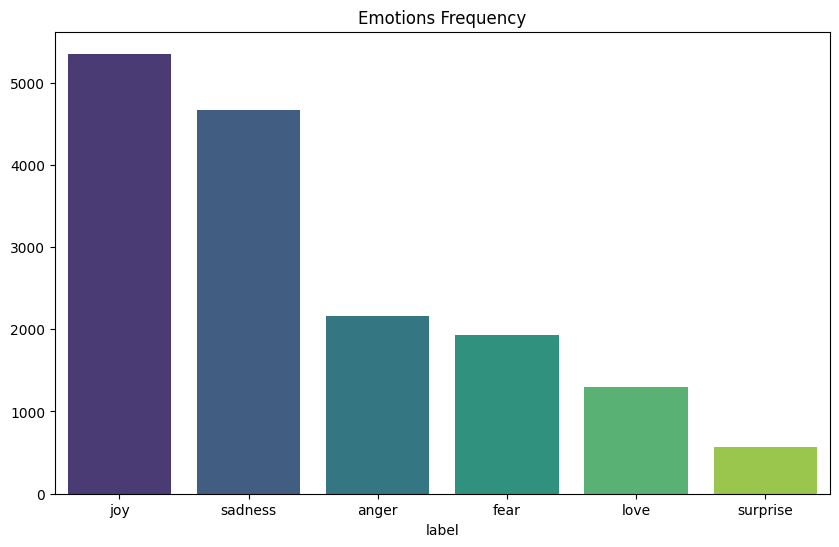

In [9]:
import seaborn as sns
label_count = df_train.label.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=label_count.index, y=label_count.values, palette="viridis", hue = label_count.index)
plt.title('Emotions Frequency')

plt.show()

In [10]:
print(f'The shape of train data: {df_train.shape}')
print(f'The shape of validation data: {df_validation.shape}')
print(f'The shape of test data: {df_test.shape}')

The shape of train data: (15969, 2)
The shape of validation data: (2000, 2)
The shape of test data: (2000, 2)


In [11]:
import re
import spacy
from sklearn.preprocessing import LabelEncoder

nlp = spacy.load('en_core_web_md')

def text_processer(text):
    url_pattern = r'http\S+'
    num_pattern = r'\d+'
    non_alpha_pattern = r'[^a-zA-Z\s]'

    #remove url
    text = re.sub(url_pattern, '', text)
    #remove nums
    text = re.sub(num_pattern, '', text)
    #remove non alphas
    text = re.sub(non_alpha_pattern, '', text)

    doc = nlp(text)
    #lemmalization the text if not stop words or punctuations
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

def laber_encoder():
    le = LabelEncoder()
    df_train.label = le.fit_transform(df_train.label)
    df_validation.label = le.transform(df_validation.label)
    df_test.label = le.transform(df_test.label)
    label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
    print(label_mapping)

In [12]:
df_train.text = df_train.text.apply(text_processer)
df_validation.text = df_validation.text.apply(text_processer)
df_test.text = df_test.text.apply(text_processer)
laber_encoder()

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}


In [13]:
df_train.head()

text  label
0                      not feel humiliate      4
1   feel hopeless damn hopeful care awake      4
2    m grab minute post feel greedy wrong      0
3  feel nostalgic fireplace know property      3
4                            feel grouchy      0

In [14]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

X_train = df_train.text
X_val = df_validation.text
X_test = df_test.text

y_train = to_categorical(df_train.label)
y_val = to_categorical(df_validation.label)
y_test = to_categorical(df_test.label)
class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(df_train.label), y=df_train.label)
class_weight_dict = dict(enumerate(class_weight))

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_val)
tokenizer.fit_on_texts(X_test)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

maxlen = max(len(tokens) for tokens in X_train_sequences)
print(f'maxlen:{maxlen}')

X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')


maxlen:33


In [15]:
input_Size = np.max(X_train_padded) + 1
input_Size

10000

# Model

**Insights before modelling:**
1. Inbalanced data suggests the poor presion and recall of the last label, 'surprise'
2. Large dimension of input means large neurons need to be used, causing overfitting easily

**My solutions:**
1. Weight asigned
2. Feature selection by convolution
3. Dropout and early stop


In [16]:
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential

from keras.metrics import Precision, Recall, AUC

from keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional, Conv1D, BatchNormalization, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, LearningRateScheduler, CallbackList, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Model--NN

In [17]:
model_CNN = Sequential([
    Embedding(input_dim=input_Size, output_dim=16, input_length=maxlen),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax'),
])


loss_function = 'categorical_crossentropy'
optimizer = Adam(clipnorm=1.0)
model_CNN.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
model_CNN.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 33, 16)            160000    


 dropout (Dropout)           (None, 33, 16)            0         


 conv1d (Conv1D)             (None, 29, 128)           10368     


 batch_normalization (BatchN  (None, 29, 128)          512       


 ormalization)                                                   


 global_max_pooling1d (Globa  (None, 128)              0         


 lMaxPooling1D)                                                  


 dropout_1 (Dropout)         (None, 128)               0         


 dense (Dense)               (None, 64)                8256      


 dense_1 (Dense)             (None, 6)                 390       


Total params: 179,526


Trainable params: 179,270


Non-trainable params: 256


_________________________________________________________________


In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_CNN = model_CNN.fit(X_train_padded, y_train, epochs=30,
                             validation_data=(X_val_padded, y_val),
                             callbacks=[early_stopping],class_weight = class_weight_dict)

Epoch 1/30



  1/500 [..............................] - ETA: 11:03 - loss: 1.8009 - accuracy: 0.0000e+00


  7/500 [..............................] - ETA: 4s - loss: 1.7406 - accuracy: 0.1741       


 14/500 [..............................] - ETA: 3s - loss: 1.7091 - accuracy: 0.1607


 21/500 [>.............................] - ETA: 3s - loss: 1.8198 - accuracy: 0.1771


 29/500 [>.............................] - ETA: 3s - loss: 1.8597 - accuracy: 0.1821


 37/500 [=>............................] - ETA: 3s - loss: 1.8298 - accuracy: 0.1951


 45/500 [=>............................] - ETA: 3s - loss: 1.8238 - accuracy: 0.2076


 53/500 [==>...........................] - ETA: 3s - loss: 1.8243 - accuracy: 0.2081


 61/500 [==>...........................] - ETA: 3s - loss: 1.8367 - accuracy: 0.2100


 69/500 [===>..........................] - ETA: 3s - loss: 1.8352 - accuracy: 0.2043


 77/500 [===>..........................] - ETA: 3s - loss: 1.8414 - accuracy: 0.2017


 85/500 [====>.........................] - ETA: 2s - loss: 1.8234 - accuracy: 0.1971


 93/500 [====>.........................] - ETA: 2s - loss: 1.8098 - accuracy: 0.1952


101/500 [=====>........................] - ETA: 2s - loss: 1.8007 - accuracy: 0.1971


109/500 [=====>........................] - ETA: 2s - loss: 1.7995 - accuracy: 0.2007


117/500 [======>.......................] - ETA: 2s - loss: 1.7875 - accuracy: 0.2099


125/500 [======>.......................] - ETA: 2s - loss: 1.7883 - accuracy: 0.2115


133/500 [======>.......................] - ETA: 2s - loss: 1.7866 - accuracy: 0.2096


141/500 [=======>......................] - ETA: 2s - loss: 1.7937 - accuracy: 0.2130


149/500 [=======>......................] - ETA: 2s - loss: 1.7990 - accuracy: 0.2152


157/500 [========>.....................] - ETA: 2s - loss: 1.7918 - accuracy: 0.2152


165/500 [========>.....................] - ETA: 2s - loss: 1.7834 - accuracy: 0.2155


173/500 [=========>....................] - ETA: 2s - loss: 1.7818 - accuracy: 0.2173


181/500 [=========>....................] - ETA: 2s - loss: 1.7800 - accuracy: 0.2188


189/500 [==========>...................] - ETA: 2s - loss: 1.7773 - accuracy: 0.2230


197/500 [==========>...................] - ETA: 2s - loss: 1.7768 - accuracy: 0.2265


205/500 [===========>..................] - ETA: 2s - loss: 1.7756 - accuracy: 0.2303


213/500 [===========>..................] - ETA: 1s - loss: 1.7645 - accuracy: 0.2350


222/500 [============>.................] - ETA: 1s - loss: 1.7627 - accuracy: 0.2379


230/500 [============>.................] - ETA: 1s - loss: 1.7483 - accuracy: 0.2424


238/500 [=============>................] - ETA: 1s - loss: 1.7389 - accuracy: 0.2483


246/500 [=============>................] - ETA: 1s - loss: 1.7389 - accuracy: 0.2542


255/500 [==============>...............] - ETA: 1s - loss: 1.7305 - accuracy: 0.2610


264/500 [==============>...............] - ETA: 1s - loss: 1.7232 - accuracy: 0.2663


272/500 [===============>..............] - ETA: 1s - loss: 1.7096 - accuracy: 0.2715


281/500 [===============>..............] - ETA: 1s - loss: 1.6989 - accuracy: 0.2786


289/500 [================>.............] - ETA: 1s - loss: 1.6865 - accuracy: 0.2857


297/500 [================>.............] - ETA: 1s - loss: 1.6793 - accuracy: 0.2936


305/500 [=================>............] - ETA: 1s - loss: 1.6636 - accuracy: 0.3015


314/500 [=================>............] - ETA: 1s - loss: 1.6497 - accuracy: 0.3091


323/500 [==================>...........] - ETA: 1s - loss: 1.6311 - accuracy: 0.3156


331/500 [==================>...........] - ETA: 1s - loss: 1.6124 - accuracy: 0.3252


339/500 [===================>..........] - ETA: 1s - loss: 1.5998 - accuracy: 0.3332


347/500 [===================>..........] - ETA: 1s - loss: 1.5846 - accuracy: 0.3403


355/500 [====================>.........] - ETA: 0s - loss: 1.5660 - accuracy: 0.3489


363/500 [====================>.........] - ETA: 0s - loss: 1.5515 - accuracy: 0.3571


371/500 [=====================>........] - ETA: 0s - loss: 1.5357 - accuracy: 0.3643


379/500 [=====================>........] - ETA: 0s - loss: 1.5171 - accuracy: 0.3723


388/500 [======================>.......] - ETA: 0s - loss: 1.4958 - accuracy: 0.3828


397/500 [======================>.......] - ETA: 0s - loss: 1.4811 - accuracy: 0.3907


406/500 [=======================>......] - ETA: 0s - loss: 1.4629 - accuracy: 0.3985


414/500 [=======================>......] - ETA: 0s - loss: 1.4482 - accuracy: 0.4056


423/500 [========================>.....] - ETA: 0s - loss: 1.4305 - accuracy: 0.4132


431/500 [========================>.....] - ETA: 0s - loss: 1.4170 - accuracy: 0.4206


439/500 [=========================>....] - ETA: 0s - loss: 1.4032 - accuracy: 0.4273


448/500 [=========================>....] - ETA: 0s - loss: 1.3845 - accuracy: 0.4359


456/500 [==========================>...] - ETA: 0s - loss: 1.3663 - accuracy: 0.4435


465/500 [==========================>...] - ETA: 0s - loss: 1.3518 - accuracy: 0.4505


473/500 [===========================>..] - ETA: 0s - loss: 1.3394 - accuracy: 0.4565


481/500 [===========================>..] - ETA: 0s - loss: 1.3268 - accuracy: 0.4628


490/500 [============================>.] - ETA: 0s - loss: 1.3116 - accuracy: 0.4698


498/500 [============================>.] - ETA: 0s - loss: 1.3007 - accuracy: 0.4751


500/500 [==============================] - 5s 7ms/step - loss: 1.2998 - accuracy: 0.4755 - val_loss: 0.6777 - val_accuracy: 0.8845


Epoch 2/30



  1/500 [..............................] - ETA: 3s - loss: 0.4462 - accuracy: 0.8125


  9/500 [..............................] - ETA: 3s - loss: 0.4589 - accuracy: 0.8681


 17/500 [>.............................] - ETA: 3s - loss: 0.3886 - accuracy: 0.8750


 25/500 [>.............................] - ETA: 3s - loss: 0.3813 - accuracy: 0.8650


 33/500 [>.............................] - ETA: 2s - loss: 0.3993 - accuracy: 0.8693


 41/500 [=>............................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8788


 49/500 [=>............................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8782


 58/500 [==>...........................] - ETA: 2s - loss: 0.3799 - accuracy: 0.8728


 67/500 [===>..........................] - ETA: 2s - loss: 0.3997 - accuracy: 0.8689


 76/500 [===>..........................] - ETA: 2s - loss: 0.3895 - accuracy: 0.8709


 85/500 [====>.........................] - ETA: 2s - loss: 0.3879 - accuracy: 0.8717


 94/500 [====>.........................] - ETA: 2s - loss: 0.3890 - accuracy: 0.8684


102/500 [=====>........................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8698


110/500 [=====>........................] - ETA: 2s - loss: 0.3773 - accuracy: 0.8702


119/500 [======>.......................] - ETA: 2s - loss: 0.3791 - accuracy: 0.8708


128/500 [======>.......................] - ETA: 2s - loss: 0.3784 - accuracy: 0.8723


137/500 [=======>......................] - ETA: 2s - loss: 0.3697 - accuracy: 0.8759


146/500 [=======>......................] - ETA: 2s - loss: 0.3634 - accuracy: 0.8771


155/500 [========>.....................] - ETA: 2s - loss: 0.3664 - accuracy: 0.8770


163/500 [========>.....................] - ETA: 2s - loss: 0.3694 - accuracy: 0.8767


172/500 [=========>....................] - ETA: 2s - loss: 0.3604 - accuracy: 0.8785


181/500 [=========>....................] - ETA: 1s - loss: 0.3615 - accuracy: 0.8785


189/500 [==========>...................] - ETA: 1s - loss: 0.3652 - accuracy: 0.8785


197/500 [==========>...................] - ETA: 1s - loss: 0.3642 - accuracy: 0.8791


206/500 [===========>..................] - ETA: 1s - loss: 0.3645 - accuracy: 0.8800


215/500 [===========>..................] - ETA: 1s - loss: 0.3654 - accuracy: 0.8799


224/500 [============>.................] - ETA: 1s - loss: 0.3621 - accuracy: 0.8804


233/500 [============>.................] - ETA: 1s - loss: 0.3642 - accuracy: 0.8800


242/500 [=============>................] - ETA: 1s - loss: 0.3678 - accuracy: 0.8799


251/500 [==============>...............] - ETA: 1s - loss: 0.3705 - accuracy: 0.8785


260/500 [==============>...............] - ETA: 1s - loss: 0.3684 - accuracy: 0.8785


268/500 [===============>..............] - ETA: 1s - loss: 0.3661 - accuracy: 0.8794


277/500 [===============>..............] - ETA: 1s - loss: 0.3635 - accuracy: 0.8806


286/500 [================>.............] - ETA: 1s - loss: 0.3618 - accuracy: 0.8814


295/500 [================>.............] - ETA: 1s - loss: 0.3656 - accuracy: 0.8809


304/500 [=================>............] - ETA: 1s - loss: 0.3646 - accuracy: 0.8812


313/500 [=================>............] - ETA: 1s - loss: 0.3689 - accuracy: 0.8803


322/500 [==================>...........] - ETA: 1s - loss: 0.3674 - accuracy: 0.8802


331/500 [==================>...........] - ETA: 1s - loss: 0.3652 - accuracy: 0.8801


340/500 [===================>..........] - ETA: 0s - loss: 0.3631 - accuracy: 0.8806


349/500 [===================>..........] - ETA: 0s - loss: 0.3652 - accuracy: 0.8809


358/500 [====================>.........] - ETA: 0s - loss: 0.3632 - accuracy: 0.8819


367/500 [=====================>........] - ETA: 0s - loss: 0.3635 - accuracy: 0.8811


376/500 [=====================>........] - ETA: 0s - loss: 0.3621 - accuracy: 0.8816


385/500 [======================>.......] - ETA: 0s - loss: 0.3617 - accuracy: 0.8820


394/500 [======================>.......] - ETA: 0s - loss: 0.3599 - accuracy: 0.8825


402/500 [=======================>......] - ETA: 0s - loss: 0.3595 - accuracy: 0.8822


411/500 [=======================>......] - ETA: 0s - loss: 0.3581 - accuracy: 0.8820


420/500 [========================>.....] - ETA: 0s - loss: 0.3573 - accuracy: 0.8819


429/500 [========================>.....] - ETA: 0s - loss: 0.3574 - accuracy: 0.8819


438/500 [=========================>....] - ETA: 0s - loss: 0.3583 - accuracy: 0.8824


447/500 [=========================>....] - ETA: 0s - loss: 0.3564 - accuracy: 0.8825


456/500 [==========================>...] - ETA: 0s - loss: 0.3562 - accuracy: 0.8821


464/500 [==========================>...] - ETA: 0s - loss: 0.3548 - accuracy: 0.8825


472/500 [===========================>..] - ETA: 0s - loss: 0.3543 - accuracy: 0.8826


480/500 [===========================>..] - ETA: 0s - loss: 0.3528 - accuracy: 0.8834


488/500 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8836


496/500 [============================>.] - ETA: 0s - loss: 0.3511 - accuracy: 0.8839


500/500 [==============================] - 3s 6ms/step - loss: 0.3502 - accuracy: 0.8842 - val_loss: 0.2492 - val_accuracy: 0.9035


Epoch 3/30



  1/500 [..............................] - ETA: 3s - loss: 0.2071 - accuracy: 0.9062


 10/500 [..............................] - ETA: 2s - loss: 0.1804 - accuracy: 0.9375


 18/500 [>.............................] - ETA: 2s - loss: 0.1947 - accuracy: 0.9375


 26/500 [>.............................] - ETA: 2s - loss: 0.1852 - accuracy: 0.9351


 34/500 [=>............................] - ETA: 2s - loss: 0.1787 - accuracy: 0.9366


 42/500 [=>............................] - ETA: 2s - loss: 0.2096 - accuracy: 0.9368


 51/500 [==>...........................] - ETA: 2s - loss: 0.2127 - accuracy: 0.9308


 59/500 [==>...........................] - ETA: 2s - loss: 0.2152 - accuracy: 0.9322


 67/500 [===>..........................] - ETA: 2s - loss: 0.2191 - accuracy: 0.9328


 75/500 [===>..........................] - ETA: 2s - loss: 0.2199 - accuracy: 0.9312


 83/500 [===>..........................] - ETA: 2s - loss: 0.2182 - accuracy: 0.9303


 91/500 [====>.........................] - ETA: 2s - loss: 0.2212 - accuracy: 0.9272


100/500 [=====>........................] - ETA: 2s - loss: 0.2169 - accuracy: 0.9284


108/500 [=====>........................] - ETA: 2s - loss: 0.2141 - accuracy: 0.9282


117/500 [======>.......................] - ETA: 2s - loss: 0.2171 - accuracy: 0.9276


125/500 [======>.......................] - ETA: 2s - loss: 0.2180 - accuracy: 0.9260


133/500 [======>.......................] - ETA: 2s - loss: 0.2146 - accuracy: 0.9262


142/500 [=======>......................] - ETA: 2s - loss: 0.2163 - accuracy: 0.9263


150/500 [========>.....................] - ETA: 2s - loss: 0.2181 - accuracy: 0.9240


158/500 [========>.....................] - ETA: 2s - loss: 0.2192 - accuracy: 0.9244


167/500 [=========>....................] - ETA: 2s - loss: 0.2198 - accuracy: 0.9237


176/500 [=========>....................] - ETA: 2s - loss: 0.2205 - accuracy: 0.9226


184/500 [==========>...................] - ETA: 1s - loss: 0.2171 - accuracy: 0.9231


192/500 [==========>...................] - ETA: 1s - loss: 0.2153 - accuracy: 0.9237


201/500 [===========>..................] - ETA: 1s - loss: 0.2173 - accuracy: 0.9223


209/500 [===========>..................] - ETA: 1s - loss: 0.2207 - accuracy: 0.9212


217/500 [============>.................] - ETA: 1s - loss: 0.2239 - accuracy: 0.9217


225/500 [============>.................] - ETA: 1s - loss: 0.2232 - accuracy: 0.9219


234/500 [=============>................] - ETA: 1s - loss: 0.2215 - accuracy: 0.9223


242/500 [=============>................] - ETA: 1s - loss: 0.2226 - accuracy: 0.9221


251/500 [==============>...............] - ETA: 1s - loss: 0.2237 - accuracy: 0.9208


260/500 [==============>...............] - ETA: 1s - loss: 0.2231 - accuracy: 0.9208


269/500 [===============>..............] - ETA: 1s - loss: 0.2230 - accuracy: 0.9204


277/500 [===============>..............] - ETA: 1s - loss: 0.2253 - accuracy: 0.9201


285/500 [================>.............] - ETA: 1s - loss: 0.2256 - accuracy: 0.9206


294/500 [================>.............] - ETA: 1s - loss: 0.2273 - accuracy: 0.9203


302/500 [=================>............] - ETA: 1s - loss: 0.2278 - accuracy: 0.9199


311/500 [=================>............] - ETA: 1s - loss: 0.2270 - accuracy: 0.9200


319/500 [==================>...........] - ETA: 1s - loss: 0.2260 - accuracy: 0.9205


327/500 [==================>...........] - ETA: 1s - loss: 0.2268 - accuracy: 0.9200


336/500 [===================>..........] - ETA: 1s - loss: 0.2273 - accuracy: 0.9198


345/500 [===================>..........] - ETA: 0s - loss: 0.2265 - accuracy: 0.9201


354/500 [====================>.........] - ETA: 0s - loss: 0.2298 - accuracy: 0.9196


363/500 [====================>.........] - ETA: 0s - loss: 0.2299 - accuracy: 0.9200


372/500 [=====================>........] - ETA: 0s - loss: 0.2312 - accuracy: 0.9190


381/500 [=====================>........] - ETA: 0s - loss: 0.2325 - accuracy: 0.9182


390/500 [======================>.......] - ETA: 0s - loss: 0.2315 - accuracy: 0.9185


399/500 [======================>.......] - ETA: 0s - loss: 0.2305 - accuracy: 0.9186


408/500 [=======================>......] - ETA: 0s - loss: 0.2299 - accuracy: 0.9188


417/500 [========================>.....] - ETA: 0s - loss: 0.2317 - accuracy: 0.9177


426/500 [========================>.....] - ETA: 0s - loss: 0.2300 - accuracy: 0.9182


434/500 [=========================>....] - ETA: 0s - loss: 0.2292 - accuracy: 0.9186


443/500 [=========================>....] - ETA: 0s - loss: 0.2296 - accuracy: 0.9182


452/500 [==========================>...] - ETA: 0s - loss: 0.2286 - accuracy: 0.9181


461/500 [==========================>...] - ETA: 0s - loss: 0.2279 - accuracy: 0.9183


470/500 [===========================>..] - ETA: 0s - loss: 0.2318 - accuracy: 0.9178


479/500 [===========================>..] - ETA: 0s - loss: 0.2315 - accuracy: 0.9180


488/500 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9178


497/500 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.9179


500/500 [==============================] - 3s 6ms/step - loss: 0.2317 - accuracy: 0.9180 - val_loss: 0.2502 - val_accuracy: 0.9065


Epoch 4/30



  1/500 [..............................] - ETA: 3s - loss: 0.1415 - accuracy: 0.9375


 10/500 [..............................] - ETA: 3s - loss: 0.1444 - accuracy: 0.9563


 19/500 [>.............................] - ETA: 2s - loss: 0.1591 - accuracy: 0.9556


 28/500 [>.............................] - ETA: 2s - loss: 0.1473 - accuracy: 0.9565


 37/500 [=>............................] - ETA: 2s - loss: 0.1371 - accuracy: 0.9561


 46/500 [=>............................] - ETA: 2s - loss: 0.1408 - accuracy: 0.9538


 55/500 [==>...........................] - ETA: 2s - loss: 0.1422 - accuracy: 0.9517


 63/500 [==>...........................] - ETA: 2s - loss: 0.1402 - accuracy: 0.9524


 71/500 [===>..........................] - ETA: 2s - loss: 0.1457 - accuracy: 0.9511


 80/500 [===>..........................] - ETA: 2s - loss: 0.1583 - accuracy: 0.9480


 89/500 [====>.........................] - ETA: 2s - loss: 0.1634 - accuracy: 0.9466


 98/500 [====>.........................] - ETA: 2s - loss: 0.1697 - accuracy: 0.9448


107/500 [=====>........................] - ETA: 2s - loss: 0.1727 - accuracy: 0.9430


115/500 [=====>........................] - ETA: 2s - loss: 0.1708 - accuracy: 0.9424


123/500 [======>.......................] - ETA: 2s - loss: 0.1702 - accuracy: 0.9413


131/500 [======>.......................] - ETA: 2s - loss: 0.1744 - accuracy: 0.9404


139/500 [=======>......................] - ETA: 2s - loss: 0.1732 - accuracy: 0.9415


148/500 [=======>......................] - ETA: 2s - loss: 0.1757 - accuracy: 0.9394


157/500 [========>.....................] - ETA: 2s - loss: 0.1755 - accuracy: 0.9383


166/500 [========>.....................] - ETA: 2s - loss: 0.1795 - accuracy: 0.9384


175/500 [=========>....................] - ETA: 2s - loss: 0.1793 - accuracy: 0.9388


184/500 [==========>...................] - ETA: 1s - loss: 0.1771 - accuracy: 0.9390


192/500 [==========>...................] - ETA: 1s - loss: 0.1748 - accuracy: 0.9401


200/500 [===========>..................] - ETA: 1s - loss: 0.1744 - accuracy: 0.9408


208/500 [===========>..................] - ETA: 1s - loss: 0.1735 - accuracy: 0.9405


216/500 [===========>..................] - ETA: 1s - loss: 0.1724 - accuracy: 0.9404


225/500 [============>.................] - ETA: 1s - loss: 0.1735 - accuracy: 0.9396


234/500 [=============>................] - ETA: 1s - loss: 0.1720 - accuracy: 0.9392


243/500 [=============>................] - ETA: 1s - loss: 0.1712 - accuracy: 0.9396


252/500 [==============>...............] - ETA: 1s - loss: 0.1701 - accuracy: 0.9395


261/500 [==============>...............] - ETA: 1s - loss: 0.1708 - accuracy: 0.9386


269/500 [===============>..............] - ETA: 1s - loss: 0.1693 - accuracy: 0.9387


276/500 [===============>..............] - ETA: 1s - loss: 0.1671 - accuracy: 0.9391


285/500 [================>.............] - ETA: 1s - loss: 0.1666 - accuracy: 0.9393


293/500 [================>.............] - ETA: 1s - loss: 0.1669 - accuracy: 0.9392


301/500 [=================>............] - ETA: 1s - loss: 0.1669 - accuracy: 0.9398


310/500 [=================>............] - ETA: 1s - loss: 0.1662 - accuracy: 0.9398


319/500 [==================>...........] - ETA: 1s - loss: 0.1651 - accuracy: 0.9401


327/500 [==================>...........] - ETA: 1s - loss: 0.1682 - accuracy: 0.9398


335/500 [===================>..........] - ETA: 1s - loss: 0.1679 - accuracy: 0.9396


344/500 [===================>..........] - ETA: 0s - loss: 0.1714 - accuracy: 0.9385


352/500 [====================>.........] - ETA: 0s - loss: 0.1704 - accuracy: 0.9387


361/500 [====================>.........] - ETA: 0s - loss: 0.1707 - accuracy: 0.9388


370/500 [=====================>........] - ETA: 0s - loss: 0.1714 - accuracy: 0.9388


379/500 [=====================>........] - ETA: 0s - loss: 0.1757 - accuracy: 0.9382


387/500 [======================>.......] - ETA: 0s - loss: 0.1755 - accuracy: 0.9384


395/500 [======================>.......] - ETA: 0s - loss: 0.1749 - accuracy: 0.9384


403/500 [=======================>......] - ETA: 0s - loss: 0.1758 - accuracy: 0.9382


411/500 [=======================>......] - ETA: 0s - loss: 0.1794 - accuracy: 0.9374


420/500 [========================>.....] - ETA: 0s - loss: 0.1802 - accuracy: 0.9374


429/500 [========================>.....] - ETA: 0s - loss: 0.1816 - accuracy: 0.9371


438/500 [=========================>....] - ETA: 0s - loss: 0.1822 - accuracy: 0.9369


447/500 [=========================>....] - ETA: 0s - loss: 0.1835 - accuracy: 0.9365


456/500 [==========================>...] - ETA: 0s - loss: 0.1841 - accuracy: 0.9368


464/500 [==========================>...] - ETA: 0s - loss: 0.1834 - accuracy: 0.9366


472/500 [===========================>..] - ETA: 0s - loss: 0.1844 - accuracy: 0.9365


480/500 [===========================>..] - ETA: 0s - loss: 0.1844 - accuracy: 0.9363


488/500 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9363


496/500 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9362


500/500 [==============================] - 3s 7ms/step - loss: 0.1851 - accuracy: 0.9362 - val_loss: 0.2621 - val_accuracy: 0.9050


Epoch 5/30



  1/500 [..............................] - ETA: 3s - loss: 0.1372 - accuracy: 0.9375


  9/500 [..............................] - ETA: 3s - loss: 0.1350 - accuracy: 0.9340


 17/500 [>.............................] - ETA: 3s - loss: 0.1351 - accuracy: 0.9393


 26/500 [>.............................] - ETA: 3s - loss: 0.1453 - accuracy: 0.9411


 35/500 [=>............................] - ETA: 2s - loss: 0.1578 - accuracy: 0.9402


 44/500 [=>............................] - ETA: 2s - loss: 0.1580 - accuracy: 0.9396


 53/500 [==>...........................] - ETA: 2s - loss: 0.1609 - accuracy: 0.9399


 62/500 [==>...........................] - ETA: 2s - loss: 0.1608 - accuracy: 0.9395


 70/500 [===>..........................] - ETA: 2s - loss: 0.1631 - accuracy: 0.9388


 78/500 [===>..........................] - ETA: 2s - loss: 0.1585 - accuracy: 0.9399


 87/500 [====>.........................] - ETA: 2s - loss: 0.1572 - accuracy: 0.9400


 95/500 [====>.........................] - ETA: 2s - loss: 0.1579 - accuracy: 0.9391


104/500 [=====>........................] - ETA: 2s - loss: 0.1509 - accuracy: 0.9408


113/500 [=====>........................] - ETA: 2s - loss: 0.1517 - accuracy: 0.9400


122/500 [======>.......................] - ETA: 2s - loss: 0.1497 - accuracy: 0.9411


131/500 [======>.......................] - ETA: 2s - loss: 0.1476 - accuracy: 0.9411


140/500 [=======>......................] - ETA: 2s - loss: 0.1441 - accuracy: 0.9429


149/500 [=======>......................] - ETA: 2s - loss: 0.1414 - accuracy: 0.9444


158/500 [========>.....................] - ETA: 2s - loss: 0.1392 - accuracy: 0.9444


167/500 [=========>....................] - ETA: 2s - loss: 0.1427 - accuracy: 0.9454


176/500 [=========>....................] - ETA: 1s - loss: 0.1405 - accuracy: 0.9460


185/500 [==========>...................] - ETA: 1s - loss: 0.1399 - accuracy: 0.9465


194/500 [==========>...................] - ETA: 1s - loss: 0.1398 - accuracy: 0.9464


203/500 [===========>..................] - ETA: 1s - loss: 0.1410 - accuracy: 0.9458


212/500 [===========>..................] - ETA: 1s - loss: 0.1389 - accuracy: 0.9465


221/500 [============>.................] - ETA: 1s - loss: 0.1390 - accuracy: 0.9470


230/500 [============>.................] - ETA: 1s - loss: 0.1400 - accuracy: 0.9462


239/500 [=============>................] - ETA: 1s - loss: 0.1381 - accuracy: 0.9473


248/500 [=============>................] - ETA: 1s - loss: 0.1382 - accuracy: 0.9477


257/500 [==============>...............] - ETA: 1s - loss: 0.1375 - accuracy: 0.9477


266/500 [==============>...............] - ETA: 1s - loss: 0.1367 - accuracy: 0.9477


275/500 [===============>..............] - ETA: 1s - loss: 0.1360 - accuracy: 0.9478


284/500 [================>.............] - ETA: 1s - loss: 0.1365 - accuracy: 0.9478


293/500 [================>.............] - ETA: 1s - loss: 0.1389 - accuracy: 0.9476


302/500 [=================>............] - ETA: 1s - loss: 0.1383 - accuracy: 0.9478


311/500 [=================>............] - ETA: 1s - loss: 0.1378 - accuracy: 0.9485


320/500 [==================>...........] - ETA: 1s - loss: 0.1362 - accuracy: 0.9490


329/500 [==================>...........] - ETA: 1s - loss: 0.1388 - accuracy: 0.9485


338/500 [===================>..........] - ETA: 0s - loss: 0.1381 - accuracy: 0.9485


347/500 [===================>..........] - ETA: 0s - loss: 0.1375 - accuracy: 0.9488


356/500 [====================>.........] - ETA: 0s - loss: 0.1390 - accuracy: 0.9485


365/500 [====================>.........] - ETA: 0s - loss: 0.1390 - accuracy: 0.9484


374/500 [=====================>........] - ETA: 0s - loss: 0.1402 - accuracy: 0.9479


383/500 [=====================>........] - ETA: 0s - loss: 0.1405 - accuracy: 0.9475


392/500 [======================>.......] - ETA: 0s - loss: 0.1396 - accuracy: 0.9479


401/500 [=======================>......] - ETA: 0s - loss: 0.1388 - accuracy: 0.9481


410/500 [=======================>......] - ETA: 0s - loss: 0.1393 - accuracy: 0.9486


419/500 [========================>.....] - ETA: 0s - loss: 0.1398 - accuracy: 0.9485


428/500 [========================>.....] - ETA: 0s - loss: 0.1416 - accuracy: 0.9479


437/500 [=========================>....] - ETA: 0s - loss: 0.1407 - accuracy: 0.9482


446/500 [=========================>....] - ETA: 0s - loss: 0.1407 - accuracy: 0.9481


455/500 [==========================>...] - ETA: 0s - loss: 0.1410 - accuracy: 0.9482


464/500 [==========================>...] - ETA: 0s - loss: 0.1410 - accuracy: 0.9481


473/500 [===========================>..] - ETA: 0s - loss: 0.1407 - accuracy: 0.9487


482/500 [===========================>..] - ETA: 0s - loss: 0.1406 - accuracy: 0.9490


491/500 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9486


500/500 [==============================] - ETA: 0s - loss: 0.1422 - accuracy: 0.9483


500/500 [==============================] - 3s 6ms/step - loss: 0.1422 - accuracy: 0.9483 - val_loss: 0.2659 - val_accuracy: 0.9040


In [19]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(10, 6))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def evaluation(model,X_test,y_test):
    target_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    y_pred = np.argmax(model.predict(X_test),axis=1)
    report = classification_report(y_test, y_pred, target_names=target_names)
    print(report)



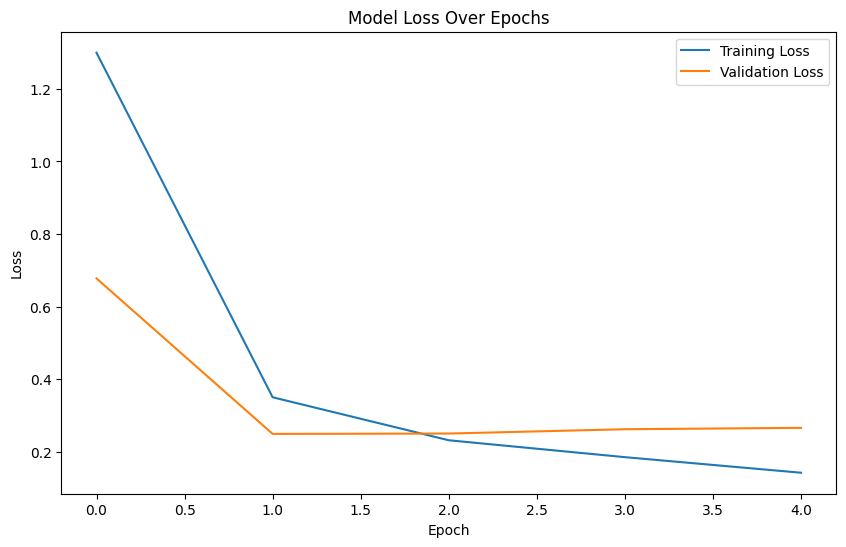

In [20]:
plot_loss(history_CNN)

#### Evaluation

In [21]:
evaluation(model_CNN, X_test_padded, df_test.label)


 1/63 [..............................] - ETA: 7s


26/63 [===========>..................] - ETA: 0s


51/63 [=======================>......] - ETA: 0s


63/63 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

       anger       0.90      0.93      0.92       275
        fear       0.91      0.84      0.88       224
         joy       0.95      0.91      0.93       695
        love       0.72      0.89      0.80       159
     sadness       0.97      0.93      0.95       581
    surprise       0.67      0.92      0.78        66

    accuracy                           0.91      2000
   macro avg       0.86      0.91      0.88      2000
weighted avg       0.92      0.91      0.91      2000



## Model--GRU

In [22]:
model_GRU = Sequential([
    Embedding(input_dim=input_Size, output_dim=100, input_length=maxlen),
    Dropout(0.5),
    Bidirectional(GRU(128, return_sequences=True)),
    Bidirectional(GRU(64, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax'),
])

optimizer = Adam()

model_GRU.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 33, 100)           1000000   


 dropout_2 (Dropout)         (None, 33, 100)           0         


 bidirectional (Bidirectiona  (None, 33, 256)          176640    


 l)                                                              


 bidirectional_1 (Bidirectio  (None, 33, 128)          123648    


 nal)                                                            


 batch_normalization_1 (Batc  (None, 33, 128)          512       


 hNormalization)                                                 


 bidirectional_2 (Bidirectio  (None, 128)              74496     


 nal)                                                            


 dense_2 (Dense)             (None, 64)                8256      


 dropout_3 (Dropout)         (None, 64)                0         


 dense_3 (Dense)             (None, 6)                 390       


Total params: 1,383,942


Trainable params: 1,383,686


Non-trainable params: 256


_________________________________________________________________


In [23]:
history_GRU = model_GRU.fit(X_train_padded, y_train, epochs=30,
                             validation_data=(X_val_padded, y_val),
                             callbacks=[early_stopping],class_weight = class_weight_dict)

Epoch 1/30



  1/500 [..............................] - ETA: 1:20:41 - loss: 1.4384 - accuracy: 0.3750


  2/500 [..............................] - ETA: 42s - loss: 1.6010 - accuracy: 0.3281    


  3/500 [..............................] - ETA: 41s - loss: 1.6445 - accuracy: 0.3229


  4/500 [..............................] - ETA: 40s - loss: 1.6342 - accuracy: 0.2891


  5/500 [..............................] - ETA: 39s - loss: 1.6129 - accuracy: 0.2750


  6/500 [..............................] - ETA: 39s - loss: 1.5977 - accuracy: 0.2500


  7/500 [..............................] - ETA: 38s - loss: 1.6648 - accuracy: 0.2411


  8/500 [..............................] - ETA: 37s - loss: 1.7066 - accuracy: 0.2227


  9/500 [..............................] - ETA: 37s - loss: 1.6876 - accuracy: 0.2118


 10/500 [..............................] - ETA: 36s - loss: 1.6918 - accuracy: 0.2094


 11/500 [..............................] - ETA: 36s - loss: 1.6951 - accuracy: 0.2045


 12/500 [..............................] - ETA: 36s - loss: 1.7365 - accuracy: 0.2083


 13/500 [..............................] - ETA: 36s - loss: 1.7363 - accuracy: 0.2067


 14/500 [..............................] - ETA: 36s - loss: 1.7352 - accuracy: 0.2009


 15/500 [..............................] - ETA: 35s - loss: 1.7755 - accuracy: 0.2000


 16/500 [..............................] - ETA: 35s - loss: 1.7542 - accuracy: 0.1953


 17/500 [>.............................] - ETA: 35s - loss: 1.7347 - accuracy: 0.1893


 18/500 [>.............................] - ETA: 35s - loss: 1.7296 - accuracy: 0.1944


 19/500 [>.............................] - ETA: 35s - loss: 1.7701 - accuracy: 0.1924


 20/500 [>.............................] - ETA: 35s - loss: 1.7649 - accuracy: 0.1906


 21/500 [>.............................] - ETA: 35s - loss: 1.7439 - accuracy: 0.1860


 22/500 [>.............................] - ETA: 35s - loss: 1.7676 - accuracy: 0.1875


 23/500 [>.............................] - ETA: 34s - loss: 1.7864 - accuracy: 0.1834


 24/500 [>.............................] - ETA: 34s - loss: 1.7848 - accuracy: 0.1797


 25/500 [>.............................] - ETA: 34s - loss: 1.8060 - accuracy: 0.1787


 26/500 [>.............................] - ETA: 34s - loss: 1.8060 - accuracy: 0.1815


 27/500 [>.............................] - ETA: 34s - loss: 1.8227 - accuracy: 0.1829


 28/500 [>.............................] - ETA: 34s - loss: 1.8035 - accuracy: 0.1875


 29/500 [>.............................] - ETA: 33s - loss: 1.8232 - accuracy: 0.1875


 30/500 [>.............................] - ETA: 33s - loss: 1.8136 - accuracy: 0.1823


 31/500 [>.............................] - ETA: 33s - loss: 1.8170 - accuracy: 0.1784


 32/500 [>.............................] - ETA: 33s - loss: 1.8158 - accuracy: 0.1738


 33/500 [>.............................] - ETA: 33s - loss: 1.8211 - accuracy: 0.1714


 34/500 [=>............................] - ETA: 33s - loss: 1.8127 - accuracy: 0.1673


 35/500 [=>............................] - ETA: 33s - loss: 1.8068 - accuracy: 0.1634


 36/500 [=>............................] - ETA: 33s - loss: 1.8098 - accuracy: 0.1615


 37/500 [=>............................] - ETA: 33s - loss: 1.8030 - accuracy: 0.1596


 38/500 [=>............................] - ETA: 32s - loss: 1.8046 - accuracy: 0.1571


 39/500 [=>............................] - ETA: 32s - loss: 1.8040 - accuracy: 0.1546


 40/500 [=>............................] - ETA: 32s - loss: 1.8080 - accuracy: 0.1562


 41/500 [=>............................] - ETA: 32s - loss: 1.8115 - accuracy: 0.1547


 42/500 [=>............................] - ETA: 32s - loss: 1.8086 - accuracy: 0.1525


 43/500 [=>............................] - ETA: 32s - loss: 1.8125 - accuracy: 0.1519


 44/500 [=>............................] - ETA: 32s - loss: 1.8100 - accuracy: 0.1520


 45/500 [=>............................] - ETA: 32s - loss: 1.8072 - accuracy: 0.1514


 46/500 [=>............................] - ETA: 32s - loss: 1.8128 - accuracy: 0.1501


 47/500 [=>............................] - ETA: 32s - loss: 1.8114 - accuracy: 0.1496


 48/500 [=>............................] - ETA: 31s - loss: 1.8123 - accuracy: 0.1491


 49/500 [=>............................] - ETA: 31s - loss: 1.8102 - accuracy: 0.1499


 50/500 [==>...........................] - ETA: 31s - loss: 1.8116 - accuracy: 0.1513


 51/500 [==>...........................] - ETA: 31s - loss: 1.8029 - accuracy: 0.1507


 52/500 [==>...........................] - ETA: 31s - loss: 1.8028 - accuracy: 0.1514


 53/500 [==>...........................] - ETA: 31s - loss: 1.7966 - accuracy: 0.1527


 54/500 [==>...........................] - ETA: 31s - loss: 1.8030 - accuracy: 0.1557


 55/500 [==>...........................] - ETA: 31s - loss: 1.8027 - accuracy: 0.1568


 56/500 [==>...........................] - ETA: 31s - loss: 1.8087 - accuracy: 0.1574


 57/500 [==>...........................] - ETA: 31s - loss: 1.8048 - accuracy: 0.1568


 58/500 [==>...........................] - ETA: 31s - loss: 1.8018 - accuracy: 0.1568


 59/500 [==>...........................] - ETA: 31s - loss: 1.8000 - accuracy: 0.1573


 60/500 [==>...........................] - ETA: 31s - loss: 1.8021 - accuracy: 0.1589


 61/500 [==>...........................] - ETA: 30s - loss: 1.7973 - accuracy: 0.1598


 62/500 [==>...........................] - ETA: 30s - loss: 1.7958 - accuracy: 0.1608


 63/500 [==>...........................] - ETA: 30s - loss: 1.7950 - accuracy: 0.1627


 64/500 [==>...........................] - ETA: 30s - loss: 1.7940 - accuracy: 0.1646


 65/500 [==>...........................] - ETA: 30s - loss: 1.7976 - accuracy: 0.1659


 66/500 [==>...........................] - ETA: 30s - loss: 1.7982 - accuracy: 0.1676


 67/500 [===>..........................] - ETA: 30s - loss: 1.7916 - accuracy: 0.1670


 68/500 [===>..........................] - ETA: 30s - loss: 1.7883 - accuracy: 0.1668


 69/500 [===>..........................] - ETA: 30s - loss: 1.7906 - accuracy: 0.1667


 70/500 [===>..........................] - ETA: 30s - loss: 1.7896 - accuracy: 0.1656


 71/500 [===>..........................] - ETA: 30s - loss: 1.7954 - accuracy: 0.1642


 72/500 [===>..........................] - ETA: 30s - loss: 1.7961 - accuracy: 0.1645


 73/500 [===>..........................] - ETA: 30s - loss: 1.7967 - accuracy: 0.1640


 74/500 [===>..........................] - ETA: 29s - loss: 1.7931 - accuracy: 0.1639


 75/500 [===>..........................] - ETA: 29s - loss: 1.8006 - accuracy: 0.1625


 76/500 [===>..........................] - ETA: 29s - loss: 1.7964 - accuracy: 0.1620


 77/500 [===>..........................] - ETA: 29s - loss: 1.7929 - accuracy: 0.1611


 78/500 [===>..........................] - ETA: 29s - loss: 1.7960 - accuracy: 0.1623


 79/500 [===>..........................] - ETA: 29s - loss: 1.7900 - accuracy: 0.1618


 80/500 [===>..........................] - ETA: 29s - loss: 1.7846 - accuracy: 0.1609


 81/500 [===>..........................] - ETA: 29s - loss: 1.7839 - accuracy: 0.1605


 82/500 [===>..........................] - ETA: 29s - loss: 1.7887 - accuracy: 0.1601


 83/500 [===>..........................] - ETA: 29s - loss: 1.7824 - accuracy: 0.1600


 84/500 [====>.........................] - ETA: 29s - loss: 1.7874 - accuracy: 0.1600


 85/500 [====>.........................] - ETA: 29s - loss: 1.7821 - accuracy: 0.1588


 86/500 [====>.........................] - ETA: 29s - loss: 1.7836 - accuracy: 0.1577


 87/500 [====>.........................] - ETA: 29s - loss: 1.7881 - accuracy: 0.1577


 88/500 [====>.........................] - ETA: 29s - loss: 1.7851 - accuracy: 0.1570


 89/500 [====>.........................] - ETA: 28s - loss: 1.7862 - accuracy: 0.1562


 90/500 [====>.........................] - ETA: 28s - loss: 1.7894 - accuracy: 0.1576


 91/500 [====>.........................] - ETA: 28s - loss: 1.7960 - accuracy: 0.1569


 92/500 [====>.........................] - ETA: 28s - loss: 1.7974 - accuracy: 0.1566


 93/500 [====>.........................] - ETA: 28s - loss: 1.7990 - accuracy: 0.1583


 94/500 [====>.........................] - ETA: 28s - loss: 1.7997 - accuracy: 0.1582


 95/500 [====>.........................] - ETA: 28s - loss: 1.8011 - accuracy: 0.1572


 96/500 [====>.........................] - ETA: 28s - loss: 1.8031 - accuracy: 0.1579


 97/500 [====>.........................] - ETA: 28s - loss: 1.8059 - accuracy: 0.1582


 98/500 [====>.........................] - ETA: 28s - loss: 1.8056 - accuracy: 0.1582


 99/500 [====>.........................] - ETA: 28s - loss: 1.8048 - accuracy: 0.1585


100/500 [=====>........................] - ETA: 28s - loss: 1.8078 - accuracy: 0.1587


101/500 [=====>........................] - ETA: 28s - loss: 1.8065 - accuracy: 0.1593


102/500 [=====>........................] - ETA: 28s - loss: 1.8059 - accuracy: 0.1584


103/500 [=====>........................] - ETA: 27s - loss: 1.8047 - accuracy: 0.1584


104/500 [=====>........................] - ETA: 27s - loss: 1.8028 - accuracy: 0.1584


105/500 [=====>........................] - ETA: 27s - loss: 1.8007 - accuracy: 0.1580


106/500 [=====>........................] - ETA: 27s - loss: 1.7953 - accuracy: 0.1577


107/500 [=====>........................] - ETA: 27s - loss: 1.7960 - accuracy: 0.1571


108/500 [=====>........................] - ETA: 27s - loss: 1.7956 - accuracy: 0.1574


109/500 [=====>........................] - ETA: 27s - loss: 1.7964 - accuracy: 0.1568


110/500 [=====>........................] - ETA: 27s - loss: 1.7978 - accuracy: 0.1565


111/500 [=====>........................] - ETA: 27s - loss: 1.7946 - accuracy: 0.1562


112/500 [=====>........................] - ETA: 27s - loss: 1.7916 - accuracy: 0.1585


113/500 [=====>........................] - ETA: 27s - loss: 1.7907 - accuracy: 0.1593


114/500 [=====>........................] - ETA: 27s - loss: 1.7940 - accuracy: 0.1584


115/500 [=====>........................] - ETA: 27s - loss: 1.7935 - accuracy: 0.1584


116/500 [=====>........................] - ETA: 26s - loss: 1.7946 - accuracy: 0.1595


117/500 [======>.......................] - ETA: 26s - loss: 1.7907 - accuracy: 0.1619


118/500 [======>.......................] - ETA: 26s - loss: 1.7918 - accuracy: 0.1626


119/500 [======>.......................] - ETA: 26s - loss: 1.7923 - accuracy: 0.1644


120/500 [======>.......................] - ETA: 26s - loss: 1.7958 - accuracy: 0.1654


121/500 [======>.......................] - ETA: 26s - loss: 1.7966 - accuracy: 0.1655


122/500 [======>.......................] - ETA: 26s - loss: 1.7952 - accuracy: 0.1657


123/500 [======>.......................] - ETA: 26s - loss: 1.7968 - accuracy: 0.1657


124/500 [======>.......................] - ETA: 26s - loss: 1.7953 - accuracy: 0.1658


125/500 [======>.......................] - ETA: 26s - loss: 1.7924 - accuracy: 0.1675


126/500 [======>.......................] - ETA: 26s - loss: 1.7943 - accuracy: 0.1682


127/500 [======>.......................] - ETA: 26s - loss: 1.7928 - accuracy: 0.1688


128/500 [======>.......................] - ETA: 26s - loss: 1.7958 - accuracy: 0.1692


129/500 [======>.......................] - ETA: 26s - loss: 1.8007 - accuracy: 0.1696


130/500 [======>.......................] - ETA: 25s - loss: 1.8020 - accuracy: 0.1712


131/500 [======>.......................] - ETA: 25s - loss: 1.8053 - accuracy: 0.1710


132/500 [======>.......................] - ETA: 25s - loss: 1.8031 - accuracy: 0.1719


133/500 [======>.......................] - ETA: 25s - loss: 1.8012 - accuracy: 0.1720


134/500 [=======>......................] - ETA: 25s - loss: 1.7995 - accuracy: 0.1726


135/500 [=======>......................] - ETA: 25s - loss: 1.7965 - accuracy: 0.1725


136/500 [=======>......................] - ETA: 25s - loss: 1.7955 - accuracy: 0.1726


137/500 [=======>......................] - ETA: 25s - loss: 1.7934 - accuracy: 0.1720


138/500 [=======>......................] - ETA: 25s - loss: 1.7917 - accuracy: 0.1721


139/500 [=======>......................] - ETA: 25s - loss: 1.7888 - accuracy: 0.1722


140/500 [=======>......................] - ETA: 25s - loss: 1.7886 - accuracy: 0.1712


141/500 [=======>......................] - ETA: 25s - loss: 1.7892 - accuracy: 0.1704


142/500 [=======>......................] - ETA: 25s - loss: 1.7898 - accuracy: 0.1708


143/500 [=======>......................] - ETA: 25s - loss: 1.7909 - accuracy: 0.1700


144/500 [=======>......................] - ETA: 24s - loss: 1.7907 - accuracy: 0.1706


145/500 [=======>......................] - ETA: 24s - loss: 1.7888 - accuracy: 0.1720


146/500 [=======>......................] - ETA: 24s - loss: 1.7871 - accuracy: 0.1734


147/500 [=======>......................] - ETA: 24s - loss: 1.7881 - accuracy: 0.1735


148/500 [=======>......................] - ETA: 24s - loss: 1.7839 - accuracy: 0.1744


149/500 [=======>......................] - ETA: 24s - loss: 1.7848 - accuracy: 0.1741


150/500 [========>.....................] - ETA: 24s - loss: 1.7881 - accuracy: 0.1737


151/500 [========>.....................] - ETA: 24s - loss: 1.7881 - accuracy: 0.1738


152/500 [========>.....................] - ETA: 24s - loss: 1.7881 - accuracy: 0.1741


153/500 [========>.....................] - ETA: 24s - loss: 1.7928 - accuracy: 0.1740


154/500 [========>.....................] - ETA: 24s - loss: 1.7907 - accuracy: 0.1741


155/500 [========>.....................] - ETA: 24s - loss: 1.7906 - accuracy: 0.1744


156/500 [========>.....................] - ETA: 24s - loss: 1.7902 - accuracy: 0.1745


157/500 [========>.....................] - ETA: 24s - loss: 1.7887 - accuracy: 0.1750


158/500 [========>.....................] - ETA: 23s - loss: 1.7901 - accuracy: 0.1750


159/500 [========>.....................] - ETA: 23s - loss: 1.7889 - accuracy: 0.1751


160/500 [========>.....................] - ETA: 23s - loss: 1.7897 - accuracy: 0.1764


161/500 [========>.....................] - ETA: 23s - loss: 1.7905 - accuracy: 0.1768


162/500 [========>.....................] - ETA: 23s - loss: 1.7882 - accuracy: 0.1771


163/500 [========>.....................] - ETA: 23s - loss: 1.7902 - accuracy: 0.1781


164/500 [========>.....................] - ETA: 23s - loss: 1.7894 - accuracy: 0.1782


165/500 [========>.....................] - ETA: 23s - loss: 1.7883 - accuracy: 0.1786


166/500 [========>.....................] - ETA: 23s - loss: 1.7890 - accuracy: 0.1785


167/500 [=========>....................] - ETA: 23s - loss: 1.7884 - accuracy: 0.1778


168/500 [=========>....................] - ETA: 23s - loss: 1.7890 - accuracy: 0.1786


169/500 [=========>....................] - ETA: 23s - loss: 1.7881 - accuracy: 0.1794


170/500 [=========>....................] - ETA: 23s - loss: 1.7885 - accuracy: 0.1792


171/500 [=========>....................] - ETA: 23s - loss: 1.7890 - accuracy: 0.1787


172/500 [=========>....................] - ETA: 22s - loss: 1.7884 - accuracy: 0.1791


173/500 [=========>....................] - ETA: 22s - loss: 1.7877 - accuracy: 0.1788


174/500 [=========>....................] - ETA: 22s - loss: 1.7889 - accuracy: 0.1794


175/500 [=========>....................] - ETA: 22s - loss: 1.7890 - accuracy: 0.1800


176/500 [=========>....................] - ETA: 22s - loss: 1.7883 - accuracy: 0.1799


177/500 [=========>....................] - ETA: 22s - loss: 1.7868 - accuracy: 0.1797


178/500 [=========>....................] - ETA: 22s - loss: 1.7840 - accuracy: 0.1800


179/500 [=========>....................] - ETA: 22s - loss: 1.7840 - accuracy: 0.1809


180/500 [=========>....................] - ETA: 22s - loss: 1.7869 - accuracy: 0.1811


181/500 [=========>....................] - ETA: 22s - loss: 1.7873 - accuracy: 0.1823


182/500 [=========>....................] - ETA: 22s - loss: 1.7889 - accuracy: 0.1825


183/500 [=========>....................] - ETA: 22s - loss: 1.7896 - accuracy: 0.1825


184/500 [==========>...................] - ETA: 22s - loss: 1.7871 - accuracy: 0.1829


185/500 [==========>...................] - ETA: 22s - loss: 1.7855 - accuracy: 0.1841


186/500 [==========>...................] - ETA: 21s - loss: 1.7879 - accuracy: 0.1845


187/500 [==========>...................] - ETA: 21s - loss: 1.7867 - accuracy: 0.1857


188/500 [==========>...................] - ETA: 21s - loss: 1.7854 - accuracy: 0.1863


189/500 [==========>...................] - ETA: 21s - loss: 1.7843 - accuracy: 0.1862


190/500 [==========>...................] - ETA: 21s - loss: 1.7841 - accuracy: 0.1863


191/500 [==========>...................] - ETA: 21s - loss: 1.7860 - accuracy: 0.1868


192/500 [==========>...................] - ETA: 21s - loss: 1.7863 - accuracy: 0.1872


193/500 [==========>...................] - ETA: 21s - loss: 1.7868 - accuracy: 0.1877


194/500 [==========>...................] - ETA: 21s - loss: 1.7857 - accuracy: 0.1880


195/500 [==========>...................] - ETA: 21s - loss: 1.7831 - accuracy: 0.1878


196/500 [==========>...................] - ETA: 21s - loss: 1.7827 - accuracy: 0.1881


197/500 [==========>...................] - ETA: 21s - loss: 1.7800 - accuracy: 0.1885


198/500 [==========>...................] - ETA: 21s - loss: 1.7794 - accuracy: 0.1884


199/500 [==========>...................] - ETA: 21s - loss: 1.7782 - accuracy: 0.1889


200/500 [===========>..................] - ETA: 20s - loss: 1.7759 - accuracy: 0.1889


201/500 [===========>..................] - ETA: 20s - loss: 1.7734 - accuracy: 0.1891


202/500 [===========>..................] - ETA: 20s - loss: 1.7721 - accuracy: 0.1894


203/500 [===========>..................] - ETA: 20s - loss: 1.7735 - accuracy: 0.1901


204/500 [===========>..................] - ETA: 20s - loss: 1.7724 - accuracy: 0.1909


205/500 [===========>..................] - ETA: 20s - loss: 1.7704 - accuracy: 0.1913


206/500 [===========>..................] - ETA: 20s - loss: 1.7700 - accuracy: 0.1913


207/500 [===========>..................] - ETA: 20s - loss: 1.7699 - accuracy: 0.1917


208/500 [===========>..................] - ETA: 20s - loss: 1.7683 - accuracy: 0.1923


209/500 [===========>..................] - ETA: 20s - loss: 1.7685 - accuracy: 0.1932


210/500 [===========>..................] - ETA: 20s - loss: 1.7685 - accuracy: 0.1936


211/500 [===========>..................] - ETA: 20s - loss: 1.7696 - accuracy: 0.1945


212/500 [===========>..................] - ETA: 20s - loss: 1.7668 - accuracy: 0.1944


213/500 [===========>..................] - ETA: 20s - loss: 1.7661 - accuracy: 0.1953


214/500 [===========>..................] - ETA: 20s - loss: 1.7646 - accuracy: 0.1955


215/500 [===========>..................] - ETA: 19s - loss: 1.7649 - accuracy: 0.1953


216/500 [===========>..................] - ETA: 19s - loss: 1.7620 - accuracy: 0.1960


217/500 [============>.................] - ETA: 19s - loss: 1.7597 - accuracy: 0.1969


218/500 [============>.................] - ETA: 19s - loss: 1.7574 - accuracy: 0.1981


219/500 [============>.................] - ETA: 19s - loss: 1.7564 - accuracy: 0.1985


220/500 [============>.................] - ETA: 19s - loss: 1.7550 - accuracy: 0.1990


221/500 [============>.................] - ETA: 19s - loss: 1.7524 - accuracy: 0.2007


222/500 [============>.................] - ETA: 19s - loss: 1.7518 - accuracy: 0.2024


223/500 [============>.................] - ETA: 19s - loss: 1.7498 - accuracy: 0.2031


224/500 [============>.................] - ETA: 19s - loss: 1.7483 - accuracy: 0.2041


225/500 [============>.................] - ETA: 19s - loss: 1.7484 - accuracy: 0.2053


226/500 [============>.................] - ETA: 19s - loss: 1.7495 - accuracy: 0.2059


227/500 [============>.................] - ETA: 19s - loss: 1.7474 - accuracy: 0.2069


228/500 [============>.................] - ETA: 19s - loss: 1.7466 - accuracy: 0.2072


229/500 [============>.................] - ETA: 18s - loss: 1.7450 - accuracy: 0.2080


230/500 [============>.................] - ETA: 18s - loss: 1.7435 - accuracy: 0.2086


231/500 [============>.................] - ETA: 18s - loss: 1.7431 - accuracy: 0.2096


232/500 [============>.................] - ETA: 18s - loss: 1.7438 - accuracy: 0.2099


233/500 [============>.................] - ETA: 18s - loss: 1.7420 - accuracy: 0.2102


234/500 [=============>................] - ETA: 18s - loss: 1.7393 - accuracy: 0.2109


235/500 [=============>................] - ETA: 18s - loss: 1.7378 - accuracy: 0.2113


236/500 [=============>................] - ETA: 18s - loss: 1.7355 - accuracy: 0.2111


237/500 [=============>................] - ETA: 18s - loss: 1.7346 - accuracy: 0.2124


238/500 [=============>................] - ETA: 18s - loss: 1.7325 - accuracy: 0.2128


239/500 [=============>................] - ETA: 18s - loss: 1.7287 - accuracy: 0.2137


240/500 [=============>................] - ETA: 18s - loss: 1.7277 - accuracy: 0.2139


241/500 [=============>................] - ETA: 18s - loss: 1.7252 - accuracy: 0.2150


242/500 [=============>................] - ETA: 18s - loss: 1.7230 - accuracy: 0.2162


243/500 [=============>................] - ETA: 17s - loss: 1.7196 - accuracy: 0.2181


244/500 [=============>................] - ETA: 17s - loss: 1.7199 - accuracy: 0.2190


245/500 [=============>................] - ETA: 17s - loss: 1.7198 - accuracy: 0.2200


246/500 [=============>................] - ETA: 17s - loss: 1.7171 - accuracy: 0.2218


247/500 [=============>................] - ETA: 17s - loss: 1.7165 - accuracy: 0.2229


248/500 [=============>................] - ETA: 17s - loss: 1.7165 - accuracy: 0.2239


249/500 [=============>................] - ETA: 17s - loss: 1.7143 - accuracy: 0.2244


250/500 [==============>...............] - ETA: 17s - loss: 1.7127 - accuracy: 0.2255


251/500 [==============>...............] - ETA: 17s - loss: 1.7100 - accuracy: 0.2267


252/500 [==============>...............] - ETA: 17s - loss: 1.7081 - accuracy: 0.2283


253/500 [==============>...............] - ETA: 17s - loss: 1.7079 - accuracy: 0.2290


254/500 [==============>...............] - ETA: 17s - loss: 1.7049 - accuracy: 0.2298


255/500 [==============>...............] - ETA: 17s - loss: 1.7031 - accuracy: 0.2306


256/500 [==============>...............] - ETA: 17s - loss: 1.7010 - accuracy: 0.2321


257/500 [==============>...............] - ETA: 16s - loss: 1.6983 - accuracy: 0.2332


258/500 [==============>...............] - ETA: 16s - loss: 1.6970 - accuracy: 0.2345


259/500 [==============>...............] - ETA: 16s - loss: 1.6947 - accuracy: 0.2353


260/500 [==============>...............] - ETA: 16s - loss: 1.6927 - accuracy: 0.2367


261/500 [==============>...............] - ETA: 16s - loss: 1.6908 - accuracy: 0.2379


262/500 [==============>...............] - ETA: 16s - loss: 1.6894 - accuracy: 0.2393


263/500 [==============>...............] - ETA: 16s - loss: 1.6891 - accuracy: 0.2401


264/500 [==============>...............] - ETA: 16s - loss: 1.6903 - accuracy: 0.2416


265/500 [==============>...............] - ETA: 16s - loss: 1.6886 - accuracy: 0.2428


266/500 [==============>...............] - ETA: 16s - loss: 1.6888 - accuracy: 0.2438


267/500 [===============>..............] - ETA: 16s - loss: 1.6871 - accuracy: 0.2445


268/500 [===============>..............] - ETA: 16s - loss: 1.6853 - accuracy: 0.2458


269/500 [===============>..............] - ETA: 16s - loss: 1.6851 - accuracy: 0.2473


270/500 [===============>..............] - ETA: 16s - loss: 1.6825 - accuracy: 0.2477


271/500 [===============>..............] - ETA: 16s - loss: 1.6815 - accuracy: 0.2482


272/500 [===============>..............] - ETA: 15s - loss: 1.6794 - accuracy: 0.2491


273/500 [===============>..............] - ETA: 15s - loss: 1.6791 - accuracy: 0.2498


274/500 [===============>..............] - ETA: 15s - loss: 1.6791 - accuracy: 0.2507


275/500 [===============>..............] - ETA: 15s - loss: 1.6768 - accuracy: 0.2512


276/500 [===============>..............] - ETA: 15s - loss: 1.6753 - accuracy: 0.2517


277/500 [===============>..............] - ETA: 15s - loss: 1.6745 - accuracy: 0.2526


278/500 [===============>..............] - ETA: 15s - loss: 1.6721 - accuracy: 0.2535


279/500 [===============>..............] - ETA: 15s - loss: 1.6728 - accuracy: 0.2538


280/500 [===============>..............] - ETA: 15s - loss: 1.6704 - accuracy: 0.2546


281/500 [===============>..............] - ETA: 15s - loss: 1.6688 - accuracy: 0.2552


282/500 [===============>..............] - ETA: 15s - loss: 1.6665 - accuracy: 0.2560


283/500 [===============>..............] - ETA: 15s - loss: 1.6655 - accuracy: 0.2572


284/500 [================>.............] - ETA: 15s - loss: 1.6624 - accuracy: 0.2581


285/500 [================>.............] - ETA: 15s - loss: 1.6609 - accuracy: 0.2595


286/500 [================>.............] - ETA: 14s - loss: 1.6593 - accuracy: 0.2602


287/500 [================>.............] - ETA: 14s - loss: 1.6580 - accuracy: 0.2613


288/500 [================>.............] - ETA: 14s - loss: 1.6595 - accuracy: 0.2623


289/500 [================>.............] - ETA: 14s - loss: 1.6579 - accuracy: 0.2631


290/500 [================>.............] - ETA: 14s - loss: 1.6551 - accuracy: 0.2643


291/500 [================>.............] - ETA: 14s - loss: 1.6544 - accuracy: 0.2655


292/500 [================>.............] - ETA: 14s - loss: 1.6517 - accuracy: 0.2671


293/500 [================>.............] - ETA: 14s - loss: 1.6488 - accuracy: 0.2687


294/500 [================>.............] - ETA: 14s - loss: 1.6454 - accuracy: 0.2700


295/500 [================>.............] - ETA: 14s - loss: 1.6452 - accuracy: 0.2706


296/500 [================>.............] - ETA: 14s - loss: 1.6425 - accuracy: 0.2717


297/500 [================>.............] - ETA: 14s - loss: 1.6429 - accuracy: 0.2726


298/500 [================>.............] - ETA: 14s - loss: 1.6408 - accuracy: 0.2737


299/500 [================>.............] - ETA: 14s - loss: 1.6391 - accuracy: 0.2750


300/500 [=================>............] - ETA: 13s - loss: 1.6379 - accuracy: 0.2761


301/500 [=================>............] - ETA: 13s - loss: 1.6357 - accuracy: 0.2776


302/500 [=================>............] - ETA: 13s - loss: 1.6341 - accuracy: 0.2789


303/500 [=================>............] - ETA: 13s - loss: 1.6328 - accuracy: 0.2802


304/500 [=================>............] - ETA: 13s - loss: 1.6297 - accuracy: 0.2817


305/500 [=================>............] - ETA: 13s - loss: 1.6288 - accuracy: 0.2828


306/500 [=================>............] - ETA: 13s - loss: 1.6272 - accuracy: 0.2838


307/500 [=================>............] - ETA: 13s - loss: 1.6253 - accuracy: 0.2843


308/500 [=================>............] - ETA: 13s - loss: 1.6228 - accuracy: 0.2855


309/500 [=================>............] - ETA: 13s - loss: 1.6204 - accuracy: 0.2862


310/500 [=================>............] - ETA: 13s - loss: 1.6186 - accuracy: 0.2873


311/500 [=================>............] - ETA: 13s - loss: 1.6178 - accuracy: 0.2883


312/500 [=================>............] - ETA: 13s - loss: 1.6175 - accuracy: 0.2888


313/500 [=================>............] - ETA: 13s - loss: 1.6145 - accuracy: 0.2901


314/500 [=================>............] - ETA: 13s - loss: 1.6133 - accuracy: 0.2906


315/500 [=================>............] - ETA: 12s - loss: 1.6112 - accuracy: 0.2912


316/500 [=================>............] - ETA: 12s - loss: 1.6100 - accuracy: 0.2921


317/500 [==================>...........] - ETA: 12s - loss: 1.6078 - accuracy: 0.2929


318/500 [==================>...........] - ETA: 12s - loss: 1.6055 - accuracy: 0.2937


319/500 [==================>...........] - ETA: 12s - loss: 1.6050 - accuracy: 0.2942


320/500 [==================>...........] - ETA: 12s - loss: 1.6043 - accuracy: 0.2945


321/500 [==================>...........] - ETA: 12s - loss: 1.6011 - accuracy: 0.2955


322/500 [==================>...........] - ETA: 12s - loss: 1.5999 - accuracy: 0.2959


323/500 [==================>...........] - ETA: 12s - loss: 1.5980 - accuracy: 0.2968


324/500 [==================>...........] - ETA: 12s - loss: 1.5961 - accuracy: 0.2976


325/500 [==================>...........] - ETA: 12s - loss: 1.5963 - accuracy: 0.2980


326/500 [==================>...........] - ETA: 12s - loss: 1.5952 - accuracy: 0.2982


327/500 [==================>...........] - ETA: 12s - loss: 1.5923 - accuracy: 0.2989


328/500 [==================>...........] - ETA: 12s - loss: 1.5922 - accuracy: 0.2998


329/500 [==================>...........] - ETA: 11s - loss: 1.5907 - accuracy: 0.3007


330/500 [==================>...........] - ETA: 11s - loss: 1.5883 - accuracy: 0.3012


331/500 [==================>...........] - ETA: 11s - loss: 1.5867 - accuracy: 0.3024


332/500 [==================>...........] - ETA: 11s - loss: 1.5851 - accuracy: 0.3028


333/500 [==================>...........] - ETA: 11s - loss: 1.5832 - accuracy: 0.3032


334/500 [===================>..........] - ETA: 11s - loss: 1.5825 - accuracy: 0.3032


335/500 [===================>..........] - ETA: 11s - loss: 1.5812 - accuracy: 0.3037


336/500 [===================>..........] - ETA: 11s - loss: 1.5794 - accuracy: 0.3044


337/500 [===================>..........] - ETA: 11s - loss: 1.5774 - accuracy: 0.3045


338/500 [===================>..........] - ETA: 11s - loss: 1.5757 - accuracy: 0.3047


339/500 [===================>..........] - ETA: 11s - loss: 1.5743 - accuracy: 0.3051


340/500 [===================>..........] - ETA: 11s - loss: 1.5717 - accuracy: 0.3062


341/500 [===================>..........] - ETA: 11s - loss: 1.5700 - accuracy: 0.3072


342/500 [===================>..........] - ETA: 11s - loss: 1.5679 - accuracy: 0.3082


343/500 [===================>..........] - ETA: 10s - loss: 1.5665 - accuracy: 0.3090


344/500 [===================>..........] - ETA: 10s - loss: 1.5650 - accuracy: 0.3101


345/500 [===================>..........] - ETA: 10s - loss: 1.5626 - accuracy: 0.3112


346/500 [===================>..........] - ETA: 10s - loss: 1.5604 - accuracy: 0.3125


347/500 [===================>..........] - ETA: 10s - loss: 1.5596 - accuracy: 0.3136


348/500 [===================>..........] - ETA: 10s - loss: 1.5566 - accuracy: 0.3152


349/500 [===================>..........] - ETA: 10s - loss: 1.5557 - accuracy: 0.3162


350/500 [====================>.........] - ETA: 10s - loss: 1.5546 - accuracy: 0.3171


351/500 [====================>.........] - ETA: 10s - loss: 1.5527 - accuracy: 0.3179


352/500 [====================>.........] - ETA: 10s - loss: 1.5509 - accuracy: 0.3185


353/500 [====================>.........] - ETA: 10s - loss: 1.5500 - accuracy: 0.3196


354/500 [====================>.........] - ETA: 10s - loss: 1.5491 - accuracy: 0.3203


355/500 [====================>.........] - ETA: 10s - loss: 1.5475 - accuracy: 0.3210


356/500 [====================>.........] - ETA: 10s - loss: 1.5454 - accuracy: 0.3217


357/500 [====================>.........] - ETA: 10s - loss: 1.5445 - accuracy: 0.3224


358/500 [====================>.........] - ETA: 9s - loss: 1.5427 - accuracy: 0.3235 


359/500 [====================>.........] - ETA: 9s - loss: 1.5404 - accuracy: 0.3243


360/500 [====================>.........] - ETA: 9s - loss: 1.5387 - accuracy: 0.3256


361/500 [====================>.........] - ETA: 9s - loss: 1.5370 - accuracy: 0.3263


362/500 [====================>.........] - ETA: 9s - loss: 1.5346 - accuracy: 0.3269


363/500 [====================>.........] - ETA: 9s - loss: 1.5326 - accuracy: 0.3273


364/500 [====================>.........] - ETA: 9s - loss: 1.5309 - accuracy: 0.3276


365/500 [====================>.........] - ETA: 9s - loss: 1.5290 - accuracy: 0.3283


366/500 [====================>.........] - ETA: 9s - loss: 1.5267 - accuracy: 0.3290


367/500 [=====================>........] - ETA: 9s - loss: 1.5260 - accuracy: 0.3295


368/500 [=====================>........] - ETA: 9s - loss: 1.5246 - accuracy: 0.3304


369/500 [=====================>........] - ETA: 9s - loss: 1.5230 - accuracy: 0.3311


370/500 [=====================>........] - ETA: 9s - loss: 1.5206 - accuracy: 0.3322


371/500 [=====================>........] - ETA: 9s - loss: 1.5179 - accuracy: 0.3335


372/500 [=====================>........] - ETA: 8s - loss: 1.5161 - accuracy: 0.3343


373/500 [=====================>........] - ETA: 8s - loss: 1.5135 - accuracy: 0.3355


374/500 [=====================>........] - ETA: 8s - loss: 1.5112 - accuracy: 0.3362


375/500 [=====================>........] - ETA: 8s - loss: 1.5092 - accuracy: 0.3372


376/500 [=====================>........] - ETA: 8s - loss: 1.5072 - accuracy: 0.3383


377/500 [=====================>........] - ETA: 8s - loss: 1.5057 - accuracy: 0.3395


378/500 [=====================>........] - ETA: 8s - loss: 1.5033 - accuracy: 0.3404


379/500 [=====================>........] - ETA: 8s - loss: 1.5007 - accuracy: 0.3417


380/500 [=====================>........] - ETA: 8s - loss: 1.4994 - accuracy: 0.3426


381/500 [=====================>........] - ETA: 8s - loss: 1.4968 - accuracy: 0.3436


382/500 [=====================>........] - ETA: 8s - loss: 1.4953 - accuracy: 0.3448


383/500 [=====================>........] - ETA: 8s - loss: 1.4929 - accuracy: 0.3459


384/500 [======================>.......] - ETA: 8s - loss: 1.4916 - accuracy: 0.3467


385/500 [======================>.......] - ETA: 8s - loss: 1.4889 - accuracy: 0.3479


386/500 [======================>.......] - ETA: 7s - loss: 1.4864 - accuracy: 0.3488


387/500 [======================>.......] - ETA: 7s - loss: 1.4843 - accuracy: 0.3496


388/500 [======================>.......] - ETA: 7s - loss: 1.4816 - accuracy: 0.3509


389/500 [======================>.......] - ETA: 7s - loss: 1.4805 - accuracy: 0.3519


390/500 [======================>.......] - ETA: 7s - loss: 1.4795 - accuracy: 0.3527


391/500 [======================>.......] - ETA: 7s - loss: 1.4777 - accuracy: 0.3533


392/500 [======================>.......] - ETA: 7s - loss: 1.4764 - accuracy: 0.3539


393/500 [======================>.......] - ETA: 7s - loss: 1.4746 - accuracy: 0.3549


394/500 [======================>.......] - ETA: 7s - loss: 1.4725 - accuracy: 0.3558


395/500 [======================>.......] - ETA: 7s - loss: 1.4699 - accuracy: 0.3570


396/500 [======================>.......] - ETA: 7s - loss: 1.4688 - accuracy: 0.3572


397/500 [======================>.......] - ETA: 7s - loss: 1.4666 - accuracy: 0.3585


398/500 [======================>.......] - ETA: 7s - loss: 1.4648 - accuracy: 0.3594


399/500 [======================>.......] - ETA: 7s - loss: 1.4633 - accuracy: 0.3604


400/500 [=======================>......] - ETA: 6s - loss: 1.4610 - accuracy: 0.3616


401/500 [=======================>......] - ETA: 6s - loss: 1.4596 - accuracy: 0.3628


402/500 [=======================>......] - ETA: 6s - loss: 1.4576 - accuracy: 0.3640


403/500 [=======================>......] - ETA: 6s - loss: 1.4565 - accuracy: 0.3648


404/500 [=======================>......] - ETA: 6s - loss: 1.4548 - accuracy: 0.3659


405/500 [=======================>......] - ETA: 6s - loss: 1.4539 - accuracy: 0.3665


406/500 [=======================>......] - ETA: 6s - loss: 1.4521 - accuracy: 0.3675


407/500 [=======================>......] - ETA: 6s - loss: 1.4519 - accuracy: 0.3683


408/500 [=======================>......] - ETA: 6s - loss: 1.4508 - accuracy: 0.3693


409/500 [=======================>......] - ETA: 6s - loss: 1.4495 - accuracy: 0.3701


410/500 [=======================>......] - ETA: 6s - loss: 1.4472 - accuracy: 0.3708


411/500 [=======================>......] - ETA: 6s - loss: 1.4444 - accuracy: 0.3720


412/500 [=======================>......] - ETA: 6s - loss: 1.4417 - accuracy: 0.3730


413/500 [=======================>......] - ETA: 6s - loss: 1.4397 - accuracy: 0.3739


414/500 [=======================>......] - ETA: 6s - loss: 1.4376 - accuracy: 0.3747


415/500 [=======================>......] - ETA: 5s - loss: 1.4357 - accuracy: 0.3752


416/500 [=======================>......] - ETA: 5s - loss: 1.4343 - accuracy: 0.3759


417/500 [========================>.....] - ETA: 5s - loss: 1.4335 - accuracy: 0.3766


418/500 [========================>.....] - ETA: 5s - loss: 1.4317 - accuracy: 0.3775


419/500 [========================>.....] - ETA: 5s - loss: 1.4306 - accuracy: 0.3781


420/500 [========================>.....] - ETA: 5s - loss: 1.4286 - accuracy: 0.3789


421/500 [========================>.....] - ETA: 5s - loss: 1.4265 - accuracy: 0.3802


422/500 [========================>.....] - ETA: 5s - loss: 1.4241 - accuracy: 0.3808


423/500 [========================>.....] - ETA: 5s - loss: 1.4242 - accuracy: 0.3816


424/500 [========================>.....] - ETA: 5s - loss: 1.4223 - accuracy: 0.3824


425/500 [========================>.....] - ETA: 5s - loss: 1.4199 - accuracy: 0.3833


426/500 [========================>.....] - ETA: 5s - loss: 1.4194 - accuracy: 0.3844


427/500 [========================>.....] - ETA: 5s - loss: 1.4175 - accuracy: 0.3854


428/500 [========================>.....] - ETA: 5s - loss: 1.4162 - accuracy: 0.3865


429/500 [========================>.....] - ETA: 4s - loss: 1.4138 - accuracy: 0.3875


430/500 [========================>.....] - ETA: 4s - loss: 1.4113 - accuracy: 0.3886


431/500 [========================>.....] - ETA: 4s - loss: 1.4096 - accuracy: 0.3894


432/500 [========================>.....] - ETA: 4s - loss: 1.4075 - accuracy: 0.3903


433/500 [========================>.....] - ETA: 4s - loss: 1.4052 - accuracy: 0.3912


434/500 [=========================>....] - ETA: 4s - loss: 1.4037 - accuracy: 0.3922


435/500 [=========================>....] - ETA: 4s - loss: 1.4029 - accuracy: 0.3930


436/500 [=========================>....] - ETA: 4s - loss: 1.4011 - accuracy: 0.3939


437/500 [=========================>....] - ETA: 4s - loss: 1.3987 - accuracy: 0.3950


438/500 [=========================>....] - ETA: 4s - loss: 1.3965 - accuracy: 0.3958


439/500 [=========================>....] - ETA: 4s - loss: 1.3941 - accuracy: 0.3967


440/500 [=========================>....] - ETA: 4s - loss: 1.3925 - accuracy: 0.3975


441/500 [=========================>....] - ETA: 4s - loss: 1.3908 - accuracy: 0.3982


442/500 [=========================>....] - ETA: 4s - loss: 1.3894 - accuracy: 0.3986


443/500 [=========================>....] - ETA: 3s - loss: 1.3870 - accuracy: 0.3998


444/500 [=========================>....] - ETA: 3s - loss: 1.3848 - accuracy: 0.4008


445/500 [=========================>....] - ETA: 3s - loss: 1.3828 - accuracy: 0.4018


446/500 [=========================>....] - ETA: 3s - loss: 1.3820 - accuracy: 0.4025


447/500 [=========================>....] - ETA: 3s - loss: 1.3810 - accuracy: 0.4033


448/500 [=========================>....] - ETA: 3s - loss: 1.3800 - accuracy: 0.4040


449/500 [=========================>....] - ETA: 3s - loss: 1.3776 - accuracy: 0.4052


450/500 [==========================>...] - ETA: 3s - loss: 1.3755 - accuracy: 0.4062


451/500 [==========================>...] - ETA: 3s - loss: 1.3739 - accuracy: 0.4071


452/500 [==========================>...] - ETA: 3s - loss: 1.3724 - accuracy: 0.4080


453/500 [==========================>...] - ETA: 3s - loss: 1.3705 - accuracy: 0.4087


454/500 [==========================>...] - ETA: 3s - loss: 1.3685 - accuracy: 0.4097


455/500 [==========================>...] - ETA: 3s - loss: 1.3678 - accuracy: 0.4105


456/500 [==========================>...] - ETA: 3s - loss: 1.3663 - accuracy: 0.4113


457/500 [==========================>...] - ETA: 3s - loss: 1.3652 - accuracy: 0.4121


458/500 [==========================>...] - ETA: 2s - loss: 1.3634 - accuracy: 0.4127


459/500 [==========================>...] - ETA: 2s - loss: 1.3616 - accuracy: 0.4135


460/500 [==========================>...] - ETA: 2s - loss: 1.3624 - accuracy: 0.4141


461/500 [==========================>...] - ETA: 2s - loss: 1.3604 - accuracy: 0.4150


462/500 [==========================>...] - ETA: 2s - loss: 1.3585 - accuracy: 0.4157


463/500 [==========================>...] - ETA: 2s - loss: 1.3563 - accuracy: 0.4167


464/500 [==========================>...] - ETA: 2s - loss: 1.3550 - accuracy: 0.4173


465/500 [==========================>...] - ETA: 2s - loss: 1.3533 - accuracy: 0.4183


466/500 [==========================>...] - ETA: 2s - loss: 1.3517 - accuracy: 0.4190


467/500 [===========================>..] - ETA: 2s - loss: 1.3499 - accuracy: 0.4196


468/500 [===========================>..] - ETA: 2s - loss: 1.3478 - accuracy: 0.4204


469/500 [===========================>..] - ETA: 2s - loss: 1.3459 - accuracy: 0.4214


470/500 [===========================>..] - ETA: 2s - loss: 1.3448 - accuracy: 0.4219


471/500 [===========================>..] - ETA: 2s - loss: 1.3440 - accuracy: 0.4224


472/500 [===========================>..] - ETA: 1s - loss: 1.3421 - accuracy: 0.4231


473/500 [===========================>..] - ETA: 1s - loss: 1.3408 - accuracy: 0.4238


474/500 [===========================>..] - ETA: 1s - loss: 1.3388 - accuracy: 0.4246


475/500 [===========================>..] - ETA: 1s - loss: 1.3370 - accuracy: 0.4255


476/500 [===========================>..] - ETA: 1s - loss: 1.3350 - accuracy: 0.4263


477/500 [===========================>..] - ETA: 1s - loss: 1.3332 - accuracy: 0.4271


478/500 [===========================>..] - ETA: 1s - loss: 1.3316 - accuracy: 0.4281


479/500 [===========================>..] - ETA: 1s - loss: 1.3292 - accuracy: 0.4291


480/500 [===========================>..] - ETA: 1s - loss: 1.3276 - accuracy: 0.4299


481/500 [===========================>..] - ETA: 1s - loss: 1.3255 - accuracy: 0.4309


482/500 [===========================>..] - ETA: 1s - loss: 1.3239 - accuracy: 0.4316


483/500 [===========================>..] - ETA: 1s - loss: 1.3228 - accuracy: 0.4324


484/500 [============================>.] - ETA: 1s - loss: 1.3213 - accuracy: 0.4332


485/500 [============================>.] - ETA: 1s - loss: 1.3203 - accuracy: 0.4338


486/500 [============================>.] - ETA: 0s - loss: 1.3183 - accuracy: 0.4345


487/500 [============================>.] - ETA: 0s - loss: 1.3169 - accuracy: 0.4352


488/500 [============================>.] - ETA: 0s - loss: 1.3153 - accuracy: 0.4362


489/500 [============================>.] - ETA: 0s - loss: 1.3133 - accuracy: 0.4371


490/500 [============================>.] - ETA: 0s - loss: 1.3115 - accuracy: 0.4380


491/500 [============================>.] - ETA: 0s - loss: 1.3100 - accuracy: 0.4390


492/500 [============================>.] - ETA: 0s - loss: 1.3078 - accuracy: 0.4400


493/500 [============================>.] - ETA: 0s - loss: 1.3067 - accuracy: 0.4405


494/500 [============================>.] - ETA: 0s - loss: 1.3051 - accuracy: 0.4412


495/500 [============================>.] - ETA: 0s - loss: 1.3036 - accuracy: 0.4419


496/500 [============================>.] - ETA: 0s - loss: 1.3018 - accuracy: 0.4427


497/500 [============================>.] - ETA: 0s - loss: 1.3003 - accuracy: 0.4433


498/500 [============================>.] - ETA: 0s - loss: 1.2989 - accuracy: 0.4442


499/500 [============================>.] - ETA: 0s - loss: 1.2968 - accuracy: 0.4452


500/500 [==============================] - 47s 76ms/step - loss: 1.2967 - accuracy: 0.4452 - val_loss: 0.5257 - val_accuracy: 0.8350


Epoch 2/30



  1/500 [..............................] - ETA: 34s - loss: 0.7276 - accuracy: 0.8750


  2/500 [..............................] - ETA: 34s - loss: 0.5675 - accuracy: 0.8750


  3/500 [..............................] - ETA: 34s - loss: 0.6485 - accuracy: 0.8854


  4/500 [..............................] - ETA: 34s - loss: 0.6537 - accuracy: 0.8359


  5/500 [..............................] - ETA: 35s - loss: 0.5963 - accuracy: 0.8313


  6/500 [..............................] - ETA: 35s - loss: 0.5329 - accuracy: 0.8438


  7/500 [..............................] - ETA: 34s - loss: 0.4822 - accuracy: 0.8616


  8/500 [..............................] - ETA: 34s - loss: 0.5327 - accuracy: 0.8359


  9/500 [..............................] - ETA: 34s - loss: 0.5033 - accuracy: 0.8438


 10/500 [..............................] - ETA: 34s - loss: 0.4924 - accuracy: 0.8438


 11/500 [..............................] - ETA: 34s - loss: 0.4781 - accuracy: 0.8523


 12/500 [..............................] - ETA: 34s - loss: 0.4620 - accuracy: 0.8568


 13/500 [..............................] - ETA: 34s - loss: 0.4515 - accuracy: 0.8558


 14/500 [..............................] - ETA: 34s - loss: 0.4317 - accuracy: 0.8594


 15/500 [..............................] - ETA: 34s - loss: 0.4349 - accuracy: 0.8562


 16/500 [..............................] - ETA: 34s - loss: 0.4293 - accuracy: 0.8574


 17/500 [>.............................] - ETA: 34s - loss: 0.4485 - accuracy: 0.8529


 18/500 [>.............................] - ETA: 33s - loss: 0.4364 - accuracy: 0.8594


 19/500 [>.............................] - ETA: 33s - loss: 0.4553 - accuracy: 0.8569


 20/500 [>.............................] - ETA: 33s - loss: 0.4379 - accuracy: 0.8641


 21/500 [>.............................] - ETA: 33s - loss: 0.4256 - accuracy: 0.8676


 22/500 [>.............................] - ETA: 33s - loss: 0.4287 - accuracy: 0.8679


 23/500 [>.............................] - ETA: 33s - loss: 0.4184 - accuracy: 0.8682


 24/500 [>.............................] - ETA: 33s - loss: 0.4058 - accuracy: 0.8724


 25/500 [>.............................] - ETA: 33s - loss: 0.4442 - accuracy: 0.8687


 26/500 [>.............................] - ETA: 33s - loss: 0.4443 - accuracy: 0.8666


 27/500 [>.............................] - ETA: 33s - loss: 0.4452 - accuracy: 0.8657


 28/500 [>.............................] - ETA: 33s - loss: 0.4356 - accuracy: 0.8683


 29/500 [>.............................] - ETA: 32s - loss: 0.4375 - accuracy: 0.8685


 30/500 [>.............................] - ETA: 32s - loss: 0.4375 - accuracy: 0.8687


 31/500 [>.............................] - ETA: 32s - loss: 0.4382 - accuracy: 0.8690


 32/500 [>.............................] - ETA: 32s - loss: 0.4312 - accuracy: 0.8721


 33/500 [>.............................] - ETA: 32s - loss: 0.4468 - accuracy: 0.8712


 34/500 [=>............................] - ETA: 32s - loss: 0.4477 - accuracy: 0.8713


 35/500 [=>............................] - ETA: 32s - loss: 0.4415 - accuracy: 0.8714


 36/500 [=>............................] - ETA: 32s - loss: 0.4376 - accuracy: 0.8724


 37/500 [=>............................] - ETA: 32s - loss: 0.4419 - accuracy: 0.8708


 38/500 [=>............................] - ETA: 32s - loss: 0.4415 - accuracy: 0.8676


 39/500 [=>............................] - ETA: 32s - loss: 0.4468 - accuracy: 0.8662


 40/500 [=>............................] - ETA: 31s - loss: 0.4420 - accuracy: 0.8672


 41/500 [=>............................] - ETA: 31s - loss: 0.4395 - accuracy: 0.8689


 42/500 [=>............................] - ETA: 31s - loss: 0.4410 - accuracy: 0.8646


 43/500 [=>............................] - ETA: 31s - loss: 0.4454 - accuracy: 0.8634


 44/500 [=>............................] - ETA: 31s - loss: 0.4446 - accuracy: 0.8622


 45/500 [=>............................] - ETA: 31s - loss: 0.4429 - accuracy: 0.8611


 46/500 [=>............................] - ETA: 31s - loss: 0.4412 - accuracy: 0.8601


 47/500 [=>............................] - ETA: 31s - loss: 0.4367 - accuracy: 0.8604


 48/500 [=>............................] - ETA: 31s - loss: 0.4338 - accuracy: 0.8607


 49/500 [=>............................] - ETA: 31s - loss: 0.4327 - accuracy: 0.8610


 50/500 [==>...........................] - ETA: 31s - loss: 0.4390 - accuracy: 0.8594


 51/500 [==>...........................] - ETA: 31s - loss: 0.4369 - accuracy: 0.8597


 52/500 [==>...........................] - ETA: 31s - loss: 0.4354 - accuracy: 0.8612


 53/500 [==>...........................] - ETA: 31s - loss: 0.4329 - accuracy: 0.8614


 54/500 [==>...........................] - ETA: 31s - loss: 0.4315 - accuracy: 0.8617


 55/500 [==>...........................] - ETA: 30s - loss: 0.4291 - accuracy: 0.8619


 56/500 [==>...........................] - ETA: 30s - loss: 0.4283 - accuracy: 0.8622


 57/500 [==>...........................] - ETA: 30s - loss: 0.4330 - accuracy: 0.8613


 58/500 [==>...........................] - ETA: 30s - loss: 0.4399 - accuracy: 0.8599


 59/500 [==>...........................] - ETA: 30s - loss: 0.4378 - accuracy: 0.8602


 60/500 [==>...........................] - ETA: 30s - loss: 0.4358 - accuracy: 0.8609


 61/500 [==>...........................] - ETA: 30s - loss: 0.4365 - accuracy: 0.8586


 62/500 [==>...........................] - ETA: 30s - loss: 0.4333 - accuracy: 0.8599


 63/500 [==>...........................] - ETA: 30s - loss: 0.4304 - accuracy: 0.8596


 64/500 [==>...........................] - ETA: 30s - loss: 0.4320 - accuracy: 0.8589


 65/500 [==>...........................] - ETA: 30s - loss: 0.4296 - accuracy: 0.8596


 66/500 [==>...........................] - ETA: 30s - loss: 0.4276 - accuracy: 0.8594


 67/500 [===>..........................] - ETA: 30s - loss: 0.4280 - accuracy: 0.8587


 68/500 [===>..........................] - ETA: 30s - loss: 0.4249 - accuracy: 0.8580


 69/500 [===>..........................] - ETA: 30s - loss: 0.4232 - accuracy: 0.8578


 70/500 [===>..........................] - ETA: 30s - loss: 0.4221 - accuracy: 0.8585


 71/500 [===>..........................] - ETA: 30s - loss: 0.4199 - accuracy: 0.8600


 72/500 [===>..........................] - ETA: 29s - loss: 0.4152 - accuracy: 0.8620


 73/500 [===>..........................] - ETA: 29s - loss: 0.4205 - accuracy: 0.8613


 74/500 [===>..........................] - ETA: 29s - loss: 0.4328 - accuracy: 0.8611


 75/500 [===>..........................] - ETA: 29s - loss: 0.4341 - accuracy: 0.8612


 76/500 [===>..........................] - ETA: 29s - loss: 0.4318 - accuracy: 0.8618


 77/500 [===>..........................] - ETA: 29s - loss: 0.4318 - accuracy: 0.8616


 78/500 [===>..........................] - ETA: 29s - loss: 0.4317 - accuracy: 0.8610


 79/500 [===>..........................] - ETA: 29s - loss: 0.4285 - accuracy: 0.8612


 80/500 [===>..........................] - ETA: 29s - loss: 0.4249 - accuracy: 0.8625


 81/500 [===>..........................] - ETA: 29s - loss: 0.4262 - accuracy: 0.8623


 82/500 [===>..........................] - ETA: 29s - loss: 0.4272 - accuracy: 0.8620


 83/500 [===>..........................] - ETA: 29s - loss: 0.4251 - accuracy: 0.8622


 84/500 [====>.........................] - ETA: 29s - loss: 0.4264 - accuracy: 0.8627


 85/500 [====>.........................] - ETA: 29s - loss: 0.4255 - accuracy: 0.8629


 86/500 [====>.........................] - ETA: 28s - loss: 0.4256 - accuracy: 0.8630


 87/500 [====>.........................] - ETA: 28s - loss: 0.4242 - accuracy: 0.8631


 88/500 [====>.........................] - ETA: 28s - loss: 0.4251 - accuracy: 0.8629


 89/500 [====>.........................] - ETA: 28s - loss: 0.4268 - accuracy: 0.8631


 90/500 [====>.........................] - ETA: 28s - loss: 0.4264 - accuracy: 0.8622


 91/500 [====>.........................] - ETA: 28s - loss: 0.4262 - accuracy: 0.8616


 92/500 [====>.........................] - ETA: 28s - loss: 0.4243 - accuracy: 0.8618


 93/500 [====>.........................] - ETA: 28s - loss: 0.4225 - accuracy: 0.8622


 94/500 [====>.........................] - ETA: 28s - loss: 0.4214 - accuracy: 0.8627


 95/500 [====>.........................] - ETA: 28s - loss: 0.4230 - accuracy: 0.8632


 96/500 [====>.........................] - ETA: 28s - loss: 0.4217 - accuracy: 0.8636


 97/500 [====>.........................] - ETA: 28s - loss: 0.4210 - accuracy: 0.8640


 98/500 [====>.........................] - ETA: 28s - loss: 0.4180 - accuracy: 0.8651


 99/500 [====>.........................] - ETA: 27s - loss: 0.4160 - accuracy: 0.8652


100/500 [=====>........................] - ETA: 27s - loss: 0.4157 - accuracy: 0.8644


101/500 [=====>........................] - ETA: 27s - loss: 0.4187 - accuracy: 0.8642


102/500 [=====>........................] - ETA: 27s - loss: 0.4204 - accuracy: 0.8637


103/500 [=====>........................] - ETA: 27s - loss: 0.4211 - accuracy: 0.8632


104/500 [=====>........................] - ETA: 27s - loss: 0.4199 - accuracy: 0.8636


105/500 [=====>........................] - ETA: 27s - loss: 0.4177 - accuracy: 0.8640


106/500 [=====>........................] - ETA: 27s - loss: 0.4157 - accuracy: 0.8644


107/500 [=====>........................] - ETA: 27s - loss: 0.4239 - accuracy: 0.8633


108/500 [=====>........................] - ETA: 27s - loss: 0.4239 - accuracy: 0.8634


109/500 [=====>........................] - ETA: 27s - loss: 0.4238 - accuracy: 0.8632


110/500 [=====>........................] - ETA: 27s - loss: 0.4219 - accuracy: 0.8636


111/500 [=====>........................] - ETA: 27s - loss: 0.4258 - accuracy: 0.8629


112/500 [=====>........................] - ETA: 27s - loss: 0.4243 - accuracy: 0.8636


113/500 [=====>........................] - ETA: 26s - loss: 0.4236 - accuracy: 0.8639


114/500 [=====>........................] - ETA: 26s - loss: 0.4230 - accuracy: 0.8643


115/500 [=====>........................] - ETA: 26s - loss: 0.4227 - accuracy: 0.8647


116/500 [=====>........................] - ETA: 26s - loss: 0.4228 - accuracy: 0.8648


117/500 [======>.......................] - ETA: 26s - loss: 0.4222 - accuracy: 0.8646


118/500 [======>.......................] - ETA: 26s - loss: 0.4219 - accuracy: 0.8652


119/500 [======>.......................] - ETA: 26s - loss: 0.4227 - accuracy: 0.8650


120/500 [======>.......................] - ETA: 26s - loss: 0.4209 - accuracy: 0.8656


121/500 [======>.......................] - ETA: 26s - loss: 0.4199 - accuracy: 0.8662


122/500 [======>.......................] - ETA: 26s - loss: 0.4214 - accuracy: 0.8650


123/500 [======>.......................] - ETA: 26s - loss: 0.4220 - accuracy: 0.8646


124/500 [======>.......................] - ETA: 26s - loss: 0.4211 - accuracy: 0.8644


125/500 [======>.......................] - ETA: 26s - loss: 0.4199 - accuracy: 0.8643


126/500 [======>.......................] - ETA: 26s - loss: 0.4180 - accuracy: 0.8648


127/500 [======>.......................] - ETA: 25s - loss: 0.4160 - accuracy: 0.8656


128/500 [======>.......................] - ETA: 25s - loss: 0.4137 - accuracy: 0.8665


129/500 [======>.......................] - ETA: 25s - loss: 0.4137 - accuracy: 0.8660


130/500 [======>.......................] - ETA: 25s - loss: 0.4129 - accuracy: 0.8663


131/500 [======>.......................] - ETA: 25s - loss: 0.4125 - accuracy: 0.8667


132/500 [======>.......................] - ETA: 25s - loss: 0.4114 - accuracy: 0.8672


133/500 [======>.......................] - ETA: 25s - loss: 0.4102 - accuracy: 0.8677


134/500 [=======>......................] - ETA: 25s - loss: 0.4112 - accuracy: 0.8678


135/500 [=======>......................] - ETA: 25s - loss: 0.4135 - accuracy: 0.8674


136/500 [=======>......................] - ETA: 25s - loss: 0.4113 - accuracy: 0.8681


137/500 [=======>......................] - ETA: 25s - loss: 0.4101 - accuracy: 0.8686


138/500 [=======>......................] - ETA: 25s - loss: 0.4106 - accuracy: 0.8684


139/500 [=======>......................] - ETA: 25s - loss: 0.4094 - accuracy: 0.8687


140/500 [=======>......................] - ETA: 25s - loss: 0.4085 - accuracy: 0.8687


141/500 [=======>......................] - ETA: 25s - loss: 0.4074 - accuracy: 0.8690


142/500 [=======>......................] - ETA: 24s - loss: 0.4083 - accuracy: 0.8688


143/500 [=======>......................] - ETA: 24s - loss: 0.4077 - accuracy: 0.8689


144/500 [=======>......................] - ETA: 24s - loss: 0.4071 - accuracy: 0.8694


145/500 [=======>......................] - ETA: 24s - loss: 0.4096 - accuracy: 0.8687


146/500 [=======>......................] - ETA: 24s - loss: 0.4086 - accuracy: 0.8694


147/500 [=======>......................] - ETA: 24s - loss: 0.4081 - accuracy: 0.8688


148/500 [=======>......................] - ETA: 24s - loss: 0.4080 - accuracy: 0.8689


149/500 [=======>......................] - ETA: 24s - loss: 0.4064 - accuracy: 0.8691


150/500 [========>.....................] - ETA: 24s - loss: 0.4060 - accuracy: 0.8690


151/500 [========>.....................] - ETA: 24s - loss: 0.4047 - accuracy: 0.8696


152/500 [========>.....................] - ETA: 24s - loss: 0.4038 - accuracy: 0.8701


153/500 [========>.....................] - ETA: 24s - loss: 0.4034 - accuracy: 0.8705


154/500 [========>.....................] - ETA: 24s - loss: 0.4037 - accuracy: 0.8699


155/500 [========>.....................] - ETA: 24s - loss: 0.4028 - accuracy: 0.8698


156/500 [========>.....................] - ETA: 24s - loss: 0.4010 - accuracy: 0.8704


157/500 [========>.....................] - ETA: 23s - loss: 0.4010 - accuracy: 0.8702


158/500 [========>.....................] - ETA: 23s - loss: 0.4009 - accuracy: 0.8701


159/500 [========>.....................] - ETA: 23s - loss: 0.3999 - accuracy: 0.8703


160/500 [========>.....................] - ETA: 23s - loss: 0.3987 - accuracy: 0.8707


161/500 [========>.....................] - ETA: 23s - loss: 0.4001 - accuracy: 0.8705


162/500 [========>.....................] - ETA: 23s - loss: 0.3998 - accuracy: 0.8704


163/500 [========>.....................] - ETA: 23s - loss: 0.3982 - accuracy: 0.8710


164/500 [========>.....................] - ETA: 23s - loss: 0.3997 - accuracy: 0.8706


165/500 [========>.....................] - ETA: 23s - loss: 0.3986 - accuracy: 0.8710


166/500 [========>.....................] - ETA: 23s - loss: 0.3970 - accuracy: 0.8716


167/500 [=========>....................] - ETA: 23s - loss: 0.3971 - accuracy: 0.8716


168/500 [=========>....................] - ETA: 23s - loss: 0.3996 - accuracy: 0.8709


169/500 [=========>....................] - ETA: 23s - loss: 0.4000 - accuracy: 0.8713


170/500 [=========>....................] - ETA: 23s - loss: 0.3994 - accuracy: 0.8715


171/500 [=========>....................] - ETA: 22s - loss: 0.3984 - accuracy: 0.8719


172/500 [=========>....................] - ETA: 22s - loss: 0.3988 - accuracy: 0.8714


173/500 [=========>....................] - ETA: 22s - loss: 0.3999 - accuracy: 0.8716


174/500 [=========>....................] - ETA: 22s - loss: 0.3987 - accuracy: 0.8718


175/500 [=========>....................] - ETA: 22s - loss: 0.3984 - accuracy: 0.8718


176/500 [=========>....................] - ETA: 22s - loss: 0.3987 - accuracy: 0.8720


177/500 [=========>....................] - ETA: 22s - loss: 0.3985 - accuracy: 0.8720


178/500 [=========>....................] - ETA: 22s - loss: 0.4000 - accuracy: 0.8713


179/500 [=========>....................] - ETA: 22s - loss: 0.3994 - accuracy: 0.8713


180/500 [=========>....................] - ETA: 22s - loss: 0.3984 - accuracy: 0.8715


181/500 [=========>....................] - ETA: 22s - loss: 0.4010 - accuracy: 0.8712


182/500 [=========>....................] - ETA: 22s - loss: 0.4009 - accuracy: 0.8709


183/500 [=========>....................] - ETA: 22s - loss: 0.3997 - accuracy: 0.8712


184/500 [==========>...................] - ETA: 22s - loss: 0.3992 - accuracy: 0.8714


185/500 [==========>...................] - ETA: 22s - loss: 0.3985 - accuracy: 0.8718


186/500 [==========>...................] - ETA: 21s - loss: 0.3984 - accuracy: 0.8716


187/500 [==========>...................] - ETA: 21s - loss: 0.3978 - accuracy: 0.8717


188/500 [==========>...................] - ETA: 21s - loss: 0.3969 - accuracy: 0.8720


189/500 [==========>...................] - ETA: 21s - loss: 0.3966 - accuracy: 0.8722


190/500 [==========>...................] - ETA: 21s - loss: 0.3951 - accuracy: 0.8727


191/500 [==========>...................] - ETA: 21s - loss: 0.3946 - accuracy: 0.8732


192/500 [==========>...................] - ETA: 21s - loss: 0.3958 - accuracy: 0.8727


193/500 [==========>...................] - ETA: 21s - loss: 0.3941 - accuracy: 0.8732


194/500 [==========>...................] - ETA: 21s - loss: 0.3932 - accuracy: 0.8731


195/500 [==========>...................] - ETA: 21s - loss: 0.3924 - accuracy: 0.8734


196/500 [==========>...................] - ETA: 21s - loss: 0.3929 - accuracy: 0.8736


197/500 [==========>...................] - ETA: 21s - loss: 0.3926 - accuracy: 0.8736


198/500 [==========>...................] - ETA: 21s - loss: 0.3919 - accuracy: 0.8739


199/500 [==========>...................] - ETA: 21s - loss: 0.3921 - accuracy: 0.8739


200/500 [===========>..................] - ETA: 21s - loss: 0.3912 - accuracy: 0.8741


201/500 [===========>..................] - ETA: 20s - loss: 0.3907 - accuracy: 0.8742


202/500 [===========>..................] - ETA: 20s - loss: 0.3904 - accuracy: 0.8741


203/500 [===========>..................] - ETA: 20s - loss: 0.3902 - accuracy: 0.8742


204/500 [===========>..................] - ETA: 20s - loss: 0.3898 - accuracy: 0.8742


205/500 [===========>..................] - ETA: 20s - loss: 0.3899 - accuracy: 0.8739


206/500 [===========>..................] - ETA: 20s - loss: 0.3895 - accuracy: 0.8739


207/500 [===========>..................] - ETA: 20s - loss: 0.3886 - accuracy: 0.8741


208/500 [===========>..................] - ETA: 20s - loss: 0.3880 - accuracy: 0.8742


209/500 [===========>..................] - ETA: 20s - loss: 0.3869 - accuracy: 0.8744


210/500 [===========>..................] - ETA: 20s - loss: 0.3863 - accuracy: 0.8746


211/500 [===========>..................] - ETA: 20s - loss: 0.3878 - accuracy: 0.8743


212/500 [===========>..................] - ETA: 20s - loss: 0.3883 - accuracy: 0.8747


213/500 [===========>..................] - ETA: 20s - loss: 0.3878 - accuracy: 0.8747


214/500 [===========>..................] - ETA: 20s - loss: 0.3891 - accuracy: 0.8749


215/500 [===========>..................] - ETA: 19s - loss: 0.3903 - accuracy: 0.8744


216/500 [===========>..................] - ETA: 19s - loss: 0.3894 - accuracy: 0.8746


217/500 [============>.................] - ETA: 19s - loss: 0.3887 - accuracy: 0.8747


218/500 [============>.................] - ETA: 19s - loss: 0.3874 - accuracy: 0.8751


219/500 [============>.................] - ETA: 19s - loss: 0.3874 - accuracy: 0.8753


220/500 [============>.................] - ETA: 19s - loss: 0.3893 - accuracy: 0.8744


221/500 [============>.................] - ETA: 19s - loss: 0.3903 - accuracy: 0.8739


222/500 [============>.................] - ETA: 19s - loss: 0.3894 - accuracy: 0.8740


223/500 [============>.................] - ETA: 19s - loss: 0.3886 - accuracy: 0.8742


224/500 [============>.................] - ETA: 19s - loss: 0.3887 - accuracy: 0.8739


225/500 [============>.................] - ETA: 19s - loss: 0.3891 - accuracy: 0.8737


226/500 [============>.................] - ETA: 19s - loss: 0.3901 - accuracy: 0.8738


227/500 [============>.................] - ETA: 19s - loss: 0.3892 - accuracy: 0.8742


228/500 [============>.................] - ETA: 19s - loss: 0.3895 - accuracy: 0.8739


229/500 [============>.................] - ETA: 18s - loss: 0.3893 - accuracy: 0.8739


230/500 [============>.................] - ETA: 18s - loss: 0.3892 - accuracy: 0.8739


231/500 [============>.................] - ETA: 18s - loss: 0.3883 - accuracy: 0.8741


232/500 [============>.................] - ETA: 18s - loss: 0.3883 - accuracy: 0.8742


233/500 [============>.................] - ETA: 18s - loss: 0.3888 - accuracy: 0.8738


234/500 [=============>................] - ETA: 18s - loss: 0.3892 - accuracy: 0.8733


235/500 [=============>................] - ETA: 18s - loss: 0.3887 - accuracy: 0.8735


236/500 [=============>................] - ETA: 18s - loss: 0.3881 - accuracy: 0.8735


237/500 [=============>................] - ETA: 18s - loss: 0.3872 - accuracy: 0.8738


238/500 [=============>................] - ETA: 18s - loss: 0.3875 - accuracy: 0.8738


239/500 [=============>................] - ETA: 18s - loss: 0.3867 - accuracy: 0.8742


240/500 [=============>................] - ETA: 18s - loss: 0.3878 - accuracy: 0.8742


241/500 [=============>................] - ETA: 18s - loss: 0.3871 - accuracy: 0.8745


242/500 [=============>................] - ETA: 18s - loss: 0.3867 - accuracy: 0.8745


243/500 [=============>................] - ETA: 18s - loss: 0.3881 - accuracy: 0.8738


244/500 [=============>................] - ETA: 17s - loss: 0.3869 - accuracy: 0.8741


245/500 [=============>................] - ETA: 17s - loss: 0.3863 - accuracy: 0.8744


246/500 [=============>................] - ETA: 17s - loss: 0.3857 - accuracy: 0.8746


247/500 [=============>................] - ETA: 17s - loss: 0.3857 - accuracy: 0.8744


248/500 [=============>................] - ETA: 17s - loss: 0.3849 - accuracy: 0.8746


249/500 [=============>................] - ETA: 17s - loss: 0.3844 - accuracy: 0.8746


250/500 [==============>...............] - ETA: 17s - loss: 0.3846 - accuracy: 0.8744


251/500 [==============>...............] - ETA: 17s - loss: 0.3842 - accuracy: 0.8745


252/500 [==============>...............] - ETA: 17s - loss: 0.3838 - accuracy: 0.8746


253/500 [==============>...............] - ETA: 17s - loss: 0.3833 - accuracy: 0.8749


254/500 [==============>...............] - ETA: 17s - loss: 0.3845 - accuracy: 0.8748


255/500 [==============>...............] - ETA: 17s - loss: 0.3840 - accuracy: 0.8748


256/500 [==============>...............] - ETA: 17s - loss: 0.3835 - accuracy: 0.8748


257/500 [==============>...............] - ETA: 17s - loss: 0.3832 - accuracy: 0.8748


258/500 [==============>...............] - ETA: 16s - loss: 0.3827 - accuracy: 0.8749


259/500 [==============>...............] - ETA: 16s - loss: 0.3824 - accuracy: 0.8750


260/500 [==============>...............] - ETA: 16s - loss: 0.3823 - accuracy: 0.8750


261/500 [==============>...............] - ETA: 16s - loss: 0.3817 - accuracy: 0.8754


262/500 [==============>...............] - ETA: 16s - loss: 0.3818 - accuracy: 0.8748


263/500 [==============>...............] - ETA: 16s - loss: 0.3821 - accuracy: 0.8745


264/500 [==============>...............] - ETA: 16s - loss: 0.3811 - accuracy: 0.8749


265/500 [==============>...............] - ETA: 16s - loss: 0.3802 - accuracy: 0.8751


266/500 [==============>...............] - ETA: 16s - loss: 0.3800 - accuracy: 0.8750


267/500 [===============>..............] - ETA: 16s - loss: 0.3797 - accuracy: 0.8750


268/500 [===============>..............] - ETA: 16s - loss: 0.3791 - accuracy: 0.8752


269/500 [===============>..............] - ETA: 16s - loss: 0.3789 - accuracy: 0.8753


270/500 [===============>..............] - ETA: 16s - loss: 0.3793 - accuracy: 0.8755


271/500 [===============>..............] - ETA: 16s - loss: 0.3786 - accuracy: 0.8756


272/500 [===============>..............] - ETA: 16s - loss: 0.3779 - accuracy: 0.8756


273/500 [===============>..............] - ETA: 15s - loss: 0.3774 - accuracy: 0.8757


274/500 [===============>..............] - ETA: 15s - loss: 0.3772 - accuracy: 0.8758


275/500 [===============>..............] - ETA: 15s - loss: 0.3762 - accuracy: 0.8760


276/500 [===============>..............] - ETA: 15s - loss: 0.3767 - accuracy: 0.8759


277/500 [===============>..............] - ETA: 15s - loss: 0.3763 - accuracy: 0.8760


278/500 [===============>..............] - ETA: 15s - loss: 0.3758 - accuracy: 0.8762


279/500 [===============>..............] - ETA: 15s - loss: 0.3752 - accuracy: 0.8766


280/500 [===============>..............] - ETA: 15s - loss: 0.3751 - accuracy: 0.8768


281/500 [===============>..............] - ETA: 15s - loss: 0.3752 - accuracy: 0.8769


282/500 [===============>..............] - ETA: 15s - loss: 0.3747 - accuracy: 0.8771


283/500 [===============>..............] - ETA: 15s - loss: 0.3738 - accuracy: 0.8775


284/500 [================>.............] - ETA: 15s - loss: 0.3735 - accuracy: 0.8773


285/500 [================>.............] - ETA: 15s - loss: 0.3727 - accuracy: 0.8775


286/500 [================>.............] - ETA: 15s - loss: 0.3726 - accuracy: 0.8774


287/500 [================>.............] - ETA: 14s - loss: 0.3730 - accuracy: 0.8775


288/500 [================>.............] - ETA: 14s - loss: 0.3747 - accuracy: 0.8767


289/500 [================>.............] - ETA: 14s - loss: 0.3743 - accuracy: 0.8769


290/500 [================>.............] - ETA: 14s - loss: 0.3736 - accuracy: 0.8769


291/500 [================>.............] - ETA: 14s - loss: 0.3750 - accuracy: 0.8767


292/500 [================>.............] - ETA: 14s - loss: 0.3746 - accuracy: 0.8768


293/500 [================>.............] - ETA: 14s - loss: 0.3745 - accuracy: 0.8769


294/500 [================>.............] - ETA: 14s - loss: 0.3746 - accuracy: 0.8770


295/500 [================>.............] - ETA: 14s - loss: 0.3745 - accuracy: 0.8771


296/500 [================>.............] - ETA: 14s - loss: 0.3738 - accuracy: 0.8773


297/500 [================>.............] - ETA: 14s - loss: 0.3732 - accuracy: 0.8774


298/500 [================>.............] - ETA: 14s - loss: 0.3747 - accuracy: 0.8770


299/500 [================>.............] - ETA: 14s - loss: 0.3749 - accuracy: 0.8767


300/500 [=================>............] - ETA: 14s - loss: 0.3742 - accuracy: 0.8768


301/500 [=================>............] - ETA: 13s - loss: 0.3741 - accuracy: 0.8767


302/500 [=================>............] - ETA: 13s - loss: 0.3742 - accuracy: 0.8766


303/500 [=================>............] - ETA: 13s - loss: 0.3740 - accuracy: 0.8765


304/500 [=================>............] - ETA: 13s - loss: 0.3738 - accuracy: 0.8766


305/500 [=================>............] - ETA: 13s - loss: 0.3736 - accuracy: 0.8768


306/500 [=================>............] - ETA: 13s - loss: 0.3739 - accuracy: 0.8768


307/500 [=================>............] - ETA: 13s - loss: 0.3736 - accuracy: 0.8770


308/500 [=================>............] - ETA: 13s - loss: 0.3729 - accuracy: 0.8772


309/500 [=================>............] - ETA: 13s - loss: 0.3727 - accuracy: 0.8772


310/500 [=================>............] - ETA: 13s - loss: 0.3734 - accuracy: 0.8769


311/500 [=================>............] - ETA: 13s - loss: 0.3728 - accuracy: 0.8771


312/500 [=================>............] - ETA: 13s - loss: 0.3722 - accuracy: 0.8772


313/500 [=================>............] - ETA: 13s - loss: 0.3718 - accuracy: 0.8773


314/500 [=================>............] - ETA: 13s - loss: 0.3715 - accuracy: 0.8772


315/500 [=================>............] - ETA: 12s - loss: 0.3710 - accuracy: 0.8772


316/500 [=================>............] - ETA: 12s - loss: 0.3711 - accuracy: 0.8770


317/500 [==================>...........] - ETA: 12s - loss: 0.3708 - accuracy: 0.8773


318/500 [==================>...........] - ETA: 12s - loss: 0.3703 - accuracy: 0.8775


319/500 [==================>...........] - ETA: 12s - loss: 0.3698 - accuracy: 0.8776


320/500 [==================>...........] - ETA: 12s - loss: 0.3701 - accuracy: 0.8778


321/500 [==================>...........] - ETA: 12s - loss: 0.3693 - accuracy: 0.8781


322/500 [==================>...........] - ETA: 12s - loss: 0.3694 - accuracy: 0.8780


323/500 [==================>...........] - ETA: 12s - loss: 0.3693 - accuracy: 0.8780


324/500 [==================>...........] - ETA: 12s - loss: 0.3686 - accuracy: 0.8782


325/500 [==================>...........] - ETA: 12s - loss: 0.3685 - accuracy: 0.8783


326/500 [==================>...........] - ETA: 12s - loss: 0.3682 - accuracy: 0.8781


327/500 [==================>...........] - ETA: 12s - loss: 0.3682 - accuracy: 0.8782


328/500 [==================>...........] - ETA: 12s - loss: 0.3674 - accuracy: 0.8784


329/500 [==================>...........] - ETA: 11s - loss: 0.3673 - accuracy: 0.8784


330/500 [==================>...........] - ETA: 11s - loss: 0.3674 - accuracy: 0.8784


331/500 [==================>...........] - ETA: 11s - loss: 0.3671 - accuracy: 0.8786


332/500 [==================>...........] - ETA: 11s - loss: 0.3663 - accuracy: 0.8790


333/500 [==================>...........] - ETA: 11s - loss: 0.3667 - accuracy: 0.8789


334/500 [===================>..........] - ETA: 11s - loss: 0.3662 - accuracy: 0.8790


335/500 [===================>..........] - ETA: 11s - loss: 0.3655 - accuracy: 0.8790


336/500 [===================>..........] - ETA: 11s - loss: 0.3655 - accuracy: 0.8790


337/500 [===================>..........] - ETA: 11s - loss: 0.3646 - accuracy: 0.8792


338/500 [===================>..........] - ETA: 11s - loss: 0.3646 - accuracy: 0.8791


339/500 [===================>..........] - ETA: 11s - loss: 0.3645 - accuracy: 0.8791


340/500 [===================>..........] - ETA: 11s - loss: 0.3641 - accuracy: 0.8792


341/500 [===================>..........] - ETA: 11s - loss: 0.3634 - accuracy: 0.8795


342/500 [===================>..........] - ETA: 11s - loss: 0.3629 - accuracy: 0.8797


343/500 [===================>..........] - ETA: 11s - loss: 0.3637 - accuracy: 0.8796


344/500 [===================>..........] - ETA: 10s - loss: 0.3638 - accuracy: 0.8795


345/500 [===================>..........] - ETA: 10s - loss: 0.3635 - accuracy: 0.8795


346/500 [===================>..........] - ETA: 10s - loss: 0.3638 - accuracy: 0.8795


347/500 [===================>..........] - ETA: 10s - loss: 0.3636 - accuracy: 0.8797


348/500 [===================>..........] - ETA: 10s - loss: 0.3630 - accuracy: 0.8797


349/500 [===================>..........] - ETA: 10s - loss: 0.3646 - accuracy: 0.8795


350/500 [====================>.........] - ETA: 10s - loss: 0.3644 - accuracy: 0.8795


351/500 [====================>.........] - ETA: 10s - loss: 0.3651 - accuracy: 0.8792


352/500 [====================>.........] - ETA: 10s - loss: 0.3647 - accuracy: 0.8794


353/500 [====================>.........] - ETA: 10s - loss: 0.3667 - accuracy: 0.8794


354/500 [====================>.........] - ETA: 10s - loss: 0.3667 - accuracy: 0.8792


355/500 [====================>.........] - ETA: 10s - loss: 0.3661 - accuracy: 0.8793


356/500 [====================>.........] - ETA: 10s - loss: 0.3669 - accuracy: 0.8793


357/500 [====================>.........] - ETA: 10s - loss: 0.3663 - accuracy: 0.8796


358/500 [====================>.........] - ETA: 9s - loss: 0.3658 - accuracy: 0.8796 


359/500 [====================>.........] - ETA: 9s - loss: 0.3654 - accuracy: 0.8796


360/500 [====================>.........] - ETA: 9s - loss: 0.3650 - accuracy: 0.8797


361/500 [====================>.........] - ETA: 9s - loss: 0.3645 - accuracy: 0.8797


362/500 [====================>.........] - ETA: 9s - loss: 0.3639 - accuracy: 0.8798


363/500 [====================>.........] - ETA: 9s - loss: 0.3637 - accuracy: 0.8800


364/500 [====================>.........] - ETA: 9s - loss: 0.3635 - accuracy: 0.8799


365/500 [====================>.........] - ETA: 9s - loss: 0.3633 - accuracy: 0.8800


366/500 [====================>.........] - ETA: 9s - loss: 0.3630 - accuracy: 0.8800


367/500 [=====================>........] - ETA: 9s - loss: 0.3628 - accuracy: 0.8801


368/500 [=====================>........] - ETA: 9s - loss: 0.3627 - accuracy: 0.8801


369/500 [=====================>........] - ETA: 9s - loss: 0.3625 - accuracy: 0.8801


370/500 [=====================>........] - ETA: 9s - loss: 0.3626 - accuracy: 0.8802


371/500 [=====================>........] - ETA: 9s - loss: 0.3626 - accuracy: 0.8801


372/500 [=====================>........] - ETA: 8s - loss: 0.3622 - accuracy: 0.8802


373/500 [=====================>........] - ETA: 8s - loss: 0.3615 - accuracy: 0.8804


374/500 [=====================>........] - ETA: 8s - loss: 0.3613 - accuracy: 0.8805


375/500 [=====================>........] - ETA: 8s - loss: 0.3616 - accuracy: 0.8804


376/500 [=====================>........] - ETA: 8s - loss: 0.3612 - accuracy: 0.8805


377/500 [=====================>........] - ETA: 8s - loss: 0.3611 - accuracy: 0.8805


378/500 [=====================>........] - ETA: 8s - loss: 0.3605 - accuracy: 0.8805


379/500 [=====================>........] - ETA: 8s - loss: 0.3599 - accuracy: 0.8806


380/500 [=====================>........] - ETA: 8s - loss: 0.3603 - accuracy: 0.8806


381/500 [=====================>........] - ETA: 8s - loss: 0.3596 - accuracy: 0.8807


382/500 [=====================>........] - ETA: 8s - loss: 0.3606 - accuracy: 0.8807


383/500 [=====================>........] - ETA: 8s - loss: 0.3605 - accuracy: 0.8808


384/500 [======================>.......] - ETA: 8s - loss: 0.3597 - accuracy: 0.8811


385/500 [======================>.......] - ETA: 8s - loss: 0.3592 - accuracy: 0.8812


386/500 [======================>.......] - ETA: 7s - loss: 0.3587 - accuracy: 0.8813


387/500 [======================>.......] - ETA: 7s - loss: 0.3579 - accuracy: 0.8816


388/500 [======================>.......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8817


389/500 [======================>.......] - ETA: 7s - loss: 0.3577 - accuracy: 0.8818


390/500 [======================>.......] - ETA: 7s - loss: 0.3573 - accuracy: 0.8821


391/500 [======================>.......] - ETA: 7s - loss: 0.3585 - accuracy: 0.8817


392/500 [======================>.......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8818


393/500 [======================>.......] - ETA: 7s - loss: 0.3585 - accuracy: 0.8817


394/500 [======================>.......] - ETA: 7s - loss: 0.3583 - accuracy: 0.8817


395/500 [======================>.......] - ETA: 7s - loss: 0.3582 - accuracy: 0.8817


396/500 [======================>.......] - ETA: 7s - loss: 0.3585 - accuracy: 0.8816


397/500 [======================>.......] - ETA: 7s - loss: 0.3592 - accuracy: 0.8814


398/500 [======================>.......] - ETA: 7s - loss: 0.3589 - accuracy: 0.8815


399/500 [======================>.......] - ETA: 7s - loss: 0.3586 - accuracy: 0.8816


400/500 [=======================>......] - ETA: 7s - loss: 0.3583 - accuracy: 0.8816


401/500 [=======================>......] - ETA: 6s - loss: 0.3581 - accuracy: 0.8816


402/500 [=======================>......] - ETA: 6s - loss: 0.3575 - accuracy: 0.8818


403/500 [=======================>......] - ETA: 6s - loss: 0.3572 - accuracy: 0.8817


404/500 [=======================>......] - ETA: 6s - loss: 0.3574 - accuracy: 0.8815


405/500 [=======================>......] - ETA: 6s - loss: 0.3571 - accuracy: 0.8815


406/500 [=======================>......] - ETA: 6s - loss: 0.3565 - accuracy: 0.8818


407/500 [=======================>......] - ETA: 6s - loss: 0.3572 - accuracy: 0.8820


408/500 [=======================>......] - ETA: 6s - loss: 0.3572 - accuracy: 0.8820


409/500 [=======================>......] - ETA: 6s - loss: 0.3565 - accuracy: 0.8823


410/500 [=======================>......] - ETA: 6s - loss: 0.3560 - accuracy: 0.8825


411/500 [=======================>......] - ETA: 6s - loss: 0.3559 - accuracy: 0.8825


412/500 [=======================>......] - ETA: 6s - loss: 0.3560 - accuracy: 0.8824


413/500 [=======================>......] - ETA: 6s - loss: 0.3564 - accuracy: 0.8823


414/500 [=======================>......] - ETA: 6s - loss: 0.3565 - accuracy: 0.8823


415/500 [=======================>......] - ETA: 5s - loss: 0.3560 - accuracy: 0.8825


416/500 [=======================>......] - ETA: 5s - loss: 0.3565 - accuracy: 0.8822


417/500 [========================>.....] - ETA: 5s - loss: 0.3561 - accuracy: 0.8824


418/500 [========================>.....] - ETA: 5s - loss: 0.3558 - accuracy: 0.8825


419/500 [========================>.....] - ETA: 5s - loss: 0.3558 - accuracy: 0.8826


420/500 [========================>.....] - ETA: 5s - loss: 0.3557 - accuracy: 0.8827


421/500 [========================>.....] - ETA: 5s - loss: 0.3556 - accuracy: 0.8829


422/500 [========================>.....] - ETA: 5s - loss: 0.3557 - accuracy: 0.8829


423/500 [========================>.....] - ETA: 5s - loss: 0.3554 - accuracy: 0.8829


424/500 [========================>.....] - ETA: 5s - loss: 0.3565 - accuracy: 0.8827


425/500 [========================>.....] - ETA: 5s - loss: 0.3568 - accuracy: 0.8826


426/500 [========================>.....] - ETA: 5s - loss: 0.3566 - accuracy: 0.8827


427/500 [========================>.....] - ETA: 5s - loss: 0.3561 - accuracy: 0.8829


428/500 [========================>.....] - ETA: 5s - loss: 0.3555 - accuracy: 0.8830


429/500 [========================>.....] - ETA: 4s - loss: 0.3552 - accuracy: 0.8831


430/500 [========================>.....] - ETA: 4s - loss: 0.3551 - accuracy: 0.8831


431/500 [========================>.....] - ETA: 4s - loss: 0.3545 - accuracy: 0.8833


432/500 [========================>.....] - ETA: 4s - loss: 0.3545 - accuracy: 0.8833


433/500 [========================>.....] - ETA: 4s - loss: 0.3545 - accuracy: 0.8834


434/500 [=========================>....] - ETA: 4s - loss: 0.3545 - accuracy: 0.8834


435/500 [=========================>....] - ETA: 4s - loss: 0.3552 - accuracy: 0.8833


436/500 [=========================>....] - ETA: 4s - loss: 0.3550 - accuracy: 0.8832


437/500 [=========================>....] - ETA: 4s - loss: 0.3561 - accuracy: 0.8834


438/500 [=========================>....] - ETA: 4s - loss: 0.3558 - accuracy: 0.8834


439/500 [=========================>....] - ETA: 4s - loss: 0.3558 - accuracy: 0.8833


440/500 [=========================>....] - ETA: 4s - loss: 0.3562 - accuracy: 0.8832


441/500 [=========================>....] - ETA: 4s - loss: 0.3561 - accuracy: 0.8833


442/500 [=========================>....] - ETA: 4s - loss: 0.3554 - accuracy: 0.8835


443/500 [=========================>....] - ETA: 3s - loss: 0.3547 - accuracy: 0.8837


444/500 [=========================>....] - ETA: 3s - loss: 0.3546 - accuracy: 0.8839


445/500 [=========================>....] - ETA: 3s - loss: 0.3543 - accuracy: 0.8838


446/500 [=========================>....] - ETA: 3s - loss: 0.3545 - accuracy: 0.8837


447/500 [=========================>....] - ETA: 3s - loss: 0.3559 - accuracy: 0.8833


448/500 [=========================>....] - ETA: 3s - loss: 0.3557 - accuracy: 0.8833


449/500 [=========================>....] - ETA: 3s - loss: 0.3559 - accuracy: 0.8829


450/500 [==========================>...] - ETA: 3s - loss: 0.3556 - accuracy: 0.8830


451/500 [==========================>...] - ETA: 3s - loss: 0.3552 - accuracy: 0.8830


452/500 [==========================>...] - ETA: 3s - loss: 0.3553 - accuracy: 0.8831


453/500 [==========================>...] - ETA: 3s - loss: 0.3552 - accuracy: 0.8830


454/500 [==========================>...] - ETA: 3s - loss: 0.3552 - accuracy: 0.8828


455/500 [==========================>...] - ETA: 3s - loss: 0.3552 - accuracy: 0.8827


456/500 [==========================>...] - ETA: 3s - loss: 0.3549 - accuracy: 0.8827


457/500 [==========================>...] - ETA: 3s - loss: 0.3550 - accuracy: 0.8825


458/500 [==========================>...] - ETA: 2s - loss: 0.3548 - accuracy: 0.8826


459/500 [==========================>...] - ETA: 2s - loss: 0.3544 - accuracy: 0.8826


460/500 [==========================>...] - ETA: 2s - loss: 0.3544 - accuracy: 0.8827


461/500 [==========================>...] - ETA: 2s - loss: 0.3545 - accuracy: 0.8827


462/500 [==========================>...] - ETA: 2s - loss: 0.3541 - accuracy: 0.8827


463/500 [==========================>...] - ETA: 2s - loss: 0.3541 - accuracy: 0.8826


464/500 [==========================>...] - ETA: 2s - loss: 0.3539 - accuracy: 0.8826


465/500 [==========================>...] - ETA: 2s - loss: 0.3546 - accuracy: 0.8826


466/500 [==========================>...] - ETA: 2s - loss: 0.3542 - accuracy: 0.8827


467/500 [===========================>..] - ETA: 2s - loss: 0.3540 - accuracy: 0.8826


468/500 [===========================>..] - ETA: 2s - loss: 0.3544 - accuracy: 0.8827


469/500 [===========================>..] - ETA: 2s - loss: 0.3538 - accuracy: 0.8829


470/500 [===========================>..] - ETA: 2s - loss: 0.3533 - accuracy: 0.8830


471/500 [===========================>..] - ETA: 2s - loss: 0.3533 - accuracy: 0.8832


472/500 [===========================>..] - ETA: 1s - loss: 0.3533 - accuracy: 0.8831


473/500 [===========================>..] - ETA: 1s - loss: 0.3530 - accuracy: 0.8832


474/500 [===========================>..] - ETA: 1s - loss: 0.3529 - accuracy: 0.8832


475/500 [===========================>..] - ETA: 1s - loss: 0.3526 - accuracy: 0.8834


476/500 [===========================>..] - ETA: 1s - loss: 0.3534 - accuracy: 0.8831


477/500 [===========================>..] - ETA: 1s - loss: 0.3535 - accuracy: 0.8831


478/500 [===========================>..] - ETA: 1s - loss: 0.3539 - accuracy: 0.8830


479/500 [===========================>..] - ETA: 1s - loss: 0.3537 - accuracy: 0.8829


480/500 [===========================>..] - ETA: 1s - loss: 0.3540 - accuracy: 0.8827


481/500 [===========================>..] - ETA: 1s - loss: 0.3539 - accuracy: 0.8828


482/500 [===========================>..] - ETA: 1s - loss: 0.3538 - accuracy: 0.8828


483/500 [===========================>..] - ETA: 1s - loss: 0.3538 - accuracy: 0.8826


484/500 [============================>.] - ETA: 1s - loss: 0.3536 - accuracy: 0.8827


485/500 [============================>.] - ETA: 1s - loss: 0.3534 - accuracy: 0.8828


486/500 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8828


487/500 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8828


488/500 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8827


489/500 [============================>.] - ETA: 0s - loss: 0.3528 - accuracy: 0.8827


490/500 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8828


491/500 [============================>.] - ETA: 0s - loss: 0.3530 - accuracy: 0.8827


492/500 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8828


493/500 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8829


494/500 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8830


495/500 [============================>.] - ETA: 0s - loss: 0.3528 - accuracy: 0.8828


496/500 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8831


497/500 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8831


498/500 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8830


499/500 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8828


500/500 [==============================] - 36s 72ms/step - loss: 0.3523 - accuracy: 0.8828 - val_loss: 0.2991 - val_accuracy: 0.9050


Epoch 3/30



  1/500 [..............................] - ETA: 32s - loss: 0.2528 - accuracy: 0.9688


  2/500 [..............................] - ETA: 32s - loss: 0.2609 - accuracy: 0.9219


  3/500 [..............................] - ETA: 32s - loss: 0.2459 - accuracy: 0.9167


  4/500 [..............................] - ETA: 32s - loss: 0.2287 - accuracy: 0.9219


  5/500 [..............................] - ETA: 32s - loss: 0.2435 - accuracy: 0.9187


  6/500 [..............................] - ETA: 32s - loss: 0.2357 - accuracy: 0.9167


  7/500 [..............................] - ETA: 33s - loss: 0.2217 - accuracy: 0.9241


  8/500 [..............................] - ETA: 33s - loss: 0.2181 - accuracy: 0.9219


  9/500 [..............................] - ETA: 33s - loss: 0.2298 - accuracy: 0.9132


 10/500 [..............................] - ETA: 33s - loss: 0.2202 - accuracy: 0.9187


 11/500 [..............................] - ETA: 33s - loss: 0.2193 - accuracy: 0.9233


 12/500 [..............................] - ETA: 33s - loss: 0.2268 - accuracy: 0.9245


 13/500 [..............................] - ETA: 33s - loss: 0.2177 - accuracy: 0.9255


 14/500 [..............................] - ETA: 33s - loss: 0.2268 - accuracy: 0.9174


 15/500 [..............................] - ETA: 33s - loss: 0.2240 - accuracy: 0.9187


 16/500 [..............................] - ETA: 32s - loss: 0.2131 - accuracy: 0.9219


 17/500 [>.............................] - ETA: 32s - loss: 0.2111 - accuracy: 0.9191


 18/500 [>.............................] - ETA: 32s - loss: 0.2118 - accuracy: 0.9184


 19/500 [>.............................] - ETA: 32s - loss: 0.2115 - accuracy: 0.9178


 20/500 [>.............................] - ETA: 32s - loss: 0.2083 - accuracy: 0.9172


 21/500 [>.............................] - ETA: 32s - loss: 0.2093 - accuracy: 0.9152


 22/500 [>.............................] - ETA: 32s - loss: 0.2193 - accuracy: 0.9134


 23/500 [>.............................] - ETA: 32s - loss: 0.2160 - accuracy: 0.9130


 24/500 [>.............................] - ETA: 32s - loss: 0.2143 - accuracy: 0.9128


 25/500 [>.............................] - ETA: 32s - loss: 0.2161 - accuracy: 0.9150


 26/500 [>.............................] - ETA: 32s - loss: 0.2147 - accuracy: 0.9171


 27/500 [>.............................] - ETA: 31s - loss: 0.2102 - accuracy: 0.9190


 28/500 [>.............................] - ETA: 31s - loss: 0.2102 - accuracy: 0.9163


 29/500 [>.............................] - ETA: 31s - loss: 0.2146 - accuracy: 0.9138


 30/500 [>.............................] - ETA: 31s - loss: 0.2102 - accuracy: 0.9156


 31/500 [>.............................] - ETA: 31s - loss: 0.2153 - accuracy: 0.9163


 32/500 [>.............................] - ETA: 31s - loss: 0.2122 - accuracy: 0.9170


 33/500 [>.............................] - ETA: 31s - loss: 0.2117 - accuracy: 0.9176


 34/500 [=>............................] - ETA: 31s - loss: 0.2179 - accuracy: 0.9136


 35/500 [=>............................] - ETA: 31s - loss: 0.2164 - accuracy: 0.9143


 36/500 [=>............................] - ETA: 31s - loss: 0.2135 - accuracy: 0.9149


 37/500 [=>............................] - ETA: 31s - loss: 0.2157 - accuracy: 0.9147


 38/500 [=>............................] - ETA: 31s - loss: 0.2131 - accuracy: 0.9153


 39/500 [=>............................] - ETA: 31s - loss: 0.2133 - accuracy: 0.9159


 40/500 [=>............................] - ETA: 31s - loss: 0.2111 - accuracy: 0.9164


 41/500 [=>............................] - ETA: 31s - loss: 0.2146 - accuracy: 0.9162


 42/500 [=>............................] - ETA: 30s - loss: 0.2134 - accuracy: 0.9159


 43/500 [=>............................] - ETA: 30s - loss: 0.2180 - accuracy: 0.9150


 44/500 [=>............................] - ETA: 30s - loss: 0.2164 - accuracy: 0.9162


 45/500 [=>............................] - ETA: 30s - loss: 0.2141 - accuracy: 0.9167


 46/500 [=>............................] - ETA: 30s - loss: 0.2123 - accuracy: 0.9164


 47/500 [=>............................] - ETA: 30s - loss: 0.2113 - accuracy: 0.9162


 48/500 [=>............................] - ETA: 30s - loss: 0.2114 - accuracy: 0.9160


 49/500 [=>............................] - ETA: 30s - loss: 0.2076 - accuracy: 0.9177


 50/500 [==>...........................] - ETA: 30s - loss: 0.2050 - accuracy: 0.9187


 51/500 [==>...........................] - ETA: 30s - loss: 0.2025 - accuracy: 0.9203


 52/500 [==>...........................] - ETA: 30s - loss: 0.2055 - accuracy: 0.9201


 53/500 [==>...........................] - ETA: 30s - loss: 0.2076 - accuracy: 0.9198


 54/500 [==>...........................] - ETA: 30s - loss: 0.2101 - accuracy: 0.9190


 55/500 [==>...........................] - ETA: 30s - loss: 0.2085 - accuracy: 0.9199


 56/500 [==>...........................] - ETA: 30s - loss: 0.2106 - accuracy: 0.9185


 57/500 [==>...........................] - ETA: 30s - loss: 0.2087 - accuracy: 0.9194


 58/500 [==>...........................] - ETA: 30s - loss: 0.2106 - accuracy: 0.9186


 59/500 [==>...........................] - ETA: 30s - loss: 0.2095 - accuracy: 0.9190


 60/500 [==>...........................] - ETA: 29s - loss: 0.2062 - accuracy: 0.9203


 61/500 [==>...........................] - ETA: 29s - loss: 0.2073 - accuracy: 0.9201


 62/500 [==>...........................] - ETA: 29s - loss: 0.2051 - accuracy: 0.9209


 63/500 [==>...........................] - ETA: 29s - loss: 0.2059 - accuracy: 0.9201


 64/500 [==>...........................] - ETA: 29s - loss: 0.2060 - accuracy: 0.9199


 65/500 [==>...........................] - ETA: 29s - loss: 0.2083 - accuracy: 0.9197


 66/500 [==>...........................] - ETA: 29s - loss: 0.2080 - accuracy: 0.9190


 67/500 [===>..........................] - ETA: 29s - loss: 0.2069 - accuracy: 0.9188


 68/500 [===>..........................] - ETA: 29s - loss: 0.2047 - accuracy: 0.9196


 69/500 [===>..........................] - ETA: 29s - loss: 0.2023 - accuracy: 0.9207


 70/500 [===>..........................] - ETA: 29s - loss: 0.2037 - accuracy: 0.9201


 71/500 [===>..........................] - ETA: 29s - loss: 0.2072 - accuracy: 0.9199


 72/500 [===>..........................] - ETA: 29s - loss: 0.2070 - accuracy: 0.9197


 73/500 [===>..........................] - ETA: 29s - loss: 0.2078 - accuracy: 0.9191


 74/500 [===>..........................] - ETA: 29s - loss: 0.2073 - accuracy: 0.9193


 75/500 [===>..........................] - ETA: 28s - loss: 0.2062 - accuracy: 0.9196


 76/500 [===>..........................] - ETA: 28s - loss: 0.2063 - accuracy: 0.9190


 77/500 [===>..........................] - ETA: 28s - loss: 0.2069 - accuracy: 0.9184


 78/500 [===>..........................] - ETA: 28s - loss: 0.2081 - accuracy: 0.9175


 79/500 [===>..........................] - ETA: 28s - loss: 0.2144 - accuracy: 0.9161


 80/500 [===>..........................] - ETA: 28s - loss: 0.2134 - accuracy: 0.9160


 81/500 [===>..........................] - ETA: 28s - loss: 0.2121 - accuracy: 0.9163


 82/500 [===>..........................] - ETA: 28s - loss: 0.2108 - accuracy: 0.9162


 83/500 [===>..........................] - ETA: 28s - loss: 0.2097 - accuracy: 0.9160


 84/500 [====>.........................] - ETA: 28s - loss: 0.2086 - accuracy: 0.9163


 85/500 [====>.........................] - ETA: 28s - loss: 0.2091 - accuracy: 0.9158


 86/500 [====>.........................] - ETA: 28s - loss: 0.2099 - accuracy: 0.9157


 87/500 [====>.........................] - ETA: 28s - loss: 0.2100 - accuracy: 0.9152


 88/500 [====>.........................] - ETA: 28s - loss: 0.2178 - accuracy: 0.9158


 89/500 [====>.........................] - ETA: 28s - loss: 0.2176 - accuracy: 0.9157


 90/500 [====>.........................] - ETA: 27s - loss: 0.2171 - accuracy: 0.9163


 91/500 [====>.........................] - ETA: 27s - loss: 0.2169 - accuracy: 0.9159


 92/500 [====>.........................] - ETA: 27s - loss: 0.2161 - accuracy: 0.9161


 93/500 [====>.........................] - ETA: 27s - loss: 0.2163 - accuracy: 0.9160


 94/500 [====>.........................] - ETA: 27s - loss: 0.2164 - accuracy: 0.9156


 95/500 [====>.........................] - ETA: 27s - loss: 0.2162 - accuracy: 0.9158


 96/500 [====>.........................] - ETA: 27s - loss: 0.2143 - accuracy: 0.9167


 97/500 [====>.........................] - ETA: 27s - loss: 0.2127 - accuracy: 0.9172


 98/500 [====>.........................] - ETA: 27s - loss: 0.2115 - accuracy: 0.9180


 99/500 [====>.........................] - ETA: 27s - loss: 0.2107 - accuracy: 0.9186


100/500 [=====>........................] - ETA: 27s - loss: 0.2098 - accuracy: 0.9187


101/500 [=====>........................] - ETA: 27s - loss: 0.2106 - accuracy: 0.9183


102/500 [=====>........................] - ETA: 27s - loss: 0.2095 - accuracy: 0.9188


103/500 [=====>........................] - ETA: 27s - loss: 0.2089 - accuracy: 0.9190


104/500 [=====>........................] - ETA: 27s - loss: 0.2079 - accuracy: 0.9192


105/500 [=====>........................] - ETA: 26s - loss: 0.2116 - accuracy: 0.9185


106/500 [=====>........................] - ETA: 26s - loss: 0.2108 - accuracy: 0.9192


107/500 [=====>........................] - ETA: 26s - loss: 0.2095 - accuracy: 0.9197


108/500 [=====>........................] - ETA: 26s - loss: 0.2105 - accuracy: 0.9193


109/500 [=====>........................] - ETA: 26s - loss: 0.2097 - accuracy: 0.9197


110/500 [=====>........................] - ETA: 26s - loss: 0.2092 - accuracy: 0.9196


111/500 [=====>........................] - ETA: 26s - loss: 0.2109 - accuracy: 0.9192


112/500 [=====>........................] - ETA: 26s - loss: 0.2099 - accuracy: 0.9196


113/500 [=====>........................] - ETA: 26s - loss: 0.2098 - accuracy: 0.9195


114/500 [=====>........................] - ETA: 26s - loss: 0.2092 - accuracy: 0.9194


115/500 [=====>........................] - ETA: 26s - loss: 0.2075 - accuracy: 0.9201


116/500 [=====>........................] - ETA: 26s - loss: 0.2077 - accuracy: 0.9203


117/500 [======>.......................] - ETA: 26s - loss: 0.2067 - accuracy: 0.9204


118/500 [======>.......................] - ETA: 26s - loss: 0.2062 - accuracy: 0.9206


119/500 [======>.......................] - ETA: 26s - loss: 0.2064 - accuracy: 0.9210


120/500 [======>.......................] - ETA: 26s - loss: 0.2095 - accuracy: 0.9206


121/500 [======>.......................] - ETA: 25s - loss: 0.2131 - accuracy: 0.9202


122/500 [======>.......................] - ETA: 25s - loss: 0.2122 - accuracy: 0.9203


123/500 [======>.......................] - ETA: 25s - loss: 0.2113 - accuracy: 0.9205


124/500 [======>.......................] - ETA: 25s - loss: 0.2109 - accuracy: 0.9206


125/500 [======>.......................] - ETA: 25s - loss: 0.2094 - accuracy: 0.9212


126/500 [======>.......................] - ETA: 25s - loss: 0.2098 - accuracy: 0.9216


127/500 [======>.......................] - ETA: 25s - loss: 0.2097 - accuracy: 0.9220


128/500 [======>.......................] - ETA: 25s - loss: 0.2119 - accuracy: 0.9214


129/500 [======>.......................] - ETA: 25s - loss: 0.2110 - accuracy: 0.9220


130/500 [======>.......................] - ETA: 25s - loss: 0.2125 - accuracy: 0.9216


131/500 [======>.......................] - ETA: 25s - loss: 0.2142 - accuracy: 0.9208


132/500 [======>.......................] - ETA: 25s - loss: 0.2156 - accuracy: 0.9200


133/500 [======>.......................] - ETA: 25s - loss: 0.2145 - accuracy: 0.9206


134/500 [=======>......................] - ETA: 25s - loss: 0.2166 - accuracy: 0.9202


135/500 [=======>......................] - ETA: 25s - loss: 0.2157 - accuracy: 0.9204


136/500 [=======>......................] - ETA: 24s - loss: 0.2145 - accuracy: 0.9207


137/500 [=======>......................] - ETA: 24s - loss: 0.2132 - accuracy: 0.9213


138/500 [=======>......................] - ETA: 24s - loss: 0.2135 - accuracy: 0.9212


139/500 [=======>......................] - ETA: 24s - loss: 0.2127 - accuracy: 0.9213


140/500 [=======>......................] - ETA: 24s - loss: 0.2130 - accuracy: 0.9212


141/500 [=======>......................] - ETA: 24s - loss: 0.2127 - accuracy: 0.9209


142/500 [=======>......................] - ETA: 24s - loss: 0.2121 - accuracy: 0.9210


143/500 [=======>......................] - ETA: 24s - loss: 0.2119 - accuracy: 0.9209


144/500 [=======>......................] - ETA: 24s - loss: 0.2126 - accuracy: 0.9206


145/500 [=======>......................] - ETA: 24s - loss: 0.2137 - accuracy: 0.9203


146/500 [=======>......................] - ETA: 24s - loss: 0.2138 - accuracy: 0.9204


147/500 [=======>......................] - ETA: 24s - loss: 0.2129 - accuracy: 0.9207


148/500 [=======>......................] - ETA: 24s - loss: 0.2133 - accuracy: 0.9204


149/500 [=======>......................] - ETA: 24s - loss: 0.2124 - accuracy: 0.9203


150/500 [========>.....................] - ETA: 23s - loss: 0.2139 - accuracy: 0.9196


151/500 [========>.....................] - ETA: 23s - loss: 0.2152 - accuracy: 0.9193


152/500 [========>.....................] - ETA: 23s - loss: 0.2150 - accuracy: 0.9192


153/500 [========>.....................] - ETA: 23s - loss: 0.2156 - accuracy: 0.9193


154/500 [========>.....................] - ETA: 23s - loss: 0.2149 - accuracy: 0.9194


155/500 [========>.....................] - ETA: 23s - loss: 0.2159 - accuracy: 0.9194


156/500 [========>.....................] - ETA: 23s - loss: 0.2163 - accuracy: 0.9191


157/500 [========>.....................] - ETA: 23s - loss: 0.2163 - accuracy: 0.9192


158/500 [========>.....................] - ETA: 23s - loss: 0.2178 - accuracy: 0.9189


159/500 [========>.....................] - ETA: 23s - loss: 0.2175 - accuracy: 0.9190


160/500 [========>.....................] - ETA: 23s - loss: 0.2167 - accuracy: 0.9191


161/500 [========>.....................] - ETA: 23s - loss: 0.2170 - accuracy: 0.9187


162/500 [========>.....................] - ETA: 23s - loss: 0.2171 - accuracy: 0.9186


163/500 [========>.....................] - ETA: 23s - loss: 0.2180 - accuracy: 0.9183


164/500 [========>.....................] - ETA: 23s - loss: 0.2179 - accuracy: 0.9183


165/500 [========>.....................] - ETA: 23s - loss: 0.2178 - accuracy: 0.9184


166/500 [========>.....................] - ETA: 22s - loss: 0.2175 - accuracy: 0.9185


167/500 [=========>....................] - ETA: 22s - loss: 0.2169 - accuracy: 0.9188


168/500 [=========>....................] - ETA: 22s - loss: 0.2158 - accuracy: 0.9193


169/500 [=========>....................] - ETA: 22s - loss: 0.2150 - accuracy: 0.9194


170/500 [=========>....................] - ETA: 22s - loss: 0.2156 - accuracy: 0.9191


171/500 [=========>....................] - ETA: 22s - loss: 0.2165 - accuracy: 0.9192


172/500 [=========>....................] - ETA: 22s - loss: 0.2158 - accuracy: 0.9195


173/500 [=========>....................] - ETA: 22s - loss: 0.2164 - accuracy: 0.9196


174/500 [=========>....................] - ETA: 22s - loss: 0.2166 - accuracy: 0.9199


175/500 [=========>....................] - ETA: 22s - loss: 0.2160 - accuracy: 0.9198


176/500 [=========>....................] - ETA: 22s - loss: 0.2173 - accuracy: 0.9197


177/500 [=========>....................] - ETA: 22s - loss: 0.2168 - accuracy: 0.9195


178/500 [=========>....................] - ETA: 22s - loss: 0.2164 - accuracy: 0.9196


179/500 [=========>....................] - ETA: 22s - loss: 0.2169 - accuracy: 0.9190


180/500 [=========>....................] - ETA: 22s - loss: 0.2175 - accuracy: 0.9189


181/500 [=========>....................] - ETA: 21s - loss: 0.2196 - accuracy: 0.9185


182/500 [=========>....................] - ETA: 21s - loss: 0.2193 - accuracy: 0.9184


183/500 [=========>....................] - ETA: 21s - loss: 0.2197 - accuracy: 0.9184


184/500 [==========>...................] - ETA: 21s - loss: 0.2187 - accuracy: 0.9188


185/500 [==========>...................] - ETA: 21s - loss: 0.2186 - accuracy: 0.9187


186/500 [==========>...................] - ETA: 21s - loss: 0.2183 - accuracy: 0.9187


187/500 [==========>...................] - ETA: 21s - loss: 0.2177 - accuracy: 0.9190


188/500 [==========>...................] - ETA: 21s - loss: 0.2172 - accuracy: 0.9194


189/500 [==========>...................] - ETA: 21s - loss: 0.2172 - accuracy: 0.9193


190/500 [==========>...................] - ETA: 21s - loss: 0.2165 - accuracy: 0.9196


191/500 [==========>...................] - ETA: 21s - loss: 0.2174 - accuracy: 0.9193


192/500 [==========>...................] - ETA: 21s - loss: 0.2167 - accuracy: 0.9198


193/500 [==========>...................] - ETA: 21s - loss: 0.2172 - accuracy: 0.9195


194/500 [==========>...................] - ETA: 21s - loss: 0.2177 - accuracy: 0.9196


195/500 [==========>...................] - ETA: 20s - loss: 0.2183 - accuracy: 0.9191


196/500 [==========>...................] - ETA: 20s - loss: 0.2182 - accuracy: 0.9192


197/500 [==========>...................] - ETA: 20s - loss: 0.2180 - accuracy: 0.9189


198/500 [==========>...................] - ETA: 20s - loss: 0.2180 - accuracy: 0.9189


199/500 [==========>...................] - ETA: 20s - loss: 0.2179 - accuracy: 0.9188


200/500 [===========>..................] - ETA: 20s - loss: 0.2176 - accuracy: 0.9187


201/500 [===========>..................] - ETA: 20s - loss: 0.2183 - accuracy: 0.9184


202/500 [===========>..................] - ETA: 20s - loss: 0.2183 - accuracy: 0.9185


203/500 [===========>..................] - ETA: 20s - loss: 0.2182 - accuracy: 0.9187


204/500 [===========>..................] - ETA: 20s - loss: 0.2185 - accuracy: 0.9184


205/500 [===========>..................] - ETA: 20s - loss: 0.2188 - accuracy: 0.9184


206/500 [===========>..................] - ETA: 20s - loss: 0.2198 - accuracy: 0.9181


207/500 [===========>..................] - ETA: 20s - loss: 0.2200 - accuracy: 0.9182


208/500 [===========>..................] - ETA: 20s - loss: 0.2203 - accuracy: 0.9181


209/500 [===========>..................] - ETA: 20s - loss: 0.2200 - accuracy: 0.9182


210/500 [===========>..................] - ETA: 19s - loss: 0.2200 - accuracy: 0.9182


211/500 [===========>..................] - ETA: 19s - loss: 0.2199 - accuracy: 0.9178


212/500 [===========>..................] - ETA: 19s - loss: 0.2193 - accuracy: 0.9182


213/500 [===========>..................] - ETA: 19s - loss: 0.2194 - accuracy: 0.9177


214/500 [===========>..................] - ETA: 19s - loss: 0.2199 - accuracy: 0.9176


215/500 [===========>..................] - ETA: 19s - loss: 0.2191 - accuracy: 0.9179


216/500 [===========>..................] - ETA: 19s - loss: 0.2188 - accuracy: 0.9180


217/500 [============>.................] - ETA: 19s - loss: 0.2190 - accuracy: 0.9176


218/500 [============>.................] - ETA: 19s - loss: 0.2191 - accuracy: 0.9174


219/500 [============>.................] - ETA: 19s - loss: 0.2193 - accuracy: 0.9172


220/500 [============>.................] - ETA: 19s - loss: 0.2190 - accuracy: 0.9175


221/500 [============>.................] - ETA: 19s - loss: 0.2207 - accuracy: 0.9174


222/500 [============>.................] - ETA: 19s - loss: 0.2206 - accuracy: 0.9177


223/500 [============>.................] - ETA: 19s - loss: 0.2201 - accuracy: 0.9180


224/500 [============>.................] - ETA: 19s - loss: 0.2197 - accuracy: 0.9182


225/500 [============>.................] - ETA: 18s - loss: 0.2193 - accuracy: 0.9183


226/500 [============>.................] - ETA: 18s - loss: 0.2195 - accuracy: 0.9183


227/500 [============>.................] - ETA: 18s - loss: 0.2201 - accuracy: 0.9182


228/500 [============>.................] - ETA: 18s - loss: 0.2197 - accuracy: 0.9183


229/500 [============>.................] - ETA: 18s - loss: 0.2192 - accuracy: 0.9184


230/500 [============>.................] - ETA: 18s - loss: 0.2190 - accuracy: 0.9186


231/500 [============>.................] - ETA: 18s - loss: 0.2186 - accuracy: 0.9187


232/500 [============>.................] - ETA: 18s - loss: 0.2188 - accuracy: 0.9182


233/500 [============>.................] - ETA: 18s - loss: 0.2183 - accuracy: 0.9185


234/500 [=============>................] - ETA: 18s - loss: 0.2181 - accuracy: 0.9185


235/500 [=============>................] - ETA: 18s - loss: 0.2175 - accuracy: 0.9186


236/500 [=============>................] - ETA: 18s - loss: 0.2170 - accuracy: 0.9187


237/500 [=============>................] - ETA: 18s - loss: 0.2172 - accuracy: 0.9184


238/500 [=============>................] - ETA: 18s - loss: 0.2170 - accuracy: 0.9183


239/500 [=============>................] - ETA: 17s - loss: 0.2163 - accuracy: 0.9187


240/500 [=============>................] - ETA: 17s - loss: 0.2163 - accuracy: 0.9186


241/500 [=============>................] - ETA: 17s - loss: 0.2162 - accuracy: 0.9186


242/500 [=============>................] - ETA: 17s - loss: 0.2156 - accuracy: 0.9186


243/500 [=============>................] - ETA: 17s - loss: 0.2171 - accuracy: 0.9185


244/500 [=============>................] - ETA: 17s - loss: 0.2166 - accuracy: 0.9185


245/500 [=============>................] - ETA: 17s - loss: 0.2163 - accuracy: 0.9185


246/500 [=============>................] - ETA: 17s - loss: 0.2158 - accuracy: 0.9187


247/500 [=============>................] - ETA: 17s - loss: 0.2151 - accuracy: 0.9190


248/500 [=============>................] - ETA: 17s - loss: 0.2152 - accuracy: 0.9187


249/500 [=============>................] - ETA: 17s - loss: 0.2160 - accuracy: 0.9187


250/500 [==============>...............] - ETA: 17s - loss: 0.2159 - accuracy: 0.9187


251/500 [==============>...............] - ETA: 17s - loss: 0.2156 - accuracy: 0.9188


252/500 [==============>...............] - ETA: 17s - loss: 0.2153 - accuracy: 0.9190


253/500 [==============>...............] - ETA: 17s - loss: 0.2152 - accuracy: 0.9190


254/500 [==============>...............] - ETA: 16s - loss: 0.2150 - accuracy: 0.9189


255/500 [==============>...............] - ETA: 16s - loss: 0.2157 - accuracy: 0.9187


256/500 [==============>...............] - ETA: 16s - loss: 0.2159 - accuracy: 0.9186


257/500 [==============>...............] - ETA: 16s - loss: 0.2160 - accuracy: 0.9187


258/500 [==============>...............] - ETA: 16s - loss: 0.2156 - accuracy: 0.9188


259/500 [==============>...............] - ETA: 16s - loss: 0.2159 - accuracy: 0.9187


260/500 [==============>...............] - ETA: 16s - loss: 0.2160 - accuracy: 0.9186


261/500 [==============>...............] - ETA: 16s - loss: 0.2154 - accuracy: 0.9188


262/500 [==============>...............] - ETA: 16s - loss: 0.2157 - accuracy: 0.9190


263/500 [==============>...............] - ETA: 16s - loss: 0.2153 - accuracy: 0.9190


264/500 [==============>...............] - ETA: 16s - loss: 0.2150 - accuracy: 0.9190


265/500 [==============>...............] - ETA: 16s - loss: 0.2149 - accuracy: 0.9190


266/500 [==============>...............] - ETA: 16s - loss: 0.2151 - accuracy: 0.9188


267/500 [===============>..............] - ETA: 16s - loss: 0.2149 - accuracy: 0.9190


268/500 [===============>..............] - ETA: 16s - loss: 0.2147 - accuracy: 0.9192


269/500 [===============>..............] - ETA: 15s - loss: 0.2142 - accuracy: 0.9195


270/500 [===============>..............] - ETA: 15s - loss: 0.2138 - accuracy: 0.9196


271/500 [===============>..............] - ETA: 15s - loss: 0.2138 - accuracy: 0.9196


272/500 [===============>..............] - ETA: 15s - loss: 0.2135 - accuracy: 0.9197


273/500 [===============>..............] - ETA: 15s - loss: 0.2132 - accuracy: 0.9198


274/500 [===============>..............] - ETA: 15s - loss: 0.2130 - accuracy: 0.9197


275/500 [===============>..............] - ETA: 15s - loss: 0.2128 - accuracy: 0.9198


276/500 [===============>..............] - ETA: 15s - loss: 0.2122 - accuracy: 0.9201


277/500 [===============>..............] - ETA: 15s - loss: 0.2115 - accuracy: 0.9204


278/500 [===============>..............] - ETA: 15s - loss: 0.2112 - accuracy: 0.9202


279/500 [===============>..............] - ETA: 15s - loss: 0.2108 - accuracy: 0.9204


280/500 [===============>..............] - ETA: 15s - loss: 0.2110 - accuracy: 0.9202


281/500 [===============>..............] - ETA: 15s - loss: 0.2109 - accuracy: 0.9203


282/500 [===============>..............] - ETA: 15s - loss: 0.2104 - accuracy: 0.9204


283/500 [===============>..............] - ETA: 14s - loss: 0.2105 - accuracy: 0.9204


284/500 [================>.............] - ETA: 14s - loss: 0.2108 - accuracy: 0.9204


285/500 [================>.............] - ETA: 14s - loss: 0.2102 - accuracy: 0.9207


286/500 [================>.............] - ETA: 14s - loss: 0.2098 - accuracy: 0.9209


287/500 [================>.............] - ETA: 14s - loss: 0.2101 - accuracy: 0.9208


288/500 [================>.............] - ETA: 14s - loss: 0.2098 - accuracy: 0.9211


289/500 [================>.............] - ETA: 14s - loss: 0.2095 - accuracy: 0.9213


290/500 [================>.............] - ETA: 14s - loss: 0.2093 - accuracy: 0.9212


291/500 [================>.............] - ETA: 14s - loss: 0.2090 - accuracy: 0.9213


292/500 [================>.............] - ETA: 14s - loss: 0.2092 - accuracy: 0.9213


293/500 [================>.............] - ETA: 14s - loss: 0.2095 - accuracy: 0.9212


294/500 [================>.............] - ETA: 14s - loss: 0.2095 - accuracy: 0.9210


295/500 [================>.............] - ETA: 14s - loss: 0.2102 - accuracy: 0.9211


296/500 [================>.............] - ETA: 14s - loss: 0.2100 - accuracy: 0.9211


297/500 [================>.............] - ETA: 14s - loss: 0.2097 - accuracy: 0.9212


298/500 [================>.............] - ETA: 13s - loss: 0.2099 - accuracy: 0.9208


299/500 [================>.............] - ETA: 13s - loss: 0.2099 - accuracy: 0.9209


300/500 [=================>............] - ETA: 13s - loss: 0.2098 - accuracy: 0.9209


301/500 [=================>............] - ETA: 13s - loss: 0.2094 - accuracy: 0.9211


302/500 [=================>............] - ETA: 13s - loss: 0.2090 - accuracy: 0.9209


303/500 [=================>............] - ETA: 13s - loss: 0.2086 - accuracy: 0.9211


304/500 [=================>............] - ETA: 13s - loss: 0.2084 - accuracy: 0.9212


305/500 [=================>............] - ETA: 13s - loss: 0.2086 - accuracy: 0.9213


306/500 [=================>............] - ETA: 13s - loss: 0.2080 - accuracy: 0.9215


307/500 [=================>............] - ETA: 13s - loss: 0.2076 - accuracy: 0.9216


308/500 [=================>............] - ETA: 13s - loss: 0.2074 - accuracy: 0.9218


309/500 [=================>............] - ETA: 13s - loss: 0.2069 - accuracy: 0.9219


310/500 [=================>............] - ETA: 13s - loss: 0.2071 - accuracy: 0.9219


311/500 [=================>............] - ETA: 13s - loss: 0.2070 - accuracy: 0.9218


312/500 [=================>............] - ETA: 12s - loss: 0.2075 - accuracy: 0.9217


313/500 [=================>............] - ETA: 12s - loss: 0.2076 - accuracy: 0.9216


314/500 [=================>............] - ETA: 12s - loss: 0.2078 - accuracy: 0.9216


315/500 [=================>............] - ETA: 12s - loss: 0.2075 - accuracy: 0.9217


316/500 [=================>............] - ETA: 12s - loss: 0.2074 - accuracy: 0.9218


317/500 [==================>...........] - ETA: 12s - loss: 0.2070 - accuracy: 0.9217


318/500 [==================>...........] - ETA: 12s - loss: 0.2066 - accuracy: 0.9220


319/500 [==================>...........] - ETA: 12s - loss: 0.2067 - accuracy: 0.9219


320/500 [==================>...........] - ETA: 12s - loss: 0.2064 - accuracy: 0.9219


321/500 [==================>...........] - ETA: 12s - loss: 0.2065 - accuracy: 0.9218


322/500 [==================>...........] - ETA: 12s - loss: 0.2070 - accuracy: 0.9217


323/500 [==================>...........] - ETA: 12s - loss: 0.2070 - accuracy: 0.9216


324/500 [==================>...........] - ETA: 12s - loss: 0.2066 - accuracy: 0.9217


325/500 [==================>...........] - ETA: 12s - loss: 0.2068 - accuracy: 0.9217


326/500 [==================>...........] - ETA: 12s - loss: 0.2068 - accuracy: 0.9216


327/500 [==================>...........] - ETA: 11s - loss: 0.2067 - accuracy: 0.9216


328/500 [==================>...........] - ETA: 11s - loss: 0.2065 - accuracy: 0.9216


329/500 [==================>...........] - ETA: 11s - loss: 0.2064 - accuracy: 0.9216


330/500 [==================>...........] - ETA: 11s - loss: 0.2069 - accuracy: 0.9214


331/500 [==================>...........] - ETA: 11s - loss: 0.2067 - accuracy: 0.9215


332/500 [==================>...........] - ETA: 11s - loss: 0.2067 - accuracy: 0.9212


333/500 [==================>...........] - ETA: 11s - loss: 0.2063 - accuracy: 0.9213


334/500 [===================>..........] - ETA: 11s - loss: 0.2058 - accuracy: 0.9215


335/500 [===================>..........] - ETA: 11s - loss: 0.2054 - accuracy: 0.9217


336/500 [===================>..........] - ETA: 11s - loss: 0.2052 - accuracy: 0.9218


337/500 [===================>..........] - ETA: 11s - loss: 0.2051 - accuracy: 0.9219


338/500 [===================>..........] - ETA: 11s - loss: 0.2051 - accuracy: 0.9221


339/500 [===================>..........] - ETA: 11s - loss: 0.2054 - accuracy: 0.9220


340/500 [===================>..........] - ETA: 11s - loss: 0.2053 - accuracy: 0.9220


341/500 [===================>..........] - ETA: 10s - loss: 0.2051 - accuracy: 0.9219


342/500 [===================>..........] - ETA: 10s - loss: 0.2048 - accuracy: 0.9221


343/500 [===================>..........] - ETA: 10s - loss: 0.2058 - accuracy: 0.9219


344/500 [===================>..........] - ETA: 10s - loss: 0.2055 - accuracy: 0.9221


345/500 [===================>..........] - ETA: 10s - loss: 0.2053 - accuracy: 0.9221


346/500 [===================>..........] - ETA: 10s - loss: 0.2052 - accuracy: 0.9222


347/500 [===================>..........] - ETA: 10s - loss: 0.2053 - accuracy: 0.9221


348/500 [===================>..........] - ETA: 10s - loss: 0.2053 - accuracy: 0.9221


349/500 [===================>..........] - ETA: 10s - loss: 0.2054 - accuracy: 0.9221


350/500 [====================>.........] - ETA: 10s - loss: 0.2052 - accuracy: 0.9221


351/500 [====================>.........] - ETA: 10s - loss: 0.2047 - accuracy: 0.9223


352/500 [====================>.........] - ETA: 10s - loss: 0.2047 - accuracy: 0.9223


353/500 [====================>.........] - ETA: 10s - loss: 0.2050 - accuracy: 0.9223


354/500 [====================>.........] - ETA: 10s - loss: 0.2048 - accuracy: 0.9223


355/500 [====================>.........] - ETA: 10s - loss: 0.2045 - accuracy: 0.9224


356/500 [====================>.........] - ETA: 9s - loss: 0.2042 - accuracy: 0.9225 


357/500 [====================>.........] - ETA: 9s - loss: 0.2042 - accuracy: 0.9224


358/500 [====================>.........] - ETA: 9s - loss: 0.2039 - accuracy: 0.9225


359/500 [====================>.........] - ETA: 9s - loss: 0.2038 - accuracy: 0.9225


360/500 [====================>.........] - ETA: 9s - loss: 0.2037 - accuracy: 0.9227


361/500 [====================>.........] - ETA: 9s - loss: 0.2032 - accuracy: 0.9228


362/500 [====================>.........] - ETA: 9s - loss: 0.2030 - accuracy: 0.9227


363/500 [====================>.........] - ETA: 9s - loss: 0.2028 - accuracy: 0.9226


364/500 [====================>.........] - ETA: 9s - loss: 0.2031 - accuracy: 0.9223


365/500 [====================>.........] - ETA: 9s - loss: 0.2034 - accuracy: 0.9222


366/500 [====================>.........] - ETA: 9s - loss: 0.2035 - accuracy: 0.9222


367/500 [=====================>........] - ETA: 9s - loss: 0.2032 - accuracy: 0.9223


368/500 [=====================>........] - ETA: 9s - loss: 0.2034 - accuracy: 0.9221


369/500 [=====================>........] - ETA: 9s - loss: 0.2032 - accuracy: 0.9223


370/500 [=====================>........] - ETA: 8s - loss: 0.2034 - accuracy: 0.9222


371/500 [=====================>........] - ETA: 8s - loss: 0.2036 - accuracy: 0.9221


372/500 [=====================>........] - ETA: 8s - loss: 0.2034 - accuracy: 0.9221


373/500 [=====================>........] - ETA: 8s - loss: 0.2035 - accuracy: 0.9221


374/500 [=====================>........] - ETA: 8s - loss: 0.2035 - accuracy: 0.9220


375/500 [=====================>........] - ETA: 8s - loss: 0.2033 - accuracy: 0.9221


376/500 [=====================>........] - ETA: 8s - loss: 0.2036 - accuracy: 0.9220


377/500 [=====================>........] - ETA: 8s - loss: 0.2037 - accuracy: 0.9219


378/500 [=====================>........] - ETA: 8s - loss: 0.2046 - accuracy: 0.9218


379/500 [=====================>........] - ETA: 8s - loss: 0.2044 - accuracy: 0.9218


380/500 [=====================>........] - ETA: 8s - loss: 0.2039 - accuracy: 0.9220


381/500 [=====================>........] - ETA: 8s - loss: 0.2040 - accuracy: 0.9220


382/500 [=====================>........] - ETA: 8s - loss: 0.2037 - accuracy: 0.9221


383/500 [=====================>........] - ETA: 8s - loss: 0.2038 - accuracy: 0.9219


384/500 [======================>.......] - ETA: 8s - loss: 0.2041 - accuracy: 0.9218


385/500 [======================>.......] - ETA: 7s - loss: 0.2042 - accuracy: 0.9218


386/500 [======================>.......] - ETA: 7s - loss: 0.2039 - accuracy: 0.9219


387/500 [======================>.......] - ETA: 7s - loss: 0.2035 - accuracy: 0.9221


388/500 [======================>.......] - ETA: 7s - loss: 0.2033 - accuracy: 0.9222


389/500 [======================>.......] - ETA: 7s - loss: 0.2032 - accuracy: 0.9222


390/500 [======================>.......] - ETA: 7s - loss: 0.2030 - accuracy: 0.9223


391/500 [======================>.......] - ETA: 7s - loss: 0.2027 - accuracy: 0.9222


392/500 [======================>.......] - ETA: 7s - loss: 0.2025 - accuracy: 0.9223


393/500 [======================>.......] - ETA: 7s - loss: 0.2032 - accuracy: 0.9221


394/500 [======================>.......] - ETA: 7s - loss: 0.2034 - accuracy: 0.9222


395/500 [======================>.......] - ETA: 7s - loss: 0.2032 - accuracy: 0.9222


396/500 [======================>.......] - ETA: 7s - loss: 0.2030 - accuracy: 0.9223


397/500 [======================>.......] - ETA: 7s - loss: 0.2028 - accuracy: 0.9224


398/500 [======================>.......] - ETA: 7s - loss: 0.2031 - accuracy: 0.9223


399/500 [======================>.......] - ETA: 6s - loss: 0.2039 - accuracy: 0.9223


400/500 [=======================>......] - ETA: 6s - loss: 0.2038 - accuracy: 0.9223


401/500 [=======================>......] - ETA: 6s - loss: 0.2036 - accuracy: 0.9222


402/500 [=======================>......] - ETA: 6s - loss: 0.2037 - accuracy: 0.9223


403/500 [=======================>......] - ETA: 6s - loss: 0.2038 - accuracy: 0.9223


404/500 [=======================>......] - ETA: 6s - loss: 0.2038 - accuracy: 0.9223


405/500 [=======================>......] - ETA: 6s - loss: 0.2036 - accuracy: 0.9224


406/500 [=======================>......] - ETA: 6s - loss: 0.2036 - accuracy: 0.9223


407/500 [=======================>......] - ETA: 6s - loss: 0.2036 - accuracy: 0.9223


408/500 [=======================>......] - ETA: 6s - loss: 0.2035 - accuracy: 0.9224


409/500 [=======================>......] - ETA: 6s - loss: 0.2034 - accuracy: 0.9224


410/500 [=======================>......] - ETA: 6s - loss: 0.2034 - accuracy: 0.9223


411/500 [=======================>......] - ETA: 6s - loss: 0.2034 - accuracy: 0.9222


412/500 [=======================>......] - ETA: 6s - loss: 0.2038 - accuracy: 0.9222


413/500 [=======================>......] - ETA: 6s - loss: 0.2043 - accuracy: 0.9221


414/500 [=======================>......] - ETA: 5s - loss: 0.2040 - accuracy: 0.9222


415/500 [=======================>......] - ETA: 5s - loss: 0.2040 - accuracy: 0.9221


416/500 [=======================>......] - ETA: 5s - loss: 0.2047 - accuracy: 0.9220


417/500 [========================>.....] - ETA: 5s - loss: 0.2043 - accuracy: 0.9221


418/500 [========================>.....] - ETA: 5s - loss: 0.2044 - accuracy: 0.9221


419/500 [========================>.....] - ETA: 5s - loss: 0.2042 - accuracy: 0.9221


420/500 [========================>.....] - ETA: 5s - loss: 0.2040 - accuracy: 0.9220


421/500 [========================>.....] - ETA: 5s - loss: 0.2041 - accuracy: 0.9219


422/500 [========================>.....] - ETA: 5s - loss: 0.2038 - accuracy: 0.9221


423/500 [========================>.....] - ETA: 5s - loss: 0.2037 - accuracy: 0.9221


424/500 [========================>.....] - ETA: 5s - loss: 0.2037 - accuracy: 0.9222


425/500 [========================>.....] - ETA: 5s - loss: 0.2039 - accuracy: 0.9221


426/500 [========================>.....] - ETA: 5s - loss: 0.2039 - accuracy: 0.9220


427/500 [========================>.....] - ETA: 5s - loss: 0.2038 - accuracy: 0.9221


428/500 [========================>.....] - ETA: 4s - loss: 0.2037 - accuracy: 0.9220


429/500 [========================>.....] - ETA: 4s - loss: 0.2039 - accuracy: 0.9219


430/500 [========================>.....] - ETA: 4s - loss: 0.2044 - accuracy: 0.9219


431/500 [========================>.....] - ETA: 4s - loss: 0.2044 - accuracy: 0.9217


432/500 [========================>.....] - ETA: 4s - loss: 0.2042 - accuracy: 0.9218


433/500 [========================>.....] - ETA: 4s - loss: 0.2043 - accuracy: 0.9218


434/500 [=========================>....] - ETA: 4s - loss: 0.2041 - accuracy: 0.9219


435/500 [=========================>....] - ETA: 4s - loss: 0.2044 - accuracy: 0.9217


436/500 [=========================>....] - ETA: 4s - loss: 0.2044 - accuracy: 0.9217


437/500 [=========================>....] - ETA: 4s - loss: 0.2044 - accuracy: 0.9217


438/500 [=========================>....] - ETA: 4s - loss: 0.2043 - accuracy: 0.9216


439/500 [=========================>....] - ETA: 4s - loss: 0.2043 - accuracy: 0.9216


440/500 [=========================>....] - ETA: 4s - loss: 0.2047 - accuracy: 0.9217


441/500 [=========================>....] - ETA: 4s - loss: 0.2054 - accuracy: 0.9213


442/500 [=========================>....] - ETA: 4s - loss: 0.2055 - accuracy: 0.9215


443/500 [=========================>....] - ETA: 3s - loss: 0.2061 - accuracy: 0.9213


444/500 [=========================>....] - ETA: 3s - loss: 0.2058 - accuracy: 0.9214


445/500 [=========================>....] - ETA: 3s - loss: 0.2060 - accuracy: 0.9213


446/500 [=========================>....] - ETA: 3s - loss: 0.2062 - accuracy: 0.9213


447/500 [=========================>....] - ETA: 3s - loss: 0.2060 - accuracy: 0.9214


448/500 [=========================>....] - ETA: 3s - loss: 0.2062 - accuracy: 0.9213


449/500 [=========================>....] - ETA: 3s - loss: 0.2061 - accuracy: 0.9214


450/500 [==========================>...] - ETA: 3s - loss: 0.2062 - accuracy: 0.9214


451/500 [==========================>...] - ETA: 3s - loss: 0.2066 - accuracy: 0.9213


452/500 [==========================>...] - ETA: 3s - loss: 0.2066 - accuracy: 0.9212


453/500 [==========================>...] - ETA: 3s - loss: 0.2064 - accuracy: 0.9212


454/500 [==========================>...] - ETA: 3s - loss: 0.2062 - accuracy: 0.9213


455/500 [==========================>...] - ETA: 3s - loss: 0.2064 - accuracy: 0.9213


456/500 [==========================>...] - ETA: 3s - loss: 0.2066 - accuracy: 0.9213


457/500 [==========================>...] - ETA: 2s - loss: 0.2070 - accuracy: 0.9211


458/500 [==========================>...] - ETA: 2s - loss: 0.2068 - accuracy: 0.9212


459/500 [==========================>...] - ETA: 2s - loss: 0.2071 - accuracy: 0.9211


460/500 [==========================>...] - ETA: 2s - loss: 0.2072 - accuracy: 0.9210


461/500 [==========================>...] - ETA: 2s - loss: 0.2073 - accuracy: 0.9210


462/500 [==========================>...] - ETA: 2s - loss: 0.2074 - accuracy: 0.9209


463/500 [==========================>...] - ETA: 2s - loss: 0.2072 - accuracy: 0.9209


464/500 [==========================>...] - ETA: 2s - loss: 0.2073 - accuracy: 0.9209


465/500 [==========================>...] - ETA: 2s - loss: 0.2073 - accuracy: 0.9207


466/500 [==========================>...] - ETA: 2s - loss: 0.2074 - accuracy: 0.9207


467/500 [===========================>..] - ETA: 2s - loss: 0.2077 - accuracy: 0.9207


468/500 [===========================>..] - ETA: 2s - loss: 0.2079 - accuracy: 0.9207


469/500 [===========================>..] - ETA: 2s - loss: 0.2077 - accuracy: 0.9208


470/500 [===========================>..] - ETA: 2s - loss: 0.2085 - accuracy: 0.9204


471/500 [===========================>..] - ETA: 2s - loss: 0.2085 - accuracy: 0.9205


472/500 [===========================>..] - ETA: 1s - loss: 0.2085 - accuracy: 0.9206


473/500 [===========================>..] - ETA: 1s - loss: 0.2083 - accuracy: 0.9207


474/500 [===========================>..] - ETA: 1s - loss: 0.2084 - accuracy: 0.9206


475/500 [===========================>..] - ETA: 1s - loss: 0.2088 - accuracy: 0.9205


476/500 [===========================>..] - ETA: 1s - loss: 0.2088 - accuracy: 0.9205


477/500 [===========================>..] - ETA: 1s - loss: 0.2087 - accuracy: 0.9205


478/500 [===========================>..] - ETA: 1s - loss: 0.2084 - accuracy: 0.9205


479/500 [===========================>..] - ETA: 1s - loss: 0.2081 - accuracy: 0.9205


480/500 [===========================>..] - ETA: 1s - loss: 0.2079 - accuracy: 0.9206


481/500 [===========================>..] - ETA: 1s - loss: 0.2080 - accuracy: 0.9206


482/500 [===========================>..] - ETA: 1s - loss: 0.2081 - accuracy: 0.9205


483/500 [===========================>..] - ETA: 1s - loss: 0.2079 - accuracy: 0.9205


484/500 [============================>.] - ETA: 1s - loss: 0.2076 - accuracy: 0.9206


485/500 [============================>.] - ETA: 1s - loss: 0.2079 - accuracy: 0.9204


486/500 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9205


487/500 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9204


488/500 [============================>.] - ETA: 0s - loss: 0.2081 - accuracy: 0.9205


489/500 [============================>.] - ETA: 0s - loss: 0.2080 - accuracy: 0.9205


490/500 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9205


491/500 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9205


492/500 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9206


493/500 [============================>.] - ETA: 0s - loss: 0.2077 - accuracy: 0.9206


494/500 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9207


495/500 [============================>.] - ETA: 0s - loss: 0.2080 - accuracy: 0.9207


496/500 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9207


497/500 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9206


498/500 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9207


499/500 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9207


500/500 [==============================] - 36s 71ms/step - loss: 0.2082 - accuracy: 0.9207 - val_loss: 0.2792 - val_accuracy: 0.9100


Epoch 4/30



  1/500 [..............................] - ETA: 35s - loss: 0.0743 - accuracy: 0.9688


  2/500 [..............................] - ETA: 35s - loss: 0.1101 - accuracy: 0.9531


  3/500 [..............................] - ETA: 35s - loss: 0.1202 - accuracy: 0.9479


  4/500 [..............................] - ETA: 36s - loss: 0.1119 - accuracy: 0.9531


  5/500 [..............................] - ETA: 36s - loss: 0.1220 - accuracy: 0.9563


  6/500 [..............................] - ETA: 36s - loss: 0.1235 - accuracy: 0.9531


  7/500 [..............................] - ETA: 35s - loss: 0.1292 - accuracy: 0.9464


  8/500 [..............................] - ETA: 35s - loss: 0.1253 - accuracy: 0.9492


  9/500 [..............................] - ETA: 35s - loss: 0.1298 - accuracy: 0.9479


 10/500 [..............................] - ETA: 35s - loss: 0.1356 - accuracy: 0.9469


 11/500 [..............................] - ETA: 35s - loss: 0.1330 - accuracy: 0.9432


 12/500 [..............................] - ETA: 35s - loss: 0.1251 - accuracy: 0.9453


 13/500 [..............................] - ETA: 34s - loss: 0.1250 - accuracy: 0.9447


 14/500 [..............................] - ETA: 34s - loss: 0.1314 - accuracy: 0.9375


 15/500 [..............................] - ETA: 34s - loss: 0.1365 - accuracy: 0.9375


 16/500 [..............................] - ETA: 34s - loss: 0.1399 - accuracy: 0.9316


 17/500 [>.............................] - ETA: 34s - loss: 0.1348 - accuracy: 0.9357


 18/500 [>.............................] - ETA: 34s - loss: 0.1402 - accuracy: 0.9323


 19/500 [>.............................] - ETA: 34s - loss: 0.1368 - accuracy: 0.9326


 20/500 [>.............................] - ETA: 33s - loss: 0.1322 - accuracy: 0.9328


 21/500 [>.............................] - ETA: 33s - loss: 0.1274 - accuracy: 0.9360


 22/500 [>.............................] - ETA: 33s - loss: 0.1267 - accuracy: 0.9361


 23/500 [>.............................] - ETA: 33s - loss: 0.1281 - accuracy: 0.9375


 24/500 [>.............................] - ETA: 33s - loss: 0.1234 - accuracy: 0.9401


 25/500 [>.............................] - ETA: 33s - loss: 0.1254 - accuracy: 0.9400


 26/500 [>.............................] - ETA: 33s - loss: 0.1251 - accuracy: 0.9411


 27/500 [>.............................] - ETA: 33s - loss: 0.1268 - accuracy: 0.9398


 28/500 [>.............................] - ETA: 33s - loss: 0.1239 - accuracy: 0.9408


 29/500 [>.............................] - ETA: 33s - loss: 0.1223 - accuracy: 0.9429


 30/500 [>.............................] - ETA: 33s - loss: 0.1331 - accuracy: 0.9406


 31/500 [>.............................] - ETA: 33s - loss: 0.1338 - accuracy: 0.9405


 32/500 [>.............................] - ETA: 33s - loss: 0.1383 - accuracy: 0.9404


 33/500 [>.............................] - ETA: 33s - loss: 0.1392 - accuracy: 0.9403


 34/500 [=>............................] - ETA: 33s - loss: 0.1424 - accuracy: 0.9393


 35/500 [=>............................] - ETA: 33s - loss: 0.1404 - accuracy: 0.9402


 36/500 [=>............................] - ETA: 32s - loss: 0.1413 - accuracy: 0.9401


 37/500 [=>............................] - ETA: 32s - loss: 0.1396 - accuracy: 0.9409


 38/500 [=>............................] - ETA: 32s - loss: 0.1420 - accuracy: 0.9400


 39/500 [=>............................] - ETA: 32s - loss: 0.1429 - accuracy: 0.9399


 40/500 [=>............................] - ETA: 32s - loss: 0.1465 - accuracy: 0.9391


 41/500 [=>............................] - ETA: 32s - loss: 0.1434 - accuracy: 0.9405


 42/500 [=>............................] - ETA: 32s - loss: 0.1490 - accuracy: 0.9390


 43/500 [=>............................] - ETA: 32s - loss: 0.1471 - accuracy: 0.9397


 44/500 [=>............................] - ETA: 32s - loss: 0.1482 - accuracy: 0.9396


 45/500 [=>............................] - ETA: 32s - loss: 0.1474 - accuracy: 0.9389


 46/500 [=>............................] - ETA: 32s - loss: 0.1519 - accuracy: 0.9361


 47/500 [=>............................] - ETA: 31s - loss: 0.1521 - accuracy: 0.9355


 48/500 [=>............................] - ETA: 31s - loss: 0.1528 - accuracy: 0.9355


 49/500 [=>............................] - ETA: 31s - loss: 0.1547 - accuracy: 0.9356


 50/500 [==>...........................] - ETA: 31s - loss: 0.1585 - accuracy: 0.9337


 51/500 [==>...........................] - ETA: 31s - loss: 0.1607 - accuracy: 0.9326


 52/500 [==>...........................] - ETA: 31s - loss: 0.1590 - accuracy: 0.9333


 53/500 [==>...........................] - ETA: 31s - loss: 0.1580 - accuracy: 0.9346


 54/500 [==>...........................] - ETA: 31s - loss: 0.1558 - accuracy: 0.9352


 55/500 [==>...........................] - ETA: 31s - loss: 0.1566 - accuracy: 0.9347


 56/500 [==>...........................] - ETA: 31s - loss: 0.1569 - accuracy: 0.9347


 57/500 [==>...........................] - ETA: 31s - loss: 0.1566 - accuracy: 0.9353


 58/500 [==>...........................] - ETA: 31s - loss: 0.1598 - accuracy: 0.9343


 59/500 [==>...........................] - ETA: 31s - loss: 0.1583 - accuracy: 0.9349


 60/500 [==>...........................] - ETA: 31s - loss: 0.1578 - accuracy: 0.9354


 61/500 [==>...........................] - ETA: 31s - loss: 0.1560 - accuracy: 0.9365


 62/500 [==>...........................] - ETA: 31s - loss: 0.1552 - accuracy: 0.9370


 63/500 [==>...........................] - ETA: 31s - loss: 0.1560 - accuracy: 0.9370


 64/500 [==>...........................] - ETA: 30s - loss: 0.1558 - accuracy: 0.9370


 65/500 [==>...........................] - ETA: 30s - loss: 0.1546 - accuracy: 0.9370


 66/500 [==>...........................] - ETA: 30s - loss: 0.1541 - accuracy: 0.9370


 67/500 [===>..........................] - ETA: 30s - loss: 0.1531 - accuracy: 0.9370


 68/500 [===>..........................] - ETA: 30s - loss: 0.1572 - accuracy: 0.9352


 69/500 [===>..........................] - ETA: 30s - loss: 0.1573 - accuracy: 0.9348


 70/500 [===>..........................] - ETA: 30s - loss: 0.1588 - accuracy: 0.9339


 71/500 [===>..........................] - ETA: 30s - loss: 0.1572 - accuracy: 0.9349


 72/500 [===>..........................] - ETA: 30s - loss: 0.1580 - accuracy: 0.9353


 73/500 [===>..........................] - ETA: 30s - loss: 0.1594 - accuracy: 0.9341


 74/500 [===>..........................] - ETA: 30s - loss: 0.1580 - accuracy: 0.9345


 75/500 [===>..........................] - ETA: 30s - loss: 0.1585 - accuracy: 0.9350


 76/500 [===>..........................] - ETA: 29s - loss: 0.1577 - accuracy: 0.9350


 77/500 [===>..........................] - ETA: 29s - loss: 0.1565 - accuracy: 0.9359


 78/500 [===>..........................] - ETA: 29s - loss: 0.1565 - accuracy: 0.9351


 79/500 [===>..........................] - ETA: 29s - loss: 0.1557 - accuracy: 0.9351


 80/500 [===>..........................] - ETA: 29s - loss: 0.1547 - accuracy: 0.9359


 81/500 [===>..........................] - ETA: 29s - loss: 0.1551 - accuracy: 0.9356


 82/500 [===>..........................] - ETA: 29s - loss: 0.1566 - accuracy: 0.9356


 83/500 [===>..........................] - ETA: 29s - loss: 0.1555 - accuracy: 0.9360


 84/500 [====>.........................] - ETA: 29s - loss: 0.1558 - accuracy: 0.9356


 85/500 [====>.........................] - ETA: 29s - loss: 0.1560 - accuracy: 0.9360


 86/500 [====>.........................] - ETA: 29s - loss: 0.1563 - accuracy: 0.9353


 87/500 [====>.........................] - ETA: 29s - loss: 0.1564 - accuracy: 0.9350


 88/500 [====>.........................] - ETA: 29s - loss: 0.1560 - accuracy: 0.9350


 89/500 [====>.........................] - ETA: 29s - loss: 0.1553 - accuracy: 0.9350


 90/500 [====>.........................] - ETA: 29s - loss: 0.1565 - accuracy: 0.9347


 91/500 [====>.........................] - ETA: 28s - loss: 0.1572 - accuracy: 0.9348


 92/500 [====>.........................] - ETA: 28s - loss: 0.1573 - accuracy: 0.9344


 93/500 [====>.........................] - ETA: 28s - loss: 0.1577 - accuracy: 0.9338


 94/500 [====>.........................] - ETA: 28s - loss: 0.1572 - accuracy: 0.9338


 95/500 [====>.........................] - ETA: 28s - loss: 0.1567 - accuracy: 0.9345


 96/500 [====>.........................] - ETA: 28s - loss: 0.1560 - accuracy: 0.9349


 97/500 [====>.........................] - ETA: 28s - loss: 0.1549 - accuracy: 0.9349


 98/500 [====>.........................] - ETA: 28s - loss: 0.1554 - accuracy: 0.9346


 99/500 [====>.........................] - ETA: 28s - loss: 0.1554 - accuracy: 0.9347


100/500 [=====>........................] - ETA: 28s - loss: 0.1571 - accuracy: 0.9347


101/500 [=====>........................] - ETA: 28s - loss: 0.1583 - accuracy: 0.9344


102/500 [=====>........................] - ETA: 28s - loss: 0.1623 - accuracy: 0.9332


103/500 [=====>........................] - ETA: 28s - loss: 0.1611 - accuracy: 0.9336


104/500 [=====>........................] - ETA: 28s - loss: 0.1600 - accuracy: 0.9342


105/500 [=====>........................] - ETA: 27s - loss: 0.1598 - accuracy: 0.9345


106/500 [=====>........................] - ETA: 27s - loss: 0.1611 - accuracy: 0.9346


107/500 [=====>........................] - ETA: 27s - loss: 0.1607 - accuracy: 0.9346


108/500 [=====>........................] - ETA: 27s - loss: 0.1597 - accuracy: 0.9352


109/500 [=====>........................] - ETA: 27s - loss: 0.1600 - accuracy: 0.9346


110/500 [=====>........................] - ETA: 27s - loss: 0.1592 - accuracy: 0.9349


111/500 [=====>........................] - ETA: 27s - loss: 0.1606 - accuracy: 0.9350


112/500 [=====>........................] - ETA: 27s - loss: 0.1606 - accuracy: 0.9350


113/500 [=====>........................] - ETA: 27s - loss: 0.1608 - accuracy: 0.9347


114/500 [=====>........................] - ETA: 27s - loss: 0.1603 - accuracy: 0.9350


115/500 [=====>........................] - ETA: 27s - loss: 0.1609 - accuracy: 0.9351


116/500 [=====>........................] - ETA: 27s - loss: 0.1600 - accuracy: 0.9356


117/500 [======>.......................] - ETA: 27s - loss: 0.1593 - accuracy: 0.9359


118/500 [======>.......................] - ETA: 26s - loss: 0.1598 - accuracy: 0.9362


119/500 [======>.......................] - ETA: 26s - loss: 0.1602 - accuracy: 0.9359


120/500 [======>.......................] - ETA: 26s - loss: 0.1597 - accuracy: 0.9362


121/500 [======>.......................] - ETA: 26s - loss: 0.1604 - accuracy: 0.9354


122/500 [======>.......................] - ETA: 26s - loss: 0.1602 - accuracy: 0.9355


123/500 [======>.......................] - ETA: 26s - loss: 0.1613 - accuracy: 0.9355


124/500 [======>.......................] - ETA: 26s - loss: 0.1612 - accuracy: 0.9355


125/500 [======>.......................] - ETA: 26s - loss: 0.1629 - accuracy: 0.9348


126/500 [======>.......................] - ETA: 26s - loss: 0.1630 - accuracy: 0.9345


127/500 [======>.......................] - ETA: 26s - loss: 0.1627 - accuracy: 0.9348


128/500 [======>.......................] - ETA: 26s - loss: 0.1632 - accuracy: 0.9348


129/500 [======>.......................] - ETA: 26s - loss: 0.1634 - accuracy: 0.9348


130/500 [======>.......................] - ETA: 26s - loss: 0.1634 - accuracy: 0.9346


131/500 [======>.......................] - ETA: 26s - loss: 0.1627 - accuracy: 0.9351


132/500 [======>.......................] - ETA: 25s - loss: 0.1634 - accuracy: 0.9347


133/500 [======>.......................] - ETA: 25s - loss: 0.1665 - accuracy: 0.9342


134/500 [=======>......................] - ETA: 25s - loss: 0.1667 - accuracy: 0.9345


135/500 [=======>......................] - ETA: 25s - loss: 0.1658 - accuracy: 0.9347


136/500 [=======>......................] - ETA: 25s - loss: 0.1657 - accuracy: 0.9345


137/500 [=======>......................] - ETA: 25s - loss: 0.1656 - accuracy: 0.9341


138/500 [=======>......................] - ETA: 25s - loss: 0.1660 - accuracy: 0.9341


139/500 [=======>......................] - ETA: 25s - loss: 0.1670 - accuracy: 0.9337


140/500 [=======>......................] - ETA: 25s - loss: 0.1671 - accuracy: 0.9337


141/500 [=======>......................] - ETA: 25s - loss: 0.1676 - accuracy: 0.9333


142/500 [=======>......................] - ETA: 25s - loss: 0.1689 - accuracy: 0.9331


143/500 [=======>......................] - ETA: 25s - loss: 0.1687 - accuracy: 0.9329


144/500 [=======>......................] - ETA: 25s - loss: 0.1689 - accuracy: 0.9327


145/500 [=======>......................] - ETA: 25s - loss: 0.1688 - accuracy: 0.9328


146/500 [=======>......................] - ETA: 24s - loss: 0.1687 - accuracy: 0.9326


147/500 [=======>......................] - ETA: 24s - loss: 0.1687 - accuracy: 0.9326


148/500 [=======>......................] - ETA: 24s - loss: 0.1686 - accuracy: 0.9326


149/500 [=======>......................] - ETA: 24s - loss: 0.1696 - accuracy: 0.9323


150/500 [========>.....................] - ETA: 24s - loss: 0.1693 - accuracy: 0.9325


151/500 [========>.....................] - ETA: 24s - loss: 0.1692 - accuracy: 0.9327


152/500 [========>.....................] - ETA: 24s - loss: 0.1688 - accuracy: 0.9328


153/500 [========>.....................] - ETA: 24s - loss: 0.1686 - accuracy: 0.9330


154/500 [========>.....................] - ETA: 24s - loss: 0.1690 - accuracy: 0.9332


155/500 [========>.....................] - ETA: 24s - loss: 0.1689 - accuracy: 0.9333


156/500 [========>.....................] - ETA: 24s - loss: 0.1681 - accuracy: 0.9335


157/500 [========>.....................] - ETA: 24s - loss: 0.1673 - accuracy: 0.9339


158/500 [========>.....................] - ETA: 24s - loss: 0.1676 - accuracy: 0.9339


159/500 [========>.....................] - ETA: 24s - loss: 0.1695 - accuracy: 0.9330


160/500 [========>.....................] - ETA: 23s - loss: 0.1689 - accuracy: 0.9330


161/500 [========>.....................] - ETA: 23s - loss: 0.1687 - accuracy: 0.9332


162/500 [========>.....................] - ETA: 23s - loss: 0.1693 - accuracy: 0.9333


163/500 [========>.....................] - ETA: 23s - loss: 0.1693 - accuracy: 0.9333


164/500 [========>.....................] - ETA: 23s - loss: 0.1687 - accuracy: 0.9335


165/500 [========>.....................] - ETA: 23s - loss: 0.1688 - accuracy: 0.9337


166/500 [========>.....................] - ETA: 23s - loss: 0.1683 - accuracy: 0.9339


167/500 [=========>....................] - ETA: 23s - loss: 0.1690 - accuracy: 0.9338


168/500 [=========>....................] - ETA: 23s - loss: 0.1684 - accuracy: 0.9338


169/500 [=========>....................] - ETA: 23s - loss: 0.1684 - accuracy: 0.9334


170/500 [=========>....................] - ETA: 23s - loss: 0.1680 - accuracy: 0.9336


171/500 [=========>....................] - ETA: 23s - loss: 0.1683 - accuracy: 0.9333


172/500 [=========>....................] - ETA: 23s - loss: 0.1682 - accuracy: 0.9331


173/500 [=========>....................] - ETA: 23s - loss: 0.1678 - accuracy: 0.9333


174/500 [=========>....................] - ETA: 22s - loss: 0.1674 - accuracy: 0.9335


175/500 [=========>....................] - ETA: 22s - loss: 0.1670 - accuracy: 0.9336


176/500 [=========>....................] - ETA: 22s - loss: 0.1663 - accuracy: 0.9339


177/500 [=========>....................] - ETA: 22s - loss: 0.1658 - accuracy: 0.9341


178/500 [=========>....................] - ETA: 22s - loss: 0.1657 - accuracy: 0.9342


179/500 [=========>....................] - ETA: 22s - loss: 0.1661 - accuracy: 0.9338


180/500 [=========>....................] - ETA: 22s - loss: 0.1656 - accuracy: 0.9340


181/500 [=========>....................] - ETA: 22s - loss: 0.1664 - accuracy: 0.9337


182/500 [=========>....................] - ETA: 22s - loss: 0.1660 - accuracy: 0.9339


183/500 [=========>....................] - ETA: 22s - loss: 0.1661 - accuracy: 0.9341


184/500 [==========>...................] - ETA: 22s - loss: 0.1662 - accuracy: 0.9344


185/500 [==========>...................] - ETA: 22s - loss: 0.1661 - accuracy: 0.9346


186/500 [==========>...................] - ETA: 22s - loss: 0.1665 - accuracy: 0.9346


187/500 [==========>...................] - ETA: 22s - loss: 0.1664 - accuracy: 0.9348


188/500 [==========>...................] - ETA: 22s - loss: 0.1662 - accuracy: 0.9347


189/500 [==========>...................] - ETA: 21s - loss: 0.1659 - accuracy: 0.9349


190/500 [==========>...................] - ETA: 21s - loss: 0.1653 - accuracy: 0.9352


191/500 [==========>...................] - ETA: 21s - loss: 0.1653 - accuracy: 0.9352


192/500 [==========>...................] - ETA: 21s - loss: 0.1651 - accuracy: 0.9354


193/500 [==========>...................] - ETA: 21s - loss: 0.1651 - accuracy: 0.9351


194/500 [==========>...................] - ETA: 21s - loss: 0.1655 - accuracy: 0.9348


195/500 [==========>...................] - ETA: 21s - loss: 0.1650 - accuracy: 0.9349


196/500 [==========>...................] - ETA: 21s - loss: 0.1646 - accuracy: 0.9351


197/500 [==========>...................] - ETA: 21s - loss: 0.1643 - accuracy: 0.9350


198/500 [==========>...................] - ETA: 21s - loss: 0.1641 - accuracy: 0.9353


199/500 [==========>...................] - ETA: 21s - loss: 0.1640 - accuracy: 0.9355


200/500 [===========>..................] - ETA: 21s - loss: 0.1640 - accuracy: 0.9355


201/500 [===========>..................] - ETA: 21s - loss: 0.1650 - accuracy: 0.9356


202/500 [===========>..................] - ETA: 21s - loss: 0.1668 - accuracy: 0.9352


203/500 [===========>..................] - ETA: 20s - loss: 0.1664 - accuracy: 0.9352


204/500 [===========>..................] - ETA: 20s - loss: 0.1658 - accuracy: 0.9355


205/500 [===========>..................] - ETA: 20s - loss: 0.1664 - accuracy: 0.9354


206/500 [===========>..................] - ETA: 20s - loss: 0.1664 - accuracy: 0.9355


207/500 [===========>..................] - ETA: 20s - loss: 0.1662 - accuracy: 0.9352


208/500 [===========>..................] - ETA: 20s - loss: 0.1666 - accuracy: 0.9351


209/500 [===========>..................] - ETA: 20s - loss: 0.1663 - accuracy: 0.9351


210/500 [===========>..................] - ETA: 20s - loss: 0.1660 - accuracy: 0.9353


211/500 [===========>..................] - ETA: 20s - loss: 0.1659 - accuracy: 0.9351


212/500 [===========>..................] - ETA: 20s - loss: 0.1662 - accuracy: 0.9353


213/500 [===========>..................] - ETA: 20s - loss: 0.1665 - accuracy: 0.9350


214/500 [===========>..................] - ETA: 20s - loss: 0.1664 - accuracy: 0.9347


215/500 [===========>..................] - ETA: 20s - loss: 0.1665 - accuracy: 0.9347


216/500 [===========>..................] - ETA: 19s - loss: 0.1668 - accuracy: 0.9346


217/500 [============>.................] - ETA: 19s - loss: 0.1663 - accuracy: 0.9348


218/500 [============>.................] - ETA: 19s - loss: 0.1658 - accuracy: 0.9349


219/500 [============>.................] - ETA: 19s - loss: 0.1654 - accuracy: 0.9349


220/500 [============>.................] - ETA: 19s - loss: 0.1658 - accuracy: 0.9348


221/500 [============>.................] - ETA: 19s - loss: 0.1658 - accuracy: 0.9348


222/500 [============>.................] - ETA: 19s - loss: 0.1663 - accuracy: 0.9343


223/500 [============>.................] - ETA: 19s - loss: 0.1677 - accuracy: 0.9341


224/500 [============>.................] - ETA: 19s - loss: 0.1674 - accuracy: 0.9342


225/500 [============>.................] - ETA: 19s - loss: 0.1676 - accuracy: 0.9342


226/500 [============>.................] - ETA: 19s - loss: 0.1673 - accuracy: 0.9343


227/500 [============>.................] - ETA: 19s - loss: 0.1670 - accuracy: 0.9345


228/500 [============>.................] - ETA: 19s - loss: 0.1664 - accuracy: 0.9346


229/500 [============>.................] - ETA: 19s - loss: 0.1666 - accuracy: 0.9344


230/500 [============>.................] - ETA: 18s - loss: 0.1663 - accuracy: 0.9345


231/500 [============>.................] - ETA: 18s - loss: 0.1665 - accuracy: 0.9344


232/500 [============>.................] - ETA: 18s - loss: 0.1666 - accuracy: 0.9341


233/500 [============>.................] - ETA: 18s - loss: 0.1660 - accuracy: 0.9344


234/500 [=============>................] - ETA: 18s - loss: 0.1679 - accuracy: 0.9343


235/500 [=============>................] - ETA: 18s - loss: 0.1675 - accuracy: 0.9344


236/500 [=============>................] - ETA: 18s - loss: 0.1684 - accuracy: 0.9345


237/500 [=============>................] - ETA: 18s - loss: 0.1684 - accuracy: 0.9343


238/500 [=============>................] - ETA: 18s - loss: 0.1682 - accuracy: 0.9343


239/500 [=============>................] - ETA: 18s - loss: 0.1679 - accuracy: 0.9344


240/500 [=============>................] - ETA: 18s - loss: 0.1681 - accuracy: 0.9342


241/500 [=============>................] - ETA: 18s - loss: 0.1686 - accuracy: 0.9343


242/500 [=============>................] - ETA: 18s - loss: 0.1682 - accuracy: 0.9343


243/500 [=============>................] - ETA: 18s - loss: 0.1680 - accuracy: 0.9344


244/500 [=============>................] - ETA: 18s - loss: 0.1684 - accuracy: 0.9340


245/500 [=============>................] - ETA: 17s - loss: 0.1685 - accuracy: 0.9342


246/500 [=============>................] - ETA: 17s - loss: 0.1682 - accuracy: 0.9342


247/500 [=============>................] - ETA: 17s - loss: 0.1678 - accuracy: 0.9342


248/500 [=============>................] - ETA: 17s - loss: 0.1681 - accuracy: 0.9341


249/500 [=============>................] - ETA: 17s - loss: 0.1679 - accuracy: 0.9341


250/500 [==============>...............] - ETA: 17s - loss: 0.1682 - accuracy: 0.9337


251/500 [==============>...............] - ETA: 17s - loss: 0.1678 - accuracy: 0.9338


252/500 [==============>...............] - ETA: 17s - loss: 0.1681 - accuracy: 0.9337


253/500 [==============>...............] - ETA: 17s - loss: 0.1681 - accuracy: 0.9335


254/500 [==============>...............] - ETA: 17s - loss: 0.1683 - accuracy: 0.9336


255/500 [==============>...............] - ETA: 17s - loss: 0.1682 - accuracy: 0.9335


256/500 [==============>...............] - ETA: 17s - loss: 0.1687 - accuracy: 0.9335


257/500 [==============>...............] - ETA: 17s - loss: 0.1692 - accuracy: 0.9336


258/500 [==============>...............] - ETA: 17s - loss: 0.1692 - accuracy: 0.9336


259/500 [==============>...............] - ETA: 16s - loss: 0.1695 - accuracy: 0.9334


260/500 [==============>...............] - ETA: 16s - loss: 0.1692 - accuracy: 0.9335


261/500 [==============>...............] - ETA: 16s - loss: 0.1691 - accuracy: 0.9334


262/500 [==============>...............] - ETA: 16s - loss: 0.1686 - accuracy: 0.9336


263/500 [==============>...............] - ETA: 16s - loss: 0.1683 - accuracy: 0.9337


264/500 [==============>...............] - ETA: 16s - loss: 0.1683 - accuracy: 0.9337


265/500 [==============>...............] - ETA: 16s - loss: 0.1686 - accuracy: 0.9335


266/500 [==============>...............] - ETA: 16s - loss: 0.1687 - accuracy: 0.9334


267/500 [===============>..............] - ETA: 16s - loss: 0.1689 - accuracy: 0.9333


268/500 [===============>..............] - ETA: 16s - loss: 0.1691 - accuracy: 0.9330


269/500 [===============>..............] - ETA: 16s - loss: 0.1688 - accuracy: 0.9331


270/500 [===============>..............] - ETA: 16s - loss: 0.1685 - accuracy: 0.9332


271/500 [===============>..............] - ETA: 16s - loss: 0.1683 - accuracy: 0.9333


272/500 [===============>..............] - ETA: 16s - loss: 0.1684 - accuracy: 0.9331


273/500 [===============>..............] - ETA: 15s - loss: 0.1682 - accuracy: 0.9332


274/500 [===============>..............] - ETA: 15s - loss: 0.1690 - accuracy: 0.9332


275/500 [===============>..............] - ETA: 15s - loss: 0.1687 - accuracy: 0.9332


276/500 [===============>..............] - ETA: 15s - loss: 0.1684 - accuracy: 0.9333


277/500 [===============>..............] - ETA: 15s - loss: 0.1680 - accuracy: 0.9334


278/500 [===============>..............] - ETA: 15s - loss: 0.1679 - accuracy: 0.9335


279/500 [===============>..............] - ETA: 15s - loss: 0.1677 - accuracy: 0.9335


280/500 [===============>..............] - ETA: 15s - loss: 0.1676 - accuracy: 0.9335


281/500 [===============>..............] - ETA: 15s - loss: 0.1671 - accuracy: 0.9337


282/500 [===============>..............] - ETA: 15s - loss: 0.1672 - accuracy: 0.9336


283/500 [===============>..............] - ETA: 15s - loss: 0.1672 - accuracy: 0.9336


284/500 [================>.............] - ETA: 15s - loss: 0.1682 - accuracy: 0.9336


285/500 [================>.............] - ETA: 15s - loss: 0.1678 - accuracy: 0.9339


286/500 [================>.............] - ETA: 15s - loss: 0.1681 - accuracy: 0.9338


287/500 [================>.............] - ETA: 14s - loss: 0.1683 - accuracy: 0.9337


288/500 [================>.............] - ETA: 14s - loss: 0.1695 - accuracy: 0.9335


289/500 [================>.............] - ETA: 14s - loss: 0.1691 - accuracy: 0.9337


290/500 [================>.............] - ETA: 14s - loss: 0.1688 - accuracy: 0.9338


291/500 [================>.............] - ETA: 14s - loss: 0.1684 - accuracy: 0.9341


292/500 [================>.............] - ETA: 14s - loss: 0.1685 - accuracy: 0.9339


293/500 [================>.............] - ETA: 14s - loss: 0.1683 - accuracy: 0.9340


294/500 [================>.............] - ETA: 14s - loss: 0.1679 - accuracy: 0.9341


295/500 [================>.............] - ETA: 14s - loss: 0.1680 - accuracy: 0.9341


296/500 [================>.............] - ETA: 14s - loss: 0.1678 - accuracy: 0.9341


297/500 [================>.............] - ETA: 14s - loss: 0.1676 - accuracy: 0.9341


298/500 [================>.............] - ETA: 14s - loss: 0.1672 - accuracy: 0.9342


299/500 [================>.............] - ETA: 14s - loss: 0.1670 - accuracy: 0.9344


300/500 [=================>............] - ETA: 14s - loss: 0.1674 - accuracy: 0.9339


301/500 [=================>............] - ETA: 14s - loss: 0.1672 - accuracy: 0.9340


302/500 [=================>............] - ETA: 13s - loss: 0.1670 - accuracy: 0.9341


303/500 [=================>............] - ETA: 13s - loss: 0.1665 - accuracy: 0.9343


304/500 [=================>............] - ETA: 13s - loss: 0.1663 - accuracy: 0.9343


305/500 [=================>............] - ETA: 13s - loss: 0.1662 - accuracy: 0.9343


306/500 [=================>............] - ETA: 13s - loss: 0.1657 - accuracy: 0.9345


307/500 [=================>............] - ETA: 13s - loss: 0.1654 - accuracy: 0.9345


308/500 [=================>............] - ETA: 13s - loss: 0.1655 - accuracy: 0.9346


309/500 [=================>............] - ETA: 13s - loss: 0.1657 - accuracy: 0.9343


310/500 [=================>............] - ETA: 13s - loss: 0.1653 - accuracy: 0.9345


311/500 [=================>............] - ETA: 13s - loss: 0.1654 - accuracy: 0.9346


312/500 [=================>............] - ETA: 13s - loss: 0.1651 - accuracy: 0.9346


313/500 [=================>............] - ETA: 13s - loss: 0.1653 - accuracy: 0.9344


314/500 [=================>............] - ETA: 13s - loss: 0.1650 - accuracy: 0.9345


315/500 [=================>............] - ETA: 13s - loss: 0.1654 - accuracy: 0.9342


316/500 [=================>............] - ETA: 12s - loss: 0.1654 - accuracy: 0.9342


317/500 [==================>...........] - ETA: 12s - loss: 0.1650 - accuracy: 0.9344


318/500 [==================>...........] - ETA: 12s - loss: 0.1650 - accuracy: 0.9344


319/500 [==================>...........] - ETA: 12s - loss: 0.1649 - accuracy: 0.9343


320/500 [==================>...........] - ETA: 12s - loss: 0.1649 - accuracy: 0.9343


321/500 [==================>...........] - ETA: 12s - loss: 0.1648 - accuracy: 0.9343


322/500 [==================>...........] - ETA: 12s - loss: 0.1647 - accuracy: 0.9343


323/500 [==================>...........] - ETA: 12s - loss: 0.1650 - accuracy: 0.9342


324/500 [==================>...........] - ETA: 12s - loss: 0.1655 - accuracy: 0.9341


325/500 [==================>...........] - ETA: 12s - loss: 0.1656 - accuracy: 0.9342


326/500 [==================>...........] - ETA: 12s - loss: 0.1659 - accuracy: 0.9341


327/500 [==================>...........] - ETA: 12s - loss: 0.1658 - accuracy: 0.9343


328/500 [==================>...........] - ETA: 12s - loss: 0.1657 - accuracy: 0.9343


329/500 [==================>...........] - ETA: 12s - loss: 0.1660 - accuracy: 0.9342


330/500 [==================>...........] - ETA: 11s - loss: 0.1660 - accuracy: 0.9342


331/500 [==================>...........] - ETA: 11s - loss: 0.1682 - accuracy: 0.9342


332/500 [==================>...........] - ETA: 11s - loss: 0.1679 - accuracy: 0.9343


333/500 [==================>...........] - ETA: 11s - loss: 0.1674 - accuracy: 0.9344


334/500 [===================>..........] - ETA: 11s - loss: 0.1675 - accuracy: 0.9344


335/500 [===================>..........] - ETA: 11s - loss: 0.1680 - accuracy: 0.9342


336/500 [===================>..........] - ETA: 11s - loss: 0.1685 - accuracy: 0.9341


337/500 [===================>..........] - ETA: 11s - loss: 0.1688 - accuracy: 0.9339


338/500 [===================>..........] - ETA: 11s - loss: 0.1688 - accuracy: 0.9337


339/500 [===================>..........] - ETA: 11s - loss: 0.1688 - accuracy: 0.9337


340/500 [===================>..........] - ETA: 11s - loss: 0.1687 - accuracy: 0.9336


341/500 [===================>..........] - ETA: 11s - loss: 0.1691 - accuracy: 0.9335


342/500 [===================>..........] - ETA: 11s - loss: 0.1688 - accuracy: 0.9335


343/500 [===================>..........] - ETA: 11s - loss: 0.1689 - accuracy: 0.9333


344/500 [===================>..........] - ETA: 10s - loss: 0.1686 - accuracy: 0.9333


345/500 [===================>..........] - ETA: 10s - loss: 0.1683 - accuracy: 0.9335


346/500 [===================>..........] - ETA: 10s - loss: 0.1687 - accuracy: 0.9336


347/500 [===================>..........] - ETA: 10s - loss: 0.1686 - accuracy: 0.9335


348/500 [===================>..........] - ETA: 10s - loss: 0.1684 - accuracy: 0.9336


349/500 [===================>..........] - ETA: 10s - loss: 0.1682 - accuracy: 0.9336


350/500 [====================>.........] - ETA: 10s - loss: 0.1680 - accuracy: 0.9337


351/500 [====================>.........] - ETA: 10s - loss: 0.1682 - accuracy: 0.9337


352/500 [====================>.........] - ETA: 10s - loss: 0.1680 - accuracy: 0.9337


353/500 [====================>.........] - ETA: 10s - loss: 0.1681 - accuracy: 0.9335


354/500 [====================>.........] - ETA: 10s - loss: 0.1684 - accuracy: 0.9334


355/500 [====================>.........] - ETA: 10s - loss: 0.1727 - accuracy: 0.9333


356/500 [====================>.........] - ETA: 10s - loss: 0.1724 - accuracy: 0.9335


357/500 [====================>.........] - ETA: 10s - loss: 0.1724 - accuracy: 0.9335


358/500 [====================>.........] - ETA: 10s - loss: 0.1721 - accuracy: 0.9336


359/500 [====================>.........] - ETA: 9s - loss: 0.1721 - accuracy: 0.9336 


360/500 [====================>.........] - ETA: 9s - loss: 0.1721 - accuracy: 0.9334


361/500 [====================>.........] - ETA: 9s - loss: 0.1725 - accuracy: 0.9333


362/500 [====================>.........] - ETA: 9s - loss: 0.1723 - accuracy: 0.9333


363/500 [====================>.........] - ETA: 9s - loss: 0.1726 - accuracy: 0.9333


364/500 [====================>.........] - ETA: 9s - loss: 0.1722 - accuracy: 0.9333


365/500 [====================>.........] - ETA: 9s - loss: 0.1722 - accuracy: 0.9334


366/500 [====================>.........] - ETA: 9s - loss: 0.1720 - accuracy: 0.9334


367/500 [=====================>........] - ETA: 9s - loss: 0.1719 - accuracy: 0.9334


368/500 [=====================>........] - ETA: 9s - loss: 0.1715 - accuracy: 0.9335


369/500 [=====================>........] - ETA: 9s - loss: 0.1712 - accuracy: 0.9337


370/500 [=====================>........] - ETA: 9s - loss: 0.1712 - accuracy: 0.9335


371/500 [=====================>........] - ETA: 9s - loss: 0.1710 - accuracy: 0.9336


372/500 [=====================>........] - ETA: 9s - loss: 0.1707 - accuracy: 0.9337


373/500 [=====================>........] - ETA: 8s - loss: 0.1706 - accuracy: 0.9337


374/500 [=====================>........] - ETA: 8s - loss: 0.1711 - accuracy: 0.9337


375/500 [=====================>........] - ETA: 8s - loss: 0.1712 - accuracy: 0.9336


376/500 [=====================>........] - ETA: 8s - loss: 0.1712 - accuracy: 0.9336


377/500 [=====================>........] - ETA: 8s - loss: 0.1712 - accuracy: 0.9336


378/500 [=====================>........] - ETA: 8s - loss: 0.1711 - accuracy: 0.9336


379/500 [=====================>........] - ETA: 8s - loss: 0.1710 - accuracy: 0.9336


380/500 [=====================>........] - ETA: 8s - loss: 0.1709 - accuracy: 0.9336


381/500 [=====================>........] - ETA: 8s - loss: 0.1714 - accuracy: 0.9336


382/500 [=====================>........] - ETA: 8s - loss: 0.1719 - accuracy: 0.9335


383/500 [=====================>........] - ETA: 8s - loss: 0.1718 - accuracy: 0.9335


384/500 [======================>.......] - ETA: 8s - loss: 0.1717 - accuracy: 0.9336


385/500 [======================>.......] - ETA: 8s - loss: 0.1715 - accuracy: 0.9337


386/500 [======================>.......] - ETA: 8s - loss: 0.1715 - accuracy: 0.9337


387/500 [======================>.......] - ETA: 7s - loss: 0.1712 - accuracy: 0.9338


388/500 [======================>.......] - ETA: 7s - loss: 0.1712 - accuracy: 0.9338


389/500 [======================>.......] - ETA: 7s - loss: 0.1708 - accuracy: 0.9340


390/500 [======================>.......] - ETA: 7s - loss: 0.1712 - accuracy: 0.9340


391/500 [======================>.......] - ETA: 7s - loss: 0.1711 - accuracy: 0.9340


392/500 [======================>.......] - ETA: 7s - loss: 0.1708 - accuracy: 0.9341


393/500 [======================>.......] - ETA: 7s - loss: 0.1706 - accuracy: 0.9342


394/500 [======================>.......] - ETA: 7s - loss: 0.1705 - accuracy: 0.9342


395/500 [======================>.......] - ETA: 7s - loss: 0.1710 - accuracy: 0.9341


396/500 [======================>.......] - ETA: 7s - loss: 0.1707 - accuracy: 0.9341


397/500 [======================>.......] - ETA: 7s - loss: 0.1706 - accuracy: 0.9341


398/500 [======================>.......] - ETA: 7s - loss: 0.1724 - accuracy: 0.9339


399/500 [======================>.......] - ETA: 7s - loss: 0.1723 - accuracy: 0.9339


400/500 [=======================>......] - ETA: 7s - loss: 0.1730 - accuracy: 0.9339


401/500 [=======================>......] - ETA: 6s - loss: 0.1729 - accuracy: 0.9341


402/500 [=======================>......] - ETA: 6s - loss: 0.1727 - accuracy: 0.9341


403/500 [=======================>......] - ETA: 6s - loss: 0.1725 - accuracy: 0.9342


404/500 [=======================>......] - ETA: 6s - loss: 0.1723 - accuracy: 0.9343


405/500 [=======================>......] - ETA: 6s - loss: 0.1725 - accuracy: 0.9343


406/500 [=======================>......] - ETA: 6s - loss: 0.1722 - accuracy: 0.9344


407/500 [=======================>......] - ETA: 6s - loss: 0.1722 - accuracy: 0.9344


408/500 [=======================>......] - ETA: 6s - loss: 0.1723 - accuracy: 0.9344


409/500 [=======================>......] - ETA: 6s - loss: 0.1722 - accuracy: 0.9343


410/500 [=======================>......] - ETA: 6s - loss: 0.1722 - accuracy: 0.9344


411/500 [=======================>......] - ETA: 6s - loss: 0.1722 - accuracy: 0.9345


412/500 [=======================>......] - ETA: 6s - loss: 0.1720 - accuracy: 0.9345


413/500 [=======================>......] - ETA: 6s - loss: 0.1727 - accuracy: 0.9345


414/500 [=======================>......] - ETA: 6s - loss: 0.1731 - accuracy: 0.9343


415/500 [=======================>......] - ETA: 5s - loss: 0.1731 - accuracy: 0.9343


416/500 [=======================>......] - ETA: 5s - loss: 0.1732 - accuracy: 0.9340


417/500 [========================>.....] - ETA: 5s - loss: 0.1733 - accuracy: 0.9341


418/500 [========================>.....] - ETA: 5s - loss: 0.1734 - accuracy: 0.9340


419/500 [========================>.....] - ETA: 5s - loss: 0.1735 - accuracy: 0.9340


420/500 [========================>.....] - ETA: 5s - loss: 0.1735 - accuracy: 0.9339


421/500 [========================>.....] - ETA: 5s - loss: 0.1737 - accuracy: 0.9337


422/500 [========================>.....] - ETA: 5s - loss: 0.1735 - accuracy: 0.9338


423/500 [========================>.....] - ETA: 5s - loss: 0.1735 - accuracy: 0.9337


424/500 [========================>.....] - ETA: 5s - loss: 0.1734 - accuracy: 0.9337


425/500 [========================>.....] - ETA: 5s - loss: 0.1735 - accuracy: 0.9336


426/500 [========================>.....] - ETA: 5s - loss: 0.1733 - accuracy: 0.9337


427/500 [========================>.....] - ETA: 5s - loss: 0.1729 - accuracy: 0.9338


428/500 [========================>.....] - ETA: 5s - loss: 0.1732 - accuracy: 0.9337


429/500 [========================>.....] - ETA: 4s - loss: 0.1732 - accuracy: 0.9336


430/500 [========================>.....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9335


431/500 [========================>.....] - ETA: 4s - loss: 0.1737 - accuracy: 0.9334


432/500 [========================>.....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9334


433/500 [========================>.....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9335


434/500 [=========================>....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9333


435/500 [=========================>....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9333


436/500 [=========================>....] - ETA: 4s - loss: 0.1736 - accuracy: 0.9333


437/500 [=========================>....] - ETA: 4s - loss: 0.1733 - accuracy: 0.9334


438/500 [=========================>....] - ETA: 4s - loss: 0.1733 - accuracy: 0.9334


439/500 [=========================>....] - ETA: 4s - loss: 0.1731 - accuracy: 0.9334


440/500 [=========================>....] - ETA: 4s - loss: 0.1728 - accuracy: 0.9336


441/500 [=========================>....] - ETA: 4s - loss: 0.1731 - accuracy: 0.9334


442/500 [=========================>....] - ETA: 4s - loss: 0.1729 - accuracy: 0.9335


443/500 [=========================>....] - ETA: 4s - loss: 0.1726 - accuracy: 0.9335


444/500 [=========================>....] - ETA: 3s - loss: 0.1728 - accuracy: 0.9336


445/500 [=========================>....] - ETA: 3s - loss: 0.1725 - accuracy: 0.9336


446/500 [=========================>....] - ETA: 3s - loss: 0.1724 - accuracy: 0.9337


447/500 [=========================>....] - ETA: 3s - loss: 0.1727 - accuracy: 0.9337


448/500 [=========================>....] - ETA: 3s - loss: 0.1725 - accuracy: 0.9336


449/500 [=========================>....] - ETA: 3s - loss: 0.1723 - accuracy: 0.9337


450/500 [==========================>...] - ETA: 3s - loss: 0.1722 - accuracy: 0.9337


451/500 [==========================>...] - ETA: 3s - loss: 0.1724 - accuracy: 0.9336


452/500 [==========================>...] - ETA: 3s - loss: 0.1723 - accuracy: 0.9335


453/500 [==========================>...] - ETA: 3s - loss: 0.1722 - accuracy: 0.9335


454/500 [==========================>...] - ETA: 3s - loss: 0.1733 - accuracy: 0.9336


455/500 [==========================>...] - ETA: 3s - loss: 0.1731 - accuracy: 0.9337


456/500 [==========================>...] - ETA: 3s - loss: 0.1730 - accuracy: 0.9337


457/500 [==========================>...] - ETA: 3s - loss: 0.1729 - accuracy: 0.9338


458/500 [==========================>...] - ETA: 2s - loss: 0.1728 - accuracy: 0.9338


459/500 [==========================>...] - ETA: 2s - loss: 0.1729 - accuracy: 0.9337


460/500 [==========================>...] - ETA: 2s - loss: 0.1728 - accuracy: 0.9337


461/500 [==========================>...] - ETA: 2s - loss: 0.1729 - accuracy: 0.9336


462/500 [==========================>...] - ETA: 2s - loss: 0.1728 - accuracy: 0.9336


463/500 [==========================>...] - ETA: 2s - loss: 0.1728 - accuracy: 0.9336


464/500 [==========================>...] - ETA: 2s - loss: 0.1726 - accuracy: 0.9337


465/500 [==========================>...] - ETA: 2s - loss: 0.1724 - accuracy: 0.9337


466/500 [==========================>...] - ETA: 2s - loss: 0.1724 - accuracy: 0.9337


467/500 [===========================>..] - ETA: 2s - loss: 0.1721 - accuracy: 0.9338


468/500 [===========================>..] - ETA: 2s - loss: 0.1722 - accuracy: 0.9338


469/500 [===========================>..] - ETA: 2s - loss: 0.1719 - accuracy: 0.9340


470/500 [===========================>..] - ETA: 2s - loss: 0.1720 - accuracy: 0.9338


471/500 [===========================>..] - ETA: 2s - loss: 0.1719 - accuracy: 0.9339


472/500 [===========================>..] - ETA: 1s - loss: 0.1717 - accuracy: 0.9339


473/500 [===========================>..] - ETA: 1s - loss: 0.1715 - accuracy: 0.9339


474/500 [===========================>..] - ETA: 1s - loss: 0.1713 - accuracy: 0.9339


475/500 [===========================>..] - ETA: 1s - loss: 0.1711 - accuracy: 0.9339


476/500 [===========================>..] - ETA: 1s - loss: 0.1711 - accuracy: 0.9338


477/500 [===========================>..] - ETA: 1s - loss: 0.1711 - accuracy: 0.9338


478/500 [===========================>..] - ETA: 1s - loss: 0.1710 - accuracy: 0.9337


479/500 [===========================>..] - ETA: 1s - loss: 0.1711 - accuracy: 0.9337


480/500 [===========================>..] - ETA: 1s - loss: 0.1710 - accuracy: 0.9337


481/500 [===========================>..] - ETA: 1s - loss: 0.1707 - accuracy: 0.9338


482/500 [===========================>..] - ETA: 1s - loss: 0.1709 - accuracy: 0.9337


483/500 [===========================>..] - ETA: 1s - loss: 0.1709 - accuracy: 0.9337


484/500 [============================>.] - ETA: 1s - loss: 0.1711 - accuracy: 0.9335


485/500 [============================>.] - ETA: 1s - loss: 0.1711 - accuracy: 0.9334


486/500 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9334


487/500 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9333


488/500 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9333


489/500 [============================>.] - ETA: 0s - loss: 0.1709 - accuracy: 0.9334


490/500 [============================>.] - ETA: 0s - loss: 0.1709 - accuracy: 0.9334


491/500 [============================>.] - ETA: 0s - loss: 0.1708 - accuracy: 0.9334


492/500 [============================>.] - ETA: 0s - loss: 0.1714 - accuracy: 0.9332


493/500 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9331


494/500 [============================>.] - ETA: 0s - loss: 0.1715 - accuracy: 0.9331


495/500 [============================>.] - ETA: 0s - loss: 0.1714 - accuracy: 0.9331


496/500 [============================>.] - ETA: 0s - loss: 0.1719 - accuracy: 0.9331


497/500 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.9328


498/500 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.9328


499/500 [============================>.] - ETA: 0s - loss: 0.1722 - accuracy: 0.9327


500/500 [==============================] - 36s 73ms/step - loss: 0.1722 - accuracy: 0.9327 - val_loss: 0.2940 - val_accuracy: 0.9085


Epoch 5/30



  1/500 [..............................] - ETA: 35s - loss: 0.0768 - accuracy: 0.9375


  2/500 [..............................] - ETA: 33s - loss: 0.0712 - accuracy: 0.9531


  3/500 [..............................] - ETA: 33s - loss: 0.1190 - accuracy: 0.9479


  4/500 [..............................] - ETA: 33s - loss: 0.1617 - accuracy: 0.9297


  5/500 [..............................] - ETA: 33s - loss: 0.1606 - accuracy: 0.9187


  6/500 [..............................] - ETA: 33s - loss: 0.1396 - accuracy: 0.9323


  7/500 [..............................] - ETA: 33s - loss: 0.1368 - accuracy: 0.9330


  8/500 [..............................] - ETA: 33s - loss: 0.1756 - accuracy: 0.9258


  9/500 [..............................] - ETA: 33s - loss: 0.1804 - accuracy: 0.9236


 10/500 [..............................] - ETA: 33s - loss: 0.1687 - accuracy: 0.9312


 11/500 [..............................] - ETA: 33s - loss: 0.1742 - accuracy: 0.9318


 12/500 [..............................] - ETA: 33s - loss: 0.1636 - accuracy: 0.9349


 13/500 [..............................] - ETA: 33s - loss: 0.1654 - accuracy: 0.9375


 14/500 [..............................] - ETA: 33s - loss: 0.1574 - accuracy: 0.9420


 15/500 [..............................] - ETA: 33s - loss: 0.1566 - accuracy: 0.9438


 16/500 [..............................] - ETA: 33s - loss: 0.1491 - accuracy: 0.9473


 17/500 [>.............................] - ETA: 33s - loss: 0.1437 - accuracy: 0.9504


 18/500 [>.............................] - ETA: 33s - loss: 0.1432 - accuracy: 0.9514


 19/500 [>.............................] - ETA: 33s - loss: 0.1533 - accuracy: 0.9490


 20/500 [>.............................] - ETA: 33s - loss: 0.1548 - accuracy: 0.9453


 21/500 [>.............................] - ETA: 32s - loss: 0.1499 - accuracy: 0.9479


 22/500 [>.............................] - ETA: 32s - loss: 0.1479 - accuracy: 0.9460


 23/500 [>.............................] - ETA: 32s - loss: 0.1429 - accuracy: 0.9484


 24/500 [>.............................] - ETA: 32s - loss: 0.1386 - accuracy: 0.9492


 25/500 [>.............................] - ETA: 32s - loss: 0.1371 - accuracy: 0.9500


 26/500 [>.............................] - ETA: 32s - loss: 0.1329 - accuracy: 0.9507


 27/500 [>.............................] - ETA: 32s - loss: 0.1326 - accuracy: 0.9514


 28/500 [>.............................] - ETA: 32s - loss: 0.1347 - accuracy: 0.9487


 29/500 [>.............................] - ETA: 32s - loss: 0.1312 - accuracy: 0.9504


 30/500 [>.............................] - ETA: 32s - loss: 0.1318 - accuracy: 0.9500


 31/500 [>.............................] - ETA: 32s - loss: 0.1326 - accuracy: 0.9476


 32/500 [>.............................] - ETA: 32s - loss: 0.1305 - accuracy: 0.9473


 33/500 [>.............................] - ETA: 32s - loss: 0.1331 - accuracy: 0.9479


 34/500 [=>............................] - ETA: 32s - loss: 0.1377 - accuracy: 0.9485


 35/500 [=>............................] - ETA: 32s - loss: 0.1359 - accuracy: 0.9500


 36/500 [=>............................] - ETA: 31s - loss: 0.1357 - accuracy: 0.9488


 37/500 [=>............................] - ETA: 31s - loss: 0.1340 - accuracy: 0.9493


 38/500 [=>............................] - ETA: 31s - loss: 0.1327 - accuracy: 0.9498


 39/500 [=>............................] - ETA: 31s - loss: 0.1302 - accuracy: 0.9503


 40/500 [=>............................] - ETA: 31s - loss: 0.1335 - accuracy: 0.9500


 41/500 [=>............................] - ETA: 31s - loss: 0.1316 - accuracy: 0.9512


 42/500 [=>............................] - ETA: 31s - loss: 0.1324 - accuracy: 0.9501


 43/500 [=>............................] - ETA: 31s - loss: 0.1333 - accuracy: 0.9477


 44/500 [=>............................] - ETA: 31s - loss: 0.1315 - accuracy: 0.9482


 45/500 [=>............................] - ETA: 31s - loss: 0.1305 - accuracy: 0.9479


 46/500 [=>............................] - ETA: 31s - loss: 0.1302 - accuracy: 0.9484


 47/500 [=>............................] - ETA: 31s - loss: 0.1287 - accuracy: 0.9488


 48/500 [=>............................] - ETA: 31s - loss: 0.1278 - accuracy: 0.9486


 49/500 [=>............................] - ETA: 31s - loss: 0.1274 - accuracy: 0.9490


 50/500 [==>...........................] - ETA: 31s - loss: 0.1260 - accuracy: 0.9488


 51/500 [==>...........................] - ETA: 30s - loss: 0.1252 - accuracy: 0.9491


 52/500 [==>...........................] - ETA: 30s - loss: 0.1245 - accuracy: 0.9495


 53/500 [==>...........................] - ETA: 30s - loss: 0.1229 - accuracy: 0.9499


 54/500 [==>...........................] - ETA: 30s - loss: 0.1210 - accuracy: 0.9508


 55/500 [==>...........................] - ETA: 30s - loss: 0.1224 - accuracy: 0.9500


 56/500 [==>...........................] - ETA: 30s - loss: 0.1209 - accuracy: 0.9503


 57/500 [==>...........................] - ETA: 30s - loss: 0.1197 - accuracy: 0.9507


 58/500 [==>...........................] - ETA: 30s - loss: 0.1186 - accuracy: 0.9510


 59/500 [==>...........................] - ETA: 30s - loss: 0.1189 - accuracy: 0.9507


 60/500 [==>...........................] - ETA: 30s - loss: 0.1189 - accuracy: 0.9510


 61/500 [==>...........................] - ETA: 30s - loss: 0.1196 - accuracy: 0.9508


 62/500 [==>...........................] - ETA: 30s - loss: 0.1187 - accuracy: 0.9511


 63/500 [==>...........................] - ETA: 30s - loss: 0.1173 - accuracy: 0.9514


 64/500 [==>...........................] - ETA: 30s - loss: 0.1182 - accuracy: 0.9502


 65/500 [==>...........................] - ETA: 29s - loss: 0.1174 - accuracy: 0.9505


 66/500 [==>...........................] - ETA: 29s - loss: 0.1180 - accuracy: 0.9498


 67/500 [===>..........................] - ETA: 29s - loss: 0.1175 - accuracy: 0.9501


 68/500 [===>..........................] - ETA: 29s - loss: 0.1168 - accuracy: 0.9504


 69/500 [===>..........................] - ETA: 29s - loss: 0.1182 - accuracy: 0.9497


 70/500 [===>..........................] - ETA: 29s - loss: 0.1191 - accuracy: 0.9487


 71/500 [===>..........................] - ETA: 29s - loss: 0.1188 - accuracy: 0.9494


 72/500 [===>..........................] - ETA: 29s - loss: 0.1184 - accuracy: 0.9497


 73/500 [===>..........................] - ETA: 29s - loss: 0.1177 - accuracy: 0.9499


 74/500 [===>..........................] - ETA: 29s - loss: 0.1189 - accuracy: 0.9497


 75/500 [===>..........................] - ETA: 29s - loss: 0.1189 - accuracy: 0.9496


 76/500 [===>..........................] - ETA: 29s - loss: 0.1175 - accuracy: 0.9502


 77/500 [===>..........................] - ETA: 29s - loss: 0.1176 - accuracy: 0.9501


 78/500 [===>..........................] - ETA: 29s - loss: 0.1173 - accuracy: 0.9495


 79/500 [===>..........................] - ETA: 29s - loss: 0.1171 - accuracy: 0.9498


 80/500 [===>..........................] - ETA: 28s - loss: 0.1181 - accuracy: 0.9500


 81/500 [===>..........................] - ETA: 28s - loss: 0.1216 - accuracy: 0.9495


 82/500 [===>..........................] - ETA: 28s - loss: 0.1204 - accuracy: 0.9497


 83/500 [===>..........................] - ETA: 28s - loss: 0.1202 - accuracy: 0.9492


 84/500 [====>.........................] - ETA: 28s - loss: 0.1262 - accuracy: 0.9487


 85/500 [====>.........................] - ETA: 28s - loss: 0.1251 - accuracy: 0.9493


 86/500 [====>.........................] - ETA: 28s - loss: 0.1285 - accuracy: 0.9477


 87/500 [====>.........................] - ETA: 28s - loss: 0.1271 - accuracy: 0.9483


 88/500 [====>.........................] - ETA: 28s - loss: 0.1277 - accuracy: 0.9482


 89/500 [====>.........................] - ETA: 28s - loss: 0.1283 - accuracy: 0.9470


 90/500 [====>.........................] - ETA: 28s - loss: 0.1306 - accuracy: 0.9465


 91/500 [====>.........................] - ETA: 28s - loss: 0.1342 - accuracy: 0.9461


 92/500 [====>.........................] - ETA: 28s - loss: 0.1330 - accuracy: 0.9467


 93/500 [====>.........................] - ETA: 28s - loss: 0.1330 - accuracy: 0.9466


 94/500 [====>.........................] - ETA: 28s - loss: 0.1339 - accuracy: 0.9461


 95/500 [====>.........................] - ETA: 28s - loss: 0.1326 - accuracy: 0.9467


 96/500 [====>.........................] - ETA: 28s - loss: 0.1316 - accuracy: 0.9469


 97/500 [====>.........................] - ETA: 28s - loss: 0.1315 - accuracy: 0.9475


 98/500 [====>.........................] - ETA: 27s - loss: 0.1323 - accuracy: 0.9474


 99/500 [====>.........................] - ETA: 27s - loss: 0.1338 - accuracy: 0.9470


100/500 [=====>........................] - ETA: 27s - loss: 0.1336 - accuracy: 0.9472


101/500 [=====>........................] - ETA: 27s - loss: 0.1330 - accuracy: 0.9474


102/500 [=====>........................] - ETA: 27s - loss: 0.1325 - accuracy: 0.9476


103/500 [=====>........................] - ETA: 27s - loss: 0.1334 - accuracy: 0.9478


104/500 [=====>........................] - ETA: 27s - loss: 0.1340 - accuracy: 0.9474


105/500 [=====>........................] - ETA: 27s - loss: 0.1330 - accuracy: 0.9479


106/500 [=====>........................] - ETA: 27s - loss: 0.1337 - accuracy: 0.9475


107/500 [=====>........................] - ETA: 27s - loss: 0.1345 - accuracy: 0.9468


108/500 [=====>........................] - ETA: 27s - loss: 0.1342 - accuracy: 0.9470


109/500 [=====>........................] - ETA: 27s - loss: 0.1347 - accuracy: 0.9464


110/500 [=====>........................] - ETA: 27s - loss: 0.1348 - accuracy: 0.9460


111/500 [=====>........................] - ETA: 27s - loss: 0.1352 - accuracy: 0.9459


112/500 [=====>........................] - ETA: 27s - loss: 0.1361 - accuracy: 0.9448


113/500 [=====>........................] - ETA: 26s - loss: 0.1358 - accuracy: 0.9447


114/500 [=====>........................] - ETA: 26s - loss: 0.1355 - accuracy: 0.9444


115/500 [=====>........................] - ETA: 26s - loss: 0.1353 - accuracy: 0.9446


116/500 [=====>........................] - ETA: 26s - loss: 0.1353 - accuracy: 0.9442


117/500 [======>.......................] - ETA: 26s - loss: 0.1370 - accuracy: 0.9436


118/500 [======>.......................] - ETA: 26s - loss: 0.1367 - accuracy: 0.9436


119/500 [======>.......................] - ETA: 26s - loss: 0.1373 - accuracy: 0.9433


120/500 [======>.......................] - ETA: 26s - loss: 0.1364 - accuracy: 0.9438


121/500 [======>.......................] - ETA: 26s - loss: 0.1369 - accuracy: 0.9432


122/500 [======>.......................] - ETA: 26s - loss: 0.1365 - accuracy: 0.9434


123/500 [======>.......................] - ETA: 26s - loss: 0.1356 - accuracy: 0.9439


124/500 [======>.......................] - ETA: 26s - loss: 0.1363 - accuracy: 0.9435


125/500 [======>.......................] - ETA: 26s - loss: 0.1367 - accuracy: 0.9438


126/500 [======>.......................] - ETA: 26s - loss: 0.1379 - accuracy: 0.9432


127/500 [======>.......................] - ETA: 25s - loss: 0.1378 - accuracy: 0.9432


128/500 [======>.......................] - ETA: 25s - loss: 0.1369 - accuracy: 0.9436


129/500 [======>.......................] - ETA: 25s - loss: 0.1368 - accuracy: 0.9433


130/500 [======>.......................] - ETA: 25s - loss: 0.1361 - accuracy: 0.9438


131/500 [======>.......................] - ETA: 25s - loss: 0.1383 - accuracy: 0.9435


132/500 [======>.......................] - ETA: 25s - loss: 0.1380 - accuracy: 0.9432


133/500 [======>.......................] - ETA: 25s - loss: 0.1373 - accuracy: 0.9434


134/500 [=======>......................] - ETA: 25s - loss: 0.1370 - accuracy: 0.9433


135/500 [=======>......................] - ETA: 25s - loss: 0.1365 - accuracy: 0.9435


136/500 [=======>......................] - ETA: 25s - loss: 0.1365 - accuracy: 0.9432


137/500 [=======>......................] - ETA: 25s - loss: 0.1360 - accuracy: 0.9437


138/500 [=======>......................] - ETA: 25s - loss: 0.1361 - accuracy: 0.9434


139/500 [=======>......................] - ETA: 25s - loss: 0.1352 - accuracy: 0.9438


140/500 [=======>......................] - ETA: 25s - loss: 0.1343 - accuracy: 0.9442


141/500 [=======>......................] - ETA: 24s - loss: 0.1341 - accuracy: 0.9444


142/500 [=======>......................] - ETA: 24s - loss: 0.1342 - accuracy: 0.9445


143/500 [=======>......................] - ETA: 24s - loss: 0.1338 - accuracy: 0.9447


144/500 [=======>......................] - ETA: 24s - loss: 0.1346 - accuracy: 0.9444


145/500 [=======>......................] - ETA: 24s - loss: 0.1339 - accuracy: 0.9448


146/500 [=======>......................] - ETA: 24s - loss: 0.1345 - accuracy: 0.9448


147/500 [=======>......................] - ETA: 24s - loss: 0.1337 - accuracy: 0.9452


148/500 [=======>......................] - ETA: 24s - loss: 0.1333 - accuracy: 0.9451


149/500 [=======>......................] - ETA: 24s - loss: 0.1328 - accuracy: 0.9453


150/500 [========>.....................] - ETA: 24s - loss: 0.1326 - accuracy: 0.9454


151/500 [========>.....................] - ETA: 24s - loss: 0.1325 - accuracy: 0.9454


152/500 [========>.....................] - ETA: 24s - loss: 0.1325 - accuracy: 0.9453


153/500 [========>.....................] - ETA: 24s - loss: 0.1318 - accuracy: 0.9455


154/500 [========>.....................] - ETA: 24s - loss: 0.1318 - accuracy: 0.9452


155/500 [========>.....................] - ETA: 23s - loss: 0.1316 - accuracy: 0.9454


156/500 [========>.....................] - ETA: 23s - loss: 0.1314 - accuracy: 0.9453


157/500 [========>.....................] - ETA: 23s - loss: 0.1309 - accuracy: 0.9453


158/500 [========>.....................] - ETA: 23s - loss: 0.1302 - accuracy: 0.9456


159/500 [========>.....................] - ETA: 23s - loss: 0.1308 - accuracy: 0.9454


160/500 [========>.....................] - ETA: 23s - loss: 0.1303 - accuracy: 0.9455


161/500 [========>.....................] - ETA: 23s - loss: 0.1295 - accuracy: 0.9458


162/500 [========>.....................] - ETA: 23s - loss: 0.1296 - accuracy: 0.9460


163/500 [========>.....................] - ETA: 23s - loss: 0.1289 - accuracy: 0.9463


164/500 [========>.....................] - ETA: 23s - loss: 0.1295 - accuracy: 0.9463


165/500 [========>.....................] - ETA: 23s - loss: 0.1294 - accuracy: 0.9464


166/500 [========>.....................] - ETA: 23s - loss: 0.1288 - accuracy: 0.9467


167/500 [=========>....................] - ETA: 23s - loss: 0.1290 - accuracy: 0.9469


168/500 [=========>....................] - ETA: 23s - loss: 0.1289 - accuracy: 0.9468


169/500 [=========>....................] - ETA: 22s - loss: 0.1294 - accuracy: 0.9467


170/500 [=========>....................] - ETA: 22s - loss: 0.1287 - accuracy: 0.9471


171/500 [=========>....................] - ETA: 22s - loss: 0.1289 - accuracy: 0.9470


172/500 [=========>....................] - ETA: 22s - loss: 0.1291 - accuracy: 0.9469


173/500 [=========>....................] - ETA: 22s - loss: 0.1290 - accuracy: 0.9471


174/500 [=========>....................] - ETA: 22s - loss: 0.1289 - accuracy: 0.9472


175/500 [=========>....................] - ETA: 22s - loss: 0.1292 - accuracy: 0.9470


176/500 [=========>....................] - ETA: 22s - loss: 0.1288 - accuracy: 0.9471


177/500 [=========>....................] - ETA: 22s - loss: 0.1281 - accuracy: 0.9474


178/500 [=========>....................] - ETA: 22s - loss: 0.1276 - accuracy: 0.9477


179/500 [=========>....................] - ETA: 22s - loss: 0.1281 - accuracy: 0.9475


180/500 [=========>....................] - ETA: 22s - loss: 0.1279 - accuracy: 0.9474


181/500 [=========>....................] - ETA: 22s - loss: 0.1283 - accuracy: 0.9475


182/500 [=========>....................] - ETA: 22s - loss: 0.1277 - accuracy: 0.9478


183/500 [=========>....................] - ETA: 21s - loss: 0.1278 - accuracy: 0.9477


184/500 [==========>...................] - ETA: 21s - loss: 0.1283 - accuracy: 0.9477


185/500 [==========>...................] - ETA: 21s - loss: 0.1280 - accuracy: 0.9478


186/500 [==========>...................] - ETA: 21s - loss: 0.1281 - accuracy: 0.9479


187/500 [==========>...................] - ETA: 21s - loss: 0.1283 - accuracy: 0.9480


188/500 [==========>...................] - ETA: 21s - loss: 0.1279 - accuracy: 0.9483


189/500 [==========>...................] - ETA: 21s - loss: 0.1280 - accuracy: 0.9484


190/500 [==========>...................] - ETA: 21s - loss: 0.1277 - accuracy: 0.9485


191/500 [==========>...................] - ETA: 21s - loss: 0.1277 - accuracy: 0.9485


192/500 [==========>...................] - ETA: 21s - loss: 0.1291 - accuracy: 0.9486


193/500 [==========>...................] - ETA: 21s - loss: 0.1289 - accuracy: 0.9485


194/500 [==========>...................] - ETA: 21s - loss: 0.1291 - accuracy: 0.9486


195/500 [==========>...................] - ETA: 21s - loss: 0.1290 - accuracy: 0.9487


196/500 [==========>...................] - ETA: 21s - loss: 0.1298 - accuracy: 0.9485


197/500 [==========>...................] - ETA: 20s - loss: 0.1292 - accuracy: 0.9488


198/500 [==========>...................] - ETA: 20s - loss: 0.1293 - accuracy: 0.9489


199/500 [==========>...................] - ETA: 20s - loss: 0.1292 - accuracy: 0.9488


200/500 [===========>..................] - ETA: 20s - loss: 0.1301 - accuracy: 0.9486


201/500 [===========>..................] - ETA: 20s - loss: 0.1302 - accuracy: 0.9487


202/500 [===========>..................] - ETA: 20s - loss: 0.1300 - accuracy: 0.9486


203/500 [===========>..................] - ETA: 20s - loss: 0.1302 - accuracy: 0.9484


204/500 [===========>..................] - ETA: 20s - loss: 0.1300 - accuracy: 0.9484


205/500 [===========>..................] - ETA: 20s - loss: 0.1301 - accuracy: 0.9482


206/500 [===========>..................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9480


207/500 [===========>..................] - ETA: 20s - loss: 0.1302 - accuracy: 0.9479


208/500 [===========>..................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9477


209/500 [===========>..................] - ETA: 20s - loss: 0.1300 - accuracy: 0.9480


210/500 [===========>..................] - ETA: 20s - loss: 0.1310 - accuracy: 0.9478


211/500 [===========>..................] - ETA: 20s - loss: 0.1306 - accuracy: 0.9479


212/500 [===========>..................] - ETA: 19s - loss: 0.1301 - accuracy: 0.9481


213/500 [===========>..................] - ETA: 19s - loss: 0.1303 - accuracy: 0.9481


214/500 [===========>..................] - ETA: 19s - loss: 0.1306 - accuracy: 0.9479


215/500 [===========>..................] - ETA: 19s - loss: 0.1310 - accuracy: 0.9477


216/500 [===========>..................] - ETA: 19s - loss: 0.1322 - accuracy: 0.9472


217/500 [============>.................] - ETA: 19s - loss: 0.1319 - accuracy: 0.9471


218/500 [============>.................] - ETA: 19s - loss: 0.1318 - accuracy: 0.9472


219/500 [============>.................] - ETA: 19s - loss: 0.1320 - accuracy: 0.9472


220/500 [============>.................] - ETA: 19s - loss: 0.1318 - accuracy: 0.9472


221/500 [============>.................] - ETA: 19s - loss: 0.1314 - accuracy: 0.9473


222/500 [============>.................] - ETA: 19s - loss: 0.1311 - accuracy: 0.9474


223/500 [============>.................] - ETA: 19s - loss: 0.1307 - accuracy: 0.9476


224/500 [============>.................] - ETA: 19s - loss: 0.1311 - accuracy: 0.9475


225/500 [============>.................] - ETA: 19s - loss: 0.1309 - accuracy: 0.9476


226/500 [============>.................] - ETA: 18s - loss: 0.1305 - accuracy: 0.9479


227/500 [============>.................] - ETA: 18s - loss: 0.1302 - accuracy: 0.9480


228/500 [============>.................] - ETA: 18s - loss: 0.1300 - accuracy: 0.9481


229/500 [============>.................] - ETA: 18s - loss: 0.1296 - accuracy: 0.9483


230/500 [============>.................] - ETA: 18s - loss: 0.1291 - accuracy: 0.9485


231/500 [============>.................] - ETA: 18s - loss: 0.1316 - accuracy: 0.9483


232/500 [============>.................] - ETA: 18s - loss: 0.1312 - accuracy: 0.9484


233/500 [============>.................] - ETA: 18s - loss: 0.1311 - accuracy: 0.9484


234/500 [=============>................] - ETA: 18s - loss: 0.1307 - accuracy: 0.9485


235/500 [=============>................] - ETA: 18s - loss: 0.1304 - accuracy: 0.9485


236/500 [=============>................] - ETA: 18s - loss: 0.1306 - accuracy: 0.9485


237/500 [=============>................] - ETA: 18s - loss: 0.1311 - accuracy: 0.9483


238/500 [=============>................] - ETA: 18s - loss: 0.1307 - accuracy: 0.9485


239/500 [=============>................] - ETA: 18s - loss: 0.1303 - accuracy: 0.9486


240/500 [=============>................] - ETA: 17s - loss: 0.1301 - accuracy: 0.9486


241/500 [=============>................] - ETA: 17s - loss: 0.1303 - accuracy: 0.9484


242/500 [=============>................] - ETA: 17s - loss: 0.1303 - accuracy: 0.9481


243/500 [=============>................] - ETA: 17s - loss: 0.1316 - accuracy: 0.9482


244/500 [=============>................] - ETA: 17s - loss: 0.1318 - accuracy: 0.9481


245/500 [=============>................] - ETA: 17s - loss: 0.1318 - accuracy: 0.9482


246/500 [=============>................] - ETA: 17s - loss: 0.1316 - accuracy: 0.9483


247/500 [=============>................] - ETA: 17s - loss: 0.1315 - accuracy: 0.9483


248/500 [=============>................] - ETA: 17s - loss: 0.1321 - accuracy: 0.9478


249/500 [=============>................] - ETA: 17s - loss: 0.1320 - accuracy: 0.9477


250/500 [==============>...............] - ETA: 17s - loss: 0.1325 - accuracy: 0.9474


251/500 [==============>...............] - ETA: 17s - loss: 0.1326 - accuracy: 0.9472


252/500 [==============>...............] - ETA: 17s - loss: 0.1324 - accuracy: 0.9473


253/500 [==============>...............] - ETA: 17s - loss: 0.1324 - accuracy: 0.9471


254/500 [==============>...............] - ETA: 16s - loss: 0.1323 - accuracy: 0.9470


255/500 [==============>...............] - ETA: 16s - loss: 0.1363 - accuracy: 0.9468


256/500 [==============>...............] - ETA: 16s - loss: 0.1363 - accuracy: 0.9468


257/500 [==============>...............] - ETA: 16s - loss: 0.1359 - accuracy: 0.9469


258/500 [==============>...............] - ETA: 16s - loss: 0.1356 - accuracy: 0.9469


259/500 [==============>...............] - ETA: 16s - loss: 0.1361 - accuracy: 0.9463


260/500 [==============>...............] - ETA: 16s - loss: 0.1360 - accuracy: 0.9465


261/500 [==============>...............] - ETA: 16s - loss: 0.1365 - accuracy: 0.9461


262/500 [==============>...............] - ETA: 16s - loss: 0.1363 - accuracy: 0.9461


263/500 [==============>...............] - ETA: 16s - loss: 0.1363 - accuracy: 0.9462


264/500 [==============>...............] - ETA: 16s - loss: 0.1359 - accuracy: 0.9464


265/500 [==============>...............] - ETA: 16s - loss: 0.1361 - accuracy: 0.9463


266/500 [==============>...............] - ETA: 16s - loss: 0.1362 - accuracy: 0.9460


267/500 [===============>..............] - ETA: 16s - loss: 0.1361 - accuracy: 0.9460


268/500 [===============>..............] - ETA: 16s - loss: 0.1363 - accuracy: 0.9459


269/500 [===============>..............] - ETA: 15s - loss: 0.1360 - accuracy: 0.9460


270/500 [===============>..............] - ETA: 15s - loss: 0.1358 - accuracy: 0.9461


271/500 [===============>..............] - ETA: 15s - loss: 0.1360 - accuracy: 0.9459


272/500 [===============>..............] - ETA: 15s - loss: 0.1356 - accuracy: 0.9460


273/500 [===============>..............] - ETA: 15s - loss: 0.1353 - accuracy: 0.9462


274/500 [===============>..............] - ETA: 15s - loss: 0.1351 - accuracy: 0.9464


275/500 [===============>..............] - ETA: 15s - loss: 0.1355 - accuracy: 0.9463


276/500 [===============>..............] - ETA: 15s - loss: 0.1355 - accuracy: 0.9462


277/500 [===============>..............] - ETA: 15s - loss: 0.1355 - accuracy: 0.9462


278/500 [===============>..............] - ETA: 15s - loss: 0.1354 - accuracy: 0.9463


279/500 [===============>..............] - ETA: 15s - loss: 0.1365 - accuracy: 0.9461


280/500 [===============>..............] - ETA: 15s - loss: 0.1362 - accuracy: 0.9462


281/500 [===============>..............] - ETA: 15s - loss: 0.1364 - accuracy: 0.9458


282/500 [===============>..............] - ETA: 15s - loss: 0.1361 - accuracy: 0.9458


283/500 [===============>..............] - ETA: 14s - loss: 0.1358 - accuracy: 0.9458


284/500 [================>.............] - ETA: 14s - loss: 0.1356 - accuracy: 0.9459


285/500 [================>.............] - ETA: 14s - loss: 0.1354 - accuracy: 0.9459


286/500 [================>.............] - ETA: 14s - loss: 0.1352 - accuracy: 0.9459


287/500 [================>.............] - ETA: 14s - loss: 0.1348 - accuracy: 0.9461


288/500 [================>.............] - ETA: 14s - loss: 0.1354 - accuracy: 0.9461


289/500 [================>.............] - ETA: 14s - loss: 0.1353 - accuracy: 0.9462


290/500 [================>.............] - ETA: 14s - loss: 0.1351 - accuracy: 0.9462


291/500 [================>.............] - ETA: 14s - loss: 0.1356 - accuracy: 0.9459


292/500 [================>.............] - ETA: 14s - loss: 0.1355 - accuracy: 0.9460


293/500 [================>.............] - ETA: 14s - loss: 0.1360 - accuracy: 0.9458


294/500 [================>.............] - ETA: 14s - loss: 0.1362 - accuracy: 0.9456


295/500 [================>.............] - ETA: 14s - loss: 0.1363 - accuracy: 0.9456


296/500 [================>.............] - ETA: 14s - loss: 0.1368 - accuracy: 0.9454


297/500 [================>.............] - ETA: 13s - loss: 0.1365 - accuracy: 0.9455


298/500 [================>.............] - ETA: 13s - loss: 0.1363 - accuracy: 0.9456


299/500 [================>.............] - ETA: 13s - loss: 0.1360 - accuracy: 0.9458


300/500 [=================>............] - ETA: 13s - loss: 0.1359 - accuracy: 0.9456


301/500 [=================>............] - ETA: 13s - loss: 0.1359 - accuracy: 0.9456


302/500 [=================>............] - ETA: 13s - loss: 0.1355 - accuracy: 0.9458


303/500 [=================>............] - ETA: 13s - loss: 0.1360 - accuracy: 0.9456


304/500 [=================>............] - ETA: 13s - loss: 0.1360 - accuracy: 0.9455


305/500 [=================>............] - ETA: 13s - loss: 0.1368 - accuracy: 0.9453


306/500 [=================>............] - ETA: 13s - loss: 0.1373 - accuracy: 0.9450


307/500 [=================>............] - ETA: 13s - loss: 0.1374 - accuracy: 0.9449


308/500 [=================>............] - ETA: 13s - loss: 0.1371 - accuracy: 0.9451


309/500 [=================>............] - ETA: 13s - loss: 0.1373 - accuracy: 0.9449


310/500 [=================>............] - ETA: 13s - loss: 0.1369 - accuracy: 0.9451


311/500 [=================>............] - ETA: 13s - loss: 0.1372 - accuracy: 0.9449


312/500 [=================>............] - ETA: 12s - loss: 0.1369 - accuracy: 0.9450


313/500 [=================>............] - ETA: 12s - loss: 0.1368 - accuracy: 0.9451


314/500 [=================>............] - ETA: 12s - loss: 0.1365 - accuracy: 0.9453


315/500 [=================>............] - ETA: 12s - loss: 0.1364 - accuracy: 0.9453


316/500 [=================>............] - ETA: 12s - loss: 0.1361 - accuracy: 0.9454


317/500 [==================>...........] - ETA: 12s - loss: 0.1361 - accuracy: 0.9455


318/500 [==================>...........] - ETA: 12s - loss: 0.1363 - accuracy: 0.9453


319/500 [==================>...........] - ETA: 12s - loss: 0.1365 - accuracy: 0.9452


320/500 [==================>...........] - ETA: 12s - loss: 0.1370 - accuracy: 0.9453


321/500 [==================>...........] - ETA: 12s - loss: 0.1367 - accuracy: 0.9454


322/500 [==================>...........] - ETA: 12s - loss: 0.1368 - accuracy: 0.9453


323/500 [==================>...........] - ETA: 12s - loss: 0.1374 - accuracy: 0.9450


324/500 [==================>...........] - ETA: 12s - loss: 0.1376 - accuracy: 0.9448


325/500 [==================>...........] - ETA: 12s - loss: 0.1375 - accuracy: 0.9448


326/500 [==================>...........] - ETA: 11s - loss: 0.1379 - accuracy: 0.9448


327/500 [==================>...........] - ETA: 11s - loss: 0.1377 - accuracy: 0.9449


328/500 [==================>...........] - ETA: 11s - loss: 0.1377 - accuracy: 0.9449


329/500 [==================>...........] - ETA: 11s - loss: 0.1377 - accuracy: 0.9450


330/500 [==================>...........] - ETA: 11s - loss: 0.1376 - accuracy: 0.9449


331/500 [==================>...........] - ETA: 11s - loss: 0.1375 - accuracy: 0.9449


332/500 [==================>...........] - ETA: 11s - loss: 0.1373 - accuracy: 0.9449


333/500 [==================>...........] - ETA: 11s - loss: 0.1376 - accuracy: 0.9448


334/500 [===================>..........] - ETA: 11s - loss: 0.1374 - accuracy: 0.9449


335/500 [===================>..........] - ETA: 11s - loss: 0.1376 - accuracy: 0.9449


336/500 [===================>..........] - ETA: 11s - loss: 0.1374 - accuracy: 0.9449


337/500 [===================>..........] - ETA: 11s - loss: 0.1376 - accuracy: 0.9449


338/500 [===================>..........] - ETA: 11s - loss: 0.1376 - accuracy: 0.9449


339/500 [===================>..........] - ETA: 11s - loss: 0.1375 - accuracy: 0.9448


340/500 [===================>..........] - ETA: 11s - loss: 0.1374 - accuracy: 0.9449


341/500 [===================>..........] - ETA: 10s - loss: 0.1376 - accuracy: 0.9447


342/500 [===================>..........] - ETA: 10s - loss: 0.1377 - accuracy: 0.9447


343/500 [===================>..........] - ETA: 10s - loss: 0.1376 - accuracy: 0.9447


344/500 [===================>..........] - ETA: 10s - loss: 0.1380 - accuracy: 0.9447


345/500 [===================>..........] - ETA: 10s - loss: 0.1379 - accuracy: 0.9447


346/500 [===================>..........] - ETA: 10s - loss: 0.1381 - accuracy: 0.9447


347/500 [===================>..........] - ETA: 10s - loss: 0.1380 - accuracy: 0.9447


348/500 [===================>..........] - ETA: 10s - loss: 0.1386 - accuracy: 0.9447


349/500 [===================>..........] - ETA: 10s - loss: 0.1385 - accuracy: 0.9447


350/500 [====================>.........] - ETA: 10s - loss: 0.1385 - accuracy: 0.9446


351/500 [====================>.........] - ETA: 10s - loss: 0.1383 - accuracy: 0.9447


352/500 [====================>.........] - ETA: 10s - loss: 0.1385 - accuracy: 0.9446


353/500 [====================>.........] - ETA: 10s - loss: 0.1384 - accuracy: 0.9446


354/500 [====================>.........] - ETA: 10s - loss: 0.1383 - accuracy: 0.9447


355/500 [====================>.........] - ETA: 10s - loss: 0.1381 - accuracy: 0.9447


356/500 [====================>.........] - ETA: 9s - loss: 0.1379 - accuracy: 0.9448 


357/500 [====================>.........] - ETA: 9s - loss: 0.1377 - accuracy: 0.9449


358/500 [====================>.........] - ETA: 9s - loss: 0.1379 - accuracy: 0.9447


359/500 [====================>.........] - ETA: 9s - loss: 0.1381 - accuracy: 0.9448


360/500 [====================>.........] - ETA: 9s - loss: 0.1379 - accuracy: 0.9448


361/500 [====================>.........] - ETA: 9s - loss: 0.1381 - accuracy: 0.9447


362/500 [====================>.........] - ETA: 9s - loss: 0.1381 - accuracy: 0.9447


363/500 [====================>.........] - ETA: 9s - loss: 0.1382 - accuracy: 0.9446


364/500 [====================>.........] - ETA: 9s - loss: 0.1382 - accuracy: 0.9446


365/500 [====================>.........] - ETA: 9s - loss: 0.1381 - accuracy: 0.9447


366/500 [====================>.........] - ETA: 9s - loss: 0.1380 - accuracy: 0.9448


367/500 [=====================>........] - ETA: 9s - loss: 0.1378 - accuracy: 0.9447


368/500 [=====================>........] - ETA: 9s - loss: 0.1378 - accuracy: 0.9449


369/500 [=====================>........] - ETA: 9s - loss: 0.1376 - accuracy: 0.9449


370/500 [=====================>........] - ETA: 8s - loss: 0.1379 - accuracy: 0.9447


371/500 [=====================>........] - ETA: 8s - loss: 0.1378 - accuracy: 0.9447


372/500 [=====================>........] - ETA: 8s - loss: 0.1383 - accuracy: 0.9446


373/500 [=====================>........] - ETA: 8s - loss: 0.1382 - accuracy: 0.9447


374/500 [=====================>........] - ETA: 8s - loss: 0.1384 - accuracy: 0.9445


375/500 [=====================>........] - ETA: 8s - loss: 0.1382 - accuracy: 0.9445


376/500 [=====================>........] - ETA: 8s - loss: 0.1383 - accuracy: 0.9444


377/500 [=====================>........] - ETA: 8s - loss: 0.1385 - accuracy: 0.9445


378/500 [=====================>........] - ETA: 8s - loss: 0.1386 - accuracy: 0.9444


379/500 [=====================>........] - ETA: 8s - loss: 0.1387 - accuracy: 0.9443


380/500 [=====================>........] - ETA: 8s - loss: 0.1385 - accuracy: 0.9444


381/500 [=====================>........] - ETA: 8s - loss: 0.1386 - accuracy: 0.9442


382/500 [=====================>........] - ETA: 8s - loss: 0.1390 - accuracy: 0.9441


383/500 [=====================>........] - ETA: 8s - loss: 0.1391 - accuracy: 0.9439


384/500 [======================>.......] - ETA: 8s - loss: 0.1390 - accuracy: 0.9441


385/500 [======================>.......] - ETA: 7s - loss: 0.1392 - accuracy: 0.9440


386/500 [======================>.......] - ETA: 7s - loss: 0.1391 - accuracy: 0.9441


387/500 [======================>.......] - ETA: 7s - loss: 0.1389 - accuracy: 0.9442


388/500 [======================>.......] - ETA: 7s - loss: 0.1388 - accuracy: 0.9441


389/500 [======================>.......] - ETA: 7s - loss: 0.1386 - accuracy: 0.9442


390/500 [======================>.......] - ETA: 7s - loss: 0.1389 - accuracy: 0.9440


391/500 [======================>.......] - ETA: 7s - loss: 0.1390 - accuracy: 0.9441


392/500 [======================>.......] - ETA: 7s - loss: 0.1390 - accuracy: 0.9441


393/500 [======================>.......] - ETA: 7s - loss: 0.1397 - accuracy: 0.9439


394/500 [======================>.......] - ETA: 7s - loss: 0.1395 - accuracy: 0.9439


395/500 [======================>.......] - ETA: 7s - loss: 0.1395 - accuracy: 0.9438


396/500 [======================>.......] - ETA: 7s - loss: 0.1395 - accuracy: 0.9440


397/500 [======================>.......] - ETA: 7s - loss: 0.1391 - accuracy: 0.9441


398/500 [======================>.......] - ETA: 7s - loss: 0.1391 - accuracy: 0.9441


399/500 [======================>.......] - ETA: 6s - loss: 0.1397 - accuracy: 0.9439


400/500 [=======================>......] - ETA: 6s - loss: 0.1396 - accuracy: 0.9440


401/500 [=======================>......] - ETA: 6s - loss: 0.1395 - accuracy: 0.9439


402/500 [=======================>......] - ETA: 6s - loss: 0.1399 - accuracy: 0.9436


403/500 [=======================>......] - ETA: 6s - loss: 0.1398 - accuracy: 0.9435


404/500 [=======================>......] - ETA: 6s - loss: 0.1402 - accuracy: 0.9434


405/500 [=======================>......] - ETA: 6s - loss: 0.1401 - accuracy: 0.9433


406/500 [=======================>......] - ETA: 6s - loss: 0.1401 - accuracy: 0.9433


407/500 [=======================>......] - ETA: 6s - loss: 0.1397 - accuracy: 0.9434


408/500 [=======================>......] - ETA: 6s - loss: 0.1400 - accuracy: 0.9433


409/500 [=======================>......] - ETA: 6s - loss: 0.1399 - accuracy: 0.9433


410/500 [=======================>......] - ETA: 6s - loss: 0.1399 - accuracy: 0.9432


411/500 [=======================>......] - ETA: 6s - loss: 0.1402 - accuracy: 0.9433


412/500 [=======================>......] - ETA: 6s - loss: 0.1401 - accuracy: 0.9433


413/500 [=======================>......] - ETA: 6s - loss: 0.1398 - accuracy: 0.9434


414/500 [=======================>......] - ETA: 5s - loss: 0.1395 - accuracy: 0.9435


415/500 [=======================>......] - ETA: 5s - loss: 0.1393 - accuracy: 0.9435


416/500 [=======================>......] - ETA: 5s - loss: 0.1391 - accuracy: 0.9437


417/500 [========================>.....] - ETA: 5s - loss: 0.1392 - accuracy: 0.9436


418/500 [========================>.....] - ETA: 5s - loss: 0.1397 - accuracy: 0.9433


419/500 [========================>.....] - ETA: 5s - loss: 0.1396 - accuracy: 0.9434


420/500 [========================>.....] - ETA: 5s - loss: 0.1393 - accuracy: 0.9435


421/500 [========================>.....] - ETA: 5s - loss: 0.1391 - accuracy: 0.9436


422/500 [========================>.....] - ETA: 5s - loss: 0.1389 - accuracy: 0.9436


423/500 [========================>.....] - ETA: 5s - loss: 0.1388 - accuracy: 0.9437


424/500 [========================>.....] - ETA: 5s - loss: 0.1390 - accuracy: 0.9435


425/500 [========================>.....] - ETA: 5s - loss: 0.1391 - accuracy: 0.9435


426/500 [========================>.....] - ETA: 5s - loss: 0.1391 - accuracy: 0.9434


427/500 [========================>.....] - ETA: 5s - loss: 0.1390 - accuracy: 0.9435


428/500 [========================>.....] - ETA: 4s - loss: 0.1389 - accuracy: 0.9435


429/500 [========================>.....] - ETA: 4s - loss: 0.1387 - accuracy: 0.9435


430/500 [========================>.....] - ETA: 4s - loss: 0.1385 - accuracy: 0.9436


431/500 [========================>.....] - ETA: 4s - loss: 0.1389 - accuracy: 0.9435


432/500 [========================>.....] - ETA: 4s - loss: 0.1389 - accuracy: 0.9434


433/500 [========================>.....] - ETA: 4s - loss: 0.1388 - accuracy: 0.9434


434/500 [=========================>....] - ETA: 4s - loss: 0.1389 - accuracy: 0.9433


435/500 [=========================>....] - ETA: 4s - loss: 0.1386 - accuracy: 0.9435


436/500 [=========================>....] - ETA: 4s - loss: 0.1385 - accuracy: 0.9435


437/500 [=========================>....] - ETA: 4s - loss: 0.1387 - accuracy: 0.9435


438/500 [=========================>....] - ETA: 4s - loss: 0.1384 - accuracy: 0.9436


439/500 [=========================>....] - ETA: 4s - loss: 0.1385 - accuracy: 0.9435


440/500 [=========================>....] - ETA: 4s - loss: 0.1388 - accuracy: 0.9435


441/500 [=========================>....] - ETA: 4s - loss: 0.1389 - accuracy: 0.9434


442/500 [=========================>....] - ETA: 4s - loss: 0.1387 - accuracy: 0.9435


443/500 [=========================>....] - ETA: 3s - loss: 0.1387 - accuracy: 0.9436


444/500 [=========================>....] - ETA: 3s - loss: 0.1388 - accuracy: 0.9435


445/500 [=========================>....] - ETA: 3s - loss: 0.1401 - accuracy: 0.9435


446/500 [=========================>....] - ETA: 3s - loss: 0.1399 - accuracy: 0.9435


447/500 [=========================>....] - ETA: 3s - loss: 0.1398 - accuracy: 0.9436


448/500 [=========================>....] - ETA: 3s - loss: 0.1397 - accuracy: 0.9436


449/500 [=========================>....] - ETA: 3s - loss: 0.1397 - accuracy: 0.9436


450/500 [==========================>...] - ETA: 3s - loss: 0.1400 - accuracy: 0.9436


451/500 [==========================>...] - ETA: 3s - loss: 0.1399 - accuracy: 0.9437


452/500 [==========================>...] - ETA: 3s - loss: 0.1402 - accuracy: 0.9436


453/500 [==========================>...] - ETA: 3s - loss: 0.1399 - accuracy: 0.9437


454/500 [==========================>...] - ETA: 3s - loss: 0.1399 - accuracy: 0.9436


455/500 [==========================>...] - ETA: 3s - loss: 0.1404 - accuracy: 0.9435


456/500 [==========================>...] - ETA: 3s - loss: 0.1402 - accuracy: 0.9435


457/500 [==========================>...] - ETA: 2s - loss: 0.1404 - accuracy: 0.9435


458/500 [==========================>...] - ETA: 2s - loss: 0.1402 - accuracy: 0.9436


459/500 [==========================>...] - ETA: 2s - loss: 0.1402 - accuracy: 0.9436


460/500 [==========================>...] - ETA: 2s - loss: 0.1401 - accuracy: 0.9435


461/500 [==========================>...] - ETA: 2s - loss: 0.1401 - accuracy: 0.9435


462/500 [==========================>...] - ETA: 2s - loss: 0.1399 - accuracy: 0.9437


463/500 [==========================>...] - ETA: 2s - loss: 0.1398 - accuracy: 0.9436


464/500 [==========================>...] - ETA: 2s - loss: 0.1399 - accuracy: 0.9435


465/500 [==========================>...] - ETA: 2s - loss: 0.1397 - accuracy: 0.9436


466/500 [==========================>...] - ETA: 2s - loss: 0.1399 - accuracy: 0.9435


467/500 [===========================>..] - ETA: 2s - loss: 0.1399 - accuracy: 0.9435


468/500 [===========================>..] - ETA: 2s - loss: 0.1411 - accuracy: 0.9434


469/500 [===========================>..] - ETA: 2s - loss: 0.1410 - accuracy: 0.9435


470/500 [===========================>..] - ETA: 2s - loss: 0.1411 - accuracy: 0.9435


471/500 [===========================>..] - ETA: 2s - loss: 0.1411 - accuracy: 0.9435


472/500 [===========================>..] - ETA: 1s - loss: 0.1408 - accuracy: 0.9437


473/500 [===========================>..] - ETA: 1s - loss: 0.1409 - accuracy: 0.9436


474/500 [===========================>..] - ETA: 1s - loss: 0.1407 - accuracy: 0.9436


475/500 [===========================>..] - ETA: 1s - loss: 0.1406 - accuracy: 0.9437


476/500 [===========================>..] - ETA: 1s - loss: 0.1406 - accuracy: 0.9437


477/500 [===========================>..] - ETA: 1s - loss: 0.1407 - accuracy: 0.9437


478/500 [===========================>..] - ETA: 1s - loss: 0.1405 - accuracy: 0.9436


479/500 [===========================>..] - ETA: 1s - loss: 0.1404 - accuracy: 0.9437


480/500 [===========================>..] - ETA: 1s - loss: 0.1405 - accuracy: 0.9438


481/500 [===========================>..] - ETA: 1s - loss: 0.1405 - accuracy: 0.9438


482/500 [===========================>..] - ETA: 1s - loss: 0.1406 - accuracy: 0.9438


483/500 [===========================>..] - ETA: 1s - loss: 0.1404 - accuracy: 0.9438


484/500 [============================>.] - ETA: 1s - loss: 0.1403 - accuracy: 0.9439


485/500 [============================>.] - ETA: 1s - loss: 0.1402 - accuracy: 0.9438


486/500 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9438


487/500 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9438


488/500 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9436


489/500 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9437


490/500 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9435


491/500 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9434


492/500 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9432


493/500 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9433


494/500 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9430


495/500 [============================>.] - ETA: 0s - loss: 0.1412 - accuracy: 0.9431


496/500 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9431


497/500 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9430


498/500 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9430


499/500 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9430


500/500 [==============================] - 36s 71ms/step - loss: 0.1416 - accuracy: 0.9430 - val_loss: 0.2664 - val_accuracy: 0.9185


Epoch 6/30



  1/500 [..............................] - ETA: 36s - loss: 0.0810 - accuracy: 1.0000


  2/500 [..............................] - ETA: 35s - loss: 0.0598 - accuracy: 0.9844


  3/500 [..............................] - ETA: 35s - loss: 0.1064 - accuracy: 0.9479


  4/500 [..............................] - ETA: 35s - loss: 0.0830 - accuracy: 0.9609


  5/500 [..............................] - ETA: 34s - loss: 0.1019 - accuracy: 0.9438


  6/500 [..............................] - ETA: 34s - loss: 0.1050 - accuracy: 0.9427


  7/500 [..............................] - ETA: 34s - loss: 0.1263 - accuracy: 0.9375


  8/500 [..............................] - ETA: 34s - loss: 0.1354 - accuracy: 0.9297


  9/500 [..............................] - ETA: 34s - loss: 0.1424 - accuracy: 0.9201


 10/500 [..............................] - ETA: 34s - loss: 0.1389 - accuracy: 0.9219


 11/500 [..............................] - ETA: 34s - loss: 0.1301 - accuracy: 0.9290


 12/500 [..............................] - ETA: 34s - loss: 0.1525 - accuracy: 0.9271


 13/500 [..............................] - ETA: 34s - loss: 0.1447 - accuracy: 0.9327


 14/500 [..............................] - ETA: 34s - loss: 0.1358 - accuracy: 0.9375


 15/500 [..............................] - ETA: 34s - loss: 0.1385 - accuracy: 0.9396


 16/500 [..............................] - ETA: 34s - loss: 0.1569 - accuracy: 0.9395


 17/500 [>.............................] - ETA: 34s - loss: 0.1656 - accuracy: 0.9393


 18/500 [>.............................] - ETA: 34s - loss: 0.1653 - accuracy: 0.9375


 19/500 [>.............................] - ETA: 34s - loss: 0.1620 - accuracy: 0.9391


 20/500 [>.............................] - ETA: 33s - loss: 0.1589 - accuracy: 0.9391


 21/500 [>.............................] - ETA: 34s - loss: 0.1586 - accuracy: 0.9360


 22/500 [>.............................] - ETA: 33s - loss: 0.1563 - accuracy: 0.9375


 23/500 [>.............................] - ETA: 33s - loss: 0.1511 - accuracy: 0.9389


 24/500 [>.............................] - ETA: 33s - loss: 0.1491 - accuracy: 0.9388


 25/500 [>.............................] - ETA: 33s - loss: 0.1476 - accuracy: 0.9375


 26/500 [>.............................] - ETA: 33s - loss: 0.1491 - accuracy: 0.9375


 27/500 [>.............................] - ETA: 33s - loss: 0.1525 - accuracy: 0.9375


 28/500 [>.............................] - ETA: 33s - loss: 0.1528 - accuracy: 0.9375


 29/500 [>.............................] - ETA: 33s - loss: 0.1525 - accuracy: 0.9386


 30/500 [>.............................] - ETA: 33s - loss: 0.1497 - accuracy: 0.9385


 31/500 [>.............................] - ETA: 33s - loss: 0.1453 - accuracy: 0.9405


 32/500 [>.............................] - ETA: 32s - loss: 0.1427 - accuracy: 0.9404


 33/500 [>.............................] - ETA: 32s - loss: 0.1466 - accuracy: 0.9403


 34/500 [=>............................] - ETA: 32s - loss: 0.1478 - accuracy: 0.9403


 35/500 [=>............................] - ETA: 32s - loss: 0.1498 - accuracy: 0.9402


 36/500 [=>............................] - ETA: 32s - loss: 0.1520 - accuracy: 0.9401


 37/500 [=>............................] - ETA: 32s - loss: 0.1522 - accuracy: 0.9400


 38/500 [=>............................] - ETA: 32s - loss: 0.1493 - accuracy: 0.9408


 39/500 [=>............................] - ETA: 32s - loss: 0.1477 - accuracy: 0.9415


 40/500 [=>............................] - ETA: 32s - loss: 0.1450 - accuracy: 0.9422


 41/500 [=>............................] - ETA: 32s - loss: 0.1464 - accuracy: 0.9398


 42/500 [=>............................] - ETA: 32s - loss: 0.1460 - accuracy: 0.9397


 43/500 [=>............................] - ETA: 31s - loss: 0.1500 - accuracy: 0.9390


 44/500 [=>............................] - ETA: 31s - loss: 0.1494 - accuracy: 0.9396


 45/500 [=>............................] - ETA: 31s - loss: 0.1487 - accuracy: 0.9396


 46/500 [=>............................] - ETA: 31s - loss: 0.1509 - accuracy: 0.9368


 47/500 [=>............................] - ETA: 31s - loss: 0.1479 - accuracy: 0.9382


 48/500 [=>............................] - ETA: 31s - loss: 0.1469 - accuracy: 0.9382


 49/500 [=>............................] - ETA: 31s - loss: 0.1456 - accuracy: 0.9381


 50/500 [==>...........................] - ETA: 31s - loss: 0.1435 - accuracy: 0.9388


 51/500 [==>...........................] - ETA: 31s - loss: 0.1421 - accuracy: 0.9387


 52/500 [==>...........................] - ETA: 31s - loss: 0.1427 - accuracy: 0.9387


 53/500 [==>...........................] - ETA: 31s - loss: 0.1457 - accuracy: 0.9387


 54/500 [==>...........................] - ETA: 31s - loss: 0.1439 - accuracy: 0.9398


 55/500 [==>...........................] - ETA: 30s - loss: 0.1430 - accuracy: 0.9398


 56/500 [==>...........................] - ETA: 30s - loss: 0.1430 - accuracy: 0.9386


 57/500 [==>...........................] - ETA: 30s - loss: 0.1421 - accuracy: 0.9391


 58/500 [==>...........................] - ETA: 30s - loss: 0.1472 - accuracy: 0.9380


 59/500 [==>...........................] - ETA: 30s - loss: 0.1459 - accuracy: 0.9380


 60/500 [==>...........................] - ETA: 30s - loss: 0.1481 - accuracy: 0.9365


 61/500 [==>...........................] - ETA: 30s - loss: 0.1477 - accuracy: 0.9370


 62/500 [==>...........................] - ETA: 30s - loss: 0.1459 - accuracy: 0.9380


 63/500 [==>...........................] - ETA: 30s - loss: 0.1463 - accuracy: 0.9385


 64/500 [==>...........................] - ETA: 30s - loss: 0.1459 - accuracy: 0.9390


 65/500 [==>...........................] - ETA: 30s - loss: 0.1456 - accuracy: 0.9389


 66/500 [==>...........................] - ETA: 30s - loss: 0.1467 - accuracy: 0.9389


 67/500 [===>..........................] - ETA: 30s - loss: 0.1448 - accuracy: 0.9398


 68/500 [===>..........................] - ETA: 29s - loss: 0.1441 - accuracy: 0.9398


 69/500 [===>..........................] - ETA: 29s - loss: 0.1427 - accuracy: 0.9407


 70/500 [===>..........................] - ETA: 29s - loss: 0.1421 - accuracy: 0.9411


 71/500 [===>..........................] - ETA: 29s - loss: 0.1419 - accuracy: 0.9419


 72/500 [===>..........................] - ETA: 29s - loss: 0.1414 - accuracy: 0.9418


 73/500 [===>..........................] - ETA: 29s - loss: 0.1404 - accuracy: 0.9422


 74/500 [===>..........................] - ETA: 29s - loss: 0.1399 - accuracy: 0.9426


 75/500 [===>..........................] - ETA: 29s - loss: 0.1415 - accuracy: 0.9425


 76/500 [===>..........................] - ETA: 29s - loss: 0.1430 - accuracy: 0.9420


 77/500 [===>..........................] - ETA: 29s - loss: 0.1415 - accuracy: 0.9428


 78/500 [===>..........................] - ETA: 29s - loss: 0.1414 - accuracy: 0.9427


 79/500 [===>..........................] - ETA: 29s - loss: 0.1461 - accuracy: 0.9415


 80/500 [===>..........................] - ETA: 29s - loss: 0.1462 - accuracy: 0.9414


 81/500 [===>..........................] - ETA: 29s - loss: 0.1478 - accuracy: 0.9406


 82/500 [===>..........................] - ETA: 28s - loss: 0.1465 - accuracy: 0.9409


 83/500 [===>..........................] - ETA: 28s - loss: 0.1476 - accuracy: 0.9405


 84/500 [====>.........................] - ETA: 28s - loss: 0.1463 - accuracy: 0.9408


 85/500 [====>.........................] - ETA: 28s - loss: 0.1463 - accuracy: 0.9401


 86/500 [====>.........................] - ETA: 28s - loss: 0.1461 - accuracy: 0.9400


 87/500 [====>.........................] - ETA: 28s - loss: 0.1451 - accuracy: 0.9404


 88/500 [====>.........................] - ETA: 28s - loss: 0.1467 - accuracy: 0.9393


 89/500 [====>.........................] - ETA: 28s - loss: 0.1477 - accuracy: 0.9389


 90/500 [====>.........................] - ETA: 28s - loss: 0.1481 - accuracy: 0.9389


 91/500 [====>.........................] - ETA: 28s - loss: 0.1472 - accuracy: 0.9392


 92/500 [====>.........................] - ETA: 28s - loss: 0.1466 - accuracy: 0.9395


 93/500 [====>.........................] - ETA: 28s - loss: 0.1470 - accuracy: 0.9399


 94/500 [====>.........................] - ETA: 28s - loss: 0.1466 - accuracy: 0.9395


 95/500 [====>.........................] - ETA: 28s - loss: 0.1458 - accuracy: 0.9401


 96/500 [====>.........................] - ETA: 28s - loss: 0.1465 - accuracy: 0.9401


 97/500 [====>.........................] - ETA: 28s - loss: 0.1454 - accuracy: 0.9407


 98/500 [====>.........................] - ETA: 27s - loss: 0.1442 - accuracy: 0.9410


 99/500 [====>.........................] - ETA: 27s - loss: 0.1437 - accuracy: 0.9407


100/500 [=====>........................] - ETA: 27s - loss: 0.1439 - accuracy: 0.9403


101/500 [=====>........................] - ETA: 27s - loss: 0.1433 - accuracy: 0.9406


102/500 [=====>........................] - ETA: 27s - loss: 0.1421 - accuracy: 0.9409


103/500 [=====>........................] - ETA: 27s - loss: 0.1412 - accuracy: 0.9411


104/500 [=====>........................] - ETA: 27s - loss: 0.1405 - accuracy: 0.9417


105/500 [=====>........................] - ETA: 27s - loss: 0.1419 - accuracy: 0.9417


106/500 [=====>........................] - ETA: 27s - loss: 0.1419 - accuracy: 0.9416


107/500 [=====>........................] - ETA: 27s - loss: 0.1427 - accuracy: 0.9413


108/500 [=====>........................] - ETA: 27s - loss: 0.1424 - accuracy: 0.9416


109/500 [=====>........................] - ETA: 27s - loss: 0.1420 - accuracy: 0.9418


110/500 [=====>........................] - ETA: 27s - loss: 0.1418 - accuracy: 0.9418


111/500 [=====>........................] - ETA: 27s - loss: 0.1413 - accuracy: 0.9417


112/500 [=====>........................] - ETA: 27s - loss: 0.1406 - accuracy: 0.9420


113/500 [=====>........................] - ETA: 27s - loss: 0.1397 - accuracy: 0.9425


114/500 [=====>........................] - ETA: 26s - loss: 0.1395 - accuracy: 0.9424


115/500 [=====>........................] - ETA: 26s - loss: 0.1418 - accuracy: 0.9421


116/500 [=====>........................] - ETA: 26s - loss: 0.1423 - accuracy: 0.9418


117/500 [======>.......................] - ETA: 26s - loss: 0.1435 - accuracy: 0.9412


118/500 [======>.......................] - ETA: 26s - loss: 0.1430 - accuracy: 0.9412


119/500 [======>.......................] - ETA: 26s - loss: 0.1462 - accuracy: 0.9409


120/500 [======>.......................] - ETA: 26s - loss: 0.1455 - accuracy: 0.9411


121/500 [======>.......................] - ETA: 26s - loss: 0.1454 - accuracy: 0.9409


122/500 [======>.......................] - ETA: 26s - loss: 0.1456 - accuracy: 0.9408


123/500 [======>.......................] - ETA: 26s - loss: 0.1466 - accuracy: 0.9408


124/500 [======>.......................] - ETA: 26s - loss: 0.1457 - accuracy: 0.9413


125/500 [======>.......................] - ETA: 26s - loss: 0.1458 - accuracy: 0.9413


126/500 [======>.......................] - ETA: 26s - loss: 0.1450 - accuracy: 0.9417


127/500 [======>.......................] - ETA: 25s - loss: 0.1439 - accuracy: 0.9422


128/500 [======>.......................] - ETA: 25s - loss: 0.1430 - accuracy: 0.9426


129/500 [======>.......................] - ETA: 25s - loss: 0.1433 - accuracy: 0.9423


130/500 [======>.......................] - ETA: 25s - loss: 0.1431 - accuracy: 0.9425


131/500 [======>.......................] - ETA: 25s - loss: 0.1422 - accuracy: 0.9427


132/500 [======>.......................] - ETA: 25s - loss: 0.1428 - accuracy: 0.9425


133/500 [======>.......................] - ETA: 25s - loss: 0.1439 - accuracy: 0.9422


134/500 [=======>......................] - ETA: 25s - loss: 0.1431 - accuracy: 0.9426


135/500 [=======>......................] - ETA: 25s - loss: 0.1430 - accuracy: 0.9428


136/500 [=======>......................] - ETA: 25s - loss: 0.1431 - accuracy: 0.9426


137/500 [=======>......................] - ETA: 25s - loss: 0.1421 - accuracy: 0.9430


138/500 [=======>......................] - ETA: 25s - loss: 0.1412 - accuracy: 0.9434


139/500 [=======>......................] - ETA: 25s - loss: 0.1404 - accuracy: 0.9436


140/500 [=======>......................] - ETA: 25s - loss: 0.1395 - accuracy: 0.9440


141/500 [=======>......................] - ETA: 25s - loss: 0.1395 - accuracy: 0.9437


142/500 [=======>......................] - ETA: 24s - loss: 0.1388 - accuracy: 0.9441


143/500 [=======>......................] - ETA: 24s - loss: 0.1382 - accuracy: 0.9443


144/500 [=======>......................] - ETA: 24s - loss: 0.1376 - accuracy: 0.9442


145/500 [=======>......................] - ETA: 24s - loss: 0.1370 - accuracy: 0.9444


146/500 [=======>......................] - ETA: 24s - loss: 0.1383 - accuracy: 0.9443


147/500 [=======>......................] - ETA: 24s - loss: 0.1380 - accuracy: 0.9443


148/500 [=======>......................] - ETA: 24s - loss: 0.1375 - accuracy: 0.9445


149/500 [=======>......................] - ETA: 24s - loss: 0.1367 - accuracy: 0.9448


150/500 [========>.....................] - ETA: 24s - loss: 0.1363 - accuracy: 0.9448


151/500 [========>.....................] - ETA: 24s - loss: 0.1364 - accuracy: 0.9447


152/500 [========>.....................] - ETA: 24s - loss: 0.1358 - accuracy: 0.9449


153/500 [========>.....................] - ETA: 24s - loss: 0.1353 - accuracy: 0.9451


154/500 [========>.....................] - ETA: 24s - loss: 0.1360 - accuracy: 0.9448


155/500 [========>.....................] - ETA: 24s - loss: 0.1361 - accuracy: 0.9448


156/500 [========>.....................] - ETA: 24s - loss: 0.1355 - accuracy: 0.9449


157/500 [========>.....................] - ETA: 23s - loss: 0.1363 - accuracy: 0.9449


158/500 [========>.....................] - ETA: 23s - loss: 0.1358 - accuracy: 0.9452


159/500 [========>.....................] - ETA: 23s - loss: 0.1369 - accuracy: 0.9450


160/500 [========>.....................] - ETA: 23s - loss: 0.1364 - accuracy: 0.9453


161/500 [========>.....................] - ETA: 23s - loss: 0.1366 - accuracy: 0.9455


162/500 [========>.....................] - ETA: 23s - loss: 0.1367 - accuracy: 0.9454


163/500 [========>.....................] - ETA: 23s - loss: 0.1363 - accuracy: 0.9454


164/500 [========>.....................] - ETA: 23s - loss: 0.1360 - accuracy: 0.9453


165/500 [========>.....................] - ETA: 23s - loss: 0.1361 - accuracy: 0.9453


166/500 [========>.....................] - ETA: 23s - loss: 0.1358 - accuracy: 0.9452


167/500 [=========>....................] - ETA: 23s - loss: 0.1359 - accuracy: 0.9454


168/500 [=========>....................] - ETA: 23s - loss: 0.1356 - accuracy: 0.9455


169/500 [=========>....................] - ETA: 23s - loss: 0.1356 - accuracy: 0.9455


170/500 [=========>....................] - ETA: 23s - loss: 0.1351 - accuracy: 0.9456


171/500 [=========>....................] - ETA: 22s - loss: 0.1357 - accuracy: 0.9454


172/500 [=========>....................] - ETA: 22s - loss: 0.1354 - accuracy: 0.9457


173/500 [=========>....................] - ETA: 22s - loss: 0.1358 - accuracy: 0.9454


174/500 [=========>....................] - ETA: 22s - loss: 0.1366 - accuracy: 0.9452


175/500 [=========>....................] - ETA: 22s - loss: 0.1385 - accuracy: 0.9454


176/500 [=========>....................] - ETA: 22s - loss: 0.1380 - accuracy: 0.9453


177/500 [=========>....................] - ETA: 22s - loss: 0.1375 - accuracy: 0.9454


178/500 [=========>....................] - ETA: 22s - loss: 0.1374 - accuracy: 0.9454


179/500 [=========>....................] - ETA: 22s - loss: 0.1370 - accuracy: 0.9454


180/500 [=========>....................] - ETA: 22s - loss: 0.1364 - accuracy: 0.9457


181/500 [=========>....................] - ETA: 22s - loss: 0.1358 - accuracy: 0.9460


182/500 [=========>....................] - ETA: 22s - loss: 0.1355 - accuracy: 0.9461


183/500 [=========>....................] - ETA: 22s - loss: 0.1360 - accuracy: 0.9460


184/500 [==========>...................] - ETA: 22s - loss: 0.1354 - accuracy: 0.9463


185/500 [==========>...................] - ETA: 21s - loss: 0.1357 - accuracy: 0.9461


186/500 [==========>...................] - ETA: 21s - loss: 0.1354 - accuracy: 0.9462


187/500 [==========>...................] - ETA: 21s - loss: 0.1353 - accuracy: 0.9460


188/500 [==========>...................] - ETA: 21s - loss: 0.1349 - accuracy: 0.9463


189/500 [==========>...................] - ETA: 21s - loss: 0.1350 - accuracy: 0.9463


190/500 [==========>...................] - ETA: 21s - loss: 0.1348 - accuracy: 0.9464


191/500 [==========>...................] - ETA: 21s - loss: 0.1347 - accuracy: 0.9462


192/500 [==========>...................] - ETA: 21s - loss: 0.1344 - accuracy: 0.9463


193/500 [==========>...................] - ETA: 21s - loss: 0.1356 - accuracy: 0.9456


194/500 [==========>...................] - ETA: 21s - loss: 0.1351 - accuracy: 0.9459


195/500 [==========>...................] - ETA: 21s - loss: 0.1347 - accuracy: 0.9460


196/500 [==========>...................] - ETA: 21s - loss: 0.1342 - accuracy: 0.9463


197/500 [==========>...................] - ETA: 21s - loss: 0.1338 - accuracy: 0.9465


198/500 [==========>...................] - ETA: 21s - loss: 0.1334 - accuracy: 0.9467


199/500 [==========>...................] - ETA: 21s - loss: 0.1330 - accuracy: 0.9468


200/500 [===========>..................] - ETA: 20s - loss: 0.1329 - accuracy: 0.9469


201/500 [===========>..................] - ETA: 20s - loss: 0.1328 - accuracy: 0.9470


202/500 [===========>..................] - ETA: 20s - loss: 0.1329 - accuracy: 0.9465


203/500 [===========>..................] - ETA: 20s - loss: 0.1324 - accuracy: 0.9467


204/500 [===========>..................] - ETA: 20s - loss: 0.1320 - accuracy: 0.9468


205/500 [===========>..................] - ETA: 20s - loss: 0.1317 - accuracy: 0.9468


206/500 [===========>..................] - ETA: 20s - loss: 0.1317 - accuracy: 0.9468


207/500 [===========>..................] - ETA: 20s - loss: 0.1311 - accuracy: 0.9470


208/500 [===========>..................] - ETA: 20s - loss: 0.1306 - accuracy: 0.9473


209/500 [===========>..................] - ETA: 20s - loss: 0.1314 - accuracy: 0.9469


210/500 [===========>..................] - ETA: 20s - loss: 0.1317 - accuracy: 0.9469


211/500 [===========>..................] - ETA: 20s - loss: 0.1316 - accuracy: 0.9468


212/500 [===========>..................] - ETA: 20s - loss: 0.1317 - accuracy: 0.9468


213/500 [===========>..................] - ETA: 20s - loss: 0.1326 - accuracy: 0.9464


214/500 [===========>..................] - ETA: 19s - loss: 0.1330 - accuracy: 0.9463


215/500 [===========>..................] - ETA: 19s - loss: 0.1336 - accuracy: 0.9459


216/500 [===========>..................] - ETA: 19s - loss: 0.1333 - accuracy: 0.9460


217/500 [============>.................] - ETA: 19s - loss: 0.1329 - accuracy: 0.9461


218/500 [============>.................] - ETA: 19s - loss: 0.1327 - accuracy: 0.9464


219/500 [============>.................] - ETA: 19s - loss: 0.1324 - accuracy: 0.9465


220/500 [============>.................] - ETA: 19s - loss: 0.1321 - accuracy: 0.9466


221/500 [============>.................] - ETA: 19s - loss: 0.1317 - accuracy: 0.9468


222/500 [============>.................] - ETA: 19s - loss: 0.1314 - accuracy: 0.9469


223/500 [============>.................] - ETA: 19s - loss: 0.1317 - accuracy: 0.9467


224/500 [============>.................] - ETA: 19s - loss: 0.1314 - accuracy: 0.9468


225/500 [============>.................] - ETA: 19s - loss: 0.1311 - accuracy: 0.9468


226/500 [============>.................] - ETA: 19s - loss: 0.1306 - accuracy: 0.9470


227/500 [============>.................] - ETA: 19s - loss: 0.1302 - accuracy: 0.9470


228/500 [============>.................] - ETA: 18s - loss: 0.1303 - accuracy: 0.9468


229/500 [============>.................] - ETA: 18s - loss: 0.1304 - accuracy: 0.9468


230/500 [============>.................] - ETA: 18s - loss: 0.1307 - accuracy: 0.9466


231/500 [============>.................] - ETA: 18s - loss: 0.1304 - accuracy: 0.9466


232/500 [============>.................] - ETA: 18s - loss: 0.1303 - accuracy: 0.9467


233/500 [============>.................] - ETA: 18s - loss: 0.1299 - accuracy: 0.9468


234/500 [=============>................] - ETA: 18s - loss: 0.1295 - accuracy: 0.9470


235/500 [=============>................] - ETA: 18s - loss: 0.1296 - accuracy: 0.9468


236/500 [=============>................] - ETA: 18s - loss: 0.1295 - accuracy: 0.9468


237/500 [=============>................] - ETA: 18s - loss: 0.1291 - accuracy: 0.9470


238/500 [=============>................] - ETA: 18s - loss: 0.1289 - accuracy: 0.9472


239/500 [=============>................] - ETA: 18s - loss: 0.1289 - accuracy: 0.9474


240/500 [=============>................] - ETA: 18s - loss: 0.1285 - accuracy: 0.9475


241/500 [=============>................] - ETA: 18s - loss: 0.1282 - accuracy: 0.9477


242/500 [=============>................] - ETA: 18s - loss: 0.1279 - accuracy: 0.9478


243/500 [=============>................] - ETA: 17s - loss: 0.1283 - accuracy: 0.9478


244/500 [=============>................] - ETA: 17s - loss: 0.1281 - accuracy: 0.9477


245/500 [=============>................] - ETA: 17s - loss: 0.1280 - accuracy: 0.9477


246/500 [=============>................] - ETA: 17s - loss: 0.1277 - accuracy: 0.9478


247/500 [=============>................] - ETA: 17s - loss: 0.1274 - accuracy: 0.9479


248/500 [=============>................] - ETA: 17s - loss: 0.1280 - accuracy: 0.9476


249/500 [=============>................] - ETA: 17s - loss: 0.1279 - accuracy: 0.9477


250/500 [==============>...............] - ETA: 17s - loss: 0.1279 - accuracy: 0.9477


251/500 [==============>...............] - ETA: 17s - loss: 0.1275 - accuracy: 0.9478


252/500 [==============>...............] - ETA: 17s - loss: 0.1272 - accuracy: 0.9479


253/500 [==============>...............] - ETA: 17s - loss: 0.1283 - accuracy: 0.9476


254/500 [==============>...............] - ETA: 17s - loss: 0.1278 - accuracy: 0.9478


255/500 [==============>...............] - ETA: 17s - loss: 0.1277 - accuracy: 0.9478


256/500 [==============>...............] - ETA: 17s - loss: 0.1297 - accuracy: 0.9479


257/500 [==============>...............] - ETA: 16s - loss: 0.1299 - accuracy: 0.9477


258/500 [==============>...............] - ETA: 16s - loss: 0.1295 - accuracy: 0.9479


259/500 [==============>...............] - ETA: 16s - loss: 0.1293 - accuracy: 0.9480


260/500 [==============>...............] - ETA: 16s - loss: 0.1290 - accuracy: 0.9481


261/500 [==============>...............] - ETA: 16s - loss: 0.1293 - accuracy: 0.9479


262/500 [==============>...............] - ETA: 16s - loss: 0.1290 - accuracy: 0.9480


263/500 [==============>...............] - ETA: 16s - loss: 0.1289 - accuracy: 0.9480


264/500 [==============>...............] - ETA: 16s - loss: 0.1286 - accuracy: 0.9480


265/500 [==============>...............] - ETA: 16s - loss: 0.1286 - accuracy: 0.9480


266/500 [==============>...............] - ETA: 16s - loss: 0.1284 - accuracy: 0.9480


267/500 [===============>..............] - ETA: 16s - loss: 0.1289 - accuracy: 0.9479


268/500 [===============>..............] - ETA: 16s - loss: 0.1286 - accuracy: 0.9481


269/500 [===============>..............] - ETA: 16s - loss: 0.1293 - accuracy: 0.9480


270/500 [===============>..............] - ETA: 16s - loss: 0.1291 - accuracy: 0.9480


271/500 [===============>..............] - ETA: 15s - loss: 0.1293 - accuracy: 0.9479


272/500 [===============>..............] - ETA: 15s - loss: 0.1291 - accuracy: 0.9480


273/500 [===============>..............] - ETA: 15s - loss: 0.1293 - accuracy: 0.9478


274/500 [===============>..............] - ETA: 15s - loss: 0.1292 - accuracy: 0.9479


275/500 [===============>..............] - ETA: 15s - loss: 0.1294 - accuracy: 0.9480


276/500 [===============>..............] - ETA: 15s - loss: 0.1296 - accuracy: 0.9480


277/500 [===============>..............] - ETA: 15s - loss: 0.1294 - accuracy: 0.9482


278/500 [===============>..............] - ETA: 15s - loss: 0.1305 - accuracy: 0.9481


279/500 [===============>..............] - ETA: 15s - loss: 0.1303 - accuracy: 0.9483


280/500 [===============>..............] - ETA: 15s - loss: 0.1302 - accuracy: 0.9483


281/500 [===============>..............] - ETA: 15s - loss: 0.1299 - accuracy: 0.9484


282/500 [===============>..............] - ETA: 15s - loss: 0.1305 - accuracy: 0.9482


283/500 [===============>..............] - ETA: 15s - loss: 0.1300 - accuracy: 0.9484


284/500 [================>.............] - ETA: 15s - loss: 0.1303 - accuracy: 0.9484


285/500 [================>.............] - ETA: 15s - loss: 0.1303 - accuracy: 0.9482


286/500 [================>.............] - ETA: 14s - loss: 0.1301 - accuracy: 0.9483


287/500 [================>.............] - ETA: 14s - loss: 0.1306 - accuracy: 0.9480


288/500 [================>.............] - ETA: 14s - loss: 0.1303 - accuracy: 0.9481


289/500 [================>.............] - ETA: 14s - loss: 0.1300 - accuracy: 0.9482


290/500 [================>.............] - ETA: 14s - loss: 0.1303 - accuracy: 0.9480


291/500 [================>.............] - ETA: 14s - loss: 0.1303 - accuracy: 0.9478


292/500 [================>.............] - ETA: 14s - loss: 0.1300 - accuracy: 0.9479


293/500 [================>.............] - ETA: 14s - loss: 0.1301 - accuracy: 0.9478


294/500 [================>.............] - ETA: 14s - loss: 0.1299 - accuracy: 0.9479


295/500 [================>.............] - ETA: 14s - loss: 0.1298 - accuracy: 0.9479


296/500 [================>.............] - ETA: 14s - loss: 0.1301 - accuracy: 0.9478


297/500 [================>.............] - ETA: 14s - loss: 0.1301 - accuracy: 0.9478


298/500 [================>.............] - ETA: 14s - loss: 0.1299 - accuracy: 0.9478


299/500 [================>.............] - ETA: 14s - loss: 0.1299 - accuracy: 0.9476


300/500 [=================>............] - ETA: 13s - loss: 0.1298 - accuracy: 0.9477


301/500 [=================>............] - ETA: 13s - loss: 0.1304 - accuracy: 0.9476


302/500 [=================>............] - ETA: 13s - loss: 0.1302 - accuracy: 0.9475


303/500 [=================>............] - ETA: 13s - loss: 0.1299 - accuracy: 0.9476


304/500 [=================>............] - ETA: 13s - loss: 0.1295 - accuracy: 0.9478


305/500 [=================>............] - ETA: 13s - loss: 0.1294 - accuracy: 0.9478


306/500 [=================>............] - ETA: 13s - loss: 0.1291 - accuracy: 0.9479


307/500 [=================>............] - ETA: 13s - loss: 0.1295 - accuracy: 0.9477


308/500 [=================>............] - ETA: 13s - loss: 0.1292 - accuracy: 0.9478


309/500 [=================>............] - ETA: 13s - loss: 0.1290 - accuracy: 0.9479


310/500 [=================>............] - ETA: 13s - loss: 0.1290 - accuracy: 0.9478


311/500 [=================>............] - ETA: 13s - loss: 0.1286 - accuracy: 0.9480


312/500 [=================>............] - ETA: 13s - loss: 0.1285 - accuracy: 0.9480


313/500 [=================>............] - ETA: 13s - loss: 0.1283 - accuracy: 0.9481


314/500 [=================>............] - ETA: 12s - loss: 0.1281 - accuracy: 0.9481


315/500 [=================>............] - ETA: 12s - loss: 0.1280 - accuracy: 0.9481


316/500 [=================>............] - ETA: 12s - loss: 0.1278 - accuracy: 0.9482


317/500 [==================>...........] - ETA: 12s - loss: 0.1283 - accuracy: 0.9479


318/500 [==================>...........] - ETA: 12s - loss: 0.1282 - accuracy: 0.9480


319/500 [==================>...........] - ETA: 12s - loss: 0.1279 - accuracy: 0.9482


320/500 [==================>...........] - ETA: 12s - loss: 0.1278 - accuracy: 0.9481


321/500 [==================>...........] - ETA: 12s - loss: 0.1276 - accuracy: 0.9483


322/500 [==================>...........] - ETA: 12s - loss: 0.1283 - accuracy: 0.9482


323/500 [==================>...........] - ETA: 12s - loss: 0.1281 - accuracy: 0.9482


324/500 [==================>...........] - ETA: 12s - loss: 0.1285 - accuracy: 0.9481


325/500 [==================>...........] - ETA: 12s - loss: 0.1286 - accuracy: 0.9480


326/500 [==================>...........] - ETA: 12s - loss: 0.1298 - accuracy: 0.9479


327/500 [==================>...........] - ETA: 12s - loss: 0.1299 - accuracy: 0.9477


328/500 [==================>...........] - ETA: 12s - loss: 0.1298 - accuracy: 0.9478


329/500 [==================>...........] - ETA: 11s - loss: 0.1296 - accuracy: 0.9478


330/500 [==================>...........] - ETA: 11s - loss: 0.1293 - accuracy: 0.9478


331/500 [==================>...........] - ETA: 11s - loss: 0.1295 - accuracy: 0.9478


332/500 [==================>...........] - ETA: 11s - loss: 0.1293 - accuracy: 0.9478


333/500 [==================>...........] - ETA: 11s - loss: 0.1300 - accuracy: 0.9476


334/500 [===================>..........] - ETA: 11s - loss: 0.1300 - accuracy: 0.9477


335/500 [===================>..........] - ETA: 11s - loss: 0.1299 - accuracy: 0.9477


336/500 [===================>..........] - ETA: 11s - loss: 0.1304 - accuracy: 0.9474


337/500 [===================>..........] - ETA: 11s - loss: 0.1302 - accuracy: 0.9474


338/500 [===================>..........] - ETA: 11s - loss: 0.1307 - accuracy: 0.9471


339/500 [===================>..........] - ETA: 11s - loss: 0.1306 - accuracy: 0.9469


340/500 [===================>..........] - ETA: 11s - loss: 0.1305 - accuracy: 0.9470


341/500 [===================>..........] - ETA: 11s - loss: 0.1305 - accuracy: 0.9469


342/500 [===================>..........] - ETA: 11s - loss: 0.1306 - accuracy: 0.9467


343/500 [===================>..........] - ETA: 10s - loss: 0.1306 - accuracy: 0.9466


344/500 [===================>..........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9466


345/500 [===================>..........] - ETA: 10s - loss: 0.1308 - accuracy: 0.9466


346/500 [===================>..........] - ETA: 10s - loss: 0.1307 - accuracy: 0.9466


347/500 [===================>..........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9468


348/500 [===================>..........] - ETA: 10s - loss: 0.1302 - accuracy: 0.9468


349/500 [===================>..........] - ETA: 10s - loss: 0.1300 - accuracy: 0.9468


350/500 [====================>.........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9469


351/500 [====================>.........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9469


352/500 [====================>.........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9469


353/500 [====================>.........] - ETA: 10s - loss: 0.1307 - accuracy: 0.9469


354/500 [====================>.........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9469


355/500 [====================>.........] - ETA: 10s - loss: 0.1303 - accuracy: 0.9470


356/500 [====================>.........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9469


357/500 [====================>.........] - ETA: 9s - loss: 0.1303 - accuracy: 0.9470 


358/500 [====================>.........] - ETA: 9s - loss: 0.1303 - accuracy: 0.9470


359/500 [====================>.........] - ETA: 9s - loss: 0.1302 - accuracy: 0.9470


360/500 [====================>.........] - ETA: 9s - loss: 0.1305 - accuracy: 0.9470


361/500 [====================>.........] - ETA: 9s - loss: 0.1306 - accuracy: 0.9470


362/500 [====================>.........] - ETA: 9s - loss: 0.1305 - accuracy: 0.9469


363/500 [====================>.........] - ETA: 9s - loss: 0.1305 - accuracy: 0.9469


364/500 [====================>.........] - ETA: 9s - loss: 0.1303 - accuracy: 0.9469


365/500 [====================>.........] - ETA: 9s - loss: 0.1310 - accuracy: 0.9465


366/500 [====================>.........] - ETA: 9s - loss: 0.1308 - accuracy: 0.9466


367/500 [=====================>........] - ETA: 9s - loss: 0.1313 - accuracy: 0.9463


368/500 [=====================>........] - ETA: 9s - loss: 0.1311 - accuracy: 0.9464


369/500 [=====================>........] - ETA: 9s - loss: 0.1310 - accuracy: 0.9465


370/500 [=====================>........] - ETA: 9s - loss: 0.1308 - accuracy: 0.9465


371/500 [=====================>........] - ETA: 9s - loss: 0.1307 - accuracy: 0.9466


372/500 [=====================>........] - ETA: 8s - loss: 0.1313 - accuracy: 0.9465


373/500 [=====================>........] - ETA: 8s - loss: 0.1314 - accuracy: 0.9465


374/500 [=====================>........] - ETA: 8s - loss: 0.1312 - accuracy: 0.9466


375/500 [=====================>........] - ETA: 8s - loss: 0.1309 - accuracy: 0.9467


376/500 [=====================>........] - ETA: 8s - loss: 0.1310 - accuracy: 0.9466


377/500 [=====================>........] - ETA: 8s - loss: 0.1310 - accuracy: 0.9466


378/500 [=====================>........] - ETA: 8s - loss: 0.1313 - accuracy: 0.9467


379/500 [=====================>........] - ETA: 8s - loss: 0.1314 - accuracy: 0.9467


380/500 [=====================>........] - ETA: 8s - loss: 0.1313 - accuracy: 0.9467


381/500 [=====================>........] - ETA: 8s - loss: 0.1313 - accuracy: 0.9468


382/500 [=====================>........] - ETA: 8s - loss: 0.1314 - accuracy: 0.9467


383/500 [=====================>........] - ETA: 8s - loss: 0.1312 - accuracy: 0.9468


384/500 [======================>.......] - ETA: 8s - loss: 0.1309 - accuracy: 0.9469


385/500 [======================>.......] - ETA: 8s - loss: 0.1309 - accuracy: 0.9468


386/500 [======================>.......] - ETA: 7s - loss: 0.1307 - accuracy: 0.9469


387/500 [======================>.......] - ETA: 7s - loss: 0.1307 - accuracy: 0.9468


388/500 [======================>.......] - ETA: 7s - loss: 0.1311 - accuracy: 0.9467


389/500 [======================>.......] - ETA: 7s - loss: 0.1310 - accuracy: 0.9466


390/500 [======================>.......] - ETA: 7s - loss: 0.1309 - accuracy: 0.9466


391/500 [======================>.......] - ETA: 7s - loss: 0.1308 - accuracy: 0.9468


392/500 [======================>.......] - ETA: 7s - loss: 0.1305 - accuracy: 0.9469


393/500 [======================>.......] - ETA: 7s - loss: 0.1305 - accuracy: 0.9470


394/500 [======================>.......] - ETA: 7s - loss: 0.1303 - accuracy: 0.9469


395/500 [======================>.......] - ETA: 7s - loss: 0.1308 - accuracy: 0.9467


396/500 [======================>.......] - ETA: 7s - loss: 0.1308 - accuracy: 0.9467


397/500 [======================>.......] - ETA: 7s - loss: 0.1307 - accuracy: 0.9466


398/500 [======================>.......] - ETA: 7s - loss: 0.1306 - accuracy: 0.9466


399/500 [======================>.......] - ETA: 7s - loss: 0.1313 - accuracy: 0.9467


400/500 [=======================>......] - ETA: 6s - loss: 0.1311 - accuracy: 0.9467


401/500 [=======================>......] - ETA: 6s - loss: 0.1310 - accuracy: 0.9467


402/500 [=======================>......] - ETA: 6s - loss: 0.1311 - accuracy: 0.9468


403/500 [=======================>......] - ETA: 6s - loss: 0.1310 - accuracy: 0.9468


404/500 [=======================>......] - ETA: 6s - loss: 0.1309 - accuracy: 0.9469


405/500 [=======================>......] - ETA: 6s - loss: 0.1306 - accuracy: 0.9470


406/500 [=======================>......] - ETA: 6s - loss: 0.1306 - accuracy: 0.9470


407/500 [=======================>......] - ETA: 6s - loss: 0.1305 - accuracy: 0.9470


408/500 [=======================>......] - ETA: 6s - loss: 0.1305 - accuracy: 0.9470


409/500 [=======================>......] - ETA: 6s - loss: 0.1305 - accuracy: 0.9470


410/500 [=======================>......] - ETA: 6s - loss: 0.1303 - accuracy: 0.9471


411/500 [=======================>......] - ETA: 6s - loss: 0.1303 - accuracy: 0.9471


412/500 [=======================>......] - ETA: 6s - loss: 0.1303 - accuracy: 0.9471


413/500 [=======================>......] - ETA: 6s - loss: 0.1303 - accuracy: 0.9470


414/500 [=======================>......] - ETA: 6s - loss: 0.1306 - accuracy: 0.9469


415/500 [=======================>......] - ETA: 5s - loss: 0.1304 - accuracy: 0.9470


416/500 [=======================>......] - ETA: 5s - loss: 0.1301 - accuracy: 0.9470


417/500 [========================>.....] - ETA: 5s - loss: 0.1300 - accuracy: 0.9471


418/500 [========================>.....] - ETA: 5s - loss: 0.1298 - accuracy: 0.9471


419/500 [========================>.....] - ETA: 5s - loss: 0.1298 - accuracy: 0.9470


420/500 [========================>.....] - ETA: 5s - loss: 0.1296 - accuracy: 0.9471


421/500 [========================>.....] - ETA: 5s - loss: 0.1299 - accuracy: 0.9470


422/500 [========================>.....] - ETA: 5s - loss: 0.1297 - accuracy: 0.9471


423/500 [========================>.....] - ETA: 5s - loss: 0.1295 - accuracy: 0.9471


424/500 [========================>.....] - ETA: 5s - loss: 0.1297 - accuracy: 0.9469


425/500 [========================>.....] - ETA: 5s - loss: 0.1299 - accuracy: 0.9469


426/500 [========================>.....] - ETA: 5s - loss: 0.1297 - accuracy: 0.9470


427/500 [========================>.....] - ETA: 5s - loss: 0.1294 - accuracy: 0.9471


428/500 [========================>.....] - ETA: 5s - loss: 0.1292 - accuracy: 0.9471


429/500 [========================>.....] - ETA: 4s - loss: 0.1291 - accuracy: 0.9472


430/500 [========================>.....] - ETA: 4s - loss: 0.1291 - accuracy: 0.9472


431/500 [========================>.....] - ETA: 4s - loss: 0.1293 - accuracy: 0.9471


432/500 [========================>.....] - ETA: 4s - loss: 0.1291 - accuracy: 0.9472


433/500 [========================>.....] - ETA: 4s - loss: 0.1289 - accuracy: 0.9473


434/500 [=========================>....] - ETA: 4s - loss: 0.1291 - accuracy: 0.9472


435/500 [=========================>....] - ETA: 4s - loss: 0.1292 - accuracy: 0.9473


436/500 [=========================>....] - ETA: 4s - loss: 0.1293 - accuracy: 0.9472


437/500 [=========================>....] - ETA: 4s - loss: 0.1292 - accuracy: 0.9473


438/500 [=========================>....] - ETA: 4s - loss: 0.1289 - accuracy: 0.9474


439/500 [=========================>....] - ETA: 4s - loss: 0.1292 - accuracy: 0.9474


440/500 [=========================>....] - ETA: 4s - loss: 0.1291 - accuracy: 0.9474


441/500 [=========================>....] - ETA: 4s - loss: 0.1296 - accuracy: 0.9472


442/500 [=========================>....] - ETA: 4s - loss: 0.1293 - accuracy: 0.9473


443/500 [=========================>....] - ETA: 3s - loss: 0.1301 - accuracy: 0.9471


444/500 [=========================>....] - ETA: 3s - loss: 0.1303 - accuracy: 0.9469


445/500 [=========================>....] - ETA: 3s - loss: 0.1302 - accuracy: 0.9469


446/500 [=========================>....] - ETA: 3s - loss: 0.1301 - accuracy: 0.9470


447/500 [=========================>....] - ETA: 3s - loss: 0.1305 - accuracy: 0.9469


448/500 [=========================>....] - ETA: 3s - loss: 0.1305 - accuracy: 0.9470


449/500 [=========================>....] - ETA: 3s - loss: 0.1308 - accuracy: 0.9468


450/500 [==========================>...] - ETA: 3s - loss: 0.1311 - accuracy: 0.9468


451/500 [==========================>...] - ETA: 3s - loss: 0.1312 - accuracy: 0.9466


452/500 [==========================>...] - ETA: 3s - loss: 0.1311 - accuracy: 0.9467


453/500 [==========================>...] - ETA: 3s - loss: 0.1309 - accuracy: 0.9468


454/500 [==========================>...] - ETA: 3s - loss: 0.1312 - accuracy: 0.9467


455/500 [==========================>...] - ETA: 3s - loss: 0.1311 - accuracy: 0.9467


456/500 [==========================>...] - ETA: 3s - loss: 0.1310 - accuracy: 0.9468


457/500 [==========================>...] - ETA: 3s - loss: 0.1309 - accuracy: 0.9468


458/500 [==========================>...] - ETA: 2s - loss: 0.1307 - accuracy: 0.9468


459/500 [==========================>...] - ETA: 2s - loss: 0.1308 - accuracy: 0.9468


460/500 [==========================>...] - ETA: 2s - loss: 0.1307 - accuracy: 0.9467


461/500 [==========================>...] - ETA: 2s - loss: 0.1305 - accuracy: 0.9469


462/500 [==========================>...] - ETA: 2s - loss: 0.1304 - accuracy: 0.9468


463/500 [==========================>...] - ETA: 2s - loss: 0.1306 - accuracy: 0.9467


464/500 [==========================>...] - ETA: 2s - loss: 0.1305 - accuracy: 0.9468


465/500 [==========================>...] - ETA: 2s - loss: 0.1302 - accuracy: 0.9469


466/500 [==========================>...] - ETA: 2s - loss: 0.1301 - accuracy: 0.9470


467/500 [===========================>..] - ETA: 2s - loss: 0.1302 - accuracy: 0.9469


468/500 [===========================>..] - ETA: 2s - loss: 0.1302 - accuracy: 0.9468


469/500 [===========================>..] - ETA: 2s - loss: 0.1301 - accuracy: 0.9468


470/500 [===========================>..] - ETA: 2s - loss: 0.1300 - accuracy: 0.9468


471/500 [===========================>..] - ETA: 2s - loss: 0.1299 - accuracy: 0.9469


472/500 [===========================>..] - ETA: 1s - loss: 0.1302 - accuracy: 0.9468


473/500 [===========================>..] - ETA: 1s - loss: 0.1300 - accuracy: 0.9469


474/500 [===========================>..] - ETA: 1s - loss: 0.1300 - accuracy: 0.9467


475/500 [===========================>..] - ETA: 1s - loss: 0.1307 - accuracy: 0.9467


476/500 [===========================>..] - ETA: 1s - loss: 0.1312 - accuracy: 0.9466


477/500 [===========================>..] - ETA: 1s - loss: 0.1318 - accuracy: 0.9465


478/500 [===========================>..] - ETA: 1s - loss: 0.1318 - accuracy: 0.9466


479/500 [===========================>..] - ETA: 1s - loss: 0.1316 - accuracy: 0.9466


480/500 [===========================>..] - ETA: 1s - loss: 0.1316 - accuracy: 0.9466


481/500 [===========================>..] - ETA: 1s - loss: 0.1321 - accuracy: 0.9465


482/500 [===========================>..] - ETA: 1s - loss: 0.1319 - accuracy: 0.9464


483/500 [===========================>..] - ETA: 1s - loss: 0.1319 - accuracy: 0.9464


484/500 [============================>.] - ETA: 1s - loss: 0.1318 - accuracy: 0.9465


485/500 [============================>.] - ETA: 1s - loss: 0.1317 - accuracy: 0.9466


486/500 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9464


487/500 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9463


488/500 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9463


489/500 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9463


490/500 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9463


491/500 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9463


492/500 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9461


493/500 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9461


494/500 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9461


495/500 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9460


496/500 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9459


497/500 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9461


498/500 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9460


499/500 [============================>.] - ETA: 0s - loss: 0.1321 - accuracy: 0.9461


500/500 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.9461


500/500 [==============================] - 36s 72ms/step - loss: 0.1321 - accuracy: 0.9461 - val_loss: 0.2140 - val_accuracy: 0.9190


Epoch 7/30



  1/500 [..............................] - ETA: 34s - loss: 0.1265 - accuracy: 0.9375


  2/500 [..............................] - ETA: 34s - loss: 0.1065 - accuracy: 0.9531


  3/500 [..............................] - ETA: 33s - loss: 0.0962 - accuracy: 0.9583


  4/500 [..............................] - ETA: 33s - loss: 0.1234 - accuracy: 0.9531


  5/500 [..............................] - ETA: 33s - loss: 0.1136 - accuracy: 0.9500


  6/500 [..............................] - ETA: 33s - loss: 0.1603 - accuracy: 0.9531


  7/500 [..............................] - ETA: 33s - loss: 0.1798 - accuracy: 0.9464


  8/500 [..............................] - ETA: 33s - loss: 0.1634 - accuracy: 0.9492


  9/500 [..............................] - ETA: 33s - loss: 0.1530 - accuracy: 0.9549


 10/500 [..............................] - ETA: 33s - loss: 0.1467 - accuracy: 0.9563


 11/500 [..............................] - ETA: 33s - loss: 0.1339 - accuracy: 0.9602


 12/500 [..............................] - ETA: 33s - loss: 0.1270 - accuracy: 0.9609


 13/500 [..............................] - ETA: 33s - loss: 0.1327 - accuracy: 0.9567


 14/500 [..............................] - ETA: 33s - loss: 0.1406 - accuracy: 0.9554


 15/500 [..............................] - ETA: 33s - loss: 0.1364 - accuracy: 0.9542


 16/500 [..............................] - ETA: 33s - loss: 0.1311 - accuracy: 0.9551


 17/500 [>.............................] - ETA: 33s - loss: 0.1248 - accuracy: 0.9577


 18/500 [>.............................] - ETA: 33s - loss: 0.1235 - accuracy: 0.9566


 19/500 [>.............................] - ETA: 33s - loss: 0.1204 - accuracy: 0.9572


 20/500 [>.............................] - ETA: 33s - loss: 0.1207 - accuracy: 0.9578


 21/500 [>.............................] - ETA: 33s - loss: 0.1163 - accuracy: 0.9583


 22/500 [>.............................] - ETA: 33s - loss: 0.1134 - accuracy: 0.9588


 23/500 [>.............................] - ETA: 33s - loss: 0.1185 - accuracy: 0.9552


 24/500 [>.............................] - ETA: 32s - loss: 0.1142 - accuracy: 0.9570


 25/500 [>.............................] - ETA: 32s - loss: 0.1126 - accuracy: 0.9588


 26/500 [>.............................] - ETA: 32s - loss: 0.1098 - accuracy: 0.9591


 27/500 [>.............................] - ETA: 32s - loss: 0.1088 - accuracy: 0.9606


 28/500 [>.............................] - ETA: 32s - loss: 0.1077 - accuracy: 0.9609


 29/500 [>.............................] - ETA: 32s - loss: 0.1047 - accuracy: 0.9623


 30/500 [>.............................] - ETA: 32s - loss: 0.1019 - accuracy: 0.9635


 31/500 [>.............................] - ETA: 32s - loss: 0.1024 - accuracy: 0.9637


 32/500 [>.............................] - ETA: 32s - loss: 0.1024 - accuracy: 0.9639


 33/500 [>.............................] - ETA: 32s - loss: 0.1018 - accuracy: 0.9631


 34/500 [=>............................] - ETA: 32s - loss: 0.1021 - accuracy: 0.9623


 35/500 [=>............................] - ETA: 32s - loss: 0.1034 - accuracy: 0.9598


 36/500 [=>............................] - ETA: 32s - loss: 0.1024 - accuracy: 0.9592


 37/500 [=>............................] - ETA: 32s - loss: 0.1054 - accuracy: 0.9578


 38/500 [=>............................] - ETA: 32s - loss: 0.1039 - accuracy: 0.9589


 39/500 [=>............................] - ETA: 31s - loss: 0.1029 - accuracy: 0.9591


 40/500 [=>............................] - ETA: 31s - loss: 0.1026 - accuracy: 0.9586


 41/500 [=>............................] - ETA: 31s - loss: 0.1103 - accuracy: 0.9566


 42/500 [=>............................] - ETA: 31s - loss: 0.1100 - accuracy: 0.9568


 43/500 [=>............................] - ETA: 31s - loss: 0.1107 - accuracy: 0.9571


 44/500 [=>............................] - ETA: 31s - loss: 0.1115 - accuracy: 0.9567


 45/500 [=>............................] - ETA: 31s - loss: 0.1097 - accuracy: 0.9569


 46/500 [=>............................] - ETA: 31s - loss: 0.1079 - accuracy: 0.9579


 47/500 [=>............................] - ETA: 31s - loss: 0.1089 - accuracy: 0.9568


 48/500 [=>............................] - ETA: 31s - loss: 0.1079 - accuracy: 0.9577


 49/500 [=>............................] - ETA: 31s - loss: 0.1071 - accuracy: 0.9579


 50/500 [==>...........................] - ETA: 31s - loss: 0.1085 - accuracy: 0.9563


 51/500 [==>...........................] - ETA: 31s - loss: 0.1080 - accuracy: 0.9565


 52/500 [==>...........................] - ETA: 31s - loss: 0.1089 - accuracy: 0.9561


 53/500 [==>...........................] - ETA: 31s - loss: 0.1083 - accuracy: 0.9558


 54/500 [==>...........................] - ETA: 31s - loss: 0.1080 - accuracy: 0.9549


 55/500 [==>...........................] - ETA: 30s - loss: 0.1062 - accuracy: 0.9557


 56/500 [==>...........................] - ETA: 30s - loss: 0.1055 - accuracy: 0.9559


 57/500 [==>...........................] - ETA: 30s - loss: 0.1042 - accuracy: 0.9567


 58/500 [==>...........................] - ETA: 30s - loss: 0.1031 - accuracy: 0.9569


 59/500 [==>...........................] - ETA: 30s - loss: 0.1071 - accuracy: 0.9560


 60/500 [==>...........................] - ETA: 30s - loss: 0.1063 - accuracy: 0.9563


 61/500 [==>...........................] - ETA: 30s - loss: 0.1050 - accuracy: 0.9565


 62/500 [==>...........................] - ETA: 30s - loss: 0.1041 - accuracy: 0.9572


 63/500 [==>...........................] - ETA: 30s - loss: 0.1031 - accuracy: 0.9573


 64/500 [==>...........................] - ETA: 30s - loss: 0.1030 - accuracy: 0.9570


 65/500 [==>...........................] - ETA: 30s - loss: 0.1024 - accuracy: 0.9572


 66/500 [==>...........................] - ETA: 30s - loss: 0.1028 - accuracy: 0.9569


 67/500 [===>..........................] - ETA: 30s - loss: 0.1020 - accuracy: 0.9576


 68/500 [===>..........................] - ETA: 30s - loss: 0.1010 - accuracy: 0.9582


 69/500 [===>..........................] - ETA: 30s - loss: 0.1010 - accuracy: 0.9583


 70/500 [===>..........................] - ETA: 29s - loss: 0.1008 - accuracy: 0.9585


 71/500 [===>..........................] - ETA: 29s - loss: 0.1000 - accuracy: 0.9591


 72/500 [===>..........................] - ETA: 29s - loss: 0.0997 - accuracy: 0.9588


 73/500 [===>..........................] - ETA: 29s - loss: 0.1006 - accuracy: 0.9585


 74/500 [===>..........................] - ETA: 29s - loss: 0.1009 - accuracy: 0.9578


 75/500 [===>..........................] - ETA: 29s - loss: 0.1011 - accuracy: 0.9579


 76/500 [===>..........................] - ETA: 29s - loss: 0.1026 - accuracy: 0.9576


 77/500 [===>..........................] - ETA: 29s - loss: 0.1017 - accuracy: 0.9582


 78/500 [===>..........................] - ETA: 29s - loss: 0.1010 - accuracy: 0.9583


 79/500 [===>..........................] - ETA: 29s - loss: 0.1013 - accuracy: 0.9585


 80/500 [===>..........................] - ETA: 29s - loss: 0.1002 - accuracy: 0.9590


 81/500 [===>..........................] - ETA: 29s - loss: 0.0996 - accuracy: 0.9591


 82/500 [===>..........................] - ETA: 29s - loss: 0.1027 - accuracy: 0.9581


 83/500 [===>..........................] - ETA: 28s - loss: 0.1025 - accuracy: 0.9582


 84/500 [====>.........................] - ETA: 28s - loss: 0.1026 - accuracy: 0.9580


 85/500 [====>.........................] - ETA: 28s - loss: 0.1022 - accuracy: 0.9577


 86/500 [====>.........................] - ETA: 28s - loss: 0.1023 - accuracy: 0.9578


 87/500 [====>.........................] - ETA: 28s - loss: 0.1016 - accuracy: 0.9583


 88/500 [====>.........................] - ETA: 28s - loss: 0.1007 - accuracy: 0.9588


 89/500 [====>.........................] - ETA: 28s - loss: 0.1002 - accuracy: 0.9589


 90/500 [====>.........................] - ETA: 28s - loss: 0.0998 - accuracy: 0.9590


 91/500 [====>.........................] - ETA: 28s - loss: 0.0997 - accuracy: 0.9591


 92/500 [====>.........................] - ETA: 28s - loss: 0.1005 - accuracy: 0.9586


 93/500 [====>.........................] - ETA: 28s - loss: 0.0998 - accuracy: 0.9590


 94/500 [====>.........................] - ETA: 28s - loss: 0.0996 - accuracy: 0.9591


 95/500 [====>.........................] - ETA: 28s - loss: 0.0987 - accuracy: 0.9595


 96/500 [====>.........................] - ETA: 28s - loss: 0.0983 - accuracy: 0.9593


 97/500 [====>.........................] - ETA: 27s - loss: 0.0975 - accuracy: 0.9597


 98/500 [====>.........................] - ETA: 27s - loss: 0.0972 - accuracy: 0.9601


 99/500 [====>.........................] - ETA: 27s - loss: 0.0964 - accuracy: 0.9605


100/500 [=====>........................] - ETA: 27s - loss: 0.0967 - accuracy: 0.9603


101/500 [=====>........................] - ETA: 27s - loss: 0.0960 - accuracy: 0.9607


102/500 [=====>........................] - ETA: 27s - loss: 0.0954 - accuracy: 0.9608


103/500 [=====>........................] - ETA: 27s - loss: 0.0946 - accuracy: 0.9612


104/500 [=====>........................] - ETA: 27s - loss: 0.0950 - accuracy: 0.9609


105/500 [=====>........................] - ETA: 27s - loss: 0.0948 - accuracy: 0.9610


106/500 [=====>........................] - ETA: 27s - loss: 0.0942 - accuracy: 0.9611


107/500 [=====>........................] - ETA: 27s - loss: 0.0952 - accuracy: 0.9606


108/500 [=====>........................] - ETA: 27s - loss: 0.0948 - accuracy: 0.9606


109/500 [=====>........................] - ETA: 27s - loss: 0.0940 - accuracy: 0.9610


110/500 [=====>........................] - ETA: 27s - loss: 0.0946 - accuracy: 0.9611


111/500 [=====>........................] - ETA: 27s - loss: 0.0939 - accuracy: 0.9614


112/500 [=====>........................] - ETA: 26s - loss: 0.0931 - accuracy: 0.9618


113/500 [=====>........................] - ETA: 26s - loss: 0.0925 - accuracy: 0.9621


114/500 [=====>........................] - ETA: 26s - loss: 0.0921 - accuracy: 0.9624


115/500 [=====>........................] - ETA: 26s - loss: 0.0927 - accuracy: 0.9620


116/500 [=====>........................] - ETA: 26s - loss: 0.0928 - accuracy: 0.9617


117/500 [======>.......................] - ETA: 26s - loss: 0.0924 - accuracy: 0.9621


118/500 [======>.......................] - ETA: 26s - loss: 0.0920 - accuracy: 0.9621


119/500 [======>.......................] - ETA: 26s - loss: 0.0919 - accuracy: 0.9622


120/500 [======>.......................] - ETA: 26s - loss: 0.0927 - accuracy: 0.9620


121/500 [======>.......................] - ETA: 26s - loss: 0.0921 - accuracy: 0.9623


122/500 [======>.......................] - ETA: 26s - loss: 0.0917 - accuracy: 0.9623


123/500 [======>.......................] - ETA: 26s - loss: 0.0913 - accuracy: 0.9624


124/500 [======>.......................] - ETA: 26s - loss: 0.0912 - accuracy: 0.9624


125/500 [======>.......................] - ETA: 26s - loss: 0.0913 - accuracy: 0.9622


126/500 [======>.......................] - ETA: 26s - loss: 0.0909 - accuracy: 0.9623


127/500 [======>.......................] - ETA: 26s - loss: 0.0911 - accuracy: 0.9621


128/500 [======>.......................] - ETA: 25s - loss: 0.0912 - accuracy: 0.9622


129/500 [======>.......................] - ETA: 25s - loss: 0.0914 - accuracy: 0.9622


130/500 [======>.......................] - ETA: 25s - loss: 0.0913 - accuracy: 0.9623


131/500 [======>.......................] - ETA: 25s - loss: 0.0910 - accuracy: 0.9623


132/500 [======>.......................] - ETA: 25s - loss: 0.0913 - accuracy: 0.9624


133/500 [======>.......................] - ETA: 25s - loss: 0.0912 - accuracy: 0.9622


134/500 [=======>......................] - ETA: 25s - loss: 0.0910 - accuracy: 0.9620


135/500 [=======>......................] - ETA: 25s - loss: 0.0905 - accuracy: 0.9620


136/500 [=======>......................] - ETA: 25s - loss: 0.0905 - accuracy: 0.9621


137/500 [=======>......................] - ETA: 25s - loss: 0.0904 - accuracy: 0.9621


138/500 [=======>......................] - ETA: 25s - loss: 0.0919 - accuracy: 0.9620


139/500 [=======>......................] - ETA: 25s - loss: 0.0914 - accuracy: 0.9622


140/500 [=======>......................] - ETA: 25s - loss: 0.0927 - accuracy: 0.9618


141/500 [=======>......................] - ETA: 25s - loss: 0.0921 - accuracy: 0.9621


142/500 [=======>......................] - ETA: 25s - loss: 0.0921 - accuracy: 0.9621


143/500 [=======>......................] - ETA: 24s - loss: 0.0925 - accuracy: 0.9620


144/500 [=======>......................] - ETA: 24s - loss: 0.0923 - accuracy: 0.9622


145/500 [=======>......................] - ETA: 24s - loss: 0.0919 - accuracy: 0.9623


146/500 [=======>......................] - ETA: 24s - loss: 0.0926 - accuracy: 0.9621


147/500 [=======>......................] - ETA: 24s - loss: 0.0923 - accuracy: 0.9622


148/500 [=======>......................] - ETA: 24s - loss: 0.0920 - accuracy: 0.9622


149/500 [=======>......................] - ETA: 24s - loss: 0.0925 - accuracy: 0.9620


150/500 [========>.....................] - ETA: 24s - loss: 0.0936 - accuracy: 0.9621


151/500 [========>.....................] - ETA: 24s - loss: 0.0931 - accuracy: 0.9623


152/500 [========>.....................] - ETA: 24s - loss: 0.0938 - accuracy: 0.9620


153/500 [========>.....................] - ETA: 24s - loss: 0.0933 - accuracy: 0.9622


154/500 [========>.....................] - ETA: 24s - loss: 0.0947 - accuracy: 0.9621


155/500 [========>.....................] - ETA: 24s - loss: 0.0945 - accuracy: 0.9621


156/500 [========>.....................] - ETA: 24s - loss: 0.0942 - accuracy: 0.9621


157/500 [========>.....................] - ETA: 23s - loss: 0.0942 - accuracy: 0.9620


158/500 [========>.....................] - ETA: 23s - loss: 0.0945 - accuracy: 0.9620


159/500 [========>.....................] - ETA: 23s - loss: 0.0944 - accuracy: 0.9621


160/500 [========>.....................] - ETA: 23s - loss: 0.0939 - accuracy: 0.9623


161/500 [========>.....................] - ETA: 23s - loss: 0.0955 - accuracy: 0.9620


162/500 [========>.....................] - ETA: 23s - loss: 0.0951 - accuracy: 0.9620


163/500 [========>.....................] - ETA: 23s - loss: 0.0946 - accuracy: 0.9622


164/500 [========>.....................] - ETA: 23s - loss: 0.0942 - accuracy: 0.9625


165/500 [========>.....................] - ETA: 23s - loss: 0.0939 - accuracy: 0.9627


166/500 [========>.....................] - ETA: 23s - loss: 0.0942 - accuracy: 0.9625


167/500 [=========>....................] - ETA: 23s - loss: 0.0937 - accuracy: 0.9628


168/500 [=========>....................] - ETA: 23s - loss: 0.0932 - accuracy: 0.9630


169/500 [=========>....................] - ETA: 23s - loss: 0.0934 - accuracy: 0.9630


170/500 [=========>....................] - ETA: 23s - loss: 0.0935 - accuracy: 0.9631


171/500 [=========>....................] - ETA: 22s - loss: 0.0948 - accuracy: 0.9629


172/500 [=========>....................] - ETA: 22s - loss: 0.0949 - accuracy: 0.9629


173/500 [=========>....................] - ETA: 22s - loss: 0.0944 - accuracy: 0.9632


174/500 [=========>....................] - ETA: 22s - loss: 0.0940 - accuracy: 0.9634


175/500 [=========>....................] - ETA: 22s - loss: 0.0938 - accuracy: 0.9634


176/500 [=========>....................] - ETA: 22s - loss: 0.0937 - accuracy: 0.9634


177/500 [=========>....................] - ETA: 22s - loss: 0.0941 - accuracy: 0.9633


178/500 [=========>....................] - ETA: 22s - loss: 0.0937 - accuracy: 0.9635


179/500 [=========>....................] - ETA: 22s - loss: 0.0936 - accuracy: 0.9635


180/500 [=========>....................] - ETA: 22s - loss: 0.0934 - accuracy: 0.9635


181/500 [=========>....................] - ETA: 22s - loss: 0.0941 - accuracy: 0.9634


182/500 [=========>....................] - ETA: 22s - loss: 0.0940 - accuracy: 0.9633


183/500 [=========>....................] - ETA: 22s - loss: 0.0940 - accuracy: 0.9633


184/500 [==========>...................] - ETA: 22s - loss: 0.0947 - accuracy: 0.9630


185/500 [==========>...................] - ETA: 22s - loss: 0.0944 - accuracy: 0.9630


186/500 [==========>...................] - ETA: 21s - loss: 0.0947 - accuracy: 0.9627


187/500 [==========>...................] - ETA: 21s - loss: 0.0945 - accuracy: 0.9627


188/500 [==========>...................] - ETA: 21s - loss: 0.0942 - accuracy: 0.9629


189/500 [==========>...................] - ETA: 21s - loss: 0.0941 - accuracy: 0.9630


190/500 [==========>...................] - ETA: 21s - loss: 0.0945 - accuracy: 0.9628


191/500 [==========>...................] - ETA: 21s - loss: 0.0941 - accuracy: 0.9630


192/500 [==========>...................] - ETA: 21s - loss: 0.0944 - accuracy: 0.9627


193/500 [==========>...................] - ETA: 21s - loss: 0.0942 - accuracy: 0.9629


194/500 [==========>...................] - ETA: 21s - loss: 0.0943 - accuracy: 0.9626


195/500 [==========>...................] - ETA: 21s - loss: 0.0945 - accuracy: 0.9627


196/500 [==========>...................] - ETA: 21s - loss: 0.0944 - accuracy: 0.9625


197/500 [==========>...................] - ETA: 21s - loss: 0.0941 - accuracy: 0.9626


198/500 [==========>...................] - ETA: 21s - loss: 0.0943 - accuracy: 0.9624


199/500 [==========>...................] - ETA: 21s - loss: 0.0939 - accuracy: 0.9626


200/500 [===========>..................] - ETA: 20s - loss: 0.0948 - accuracy: 0.9622


201/500 [===========>..................] - ETA: 20s - loss: 0.0951 - accuracy: 0.9622


202/500 [===========>..................] - ETA: 20s - loss: 0.0957 - accuracy: 0.9623


203/500 [===========>..................] - ETA: 20s - loss: 0.0958 - accuracy: 0.9621


204/500 [===========>..................] - ETA: 20s - loss: 0.0969 - accuracy: 0.9617


205/500 [===========>..................] - ETA: 20s - loss: 0.0970 - accuracy: 0.9614


206/500 [===========>..................] - ETA: 20s - loss: 0.0972 - accuracy: 0.9615


207/500 [===========>..................] - ETA: 20s - loss: 0.0974 - accuracy: 0.9614


208/500 [===========>..................] - ETA: 20s - loss: 0.0973 - accuracy: 0.9614


209/500 [===========>..................] - ETA: 20s - loss: 0.0970 - accuracy: 0.9616


210/500 [===========>..................] - ETA: 20s - loss: 0.0966 - accuracy: 0.9618


211/500 [===========>..................] - ETA: 20s - loss: 0.0966 - accuracy: 0.9618


212/500 [===========>..................] - ETA: 20s - loss: 0.0963 - accuracy: 0.9620


213/500 [===========>..................] - ETA: 20s - loss: 0.0959 - accuracy: 0.9621


214/500 [===========>..................] - ETA: 20s - loss: 0.0970 - accuracy: 0.9617


215/500 [===========>..................] - ETA: 19s - loss: 0.0968 - accuracy: 0.9618


216/500 [===========>..................] - ETA: 19s - loss: 0.0965 - accuracy: 0.9618


217/500 [============>.................] - ETA: 19s - loss: 0.0964 - accuracy: 0.9618


218/500 [============>.................] - ETA: 19s - loss: 0.0961 - accuracy: 0.9620


219/500 [============>.................] - ETA: 19s - loss: 0.0958 - accuracy: 0.9622


220/500 [============>.................] - ETA: 19s - loss: 0.0970 - accuracy: 0.9615


221/500 [============>.................] - ETA: 19s - loss: 0.0981 - accuracy: 0.9613


222/500 [============>.................] - ETA: 19s - loss: 0.0983 - accuracy: 0.9610


223/500 [============>.................] - ETA: 19s - loss: 0.0979 - accuracy: 0.9612


224/500 [============>.................] - ETA: 19s - loss: 0.0989 - accuracy: 0.9608


225/500 [============>.................] - ETA: 19s - loss: 0.0987 - accuracy: 0.9607


226/500 [============>.................] - ETA: 19s - loss: 0.0989 - accuracy: 0.9605


227/500 [============>.................] - ETA: 19s - loss: 0.0985 - accuracy: 0.9606


228/500 [============>.................] - ETA: 19s - loss: 0.0988 - accuracy: 0.9605


229/500 [============>.................] - ETA: 18s - loss: 0.0987 - accuracy: 0.9606


230/500 [============>.................] - ETA: 18s - loss: 0.0985 - accuracy: 0.9606


231/500 [============>.................] - ETA: 18s - loss: 0.0985 - accuracy: 0.9606


232/500 [============>.................] - ETA: 18s - loss: 0.0990 - accuracy: 0.9605


233/500 [============>.................] - ETA: 18s - loss: 0.0990 - accuracy: 0.9606


234/500 [=============>................] - ETA: 18s - loss: 0.0993 - accuracy: 0.9603


235/500 [=============>................] - ETA: 18s - loss: 0.0994 - accuracy: 0.9600


236/500 [=============>................] - ETA: 18s - loss: 0.0995 - accuracy: 0.9599


237/500 [=============>................] - ETA: 18s - loss: 0.1000 - accuracy: 0.9599


238/500 [=============>................] - ETA: 18s - loss: 0.1002 - accuracy: 0.9597


239/500 [=============>................] - ETA: 18s - loss: 0.0998 - accuracy: 0.9599


240/500 [=============>................] - ETA: 18s - loss: 0.1006 - accuracy: 0.9596


241/500 [=============>................] - ETA: 18s - loss: 0.1006 - accuracy: 0.9595


242/500 [=============>................] - ETA: 18s - loss: 0.1007 - accuracy: 0.9596


243/500 [=============>................] - ETA: 17s - loss: 0.1007 - accuracy: 0.9596


244/500 [=============>................] - ETA: 17s - loss: 0.1007 - accuracy: 0.9597


245/500 [=============>................] - ETA: 17s - loss: 0.1010 - accuracy: 0.9596


246/500 [=============>................] - ETA: 17s - loss: 0.1008 - accuracy: 0.9596


247/500 [=============>................] - ETA: 17s - loss: 0.1020 - accuracy: 0.9594


248/500 [=============>................] - ETA: 17s - loss: 0.1020 - accuracy: 0.9592


249/500 [=============>................] - ETA: 17s - loss: 0.1025 - accuracy: 0.9591


250/500 [==============>...............] - ETA: 17s - loss: 0.1023 - accuracy: 0.9592


251/500 [==============>...............] - ETA: 17s - loss: 0.1025 - accuracy: 0.9590


252/500 [==============>...............] - ETA: 17s - loss: 0.1025 - accuracy: 0.9590


253/500 [==============>...............] - ETA: 17s - loss: 0.1032 - accuracy: 0.9589


254/500 [==============>...............] - ETA: 17s - loss: 0.1031 - accuracy: 0.9589


255/500 [==============>...............] - ETA: 17s - loss: 0.1037 - accuracy: 0.9586


256/500 [==============>...............] - ETA: 17s - loss: 0.1035 - accuracy: 0.9587


257/500 [==============>...............] - ETA: 16s - loss: 0.1036 - accuracy: 0.9587


258/500 [==============>...............] - ETA: 16s - loss: 0.1036 - accuracy: 0.9586


259/500 [==============>...............] - ETA: 16s - loss: 0.1037 - accuracy: 0.9586


260/500 [==============>...............] - ETA: 16s - loss: 0.1043 - accuracy: 0.9585


261/500 [==============>...............] - ETA: 16s - loss: 0.1041 - accuracy: 0.9586


262/500 [==============>...............] - ETA: 16s - loss: 0.1039 - accuracy: 0.9586


263/500 [==============>...............] - ETA: 16s - loss: 0.1041 - accuracy: 0.9587


264/500 [==============>...............] - ETA: 16s - loss: 0.1038 - accuracy: 0.9587


265/500 [==============>...............] - ETA: 16s - loss: 0.1035 - accuracy: 0.9588


266/500 [==============>...............] - ETA: 16s - loss: 0.1039 - accuracy: 0.9586


267/500 [===============>..............] - ETA: 16s - loss: 0.1037 - accuracy: 0.9588


268/500 [===============>..............] - ETA: 16s - loss: 0.1038 - accuracy: 0.9587


269/500 [===============>..............] - ETA: 16s - loss: 0.1050 - accuracy: 0.9584


270/500 [===============>..............] - ETA: 16s - loss: 0.1050 - accuracy: 0.9583


271/500 [===============>..............] - ETA: 16s - loss: 0.1047 - accuracy: 0.9585


272/500 [===============>..............] - ETA: 15s - loss: 0.1046 - accuracy: 0.9585


273/500 [===============>..............] - ETA: 15s - loss: 0.1045 - accuracy: 0.9586


274/500 [===============>..............] - ETA: 15s - loss: 0.1041 - accuracy: 0.9587


275/500 [===============>..............] - ETA: 15s - loss: 0.1046 - accuracy: 0.9584


276/500 [===============>..............] - ETA: 15s - loss: 0.1044 - accuracy: 0.9584


277/500 [===============>..............] - ETA: 15s - loss: 0.1042 - accuracy: 0.9585


278/500 [===============>..............] - ETA: 15s - loss: 0.1041 - accuracy: 0.9586


279/500 [===============>..............] - ETA: 15s - loss: 0.1040 - accuracy: 0.9588


280/500 [===============>..............] - ETA: 15s - loss: 0.1038 - accuracy: 0.9588


281/500 [===============>..............] - ETA: 15s - loss: 0.1040 - accuracy: 0.9587


282/500 [===============>..............] - ETA: 15s - loss: 0.1044 - accuracy: 0.9584


283/500 [===============>..............] - ETA: 15s - loss: 0.1041 - accuracy: 0.9585


284/500 [================>.............] - ETA: 15s - loss: 0.1045 - accuracy: 0.9585


285/500 [================>.............] - ETA: 15s - loss: 0.1045 - accuracy: 0.9584


286/500 [================>.............] - ETA: 14s - loss: 0.1041 - accuracy: 0.9586


287/500 [================>.............] - ETA: 14s - loss: 0.1048 - accuracy: 0.9584


288/500 [================>.............] - ETA: 14s - loss: 0.1047 - accuracy: 0.9584


289/500 [================>.............] - ETA: 14s - loss: 0.1046 - accuracy: 0.9584


290/500 [================>.............] - ETA: 14s - loss: 0.1051 - accuracy: 0.9581


291/500 [================>.............] - ETA: 14s - loss: 0.1048 - accuracy: 0.9582


292/500 [================>.............] - ETA: 14s - loss: 0.1050 - accuracy: 0.9582


293/500 [================>.............] - ETA: 14s - loss: 0.1048 - accuracy: 0.9583


294/500 [================>.............] - ETA: 14s - loss: 0.1048 - accuracy: 0.9582


295/500 [================>.............] - ETA: 14s - loss: 0.1047 - accuracy: 0.9581


296/500 [================>.............] - ETA: 14s - loss: 0.1047 - accuracy: 0.9580


297/500 [================>.............] - ETA: 14s - loss: 0.1047 - accuracy: 0.9577


298/500 [================>.............] - ETA: 14s - loss: 0.1049 - accuracy: 0.9577


299/500 [================>.............] - ETA: 14s - loss: 0.1046 - accuracy: 0.9579


300/500 [=================>............] - ETA: 13s - loss: 0.1050 - accuracy: 0.9578


301/500 [=================>............] - ETA: 13s - loss: 0.1048 - accuracy: 0.9578


302/500 [=================>............] - ETA: 13s - loss: 0.1048 - accuracy: 0.9579


303/500 [=================>............] - ETA: 13s - loss: 0.1051 - accuracy: 0.9577


304/500 [=================>............] - ETA: 13s - loss: 0.1050 - accuracy: 0.9579


305/500 [=================>............] - ETA: 13s - loss: 0.1050 - accuracy: 0.9579


306/500 [=================>............] - ETA: 13s - loss: 0.1047 - accuracy: 0.9580


307/500 [=================>............] - ETA: 13s - loss: 0.1051 - accuracy: 0.9577


308/500 [=================>............] - ETA: 13s - loss: 0.1049 - accuracy: 0.9577


309/500 [=================>............] - ETA: 13s - loss: 0.1055 - accuracy: 0.9576


310/500 [=================>............] - ETA: 13s - loss: 0.1057 - accuracy: 0.9576


311/500 [=================>............] - ETA: 13s - loss: 0.1057 - accuracy: 0.9576


312/500 [=================>............] - ETA: 13s - loss: 0.1056 - accuracy: 0.9576


313/500 [=================>............] - ETA: 13s - loss: 0.1055 - accuracy: 0.9578


314/500 [=================>............] - ETA: 13s - loss: 0.1055 - accuracy: 0.9577


315/500 [=================>............] - ETA: 12s - loss: 0.1053 - accuracy: 0.9577


316/500 [=================>............] - ETA: 12s - loss: 0.1052 - accuracy: 0.9578


317/500 [==================>...........] - ETA: 12s - loss: 0.1051 - accuracy: 0.9577


318/500 [==================>...........] - ETA: 12s - loss: 0.1050 - accuracy: 0.9577


319/500 [==================>...........] - ETA: 12s - loss: 0.1051 - accuracy: 0.9578


320/500 [==================>...........] - ETA: 12s - loss: 0.1050 - accuracy: 0.9577


321/500 [==================>...........] - ETA: 12s - loss: 0.1047 - accuracy: 0.9577


322/500 [==================>...........] - ETA: 12s - loss: 0.1046 - accuracy: 0.9578


323/500 [==================>...........] - ETA: 12s - loss: 0.1044 - accuracy: 0.9579


324/500 [==================>...........] - ETA: 12s - loss: 0.1047 - accuracy: 0.9578


325/500 [==================>...........] - ETA: 12s - loss: 0.1045 - accuracy: 0.9577


326/500 [==================>...........] - ETA: 12s - loss: 0.1048 - accuracy: 0.9575


327/500 [==================>...........] - ETA: 12s - loss: 0.1048 - accuracy: 0.9575


328/500 [==================>...........] - ETA: 12s - loss: 0.1047 - accuracy: 0.9574


329/500 [==================>...........] - ETA: 11s - loss: 0.1046 - accuracy: 0.9574


330/500 [==================>...........] - ETA: 11s - loss: 0.1047 - accuracy: 0.9574


331/500 [==================>...........] - ETA: 11s - loss: 0.1050 - accuracy: 0.9572


332/500 [==================>...........] - ETA: 11s - loss: 0.1047 - accuracy: 0.9574


333/500 [==================>...........] - ETA: 11s - loss: 0.1051 - accuracy: 0.9573


334/500 [===================>..........] - ETA: 11s - loss: 0.1053 - accuracy: 0.9571


335/500 [===================>..........] - ETA: 11s - loss: 0.1053 - accuracy: 0.9571


336/500 [===================>..........] - ETA: 11s - loss: 0.1055 - accuracy: 0.9570


337/500 [===================>..........] - ETA: 11s - loss: 0.1052 - accuracy: 0.9572


338/500 [===================>..........] - ETA: 11s - loss: 0.1052 - accuracy: 0.9571


339/500 [===================>..........] - ETA: 11s - loss: 0.1051 - accuracy: 0.9572


340/500 [===================>..........] - ETA: 11s - loss: 0.1049 - accuracy: 0.9574


341/500 [===================>..........] - ETA: 11s - loss: 0.1051 - accuracy: 0.9573


342/500 [===================>..........] - ETA: 11s - loss: 0.1049 - accuracy: 0.9574


343/500 [===================>..........] - ETA: 10s - loss: 0.1048 - accuracy: 0.9575


344/500 [===================>..........] - ETA: 10s - loss: 0.1045 - accuracy: 0.9576


345/500 [===================>..........] - ETA: 10s - loss: 0.1044 - accuracy: 0.9576


346/500 [===================>..........] - ETA: 10s - loss: 0.1041 - accuracy: 0.9577


347/500 [===================>..........] - ETA: 10s - loss: 0.1039 - accuracy: 0.9578


348/500 [===================>..........] - ETA: 10s - loss: 0.1043 - accuracy: 0.9575


349/500 [===================>..........] - ETA: 10s - loss: 0.1041 - accuracy: 0.9576


350/500 [====================>.........] - ETA: 10s - loss: 0.1038 - accuracy: 0.9578


351/500 [====================>.........] - ETA: 10s - loss: 0.1036 - accuracy: 0.9579


352/500 [====================>.........] - ETA: 10s - loss: 0.1034 - accuracy: 0.9580


353/500 [====================>.........] - ETA: 10s - loss: 0.1034 - accuracy: 0.9580


354/500 [====================>.........] - ETA: 10s - loss: 0.1032 - accuracy: 0.9581


355/500 [====================>.........] - ETA: 10s - loss: 0.1031 - accuracy: 0.9582


356/500 [====================>.........] - ETA: 10s - loss: 0.1033 - accuracy: 0.9582


357/500 [====================>.........] - ETA: 9s - loss: 0.1031 - accuracy: 0.9583 


358/500 [====================>.........] - ETA: 9s - loss: 0.1030 - accuracy: 0.9583


359/500 [====================>.........] - ETA: 9s - loss: 0.1031 - accuracy: 0.9583


360/500 [====================>.........] - ETA: 9s - loss: 0.1032 - accuracy: 0.9582


361/500 [====================>.........] - ETA: 9s - loss: 0.1040 - accuracy: 0.9580


362/500 [====================>.........] - ETA: 9s - loss: 0.1044 - accuracy: 0.9580


363/500 [====================>.........] - ETA: 9s - loss: 0.1041 - accuracy: 0.9581


364/500 [====================>.........] - ETA: 9s - loss: 0.1040 - accuracy: 0.9580


365/500 [====================>.........] - ETA: 9s - loss: 0.1039 - accuracy: 0.9580


366/500 [====================>.........] - ETA: 9s - loss: 0.1038 - accuracy: 0.9581


367/500 [=====================>........] - ETA: 9s - loss: 0.1040 - accuracy: 0.9580


368/500 [=====================>........] - ETA: 9s - loss: 0.1038 - accuracy: 0.9581


369/500 [=====================>........] - ETA: 9s - loss: 0.1036 - accuracy: 0.9582


370/500 [=====================>........] - ETA: 9s - loss: 0.1034 - accuracy: 0.9582


371/500 [=====================>........] - ETA: 9s - loss: 0.1040 - accuracy: 0.9581


372/500 [=====================>........] - ETA: 8s - loss: 0.1041 - accuracy: 0.9579


373/500 [=====================>........] - ETA: 8s - loss: 0.1044 - accuracy: 0.9578


374/500 [=====================>........] - ETA: 8s - loss: 0.1043 - accuracy: 0.9579


375/500 [=====================>........] - ETA: 8s - loss: 0.1042 - accuracy: 0.9579


376/500 [=====================>........] - ETA: 8s - loss: 0.1041 - accuracy: 0.9579


377/500 [=====================>........] - ETA: 8s - loss: 0.1039 - accuracy: 0.9580


378/500 [=====================>........] - ETA: 8s - loss: 0.1039 - accuracy: 0.9580


379/500 [=====================>........] - ETA: 8s - loss: 0.1041 - accuracy: 0.9579


380/500 [=====================>........] - ETA: 8s - loss: 0.1044 - accuracy: 0.9578


381/500 [=====================>........] - ETA: 8s - loss: 0.1042 - accuracy: 0.9578


382/500 [=====================>........] - ETA: 8s - loss: 0.1041 - accuracy: 0.9579


383/500 [=====================>........] - ETA: 8s - loss: 0.1040 - accuracy: 0.9579


384/500 [======================>.......] - ETA: 8s - loss: 0.1038 - accuracy: 0.9579


385/500 [======================>.......] - ETA: 8s - loss: 0.1043 - accuracy: 0.9579


386/500 [======================>.......] - ETA: 7s - loss: 0.1043 - accuracy: 0.9579


387/500 [======================>.......] - ETA: 7s - loss: 0.1041 - accuracy: 0.9580


388/500 [======================>.......] - ETA: 7s - loss: 0.1039 - accuracy: 0.9581


389/500 [======================>.......] - ETA: 7s - loss: 0.1038 - accuracy: 0.9582


390/500 [======================>.......] - ETA: 7s - loss: 0.1035 - accuracy: 0.9583


391/500 [======================>.......] - ETA: 7s - loss: 0.1033 - accuracy: 0.9584


392/500 [======================>.......] - ETA: 7s - loss: 0.1032 - accuracy: 0.9585


393/500 [======================>.......] - ETA: 7s - loss: 0.1031 - accuracy: 0.9584


394/500 [======================>.......] - ETA: 7s - loss: 0.1031 - accuracy: 0.9584


395/500 [======================>.......] - ETA: 7s - loss: 0.1030 - accuracy: 0.9584


396/500 [======================>.......] - ETA: 7s - loss: 0.1028 - accuracy: 0.9585


397/500 [======================>.......] - ETA: 7s - loss: 0.1027 - accuracy: 0.9585


398/500 [======================>.......] - ETA: 7s - loss: 0.1025 - accuracy: 0.9586


399/500 [======================>.......] - ETA: 7s - loss: 0.1023 - accuracy: 0.9587


400/500 [=======================>......] - ETA: 6s - loss: 0.1026 - accuracy: 0.9587


401/500 [=======================>......] - ETA: 6s - loss: 0.1025 - accuracy: 0.9586


402/500 [=======================>......] - ETA: 6s - loss: 0.1022 - accuracy: 0.9587


403/500 [=======================>......] - ETA: 6s - loss: 0.1021 - accuracy: 0.9588


404/500 [=======================>......] - ETA: 6s - loss: 0.1019 - accuracy: 0.9588


405/500 [=======================>......] - ETA: 6s - loss: 0.1018 - accuracy: 0.9589


406/500 [=======================>......] - ETA: 6s - loss: 0.1020 - accuracy: 0.9588


407/500 [=======================>......] - ETA: 6s - loss: 0.1019 - accuracy: 0.9589


408/500 [=======================>......] - ETA: 6s - loss: 0.1020 - accuracy: 0.9588


409/500 [=======================>......] - ETA: 6s - loss: 0.1020 - accuracy: 0.9587


410/500 [=======================>......] - ETA: 6s - loss: 0.1018 - accuracy: 0.9588


411/500 [=======================>......] - ETA: 6s - loss: 0.1021 - accuracy: 0.9587


412/500 [=======================>......] - ETA: 6s - loss: 0.1019 - accuracy: 0.9587


413/500 [=======================>......] - ETA: 6s - loss: 0.1018 - accuracy: 0.9588


414/500 [=======================>......] - ETA: 6s - loss: 0.1016 - accuracy: 0.9589


415/500 [=======================>......] - ETA: 5s - loss: 0.1018 - accuracy: 0.9587


416/500 [=======================>......] - ETA: 5s - loss: 0.1020 - accuracy: 0.9586


417/500 [========================>.....] - ETA: 5s - loss: 0.1020 - accuracy: 0.9585


418/500 [========================>.....] - ETA: 5s - loss: 0.1021 - accuracy: 0.9585


419/500 [========================>.....] - ETA: 5s - loss: 0.1023 - accuracy: 0.9584


420/500 [========================>.....] - ETA: 5s - loss: 0.1021 - accuracy: 0.9585


421/500 [========================>.....] - ETA: 5s - loss: 0.1022 - accuracy: 0.9584


422/500 [========================>.....] - ETA: 5s - loss: 0.1020 - accuracy: 0.9585


423/500 [========================>.....] - ETA: 5s - loss: 0.1018 - accuracy: 0.9586


424/500 [========================>.....] - ETA: 5s - loss: 0.1020 - accuracy: 0.9585


425/500 [========================>.....] - ETA: 5s - loss: 0.1020 - accuracy: 0.9585


426/500 [========================>.....] - ETA: 5s - loss: 0.1021 - accuracy: 0.9583


427/500 [========================>.....] - ETA: 5s - loss: 0.1021 - accuracy: 0.9584


428/500 [========================>.....] - ETA: 5s - loss: 0.1021 - accuracy: 0.9583


429/500 [========================>.....] - ETA: 4s - loss: 0.1021 - accuracy: 0.9583


430/500 [========================>.....] - ETA: 4s - loss: 0.1020 - accuracy: 0.9584


431/500 [========================>.....] - ETA: 4s - loss: 0.1018 - accuracy: 0.9585


432/500 [========================>.....] - ETA: 4s - loss: 0.1017 - accuracy: 0.9586


433/500 [========================>.....] - ETA: 4s - loss: 0.1015 - accuracy: 0.9586


434/500 [=========================>....] - ETA: 4s - loss: 0.1013 - accuracy: 0.9587


435/500 [=========================>....] - ETA: 4s - loss: 0.1016 - accuracy: 0.9586


436/500 [=========================>....] - ETA: 4s - loss: 0.1017 - accuracy: 0.9586


437/500 [=========================>....] - ETA: 4s - loss: 0.1015 - accuracy: 0.9587


438/500 [=========================>....] - ETA: 4s - loss: 0.1013 - accuracy: 0.9588


439/500 [=========================>....] - ETA: 4s - loss: 0.1012 - accuracy: 0.9589


440/500 [=========================>....] - ETA: 4s - loss: 0.1021 - accuracy: 0.9589


441/500 [=========================>....] - ETA: 4s - loss: 0.1026 - accuracy: 0.9589


442/500 [=========================>....] - ETA: 4s - loss: 0.1025 - accuracy: 0.9589


443/500 [=========================>....] - ETA: 3s - loss: 0.1031 - accuracy: 0.9589


444/500 [=========================>....] - ETA: 3s - loss: 0.1030 - accuracy: 0.9589


445/500 [=========================>....] - ETA: 3s - loss: 0.1034 - accuracy: 0.9588


446/500 [=========================>....] - ETA: 3s - loss: 0.1033 - accuracy: 0.9588


447/500 [=========================>....] - ETA: 3s - loss: 0.1033 - accuracy: 0.9588


448/500 [=========================>....] - ETA: 3s - loss: 0.1032 - accuracy: 0.9588


449/500 [=========================>....] - ETA: 3s - loss: 0.1030 - accuracy: 0.9589


450/500 [==========================>...] - ETA: 3s - loss: 0.1028 - accuracy: 0.9590


451/500 [==========================>...] - ETA: 3s - loss: 0.1034 - accuracy: 0.9587


452/500 [==========================>...] - ETA: 3s - loss: 0.1034 - accuracy: 0.9587


453/500 [==========================>...] - ETA: 3s - loss: 0.1033 - accuracy: 0.9586


454/500 [==========================>...] - ETA: 3s - loss: 0.1033 - accuracy: 0.9586


455/500 [==========================>...] - ETA: 3s - loss: 0.1031 - accuracy: 0.9587


456/500 [==========================>...] - ETA: 3s - loss: 0.1031 - accuracy: 0.9585


457/500 [==========================>...] - ETA: 3s - loss: 0.1030 - accuracy: 0.9585


458/500 [==========================>...] - ETA: 2s - loss: 0.1031 - accuracy: 0.9584


459/500 [==========================>...] - ETA: 2s - loss: 0.1031 - accuracy: 0.9583


460/500 [==========================>...] - ETA: 2s - loss: 0.1030 - accuracy: 0.9584


461/500 [==========================>...] - ETA: 2s - loss: 0.1032 - accuracy: 0.9583


462/500 [==========================>...] - ETA: 2s - loss: 0.1036 - accuracy: 0.9582


463/500 [==========================>...] - ETA: 2s - loss: 0.1037 - accuracy: 0.9581


464/500 [==========================>...] - ETA: 2s - loss: 0.1039 - accuracy: 0.9580


465/500 [==========================>...] - ETA: 2s - loss: 0.1038 - accuracy: 0.9581


466/500 [==========================>...] - ETA: 2s - loss: 0.1037 - accuracy: 0.9581


467/500 [===========================>..] - ETA: 2s - loss: 0.1035 - accuracy: 0.9582


468/500 [===========================>..] - ETA: 2s - loss: 0.1033 - accuracy: 0.9583


469/500 [===========================>..] - ETA: 2s - loss: 0.1033 - accuracy: 0.9583


470/500 [===========================>..] - ETA: 2s - loss: 0.1031 - accuracy: 0.9584


471/500 [===========================>..] - ETA: 2s - loss: 0.1033 - accuracy: 0.9583


472/500 [===========================>..] - ETA: 1s - loss: 0.1033 - accuracy: 0.9582


473/500 [===========================>..] - ETA: 1s - loss: 0.1032 - accuracy: 0.9582


474/500 [===========================>..] - ETA: 1s - loss: 0.1033 - accuracy: 0.9583


475/500 [===========================>..] - ETA: 1s - loss: 0.1033 - accuracy: 0.9583


476/500 [===========================>..] - ETA: 1s - loss: 0.1031 - accuracy: 0.9583


477/500 [===========================>..] - ETA: 1s - loss: 0.1031 - accuracy: 0.9583


478/500 [===========================>..] - ETA: 1s - loss: 0.1044 - accuracy: 0.9584


479/500 [===========================>..] - ETA: 1s - loss: 0.1046 - accuracy: 0.9583


480/500 [===========================>..] - ETA: 1s - loss: 0.1046 - accuracy: 0.9582


481/500 [===========================>..] - ETA: 1s - loss: 0.1044 - accuracy: 0.9583


482/500 [===========================>..] - ETA: 1s - loss: 0.1051 - accuracy: 0.9581


483/500 [===========================>..] - ETA: 1s - loss: 0.1052 - accuracy: 0.9580


484/500 [============================>.] - ETA: 1s - loss: 0.1053 - accuracy: 0.9579


485/500 [============================>.] - ETA: 1s - loss: 0.1056 - accuracy: 0.9579


486/500 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9579


487/500 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.9578


488/500 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9577


489/500 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9578


490/500 [============================>.] - ETA: 0s - loss: 0.1055 - accuracy: 0.9578


491/500 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9579


492/500 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9578


493/500 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9578


494/500 [============================>.] - ETA: 0s - loss: 0.1055 - accuracy: 0.9579


495/500 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9579


496/500 [============================>.] - ETA: 0s - loss: 0.1054 - accuracy: 0.9579


497/500 [============================>.] - ETA: 0s - loss: 0.1059 - accuracy: 0.9577


498/500 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9577


499/500 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9577


500/500 [==============================] - 36s 72ms/step - loss: 0.1060 - accuracy: 0.9577 - val_loss: 0.2618 - val_accuracy: 0.9135


Epoch 8/30



  1/500 [..............................] - ETA: 33s - loss: 0.1331 - accuracy: 0.9688


  2/500 [..............................] - ETA: 36s - loss: 0.1065 - accuracy: 0.9688


  3/500 [..............................] - ETA: 35s - loss: 0.0965 - accuracy: 0.9583


  4/500 [..............................] - ETA: 35s - loss: 0.1087 - accuracy: 0.9531


  5/500 [..............................] - ETA: 34s - loss: 0.0955 - accuracy: 0.9625


  6/500 [..............................] - ETA: 34s - loss: 0.0876 - accuracy: 0.9635


  7/500 [..............................] - ETA: 34s - loss: 0.0828 - accuracy: 0.9643


  8/500 [..............................] - ETA: 34s - loss: 0.1034 - accuracy: 0.9609


  9/500 [..............................] - ETA: 34s - loss: 0.0979 - accuracy: 0.9618


 10/500 [..............................] - ETA: 34s - loss: 0.0937 - accuracy: 0.9625


 11/500 [..............................] - ETA: 34s - loss: 0.0962 - accuracy: 0.9631


 12/500 [..............................] - ETA: 34s - loss: 0.0888 - accuracy: 0.9661


 13/500 [..............................] - ETA: 34s - loss: 0.0849 - accuracy: 0.9688


 14/500 [..............................] - ETA: 34s - loss: 0.0831 - accuracy: 0.9688


 15/500 [..............................] - ETA: 34s - loss: 0.0826 - accuracy: 0.9688


 16/500 [..............................] - ETA: 34s - loss: 0.0800 - accuracy: 0.9688


 17/500 [>.............................] - ETA: 34s - loss: 0.0808 - accuracy: 0.9669


 18/500 [>.............................] - ETA: 33s - loss: 0.0833 - accuracy: 0.9653


 19/500 [>.............................] - ETA: 33s - loss: 0.0810 - accuracy: 0.9655


 20/500 [>.............................] - ETA: 33s - loss: 0.0806 - accuracy: 0.9625


 21/500 [>.............................] - ETA: 33s - loss: 0.0795 - accuracy: 0.9628


 22/500 [>.............................] - ETA: 33s - loss: 0.0814 - accuracy: 0.9616


 23/500 [>.............................] - ETA: 33s - loss: 0.0846 - accuracy: 0.9606


 24/500 [>.............................] - ETA: 33s - loss: 0.0816 - accuracy: 0.9622


 25/500 [>.............................] - ETA: 33s - loss: 0.0815 - accuracy: 0.9600


 26/500 [>.............................] - ETA: 33s - loss: 0.0798 - accuracy: 0.9603


 27/500 [>.............................] - ETA: 33s - loss: 0.0778 - accuracy: 0.9618


 28/500 [>.............................] - ETA: 33s - loss: 0.0752 - accuracy: 0.9632


 29/500 [>.............................] - ETA: 33s - loss: 0.0860 - accuracy: 0.9623


 30/500 [>.............................] - ETA: 33s - loss: 0.0920 - accuracy: 0.9615


 31/500 [>.............................] - ETA: 33s - loss: 0.0901 - accuracy: 0.9627


 32/500 [>.............................] - ETA: 32s - loss: 0.0878 - accuracy: 0.9639


 33/500 [>.............................] - ETA: 32s - loss: 0.0869 - accuracy: 0.9640


 34/500 [=>............................] - ETA: 32s - loss: 0.0846 - accuracy: 0.9651


 35/500 [=>............................] - ETA: 32s - loss: 0.0826 - accuracy: 0.9661


 36/500 [=>............................] - ETA: 32s - loss: 0.0866 - accuracy: 0.9635


 37/500 [=>............................] - ETA: 32s - loss: 0.0844 - accuracy: 0.9645


 38/500 [=>............................] - ETA: 32s - loss: 0.0849 - accuracy: 0.9630


 39/500 [=>............................] - ETA: 32s - loss: 0.0839 - accuracy: 0.9639


 40/500 [=>............................] - ETA: 32s - loss: 0.0857 - accuracy: 0.9625


 41/500 [=>............................] - ETA: 32s - loss: 0.0882 - accuracy: 0.9611


 42/500 [=>............................] - ETA: 32s - loss: 0.0891 - accuracy: 0.9613


 43/500 [=>............................] - ETA: 32s - loss: 0.0871 - accuracy: 0.9622


 44/500 [=>............................] - ETA: 32s - loss: 0.0869 - accuracy: 0.9616


 45/500 [=>............................] - ETA: 32s - loss: 0.0863 - accuracy: 0.9625


 46/500 [=>............................] - ETA: 32s - loss: 0.0852 - accuracy: 0.9633


 47/500 [=>............................] - ETA: 31s - loss: 0.0863 - accuracy: 0.9628


 48/500 [=>............................] - ETA: 31s - loss: 0.0850 - accuracy: 0.9635


 49/500 [=>............................] - ETA: 31s - loss: 0.0843 - accuracy: 0.9643


 50/500 [==>...........................] - ETA: 31s - loss: 0.0829 - accuracy: 0.9650


 51/500 [==>...........................] - ETA: 31s - loss: 0.0826 - accuracy: 0.9651


 52/500 [==>...........................] - ETA: 31s - loss: 0.0816 - accuracy: 0.9651


 53/500 [==>...........................] - ETA: 31s - loss: 0.0817 - accuracy: 0.9640


 54/500 [==>...........................] - ETA: 31s - loss: 0.0807 - accuracy: 0.9647


 55/500 [==>...........................] - ETA: 31s - loss: 0.0807 - accuracy: 0.9648


 56/500 [==>...........................] - ETA: 31s - loss: 0.0812 - accuracy: 0.9648


 57/500 [==>...........................] - ETA: 31s - loss: 0.0815 - accuracy: 0.9644


 58/500 [==>...........................] - ETA: 31s - loss: 0.0807 - accuracy: 0.9644


 59/500 [==>...........................] - ETA: 31s - loss: 0.0803 - accuracy: 0.9650


 60/500 [==>...........................] - ETA: 31s - loss: 0.0793 - accuracy: 0.9656


 61/500 [==>...........................] - ETA: 30s - loss: 0.0793 - accuracy: 0.9652


 62/500 [==>...........................] - ETA: 30s - loss: 0.0791 - accuracy: 0.9657


 63/500 [==>...........................] - ETA: 30s - loss: 0.0806 - accuracy: 0.9648


 64/500 [==>...........................] - ETA: 30s - loss: 0.0807 - accuracy: 0.9644


 65/500 [==>...........................] - ETA: 30s - loss: 0.0796 - accuracy: 0.9649


 66/500 [==>...........................] - ETA: 30s - loss: 0.0797 - accuracy: 0.9650


 67/500 [===>..........................] - ETA: 30s - loss: 0.0791 - accuracy: 0.9655


 68/500 [===>..........................] - ETA: 30s - loss: 0.0809 - accuracy: 0.9655


 69/500 [===>..........................] - ETA: 30s - loss: 0.0810 - accuracy: 0.9651


 70/500 [===>..........................] - ETA: 30s - loss: 0.0812 - accuracy: 0.9647


 71/500 [===>..........................] - ETA: 30s - loss: 0.0809 - accuracy: 0.9648


 72/500 [===>..........................] - ETA: 30s - loss: 0.0811 - accuracy: 0.9644


 73/500 [===>..........................] - ETA: 29s - loss: 0.0907 - accuracy: 0.9636


 74/500 [===>..........................] - ETA: 29s - loss: 0.0904 - accuracy: 0.9633


 75/500 [===>..........................] - ETA: 29s - loss: 0.0901 - accuracy: 0.9633


 76/500 [===>..........................] - ETA: 29s - loss: 0.0896 - accuracy: 0.9634


 77/500 [===>..........................] - ETA: 29s - loss: 0.0888 - accuracy: 0.9639


 78/500 [===>..........................] - ETA: 29s - loss: 0.0883 - accuracy: 0.9639


 79/500 [===>..........................] - ETA: 29s - loss: 0.0877 - accuracy: 0.9644


 80/500 [===>..........................] - ETA: 29s - loss: 0.0889 - accuracy: 0.9641


 81/500 [===>..........................] - ETA: 29s - loss: 0.0885 - accuracy: 0.9641


 82/500 [===>..........................] - ETA: 29s - loss: 0.0877 - accuracy: 0.9646


 83/500 [===>..........................] - ETA: 29s - loss: 0.0876 - accuracy: 0.9646


 84/500 [====>.........................] - ETA: 29s - loss: 0.0867 - accuracy: 0.9650


 85/500 [====>.........................] - ETA: 29s - loss: 0.0881 - accuracy: 0.9651


 86/500 [====>.........................] - ETA: 29s - loss: 0.0896 - accuracy: 0.9648


 87/500 [====>.........................] - ETA: 28s - loss: 0.0887 - accuracy: 0.9652


 88/500 [====>.........................] - ETA: 28s - loss: 0.0894 - accuracy: 0.9648


 89/500 [====>.........................] - ETA: 28s - loss: 0.0912 - accuracy: 0.9645


 90/500 [====>.........................] - ETA: 28s - loss: 0.0910 - accuracy: 0.9646


 91/500 [====>.........................] - ETA: 28s - loss: 0.0902 - accuracy: 0.9650


 92/500 [====>.........................] - ETA: 28s - loss: 0.0896 - accuracy: 0.9650


 93/500 [====>.........................] - ETA: 28s - loss: 0.0889 - accuracy: 0.9654


 94/500 [====>.........................] - ETA: 28s - loss: 0.0880 - accuracy: 0.9658


 95/500 [====>.........................] - ETA: 28s - loss: 0.0885 - accuracy: 0.9658


 96/500 [====>.........................] - ETA: 28s - loss: 0.0877 - accuracy: 0.9661


 97/500 [====>.........................] - ETA: 28s - loss: 0.0869 - accuracy: 0.9665


 98/500 [====>.........................] - ETA: 28s - loss: 0.0871 - accuracy: 0.9665


 99/500 [====>.........................] - ETA: 28s - loss: 0.0867 - accuracy: 0.9665


100/500 [=====>........................] - ETA: 28s - loss: 0.0868 - accuracy: 0.9666


101/500 [=====>........................] - ETA: 27s - loss: 0.0860 - accuracy: 0.9669


102/500 [=====>........................] - ETA: 27s - loss: 0.0873 - accuracy: 0.9666


103/500 [=====>........................] - ETA: 27s - loss: 0.0884 - accuracy: 0.9663


104/500 [=====>........................] - ETA: 27s - loss: 0.0890 - accuracy: 0.9657


105/500 [=====>........................] - ETA: 27s - loss: 0.0884 - accuracy: 0.9661


106/500 [=====>........................] - ETA: 27s - loss: 0.0881 - accuracy: 0.9658


107/500 [=====>........................] - ETA: 27s - loss: 0.0881 - accuracy: 0.9658


108/500 [=====>........................] - ETA: 27s - loss: 0.0877 - accuracy: 0.9659


109/500 [=====>........................] - ETA: 27s - loss: 0.0880 - accuracy: 0.9656


110/500 [=====>........................] - ETA: 27s - loss: 0.0873 - accuracy: 0.9659


111/500 [=====>........................] - ETA: 27s - loss: 0.0870 - accuracy: 0.9659


112/500 [=====>........................] - ETA: 27s - loss: 0.0869 - accuracy: 0.9660


113/500 [=====>........................] - ETA: 27s - loss: 0.0869 - accuracy: 0.9663


114/500 [=====>........................] - ETA: 26s - loss: 0.0868 - accuracy: 0.9660


115/500 [=====>........................] - ETA: 26s - loss: 0.0865 - accuracy: 0.9660


116/500 [=====>........................] - ETA: 26s - loss: 0.0866 - accuracy: 0.9661


117/500 [======>.......................] - ETA: 26s - loss: 0.0864 - accuracy: 0.9661


118/500 [======>.......................] - ETA: 26s - loss: 0.0861 - accuracy: 0.9661


119/500 [======>.......................] - ETA: 26s - loss: 0.0857 - accuracy: 0.9661


120/500 [======>.......................] - ETA: 26s - loss: 0.0857 - accuracy: 0.9661


121/500 [======>.......................] - ETA: 26s - loss: 0.0855 - accuracy: 0.9659


122/500 [======>.......................] - ETA: 26s - loss: 0.0853 - accuracy: 0.9659


123/500 [======>.......................] - ETA: 26s - loss: 0.0857 - accuracy: 0.9662


124/500 [======>.......................] - ETA: 26s - loss: 0.0854 - accuracy: 0.9665


125/500 [======>.......................] - ETA: 26s - loss: 0.0854 - accuracy: 0.9663


126/500 [======>.......................] - ETA: 26s - loss: 0.0860 - accuracy: 0.9663


127/500 [======>.......................] - ETA: 26s - loss: 0.0854 - accuracy: 0.9665


128/500 [======>.......................] - ETA: 26s - loss: 0.0852 - accuracy: 0.9663


129/500 [======>.......................] - ETA: 25s - loss: 0.0866 - accuracy: 0.9658


130/500 [======>.......................] - ETA: 25s - loss: 0.0861 - accuracy: 0.9659


131/500 [======>.......................] - ETA: 25s - loss: 0.0855 - accuracy: 0.9661


132/500 [======>.......................] - ETA: 25s - loss: 0.0850 - accuracy: 0.9664


133/500 [======>.......................] - ETA: 25s - loss: 0.0847 - accuracy: 0.9662


134/500 [=======>......................] - ETA: 25s - loss: 0.0867 - accuracy: 0.9655


135/500 [=======>......................] - ETA: 25s - loss: 0.0875 - accuracy: 0.9646


136/500 [=======>......................] - ETA: 25s - loss: 0.0877 - accuracy: 0.9642


137/500 [=======>......................] - ETA: 25s - loss: 0.0872 - accuracy: 0.9644


138/500 [=======>......................] - ETA: 25s - loss: 0.0871 - accuracy: 0.9644


139/500 [=======>......................] - ETA: 25s - loss: 0.0867 - accuracy: 0.9647


140/500 [=======>......................] - ETA: 25s - loss: 0.0865 - accuracy: 0.9650


141/500 [=======>......................] - ETA: 25s - loss: 0.0867 - accuracy: 0.9648


142/500 [=======>......................] - ETA: 25s - loss: 0.0864 - accuracy: 0.9648


143/500 [=======>......................] - ETA: 25s - loss: 0.0859 - accuracy: 0.9650


144/500 [=======>......................] - ETA: 24s - loss: 0.0859 - accuracy: 0.9651


145/500 [=======>......................] - ETA: 24s - loss: 0.0856 - accuracy: 0.9653


146/500 [=======>......................] - ETA: 24s - loss: 0.0855 - accuracy: 0.9653


147/500 [=======>......................] - ETA: 24s - loss: 0.0854 - accuracy: 0.9653


148/500 [=======>......................] - ETA: 24s - loss: 0.0849 - accuracy: 0.9656


149/500 [=======>......................] - ETA: 24s - loss: 0.0861 - accuracy: 0.9656


150/500 [========>.....................] - ETA: 24s - loss: 0.0858 - accuracy: 0.9658


151/500 [========>.....................] - ETA: 24s - loss: 0.0855 - accuracy: 0.9656


152/500 [========>.....................] - ETA: 24s - loss: 0.0852 - accuracy: 0.9659


153/500 [========>.....................] - ETA: 24s - loss: 0.0854 - accuracy: 0.9659


154/500 [========>.....................] - ETA: 24s - loss: 0.0851 - accuracy: 0.9659


155/500 [========>.....................] - ETA: 24s - loss: 0.0847 - accuracy: 0.9661


156/500 [========>.....................] - ETA: 24s - loss: 0.0853 - accuracy: 0.9657


157/500 [========>.....................] - ETA: 24s - loss: 0.0851 - accuracy: 0.9660


158/500 [========>.....................] - ETA: 23s - loss: 0.0858 - accuracy: 0.9658


159/500 [========>.....................] - ETA: 23s - loss: 0.0860 - accuracy: 0.9656


160/500 [========>.....................] - ETA: 23s - loss: 0.0855 - accuracy: 0.9658


161/500 [========>.....................] - ETA: 23s - loss: 0.0850 - accuracy: 0.9660


162/500 [========>.....................] - ETA: 23s - loss: 0.0862 - accuracy: 0.9657


163/500 [========>.....................] - ETA: 23s - loss: 0.0865 - accuracy: 0.9655


164/500 [========>.....................] - ETA: 23s - loss: 0.0866 - accuracy: 0.9653


165/500 [========>.....................] - ETA: 23s - loss: 0.0867 - accuracy: 0.9653


166/500 [========>.....................] - ETA: 23s - loss: 0.0870 - accuracy: 0.9650


167/500 [=========>....................] - ETA: 23s - loss: 0.0868 - accuracy: 0.9648


168/500 [=========>....................] - ETA: 23s - loss: 0.0865 - accuracy: 0.9650


169/500 [=========>....................] - ETA: 23s - loss: 0.0860 - accuracy: 0.9652


170/500 [=========>....................] - ETA: 23s - loss: 0.0856 - accuracy: 0.9654


171/500 [=========>....................] - ETA: 23s - loss: 0.0854 - accuracy: 0.9655


172/500 [=========>....................] - ETA: 22s - loss: 0.0850 - accuracy: 0.9657


173/500 [=========>....................] - ETA: 22s - loss: 0.0864 - accuracy: 0.9653


174/500 [=========>....................] - ETA: 22s - loss: 0.0861 - accuracy: 0.9655


175/500 [=========>....................] - ETA: 22s - loss: 0.0857 - accuracy: 0.9657


176/500 [=========>....................] - ETA: 22s - loss: 0.0855 - accuracy: 0.9657


177/500 [=========>....................] - ETA: 22s - loss: 0.0853 - accuracy: 0.9657


178/500 [=========>....................] - ETA: 22s - loss: 0.0853 - accuracy: 0.9658


179/500 [=========>....................] - ETA: 22s - loss: 0.0859 - accuracy: 0.9654


180/500 [=========>....................] - ETA: 22s - loss: 0.0857 - accuracy: 0.9655


181/500 [=========>....................] - ETA: 22s - loss: 0.0853 - accuracy: 0.9656


182/500 [=========>....................] - ETA: 22s - loss: 0.0856 - accuracy: 0.9657


183/500 [=========>....................] - ETA: 22s - loss: 0.0857 - accuracy: 0.9655


184/500 [==========>...................] - ETA: 22s - loss: 0.0855 - accuracy: 0.9655


185/500 [==========>...................] - ETA: 22s - loss: 0.0854 - accuracy: 0.9655


186/500 [==========>...................] - ETA: 21s - loss: 0.0852 - accuracy: 0.9657


187/500 [==========>...................] - ETA: 21s - loss: 0.0848 - accuracy: 0.9659


188/500 [==========>...................] - ETA: 21s - loss: 0.0847 - accuracy: 0.9659


189/500 [==========>...................] - ETA: 21s - loss: 0.0853 - accuracy: 0.9651


190/500 [==========>...................] - ETA: 21s - loss: 0.0852 - accuracy: 0.9651


191/500 [==========>...................] - ETA: 21s - loss: 0.0851 - accuracy: 0.9652


192/500 [==========>...................] - ETA: 21s - loss: 0.0851 - accuracy: 0.9652


193/500 [==========>...................] - ETA: 21s - loss: 0.0849 - accuracy: 0.9650


194/500 [==========>...................] - ETA: 21s - loss: 0.0847 - accuracy: 0.9650


195/500 [==========>...................] - ETA: 21s - loss: 0.0853 - accuracy: 0.9649


196/500 [==========>...................] - ETA: 21s - loss: 0.0857 - accuracy: 0.9646


197/500 [==========>...................] - ETA: 21s - loss: 0.0854 - accuracy: 0.9648


198/500 [==========>...................] - ETA: 21s - loss: 0.0851 - accuracy: 0.9650


199/500 [==========>...................] - ETA: 21s - loss: 0.0848 - accuracy: 0.9651


200/500 [===========>..................] - ETA: 20s - loss: 0.0848 - accuracy: 0.9652


201/500 [===========>..................] - ETA: 20s - loss: 0.0845 - accuracy: 0.9653


202/500 [===========>..................] - ETA: 20s - loss: 0.0842 - accuracy: 0.9655


203/500 [===========>..................] - ETA: 20s - loss: 0.0839 - accuracy: 0.9657


204/500 [===========>..................] - ETA: 20s - loss: 0.0839 - accuracy: 0.9657


205/500 [===========>..................] - ETA: 20s - loss: 0.0838 - accuracy: 0.9659


206/500 [===========>..................] - ETA: 20s - loss: 0.0835 - accuracy: 0.9660


207/500 [===========>..................] - ETA: 20s - loss: 0.0836 - accuracy: 0.9660


208/500 [===========>..................] - ETA: 20s - loss: 0.0865 - accuracy: 0.9659


209/500 [===========>..................] - ETA: 20s - loss: 0.0863 - accuracy: 0.9661


210/500 [===========>..................] - ETA: 20s - loss: 0.0861 - accuracy: 0.9661


211/500 [===========>..................] - ETA: 20s - loss: 0.0860 - accuracy: 0.9661


212/500 [===========>..................] - ETA: 20s - loss: 0.0865 - accuracy: 0.9658


213/500 [===========>..................] - ETA: 20s - loss: 0.0867 - accuracy: 0.9654


214/500 [===========>..................] - ETA: 20s - loss: 0.0866 - accuracy: 0.9654


215/500 [===========>..................] - ETA: 19s - loss: 0.0862 - accuracy: 0.9656


216/500 [===========>..................] - ETA: 19s - loss: 0.0869 - accuracy: 0.9656


217/500 [============>.................] - ETA: 19s - loss: 0.0871 - accuracy: 0.9656


218/500 [============>.................] - ETA: 19s - loss: 0.0874 - accuracy: 0.9653


219/500 [============>.................] - ETA: 19s - loss: 0.0872 - accuracy: 0.9653


220/500 [============>.................] - ETA: 19s - loss: 0.0872 - accuracy: 0.9653


221/500 [============>.................] - ETA: 19s - loss: 0.0873 - accuracy: 0.9652


222/500 [============>.................] - ETA: 19s - loss: 0.0871 - accuracy: 0.9652


223/500 [============>.................] - ETA: 19s - loss: 0.0875 - accuracy: 0.9652


224/500 [============>.................] - ETA: 19s - loss: 0.0872 - accuracy: 0.9654


225/500 [============>.................] - ETA: 19s - loss: 0.0868 - accuracy: 0.9656


226/500 [============>.................] - ETA: 19s - loss: 0.0866 - accuracy: 0.9656


227/500 [============>.................] - ETA: 19s - loss: 0.0864 - accuracy: 0.9656


228/500 [============>.................] - ETA: 19s - loss: 0.0863 - accuracy: 0.9656


229/500 [============>.................] - ETA: 19s - loss: 0.0860 - accuracy: 0.9657


230/500 [============>.................] - ETA: 18s - loss: 0.0859 - accuracy: 0.9659


231/500 [============>.................] - ETA: 18s - loss: 0.0858 - accuracy: 0.9659


232/500 [============>.................] - ETA: 18s - loss: 0.0857 - accuracy: 0.9658


233/500 [============>.................] - ETA: 18s - loss: 0.0858 - accuracy: 0.9658


234/500 [=============>................] - ETA: 18s - loss: 0.0855 - accuracy: 0.9659


235/500 [=============>................] - ETA: 18s - loss: 0.0854 - accuracy: 0.9660


236/500 [=============>................] - ETA: 18s - loss: 0.0852 - accuracy: 0.9660


237/500 [=============>................] - ETA: 18s - loss: 0.0856 - accuracy: 0.9658


238/500 [=============>................] - ETA: 18s - loss: 0.0855 - accuracy: 0.9657


239/500 [=============>................] - ETA: 18s - loss: 0.0857 - accuracy: 0.9657


240/500 [=============>................] - ETA: 18s - loss: 0.0854 - accuracy: 0.9659


241/500 [=============>................] - ETA: 18s - loss: 0.0853 - accuracy: 0.9659


242/500 [=============>................] - ETA: 18s - loss: 0.0853 - accuracy: 0.9660


243/500 [=============>................] - ETA: 18s - loss: 0.0854 - accuracy: 0.9659


244/500 [=============>................] - ETA: 17s - loss: 0.0856 - accuracy: 0.9659


245/500 [=============>................] - ETA: 17s - loss: 0.0857 - accuracy: 0.9659


246/500 [=============>................] - ETA: 17s - loss: 0.0856 - accuracy: 0.9660


247/500 [=============>................] - ETA: 17s - loss: 0.0855 - accuracy: 0.9661


248/500 [=============>................] - ETA: 17s - loss: 0.0852 - accuracy: 0.9662


249/500 [=============>................] - ETA: 17s - loss: 0.0852 - accuracy: 0.9662


250/500 [==============>...............] - ETA: 17s - loss: 0.0850 - accuracy: 0.9661


251/500 [==============>...............] - ETA: 17s - loss: 0.0853 - accuracy: 0.9660


252/500 [==============>...............] - ETA: 17s - loss: 0.0854 - accuracy: 0.9659


253/500 [==============>...............] - ETA: 17s - loss: 0.0852 - accuracy: 0.9660


254/500 [==============>...............] - ETA: 17s - loss: 0.0852 - accuracy: 0.9660


255/500 [==============>...............] - ETA: 17s - loss: 0.0849 - accuracy: 0.9662


256/500 [==============>...............] - ETA: 17s - loss: 0.0854 - accuracy: 0.9659


257/500 [==============>...............] - ETA: 17s - loss: 0.0862 - accuracy: 0.9660


258/500 [==============>...............] - ETA: 16s - loss: 0.0861 - accuracy: 0.9658


259/500 [==============>...............] - ETA: 16s - loss: 0.0859 - accuracy: 0.9660


260/500 [==============>...............] - ETA: 16s - loss: 0.0857 - accuracy: 0.9660


261/500 [==============>...............] - ETA: 16s - loss: 0.0856 - accuracy: 0.9660


262/500 [==============>...............] - ETA: 16s - loss: 0.0853 - accuracy: 0.9661


263/500 [==============>...............] - ETA: 16s - loss: 0.0851 - accuracy: 0.9661


264/500 [==============>...............] - ETA: 16s - loss: 0.0848 - accuracy: 0.9663


265/500 [==============>...............] - ETA: 16s - loss: 0.0848 - accuracy: 0.9663


266/500 [==============>...............] - ETA: 16s - loss: 0.0846 - accuracy: 0.9664


267/500 [===============>..............] - ETA: 16s - loss: 0.0863 - accuracy: 0.9662


268/500 [===============>..............] - ETA: 16s - loss: 0.0866 - accuracy: 0.9662


269/500 [===============>..............] - ETA: 16s - loss: 0.0873 - accuracy: 0.9658


270/500 [===============>..............] - ETA: 16s - loss: 0.0873 - accuracy: 0.9659


271/500 [===============>..............] - ETA: 16s - loss: 0.0871 - accuracy: 0.9660


272/500 [===============>..............] - ETA: 16s - loss: 0.0884 - accuracy: 0.9653


273/500 [===============>..............] - ETA: 15s - loss: 0.0884 - accuracy: 0.9653


274/500 [===============>..............] - ETA: 15s - loss: 0.0887 - accuracy: 0.9653


275/500 [===============>..............] - ETA: 15s - loss: 0.0888 - accuracy: 0.9652


276/500 [===============>..............] - ETA: 15s - loss: 0.0902 - accuracy: 0.9647


277/500 [===============>..............] - ETA: 15s - loss: 0.0913 - accuracy: 0.9645


278/500 [===============>..............] - ETA: 15s - loss: 0.0913 - accuracy: 0.9644


279/500 [===============>..............] - ETA: 15s - loss: 0.0912 - accuracy: 0.9644


280/500 [===============>..............] - ETA: 15s - loss: 0.0917 - accuracy: 0.9644


281/500 [===============>..............] - ETA: 15s - loss: 0.0915 - accuracy: 0.9644


282/500 [===============>..............] - ETA: 15s - loss: 0.0913 - accuracy: 0.9645


283/500 [===============>..............] - ETA: 15s - loss: 0.0918 - accuracy: 0.9644


284/500 [================>.............] - ETA: 15s - loss: 0.0917 - accuracy: 0.9646


285/500 [================>.............] - ETA: 15s - loss: 0.0917 - accuracy: 0.9646


286/500 [================>.............] - ETA: 15s - loss: 0.0920 - accuracy: 0.9644


287/500 [================>.............] - ETA: 14s - loss: 0.0921 - accuracy: 0.9643


288/500 [================>.............] - ETA: 14s - loss: 0.0920 - accuracy: 0.9644


289/500 [================>.............] - ETA: 14s - loss: 0.0923 - accuracy: 0.9643


290/500 [================>.............] - ETA: 14s - loss: 0.0921 - accuracy: 0.9644


291/500 [================>.............] - ETA: 14s - loss: 0.0927 - accuracy: 0.9640


292/500 [================>.............] - ETA: 14s - loss: 0.0924 - accuracy: 0.9641


293/500 [================>.............] - ETA: 14s - loss: 0.0930 - accuracy: 0.9640


294/500 [================>.............] - ETA: 14s - loss: 0.0929 - accuracy: 0.9640


295/500 [================>.............] - ETA: 14s - loss: 0.0929 - accuracy: 0.9641


296/500 [================>.............] - ETA: 14s - loss: 0.0930 - accuracy: 0.9640


297/500 [================>.............] - ETA: 14s - loss: 0.0933 - accuracy: 0.9639


298/500 [================>.............] - ETA: 14s - loss: 0.0931 - accuracy: 0.9640


299/500 [================>.............] - ETA: 14s - loss: 0.0936 - accuracy: 0.9638


300/500 [=================>............] - ETA: 14s - loss: 0.0935 - accuracy: 0.9639


301/500 [=================>............] - ETA: 14s - loss: 0.0937 - accuracy: 0.9639


302/500 [=================>............] - ETA: 13s - loss: 0.0937 - accuracy: 0.9639


303/500 [=================>............] - ETA: 13s - loss: 0.0935 - accuracy: 0.9639


304/500 [=================>............] - ETA: 13s - loss: 0.0935 - accuracy: 0.9639


305/500 [=================>............] - ETA: 13s - loss: 0.0933 - accuracy: 0.9640


306/500 [=================>............] - ETA: 13s - loss: 0.0936 - accuracy: 0.9640


307/500 [=================>............] - ETA: 13s - loss: 0.0939 - accuracy: 0.9638


308/500 [=================>............] - ETA: 13s - loss: 0.0949 - accuracy: 0.9636


309/500 [=================>............] - ETA: 13s - loss: 0.0948 - accuracy: 0.9636


310/500 [=================>............] - ETA: 13s - loss: 0.0952 - accuracy: 0.9634


311/500 [=================>............] - ETA: 13s - loss: 0.0954 - accuracy: 0.9633


312/500 [=================>............] - ETA: 13s - loss: 0.0955 - accuracy: 0.9632


313/500 [=================>............] - ETA: 13s - loss: 0.0953 - accuracy: 0.9633


314/500 [=================>............] - ETA: 13s - loss: 0.0956 - accuracy: 0.9633


315/500 [=================>............] - ETA: 13s - loss: 0.0954 - accuracy: 0.9633


316/500 [=================>............] - ETA: 12s - loss: 0.0954 - accuracy: 0.9632


317/500 [==================>...........] - ETA: 12s - loss: 0.0955 - accuracy: 0.9630


318/500 [==================>...........] - ETA: 12s - loss: 0.0958 - accuracy: 0.9629


319/500 [==================>...........] - ETA: 12s - loss: 0.0955 - accuracy: 0.9630


320/500 [==================>...........] - ETA: 12s - loss: 0.0956 - accuracy: 0.9629


321/500 [==================>...........] - ETA: 12s - loss: 0.0959 - accuracy: 0.9629


322/500 [==================>...........] - ETA: 12s - loss: 0.0963 - accuracy: 0.9628


323/500 [==================>...........] - ETA: 12s - loss: 0.0963 - accuracy: 0.9629


324/500 [==================>...........] - ETA: 12s - loss: 0.0965 - accuracy: 0.9628


325/500 [==================>...........] - ETA: 12s - loss: 0.0965 - accuracy: 0.9628


326/500 [==================>...........] - ETA: 12s - loss: 0.0962 - accuracy: 0.9629


327/500 [==================>...........] - ETA: 12s - loss: 0.0963 - accuracy: 0.9628


328/500 [==================>...........] - ETA: 12s - loss: 0.0964 - accuracy: 0.9627


329/500 [==================>...........] - ETA: 12s - loss: 0.0965 - accuracy: 0.9627


330/500 [==================>...........] - ETA: 11s - loss: 0.0966 - accuracy: 0.9624


331/500 [==================>...........] - ETA: 11s - loss: 0.0963 - accuracy: 0.9625


332/500 [==================>...........] - ETA: 11s - loss: 0.0961 - accuracy: 0.9626


333/500 [==================>...........] - ETA: 11s - loss: 0.0964 - accuracy: 0.9624


334/500 [===================>..........] - ETA: 11s - loss: 0.0967 - accuracy: 0.9622


335/500 [===================>..........] - ETA: 11s - loss: 0.0970 - accuracy: 0.9620


336/500 [===================>..........] - ETA: 11s - loss: 0.0969 - accuracy: 0.9621


337/500 [===================>..........] - ETA: 11s - loss: 0.0970 - accuracy: 0.9619


338/500 [===================>..........] - ETA: 11s - loss: 0.0968 - accuracy: 0.9619


339/500 [===================>..........] - ETA: 11s - loss: 0.0968 - accuracy: 0.9618


340/500 [===================>..........] - ETA: 11s - loss: 0.0966 - accuracy: 0.9619


341/500 [===================>..........] - ETA: 11s - loss: 0.0964 - accuracy: 0.9620


342/500 [===================>..........] - ETA: 11s - loss: 0.0963 - accuracy: 0.9620


343/500 [===================>..........] - ETA: 11s - loss: 0.0961 - accuracy: 0.9619


344/500 [===================>..........] - ETA: 11s - loss: 0.0960 - accuracy: 0.9619


345/500 [===================>..........] - ETA: 10s - loss: 0.0960 - accuracy: 0.9620


346/500 [===================>..........] - ETA: 10s - loss: 0.0958 - accuracy: 0.9621


347/500 [===================>..........] - ETA: 10s - loss: 0.0956 - accuracy: 0.9622


348/500 [===================>..........] - ETA: 10s - loss: 0.0957 - accuracy: 0.9621


349/500 [===================>..........] - ETA: 10s - loss: 0.0956 - accuracy: 0.9621


350/500 [====================>.........] - ETA: 10s - loss: 0.0957 - accuracy: 0.9621


351/500 [====================>.........] - ETA: 10s - loss: 0.0962 - accuracy: 0.9621


352/500 [====================>.........] - ETA: 10s - loss: 0.0961 - accuracy: 0.9621


353/500 [====================>.........] - ETA: 10s - loss: 0.0960 - accuracy: 0.9622


354/500 [====================>.........] - ETA: 10s - loss: 0.0959 - accuracy: 0.9622


355/500 [====================>.........] - ETA: 10s - loss: 0.0958 - accuracy: 0.9622


356/500 [====================>.........] - ETA: 10s - loss: 0.0956 - accuracy: 0.9623


357/500 [====================>.........] - ETA: 10s - loss: 0.0956 - accuracy: 0.9624


358/500 [====================>.........] - ETA: 10s - loss: 0.0954 - accuracy: 0.9624


359/500 [====================>.........] - ETA: 9s - loss: 0.0955 - accuracy: 0.9625 


360/500 [====================>.........] - ETA: 9s - loss: 0.0955 - accuracy: 0.9624


361/500 [====================>.........] - ETA: 9s - loss: 0.0958 - accuracy: 0.9623


362/500 [====================>.........] - ETA: 9s - loss: 0.0956 - accuracy: 0.9624


363/500 [====================>.........] - ETA: 9s - loss: 0.0954 - accuracy: 0.9625


364/500 [====================>.........] - ETA: 9s - loss: 0.0954 - accuracy: 0.9624


365/500 [====================>.........] - ETA: 9s - loss: 0.0952 - accuracy: 0.9625


366/500 [====================>.........] - ETA: 9s - loss: 0.0953 - accuracy: 0.9624


367/500 [=====================>........] - ETA: 9s - loss: 0.0952 - accuracy: 0.9624


368/500 [=====================>........] - ETA: 9s - loss: 0.0950 - accuracy: 0.9626


369/500 [=====================>........] - ETA: 9s - loss: 0.0947 - accuracy: 0.9627


370/500 [=====================>........] - ETA: 9s - loss: 0.0949 - accuracy: 0.9626


371/500 [=====================>........] - ETA: 9s - loss: 0.0953 - accuracy: 0.9625


372/500 [=====================>........] - ETA: 9s - loss: 0.0952 - accuracy: 0.9626


373/500 [=====================>........] - ETA: 8s - loss: 0.0953 - accuracy: 0.9626


374/500 [=====================>........] - ETA: 8s - loss: 0.0952 - accuracy: 0.9627


375/500 [=====================>........] - ETA: 8s - loss: 0.0952 - accuracy: 0.9626


376/500 [=====================>........] - ETA: 8s - loss: 0.0951 - accuracy: 0.9627


377/500 [=====================>........] - ETA: 8s - loss: 0.0958 - accuracy: 0.9626


378/500 [=====================>........] - ETA: 8s - loss: 0.0959 - accuracy: 0.9625


379/500 [=====================>........] - ETA: 8s - loss: 0.0958 - accuracy: 0.9625


380/500 [=====================>........] - ETA: 8s - loss: 0.0959 - accuracy: 0.9624


381/500 [=====================>........] - ETA: 8s - loss: 0.0960 - accuracy: 0.9624


382/500 [=====================>........] - ETA: 8s - loss: 0.0962 - accuracy: 0.9623


383/500 [=====================>........] - ETA: 8s - loss: 0.0961 - accuracy: 0.9622


384/500 [======================>.......] - ETA: 8s - loss: 0.0962 - accuracy: 0.9621


385/500 [======================>.......] - ETA: 8s - loss: 0.0964 - accuracy: 0.9620


386/500 [======================>.......] - ETA: 8s - loss: 0.0965 - accuracy: 0.9619


387/500 [======================>.......] - ETA: 7s - loss: 0.0966 - accuracy: 0.9618


388/500 [======================>.......] - ETA: 7s - loss: 0.0966 - accuracy: 0.9617


389/500 [======================>.......] - ETA: 7s - loss: 0.0966 - accuracy: 0.9617


390/500 [======================>.......] - ETA: 7s - loss: 0.0964 - accuracy: 0.9618


391/500 [======================>.......] - ETA: 7s - loss: 0.0965 - accuracy: 0.9617


392/500 [======================>.......] - ETA: 7s - loss: 0.0963 - accuracy: 0.9618


393/500 [======================>.......] - ETA: 7s - loss: 0.0961 - accuracy: 0.9619


394/500 [======================>.......] - ETA: 7s - loss: 0.0959 - accuracy: 0.9620


395/500 [======================>.......] - ETA: 7s - loss: 0.0959 - accuracy: 0.9619


396/500 [======================>.......] - ETA: 7s - loss: 0.0957 - accuracy: 0.9620


397/500 [======================>.......] - ETA: 7s - loss: 0.0956 - accuracy: 0.9621


398/500 [======================>.......] - ETA: 7s - loss: 0.0957 - accuracy: 0.9620


399/500 [======================>.......] - ETA: 7s - loss: 0.0959 - accuracy: 0.9619


400/500 [=======================>......] - ETA: 7s - loss: 0.0960 - accuracy: 0.9620


401/500 [=======================>......] - ETA: 6s - loss: 0.0960 - accuracy: 0.9620


402/500 [=======================>......] - ETA: 6s - loss: 0.0962 - accuracy: 0.9619


403/500 [=======================>......] - ETA: 6s - loss: 0.0963 - accuracy: 0.9618


404/500 [=======================>......] - ETA: 6s - loss: 0.0961 - accuracy: 0.9619


405/500 [=======================>......] - ETA: 6s - loss: 0.0963 - accuracy: 0.9617


406/500 [=======================>......] - ETA: 6s - loss: 0.0962 - accuracy: 0.9617


407/500 [=======================>......] - ETA: 6s - loss: 0.0960 - accuracy: 0.9618


408/500 [=======================>......] - ETA: 6s - loss: 0.0958 - accuracy: 0.9619


409/500 [=======================>......] - ETA: 6s - loss: 0.0959 - accuracy: 0.9619


410/500 [=======================>......] - ETA: 6s - loss: 0.0957 - accuracy: 0.9620


411/500 [=======================>......] - ETA: 6s - loss: 0.0957 - accuracy: 0.9620


412/500 [=======================>......] - ETA: 6s - loss: 0.0955 - accuracy: 0.9621


413/500 [=======================>......] - ETA: 6s - loss: 0.0956 - accuracy: 0.9621


414/500 [=======================>......] - ETA: 6s - loss: 0.0954 - accuracy: 0.9622


415/500 [=======================>......] - ETA: 6s - loss: 0.0952 - accuracy: 0.9622


416/500 [=======================>......] - ETA: 5s - loss: 0.0951 - accuracy: 0.9623


417/500 [========================>.....] - ETA: 5s - loss: 0.0949 - accuracy: 0.9624


418/500 [========================>.....] - ETA: 5s - loss: 0.0947 - accuracy: 0.9625


419/500 [========================>.....] - ETA: 5s - loss: 0.0946 - accuracy: 0.9625


420/500 [========================>.....] - ETA: 5s - loss: 0.0944 - accuracy: 0.9625


421/500 [========================>.....] - ETA: 5s - loss: 0.0943 - accuracy: 0.9625


422/500 [========================>.....] - ETA: 5s - loss: 0.0942 - accuracy: 0.9625


423/500 [========================>.....] - ETA: 5s - loss: 0.0941 - accuracy: 0.9625


424/500 [========================>.....] - ETA: 5s - loss: 0.0943 - accuracy: 0.9623


425/500 [========================>.....] - ETA: 5s - loss: 0.0942 - accuracy: 0.9624


426/500 [========================>.....] - ETA: 5s - loss: 0.0940 - accuracy: 0.9624


427/500 [========================>.....] - ETA: 5s - loss: 0.0940 - accuracy: 0.9625


428/500 [========================>.....] - ETA: 5s - loss: 0.0938 - accuracy: 0.9625


429/500 [========================>.....] - ETA: 5s - loss: 0.0937 - accuracy: 0.9626


430/500 [========================>.....] - ETA: 4s - loss: 0.0941 - accuracy: 0.9624


431/500 [========================>.....] - ETA: 4s - loss: 0.0940 - accuracy: 0.9625


432/500 [========================>.....] - ETA: 4s - loss: 0.0940 - accuracy: 0.9625


433/500 [========================>.....] - ETA: 4s - loss: 0.0939 - accuracy: 0.9625


434/500 [=========================>....] - ETA: 4s - loss: 0.0938 - accuracy: 0.9625


435/500 [=========================>....] - ETA: 4s - loss: 0.0939 - accuracy: 0.9624


436/500 [=========================>....] - ETA: 4s - loss: 0.0937 - accuracy: 0.9625


437/500 [=========================>....] - ETA: 4s - loss: 0.0936 - accuracy: 0.9626


438/500 [=========================>....] - ETA: 4s - loss: 0.0935 - accuracy: 0.9626


439/500 [=========================>....] - ETA: 4s - loss: 0.0935 - accuracy: 0.9626


440/500 [=========================>....] - ETA: 4s - loss: 0.0934 - accuracy: 0.9626


441/500 [=========================>....] - ETA: 4s - loss: 0.0933 - accuracy: 0.9626


442/500 [=========================>....] - ETA: 4s - loss: 0.0937 - accuracy: 0.9625


443/500 [=========================>....] - ETA: 4s - loss: 0.0935 - accuracy: 0.9625


444/500 [=========================>....] - ETA: 3s - loss: 0.0935 - accuracy: 0.9625


445/500 [=========================>....] - ETA: 3s - loss: 0.0933 - accuracy: 0.9625


446/500 [=========================>....] - ETA: 3s - loss: 0.0934 - accuracy: 0.9624


447/500 [=========================>....] - ETA: 3s - loss: 0.0932 - accuracy: 0.9625


448/500 [=========================>....] - ETA: 3s - loss: 0.0931 - accuracy: 0.9625


449/500 [=========================>....] - ETA: 3s - loss: 0.0929 - accuracy: 0.9625


450/500 [==========================>...] - ETA: 3s - loss: 0.0929 - accuracy: 0.9624


451/500 [==========================>...] - ETA: 3s - loss: 0.0929 - accuracy: 0.9625


452/500 [==========================>...] - ETA: 3s - loss: 0.0934 - accuracy: 0.9625


453/500 [==========================>...] - ETA: 3s - loss: 0.0933 - accuracy: 0.9625


454/500 [==========================>...] - ETA: 3s - loss: 0.0931 - accuracy: 0.9626


455/500 [==========================>...] - ETA: 3s - loss: 0.0930 - accuracy: 0.9626


456/500 [==========================>...] - ETA: 3s - loss: 0.0928 - accuracy: 0.9627


457/500 [==========================>...] - ETA: 3s - loss: 0.0934 - accuracy: 0.9627


458/500 [==========================>...] - ETA: 2s - loss: 0.0934 - accuracy: 0.9625


459/500 [==========================>...] - ETA: 2s - loss: 0.0935 - accuracy: 0.9626


460/500 [==========================>...] - ETA: 2s - loss: 0.0935 - accuracy: 0.9625


461/500 [==========================>...] - ETA: 2s - loss: 0.0937 - accuracy: 0.9624


462/500 [==========================>...] - ETA: 2s - loss: 0.0936 - accuracy: 0.9624


463/500 [==========================>...] - ETA: 2s - loss: 0.0935 - accuracy: 0.9624


464/500 [==========================>...] - ETA: 2s - loss: 0.0934 - accuracy: 0.9625


465/500 [==========================>...] - ETA: 2s - loss: 0.0932 - accuracy: 0.9626


466/500 [==========================>...] - ETA: 2s - loss: 0.0930 - accuracy: 0.9626


467/500 [===========================>..] - ETA: 2s - loss: 0.0934 - accuracy: 0.9625


468/500 [===========================>..] - ETA: 2s - loss: 0.0933 - accuracy: 0.9626


469/500 [===========================>..] - ETA: 2s - loss: 0.0931 - accuracy: 0.9627


470/500 [===========================>..] - ETA: 2s - loss: 0.0931 - accuracy: 0.9628


471/500 [===========================>..] - ETA: 2s - loss: 0.0930 - accuracy: 0.9628


472/500 [===========================>..] - ETA: 1s - loss: 0.0932 - accuracy: 0.9628


473/500 [===========================>..] - ETA: 1s - loss: 0.0930 - accuracy: 0.9629


474/500 [===========================>..] - ETA: 1s - loss: 0.0929 - accuracy: 0.9629


475/500 [===========================>..] - ETA: 1s - loss: 0.0929 - accuracy: 0.9630


476/500 [===========================>..] - ETA: 1s - loss: 0.0930 - accuracy: 0.9629


477/500 [===========================>..] - ETA: 1s - loss: 0.0929 - accuracy: 0.9629


478/500 [===========================>..] - ETA: 1s - loss: 0.0929 - accuracy: 0.9629


479/500 [===========================>..] - ETA: 1s - loss: 0.0927 - accuracy: 0.9629


480/500 [===========================>..] - ETA: 1s - loss: 0.0931 - accuracy: 0.9628


481/500 [===========================>..] - ETA: 1s - loss: 0.0933 - accuracy: 0.9628


482/500 [===========================>..] - ETA: 1s - loss: 0.0933 - accuracy: 0.9628


483/500 [===========================>..] - ETA: 1s - loss: 0.0937 - accuracy: 0.9628


484/500 [============================>.] - ETA: 1s - loss: 0.0938 - accuracy: 0.9628


485/500 [============================>.] - ETA: 1s - loss: 0.0938 - accuracy: 0.9628


486/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9628


487/500 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9628


488/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9628


489/500 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9628


490/500 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9628


491/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9628


492/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9627


493/500 [============================>.] - ETA: 0s - loss: 0.0941 - accuracy: 0.9626


494/500 [============================>.] - ETA: 0s - loss: 0.0940 - accuracy: 0.9626


495/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9627


496/500 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9627


497/500 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9628


498/500 [============================>.] - ETA: 0s - loss: 0.0935 - accuracy: 0.9628


499/500 [============================>.] - ETA: 0s - loss: 0.0935 - accuracy: 0.9627


500/500 [==============================] - 36s 73ms/step - loss: 0.0935 - accuracy: 0.9627 - val_loss: 0.2843 - val_accuracy: 0.9145


Epoch 9/30



  1/500 [..............................] - ETA: 34s - loss: 0.3513 - accuracy: 0.9688


  2/500 [..............................] - ETA: 34s - loss: 0.2225 - accuracy: 0.9531


  3/500 [..............................] - ETA: 34s - loss: 0.2138 - accuracy: 0.9583


  4/500 [..............................] - ETA: 36s - loss: 0.2181 - accuracy: 0.9453


  5/500 [..............................] - ETA: 35s - loss: 0.1826 - accuracy: 0.9563


  6/500 [..............................] - ETA: 35s - loss: 0.1534 - accuracy: 0.9635


  7/500 [..............................] - ETA: 35s - loss: 0.1534 - accuracy: 0.9643


  8/500 [..............................] - ETA: 34s - loss: 0.1403 - accuracy: 0.9609


  9/500 [..............................] - ETA: 34s - loss: 0.1301 - accuracy: 0.9618


 10/500 [..............................] - ETA: 34s - loss: 0.1578 - accuracy: 0.9563


 11/500 [..............................] - ETA: 34s - loss: 0.1454 - accuracy: 0.9602


 12/500 [..............................] - ETA: 34s - loss: 0.1433 - accuracy: 0.9609


 13/500 [..............................] - ETA: 34s - loss: 0.1406 - accuracy: 0.9591


 14/500 [..............................] - ETA: 34s - loss: 0.1332 - accuracy: 0.9598


 15/500 [..............................] - ETA: 34s - loss: 0.1462 - accuracy: 0.9542


 16/500 [..............................] - ETA: 34s - loss: 0.1440 - accuracy: 0.9551


 17/500 [>.............................] - ETA: 33s - loss: 0.1388 - accuracy: 0.9559


 18/500 [>.............................] - ETA: 33s - loss: 0.1358 - accuracy: 0.9566


 19/500 [>.............................] - ETA: 33s - loss: 0.1329 - accuracy: 0.9572


 20/500 [>.............................] - ETA: 33s - loss: 0.1287 - accuracy: 0.9578


 21/500 [>.............................] - ETA: 33s - loss: 0.1249 - accuracy: 0.9598


 22/500 [>.............................] - ETA: 33s - loss: 0.1255 - accuracy: 0.9588


 23/500 [>.............................] - ETA: 33s - loss: 0.1214 - accuracy: 0.9606


 24/500 [>.............................] - ETA: 33s - loss: 0.1184 - accuracy: 0.9596


 25/500 [>.............................] - ETA: 33s - loss: 0.1147 - accuracy: 0.9600


 26/500 [>.............................] - ETA: 33s - loss: 0.1139 - accuracy: 0.9591


 27/500 [>.............................] - ETA: 33s - loss: 0.1118 - accuracy: 0.9583


 28/500 [>.............................] - ETA: 33s - loss: 0.1111 - accuracy: 0.9576


 29/500 [>.............................] - ETA: 33s - loss: 0.1075 - accuracy: 0.9591


 30/500 [>.............................] - ETA: 33s - loss: 0.1096 - accuracy: 0.9583


 31/500 [>.............................] - ETA: 33s - loss: 0.1082 - accuracy: 0.9587


 32/500 [>.............................] - ETA: 32s - loss: 0.1073 - accuracy: 0.9580


 33/500 [>.............................] - ETA: 32s - loss: 0.1094 - accuracy: 0.9564


 34/500 [=>............................] - ETA: 32s - loss: 0.1097 - accuracy: 0.9568


 35/500 [=>............................] - ETA: 32s - loss: 0.1073 - accuracy: 0.9571


 36/500 [=>............................] - ETA: 32s - loss: 0.1057 - accuracy: 0.9575


 37/500 [=>............................] - ETA: 32s - loss: 0.1081 - accuracy: 0.9569


 38/500 [=>............................] - ETA: 32s - loss: 0.1087 - accuracy: 0.9564


 39/500 [=>............................] - ETA: 32s - loss: 0.1130 - accuracy: 0.9543


 40/500 [=>............................] - ETA: 32s - loss: 0.1115 - accuracy: 0.9547


 41/500 [=>............................] - ETA: 32s - loss: 0.1105 - accuracy: 0.9550


 42/500 [=>............................] - ETA: 32s - loss: 0.1134 - accuracy: 0.9554


 43/500 [=>............................] - ETA: 32s - loss: 0.1145 - accuracy: 0.9549


 44/500 [=>............................] - ETA: 32s - loss: 0.1134 - accuracy: 0.9545


 45/500 [=>............................] - ETA: 32s - loss: 0.1163 - accuracy: 0.9542


 46/500 [=>............................] - ETA: 31s - loss: 0.1153 - accuracy: 0.9552


 47/500 [=>............................] - ETA: 31s - loss: 0.1141 - accuracy: 0.9555


 48/500 [=>............................] - ETA: 31s - loss: 0.1146 - accuracy: 0.9557


 49/500 [=>............................] - ETA: 31s - loss: 0.1127 - accuracy: 0.9560


 50/500 [==>...........................] - ETA: 31s - loss: 0.1157 - accuracy: 0.9538


 51/500 [==>...........................] - ETA: 31s - loss: 0.1140 - accuracy: 0.9540


 52/500 [==>...........................] - ETA: 31s - loss: 0.1158 - accuracy: 0.9543


 53/500 [==>...........................] - ETA: 31s - loss: 0.1161 - accuracy: 0.9540


 54/500 [==>...........................] - ETA: 31s - loss: 0.1144 - accuracy: 0.9549


 55/500 [==>...........................] - ETA: 31s - loss: 0.1168 - accuracy: 0.9551


 56/500 [==>...........................] - ETA: 31s - loss: 0.1154 - accuracy: 0.9554


 57/500 [==>...........................] - ETA: 31s - loss: 0.1146 - accuracy: 0.9550


 58/500 [==>...........................] - ETA: 31s - loss: 0.1134 - accuracy: 0.9553


 59/500 [==>...........................] - ETA: 31s - loss: 0.1159 - accuracy: 0.9550


 60/500 [==>...........................] - ETA: 30s - loss: 0.1173 - accuracy: 0.9547


 61/500 [==>...........................] - ETA: 30s - loss: 0.1162 - accuracy: 0.9544


 62/500 [==>...........................] - ETA: 30s - loss: 0.1150 - accuracy: 0.9546


 63/500 [==>...........................] - ETA: 30s - loss: 0.1146 - accuracy: 0.9554


 64/500 [==>...........................] - ETA: 30s - loss: 0.1147 - accuracy: 0.9551


 65/500 [==>...........................] - ETA: 30s - loss: 0.1133 - accuracy: 0.9558


 66/500 [==>...........................] - ETA: 30s - loss: 0.1117 - accuracy: 0.9564


 67/500 [===>..........................] - ETA: 30s - loss: 0.1107 - accuracy: 0.9566


 68/500 [===>..........................] - ETA: 30s - loss: 0.1093 - accuracy: 0.9573


 69/500 [===>..........................] - ETA: 30s - loss: 0.1079 - accuracy: 0.9579


 70/500 [===>..........................] - ETA: 30s - loss: 0.1074 - accuracy: 0.9585


 71/500 [===>..........................] - ETA: 30s - loss: 0.1079 - accuracy: 0.9586


 72/500 [===>..........................] - ETA: 30s - loss: 0.1064 - accuracy: 0.9592


 73/500 [===>..........................] - ETA: 29s - loss: 0.1056 - accuracy: 0.9593


 74/500 [===>..........................] - ETA: 29s - loss: 0.1049 - accuracy: 0.9590


 75/500 [===>..........................] - ETA: 29s - loss: 0.1040 - accuracy: 0.9592


 76/500 [===>..........................] - ETA: 29s - loss: 0.1037 - accuracy: 0.9593


 77/500 [===>..........................] - ETA: 29s - loss: 0.1030 - accuracy: 0.9598


 78/500 [===>..........................] - ETA: 29s - loss: 0.1031 - accuracy: 0.9599


 79/500 [===>..........................] - ETA: 29s - loss: 0.1030 - accuracy: 0.9597


 80/500 [===>..........................] - ETA: 29s - loss: 0.1040 - accuracy: 0.9594


 81/500 [===>..........................] - ETA: 29s - loss: 0.1038 - accuracy: 0.9595


 82/500 [===>..........................] - ETA: 29s - loss: 0.1026 - accuracy: 0.9600


 83/500 [===>..........................] - ETA: 29s - loss: 0.1023 - accuracy: 0.9601


 84/500 [====>.........................] - ETA: 29s - loss: 0.1033 - accuracy: 0.9594


 85/500 [====>.........................] - ETA: 28s - loss: 0.1030 - accuracy: 0.9592


 86/500 [====>.........................] - ETA: 28s - loss: 0.1025 - accuracy: 0.9589


 87/500 [====>.........................] - ETA: 28s - loss: 0.1026 - accuracy: 0.9591


 88/500 [====>.........................] - ETA: 28s - loss: 0.1018 - accuracy: 0.9592


 89/500 [====>.........................] - ETA: 28s - loss: 0.1016 - accuracy: 0.9593


 90/500 [====>.........................] - ETA: 28s - loss: 0.1011 - accuracy: 0.9597


 91/500 [====>.........................] - ETA: 28s - loss: 0.1004 - accuracy: 0.9602


 92/500 [====>.........................] - ETA: 28s - loss: 0.0996 - accuracy: 0.9606


 93/500 [====>.........................] - ETA: 28s - loss: 0.1002 - accuracy: 0.9607


 94/500 [====>.........................] - ETA: 28s - loss: 0.0992 - accuracy: 0.9611


 95/500 [====>.........................] - ETA: 28s - loss: 0.0996 - accuracy: 0.9612


 96/500 [====>.........................] - ETA: 28s - loss: 0.0991 - accuracy: 0.9613


 97/500 [====>.........................] - ETA: 28s - loss: 0.0996 - accuracy: 0.9610


 98/500 [====>.........................] - ETA: 28s - loss: 0.0988 - accuracy: 0.9614


 99/500 [====>.........................] - ETA: 27s - loss: 0.0983 - accuracy: 0.9612


100/500 [=====>........................] - ETA: 27s - loss: 0.0981 - accuracy: 0.9609


101/500 [=====>........................] - ETA: 27s - loss: 0.0986 - accuracy: 0.9607


102/500 [=====>........................] - ETA: 27s - loss: 0.0977 - accuracy: 0.9611


103/500 [=====>........................] - ETA: 27s - loss: 0.0983 - accuracy: 0.9606


104/500 [=====>........................] - ETA: 27s - loss: 0.0974 - accuracy: 0.9609


105/500 [=====>........................] - ETA: 27s - loss: 0.0970 - accuracy: 0.9610


106/500 [=====>........................] - ETA: 27s - loss: 0.0965 - accuracy: 0.9611


107/500 [=====>........................] - ETA: 27s - loss: 0.0976 - accuracy: 0.9609


108/500 [=====>........................] - ETA: 27s - loss: 0.0968 - accuracy: 0.9612


109/500 [=====>........................] - ETA: 27s - loss: 0.0979 - accuracy: 0.9613


110/500 [=====>........................] - ETA: 27s - loss: 0.0973 - accuracy: 0.9616


111/500 [=====>........................] - ETA: 27s - loss: 0.0969 - accuracy: 0.9617


112/500 [=====>........................] - ETA: 27s - loss: 0.0963 - accuracy: 0.9621


113/500 [=====>........................] - ETA: 26s - loss: 0.0955 - accuracy: 0.9624


114/500 [=====>........................] - ETA: 26s - loss: 0.0957 - accuracy: 0.9622


115/500 [=====>........................] - ETA: 26s - loss: 0.0949 - accuracy: 0.9625


116/500 [=====>........................] - ETA: 26s - loss: 0.0948 - accuracy: 0.9623


117/500 [======>.......................] - ETA: 26s - loss: 0.0940 - accuracy: 0.9626


118/500 [======>.......................] - ETA: 26s - loss: 0.0939 - accuracy: 0.9621


119/500 [======>.......................] - ETA: 26s - loss: 0.0934 - accuracy: 0.9622


120/500 [======>.......................] - ETA: 26s - loss: 0.0936 - accuracy: 0.9622


121/500 [======>.......................] - ETA: 26s - loss: 0.0930 - accuracy: 0.9626


122/500 [======>.......................] - ETA: 26s - loss: 0.0927 - accuracy: 0.9626


123/500 [======>.......................] - ETA: 26s - loss: 0.0928 - accuracy: 0.9624


124/500 [======>.......................] - ETA: 26s - loss: 0.0927 - accuracy: 0.9624


125/500 [======>.......................] - ETA: 26s - loss: 0.0925 - accuracy: 0.9628


126/500 [======>.......................] - ETA: 26s - loss: 0.0925 - accuracy: 0.9628


127/500 [======>.......................] - ETA: 25s - loss: 0.0929 - accuracy: 0.9628


128/500 [======>.......................] - ETA: 25s - loss: 0.0925 - accuracy: 0.9629


129/500 [======>.......................] - ETA: 25s - loss: 0.0919 - accuracy: 0.9632


130/500 [======>.......................] - ETA: 25s - loss: 0.0916 - accuracy: 0.9632


131/500 [======>.......................] - ETA: 25s - loss: 0.0916 - accuracy: 0.9633


132/500 [======>.......................] - ETA: 25s - loss: 0.0923 - accuracy: 0.9633


133/500 [======>.......................] - ETA: 25s - loss: 0.0921 - accuracy: 0.9631


134/500 [=======>......................] - ETA: 25s - loss: 0.0917 - accuracy: 0.9634


135/500 [=======>......................] - ETA: 25s - loss: 0.0911 - accuracy: 0.9637


136/500 [=======>......................] - ETA: 25s - loss: 0.0918 - accuracy: 0.9635


137/500 [=======>......................] - ETA: 25s - loss: 0.0920 - accuracy: 0.9635


138/500 [=======>......................] - ETA: 25s - loss: 0.0914 - accuracy: 0.9638


139/500 [=======>......................] - ETA: 25s - loss: 0.0928 - accuracy: 0.9638


140/500 [=======>......................] - ETA: 25s - loss: 0.0923 - accuracy: 0.9641


141/500 [=======>......................] - ETA: 25s - loss: 0.0917 - accuracy: 0.9643


142/500 [=======>......................] - ETA: 24s - loss: 0.0914 - accuracy: 0.9646


143/500 [=======>......................] - ETA: 24s - loss: 0.0910 - accuracy: 0.9646


144/500 [=======>......................] - ETA: 24s - loss: 0.0913 - accuracy: 0.9642


145/500 [=======>......................] - ETA: 24s - loss: 0.0912 - accuracy: 0.9642


146/500 [=======>......................] - ETA: 24s - loss: 0.0908 - accuracy: 0.9645


147/500 [=======>......................] - ETA: 24s - loss: 0.0903 - accuracy: 0.9647


148/500 [=======>......................] - ETA: 24s - loss: 0.0912 - accuracy: 0.9645


149/500 [=======>......................] - ETA: 24s - loss: 0.0911 - accuracy: 0.9643


150/500 [========>.....................] - ETA: 24s - loss: 0.0914 - accuracy: 0.9642


151/500 [========>.....................] - ETA: 24s - loss: 0.0918 - accuracy: 0.9640


152/500 [========>.....................] - ETA: 24s - loss: 0.0914 - accuracy: 0.9642


153/500 [========>.....................] - ETA: 24s - loss: 0.0915 - accuracy: 0.9641


154/500 [========>.....................] - ETA: 24s - loss: 0.0935 - accuracy: 0.9637


155/500 [========>.....................] - ETA: 24s - loss: 0.0936 - accuracy: 0.9635


156/500 [========>.....................] - ETA: 24s - loss: 0.0932 - accuracy: 0.9637


157/500 [========>.....................] - ETA: 23s - loss: 0.0930 - accuracy: 0.9636


158/500 [========>.....................] - ETA: 23s - loss: 0.0933 - accuracy: 0.9634


159/500 [========>.....................] - ETA: 23s - loss: 0.0942 - accuracy: 0.9631


160/500 [========>.....................] - ETA: 23s - loss: 0.0938 - accuracy: 0.9633


161/500 [========>.....................] - ETA: 23s - loss: 0.0935 - accuracy: 0.9633


162/500 [========>.....................] - ETA: 23s - loss: 0.0934 - accuracy: 0.9632


163/500 [========>.....................] - ETA: 23s - loss: 0.0932 - accuracy: 0.9632


164/500 [========>.....................] - ETA: 23s - loss: 0.0932 - accuracy: 0.9632


165/500 [========>.....................] - ETA: 23s - loss: 0.0929 - accuracy: 0.9634


166/500 [========>.....................] - ETA: 23s - loss: 0.0926 - accuracy: 0.9635


167/500 [=========>....................] - ETA: 23s - loss: 0.0922 - accuracy: 0.9637


168/500 [=========>....................] - ETA: 23s - loss: 0.0923 - accuracy: 0.9635


169/500 [=========>....................] - ETA: 23s - loss: 0.0926 - accuracy: 0.9634


170/500 [=========>....................] - ETA: 22s - loss: 0.0930 - accuracy: 0.9634


171/500 [=========>....................] - ETA: 22s - loss: 0.0927 - accuracy: 0.9636


172/500 [=========>....................] - ETA: 22s - loss: 0.0922 - accuracy: 0.9638


173/500 [=========>....................] - ETA: 22s - loss: 0.0917 - accuracy: 0.9641


174/500 [=========>....................] - ETA: 22s - loss: 0.0913 - accuracy: 0.9643


175/500 [=========>....................] - ETA: 22s - loss: 0.0914 - accuracy: 0.9641


176/500 [=========>....................] - ETA: 22s - loss: 0.0915 - accuracy: 0.9640


177/500 [=========>....................] - ETA: 22s - loss: 0.0926 - accuracy: 0.9638


178/500 [=========>....................] - ETA: 22s - loss: 0.0923 - accuracy: 0.9638


179/500 [=========>....................] - ETA: 22s - loss: 0.0924 - accuracy: 0.9637


180/500 [=========>....................] - ETA: 22s - loss: 0.0930 - accuracy: 0.9635


181/500 [=========>....................] - ETA: 22s - loss: 0.0927 - accuracy: 0.9637


182/500 [=========>....................] - ETA: 22s - loss: 0.0922 - accuracy: 0.9639


183/500 [=========>....................] - ETA: 22s - loss: 0.0925 - accuracy: 0.9638


184/500 [==========>...................] - ETA: 22s - loss: 0.0924 - accuracy: 0.9638


185/500 [==========>...................] - ETA: 21s - loss: 0.0921 - accuracy: 0.9640


186/500 [==========>...................] - ETA: 21s - loss: 0.0918 - accuracy: 0.9642


187/500 [==========>...................] - ETA: 21s - loss: 0.0920 - accuracy: 0.9641


188/500 [==========>...................] - ETA: 21s - loss: 0.0916 - accuracy: 0.9643


189/500 [==========>...................] - ETA: 21s - loss: 0.0912 - accuracy: 0.9645


190/500 [==========>...................] - ETA: 21s - loss: 0.0908 - accuracy: 0.9646


191/500 [==========>...................] - ETA: 21s - loss: 0.0908 - accuracy: 0.9647


192/500 [==========>...................] - ETA: 21s - loss: 0.0904 - accuracy: 0.9648


193/500 [==========>...................] - ETA: 21s - loss: 0.0906 - accuracy: 0.9649


194/500 [==========>...................] - ETA: 21s - loss: 0.0906 - accuracy: 0.9647


195/500 [==========>...................] - ETA: 21s - loss: 0.0904 - accuracy: 0.9647


196/500 [==========>...................] - ETA: 21s - loss: 0.0912 - accuracy: 0.9644


197/500 [==========>...................] - ETA: 21s - loss: 0.0908 - accuracy: 0.9646


198/500 [==========>...................] - ETA: 21s - loss: 0.0905 - accuracy: 0.9646


199/500 [==========>...................] - ETA: 20s - loss: 0.0904 - accuracy: 0.9645


200/500 [===========>..................] - ETA: 20s - loss: 0.0905 - accuracy: 0.9645


201/500 [===========>..................] - ETA: 20s - loss: 0.0905 - accuracy: 0.9644


202/500 [===========>..................] - ETA: 20s - loss: 0.0912 - accuracy: 0.9644


203/500 [===========>..................] - ETA: 20s - loss: 0.0908 - accuracy: 0.9646


204/500 [===========>..................] - ETA: 20s - loss: 0.0905 - accuracy: 0.9648


205/500 [===========>..................] - ETA: 20s - loss: 0.0903 - accuracy: 0.9646


206/500 [===========>..................] - ETA: 20s - loss: 0.0904 - accuracy: 0.9645


207/500 [===========>..................] - ETA: 20s - loss: 0.0900 - accuracy: 0.9647


208/500 [===========>..................] - ETA: 20s - loss: 0.0897 - accuracy: 0.9648


209/500 [===========>..................] - ETA: 20s - loss: 0.0895 - accuracy: 0.9649


210/500 [===========>..................] - ETA: 20s - loss: 0.0891 - accuracy: 0.9650


211/500 [===========>..................] - ETA: 20s - loss: 0.0888 - accuracy: 0.9652


212/500 [===========>..................] - ETA: 20s - loss: 0.0884 - accuracy: 0.9654


213/500 [===========>..................] - ETA: 19s - loss: 0.0883 - accuracy: 0.9654


214/500 [===========>..................] - ETA: 19s - loss: 0.0880 - accuracy: 0.9655


215/500 [===========>..................] - ETA: 19s - loss: 0.0883 - accuracy: 0.9656


216/500 [===========>..................] - ETA: 19s - loss: 0.0882 - accuracy: 0.9656


217/500 [============>.................] - ETA: 19s - loss: 0.0882 - accuracy: 0.9656


218/500 [============>.................] - ETA: 19s - loss: 0.0887 - accuracy: 0.9655


219/500 [============>.................] - ETA: 19s - loss: 0.0902 - accuracy: 0.9655


220/500 [============>.................] - ETA: 19s - loss: 0.0902 - accuracy: 0.9655


221/500 [============>.................] - ETA: 19s - loss: 0.0899 - accuracy: 0.9656


222/500 [============>.................] - ETA: 19s - loss: 0.0899 - accuracy: 0.9654


223/500 [============>.................] - ETA: 19s - loss: 0.0895 - accuracy: 0.9655


224/500 [============>.................] - ETA: 19s - loss: 0.0913 - accuracy: 0.9655


225/500 [============>.................] - ETA: 19s - loss: 0.0920 - accuracy: 0.9653


226/500 [============>.................] - ETA: 19s - loss: 0.0918 - accuracy: 0.9653


227/500 [============>.................] - ETA: 19s - loss: 0.0918 - accuracy: 0.9653


228/500 [============>.................] - ETA: 18s - loss: 0.0924 - accuracy: 0.9650


229/500 [============>.................] - ETA: 18s - loss: 0.0922 - accuracy: 0.9651


230/500 [============>.................] - ETA: 18s - loss: 0.0919 - accuracy: 0.9652


231/500 [============>.................] - ETA: 18s - loss: 0.0917 - accuracy: 0.9654


232/500 [============>.................] - ETA: 18s - loss: 0.0916 - accuracy: 0.9654


233/500 [============>.................] - ETA: 18s - loss: 0.0913 - accuracy: 0.9655


234/500 [=============>................] - ETA: 18s - loss: 0.0910 - accuracy: 0.9657


235/500 [=============>................] - ETA: 18s - loss: 0.0908 - accuracy: 0.9658


236/500 [=============>................] - ETA: 18s - loss: 0.0905 - accuracy: 0.9658


237/500 [=============>................] - ETA: 18s - loss: 0.0905 - accuracy: 0.9656


238/500 [=============>................] - ETA: 18s - loss: 0.0905 - accuracy: 0.9655


239/500 [=============>................] - ETA: 18s - loss: 0.0901 - accuracy: 0.9656


240/500 [=============>................] - ETA: 18s - loss: 0.0900 - accuracy: 0.9655


241/500 [=============>................] - ETA: 18s - loss: 0.0906 - accuracy: 0.9651


242/500 [=============>................] - ETA: 17s - loss: 0.0904 - accuracy: 0.9653


243/500 [=============>................] - ETA: 17s - loss: 0.0906 - accuracy: 0.9651


244/500 [=============>................] - ETA: 17s - loss: 0.0906 - accuracy: 0.9653


245/500 [=============>................] - ETA: 17s - loss: 0.0904 - accuracy: 0.9653


246/500 [=============>................] - ETA: 17s - loss: 0.0901 - accuracy: 0.9654


247/500 [=============>................] - ETA: 17s - loss: 0.0907 - accuracy: 0.9652


248/500 [=============>................] - ETA: 17s - loss: 0.0905 - accuracy: 0.9652


249/500 [=============>................] - ETA: 17s - loss: 0.0902 - accuracy: 0.9654


250/500 [==============>...............] - ETA: 17s - loss: 0.0900 - accuracy: 0.9655


251/500 [==============>...............] - ETA: 17s - loss: 0.0897 - accuracy: 0.9656


252/500 [==============>...............] - ETA: 17s - loss: 0.0895 - accuracy: 0.9656


253/500 [==============>...............] - ETA: 17s - loss: 0.0895 - accuracy: 0.9657


254/500 [==============>...............] - ETA: 17s - loss: 0.0894 - accuracy: 0.9657


255/500 [==============>...............] - ETA: 17s - loss: 0.0893 - accuracy: 0.9656


256/500 [==============>...............] - ETA: 17s - loss: 0.0890 - accuracy: 0.9657


257/500 [==============>...............] - ETA: 16s - loss: 0.0892 - accuracy: 0.9656


258/500 [==============>...............] - ETA: 16s - loss: 0.0896 - accuracy: 0.9652


259/500 [==============>...............] - ETA: 16s - loss: 0.0895 - accuracy: 0.9653


260/500 [==============>...............] - ETA: 16s - loss: 0.0896 - accuracy: 0.9651


261/500 [==============>...............] - ETA: 16s - loss: 0.0896 - accuracy: 0.9649


262/500 [==============>...............] - ETA: 16s - loss: 0.0896 - accuracy: 0.9649


263/500 [==============>...............] - ETA: 16s - loss: 0.0895 - accuracy: 0.9648


264/500 [==============>...............] - ETA: 16s - loss: 0.0894 - accuracy: 0.9648


265/500 [==============>...............] - ETA: 16s - loss: 0.0894 - accuracy: 0.9649


266/500 [==============>...............] - ETA: 16s - loss: 0.0893 - accuracy: 0.9650


267/500 [===============>..............] - ETA: 16s - loss: 0.0897 - accuracy: 0.9649


268/500 [===============>..............] - ETA: 16s - loss: 0.0894 - accuracy: 0.9649


269/500 [===============>..............] - ETA: 16s - loss: 0.0899 - accuracy: 0.9647


270/500 [===============>..............] - ETA: 16s - loss: 0.0903 - accuracy: 0.9646


271/500 [===============>..............] - ETA: 15s - loss: 0.0900 - accuracy: 0.9647


272/500 [===============>..............] - ETA: 15s - loss: 0.0898 - accuracy: 0.9648


273/500 [===============>..............] - ETA: 15s - loss: 0.0898 - accuracy: 0.9649


274/500 [===============>..............] - ETA: 15s - loss: 0.0905 - accuracy: 0.9646


275/500 [===============>..............] - ETA: 15s - loss: 0.0906 - accuracy: 0.9645


276/500 [===============>..............] - ETA: 15s - loss: 0.0908 - accuracy: 0.9644


277/500 [===============>..............] - ETA: 15s - loss: 0.0906 - accuracy: 0.9645


278/500 [===============>..............] - ETA: 15s - loss: 0.0905 - accuracy: 0.9645


279/500 [===============>..............] - ETA: 15s - loss: 0.0902 - accuracy: 0.9646


280/500 [===============>..............] - ETA: 15s - loss: 0.0900 - accuracy: 0.9647


281/500 [===============>..............] - ETA: 15s - loss: 0.0899 - accuracy: 0.9647


282/500 [===============>..............] - ETA: 15s - loss: 0.0898 - accuracy: 0.9646


283/500 [===============>..............] - ETA: 15s - loss: 0.0896 - accuracy: 0.9648


284/500 [================>.............] - ETA: 15s - loss: 0.0896 - accuracy: 0.9648


285/500 [================>.............] - ETA: 14s - loss: 0.0895 - accuracy: 0.9648


286/500 [================>.............] - ETA: 14s - loss: 0.0894 - accuracy: 0.9648


287/500 [================>.............] - ETA: 14s - loss: 0.0893 - accuracy: 0.9647


288/500 [================>.............] - ETA: 14s - loss: 0.0892 - accuracy: 0.9647


289/500 [================>.............] - ETA: 14s - loss: 0.0890 - accuracy: 0.9647


290/500 [================>.............] - ETA: 14s - loss: 0.0888 - accuracy: 0.9648


291/500 [================>.............] - ETA: 14s - loss: 0.0885 - accuracy: 0.9649


292/500 [================>.............] - ETA: 14s - loss: 0.0885 - accuracy: 0.9648


293/500 [================>.............] - ETA: 14s - loss: 0.0883 - accuracy: 0.9649


294/500 [================>.............] - ETA: 14s - loss: 0.0881 - accuracy: 0.9649


295/500 [================>.............] - ETA: 14s - loss: 0.0878 - accuracy: 0.9650


296/500 [================>.............] - ETA: 14s - loss: 0.0880 - accuracy: 0.9649


297/500 [================>.............] - ETA: 14s - loss: 0.0879 - accuracy: 0.9650


298/500 [================>.............] - ETA: 14s - loss: 0.0877 - accuracy: 0.9650


299/500 [================>.............] - ETA: 13s - loss: 0.0880 - accuracy: 0.9648


300/500 [=================>............] - ETA: 13s - loss: 0.0881 - accuracy: 0.9648


301/500 [=================>............] - ETA: 13s - loss: 0.0889 - accuracy: 0.9648


302/500 [=================>............] - ETA: 13s - loss: 0.0887 - accuracy: 0.9649


303/500 [=================>............] - ETA: 13s - loss: 0.0885 - accuracy: 0.9650


304/500 [=================>............] - ETA: 13s - loss: 0.0892 - accuracy: 0.9648


305/500 [=================>............] - ETA: 13s - loss: 0.0894 - accuracy: 0.9648


306/500 [=================>............] - ETA: 13s - loss: 0.0893 - accuracy: 0.9647


307/500 [=================>............] - ETA: 13s - loss: 0.0891 - accuracy: 0.9648


308/500 [=================>............] - ETA: 13s - loss: 0.0891 - accuracy: 0.9648


309/500 [=================>............] - ETA: 13s - loss: 0.0891 - accuracy: 0.9648


310/500 [=================>............] - ETA: 13s - loss: 0.0890 - accuracy: 0.9648


311/500 [=================>............] - ETA: 13s - loss: 0.0887 - accuracy: 0.9648


312/500 [=================>............] - ETA: 13s - loss: 0.0890 - accuracy: 0.9647


313/500 [=================>............] - ETA: 13s - loss: 0.0888 - accuracy: 0.9649


314/500 [=================>............] - ETA: 12s - loss: 0.0887 - accuracy: 0.9649


315/500 [=================>............] - ETA: 12s - loss: 0.0885 - accuracy: 0.9649


316/500 [=================>............] - ETA: 12s - loss: 0.0883 - accuracy: 0.9649


317/500 [==================>...........] - ETA: 12s - loss: 0.0882 - accuracy: 0.9649


318/500 [==================>...........] - ETA: 12s - loss: 0.0885 - accuracy: 0.9648


319/500 [==================>...........] - ETA: 12s - loss: 0.0883 - accuracy: 0.9649


320/500 [==================>...........] - ETA: 12s - loss: 0.0889 - accuracy: 0.9648


321/500 [==================>...........] - ETA: 12s - loss: 0.0892 - accuracy: 0.9648


322/500 [==================>...........] - ETA: 12s - loss: 0.0890 - accuracy: 0.9649


323/500 [==================>...........] - ETA: 12s - loss: 0.0892 - accuracy: 0.9649


324/500 [==================>...........] - ETA: 12s - loss: 0.0892 - accuracy: 0.9650


325/500 [==================>...........] - ETA: 12s - loss: 0.0892 - accuracy: 0.9648


326/500 [==================>...........] - ETA: 12s - loss: 0.0897 - accuracy: 0.9646


327/500 [==================>...........] - ETA: 12s - loss: 0.0896 - accuracy: 0.9647


328/500 [==================>...........] - ETA: 11s - loss: 0.0894 - accuracy: 0.9648


329/500 [==================>...........] - ETA: 11s - loss: 0.0892 - accuracy: 0.9650


330/500 [==================>...........] - ETA: 11s - loss: 0.0894 - accuracy: 0.9648


331/500 [==================>...........] - ETA: 11s - loss: 0.0895 - accuracy: 0.9647


332/500 [==================>...........] - ETA: 11s - loss: 0.0897 - accuracy: 0.9645


333/500 [==================>...........] - ETA: 11s - loss: 0.0898 - accuracy: 0.9644


334/500 [===================>..........] - ETA: 11s - loss: 0.0897 - accuracy: 0.9645


335/500 [===================>..........] - ETA: 11s - loss: 0.0900 - accuracy: 0.9644


336/500 [===================>..........] - ETA: 11s - loss: 0.0900 - accuracy: 0.9644


337/500 [===================>..........] - ETA: 11s - loss: 0.0900 - accuracy: 0.9644


338/500 [===================>..........] - ETA: 11s - loss: 0.0901 - accuracy: 0.9644


339/500 [===================>..........] - ETA: 11s - loss: 0.0900 - accuracy: 0.9645


340/500 [===================>..........] - ETA: 11s - loss: 0.0898 - accuracy: 0.9645


341/500 [===================>..........] - ETA: 11s - loss: 0.0897 - accuracy: 0.9645


342/500 [===================>..........] - ETA: 11s - loss: 0.0904 - accuracy: 0.9642


343/500 [===================>..........] - ETA: 10s - loss: 0.0902 - accuracy: 0.9642


344/500 [===================>..........] - ETA: 10s - loss: 0.0903 - accuracy: 0.9641


345/500 [===================>..........] - ETA: 10s - loss: 0.0901 - accuracy: 0.9642


346/500 [===================>..........] - ETA: 10s - loss: 0.0902 - accuracy: 0.9642


347/500 [===================>..........] - ETA: 10s - loss: 0.0899 - accuracy: 0.9643


348/500 [===================>..........] - ETA: 10s - loss: 0.0898 - accuracy: 0.9643


349/500 [===================>..........] - ETA: 10s - loss: 0.0900 - accuracy: 0.9643


350/500 [====================>.........] - ETA: 10s - loss: 0.0899 - accuracy: 0.9642


351/500 [====================>.........] - ETA: 10s - loss: 0.0897 - accuracy: 0.9643


352/500 [====================>.........] - ETA: 10s - loss: 0.0894 - accuracy: 0.9644


353/500 [====================>.........] - ETA: 10s - loss: 0.0893 - accuracy: 0.9645


354/500 [====================>.........] - ETA: 10s - loss: 0.0893 - accuracy: 0.9645


355/500 [====================>.........] - ETA: 10s - loss: 0.0893 - accuracy: 0.9644


356/500 [====================>.........] - ETA: 10s - loss: 0.0893 - accuracy: 0.9644


357/500 [====================>.........] - ETA: 9s - loss: 0.0893 - accuracy: 0.9645 


358/500 [====================>.........] - ETA: 9s - loss: 0.0891 - accuracy: 0.9646


359/500 [====================>.........] - ETA: 9s - loss: 0.0890 - accuracy: 0.9646


360/500 [====================>.........] - ETA: 9s - loss: 0.0888 - accuracy: 0.9647


361/500 [====================>.........] - ETA: 9s - loss: 0.0887 - accuracy: 0.9648


362/500 [====================>.........] - ETA: 9s - loss: 0.0885 - accuracy: 0.9649


363/500 [====================>.........] - ETA: 9s - loss: 0.0884 - accuracy: 0.9649


364/500 [====================>.........] - ETA: 9s - loss: 0.0887 - accuracy: 0.9648


365/500 [====================>.........] - ETA: 9s - loss: 0.0888 - accuracy: 0.9647


366/500 [====================>.........] - ETA: 9s - loss: 0.0887 - accuracy: 0.9647


367/500 [=====================>........] - ETA: 9s - loss: 0.0885 - accuracy: 0.9648


368/500 [=====================>........] - ETA: 9s - loss: 0.0883 - accuracy: 0.9649


369/500 [=====================>........] - ETA: 9s - loss: 0.0883 - accuracy: 0.9649


370/500 [=====================>........] - ETA: 9s - loss: 0.0882 - accuracy: 0.9649


371/500 [=====================>........] - ETA: 8s - loss: 0.0881 - accuracy: 0.9649


372/500 [=====================>........] - ETA: 8s - loss: 0.0884 - accuracy: 0.9648


373/500 [=====================>........] - ETA: 8s - loss: 0.0883 - accuracy: 0.9649


374/500 [=====================>........] - ETA: 8s - loss: 0.0881 - accuracy: 0.9650


375/500 [=====================>........] - ETA: 8s - loss: 0.0884 - accuracy: 0.9649


376/500 [=====================>........] - ETA: 8s - loss: 0.0883 - accuracy: 0.9649


377/500 [=====================>........] - ETA: 8s - loss: 0.0884 - accuracy: 0.9649


378/500 [=====================>........] - ETA: 8s - loss: 0.0883 - accuracy: 0.9649


379/500 [=====================>........] - ETA: 8s - loss: 0.0882 - accuracy: 0.9650


380/500 [=====================>........] - ETA: 8s - loss: 0.0880 - accuracy: 0.9650


381/500 [=====================>........] - ETA: 8s - loss: 0.0880 - accuracy: 0.9651


382/500 [=====================>........] - ETA: 8s - loss: 0.0878 - accuracy: 0.9652


383/500 [=====================>........] - ETA: 8s - loss: 0.0878 - accuracy: 0.9652


384/500 [======================>.......] - ETA: 8s - loss: 0.0880 - accuracy: 0.9651


385/500 [======================>.......] - ETA: 8s - loss: 0.0879 - accuracy: 0.9651


386/500 [======================>.......] - ETA: 7s - loss: 0.0878 - accuracy: 0.9652


387/500 [======================>.......] - ETA: 7s - loss: 0.0878 - accuracy: 0.9651


388/500 [======================>.......] - ETA: 7s - loss: 0.0878 - accuracy: 0.9650


389/500 [======================>.......] - ETA: 7s - loss: 0.0877 - accuracy: 0.9651


390/500 [======================>.......] - ETA: 7s - loss: 0.0876 - accuracy: 0.9651


391/500 [======================>.......] - ETA: 7s - loss: 0.0876 - accuracy: 0.9651


392/500 [======================>.......] - ETA: 7s - loss: 0.0875 - accuracy: 0.9651


393/500 [======================>.......] - ETA: 7s - loss: 0.0873 - accuracy: 0.9652


394/500 [======================>.......] - ETA: 7s - loss: 0.0873 - accuracy: 0.9652


395/500 [======================>.......] - ETA: 7s - loss: 0.0871 - accuracy: 0.9653


396/500 [======================>.......] - ETA: 7s - loss: 0.0875 - accuracy: 0.9652


397/500 [======================>.......] - ETA: 7s - loss: 0.0891 - accuracy: 0.9650


398/500 [======================>.......] - ETA: 7s - loss: 0.0889 - accuracy: 0.9651


399/500 [======================>.......] - ETA: 7s - loss: 0.0888 - accuracy: 0.9651


400/500 [=======================>......] - ETA: 6s - loss: 0.0887 - accuracy: 0.9651


401/500 [=======================>......] - ETA: 6s - loss: 0.0887 - accuracy: 0.9651


402/500 [=======================>......] - ETA: 6s - loss: 0.0887 - accuracy: 0.9651


403/500 [=======================>......] - ETA: 6s - loss: 0.0886 - accuracy: 0.9651


404/500 [=======================>......] - ETA: 6s - loss: 0.0885 - accuracy: 0.9651


405/500 [=======================>......] - ETA: 6s - loss: 0.0885 - accuracy: 0.9650


406/500 [=======================>......] - ETA: 6s - loss: 0.0883 - accuracy: 0.9651


407/500 [=======================>......] - ETA: 6s - loss: 0.0883 - accuracy: 0.9651


408/500 [=======================>......] - ETA: 6s - loss: 0.0882 - accuracy: 0.9652


409/500 [=======================>......] - ETA: 6s - loss: 0.0882 - accuracy: 0.9651


410/500 [=======================>......] - ETA: 6s - loss: 0.0881 - accuracy: 0.9652


411/500 [=======================>......] - ETA: 6s - loss: 0.0879 - accuracy: 0.9653


412/500 [=======================>......] - ETA: 6s - loss: 0.0877 - accuracy: 0.9653


413/500 [=======================>......] - ETA: 6s - loss: 0.0876 - accuracy: 0.9654


414/500 [=======================>......] - ETA: 5s - loss: 0.0875 - accuracy: 0.9654


415/500 [=======================>......] - ETA: 5s - loss: 0.0874 - accuracy: 0.9655


416/500 [=======================>......] - ETA: 5s - loss: 0.0875 - accuracy: 0.9655


417/500 [========================>.....] - ETA: 5s - loss: 0.0879 - accuracy: 0.9653


418/500 [========================>.....] - ETA: 5s - loss: 0.0880 - accuracy: 0.9651


419/500 [========================>.....] - ETA: 5s - loss: 0.0884 - accuracy: 0.9650


420/500 [========================>.....] - ETA: 5s - loss: 0.0882 - accuracy: 0.9651


421/500 [========================>.....] - ETA: 5s - loss: 0.0882 - accuracy: 0.9650


422/500 [========================>.....] - ETA: 5s - loss: 0.0881 - accuracy: 0.9650


423/500 [========================>.....] - ETA: 5s - loss: 0.0880 - accuracy: 0.9651


424/500 [========================>.....] - ETA: 5s - loss: 0.0879 - accuracy: 0.9651


425/500 [========================>.....] - ETA: 5s - loss: 0.0878 - accuracy: 0.9651


426/500 [========================>.....] - ETA: 5s - loss: 0.0877 - accuracy: 0.9652


427/500 [========================>.....] - ETA: 5s - loss: 0.0877 - accuracy: 0.9652


428/500 [========================>.....] - ETA: 5s - loss: 0.0877 - accuracy: 0.9652


429/500 [========================>.....] - ETA: 4s - loss: 0.0876 - accuracy: 0.9651


430/500 [========================>.....] - ETA: 4s - loss: 0.0875 - accuracy: 0.9652


431/500 [========================>.....] - ETA: 4s - loss: 0.0874 - accuracy: 0.9653


432/500 [========================>.....] - ETA: 4s - loss: 0.0877 - accuracy: 0.9651


433/500 [========================>.....] - ETA: 4s - loss: 0.0877 - accuracy: 0.9651


434/500 [=========================>....] - ETA: 4s - loss: 0.0879 - accuracy: 0.9649


435/500 [=========================>....] - ETA: 4s - loss: 0.0879 - accuracy: 0.9649


436/500 [=========================>....] - ETA: 4s - loss: 0.0878 - accuracy: 0.9650


437/500 [=========================>....] - ETA: 4s - loss: 0.0879 - accuracy: 0.9649


438/500 [=========================>....] - ETA: 4s - loss: 0.0877 - accuracy: 0.9650


439/500 [=========================>....] - ETA: 4s - loss: 0.0876 - accuracy: 0.9649


440/500 [=========================>....] - ETA: 4s - loss: 0.0877 - accuracy: 0.9649


441/500 [=========================>....] - ETA: 4s - loss: 0.0879 - accuracy: 0.9649


442/500 [=========================>....] - ETA: 4s - loss: 0.0878 - accuracy: 0.9650


443/500 [=========================>....] - ETA: 3s - loss: 0.0876 - accuracy: 0.9651


444/500 [=========================>....] - ETA: 3s - loss: 0.0879 - accuracy: 0.9649


445/500 [=========================>....] - ETA: 3s - loss: 0.0878 - accuracy: 0.9650


446/500 [=========================>....] - ETA: 3s - loss: 0.0882 - accuracy: 0.9648


447/500 [=========================>....] - ETA: 3s - loss: 0.0881 - accuracy: 0.9648


448/500 [=========================>....] - ETA: 3s - loss: 0.0881 - accuracy: 0.9648


449/500 [=========================>....] - ETA: 3s - loss: 0.0880 - accuracy: 0.9649


450/500 [==========================>...] - ETA: 3s - loss: 0.0878 - accuracy: 0.9649


451/500 [==========================>...] - ETA: 3s - loss: 0.0877 - accuracy: 0.9650


452/500 [==========================>...] - ETA: 3s - loss: 0.0876 - accuracy: 0.9651


453/500 [==========================>...] - ETA: 3s - loss: 0.0874 - accuracy: 0.9652


454/500 [==========================>...] - ETA: 3s - loss: 0.0873 - accuracy: 0.9652


455/500 [==========================>...] - ETA: 3s - loss: 0.0876 - accuracy: 0.9650


456/500 [==========================>...] - ETA: 3s - loss: 0.0876 - accuracy: 0.9649


457/500 [==========================>...] - ETA: 2s - loss: 0.0879 - accuracy: 0.9648


458/500 [==========================>...] - ETA: 2s - loss: 0.0878 - accuracy: 0.9648


459/500 [==========================>...] - ETA: 2s - loss: 0.0876 - accuracy: 0.9649


460/500 [==========================>...] - ETA: 2s - loss: 0.0875 - accuracy: 0.9649


461/500 [==========================>...] - ETA: 2s - loss: 0.0873 - accuracy: 0.9650


462/500 [==========================>...] - ETA: 2s - loss: 0.0872 - accuracy: 0.9650


463/500 [==========================>...] - ETA: 2s - loss: 0.0871 - accuracy: 0.9651


464/500 [==========================>...] - ETA: 2s - loss: 0.0870 - accuracy: 0.9651


465/500 [==========================>...] - ETA: 2s - loss: 0.0870 - accuracy: 0.9651


466/500 [==========================>...] - ETA: 2s - loss: 0.0869 - accuracy: 0.9651


467/500 [===========================>..] - ETA: 2s - loss: 0.0868 - accuracy: 0.9651


468/500 [===========================>..] - ETA: 2s - loss: 0.0868 - accuracy: 0.9651


469/500 [===========================>..] - ETA: 2s - loss: 0.0867 - accuracy: 0.9652


470/500 [===========================>..] - ETA: 2s - loss: 0.0867 - accuracy: 0.9652


471/500 [===========================>..] - ETA: 2s - loss: 0.0867 - accuracy: 0.9652


472/500 [===========================>..] - ETA: 1s - loss: 0.0867 - accuracy: 0.9651


473/500 [===========================>..] - ETA: 1s - loss: 0.0865 - accuracy: 0.9652


474/500 [===========================>..] - ETA: 1s - loss: 0.0863 - accuracy: 0.9653


475/500 [===========================>..] - ETA: 1s - loss: 0.0862 - accuracy: 0.9653


476/500 [===========================>..] - ETA: 1s - loss: 0.0863 - accuracy: 0.9652


477/500 [===========================>..] - ETA: 1s - loss: 0.0862 - accuracy: 0.9651


478/500 [===========================>..] - ETA: 1s - loss: 0.0861 - accuracy: 0.9652


479/500 [===========================>..] - ETA: 1s - loss: 0.0860 - accuracy: 0.9652


480/500 [===========================>..] - ETA: 1s - loss: 0.0859 - accuracy: 0.9652


481/500 [===========================>..] - ETA: 1s - loss: 0.0860 - accuracy: 0.9651


482/500 [===========================>..] - ETA: 1s - loss: 0.0859 - accuracy: 0.9651


483/500 [===========================>..] - ETA: 1s - loss: 0.0858 - accuracy: 0.9652


484/500 [============================>.] - ETA: 1s - loss: 0.0858 - accuracy: 0.9653


485/500 [============================>.] - ETA: 1s - loss: 0.0857 - accuracy: 0.9653


486/500 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9653


487/500 [============================>.] - ETA: 0s - loss: 0.0857 - accuracy: 0.9653


488/500 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9652


489/500 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9653


490/500 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.9652


491/500 [============================>.] - ETA: 0s - loss: 0.0870 - accuracy: 0.9651


492/500 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9651


493/500 [============================>.] - ETA: 0s - loss: 0.0870 - accuracy: 0.9652


494/500 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.9653


495/500 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.9653


496/500 [============================>.] - ETA: 0s - loss: 0.0867 - accuracy: 0.9653


497/500 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.9653


498/500 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.9653


499/500 [============================>.] - ETA: 0s - loss: 0.0873 - accuracy: 0.9653


500/500 [==============================] - 36s 72ms/step - loss: 0.0873 - accuracy: 0.9653 - val_loss: 0.3615 - val_accuracy: 0.9070


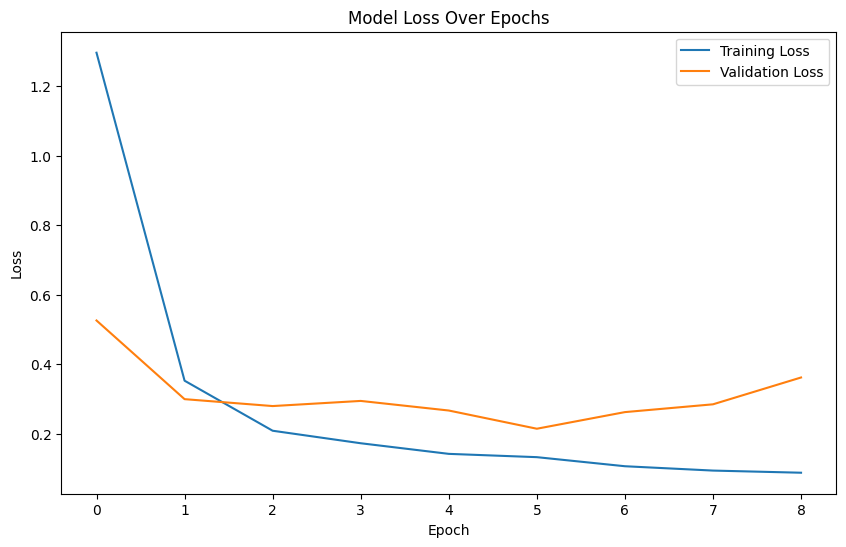

In [24]:
plot_loss(history_GRU)

#### Evaluation

In [25]:
evaluation(model_GRU, X_test_padded, df_test.label)


 1/63 [..............................] - ETA: 1:37


 4/63 [>.............................] - ETA: 1s  


 7/63 [==>...........................] - ETA: 0s


10/63 [===>..........................] - ETA: 0s


13/63 [=====>........................] - ETA: 0s


16/63 [======>.......................] - ETA: 0s


19/63 [========>.....................] - ETA: 0s


22/63 [=========>....................] - ETA: 0s


25/63 [==========>...................] - ETA: 0s


28/63 [============>.................] - ETA: 0s


31/63 [=============>................] - ETA: 0s


34/63 [===============>..............] - ETA: 0s


37/63 [================>.............] - ETA: 0s


40/63 [==================>...........] - ETA: 0s


44/63 [===================>..........] - ETA: 0s


47/63 [=====================>........] - ETA: 0s


50/63 [======================>.......] - ETA: 0s


53/63 [========================>.....] - ETA: 0s


57/63 [==========================>...] - ETA: 0s


60/63 [===========================>..] - ETA: 0s


63/63 [==============================] - 3s 17ms/step


              precision    recall  f1-score   support

       anger       0.90      0.96      0.93       275
        fear       0.92      0.84      0.88       224
         joy       0.96      0.92      0.94       695
        love       0.75      0.87      0.80       159
     sadness       0.97      0.93      0.95       581
    surprise       0.65      0.91      0.76        66

    accuracy                           0.91      2000
   macro avg       0.86      0.90      0.88      2000
weighted avg       0.92      0.91      0.92      2000



## Model--LSTM

In [26]:
model_LSTM = Sequential([
    Embedding(input_dim=input_Size, output_dim=100, input_length=maxlen),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax'),
])

optimizer = Adam()

model_LSTM.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 33, 100)           1000000   


 dropout_4 (Dropout)         (None, 33, 100)           0         


 bidirectional_3 (Bidirectio  (None, 33, 256)          234496    


 nal)                                                            


 bidirectional_4 (Bidirectio  (None, 33, 128)          164352    


 nal)                                                            


 batch_normalization_2 (Batc  (None, 33, 128)          512       


 hNormalization)                                                 


 bidirectional_5 (Bidirectio  (None, 128)              98816     


 nal)                                                            


 dense_4 (Dense)             (None, 64)                8256      


 dropout_5 (Dropout)         (None, 64)                0         


 dense_5 (Dense)             (None, 6)                 390       


Total params: 1,506,822


Trainable params: 1,506,566


Non-trainable params: 256


_________________________________________________________________


In [27]:
history_LSTM = model_LSTM.fit(X_train_padded, y_train, epochs=30,
                             validation_data=(X_val_padded, y_val),
                             callbacks=[early_stopping],class_weight = class_weight_dict)

Epoch 1/30



  1/500 [..............................] - ETA: 1:15:16 - loss: 1.6098 - accuracy: 0.1250


  2/500 [..............................] - ETA: 40s - loss: 1.5405 - accuracy: 0.1719    


  3/500 [..............................] - ETA: 40s - loss: 1.5180 - accuracy: 0.2083


  4/500 [..............................] - ETA: 40s - loss: 1.4876 - accuracy: 0.2109


  5/500 [..............................] - ETA: 39s - loss: 1.7055 - accuracy: 0.2125


  6/500 [..............................] - ETA: 38s - loss: 1.7562 - accuracy: 0.1979


  7/500 [..............................] - ETA: 38s - loss: 1.7220 - accuracy: 0.1964


  8/500 [..............................] - ETA: 38s - loss: 1.6992 - accuracy: 0.1719


  9/500 [..............................] - ETA: 38s - loss: 1.7076 - accuracy: 0.1806


 10/500 [..............................] - ETA: 38s - loss: 1.7815 - accuracy: 0.1875


 11/500 [..............................] - ETA: 38s - loss: 1.8643 - accuracy: 0.1960


 12/500 [..............................] - ETA: 37s - loss: 1.8286 - accuracy: 0.1901


 13/500 [..............................] - ETA: 37s - loss: 1.8015 - accuracy: 0.1803


 14/500 [..............................] - ETA: 37s - loss: 1.7836 - accuracy: 0.1696


 15/500 [..............................] - ETA: 37s - loss: 1.7855 - accuracy: 0.1604


 16/500 [..............................] - ETA: 37s - loss: 1.7926 - accuracy: 0.1562


 17/500 [>.............................] - ETA: 37s - loss: 1.7763 - accuracy: 0.1618


 18/500 [>.............................] - ETA: 37s - loss: 1.7851 - accuracy: 0.1597


 19/500 [>.............................] - ETA: 37s - loss: 1.7965 - accuracy: 0.1562


 20/500 [>.............................] - ETA: 37s - loss: 1.7889 - accuracy: 0.1500


 21/500 [>.............................] - ETA: 37s - loss: 1.8074 - accuracy: 0.1503


 22/500 [>.............................] - ETA: 37s - loss: 1.8083 - accuracy: 0.1477


 23/500 [>.............................] - ETA: 37s - loss: 1.8178 - accuracy: 0.1495


 24/500 [>.............................] - ETA: 36s - loss: 1.8020 - accuracy: 0.1484


 25/500 [>.............................] - ETA: 36s - loss: 1.7905 - accuracy: 0.1437


 26/500 [>.............................] - ETA: 36s - loss: 1.7825 - accuracy: 0.1442


 27/500 [>.............................] - ETA: 36s - loss: 1.7847 - accuracy: 0.1424


 28/500 [>.............................] - ETA: 36s - loss: 1.7978 - accuracy: 0.1395


 29/500 [>.............................] - ETA: 36s - loss: 1.8181 - accuracy: 0.1390


 30/500 [>.............................] - ETA: 36s - loss: 1.8150 - accuracy: 0.1396


 31/500 [>.............................] - ETA: 36s - loss: 1.8212 - accuracy: 0.1371


 32/500 [>.............................] - ETA: 36s - loss: 1.8232 - accuracy: 0.1348


 33/500 [>.............................] - ETA: 35s - loss: 1.8313 - accuracy: 0.1316


 34/500 [=>............................] - ETA: 35s - loss: 1.8299 - accuracy: 0.1314


 35/500 [=>............................] - ETA: 35s - loss: 1.8220 - accuracy: 0.1286


 36/500 [=>............................] - ETA: 35s - loss: 1.8081 - accuracy: 0.1259


 37/500 [=>............................] - ETA: 35s - loss: 1.8063 - accuracy: 0.1225


 38/500 [=>............................] - ETA: 35s - loss: 1.8038 - accuracy: 0.1201


 39/500 [=>............................] - ETA: 35s - loss: 1.8012 - accuracy: 0.1210


 40/500 [=>............................] - ETA: 35s - loss: 1.8135 - accuracy: 0.1219


 41/500 [=>............................] - ETA: 35s - loss: 1.8165 - accuracy: 0.1242


 42/500 [=>............................] - ETA: 35s - loss: 1.8317 - accuracy: 0.1257


 43/500 [=>............................] - ETA: 34s - loss: 1.8347 - accuracy: 0.1272


 44/500 [=>............................] - ETA: 34s - loss: 1.8306 - accuracy: 0.1286


 45/500 [=>............................] - ETA: 34s - loss: 1.8221 - accuracy: 0.1292


 46/500 [=>............................] - ETA: 34s - loss: 1.8152 - accuracy: 0.1264


 47/500 [=>............................] - ETA: 34s - loss: 1.8087 - accuracy: 0.1270


 48/500 [=>............................] - ETA: 34s - loss: 1.8105 - accuracy: 0.1250


 49/500 [=>............................] - ETA: 34s - loss: 1.8222 - accuracy: 0.1256


 50/500 [==>...........................] - ETA: 34s - loss: 1.8236 - accuracy: 0.1244


 51/500 [==>...........................] - ETA: 34s - loss: 1.8237 - accuracy: 0.1238


 52/500 [==>...........................] - ETA: 34s - loss: 1.8286 - accuracy: 0.1244


 53/500 [==>...........................] - ETA: 34s - loss: 1.8278 - accuracy: 0.1232


 54/500 [==>...........................] - ETA: 34s - loss: 1.8257 - accuracy: 0.1215


 55/500 [==>...........................] - ETA: 34s - loss: 1.8333 - accuracy: 0.1227


 56/500 [==>...........................] - ETA: 33s - loss: 1.8261 - accuracy: 0.1239


 57/500 [==>...........................] - ETA: 33s - loss: 1.8273 - accuracy: 0.1234


 58/500 [==>...........................] - ETA: 33s - loss: 1.8325 - accuracy: 0.1228


 59/500 [==>...........................] - ETA: 33s - loss: 1.8288 - accuracy: 0.1213


 60/500 [==>...........................] - ETA: 33s - loss: 1.8216 - accuracy: 0.1198


 61/500 [==>...........................] - ETA: 33s - loss: 1.8248 - accuracy: 0.1194


 62/500 [==>...........................] - ETA: 33s - loss: 1.8224 - accuracy: 0.1190


 63/500 [==>...........................] - ETA: 33s - loss: 1.8174 - accuracy: 0.1176


 64/500 [==>...........................] - ETA: 33s - loss: 1.8181 - accuracy: 0.1172


 65/500 [==>...........................] - ETA: 33s - loss: 1.8147 - accuracy: 0.1163


 66/500 [==>...........................] - ETA: 33s - loss: 1.8058 - accuracy: 0.1155


 67/500 [===>..........................] - ETA: 33s - loss: 1.8125 - accuracy: 0.1161


 68/500 [===>..........................] - ETA: 33s - loss: 1.8126 - accuracy: 0.1176


 69/500 [===>..........................] - ETA: 33s - loss: 1.8067 - accuracy: 0.1205


 70/500 [===>..........................] - ETA: 32s - loss: 1.8067 - accuracy: 0.1219


 71/500 [===>..........................] - ETA: 32s - loss: 1.8025 - accuracy: 0.1224


 72/500 [===>..........................] - ETA: 32s - loss: 1.8001 - accuracy: 0.1246


 73/500 [===>..........................] - ETA: 32s - loss: 1.7954 - accuracy: 0.1267


 74/500 [===>..........................] - ETA: 32s - loss: 1.7911 - accuracy: 0.1271


 75/500 [===>..........................] - ETA: 32s - loss: 1.7852 - accuracy: 0.1292


 76/500 [===>..........................] - ETA: 32s - loss: 1.7864 - accuracy: 0.1303


 77/500 [===>..........................] - ETA: 32s - loss: 1.7990 - accuracy: 0.1303


 78/500 [===>..........................] - ETA: 32s - loss: 1.8029 - accuracy: 0.1314


 79/500 [===>..........................] - ETA: 32s - loss: 1.8052 - accuracy: 0.1317


 80/500 [===>..........................] - ETA: 32s - loss: 1.8005 - accuracy: 0.1320


 81/500 [===>..........................] - ETA: 32s - loss: 1.7988 - accuracy: 0.1339


 82/500 [===>..........................] - ETA: 31s - loss: 1.7982 - accuracy: 0.1349


 83/500 [===>..........................] - ETA: 31s - loss: 1.7987 - accuracy: 0.1367


 84/500 [====>.........................] - ETA: 31s - loss: 1.8041 - accuracy: 0.1373


 85/500 [====>.........................] - ETA: 31s - loss: 1.8061 - accuracy: 0.1382


 86/500 [====>.........................] - ETA: 31s - loss: 1.8041 - accuracy: 0.1395


 87/500 [====>.........................] - ETA: 31s - loss: 1.8012 - accuracy: 0.1401


 88/500 [====>.........................] - ETA: 31s - loss: 1.8005 - accuracy: 0.1396


 89/500 [====>.........................] - ETA: 31s - loss: 1.8000 - accuracy: 0.1390


 90/500 [====>.........................] - ETA: 31s - loss: 1.7983 - accuracy: 0.1392


 91/500 [====>.........................] - ETA: 31s - loss: 1.7974 - accuracy: 0.1391


 92/500 [====>.........................] - ETA: 31s - loss: 1.7948 - accuracy: 0.1393


 93/500 [====>.........................] - ETA: 31s - loss: 1.7997 - accuracy: 0.1394


 94/500 [====>.........................] - ETA: 31s - loss: 1.7993 - accuracy: 0.1390


 95/500 [====>.........................] - ETA: 30s - loss: 1.8015 - accuracy: 0.1395


 96/500 [====>.........................] - ETA: 30s - loss: 1.7975 - accuracy: 0.1406


 97/500 [====>.........................] - ETA: 30s - loss: 1.7987 - accuracy: 0.1418


 98/500 [====>.........................] - ETA: 30s - loss: 1.7964 - accuracy: 0.1432


 99/500 [====>.........................] - ETA: 30s - loss: 1.7971 - accuracy: 0.1452


100/500 [=====>........................] - ETA: 30s - loss: 1.7962 - accuracy: 0.1462


101/500 [=====>........................] - ETA: 30s - loss: 1.7977 - accuracy: 0.1476


102/500 [=====>........................] - ETA: 30s - loss: 1.7955 - accuracy: 0.1489


103/500 [=====>........................] - ETA: 30s - loss: 1.7919 - accuracy: 0.1499


104/500 [=====>........................] - ETA: 30s - loss: 1.7955 - accuracy: 0.1514


105/500 [=====>........................] - ETA: 30s - loss: 1.7935 - accuracy: 0.1518


106/500 [=====>........................] - ETA: 30s - loss: 1.7965 - accuracy: 0.1536


107/500 [=====>........................] - ETA: 30s - loss: 1.7936 - accuracy: 0.1539


108/500 [=====>........................] - ETA: 29s - loss: 1.7927 - accuracy: 0.1554


109/500 [=====>........................] - ETA: 29s - loss: 1.7951 - accuracy: 0.1548


110/500 [=====>........................] - ETA: 29s - loss: 1.7909 - accuracy: 0.1571


111/500 [=====>........................] - ETA: 29s - loss: 1.7876 - accuracy: 0.1571


112/500 [=====>........................] - ETA: 29s - loss: 1.7904 - accuracy: 0.1579


113/500 [=====>........................] - ETA: 29s - loss: 1.7900 - accuracy: 0.1576


114/500 [=====>........................] - ETA: 29s - loss: 1.7912 - accuracy: 0.1579


115/500 [=====>........................] - ETA: 29s - loss: 1.7938 - accuracy: 0.1582


116/500 [=====>........................] - ETA: 29s - loss: 1.7944 - accuracy: 0.1581


117/500 [======>.......................] - ETA: 29s - loss: 1.7963 - accuracy: 0.1579


118/500 [======>.......................] - ETA: 29s - loss: 1.7987 - accuracy: 0.1573


119/500 [======>.......................] - ETA: 29s - loss: 1.7974 - accuracy: 0.1562


120/500 [======>.......................] - ETA: 29s - loss: 1.7974 - accuracy: 0.1568


121/500 [======>.......................] - ETA: 28s - loss: 1.7979 - accuracy: 0.1568


122/500 [======>.......................] - ETA: 28s - loss: 1.7995 - accuracy: 0.1565


123/500 [======>.......................] - ETA: 28s - loss: 1.7994 - accuracy: 0.1560


124/500 [======>.......................] - ETA: 28s - loss: 1.7995 - accuracy: 0.1552


125/500 [======>.......................] - ETA: 28s - loss: 1.7995 - accuracy: 0.1545


126/500 [======>.......................] - ETA: 28s - loss: 1.7995 - accuracy: 0.1550


127/500 [======>.......................] - ETA: 28s - loss: 1.7974 - accuracy: 0.1548


128/500 [======>.......................] - ETA: 28s - loss: 1.7977 - accuracy: 0.1536


129/500 [======>.......................] - ETA: 28s - loss: 1.7984 - accuracy: 0.1529


130/500 [======>.......................] - ETA: 28s - loss: 1.7999 - accuracy: 0.1522


131/500 [======>.......................] - ETA: 28s - loss: 1.8018 - accuracy: 0.1512


132/500 [======>.......................] - ETA: 28s - loss: 1.8021 - accuracy: 0.1503


133/500 [======>.......................] - ETA: 28s - loss: 1.8000 - accuracy: 0.1497


134/500 [=======>......................] - ETA: 27s - loss: 1.7958 - accuracy: 0.1493


135/500 [=======>......................] - ETA: 27s - loss: 1.7975 - accuracy: 0.1498


136/500 [=======>......................] - ETA: 27s - loss: 1.7974 - accuracy: 0.1505


137/500 [=======>......................] - ETA: 27s - loss: 1.7955 - accuracy: 0.1508


138/500 [=======>......................] - ETA: 27s - loss: 1.7970 - accuracy: 0.1517


139/500 [=======>......................] - ETA: 27s - loss: 1.7950 - accuracy: 0.1509


140/500 [=======>......................] - ETA: 27s - loss: 1.7945 - accuracy: 0.1502


141/500 [=======>......................] - ETA: 27s - loss: 1.7975 - accuracy: 0.1498


142/500 [=======>......................] - ETA: 27s - loss: 1.7957 - accuracy: 0.1494


143/500 [=======>......................] - ETA: 27s - loss: 1.7951 - accuracy: 0.1493


144/500 [=======>......................] - ETA: 27s - loss: 1.7935 - accuracy: 0.1491


145/500 [=======>......................] - ETA: 27s - loss: 1.7949 - accuracy: 0.1483


146/500 [=======>......................] - ETA: 27s - loss: 1.7941 - accuracy: 0.1483


147/500 [=======>......................] - ETA: 26s - loss: 1.7925 - accuracy: 0.1490


148/500 [=======>......................] - ETA: 26s - loss: 1.7925 - accuracy: 0.1499


149/500 [=======>......................] - ETA: 26s - loss: 1.7908 - accuracy: 0.1508


150/500 [========>.....................] - ETA: 26s - loss: 1.7900 - accuracy: 0.1515


151/500 [========>.....................] - ETA: 26s - loss: 1.7932 - accuracy: 0.1523


152/500 [========>.....................] - ETA: 26s - loss: 1.7924 - accuracy: 0.1534


153/500 [========>.....................] - ETA: 26s - loss: 1.7929 - accuracy: 0.1532


154/500 [========>.....................] - ETA: 26s - loss: 1.7927 - accuracy: 0.1534


155/500 [========>.....................] - ETA: 26s - loss: 1.7913 - accuracy: 0.1542


156/500 [========>.....................] - ETA: 26s - loss: 1.7922 - accuracy: 0.1544


157/500 [========>.....................] - ETA: 26s - loss: 1.7915 - accuracy: 0.1541


158/500 [========>.....................] - ETA: 26s - loss: 1.7879 - accuracy: 0.1543


159/500 [========>.....................] - ETA: 26s - loss: 1.7885 - accuracy: 0.1551


160/500 [========>.....................] - ETA: 25s - loss: 1.7887 - accuracy: 0.1553


161/500 [========>.....................] - ETA: 25s - loss: 1.7861 - accuracy: 0.1562


162/500 [========>.....................] - ETA: 25s - loss: 1.7853 - accuracy: 0.1574


163/500 [========>.....................] - ETA: 25s - loss: 1.7843 - accuracy: 0.1593


164/500 [========>.....................] - ETA: 25s - loss: 1.7877 - accuracy: 0.1595


165/500 [========>.....................] - ETA: 25s - loss: 1.7896 - accuracy: 0.1600


166/500 [========>.....................] - ETA: 25s - loss: 1.7879 - accuracy: 0.1602


167/500 [=========>....................] - ETA: 25s - loss: 1.7868 - accuracy: 0.1619


168/500 [=========>....................] - ETA: 25s - loss: 1.7893 - accuracy: 0.1615


169/500 [=========>....................] - ETA: 25s - loss: 1.7875 - accuracy: 0.1625


170/500 [=========>....................] - ETA: 25s - loss: 1.7882 - accuracy: 0.1629


171/500 [=========>....................] - ETA: 25s - loss: 1.7871 - accuracy: 0.1630


172/500 [=========>....................] - ETA: 25s - loss: 1.7865 - accuracy: 0.1630


173/500 [=========>....................] - ETA: 24s - loss: 1.7856 - accuracy: 0.1631


174/500 [=========>....................] - ETA: 24s - loss: 1.7839 - accuracy: 0.1631


175/500 [=========>....................] - ETA: 24s - loss: 1.7824 - accuracy: 0.1630


176/500 [=========>....................] - ETA: 24s - loss: 1.7839 - accuracy: 0.1635


177/500 [=========>....................] - ETA: 24s - loss: 1.7835 - accuracy: 0.1633


178/500 [=========>....................] - ETA: 24s - loss: 1.7830 - accuracy: 0.1640


179/500 [=========>....................] - ETA: 24s - loss: 1.7822 - accuracy: 0.1639


180/500 [=========>....................] - ETA: 24s - loss: 1.7804 - accuracy: 0.1644


181/500 [=========>....................] - ETA: 24s - loss: 1.7791 - accuracy: 0.1649


182/500 [=========>....................] - ETA: 24s - loss: 1.7776 - accuracy: 0.1648


183/500 [=========>....................] - ETA: 24s - loss: 1.7770 - accuracy: 0.1653


184/500 [==========>...................] - ETA: 24s - loss: 1.7753 - accuracy: 0.1658


185/500 [==========>...................] - ETA: 24s - loss: 1.7718 - accuracy: 0.1667


186/500 [==========>...................] - ETA: 23s - loss: 1.7700 - accuracy: 0.1670


187/500 [==========>...................] - ETA: 23s - loss: 1.7670 - accuracy: 0.1676


188/500 [==========>...................] - ETA: 23s - loss: 1.7672 - accuracy: 0.1674


189/500 [==========>...................] - ETA: 23s - loss: 1.7662 - accuracy: 0.1678


190/500 [==========>...................] - ETA: 23s - loss: 1.7631 - accuracy: 0.1689


191/500 [==========>...................] - ETA: 23s - loss: 1.7606 - accuracy: 0.1700


192/500 [==========>...................] - ETA: 23s - loss: 1.7586 - accuracy: 0.1701


193/500 [==========>...................] - ETA: 23s - loss: 1.7571 - accuracy: 0.1707


194/500 [==========>...................] - ETA: 23s - loss: 1.7578 - accuracy: 0.1711


195/500 [==========>...................] - ETA: 23s - loss: 1.7585 - accuracy: 0.1712


196/500 [==========>...................] - ETA: 23s - loss: 1.7560 - accuracy: 0.1720


197/500 [==========>...................] - ETA: 23s - loss: 1.7545 - accuracy: 0.1723


198/500 [==========>...................] - ETA: 23s - loss: 1.7527 - accuracy: 0.1738


199/500 [==========>...................] - ETA: 22s - loss: 1.7500 - accuracy: 0.1749


200/500 [===========>..................] - ETA: 22s - loss: 1.7493 - accuracy: 0.1748


201/500 [===========>..................] - ETA: 22s - loss: 1.7458 - accuracy: 0.1751


202/500 [===========>..................] - ETA: 22s - loss: 1.7452 - accuracy: 0.1757


203/500 [===========>..................] - ETA: 22s - loss: 1.7420 - accuracy: 0.1767


204/500 [===========>..................] - ETA: 22s - loss: 1.7398 - accuracy: 0.1766


205/500 [===========>..................] - ETA: 22s - loss: 1.7407 - accuracy: 0.1771


206/500 [===========>..................] - ETA: 22s - loss: 1.7392 - accuracy: 0.1773


207/500 [===========>..................] - ETA: 22s - loss: 1.7416 - accuracy: 0.1775


208/500 [===========>..................] - ETA: 22s - loss: 1.7395 - accuracy: 0.1779


209/500 [===========>..................] - ETA: 22s - loss: 1.7391 - accuracy: 0.1784


210/500 [===========>..................] - ETA: 22s - loss: 1.7371 - accuracy: 0.1790


211/500 [===========>..................] - ETA: 22s - loss: 1.7394 - accuracy: 0.1799


212/500 [===========>..................] - ETA: 21s - loss: 1.7375 - accuracy: 0.1800


213/500 [===========>..................] - ETA: 21s - loss: 1.7359 - accuracy: 0.1803


214/500 [===========>..................] - ETA: 21s - loss: 1.7343 - accuracy: 0.1812


215/500 [===========>..................] - ETA: 21s - loss: 1.7344 - accuracy: 0.1817


216/500 [===========>..................] - ETA: 21s - loss: 1.7344 - accuracy: 0.1820


217/500 [============>.................] - ETA: 21s - loss: 1.7338 - accuracy: 0.1822


218/500 [============>.................] - ETA: 21s - loss: 1.7329 - accuracy: 0.1823


219/500 [============>.................] - ETA: 21s - loss: 1.7311 - accuracy: 0.1835


220/500 [============>.................] - ETA: 21s - loss: 1.7305 - accuracy: 0.1841


221/500 [============>.................] - ETA: 21s - loss: 1.7276 - accuracy: 0.1850


222/500 [============>.................] - ETA: 21s - loss: 1.7260 - accuracy: 0.1855


223/500 [============>.................] - ETA: 21s - loss: 1.7227 - accuracy: 0.1862


224/500 [============>.................] - ETA: 21s - loss: 1.7211 - accuracy: 0.1867


225/500 [============>.................] - ETA: 20s - loss: 1.7178 - accuracy: 0.1879


226/500 [============>.................] - ETA: 20s - loss: 1.7155 - accuracy: 0.1885


227/500 [============>.................] - ETA: 20s - loss: 1.7123 - accuracy: 0.1893


228/500 [============>.................] - ETA: 20s - loss: 1.7125 - accuracy: 0.1902


229/500 [============>.................] - ETA: 20s - loss: 1.7104 - accuracy: 0.1909


230/500 [============>.................] - ETA: 20s - loss: 1.7094 - accuracy: 0.1918


231/500 [============>.................] - ETA: 20s - loss: 1.7073 - accuracy: 0.1924


232/500 [============>.................] - ETA: 20s - loss: 1.7055 - accuracy: 0.1928


233/500 [============>.................] - ETA: 20s - loss: 1.7060 - accuracy: 0.1935


234/500 [=============>................] - ETA: 20s - loss: 1.7050 - accuracy: 0.1940


235/500 [=============>................] - ETA: 20s - loss: 1.7032 - accuracy: 0.1947


236/500 [=============>................] - ETA: 20s - loss: 1.7020 - accuracy: 0.1950


237/500 [=============>................] - ETA: 20s - loss: 1.7013 - accuracy: 0.1959


238/500 [=============>................] - ETA: 19s - loss: 1.7021 - accuracy: 0.1964


239/500 [=============>................] - ETA: 19s - loss: 1.6996 - accuracy: 0.1969


240/500 [=============>................] - ETA: 19s - loss: 1.6983 - accuracy: 0.1969


241/500 [=============>................] - ETA: 19s - loss: 1.6968 - accuracy: 0.1974


242/500 [=============>................] - ETA: 19s - loss: 1.6945 - accuracy: 0.1982


243/500 [=============>................] - ETA: 19s - loss: 1.6926 - accuracy: 0.1986


244/500 [=============>................] - ETA: 19s - loss: 1.6907 - accuracy: 0.1989


245/500 [=============>................] - ETA: 19s - loss: 1.6887 - accuracy: 0.1990


246/500 [=============>................] - ETA: 19s - loss: 1.6864 - accuracy: 0.2002


247/500 [=============>................] - ETA: 19s - loss: 1.6845 - accuracy: 0.2009


248/500 [=============>................] - ETA: 19s - loss: 1.6865 - accuracy: 0.2015


249/500 [=============>................] - ETA: 19s - loss: 1.6866 - accuracy: 0.2023


250/500 [==============>...............] - ETA: 19s - loss: 1.6858 - accuracy: 0.2029


251/500 [==============>...............] - ETA: 18s - loss: 1.6839 - accuracy: 0.2039


252/500 [==============>...............] - ETA: 18s - loss: 1.6828 - accuracy: 0.2050


253/500 [==============>...............] - ETA: 18s - loss: 1.6818 - accuracy: 0.2054


254/500 [==============>...............] - ETA: 18s - loss: 1.6811 - accuracy: 0.2061


255/500 [==============>...............] - ETA: 18s - loss: 1.6786 - accuracy: 0.2067


256/500 [==============>...............] - ETA: 18s - loss: 1.6768 - accuracy: 0.2073


257/500 [==============>...............] - ETA: 18s - loss: 1.6740 - accuracy: 0.2079


258/500 [==============>...............] - ETA: 18s - loss: 1.6728 - accuracy: 0.2085


259/500 [==============>...............] - ETA: 18s - loss: 1.6705 - accuracy: 0.2093


260/500 [==============>...............] - ETA: 18s - loss: 1.6700 - accuracy: 0.2106


261/500 [==============>...............] - ETA: 18s - loss: 1.6677 - accuracy: 0.2116


262/500 [==============>...............] - ETA: 18s - loss: 1.6660 - accuracy: 0.2121


263/500 [==============>...............] - ETA: 18s - loss: 1.6632 - accuracy: 0.2134


264/500 [==============>...............] - ETA: 17s - loss: 1.6623 - accuracy: 0.2146


265/500 [==============>...............] - ETA: 17s - loss: 1.6604 - accuracy: 0.2151


266/500 [==============>...............] - ETA: 17s - loss: 1.6593 - accuracy: 0.2155


267/500 [===============>..............] - ETA: 17s - loss: 1.6592 - accuracy: 0.2161


268/500 [===============>..............] - ETA: 17s - loss: 1.6580 - accuracy: 0.2169


269/500 [===============>..............] - ETA: 17s - loss: 1.6574 - accuracy: 0.2177


270/500 [===============>..............] - ETA: 17s - loss: 1.6568 - accuracy: 0.2185


271/500 [===============>..............] - ETA: 17s - loss: 1.6562 - accuracy: 0.2194


272/500 [===============>..............] - ETA: 17s - loss: 1.6540 - accuracy: 0.2205


273/500 [===============>..............] - ETA: 17s - loss: 1.6530 - accuracy: 0.2206


274/500 [===============>..............] - ETA: 17s - loss: 1.6517 - accuracy: 0.2210


275/500 [===============>..............] - ETA: 17s - loss: 1.6498 - accuracy: 0.2218


276/500 [===============>..............] - ETA: 17s - loss: 1.6481 - accuracy: 0.2226


277/500 [===============>..............] - ETA: 17s - loss: 1.6466 - accuracy: 0.2235


278/500 [===============>..............] - ETA: 16s - loss: 1.6454 - accuracy: 0.2243


279/500 [===============>..............] - ETA: 16s - loss: 1.6435 - accuracy: 0.2249


280/500 [===============>..............] - ETA: 16s - loss: 1.6416 - accuracy: 0.2256


281/500 [===============>..............] - ETA: 16s - loss: 1.6384 - accuracy: 0.2265


282/500 [===============>..............] - ETA: 16s - loss: 1.6357 - accuracy: 0.2274


283/500 [===============>..............] - ETA: 16s - loss: 1.6344 - accuracy: 0.2277


284/500 [================>.............] - ETA: 16s - loss: 1.6324 - accuracy: 0.2280


285/500 [================>.............] - ETA: 16s - loss: 1.6295 - accuracy: 0.2291


286/500 [================>.............] - ETA: 16s - loss: 1.6287 - accuracy: 0.2297


287/500 [================>.............] - ETA: 16s - loss: 1.6273 - accuracy: 0.2306


288/500 [================>.............] - ETA: 16s - loss: 1.6257 - accuracy: 0.2309


289/500 [================>.............] - ETA: 16s - loss: 1.6251 - accuracy: 0.2314


290/500 [================>.............] - ETA: 16s - loss: 1.6235 - accuracy: 0.2327


291/500 [================>.............] - ETA: 15s - loss: 1.6208 - accuracy: 0.2345


292/500 [================>.............] - ETA: 15s - loss: 1.6197 - accuracy: 0.2353


293/500 [================>.............] - ETA: 15s - loss: 1.6183 - accuracy: 0.2360


294/500 [================>.............] - ETA: 15s - loss: 1.6179 - accuracy: 0.2365


295/500 [================>.............] - ETA: 15s - loss: 1.6182 - accuracy: 0.2369


296/500 [================>.............] - ETA: 15s - loss: 1.6159 - accuracy: 0.2374


297/500 [================>.............] - ETA: 15s - loss: 1.6147 - accuracy: 0.2377


298/500 [================>.............] - ETA: 15s - loss: 1.6127 - accuracy: 0.2387


299/500 [================>.............] - ETA: 15s - loss: 1.6109 - accuracy: 0.2391


300/500 [=================>............] - ETA: 15s - loss: 1.6083 - accuracy: 0.2397


301/500 [=================>............] - ETA: 15s - loss: 1.6066 - accuracy: 0.2399


302/500 [=================>............] - ETA: 15s - loss: 1.6044 - accuracy: 0.2406


303/500 [=================>............] - ETA: 15s - loss: 1.6034 - accuracy: 0.2412


304/500 [=================>............] - ETA: 14s - loss: 1.6018 - accuracy: 0.2421


305/500 [=================>............] - ETA: 14s - loss: 1.5991 - accuracy: 0.2427


306/500 [=================>............] - ETA: 14s - loss: 1.5971 - accuracy: 0.2439


307/500 [=================>............] - ETA: 14s - loss: 1.5964 - accuracy: 0.2451


308/500 [=================>............] - ETA: 14s - loss: 1.5939 - accuracy: 0.2464


309/500 [=================>............] - ETA: 14s - loss: 1.5938 - accuracy: 0.2476


310/500 [=================>............] - ETA: 14s - loss: 1.5916 - accuracy: 0.2487


311/500 [=================>............] - ETA: 14s - loss: 1.5885 - accuracy: 0.2499


312/500 [=================>............] - ETA: 14s - loss: 1.5894 - accuracy: 0.2502


313/500 [=================>............] - ETA: 14s - loss: 1.5882 - accuracy: 0.2513


314/500 [=================>............] - ETA: 14s - loss: 1.5857 - accuracy: 0.2524


315/500 [=================>............] - ETA: 14s - loss: 1.5834 - accuracy: 0.2535


316/500 [=================>............] - ETA: 14s - loss: 1.5815 - accuracy: 0.2545


317/500 [==================>...........] - ETA: 13s - loss: 1.5794 - accuracy: 0.2550


318/500 [==================>...........] - ETA: 13s - loss: 1.5780 - accuracy: 0.2560


319/500 [==================>...........] - ETA: 13s - loss: 1.5778 - accuracy: 0.2565


320/500 [==================>...........] - ETA: 13s - loss: 1.5772 - accuracy: 0.2571


321/500 [==================>...........] - ETA: 13s - loss: 1.5764 - accuracy: 0.2579


322/500 [==================>...........] - ETA: 13s - loss: 1.5746 - accuracy: 0.2586


323/500 [==================>...........] - ETA: 13s - loss: 1.5728 - accuracy: 0.2592


324/500 [==================>...........] - ETA: 13s - loss: 1.5723 - accuracy: 0.2599


325/500 [==================>...........] - ETA: 13s - loss: 1.5709 - accuracy: 0.2609


326/500 [==================>...........] - ETA: 13s - loss: 1.5699 - accuracy: 0.2614


327/500 [==================>...........] - ETA: 13s - loss: 1.5673 - accuracy: 0.2625


328/500 [==================>...........] - ETA: 13s - loss: 1.5663 - accuracy: 0.2633


329/500 [==================>...........] - ETA: 13s - loss: 1.5649 - accuracy: 0.2637


330/500 [==================>...........] - ETA: 12s - loss: 1.5640 - accuracy: 0.2642


331/500 [==================>...........] - ETA: 12s - loss: 1.5626 - accuracy: 0.2648


332/500 [==================>...........] - ETA: 12s - loss: 1.5606 - accuracy: 0.2653


333/500 [==================>...........] - ETA: 12s - loss: 1.5591 - accuracy: 0.2659


334/500 [===================>..........] - ETA: 12s - loss: 1.5580 - accuracy: 0.2661


335/500 [===================>..........] - ETA: 12s - loss: 1.5567 - accuracy: 0.2670


336/500 [===================>..........] - ETA: 12s - loss: 1.5551 - accuracy: 0.2679


337/500 [===================>..........] - ETA: 12s - loss: 1.5545 - accuracy: 0.2684


338/500 [===================>..........] - ETA: 12s - loss: 1.5529 - accuracy: 0.2691


339/500 [===================>..........] - ETA: 12s - loss: 1.5506 - accuracy: 0.2700


340/500 [===================>..........] - ETA: 12s - loss: 1.5484 - accuracy: 0.2708


341/500 [===================>..........] - ETA: 12s - loss: 1.5470 - accuracy: 0.2716


342/500 [===================>..........] - ETA: 12s - loss: 1.5452 - accuracy: 0.2722


343/500 [===================>..........] - ETA: 11s - loss: 1.5435 - accuracy: 0.2730


344/500 [===================>..........] - ETA: 11s - loss: 1.5411 - accuracy: 0.2743


345/500 [===================>..........] - ETA: 11s - loss: 1.5394 - accuracy: 0.2750


346/500 [===================>..........] - ETA: 11s - loss: 1.5371 - accuracy: 0.2757


347/500 [===================>..........] - ETA: 11s - loss: 1.5349 - accuracy: 0.2764


348/500 [===================>..........] - ETA: 11s - loss: 1.5343 - accuracy: 0.2770


349/500 [===================>..........] - ETA: 11s - loss: 1.5327 - accuracy: 0.2783


350/500 [====================>.........] - ETA: 11s - loss: 1.5311 - accuracy: 0.2791


351/500 [====================>.........] - ETA: 11s - loss: 1.5285 - accuracy: 0.2804


352/500 [====================>.........] - ETA: 11s - loss: 1.5273 - accuracy: 0.2810


353/500 [====================>.........] - ETA: 11s - loss: 1.5255 - accuracy: 0.2817


354/500 [====================>.........] - ETA: 11s - loss: 1.5241 - accuracy: 0.2823


355/500 [====================>.........] - ETA: 11s - loss: 1.5239 - accuracy: 0.2831


356/500 [====================>.........] - ETA: 10s - loss: 1.5222 - accuracy: 0.2841


357/500 [====================>.........] - ETA: 10s - loss: 1.5210 - accuracy: 0.2853


358/500 [====================>.........] - ETA: 10s - loss: 1.5196 - accuracy: 0.2856


359/500 [====================>.........] - ETA: 10s - loss: 1.5173 - accuracy: 0.2866


360/500 [====================>.........] - ETA: 10s - loss: 1.5163 - accuracy: 0.2872


361/500 [====================>.........] - ETA: 10s - loss: 1.5150 - accuracy: 0.2882


362/500 [====================>.........] - ETA: 10s - loss: 1.5130 - accuracy: 0.2893


363/500 [====================>.........] - ETA: 10s - loss: 1.5102 - accuracy: 0.2906


364/500 [====================>.........] - ETA: 10s - loss: 1.5090 - accuracy: 0.2916


365/500 [====================>.........] - ETA: 10s - loss: 1.5079 - accuracy: 0.2920


366/500 [====================>.........] - ETA: 10s - loss: 1.5053 - accuracy: 0.2934


367/500 [=====================>........] - ETA: 10s - loss: 1.5059 - accuracy: 0.2940


368/500 [=====================>........] - ETA: 10s - loss: 1.5045 - accuracy: 0.2946


369/500 [=====================>........] - ETA: 9s - loss: 1.5022 - accuracy: 0.2956 


370/500 [=====================>........] - ETA: 9s - loss: 1.5007 - accuracy: 0.2966


371/500 [=====================>........] - ETA: 9s - loss: 1.4990 - accuracy: 0.2973


372/500 [=====================>........] - ETA: 9s - loss: 1.4970 - accuracy: 0.2982


373/500 [=====================>........] - ETA: 9s - loss: 1.4957 - accuracy: 0.2988


374/500 [=====================>........] - ETA: 9s - loss: 1.4945 - accuracy: 0.2995


375/500 [=====================>........] - ETA: 9s - loss: 1.4946 - accuracy: 0.3000


376/500 [=====================>........] - ETA: 9s - loss: 1.4941 - accuracy: 0.3004


377/500 [=====================>........] - ETA: 9s - loss: 1.4919 - accuracy: 0.3014


378/500 [=====================>........] - ETA: 9s - loss: 1.4903 - accuracy: 0.3024


379/500 [=====================>........] - ETA: 9s - loss: 1.4888 - accuracy: 0.3031


380/500 [=====================>........] - ETA: 9s - loss: 1.4876 - accuracy: 0.3039


381/500 [=====================>........] - ETA: 9s - loss: 1.4865 - accuracy: 0.3043


382/500 [=====================>........] - ETA: 8s - loss: 1.4846 - accuracy: 0.3053


383/500 [=====================>........] - ETA: 8s - loss: 1.4826 - accuracy: 0.3062


384/500 [======================>.......] - ETA: 8s - loss: 1.4808 - accuracy: 0.3070


385/500 [======================>.......] - ETA: 8s - loss: 1.4796 - accuracy: 0.3079


386/500 [======================>.......] - ETA: 8s - loss: 1.4783 - accuracy: 0.3086


387/500 [======================>.......] - ETA: 8s - loss: 1.4784 - accuracy: 0.3096


388/500 [======================>.......] - ETA: 8s - loss: 1.4765 - accuracy: 0.3102


389/500 [======================>.......] - ETA: 8s - loss: 1.4746 - accuracy: 0.3112


390/500 [======================>.......] - ETA: 8s - loss: 1.4730 - accuracy: 0.3120


391/500 [======================>.......] - ETA: 8s - loss: 1.4717 - accuracy: 0.3128


392/500 [======================>.......] - ETA: 8s - loss: 1.4700 - accuracy: 0.3135


393/500 [======================>.......] - ETA: 8s - loss: 1.4684 - accuracy: 0.3146


394/500 [======================>.......] - ETA: 8s - loss: 1.4662 - accuracy: 0.3155


395/500 [======================>.......] - ETA: 7s - loss: 1.4640 - accuracy: 0.3162


396/500 [======================>.......] - ETA: 7s - loss: 1.4619 - accuracy: 0.3174


397/500 [======================>.......] - ETA: 7s - loss: 1.4605 - accuracy: 0.3184


398/500 [======================>.......] - ETA: 7s - loss: 1.4593 - accuracy: 0.3196


399/500 [======================>.......] - ETA: 7s - loss: 1.4575 - accuracy: 0.3206


400/500 [=======================>......] - ETA: 7s - loss: 1.4558 - accuracy: 0.3216


401/500 [=======================>......] - ETA: 7s - loss: 1.4534 - accuracy: 0.3225


402/500 [=======================>......] - ETA: 7s - loss: 1.4516 - accuracy: 0.3233


403/500 [=======================>......] - ETA: 7s - loss: 1.4498 - accuracy: 0.3241


404/500 [=======================>......] - ETA: 7s - loss: 1.4486 - accuracy: 0.3250


405/500 [=======================>......] - ETA: 7s - loss: 1.4477 - accuracy: 0.3256


406/500 [=======================>......] - ETA: 7s - loss: 1.4453 - accuracy: 0.3269


407/500 [=======================>......] - ETA: 7s - loss: 1.4430 - accuracy: 0.3278


408/500 [=======================>......] - ETA: 6s - loss: 1.4418 - accuracy: 0.3283


409/500 [=======================>......] - ETA: 6s - loss: 1.4406 - accuracy: 0.3291


410/500 [=======================>......] - ETA: 6s - loss: 1.4392 - accuracy: 0.3301


411/500 [=======================>......] - ETA: 6s - loss: 1.4373 - accuracy: 0.3308


412/500 [=======================>......] - ETA: 6s - loss: 1.4367 - accuracy: 0.3317


413/500 [=======================>......] - ETA: 6s - loss: 1.4351 - accuracy: 0.3320


414/500 [=======================>......] - ETA: 6s - loss: 1.4345 - accuracy: 0.3328


415/500 [=======================>......] - ETA: 6s - loss: 1.4331 - accuracy: 0.3337


416/500 [=======================>......] - ETA: 6s - loss: 1.4319 - accuracy: 0.3345


417/500 [========================>.....] - ETA: 6s - loss: 1.4328 - accuracy: 0.3352


418/500 [========================>.....] - ETA: 6s - loss: 1.4328 - accuracy: 0.3359


419/500 [========================>.....] - ETA: 6s - loss: 1.4311 - accuracy: 0.3369


420/500 [========================>.....] - ETA: 6s - loss: 1.4291 - accuracy: 0.3379


421/500 [========================>.....] - ETA: 6s - loss: 1.4280 - accuracy: 0.3386


422/500 [========================>.....] - ETA: 5s - loss: 1.4268 - accuracy: 0.3394


423/500 [========================>.....] - ETA: 5s - loss: 1.4259 - accuracy: 0.3399


424/500 [========================>.....] - ETA: 5s - loss: 1.4248 - accuracy: 0.3404


425/500 [========================>.....] - ETA: 5s - loss: 1.4243 - accuracy: 0.3409


426/500 [========================>.....] - ETA: 5s - loss: 1.4232 - accuracy: 0.3416


427/500 [========================>.....] - ETA: 5s - loss: 1.4220 - accuracy: 0.3421


428/500 [========================>.....] - ETA: 5s - loss: 1.4206 - accuracy: 0.3429


429/500 [========================>.....] - ETA: 5s - loss: 1.4186 - accuracy: 0.3438


430/500 [========================>.....] - ETA: 5s - loss: 1.4165 - accuracy: 0.3448


431/500 [========================>.....] - ETA: 5s - loss: 1.4155 - accuracy: 0.3454


432/500 [========================>.....] - ETA: 5s - loss: 1.4159 - accuracy: 0.3461


433/500 [========================>.....] - ETA: 5s - loss: 1.4153 - accuracy: 0.3466


434/500 [=========================>....] - ETA: 5s - loss: 1.4140 - accuracy: 0.3470


435/500 [=========================>....] - ETA: 4s - loss: 1.4125 - accuracy: 0.3478


436/500 [=========================>....] - ETA: 4s - loss: 1.4111 - accuracy: 0.3488


437/500 [=========================>....] - ETA: 4s - loss: 1.4105 - accuracy: 0.3493


438/500 [=========================>....] - ETA: 4s - loss: 1.4091 - accuracy: 0.3502


439/500 [=========================>....] - ETA: 4s - loss: 1.4077 - accuracy: 0.3511


440/500 [=========================>....] - ETA: 4s - loss: 1.4058 - accuracy: 0.3520


441/500 [=========================>....] - ETA: 4s - loss: 1.4043 - accuracy: 0.3527


442/500 [=========================>....] - ETA: 4s - loss: 1.4032 - accuracy: 0.3533


443/500 [=========================>....] - ETA: 4s - loss: 1.4017 - accuracy: 0.3541


444/500 [=========================>....] - ETA: 4s - loss: 1.4005 - accuracy: 0.3549


445/500 [=========================>....] - ETA: 4s - loss: 1.3984 - accuracy: 0.3559


446/500 [=========================>....] - ETA: 4s - loss: 1.3970 - accuracy: 0.3567


447/500 [=========================>....] - ETA: 4s - loss: 1.3959 - accuracy: 0.3575


448/500 [=========================>....] - ETA: 3s - loss: 1.3940 - accuracy: 0.3585


449/500 [=========================>....] - ETA: 3s - loss: 1.3925 - accuracy: 0.3595


450/500 [==========================>...] - ETA: 3s - loss: 1.3908 - accuracy: 0.3603


451/500 [==========================>...] - ETA: 3s - loss: 1.3894 - accuracy: 0.3610


452/500 [==========================>...] - ETA: 3s - loss: 1.3875 - accuracy: 0.3620


453/500 [==========================>...] - ETA: 3s - loss: 1.3856 - accuracy: 0.3629


454/500 [==========================>...] - ETA: 3s - loss: 1.3839 - accuracy: 0.3638


455/500 [==========================>...] - ETA: 3s - loss: 1.3820 - accuracy: 0.3646


456/500 [==========================>...] - ETA: 3s - loss: 1.3800 - accuracy: 0.3654


457/500 [==========================>...] - ETA: 3s - loss: 1.3790 - accuracy: 0.3664


458/500 [==========================>...] - ETA: 3s - loss: 1.3777 - accuracy: 0.3671


459/500 [==========================>...] - ETA: 3s - loss: 1.3769 - accuracy: 0.3679


460/500 [==========================>...] - ETA: 3s - loss: 1.3745 - accuracy: 0.3690


461/500 [==========================>...] - ETA: 2s - loss: 1.3727 - accuracy: 0.3698


462/500 [==========================>...] - ETA: 2s - loss: 1.3729 - accuracy: 0.3701


463/500 [==========================>...] - ETA: 2s - loss: 1.3721 - accuracy: 0.3706


464/500 [==========================>...] - ETA: 2s - loss: 1.3712 - accuracy: 0.3712


465/500 [==========================>...] - ETA: 2s - loss: 1.3696 - accuracy: 0.3720


466/500 [==========================>...] - ETA: 2s - loss: 1.3682 - accuracy: 0.3725


467/500 [===========================>..] - ETA: 2s - loss: 1.3672 - accuracy: 0.3732


468/500 [===========================>..] - ETA: 2s - loss: 1.3656 - accuracy: 0.3739


469/500 [===========================>..] - ETA: 2s - loss: 1.3641 - accuracy: 0.3746


470/500 [===========================>..] - ETA: 2s - loss: 1.3626 - accuracy: 0.3751


471/500 [===========================>..] - ETA: 2s - loss: 1.3613 - accuracy: 0.3759


472/500 [===========================>..] - ETA: 2s - loss: 1.3604 - accuracy: 0.3763


473/500 [===========================>..] - ETA: 2s - loss: 1.3585 - accuracy: 0.3771


474/500 [===========================>..] - ETA: 1s - loss: 1.3566 - accuracy: 0.3782


475/500 [===========================>..] - ETA: 1s - loss: 1.3553 - accuracy: 0.3789


476/500 [===========================>..] - ETA: 1s - loss: 1.3538 - accuracy: 0.3797


477/500 [===========================>..] - ETA: 1s - loss: 1.3523 - accuracy: 0.3803


478/500 [===========================>..] - ETA: 1s - loss: 1.3510 - accuracy: 0.3810


479/500 [===========================>..] - ETA: 1s - loss: 1.3501 - accuracy: 0.3817


480/500 [===========================>..] - ETA: 1s - loss: 1.3490 - accuracy: 0.3827


481/500 [===========================>..] - ETA: 1s - loss: 1.3477 - accuracy: 0.3836


482/500 [===========================>..] - ETA: 1s - loss: 1.3476 - accuracy: 0.3842


483/500 [===========================>..] - ETA: 1s - loss: 1.3470 - accuracy: 0.3848


484/500 [============================>.] - ETA: 1s - loss: 1.3458 - accuracy: 0.3855


485/500 [============================>.] - ETA: 1s - loss: 1.3443 - accuracy: 0.3863


486/500 [============================>.] - ETA: 1s - loss: 1.3435 - accuracy: 0.3866


487/500 [============================>.] - ETA: 0s - loss: 1.3424 - accuracy: 0.3871


488/500 [============================>.] - ETA: 0s - loss: 1.3410 - accuracy: 0.3876


489/500 [============================>.] - ETA: 0s - loss: 1.3397 - accuracy: 0.3881


490/500 [============================>.] - ETA: 0s - loss: 1.3386 - accuracy: 0.3888


491/500 [============================>.] - ETA: 0s - loss: 1.3376 - accuracy: 0.3893


492/500 [============================>.] - ETA: 0s - loss: 1.3361 - accuracy: 0.3899


493/500 [============================>.] - ETA: 0s - loss: 1.3347 - accuracy: 0.3906


494/500 [============================>.] - ETA: 0s - loss: 1.3336 - accuracy: 0.3914


495/500 [============================>.] - ETA: 0s - loss: 1.3325 - accuracy: 0.3920


496/500 [============================>.] - ETA: 0s - loss: 1.3316 - accuracy: 0.3923


497/500 [============================>.] - ETA: 0s - loss: 1.3303 - accuracy: 0.3929


498/500 [============================>.] - ETA: 0s - loss: 1.3286 - accuracy: 0.3938


499/500 [============================>.] - ETA: 0s - loss: 1.3268 - accuracy: 0.3944


500/500 [==============================] - 51s 83ms/step - loss: 1.3270 - accuracy: 0.3944 - val_loss: 0.8356 - val_accuracy: 0.7040


Epoch 2/30



  1/500 [..............................] - ETA: 36s - loss: 0.6325 - accuracy: 0.8125


  2/500 [..............................] - ETA: 37s - loss: 0.6129 - accuracy: 0.7656


  3/500 [..............................] - ETA: 37s - loss: 0.5697 - accuracy: 0.7708


  4/500 [..............................] - ETA: 37s - loss: 0.5534 - accuracy: 0.7891


  5/500 [..............................] - ETA: 37s - loss: 0.5427 - accuracy: 0.8000


  6/500 [..............................] - ETA: 37s - loss: 0.5948 - accuracy: 0.7812


  7/500 [..............................] - ETA: 36s - loss: 0.6326 - accuracy: 0.7812


  8/500 [..............................] - ETA: 36s - loss: 0.5969 - accuracy: 0.8086


  9/500 [..............................] - ETA: 37s - loss: 0.5997 - accuracy: 0.7986


 10/500 [..............................] - ETA: 37s - loss: 0.6116 - accuracy: 0.8000


 11/500 [..............................] - ETA: 36s - loss: 0.6278 - accuracy: 0.7869


 12/500 [..............................] - ETA: 36s - loss: 0.6165 - accuracy: 0.7786


 13/500 [..............................] - ETA: 36s - loss: 0.6213 - accuracy: 0.7764


 14/500 [..............................] - ETA: 36s - loss: 0.6332 - accuracy: 0.7723


 15/500 [..............................] - ETA: 36s - loss: 0.6274 - accuracy: 0.7750


 16/500 [..............................] - ETA: 36s - loss: 0.6504 - accuracy: 0.7695


 17/500 [>.............................] - ETA: 36s - loss: 0.6375 - accuracy: 0.7757


 18/500 [>.............................] - ETA: 36s - loss: 0.6302 - accuracy: 0.7795


 19/500 [>.............................] - ETA: 36s - loss: 0.6188 - accuracy: 0.7812


 20/500 [>.............................] - ETA: 36s - loss: 0.6122 - accuracy: 0.7859


 21/500 [>.............................] - ETA: 36s - loss: 0.6054 - accuracy: 0.7887


 22/500 [>.............................] - ETA: 36s - loss: 0.6115 - accuracy: 0.7841


 23/500 [>.............................] - ETA: 36s - loss: 0.6024 - accuracy: 0.7840


 24/500 [>.............................] - ETA: 35s - loss: 0.6024 - accuracy: 0.7852


 25/500 [>.............................] - ETA: 35s - loss: 0.5927 - accuracy: 0.7862


 26/500 [>.............................] - ETA: 35s - loss: 0.5821 - accuracy: 0.7873


 27/500 [>.............................] - ETA: 35s - loss: 0.5855 - accuracy: 0.7847


 28/500 [>.............................] - ETA: 35s - loss: 0.5943 - accuracy: 0.7857


 29/500 [>.............................] - ETA: 35s - loss: 0.5916 - accuracy: 0.7866


 30/500 [>.............................] - ETA: 35s - loss: 0.5834 - accuracy: 0.7906


 31/500 [>.............................] - ETA: 35s - loss: 0.5788 - accuracy: 0.7923


 32/500 [>.............................] - ETA: 35s - loss: 0.5807 - accuracy: 0.7949


 33/500 [>.............................] - ETA: 35s - loss: 0.5744 - accuracy: 0.7973


 34/500 [=>............................] - ETA: 35s - loss: 0.5681 - accuracy: 0.7996


 35/500 [=>............................] - ETA: 35s - loss: 0.5628 - accuracy: 0.8027


 36/500 [=>............................] - ETA: 35s - loss: 0.5662 - accuracy: 0.7986


 37/500 [=>............................] - ETA: 35s - loss: 0.5677 - accuracy: 0.7981


 38/500 [=>............................] - ETA: 35s - loss: 0.5684 - accuracy: 0.7969


 39/500 [=>............................] - ETA: 35s - loss: 0.5690 - accuracy: 0.7965


 40/500 [=>............................] - ETA: 35s - loss: 0.5694 - accuracy: 0.7937


 41/500 [=>............................] - ETA: 34s - loss: 0.5665 - accuracy: 0.7927


 42/500 [=>............................] - ETA: 34s - loss: 0.5606 - accuracy: 0.7954


 43/500 [=>............................] - ETA: 34s - loss: 0.5545 - accuracy: 0.7987


 44/500 [=>............................] - ETA: 34s - loss: 0.5521 - accuracy: 0.7976


 45/500 [=>............................] - ETA: 34s - loss: 0.5489 - accuracy: 0.7986


 46/500 [=>............................] - ETA: 34s - loss: 0.5546 - accuracy: 0.7955


 47/500 [=>............................] - ETA: 34s - loss: 0.5530 - accuracy: 0.7939


 48/500 [=>............................] - ETA: 34s - loss: 0.5605 - accuracy: 0.7930


 49/500 [=>............................] - ETA: 34s - loss: 0.5599 - accuracy: 0.7921


 50/500 [==>...........................] - ETA: 34s - loss: 0.5562 - accuracy: 0.7937


 51/500 [==>...........................] - ETA: 34s - loss: 0.5604 - accuracy: 0.7923


 52/500 [==>...........................] - ETA: 34s - loss: 0.5618 - accuracy: 0.7933


 53/500 [==>...........................] - ETA: 33s - loss: 0.5552 - accuracy: 0.7948


 54/500 [==>...........................] - ETA: 33s - loss: 0.5549 - accuracy: 0.7928


 55/500 [==>...........................] - ETA: 33s - loss: 0.5591 - accuracy: 0.7909


 56/500 [==>...........................] - ETA: 33s - loss: 0.5585 - accuracy: 0.7896


 57/500 [==>...........................] - ETA: 33s - loss: 0.5616 - accuracy: 0.7895


 58/500 [==>...........................] - ETA: 33s - loss: 0.5619 - accuracy: 0.7899


 59/500 [==>...........................] - ETA: 33s - loss: 0.5619 - accuracy: 0.7881


 60/500 [==>...........................] - ETA: 33s - loss: 0.5590 - accuracy: 0.7885


 61/500 [==>...........................] - ETA: 33s - loss: 0.5582 - accuracy: 0.7874


 62/500 [==>...........................] - ETA: 33s - loss: 0.5540 - accuracy: 0.7878


 63/500 [==>...........................] - ETA: 33s - loss: 0.5519 - accuracy: 0.7877


 64/500 [==>...........................] - ETA: 33s - loss: 0.5564 - accuracy: 0.7871


 65/500 [==>...........................] - ETA: 33s - loss: 0.5531 - accuracy: 0.7870


 66/500 [==>...........................] - ETA: 33s - loss: 0.5526 - accuracy: 0.7869


 67/500 [===>..........................] - ETA: 33s - loss: 0.5491 - accuracy: 0.7882


 68/500 [===>..........................] - ETA: 33s - loss: 0.5460 - accuracy: 0.7881


 69/500 [===>..........................] - ETA: 33s - loss: 0.5442 - accuracy: 0.7880


 70/500 [===>..........................] - ETA: 33s - loss: 0.5411 - accuracy: 0.7902


 71/500 [===>..........................] - ETA: 33s - loss: 0.5400 - accuracy: 0.7905


 72/500 [===>..........................] - ETA: 32s - loss: 0.5425 - accuracy: 0.7904


 73/500 [===>..........................] - ETA: 32s - loss: 0.5430 - accuracy: 0.7907


 74/500 [===>..........................] - ETA: 32s - loss: 0.5382 - accuracy: 0.7918


 75/500 [===>..........................] - ETA: 32s - loss: 0.5366 - accuracy: 0.7929


 76/500 [===>..........................] - ETA: 32s - loss: 0.5340 - accuracy: 0.7948


 77/500 [===>..........................] - ETA: 32s - loss: 0.5333 - accuracy: 0.7950


 78/500 [===>..........................] - ETA: 32s - loss: 0.5331 - accuracy: 0.7957


 79/500 [===>..........................] - ETA: 32s - loss: 0.5311 - accuracy: 0.7975


 80/500 [===>..........................] - ETA: 32s - loss: 0.5287 - accuracy: 0.7988


 81/500 [===>..........................] - ETA: 32s - loss: 0.5316 - accuracy: 0.7990


 82/500 [===>..........................] - ETA: 32s - loss: 0.5271 - accuracy: 0.8007


 83/500 [===>..........................] - ETA: 32s - loss: 0.5283 - accuracy: 0.8008


 84/500 [====>.........................] - ETA: 32s - loss: 0.5275 - accuracy: 0.8013


 85/500 [====>.........................] - ETA: 31s - loss: 0.5317 - accuracy: 0.7993


 86/500 [====>.........................] - ETA: 31s - loss: 0.5306 - accuracy: 0.7998


 87/500 [====>.........................] - ETA: 31s - loss: 0.5298 - accuracy: 0.7992


 88/500 [====>.........................] - ETA: 31s - loss: 0.5265 - accuracy: 0.8004


 89/500 [====>.........................] - ETA: 31s - loss: 0.5292 - accuracy: 0.7995


 90/500 [====>.........................] - ETA: 31s - loss: 0.5283 - accuracy: 0.7990


 91/500 [====>.........................] - ETA: 31s - loss: 0.5255 - accuracy: 0.8001


 92/500 [====>.........................] - ETA: 31s - loss: 0.5289 - accuracy: 0.7999


 93/500 [====>.........................] - ETA: 31s - loss: 0.5336 - accuracy: 0.7994


 94/500 [====>.........................] - ETA: 31s - loss: 0.5317 - accuracy: 0.8002


 95/500 [====>.........................] - ETA: 31s - loss: 0.5311 - accuracy: 0.8000


 96/500 [====>.........................] - ETA: 31s - loss: 0.5304 - accuracy: 0.7998


 97/500 [====>.........................] - ETA: 30s - loss: 0.5296 - accuracy: 0.7999


 98/500 [====>.........................] - ETA: 30s - loss: 0.5327 - accuracy: 0.7997


 99/500 [====>.........................] - ETA: 30s - loss: 0.5380 - accuracy: 0.7983


100/500 [=====>........................] - ETA: 30s - loss: 0.5374 - accuracy: 0.7984


101/500 [=====>........................] - ETA: 30s - loss: 0.5372 - accuracy: 0.7989


102/500 [=====>........................] - ETA: 30s - loss: 0.5368 - accuracy: 0.7984


103/500 [=====>........................] - ETA: 30s - loss: 0.5384 - accuracy: 0.7979


104/500 [=====>........................] - ETA: 30s - loss: 0.5364 - accuracy: 0.7990


105/500 [=====>........................] - ETA: 30s - loss: 0.5354 - accuracy: 0.7991


106/500 [=====>........................] - ETA: 30s - loss: 0.5352 - accuracy: 0.7992


107/500 [=====>........................] - ETA: 30s - loss: 0.5350 - accuracy: 0.7996


108/500 [=====>........................] - ETA: 30s - loss: 0.5387 - accuracy: 0.7995


109/500 [=====>........................] - ETA: 30s - loss: 0.5390 - accuracy: 0.7990


110/500 [=====>........................] - ETA: 29s - loss: 0.5390 - accuracy: 0.7997


111/500 [=====>........................] - ETA: 29s - loss: 0.5383 - accuracy: 0.7995


112/500 [=====>........................] - ETA: 29s - loss: 0.5373 - accuracy: 0.8011


113/500 [=====>........................] - ETA: 29s - loss: 0.5363 - accuracy: 0.8014


114/500 [=====>........................] - ETA: 29s - loss: 0.5363 - accuracy: 0.8015


115/500 [=====>........................] - ETA: 29s - loss: 0.5341 - accuracy: 0.8027


116/500 [=====>........................] - ETA: 29s - loss: 0.5343 - accuracy: 0.8020


117/500 [======>.......................] - ETA: 29s - loss: 0.5327 - accuracy: 0.8029


118/500 [======>.......................] - ETA: 29s - loss: 0.5347 - accuracy: 0.8019


119/500 [======>.......................] - ETA: 29s - loss: 0.5333 - accuracy: 0.8025


120/500 [======>.......................] - ETA: 29s - loss: 0.5314 - accuracy: 0.8029


121/500 [======>.......................] - ETA: 29s - loss: 0.5296 - accuracy: 0.8040


122/500 [======>.......................] - ETA: 29s - loss: 0.5281 - accuracy: 0.8043


123/500 [======>.......................] - ETA: 28s - loss: 0.5303 - accuracy: 0.8046


124/500 [======>.......................] - ETA: 28s - loss: 0.5297 - accuracy: 0.8047


125/500 [======>.......................] - ETA: 28s - loss: 0.5277 - accuracy: 0.8060


126/500 [======>.......................] - ETA: 28s - loss: 0.5253 - accuracy: 0.8068


127/500 [======>.......................] - ETA: 28s - loss: 0.5233 - accuracy: 0.8071


128/500 [======>.......................] - ETA: 28s - loss: 0.5248 - accuracy: 0.8064


129/500 [======>.......................] - ETA: 28s - loss: 0.5245 - accuracy: 0.8067


130/500 [======>.......................] - ETA: 28s - loss: 0.5233 - accuracy: 0.8070


131/500 [======>.......................] - ETA: 28s - loss: 0.5220 - accuracy: 0.8073


132/500 [======>.......................] - ETA: 28s - loss: 0.5216 - accuracy: 0.8068


133/500 [======>.......................] - ETA: 28s - loss: 0.5220 - accuracy: 0.8057


134/500 [=======>......................] - ETA: 28s - loss: 0.5208 - accuracy: 0.8057


135/500 [=======>......................] - ETA: 28s - loss: 0.5249 - accuracy: 0.8053


136/500 [=======>......................] - ETA: 27s - loss: 0.5241 - accuracy: 0.8051


137/500 [=======>......................] - ETA: 27s - loss: 0.5239 - accuracy: 0.8052


138/500 [=======>......................] - ETA: 27s - loss: 0.5241 - accuracy: 0.8057


139/500 [=======>......................] - ETA: 27s - loss: 0.5250 - accuracy: 0.8058


140/500 [=======>......................] - ETA: 27s - loss: 0.5260 - accuracy: 0.8056


141/500 [=======>......................] - ETA: 27s - loss: 0.5248 - accuracy: 0.8059


142/500 [=======>......................] - ETA: 27s - loss: 0.5255 - accuracy: 0.8059


143/500 [=======>......................] - ETA: 27s - loss: 0.5248 - accuracy: 0.8064


144/500 [=======>......................] - ETA: 27s - loss: 0.5244 - accuracy: 0.8069


145/500 [=======>......................] - ETA: 27s - loss: 0.5227 - accuracy: 0.8073


146/500 [=======>......................] - ETA: 27s - loss: 0.5219 - accuracy: 0.8074


147/500 [=======>......................] - ETA: 27s - loss: 0.5214 - accuracy: 0.8074


148/500 [=======>......................] - ETA: 27s - loss: 0.5207 - accuracy: 0.8074


149/500 [=======>......................] - ETA: 26s - loss: 0.5195 - accuracy: 0.8077


150/500 [========>.....................] - ETA: 26s - loss: 0.5193 - accuracy: 0.8073


151/500 [========>.....................] - ETA: 26s - loss: 0.5182 - accuracy: 0.8073


152/500 [========>.....................] - ETA: 26s - loss: 0.5187 - accuracy: 0.8074


153/500 [========>.....................] - ETA: 26s - loss: 0.5183 - accuracy: 0.8074


154/500 [========>.....................] - ETA: 26s - loss: 0.5162 - accuracy: 0.8082


155/500 [========>.....................] - ETA: 26s - loss: 0.5149 - accuracy: 0.8089


156/500 [========>.....................] - ETA: 26s - loss: 0.5131 - accuracy: 0.8097


157/500 [========>.....................] - ETA: 26s - loss: 0.5129 - accuracy: 0.8095


158/500 [========>.....................] - ETA: 26s - loss: 0.5118 - accuracy: 0.8099


159/500 [========>.....................] - ETA: 26s - loss: 0.5114 - accuracy: 0.8099


160/500 [========>.....................] - ETA: 26s - loss: 0.5106 - accuracy: 0.8102


161/500 [========>.....................] - ETA: 25s - loss: 0.5103 - accuracy: 0.8096


162/500 [========>.....................] - ETA: 25s - loss: 0.5087 - accuracy: 0.8102


163/500 [========>.....................] - ETA: 25s - loss: 0.5085 - accuracy: 0.8106


164/500 [========>.....................] - ETA: 25s - loss: 0.5074 - accuracy: 0.8112


165/500 [========>.....................] - ETA: 25s - loss: 0.5081 - accuracy: 0.8114


166/500 [========>.....................] - ETA: 25s - loss: 0.5089 - accuracy: 0.8114


167/500 [=========>....................] - ETA: 25s - loss: 0.5072 - accuracy: 0.8121


168/500 [=========>....................] - ETA: 25s - loss: 0.5061 - accuracy: 0.8129


169/500 [=========>....................] - ETA: 25s - loss: 0.5073 - accuracy: 0.8125


170/500 [=========>....................] - ETA: 25s - loss: 0.5056 - accuracy: 0.8129


171/500 [=========>....................] - ETA: 25s - loss: 0.5039 - accuracy: 0.8132


172/500 [=========>....................] - ETA: 25s - loss: 0.5031 - accuracy: 0.8136


173/500 [=========>....................] - ETA: 25s - loss: 0.5017 - accuracy: 0.8145


174/500 [=========>....................] - ETA: 25s - loss: 0.5017 - accuracy: 0.8141


175/500 [=========>....................] - ETA: 24s - loss: 0.5007 - accuracy: 0.8143


176/500 [=========>....................] - ETA: 24s - loss: 0.5024 - accuracy: 0.8143


177/500 [=========>....................] - ETA: 24s - loss: 0.5033 - accuracy: 0.8139


178/500 [=========>....................] - ETA: 24s - loss: 0.5034 - accuracy: 0.8139


179/500 [=========>....................] - ETA: 24s - loss: 0.5032 - accuracy: 0.8141


180/500 [=========>....................] - ETA: 24s - loss: 0.5017 - accuracy: 0.8148


181/500 [=========>....................] - ETA: 24s - loss: 0.5020 - accuracy: 0.8147


182/500 [=========>....................] - ETA: 24s - loss: 0.5013 - accuracy: 0.8147


183/500 [=========>....................] - ETA: 24s - loss: 0.5003 - accuracy: 0.8151


184/500 [==========>...................] - ETA: 24s - loss: 0.5005 - accuracy: 0.8152


185/500 [==========>...................] - ETA: 24s - loss: 0.4999 - accuracy: 0.8145


186/500 [==========>...................] - ETA: 24s - loss: 0.4996 - accuracy: 0.8142


187/500 [==========>...................] - ETA: 24s - loss: 0.4992 - accuracy: 0.8140


188/500 [==========>...................] - ETA: 23s - loss: 0.5020 - accuracy: 0.8138


189/500 [==========>...................] - ETA: 23s - loss: 0.5023 - accuracy: 0.8135


190/500 [==========>...................] - ETA: 23s - loss: 0.5034 - accuracy: 0.8133


191/500 [==========>...................] - ETA: 23s - loss: 0.5029 - accuracy: 0.8135


192/500 [==========>...................] - ETA: 23s - loss: 0.5019 - accuracy: 0.8136


193/500 [==========>...................] - ETA: 23s - loss: 0.5005 - accuracy: 0.8140


194/500 [==========>...................] - ETA: 23s - loss: 0.4994 - accuracy: 0.8144


195/500 [==========>...................] - ETA: 23s - loss: 0.5028 - accuracy: 0.8146


196/500 [==========>...................] - ETA: 23s - loss: 0.5029 - accuracy: 0.8147


197/500 [==========>...................] - ETA: 23s - loss: 0.5027 - accuracy: 0.8149


198/500 [==========>...................] - ETA: 23s - loss: 0.5028 - accuracy: 0.8149


199/500 [==========>...................] - ETA: 23s - loss: 0.5022 - accuracy: 0.8147


200/500 [===========>..................] - ETA: 22s - loss: 0.5013 - accuracy: 0.8150


201/500 [===========>..................] - ETA: 22s - loss: 0.5008 - accuracy: 0.8151


202/500 [===========>..................] - ETA: 22s - loss: 0.4999 - accuracy: 0.8154


203/500 [===========>..................] - ETA: 22s - loss: 0.5007 - accuracy: 0.8154


204/500 [===========>..................] - ETA: 22s - loss: 0.5016 - accuracy: 0.8156


205/500 [===========>..................] - ETA: 22s - loss: 0.5014 - accuracy: 0.8152


206/500 [===========>..................] - ETA: 22s - loss: 0.5025 - accuracy: 0.8149


207/500 [===========>..................] - ETA: 22s - loss: 0.5012 - accuracy: 0.8152


208/500 [===========>..................] - ETA: 22s - loss: 0.4998 - accuracy: 0.8158


209/500 [===========>..................] - ETA: 22s - loss: 0.5003 - accuracy: 0.8159


210/500 [===========>..................] - ETA: 22s - loss: 0.5000 - accuracy: 0.8158


211/500 [===========>..................] - ETA: 22s - loss: 0.4999 - accuracy: 0.8158


212/500 [===========>..................] - ETA: 22s - loss: 0.4993 - accuracy: 0.8157


213/500 [===========>..................] - ETA: 21s - loss: 0.4990 - accuracy: 0.8157


214/500 [===========>..................] - ETA: 21s - loss: 0.4979 - accuracy: 0.8162


215/500 [===========>..................] - ETA: 21s - loss: 0.4963 - accuracy: 0.8167


216/500 [===========>..................] - ETA: 21s - loss: 0.4955 - accuracy: 0.8170


217/500 [============>.................] - ETA: 21s - loss: 0.4964 - accuracy: 0.8174


218/500 [============>.................] - ETA: 21s - loss: 0.4954 - accuracy: 0.8179


219/500 [============>.................] - ETA: 21s - loss: 0.4951 - accuracy: 0.8182


220/500 [============>.................] - ETA: 21s - loss: 0.4942 - accuracy: 0.8182


221/500 [============>.................] - ETA: 21s - loss: 0.4926 - accuracy: 0.8189


222/500 [============>.................] - ETA: 21s - loss: 0.4926 - accuracy: 0.8190


223/500 [============>.................] - ETA: 21s - loss: 0.4922 - accuracy: 0.8194


224/500 [============>.................] - ETA: 21s - loss: 0.4914 - accuracy: 0.8195


225/500 [============>.................] - ETA: 21s - loss: 0.4917 - accuracy: 0.8193


226/500 [============>.................] - ETA: 20s - loss: 0.4910 - accuracy: 0.8194


227/500 [============>.................] - ETA: 20s - loss: 0.4910 - accuracy: 0.8194


228/500 [============>.................] - ETA: 20s - loss: 0.4912 - accuracy: 0.8199


229/500 [============>.................] - ETA: 20s - loss: 0.4900 - accuracy: 0.8201


230/500 [============>.................] - ETA: 20s - loss: 0.4909 - accuracy: 0.8202


231/500 [============>.................] - ETA: 20s - loss: 0.4903 - accuracy: 0.8203


232/500 [============>.................] - ETA: 20s - loss: 0.4908 - accuracy: 0.8196


233/500 [============>.................] - ETA: 20s - loss: 0.4905 - accuracy: 0.8200


234/500 [=============>................] - ETA: 20s - loss: 0.4903 - accuracy: 0.8202


235/500 [=============>................] - ETA: 20s - loss: 0.4890 - accuracy: 0.8203


236/500 [=============>................] - ETA: 20s - loss: 0.4887 - accuracy: 0.8202


237/500 [=============>................] - ETA: 20s - loss: 0.4886 - accuracy: 0.8200


238/500 [=============>................] - ETA: 20s - loss: 0.4877 - accuracy: 0.8202


239/500 [=============>................] - ETA: 19s - loss: 0.4904 - accuracy: 0.8206


240/500 [=============>................] - ETA: 19s - loss: 0.4898 - accuracy: 0.8208


241/500 [=============>................] - ETA: 19s - loss: 0.4893 - accuracy: 0.8208


242/500 [=============>................] - ETA: 19s - loss: 0.4891 - accuracy: 0.8210


243/500 [=============>................] - ETA: 19s - loss: 0.4882 - accuracy: 0.8211


244/500 [=============>................] - ETA: 19s - loss: 0.4884 - accuracy: 0.8207


245/500 [=============>................] - ETA: 19s - loss: 0.4896 - accuracy: 0.8208


246/500 [=============>................] - ETA: 19s - loss: 0.4903 - accuracy: 0.8208


247/500 [=============>................] - ETA: 19s - loss: 0.4903 - accuracy: 0.8207


248/500 [=============>................] - ETA: 19s - loss: 0.4897 - accuracy: 0.8207


249/500 [=============>................] - ETA: 19s - loss: 0.4889 - accuracy: 0.8204


250/500 [==============>...............] - ETA: 19s - loss: 0.4887 - accuracy: 0.8204


251/500 [==============>...............] - ETA: 19s - loss: 0.4885 - accuracy: 0.8203


252/500 [==============>...............] - ETA: 18s - loss: 0.4897 - accuracy: 0.8207


253/500 [==============>...............] - ETA: 18s - loss: 0.4885 - accuracy: 0.8211


254/500 [==============>...............] - ETA: 18s - loss: 0.4896 - accuracy: 0.8207


255/500 [==============>...............] - ETA: 18s - loss: 0.4897 - accuracy: 0.8206


256/500 [==============>...............] - ETA: 18s - loss: 0.4890 - accuracy: 0.8207


257/500 [==============>...............] - ETA: 18s - loss: 0.4891 - accuracy: 0.8205


258/500 [==============>...............] - ETA: 18s - loss: 0.4889 - accuracy: 0.8203


259/500 [==============>...............] - ETA: 18s - loss: 0.4883 - accuracy: 0.8202


260/500 [==============>...............] - ETA: 18s - loss: 0.4876 - accuracy: 0.8203


261/500 [==============>...............] - ETA: 18s - loss: 0.4874 - accuracy: 0.8205


262/500 [==============>...............] - ETA: 18s - loss: 0.4867 - accuracy: 0.8210


263/500 [==============>...............] - ETA: 18s - loss: 0.4863 - accuracy: 0.8208


264/500 [==============>...............] - ETA: 18s - loss: 0.4862 - accuracy: 0.8210


265/500 [==============>...............] - ETA: 17s - loss: 0.4867 - accuracy: 0.8210


266/500 [==============>...............] - ETA: 17s - loss: 0.4864 - accuracy: 0.8212


267/500 [===============>..............] - ETA: 17s - loss: 0.4860 - accuracy: 0.8214


268/500 [===============>..............] - ETA: 17s - loss: 0.4858 - accuracy: 0.8214


269/500 [===============>..............] - ETA: 17s - loss: 0.4858 - accuracy: 0.8214


270/500 [===============>..............] - ETA: 17s - loss: 0.4858 - accuracy: 0.8218


271/500 [===============>..............] - ETA: 17s - loss: 0.4862 - accuracy: 0.8216


272/500 [===============>..............] - ETA: 17s - loss: 0.4871 - accuracy: 0.8217


273/500 [===============>..............] - ETA: 17s - loss: 0.4866 - accuracy: 0.8215


274/500 [===============>..............] - ETA: 17s - loss: 0.4865 - accuracy: 0.8215


275/500 [===============>..............] - ETA: 17s - loss: 0.4855 - accuracy: 0.8219


276/500 [===============>..............] - ETA: 17s - loss: 0.4849 - accuracy: 0.8222


277/500 [===============>..............] - ETA: 17s - loss: 0.4848 - accuracy: 0.8224


278/500 [===============>..............] - ETA: 16s - loss: 0.4841 - accuracy: 0.8226


279/500 [===============>..............] - ETA: 16s - loss: 0.4837 - accuracy: 0.8227


280/500 [===============>..............] - ETA: 16s - loss: 0.4828 - accuracy: 0.8230


281/500 [===============>..............] - ETA: 16s - loss: 0.4825 - accuracy: 0.8228


282/500 [===============>..............] - ETA: 16s - loss: 0.4820 - accuracy: 0.8227


283/500 [===============>..............] - ETA: 16s - loss: 0.4823 - accuracy: 0.8228


284/500 [================>.............] - ETA: 16s - loss: 0.4820 - accuracy: 0.8227


285/500 [================>.............] - ETA: 16s - loss: 0.4819 - accuracy: 0.8228


286/500 [================>.............] - ETA: 16s - loss: 0.4811 - accuracy: 0.8231


287/500 [================>.............] - ETA: 16s - loss: 0.4809 - accuracy: 0.8234


288/500 [================>.............] - ETA: 16s - loss: 0.4802 - accuracy: 0.8237


289/500 [================>.............] - ETA: 16s - loss: 0.4816 - accuracy: 0.8240


290/500 [================>.............] - ETA: 16s - loss: 0.4813 - accuracy: 0.8240


291/500 [================>.............] - ETA: 15s - loss: 0.4806 - accuracy: 0.8242


292/500 [================>.............] - ETA: 15s - loss: 0.4803 - accuracy: 0.8242


293/500 [================>.............] - ETA: 15s - loss: 0.4809 - accuracy: 0.8244


294/500 [================>.............] - ETA: 15s - loss: 0.4799 - accuracy: 0.8248


295/500 [================>.............] - ETA: 15s - loss: 0.4798 - accuracy: 0.8248


296/500 [================>.............] - ETA: 15s - loss: 0.4797 - accuracy: 0.8245


297/500 [================>.............] - ETA: 15s - loss: 0.4792 - accuracy: 0.8247


298/500 [================>.............] - ETA: 15s - loss: 0.4781 - accuracy: 0.8251


299/500 [================>.............] - ETA: 15s - loss: 0.4770 - accuracy: 0.8255


300/500 [=================>............] - ETA: 15s - loss: 0.4760 - accuracy: 0.8258


301/500 [=================>............] - ETA: 15s - loss: 0.4764 - accuracy: 0.8260


302/500 [=================>............] - ETA: 15s - loss: 0.4755 - accuracy: 0.8264


303/500 [=================>............] - ETA: 15s - loss: 0.4754 - accuracy: 0.8264


304/500 [=================>............] - ETA: 14s - loss: 0.4762 - accuracy: 0.8259


305/500 [=================>............] - ETA: 14s - loss: 0.4769 - accuracy: 0.8256


306/500 [=================>............] - ETA: 14s - loss: 0.4766 - accuracy: 0.8255


307/500 [=================>............] - ETA: 14s - loss: 0.4774 - accuracy: 0.8256


308/500 [=================>............] - ETA: 14s - loss: 0.4767 - accuracy: 0.8256


309/500 [=================>............] - ETA: 14s - loss: 0.4761 - accuracy: 0.8257


310/500 [=================>............] - ETA: 14s - loss: 0.4760 - accuracy: 0.8255


311/500 [=================>............] - ETA: 14s - loss: 0.4760 - accuracy: 0.8256


312/500 [=================>............] - ETA: 14s - loss: 0.4759 - accuracy: 0.8255


313/500 [=================>............] - ETA: 14s - loss: 0.4768 - accuracy: 0.8251


314/500 [=================>............] - ETA: 14s - loss: 0.4767 - accuracy: 0.8250


315/500 [=================>............] - ETA: 14s - loss: 0.4769 - accuracy: 0.8249


316/500 [=================>............] - ETA: 14s - loss: 0.4766 - accuracy: 0.8250


317/500 [==================>...........] - ETA: 13s - loss: 0.4765 - accuracy: 0.8250


318/500 [==================>...........] - ETA: 13s - loss: 0.4782 - accuracy: 0.8249


319/500 [==================>...........] - ETA: 13s - loss: 0.4780 - accuracy: 0.8249


320/500 [==================>...........] - ETA: 13s - loss: 0.4788 - accuracy: 0.8250


321/500 [==================>...........] - ETA: 13s - loss: 0.4782 - accuracy: 0.8254


322/500 [==================>...........] - ETA: 13s - loss: 0.4775 - accuracy: 0.8255


323/500 [==================>...........] - ETA: 13s - loss: 0.4769 - accuracy: 0.8257


324/500 [==================>...........] - ETA: 13s - loss: 0.4766 - accuracy: 0.8259


325/500 [==================>...........] - ETA: 13s - loss: 0.4770 - accuracy: 0.8257


326/500 [==================>...........] - ETA: 13s - loss: 0.4764 - accuracy: 0.8259


327/500 [==================>...........] - ETA: 13s - loss: 0.4757 - accuracy: 0.8261


328/500 [==================>...........] - ETA: 13s - loss: 0.4763 - accuracy: 0.8263


329/500 [==================>...........] - ETA: 13s - loss: 0.4773 - accuracy: 0.8261


330/500 [==================>...........] - ETA: 12s - loss: 0.4771 - accuracy: 0.8262


331/500 [==================>...........] - ETA: 12s - loss: 0.4766 - accuracy: 0.8265


332/500 [==================>...........] - ETA: 12s - loss: 0.4767 - accuracy: 0.8265


333/500 [==================>...........] - ETA: 12s - loss: 0.4764 - accuracy: 0.8267


334/500 [===================>..........] - ETA: 12s - loss: 0.4767 - accuracy: 0.8265


335/500 [===================>..........] - ETA: 12s - loss: 0.4780 - accuracy: 0.8265


336/500 [===================>..........] - ETA: 12s - loss: 0.4775 - accuracy: 0.8265


337/500 [===================>..........] - ETA: 12s - loss: 0.4775 - accuracy: 0.8265


338/500 [===================>..........] - ETA: 12s - loss: 0.4769 - accuracy: 0.8266


339/500 [===================>..........] - ETA: 12s - loss: 0.4764 - accuracy: 0.8269


340/500 [===================>..........] - ETA: 12s - loss: 0.4762 - accuracy: 0.8269


341/500 [===================>..........] - ETA: 12s - loss: 0.4761 - accuracy: 0.8268


342/500 [===================>..........] - ETA: 12s - loss: 0.4757 - accuracy: 0.8269


343/500 [===================>..........] - ETA: 11s - loss: 0.4759 - accuracy: 0.8269


344/500 [===================>..........] - ETA: 11s - loss: 0.4756 - accuracy: 0.8269


345/500 [===================>..........] - ETA: 11s - loss: 0.4760 - accuracy: 0.8267


346/500 [===================>..........] - ETA: 11s - loss: 0.4754 - accuracy: 0.8270


347/500 [===================>..........] - ETA: 11s - loss: 0.4748 - accuracy: 0.8271


348/500 [===================>..........] - ETA: 11s - loss: 0.4744 - accuracy: 0.8272


349/500 [===================>..........] - ETA: 11s - loss: 0.4747 - accuracy: 0.8273


350/500 [====================>.........] - ETA: 11s - loss: 0.4741 - accuracy: 0.8276


351/500 [====================>.........] - ETA: 11s - loss: 0.4736 - accuracy: 0.8277


352/500 [====================>.........] - ETA: 11s - loss: 0.4734 - accuracy: 0.8279


353/500 [====================>.........] - ETA: 11s - loss: 0.4727 - accuracy: 0.8283


354/500 [====================>.........] - ETA: 11s - loss: 0.4720 - accuracy: 0.8286


355/500 [====================>.........] - ETA: 11s - loss: 0.4716 - accuracy: 0.8288


356/500 [====================>.........] - ETA: 10s - loss: 0.4711 - accuracy: 0.8288


357/500 [====================>.........] - ETA: 10s - loss: 0.4718 - accuracy: 0.8290


358/500 [====================>.........] - ETA: 10s - loss: 0.4722 - accuracy: 0.8290


359/500 [====================>.........] - ETA: 10s - loss: 0.4718 - accuracy: 0.8291


360/500 [====================>.........] - ETA: 10s - loss: 0.4714 - accuracy: 0.8292


361/500 [====================>.........] - ETA: 10s - loss: 0.4721 - accuracy: 0.8292


362/500 [====================>.........] - ETA: 10s - loss: 0.4726 - accuracy: 0.8292


363/500 [====================>.........] - ETA: 10s - loss: 0.4721 - accuracy: 0.8295


364/500 [====================>.........] - ETA: 10s - loss: 0.4731 - accuracy: 0.8296


365/500 [====================>.........] - ETA: 10s - loss: 0.4722 - accuracy: 0.8299


366/500 [====================>.........] - ETA: 10s - loss: 0.4726 - accuracy: 0.8299


367/500 [=====================>........] - ETA: 10s - loss: 0.4723 - accuracy: 0.8302


368/500 [=====================>........] - ETA: 10s - loss: 0.4715 - accuracy: 0.8304


369/500 [=====================>........] - ETA: 9s - loss: 0.4710 - accuracy: 0.8307 


370/500 [=====================>........] - ETA: 9s - loss: 0.4708 - accuracy: 0.8307


371/500 [=====================>........] - ETA: 9s - loss: 0.4710 - accuracy: 0.8309


372/500 [=====================>........] - ETA: 9s - loss: 0.4714 - accuracy: 0.8307


373/500 [=====================>........] - ETA: 9s - loss: 0.4711 - accuracy: 0.8308


374/500 [=====================>........] - ETA: 9s - loss: 0.4723 - accuracy: 0.8307


375/500 [=====================>........] - ETA: 9s - loss: 0.4729 - accuracy: 0.8305


376/500 [=====================>........] - ETA: 9s - loss: 0.4727 - accuracy: 0.8305


377/500 [=====================>........] - ETA: 9s - loss: 0.4724 - accuracy: 0.8305


378/500 [=====================>........] - ETA: 9s - loss: 0.4722 - accuracy: 0.8306


379/500 [=====================>........] - ETA: 9s - loss: 0.4727 - accuracy: 0.8305


380/500 [=====================>........] - ETA: 9s - loss: 0.4725 - accuracy: 0.8307


381/500 [=====================>........] - ETA: 9s - loss: 0.4725 - accuracy: 0.8304


382/500 [=====================>........] - ETA: 8s - loss: 0.4722 - accuracy: 0.8305


383/500 [=====================>........] - ETA: 8s - loss: 0.4722 - accuracy: 0.8305


384/500 [======================>.......] - ETA: 8s - loss: 0.4717 - accuracy: 0.8304


385/500 [======================>.......] - ETA: 8s - loss: 0.4721 - accuracy: 0.8300


386/500 [======================>.......] - ETA: 8s - loss: 0.4719 - accuracy: 0.8301


387/500 [======================>.......] - ETA: 8s - loss: 0.4716 - accuracy: 0.8303


388/500 [======================>.......] - ETA: 8s - loss: 0.4716 - accuracy: 0.8301


389/500 [======================>.......] - ETA: 8s - loss: 0.4714 - accuracy: 0.8301


390/500 [======================>.......] - ETA: 8s - loss: 0.4713 - accuracy: 0.8300


391/500 [======================>.......] - ETA: 8s - loss: 0.4711 - accuracy: 0.8300


392/500 [======================>.......] - ETA: 8s - loss: 0.4716 - accuracy: 0.8300


393/500 [======================>.......] - ETA: 8s - loss: 0.4710 - accuracy: 0.8303


394/500 [======================>.......] - ETA: 8s - loss: 0.4702 - accuracy: 0.8307


395/500 [======================>.......] - ETA: 7s - loss: 0.4702 - accuracy: 0.8309


396/500 [======================>.......] - ETA: 7s - loss: 0.4706 - accuracy: 0.8308


397/500 [======================>.......] - ETA: 7s - loss: 0.4706 - accuracy: 0.8307


398/500 [======================>.......] - ETA: 7s - loss: 0.4699 - accuracy: 0.8309


399/500 [======================>.......] - ETA: 7s - loss: 0.4695 - accuracy: 0.8311


400/500 [=======================>......] - ETA: 7s - loss: 0.4700 - accuracy: 0.8310


401/500 [=======================>......] - ETA: 7s - loss: 0.4697 - accuracy: 0.8310


402/500 [=======================>......] - ETA: 7s - loss: 0.4704 - accuracy: 0.8309


403/500 [=======================>......] - ETA: 7s - loss: 0.4702 - accuracy: 0.8310


404/500 [=======================>......] - ETA: 7s - loss: 0.4697 - accuracy: 0.8312


405/500 [=======================>......] - ETA: 7s - loss: 0.4693 - accuracy: 0.8313


406/500 [=======================>......] - ETA: 7s - loss: 0.4686 - accuracy: 0.8314


407/500 [=======================>......] - ETA: 7s - loss: 0.4682 - accuracy: 0.8315


408/500 [=======================>......] - ETA: 7s - loss: 0.4674 - accuracy: 0.8316


409/500 [=======================>......] - ETA: 6s - loss: 0.4675 - accuracy: 0.8316


410/500 [=======================>......] - ETA: 6s - loss: 0.4676 - accuracy: 0.8316


411/500 [=======================>......] - ETA: 6s - loss: 0.4673 - accuracy: 0.8317


412/500 [=======================>......] - ETA: 6s - loss: 0.4668 - accuracy: 0.8318


413/500 [=======================>......] - ETA: 6s - loss: 0.4666 - accuracy: 0.8318


414/500 [=======================>......] - ETA: 6s - loss: 0.4664 - accuracy: 0.8318


415/500 [=======================>......] - ETA: 6s - loss: 0.4667 - accuracy: 0.8317


416/500 [=======================>......] - ETA: 6s - loss: 0.4664 - accuracy: 0.8318


417/500 [========================>.....] - ETA: 6s - loss: 0.4669 - accuracy: 0.8317


418/500 [========================>.....] - ETA: 6s - loss: 0.4673 - accuracy: 0.8316


419/500 [========================>.....] - ETA: 6s - loss: 0.4673 - accuracy: 0.8315


420/500 [========================>.....] - ETA: 6s - loss: 0.4680 - accuracy: 0.8315


421/500 [========================>.....] - ETA: 6s - loss: 0.4673 - accuracy: 0.8317


422/500 [========================>.....] - ETA: 5s - loss: 0.4667 - accuracy: 0.8320


423/500 [========================>.....] - ETA: 5s - loss: 0.4659 - accuracy: 0.8323


424/500 [========================>.....] - ETA: 5s - loss: 0.4661 - accuracy: 0.8322


425/500 [========================>.....] - ETA: 5s - loss: 0.4658 - accuracy: 0.8324


426/500 [========================>.....] - ETA: 5s - loss: 0.4654 - accuracy: 0.8326


427/500 [========================>.....] - ETA: 5s - loss: 0.4651 - accuracy: 0.8327


428/500 [========================>.....] - ETA: 5s - loss: 0.4653 - accuracy: 0.8326


429/500 [========================>.....] - ETA: 5s - loss: 0.4645 - accuracy: 0.8329


430/500 [========================>.....] - ETA: 5s - loss: 0.4644 - accuracy: 0.8328


431/500 [========================>.....] - ETA: 5s - loss: 0.4643 - accuracy: 0.8328


432/500 [========================>.....] - ETA: 5s - loss: 0.4648 - accuracy: 0.8328


433/500 [========================>.....] - ETA: 5s - loss: 0.4648 - accuracy: 0.8326


434/500 [=========================>....] - ETA: 5s - loss: 0.4648 - accuracy: 0.8327


435/500 [=========================>....] - ETA: 4s - loss: 0.4644 - accuracy: 0.8329


436/500 [=========================>....] - ETA: 4s - loss: 0.4637 - accuracy: 0.8331


437/500 [=========================>....] - ETA: 4s - loss: 0.4631 - accuracy: 0.8333


438/500 [=========================>....] - ETA: 4s - loss: 0.4630 - accuracy: 0.8333


439/500 [=========================>....] - ETA: 4s - loss: 0.4625 - accuracy: 0.8334


440/500 [=========================>....] - ETA: 4s - loss: 0.4628 - accuracy: 0.8330


441/500 [=========================>....] - ETA: 4s - loss: 0.4628 - accuracy: 0.8328


442/500 [=========================>....] - ETA: 4s - loss: 0.4627 - accuracy: 0.8327


443/500 [=========================>....] - ETA: 4s - loss: 0.4630 - accuracy: 0.8325


444/500 [=========================>....] - ETA: 4s - loss: 0.4628 - accuracy: 0.8323


445/500 [=========================>....] - ETA: 4s - loss: 0.4624 - accuracy: 0.8324


446/500 [=========================>....] - ETA: 4s - loss: 0.4617 - accuracy: 0.8326


447/500 [=========================>....] - ETA: 4s - loss: 0.4612 - accuracy: 0.8328


448/500 [=========================>....] - ETA: 3s - loss: 0.4611 - accuracy: 0.8328


449/500 [=========================>....] - ETA: 3s - loss: 0.4609 - accuracy: 0.8329


450/500 [==========================>...] - ETA: 3s - loss: 0.4608 - accuracy: 0.8332


451/500 [==========================>...] - ETA: 3s - loss: 0.4606 - accuracy: 0.8331


452/500 [==========================>...] - ETA: 3s - loss: 0.4610 - accuracy: 0.8330


453/500 [==========================>...] - ETA: 3s - loss: 0.4615 - accuracy: 0.8329


454/500 [==========================>...] - ETA: 3s - loss: 0.4617 - accuracy: 0.8331


455/500 [==========================>...] - ETA: 3s - loss: 0.4621 - accuracy: 0.8330


456/500 [==========================>...] - ETA: 3s - loss: 0.4616 - accuracy: 0.8332


457/500 [==========================>...] - ETA: 3s - loss: 0.4616 - accuracy: 0.8332


458/500 [==========================>...] - ETA: 3s - loss: 0.4611 - accuracy: 0.8333


459/500 [==========================>...] - ETA: 3s - loss: 0.4607 - accuracy: 0.8335


460/500 [==========================>...] - ETA: 3s - loss: 0.4605 - accuracy: 0.8335


461/500 [==========================>...] - ETA: 2s - loss: 0.4601 - accuracy: 0.8336


462/500 [==========================>...] - ETA: 2s - loss: 0.4596 - accuracy: 0.8339


463/500 [==========================>...] - ETA: 2s - loss: 0.4596 - accuracy: 0.8338


464/500 [==========================>...] - ETA: 2s - loss: 0.4598 - accuracy: 0.8336


465/500 [==========================>...] - ETA: 2s - loss: 0.4592 - accuracy: 0.8337


466/500 [==========================>...] - ETA: 2s - loss: 0.4589 - accuracy: 0.8339


467/500 [===========================>..] - ETA: 2s - loss: 0.4584 - accuracy: 0.8340


468/500 [===========================>..] - ETA: 2s - loss: 0.4579 - accuracy: 0.8343


469/500 [===========================>..] - ETA: 2s - loss: 0.4577 - accuracy: 0.8344


470/500 [===========================>..] - ETA: 2s - loss: 0.4573 - accuracy: 0.8344


471/500 [===========================>..] - ETA: 2s - loss: 0.4570 - accuracy: 0.8343


472/500 [===========================>..] - ETA: 2s - loss: 0.4564 - accuracy: 0.8345


473/500 [===========================>..] - ETA: 2s - loss: 0.4560 - accuracy: 0.8345


474/500 [===========================>..] - ETA: 1s - loss: 0.4556 - accuracy: 0.8347


475/500 [===========================>..] - ETA: 1s - loss: 0.4549 - accuracy: 0.8349


476/500 [===========================>..] - ETA: 1s - loss: 0.4548 - accuracy: 0.8348


477/500 [===========================>..] - ETA: 1s - loss: 0.4548 - accuracy: 0.8348


478/500 [===========================>..] - ETA: 1s - loss: 0.4541 - accuracy: 0.8352


479/500 [===========================>..] - ETA: 1s - loss: 0.4536 - accuracy: 0.8353


480/500 [===========================>..] - ETA: 1s - loss: 0.4531 - accuracy: 0.8355


481/500 [===========================>..] - ETA: 1s - loss: 0.4525 - accuracy: 0.8357


482/500 [===========================>..] - ETA: 1s - loss: 0.4530 - accuracy: 0.8356


483/500 [===========================>..] - ETA: 1s - loss: 0.4531 - accuracy: 0.8355


484/500 [============================>.] - ETA: 1s - loss: 0.4531 - accuracy: 0.8356


485/500 [============================>.] - ETA: 1s - loss: 0.4534 - accuracy: 0.8356


486/500 [============================>.] - ETA: 1s - loss: 0.4540 - accuracy: 0.8355


487/500 [============================>.] - ETA: 0s - loss: 0.4539 - accuracy: 0.8355


488/500 [============================>.] - ETA: 0s - loss: 0.4537 - accuracy: 0.8356


489/500 [============================>.] - ETA: 0s - loss: 0.4540 - accuracy: 0.8356


490/500 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.8357


491/500 [============================>.] - ETA: 0s - loss: 0.4538 - accuracy: 0.8357


492/500 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.8358


493/500 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.8360


494/500 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.8362


495/500 [============================>.] - ETA: 0s - loss: 0.4523 - accuracy: 0.8363


496/500 [============================>.] - ETA: 0s - loss: 0.4519 - accuracy: 0.8364


497/500 [============================>.] - ETA: 0s - loss: 0.4514 - accuracy: 0.8366


498/500 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.8368


499/500 [============================>.] - ETA: 0s - loss: 0.4506 - accuracy: 0.8369


500/500 [==============================] - 40s 79ms/step - loss: 0.4506 - accuracy: 0.8369 - val_loss: 0.3419 - val_accuracy: 0.8880


Epoch 3/30



  1/500 [..............................] - ETA: 36s - loss: 0.2190 - accuracy: 0.9375


  2/500 [..............................] - ETA: 36s - loss: 0.1616 - accuracy: 0.9375


  3/500 [..............................] - ETA: 37s - loss: 0.1674 - accuracy: 0.9271


  4/500 [..............................] - ETA: 37s - loss: 0.1686 - accuracy: 0.9297


  5/500 [..............................] - ETA: 37s - loss: 0.1542 - accuracy: 0.9375


  6/500 [..............................] - ETA: 37s - loss: 0.2111 - accuracy: 0.9271


  7/500 [..............................] - ETA: 37s - loss: 0.2445 - accuracy: 0.9196


  8/500 [..............................] - ETA: 37s - loss: 0.2998 - accuracy: 0.8945


  9/500 [..............................] - ETA: 37s - loss: 0.2771 - accuracy: 0.9028


 10/500 [..............................] - ETA: 37s - loss: 0.2912 - accuracy: 0.9031


 11/500 [..............................] - ETA: 37s - loss: 0.2817 - accuracy: 0.9062


 12/500 [..............................] - ETA: 37s - loss: 0.2900 - accuracy: 0.9089


 13/500 [..............................] - ETA: 37s - loss: 0.2910 - accuracy: 0.9062


 14/500 [..............................] - ETA: 37s - loss: 0.2871 - accuracy: 0.8996


 15/500 [..............................] - ETA: 37s - loss: 0.2786 - accuracy: 0.8958


 16/500 [..............................] - ETA: 37s - loss: 0.2843 - accuracy: 0.8945


 17/500 [>.............................] - ETA: 37s - loss: 0.2913 - accuracy: 0.8952


 18/500 [>.............................] - ETA: 37s - loss: 0.2911 - accuracy: 0.8941


 19/500 [>.............................] - ETA: 37s - loss: 0.2890 - accuracy: 0.8914


 20/500 [>.............................] - ETA: 37s - loss: 0.3144 - accuracy: 0.8859


 21/500 [>.............................] - ETA: 37s - loss: 0.3317 - accuracy: 0.8795


 22/500 [>.............................] - ETA: 37s - loss: 0.3305 - accuracy: 0.8793


 23/500 [>.............................] - ETA: 36s - loss: 0.3270 - accuracy: 0.8791


 24/500 [>.............................] - ETA: 36s - loss: 0.3216 - accuracy: 0.8815


 25/500 [>.............................] - ETA: 36s - loss: 0.3130 - accuracy: 0.8850


 26/500 [>.............................] - ETA: 36s - loss: 0.3075 - accuracy: 0.8858


 27/500 [>.............................] - ETA: 36s - loss: 0.3034 - accuracy: 0.8866


 28/500 [>.............................] - ETA: 36s - loss: 0.2987 - accuracy: 0.8884


 29/500 [>.............................] - ETA: 36s - loss: 0.2921 - accuracy: 0.8912


 30/500 [>.............................] - ETA: 36s - loss: 0.2908 - accuracy: 0.8917


 31/500 [>.............................] - ETA: 36s - loss: 0.2852 - accuracy: 0.8921


 32/500 [>.............................] - ETA: 36s - loss: 0.2847 - accuracy: 0.8926


 33/500 [>.............................] - ETA: 36s - loss: 0.2837 - accuracy: 0.8920


 34/500 [=>............................] - ETA: 36s - loss: 0.2853 - accuracy: 0.8915


 35/500 [=>............................] - ETA: 35s - loss: 0.2837 - accuracy: 0.8911


 36/500 [=>............................] - ETA: 35s - loss: 0.2853 - accuracy: 0.8889


 37/500 [=>............................] - ETA: 35s - loss: 0.2937 - accuracy: 0.8885


 38/500 [=>............................] - ETA: 35s - loss: 0.2917 - accuracy: 0.8873


 39/500 [=>............................] - ETA: 35s - loss: 0.2894 - accuracy: 0.8870


 40/500 [=>............................] - ETA: 35s - loss: 0.2893 - accuracy: 0.8867


 41/500 [=>............................] - ETA: 35s - loss: 0.2870 - accuracy: 0.8880


 42/500 [=>............................] - ETA: 35s - loss: 0.2897 - accuracy: 0.8869


 43/500 [=>............................] - ETA: 35s - loss: 0.2856 - accuracy: 0.8895


 44/500 [=>............................] - ETA: 35s - loss: 0.2811 - accuracy: 0.8920


 45/500 [=>............................] - ETA: 34s - loss: 0.2793 - accuracy: 0.8924


 46/500 [=>............................] - ETA: 34s - loss: 0.2772 - accuracy: 0.8940


 47/500 [=>............................] - ETA: 34s - loss: 0.2762 - accuracy: 0.8949


 48/500 [=>............................] - ETA: 34s - loss: 0.2764 - accuracy: 0.8965


 49/500 [=>............................] - ETA: 34s - loss: 0.2768 - accuracy: 0.8967


 50/500 [==>...........................] - ETA: 34s - loss: 0.2768 - accuracy: 0.8969


 51/500 [==>...........................] - ETA: 34s - loss: 0.2784 - accuracy: 0.8958


 52/500 [==>...........................] - ETA: 34s - loss: 0.2775 - accuracy: 0.8960


 53/500 [==>...........................] - ETA: 34s - loss: 0.2760 - accuracy: 0.8962


 54/500 [==>...........................] - ETA: 34s - loss: 0.2753 - accuracy: 0.8964


 55/500 [==>...........................] - ETA: 34s - loss: 0.2749 - accuracy: 0.8949


 56/500 [==>...........................] - ETA: 34s - loss: 0.2731 - accuracy: 0.8951


 57/500 [==>...........................] - ETA: 33s - loss: 0.2737 - accuracy: 0.8942


 58/500 [==>...........................] - ETA: 33s - loss: 0.2721 - accuracy: 0.8949


 59/500 [==>...........................] - ETA: 33s - loss: 0.2713 - accuracy: 0.8962


 60/500 [==>...........................] - ETA: 33s - loss: 0.2690 - accuracy: 0.8969


 61/500 [==>...........................] - ETA: 33s - loss: 0.2683 - accuracy: 0.8970


 62/500 [==>...........................] - ETA: 33s - loss: 0.2653 - accuracy: 0.8982


 63/500 [==>...........................] - ETA: 33s - loss: 0.2652 - accuracy: 0.8983


 64/500 [==>...........................] - ETA: 33s - loss: 0.2642 - accuracy: 0.8984


 65/500 [==>...........................] - ETA: 33s - loss: 0.2636 - accuracy: 0.8986


 66/500 [==>...........................] - ETA: 33s - loss: 0.2637 - accuracy: 0.8982


 67/500 [===>..........................] - ETA: 33s - loss: 0.2618 - accuracy: 0.8993


 68/500 [===>..........................] - ETA: 33s - loss: 0.2610 - accuracy: 0.8998


 69/500 [===>..........................] - ETA: 33s - loss: 0.2593 - accuracy: 0.9004


 70/500 [===>..........................] - ETA: 32s - loss: 0.2586 - accuracy: 0.9000


 71/500 [===>..........................] - ETA: 32s - loss: 0.2605 - accuracy: 0.9001


 72/500 [===>..........................] - ETA: 32s - loss: 0.2595 - accuracy: 0.9002


 73/500 [===>..........................] - ETA: 32s - loss: 0.2593 - accuracy: 0.9007


 74/500 [===>..........................] - ETA: 32s - loss: 0.2576 - accuracy: 0.9008


 75/500 [===>..........................] - ETA: 32s - loss: 0.2586 - accuracy: 0.9008


 76/500 [===>..........................] - ETA: 32s - loss: 0.2673 - accuracy: 0.8997


 77/500 [===>..........................] - ETA: 32s - loss: 0.2675 - accuracy: 0.8994


 78/500 [===>..........................] - ETA: 32s - loss: 0.2651 - accuracy: 0.9002


 79/500 [===>..........................] - ETA: 32s - loss: 0.2637 - accuracy: 0.9003


 80/500 [===>..........................] - ETA: 32s - loss: 0.2617 - accuracy: 0.9008


 81/500 [===>..........................] - ETA: 32s - loss: 0.2651 - accuracy: 0.8985


 82/500 [===>..........................] - ETA: 32s - loss: 0.2634 - accuracy: 0.8994


 83/500 [===>..........................] - ETA: 31s - loss: 0.2654 - accuracy: 0.8991


 84/500 [====>.........................] - ETA: 31s - loss: 0.2678 - accuracy: 0.8981


 85/500 [====>.........................] - ETA: 31s - loss: 0.2724 - accuracy: 0.8982


 86/500 [====>.........................] - ETA: 31s - loss: 0.2715 - accuracy: 0.8990


 87/500 [====>.........................] - ETA: 31s - loss: 0.2708 - accuracy: 0.8991


 88/500 [====>.........................] - ETA: 31s - loss: 0.2692 - accuracy: 0.8995


 89/500 [====>.........................] - ETA: 31s - loss: 0.2677 - accuracy: 0.9003


 90/500 [====>.........................] - ETA: 31s - loss: 0.2653 - accuracy: 0.9014


 91/500 [====>.........................] - ETA: 31s - loss: 0.2641 - accuracy: 0.9018


 92/500 [====>.........................] - ETA: 31s - loss: 0.2622 - accuracy: 0.9025


 93/500 [====>.........................] - ETA: 31s - loss: 0.2612 - accuracy: 0.9029


 94/500 [====>.........................] - ETA: 31s - loss: 0.2614 - accuracy: 0.9023


 95/500 [====>.........................] - ETA: 31s - loss: 0.2648 - accuracy: 0.9013


 96/500 [====>.........................] - ETA: 30s - loss: 0.2639 - accuracy: 0.9014


 97/500 [====>.........................] - ETA: 30s - loss: 0.2636 - accuracy: 0.9011


 98/500 [====>.........................] - ETA: 30s - loss: 0.2650 - accuracy: 0.9005


 99/500 [====>.........................] - ETA: 30s - loss: 0.2644 - accuracy: 0.9003


100/500 [=====>........................] - ETA: 30s - loss: 0.2634 - accuracy: 0.9003


101/500 [=====>........................] - ETA: 30s - loss: 0.2652 - accuracy: 0.9004


102/500 [=====>........................] - ETA: 30s - loss: 0.2659 - accuracy: 0.8992


103/500 [=====>........................] - ETA: 30s - loss: 0.2641 - accuracy: 0.8996


104/500 [=====>........................] - ETA: 30s - loss: 0.2645 - accuracy: 0.8987


105/500 [=====>........................] - ETA: 30s - loss: 0.2654 - accuracy: 0.8985


106/500 [=====>........................] - ETA: 30s - loss: 0.2652 - accuracy: 0.8983


107/500 [=====>........................] - ETA: 30s - loss: 0.2642 - accuracy: 0.8984


108/500 [=====>........................] - ETA: 30s - loss: 0.2646 - accuracy: 0.8981


109/500 [=====>........................] - ETA: 29s - loss: 0.2656 - accuracy: 0.8979


110/500 [=====>........................] - ETA: 29s - loss: 0.2651 - accuracy: 0.8977


111/500 [=====>........................] - ETA: 29s - loss: 0.2648 - accuracy: 0.8972


112/500 [=====>........................] - ETA: 29s - loss: 0.2628 - accuracy: 0.8982


113/500 [=====>........................] - ETA: 29s - loss: 0.2624 - accuracy: 0.8985


114/500 [=====>........................] - ETA: 29s - loss: 0.2619 - accuracy: 0.8988


115/500 [=====>........................] - ETA: 29s - loss: 0.2620 - accuracy: 0.8986


116/500 [=====>........................] - ETA: 29s - loss: 0.2613 - accuracy: 0.8990


117/500 [======>.......................] - ETA: 29s - loss: 0.2603 - accuracy: 0.8990


118/500 [======>.......................] - ETA: 29s - loss: 0.2609 - accuracy: 0.8994


119/500 [======>.......................] - ETA: 29s - loss: 0.2606 - accuracy: 0.8992


120/500 [======>.......................] - ETA: 29s - loss: 0.2610 - accuracy: 0.8990


121/500 [======>.......................] - ETA: 29s - loss: 0.2602 - accuracy: 0.8995


122/500 [======>.......................] - ETA: 28s - loss: 0.2587 - accuracy: 0.9004


123/500 [======>.......................] - ETA: 28s - loss: 0.2583 - accuracy: 0.9004


124/500 [======>.......................] - ETA: 28s - loss: 0.2566 - accuracy: 0.9012


125/500 [======>.......................] - ETA: 28s - loss: 0.2552 - accuracy: 0.9018


126/500 [======>.......................] - ETA: 28s - loss: 0.2539 - accuracy: 0.9025


127/500 [======>.......................] - ETA: 28s - loss: 0.2526 - accuracy: 0.9031


128/500 [======>.......................] - ETA: 28s - loss: 0.2519 - accuracy: 0.9036


129/500 [======>.......................] - ETA: 28s - loss: 0.2504 - accuracy: 0.9043


130/500 [======>.......................] - ETA: 28s - loss: 0.2495 - accuracy: 0.9046


131/500 [======>.......................] - ETA: 28s - loss: 0.2501 - accuracy: 0.9041


132/500 [======>.......................] - ETA: 28s - loss: 0.2509 - accuracy: 0.9044


133/500 [======>.......................] - ETA: 28s - loss: 0.2543 - accuracy: 0.9046


134/500 [=======>......................] - ETA: 28s - loss: 0.2547 - accuracy: 0.9046


135/500 [=======>......................] - ETA: 28s - loss: 0.2551 - accuracy: 0.9044


136/500 [=======>......................] - ETA: 27s - loss: 0.2546 - accuracy: 0.9044


137/500 [=======>......................] - ETA: 27s - loss: 0.2539 - accuracy: 0.9049


138/500 [=======>......................] - ETA: 27s - loss: 0.2524 - accuracy: 0.9053


139/500 [=======>......................] - ETA: 27s - loss: 0.2525 - accuracy: 0.9051


140/500 [=======>......................] - ETA: 27s - loss: 0.2515 - accuracy: 0.9056


141/500 [=======>......................] - ETA: 27s - loss: 0.2507 - accuracy: 0.9058


142/500 [=======>......................] - ETA: 27s - loss: 0.2514 - accuracy: 0.9058


143/500 [=======>......................] - ETA: 27s - loss: 0.2526 - accuracy: 0.9054


144/500 [=======>......................] - ETA: 27s - loss: 0.2535 - accuracy: 0.9049


145/500 [=======>......................] - ETA: 27s - loss: 0.2551 - accuracy: 0.9039


146/500 [=======>......................] - ETA: 27s - loss: 0.2555 - accuracy: 0.9035


147/500 [=======>......................] - ETA: 27s - loss: 0.2555 - accuracy: 0.9035


148/500 [=======>......................] - ETA: 26s - loss: 0.2560 - accuracy: 0.9033


149/500 [=======>......................] - ETA: 26s - loss: 0.2558 - accuracy: 0.9033


150/500 [========>.....................] - ETA: 26s - loss: 0.2552 - accuracy: 0.9033


151/500 [========>.....................] - ETA: 26s - loss: 0.2545 - accuracy: 0.9034


152/500 [========>.....................] - ETA: 26s - loss: 0.2550 - accuracy: 0.9036


153/500 [========>.....................] - ETA: 26s - loss: 0.2547 - accuracy: 0.9036


154/500 [========>.....................] - ETA: 26s - loss: 0.2533 - accuracy: 0.9042


155/500 [========>.....................] - ETA: 26s - loss: 0.2544 - accuracy: 0.9040


156/500 [========>.....................] - ETA: 26s - loss: 0.2548 - accuracy: 0.9042


157/500 [========>.....................] - ETA: 26s - loss: 0.2560 - accuracy: 0.9041


158/500 [========>.....................] - ETA: 26s - loss: 0.2572 - accuracy: 0.9037


159/500 [========>.....................] - ETA: 26s - loss: 0.2562 - accuracy: 0.9041


160/500 [========>.....................] - ETA: 26s - loss: 0.2551 - accuracy: 0.9045


161/500 [========>.....................] - ETA: 25s - loss: 0.2538 - accuracy: 0.9051


162/500 [========>.....................] - ETA: 25s - loss: 0.2546 - accuracy: 0.9047


163/500 [========>.....................] - ETA: 25s - loss: 0.2549 - accuracy: 0.9045


164/500 [========>.....................] - ETA: 25s - loss: 0.2546 - accuracy: 0.9047


165/500 [========>.....................] - ETA: 25s - loss: 0.2546 - accuracy: 0.9049


166/500 [========>.....................] - ETA: 25s - loss: 0.2541 - accuracy: 0.9047


167/500 [=========>....................] - ETA: 25s - loss: 0.2539 - accuracy: 0.9048


168/500 [=========>....................] - ETA: 25s - loss: 0.2528 - accuracy: 0.9053


169/500 [=========>....................] - ETA: 25s - loss: 0.2548 - accuracy: 0.9048


170/500 [=========>....................] - ETA: 25s - loss: 0.2545 - accuracy: 0.9051


171/500 [=========>....................] - ETA: 25s - loss: 0.2564 - accuracy: 0.9050


172/500 [=========>....................] - ETA: 25s - loss: 0.2558 - accuracy: 0.9053


173/500 [=========>....................] - ETA: 25s - loss: 0.2548 - accuracy: 0.9059


174/500 [=========>....................] - ETA: 24s - loss: 0.2545 - accuracy: 0.9057


175/500 [=========>....................] - ETA: 24s - loss: 0.2552 - accuracy: 0.9057


176/500 [=========>....................] - ETA: 24s - loss: 0.2547 - accuracy: 0.9059


177/500 [=========>....................] - ETA: 24s - loss: 0.2552 - accuracy: 0.9055


178/500 [=========>....................] - ETA: 24s - loss: 0.2550 - accuracy: 0.9054


179/500 [=========>....................] - ETA: 24s - loss: 0.2563 - accuracy: 0.9050


180/500 [=========>....................] - ETA: 24s - loss: 0.2562 - accuracy: 0.9052


181/500 [=========>....................] - ETA: 24s - loss: 0.2554 - accuracy: 0.9054


182/500 [=========>....................] - ETA: 24s - loss: 0.2569 - accuracy: 0.9052


183/500 [=========>....................] - ETA: 24s - loss: 0.2584 - accuracy: 0.9049


184/500 [==========>...................] - ETA: 24s - loss: 0.2586 - accuracy: 0.9046


185/500 [==========>...................] - ETA: 24s - loss: 0.2586 - accuracy: 0.9047


186/500 [==========>...................] - ETA: 24s - loss: 0.2590 - accuracy: 0.9049


187/500 [==========>...................] - ETA: 23s - loss: 0.2600 - accuracy: 0.9042


188/500 [==========>...................] - ETA: 23s - loss: 0.2596 - accuracy: 0.9043


189/500 [==========>...................] - ETA: 23s - loss: 0.2599 - accuracy: 0.9039


190/500 [==========>...................] - ETA: 23s - loss: 0.2595 - accuracy: 0.9043


191/500 [==========>...................] - ETA: 23s - loss: 0.2586 - accuracy: 0.9046


192/500 [==========>...................] - ETA: 23s - loss: 0.2580 - accuracy: 0.9048


193/500 [==========>...................] - ETA: 23s - loss: 0.2574 - accuracy: 0.9048


194/500 [==========>...................] - ETA: 23s - loss: 0.2563 - accuracy: 0.9051


195/500 [==========>...................] - ETA: 23s - loss: 0.2565 - accuracy: 0.9053


196/500 [==========>...................] - ETA: 23s - loss: 0.2560 - accuracy: 0.9055


197/500 [==========>...................] - ETA: 23s - loss: 0.2560 - accuracy: 0.9051


198/500 [==========>...................] - ETA: 23s - loss: 0.2552 - accuracy: 0.9053


199/500 [==========>...................] - ETA: 23s - loss: 0.2550 - accuracy: 0.9052


200/500 [===========>..................] - ETA: 22s - loss: 0.2546 - accuracy: 0.9052


201/500 [===========>..................] - ETA: 22s - loss: 0.2539 - accuracy: 0.9053


202/500 [===========>..................] - ETA: 22s - loss: 0.2553 - accuracy: 0.9053


203/500 [===========>..................] - ETA: 22s - loss: 0.2549 - accuracy: 0.9053


204/500 [===========>..................] - ETA: 22s - loss: 0.2552 - accuracy: 0.9052


205/500 [===========>..................] - ETA: 22s - loss: 0.2552 - accuracy: 0.9052


206/500 [===========>..................] - ETA: 22s - loss: 0.2561 - accuracy: 0.9052


207/500 [===========>..................] - ETA: 22s - loss: 0.2560 - accuracy: 0.9052


208/500 [===========>..................] - ETA: 22s - loss: 0.2558 - accuracy: 0.9055


209/500 [===========>..................] - ETA: 22s - loss: 0.2551 - accuracy: 0.9057


210/500 [===========>..................] - ETA: 22s - loss: 0.2544 - accuracy: 0.9058


211/500 [===========>..................] - ETA: 22s - loss: 0.2559 - accuracy: 0.9060


212/500 [===========>..................] - ETA: 22s - loss: 0.2553 - accuracy: 0.9060


213/500 [===========>..................] - ETA: 21s - loss: 0.2549 - accuracy: 0.9061


214/500 [===========>..................] - ETA: 21s - loss: 0.2550 - accuracy: 0.9062


215/500 [===========>..................] - ETA: 21s - loss: 0.2550 - accuracy: 0.9058


216/500 [===========>..................] - ETA: 21s - loss: 0.2545 - accuracy: 0.9060


217/500 [============>.................] - ETA: 21s - loss: 0.2551 - accuracy: 0.9058


218/500 [============>.................] - ETA: 21s - loss: 0.2548 - accuracy: 0.9058


219/500 [============>.................] - ETA: 21s - loss: 0.2550 - accuracy: 0.9057


220/500 [============>.................] - ETA: 21s - loss: 0.2553 - accuracy: 0.9057


221/500 [============>.................] - ETA: 21s - loss: 0.2570 - accuracy: 0.9053


222/500 [============>.................] - ETA: 21s - loss: 0.2574 - accuracy: 0.9053


223/500 [============>.................] - ETA: 21s - loss: 0.2574 - accuracy: 0.9051


224/500 [============>.................] - ETA: 21s - loss: 0.2567 - accuracy: 0.9054


225/500 [============>.................] - ETA: 21s - loss: 0.2575 - accuracy: 0.9051


226/500 [============>.................] - ETA: 20s - loss: 0.2572 - accuracy: 0.9054


227/500 [============>.................] - ETA: 20s - loss: 0.2568 - accuracy: 0.9053


228/500 [============>.................] - ETA: 20s - loss: 0.2561 - accuracy: 0.9054


229/500 [============>.................] - ETA: 20s - loss: 0.2555 - accuracy: 0.9054


230/500 [============>.................] - ETA: 20s - loss: 0.2553 - accuracy: 0.9053


231/500 [============>.................] - ETA: 20s - loss: 0.2551 - accuracy: 0.9054


232/500 [============>.................] - ETA: 20s - loss: 0.2550 - accuracy: 0.9052


233/500 [============>.................] - ETA: 20s - loss: 0.2547 - accuracy: 0.9053


234/500 [=============>................] - ETA: 20s - loss: 0.2582 - accuracy: 0.9048


235/500 [=============>................] - ETA: 20s - loss: 0.2579 - accuracy: 0.9048


236/500 [=============>................] - ETA: 20s - loss: 0.2583 - accuracy: 0.9047


237/500 [=============>................] - ETA: 20s - loss: 0.2582 - accuracy: 0.9045


238/500 [=============>................] - ETA: 20s - loss: 0.2585 - accuracy: 0.9047


239/500 [=============>................] - ETA: 19s - loss: 0.2584 - accuracy: 0.9044


240/500 [=============>................] - ETA: 19s - loss: 0.2588 - accuracy: 0.9042


241/500 [=============>................] - ETA: 19s - loss: 0.2588 - accuracy: 0.9039


242/500 [=============>................] - ETA: 19s - loss: 0.2586 - accuracy: 0.9039


243/500 [=============>................] - ETA: 19s - loss: 0.2592 - accuracy: 0.9038


244/500 [=============>................] - ETA: 19s - loss: 0.2596 - accuracy: 0.9037


245/500 [=============>................] - ETA: 19s - loss: 0.2600 - accuracy: 0.9037


246/500 [=============>................] - ETA: 19s - loss: 0.2600 - accuracy: 0.9037


247/500 [=============>................] - ETA: 19s - loss: 0.2611 - accuracy: 0.9033


248/500 [=============>................] - ETA: 19s - loss: 0.2617 - accuracy: 0.9032


249/500 [=============>................] - ETA: 19s - loss: 0.2617 - accuracy: 0.9032


250/500 [==============>...............] - ETA: 19s - loss: 0.2614 - accuracy: 0.9034


251/500 [==============>...............] - ETA: 19s - loss: 0.2621 - accuracy: 0.9034


252/500 [==============>...............] - ETA: 18s - loss: 0.2622 - accuracy: 0.9030


253/500 [==============>...............] - ETA: 18s - loss: 0.2622 - accuracy: 0.9028


254/500 [==============>...............] - ETA: 18s - loss: 0.2632 - accuracy: 0.9021


255/500 [==============>...............] - ETA: 18s - loss: 0.2630 - accuracy: 0.9021


256/500 [==============>...............] - ETA: 18s - loss: 0.2632 - accuracy: 0.9019


257/500 [==============>...............] - ETA: 18s - loss: 0.2634 - accuracy: 0.9016


258/500 [==============>...............] - ETA: 18s - loss: 0.2635 - accuracy: 0.9014


259/500 [==============>...............] - ETA: 18s - loss: 0.2638 - accuracy: 0.9012


260/500 [==============>...............] - ETA: 18s - loss: 0.2641 - accuracy: 0.9011


261/500 [==============>...............] - ETA: 18s - loss: 0.2638 - accuracy: 0.9011


262/500 [==============>...............] - ETA: 18s - loss: 0.2635 - accuracy: 0.9011


263/500 [==============>...............] - ETA: 18s - loss: 0.2632 - accuracy: 0.9011


264/500 [==============>...............] - ETA: 18s - loss: 0.2632 - accuracy: 0.9009


265/500 [==============>...............] - ETA: 17s - loss: 0.2636 - accuracy: 0.9007


266/500 [==============>...............] - ETA: 17s - loss: 0.2637 - accuracy: 0.9005


267/500 [===============>..............] - ETA: 17s - loss: 0.2637 - accuracy: 0.9002


268/500 [===============>..............] - ETA: 17s - loss: 0.2639 - accuracy: 0.8998


269/500 [===============>..............] - ETA: 17s - loss: 0.2637 - accuracy: 0.9000


270/500 [===============>..............] - ETA: 17s - loss: 0.2632 - accuracy: 0.9000


271/500 [===============>..............] - ETA: 17s - loss: 0.2632 - accuracy: 0.8999


272/500 [===============>..............] - ETA: 17s - loss: 0.2631 - accuracy: 0.8998


273/500 [===============>..............] - ETA: 17s - loss: 0.2632 - accuracy: 0.8997


274/500 [===============>..............] - ETA: 17s - loss: 0.2639 - accuracy: 0.8995


275/500 [===============>..............] - ETA: 17s - loss: 0.2635 - accuracy: 0.8998


276/500 [===============>..............] - ETA: 17s - loss: 0.2627 - accuracy: 0.9001


277/500 [===============>..............] - ETA: 17s - loss: 0.2622 - accuracy: 0.9003


278/500 [===============>..............] - ETA: 16s - loss: 0.2618 - accuracy: 0.9005


279/500 [===============>..............] - ETA: 16s - loss: 0.2612 - accuracy: 0.9009


280/500 [===============>..............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9006


281/500 [===============>..............] - ETA: 16s - loss: 0.2611 - accuracy: 0.9008


282/500 [===============>..............] - ETA: 16s - loss: 0.2611 - accuracy: 0.9007


283/500 [===============>..............] - ETA: 16s - loss: 0.2618 - accuracy: 0.9005


284/500 [================>.............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9006


285/500 [================>.............] - ETA: 16s - loss: 0.2620 - accuracy: 0.9005


286/500 [================>.............] - ETA: 16s - loss: 0.2618 - accuracy: 0.9005


287/500 [================>.............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9005


288/500 [================>.............] - ETA: 16s - loss: 0.2607 - accuracy: 0.9007


289/500 [================>.............] - ETA: 16s - loss: 0.2604 - accuracy: 0.9006


290/500 [================>.............] - ETA: 16s - loss: 0.2600 - accuracy: 0.9008


291/500 [================>.............] - ETA: 15s - loss: 0.2596 - accuracy: 0.9008


292/500 [================>.............] - ETA: 15s - loss: 0.2611 - accuracy: 0.9009


293/500 [================>.............] - ETA: 15s - loss: 0.2611 - accuracy: 0.9010


294/500 [================>.............] - ETA: 15s - loss: 0.2613 - accuracy: 0.9013


295/500 [================>.............] - ETA: 15s - loss: 0.2606 - accuracy: 0.9016


296/500 [================>.............] - ETA: 15s - loss: 0.2605 - accuracy: 0.9016


297/500 [================>.............] - ETA: 15s - loss: 0.2615 - accuracy: 0.9018


298/500 [================>.............] - ETA: 15s - loss: 0.2613 - accuracy: 0.9018


299/500 [================>.............] - ETA: 15s - loss: 0.2614 - accuracy: 0.9019


300/500 [=================>............] - ETA: 15s - loss: 0.2611 - accuracy: 0.9018


301/500 [=================>............] - ETA: 15s - loss: 0.2611 - accuracy: 0.9019


302/500 [=================>............] - ETA: 15s - loss: 0.2608 - accuracy: 0.9020


303/500 [=================>............] - ETA: 15s - loss: 0.2602 - accuracy: 0.9023


304/500 [=================>............] - ETA: 14s - loss: 0.2598 - accuracy: 0.9023


305/500 [=================>............] - ETA: 14s - loss: 0.2597 - accuracy: 0.9025


306/500 [=================>............] - ETA: 14s - loss: 0.2593 - accuracy: 0.9026


307/500 [=================>............] - ETA: 14s - loss: 0.2590 - accuracy: 0.9026


308/500 [=================>............] - ETA: 14s - loss: 0.2594 - accuracy: 0.9026


309/500 [=================>............] - ETA: 14s - loss: 0.2593 - accuracy: 0.9026


310/500 [=================>............] - ETA: 14s - loss: 0.2595 - accuracy: 0.9025


311/500 [=================>............] - ETA: 14s - loss: 0.2597 - accuracy: 0.9025


312/500 [=================>............] - ETA: 14s - loss: 0.2597 - accuracy: 0.9025


313/500 [=================>............] - ETA: 14s - loss: 0.2616 - accuracy: 0.9022


314/500 [=================>............] - ETA: 14s - loss: 0.2617 - accuracy: 0.9020


315/500 [=================>............] - ETA: 14s - loss: 0.2614 - accuracy: 0.9022


316/500 [=================>............] - ETA: 14s - loss: 0.2614 - accuracy: 0.9023


317/500 [==================>...........] - ETA: 13s - loss: 0.2611 - accuracy: 0.9024


318/500 [==================>...........] - ETA: 13s - loss: 0.2612 - accuracy: 0.9023


319/500 [==================>...........] - ETA: 13s - loss: 0.2614 - accuracy: 0.9022


320/500 [==================>...........] - ETA: 13s - loss: 0.2622 - accuracy: 0.9023


321/500 [==================>...........] - ETA: 13s - loss: 0.2619 - accuracy: 0.9025


322/500 [==================>...........] - ETA: 13s - loss: 0.2619 - accuracy: 0.9024


323/500 [==================>...........] - ETA: 13s - loss: 0.2613 - accuracy: 0.9026


324/500 [==================>...........] - ETA: 13s - loss: 0.2619 - accuracy: 0.9024


325/500 [==================>...........] - ETA: 13s - loss: 0.2615 - accuracy: 0.9023


326/500 [==================>...........] - ETA: 13s - loss: 0.2611 - accuracy: 0.9024


327/500 [==================>...........] - ETA: 13s - loss: 0.2611 - accuracy: 0.9024


328/500 [==================>...........] - ETA: 13s - loss: 0.2614 - accuracy: 0.9022


329/500 [==================>...........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9021


330/500 [==================>...........] - ETA: 12s - loss: 0.2615 - accuracy: 0.9021


331/500 [==================>...........] - ETA: 12s - loss: 0.2609 - accuracy: 0.9023


332/500 [==================>...........] - ETA: 12s - loss: 0.2613 - accuracy: 0.9021


333/500 [==================>...........] - ETA: 12s - loss: 0.2613 - accuracy: 0.9020


334/500 [===================>..........] - ETA: 12s - loss: 0.2611 - accuracy: 0.9020


335/500 [===================>..........] - ETA: 12s - loss: 0.2611 - accuracy: 0.9020


336/500 [===================>..........] - ETA: 12s - loss: 0.2610 - accuracy: 0.9020


337/500 [===================>..........] - ETA: 12s - loss: 0.2610 - accuracy: 0.9018


338/500 [===================>..........] - ETA: 12s - loss: 0.2604 - accuracy: 0.9021


339/500 [===================>..........] - ETA: 12s - loss: 0.2604 - accuracy: 0.9019


340/500 [===================>..........] - ETA: 12s - loss: 0.2603 - accuracy: 0.9020


341/500 [===================>..........] - ETA: 12s - loss: 0.2601 - accuracy: 0.9021


342/500 [===================>..........] - ETA: 12s - loss: 0.2597 - accuracy: 0.9021


343/500 [===================>..........] - ETA: 11s - loss: 0.2599 - accuracy: 0.9022


344/500 [===================>..........] - ETA: 11s - loss: 0.2599 - accuracy: 0.9023


345/500 [===================>..........] - ETA: 11s - loss: 0.2599 - accuracy: 0.9023


346/500 [===================>..........] - ETA: 11s - loss: 0.2596 - accuracy: 0.9023


347/500 [===================>..........] - ETA: 11s - loss: 0.2602 - accuracy: 0.9019


348/500 [===================>..........] - ETA: 11s - loss: 0.2599 - accuracy: 0.9020


349/500 [===================>..........] - ETA: 11s - loss: 0.2599 - accuracy: 0.9020


350/500 [====================>.........] - ETA: 11s - loss: 0.2604 - accuracy: 0.9019


351/500 [====================>.........] - ETA: 11s - loss: 0.2603 - accuracy: 0.9020


352/500 [====================>.........] - ETA: 11s - loss: 0.2604 - accuracy: 0.9020


353/500 [====================>.........] - ETA: 11s - loss: 0.2600 - accuracy: 0.9021


354/500 [====================>.........] - ETA: 11s - loss: 0.2597 - accuracy: 0.9023


355/500 [====================>.........] - ETA: 11s - loss: 0.2602 - accuracy: 0.9019


356/500 [====================>.........] - ETA: 10s - loss: 0.2600 - accuracy: 0.9020


357/500 [====================>.........] - ETA: 10s - loss: 0.2600 - accuracy: 0.9020


358/500 [====================>.........] - ETA: 10s - loss: 0.2602 - accuracy: 0.9019


359/500 [====================>.........] - ETA: 10s - loss: 0.2606 - accuracy: 0.9017


360/500 [====================>.........] - ETA: 10s - loss: 0.2603 - accuracy: 0.9019


361/500 [====================>.........] - ETA: 10s - loss: 0.2603 - accuracy: 0.9018


362/500 [====================>.........] - ETA: 10s - loss: 0.2599 - accuracy: 0.9019


363/500 [====================>.........] - ETA: 10s - loss: 0.2595 - accuracy: 0.9021


364/500 [====================>.........] - ETA: 10s - loss: 0.2592 - accuracy: 0.9021


365/500 [====================>.........] - ETA: 10s - loss: 0.2593 - accuracy: 0.9023


366/500 [====================>.........] - ETA: 10s - loss: 0.2589 - accuracy: 0.9024


367/500 [=====================>........] - ETA: 10s - loss: 0.2586 - accuracy: 0.9027


368/500 [=====================>........] - ETA: 10s - loss: 0.2586 - accuracy: 0.9026


369/500 [=====================>........] - ETA: 9s - loss: 0.2583 - accuracy: 0.9028 


370/500 [=====================>........] - ETA: 9s - loss: 0.2590 - accuracy: 0.9027


371/500 [=====================>........] - ETA: 9s - loss: 0.2588 - accuracy: 0.9029


372/500 [=====================>........] - ETA: 9s - loss: 0.2590 - accuracy: 0.9028


373/500 [=====================>........] - ETA: 9s - loss: 0.2586 - accuracy: 0.9029


374/500 [=====================>........] - ETA: 9s - loss: 0.2587 - accuracy: 0.9029


375/500 [=====================>........] - ETA: 9s - loss: 0.2587 - accuracy: 0.9030


376/500 [=====================>........] - ETA: 9s - loss: 0.2585 - accuracy: 0.9030


377/500 [=====================>........] - ETA: 9s - loss: 0.2585 - accuracy: 0.9029


378/500 [=====================>........] - ETA: 9s - loss: 0.2582 - accuracy: 0.9030


379/500 [=====================>........] - ETA: 9s - loss: 0.2590 - accuracy: 0.9028


380/500 [=====================>........] - ETA: 9s - loss: 0.2587 - accuracy: 0.9028


381/500 [=====================>........] - ETA: 9s - loss: 0.2587 - accuracy: 0.9027


382/500 [=====================>........] - ETA: 8s - loss: 0.2584 - accuracy: 0.9028


383/500 [=====================>........] - ETA: 8s - loss: 0.2593 - accuracy: 0.9025


384/500 [======================>.......] - ETA: 8s - loss: 0.2597 - accuracy: 0.9025


385/500 [======================>.......] - ETA: 8s - loss: 0.2594 - accuracy: 0.9026


386/500 [======================>.......] - ETA: 8s - loss: 0.2594 - accuracy: 0.9027


387/500 [======================>.......] - ETA: 8s - loss: 0.2595 - accuracy: 0.9026


388/500 [======================>.......] - ETA: 8s - loss: 0.2600 - accuracy: 0.9025


389/500 [======================>.......] - ETA: 8s - loss: 0.2610 - accuracy: 0.9022


390/500 [======================>.......] - ETA: 8s - loss: 0.2613 - accuracy: 0.9019


391/500 [======================>.......] - ETA: 8s - loss: 0.2611 - accuracy: 0.9020


392/500 [======================>.......] - ETA: 8s - loss: 0.2607 - accuracy: 0.9021


393/500 [======================>.......] - ETA: 8s - loss: 0.2610 - accuracy: 0.9019


394/500 [======================>.......] - ETA: 8s - loss: 0.2608 - accuracy: 0.9019


395/500 [======================>.......] - ETA: 7s - loss: 0.2607 - accuracy: 0.9019


396/500 [======================>.......] - ETA: 7s - loss: 0.2607 - accuracy: 0.9019


397/500 [======================>.......] - ETA: 7s - loss: 0.2603 - accuracy: 0.9020


398/500 [======================>.......] - ETA: 7s - loss: 0.2600 - accuracy: 0.9022


399/500 [======================>.......] - ETA: 7s - loss: 0.2601 - accuracy: 0.9020


400/500 [=======================>......] - ETA: 7s - loss: 0.2600 - accuracy: 0.9020


401/500 [=======================>......] - ETA: 7s - loss: 0.2600 - accuracy: 0.9019


402/500 [=======================>......] - ETA: 7s - loss: 0.2601 - accuracy: 0.9019


403/500 [=======================>......] - ETA: 7s - loss: 0.2616 - accuracy: 0.9017


404/500 [=======================>......] - ETA: 7s - loss: 0.2617 - accuracy: 0.9016


405/500 [=======================>......] - ETA: 7s - loss: 0.2613 - accuracy: 0.9018


406/500 [=======================>......] - ETA: 7s - loss: 0.2614 - accuracy: 0.9019


407/500 [=======================>......] - ETA: 7s - loss: 0.2615 - accuracy: 0.9017


408/500 [=======================>......] - ETA: 7s - loss: 0.2616 - accuracy: 0.9016


409/500 [=======================>......] - ETA: 6s - loss: 0.2621 - accuracy: 0.9016


410/500 [=======================>......] - ETA: 6s - loss: 0.2625 - accuracy: 0.9014


411/500 [=======================>......] - ETA: 6s - loss: 0.2630 - accuracy: 0.9014


412/500 [=======================>......] - ETA: 6s - loss: 0.2629 - accuracy: 0.9013


413/500 [=======================>......] - ETA: 6s - loss: 0.2628 - accuracy: 0.9013


414/500 [=======================>......] - ETA: 6s - loss: 0.2627 - accuracy: 0.9013


415/500 [=======================>......] - ETA: 6s - loss: 0.2624 - accuracy: 0.9015


416/500 [=======================>......] - ETA: 6s - loss: 0.2627 - accuracy: 0.9014


417/500 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9014


418/500 [========================>.....] - ETA: 6s - loss: 0.2622 - accuracy: 0.9015


419/500 [========================>.....] - ETA: 6s - loss: 0.2623 - accuracy: 0.9014


420/500 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9013


421/500 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9014


422/500 [========================>.....] - ETA: 5s - loss: 0.2624 - accuracy: 0.9014


423/500 [========================>.....] - ETA: 5s - loss: 0.2633 - accuracy: 0.9012


424/500 [========================>.....] - ETA: 5s - loss: 0.2630 - accuracy: 0.9014


425/500 [========================>.....] - ETA: 5s - loss: 0.2630 - accuracy: 0.9015


426/500 [========================>.....] - ETA: 5s - loss: 0.2632 - accuracy: 0.9013


427/500 [========================>.....] - ETA: 5s - loss: 0.2630 - accuracy: 0.9016


428/500 [========================>.....] - ETA: 5s - loss: 0.2641 - accuracy: 0.9017


429/500 [========================>.....] - ETA: 5s - loss: 0.2641 - accuracy: 0.9015


430/500 [========================>.....] - ETA: 5s - loss: 0.2637 - accuracy: 0.9016


431/500 [========================>.....] - ETA: 5s - loss: 0.2635 - accuracy: 0.9016


432/500 [========================>.....] - ETA: 5s - loss: 0.2633 - accuracy: 0.9016


433/500 [========================>.....] - ETA: 5s - loss: 0.2637 - accuracy: 0.9017


434/500 [=========================>....] - ETA: 5s - loss: 0.2645 - accuracy: 0.9015


435/500 [=========================>....] - ETA: 4s - loss: 0.2647 - accuracy: 0.9014


436/500 [=========================>....] - ETA: 4s - loss: 0.2644 - accuracy: 0.9015


437/500 [=========================>....] - ETA: 4s - loss: 0.2641 - accuracy: 0.9017


438/500 [=========================>....] - ETA: 4s - loss: 0.2637 - accuracy: 0.9018


439/500 [=========================>....] - ETA: 4s - loss: 0.2636 - accuracy: 0.9018


440/500 [=========================>....] - ETA: 4s - loss: 0.2638 - accuracy: 0.9018


441/500 [=========================>....] - ETA: 4s - loss: 0.2637 - accuracy: 0.9018


442/500 [=========================>....] - ETA: 4s - loss: 0.2639 - accuracy: 0.9017


443/500 [=========================>....] - ETA: 4s - loss: 0.2638 - accuracy: 0.9017


444/500 [=========================>....] - ETA: 4s - loss: 0.2637 - accuracy: 0.9016


445/500 [=========================>....] - ETA: 4s - loss: 0.2636 - accuracy: 0.9015


446/500 [=========================>....] - ETA: 4s - loss: 0.2637 - accuracy: 0.9014


447/500 [=========================>....] - ETA: 4s - loss: 0.2634 - accuracy: 0.9015


448/500 [=========================>....] - ETA: 3s - loss: 0.2636 - accuracy: 0.9014


449/500 [=========================>....] - ETA: 3s - loss: 0.2637 - accuracy: 0.9014


450/500 [==========================>...] - ETA: 3s - loss: 0.2633 - accuracy: 0.9016


451/500 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9018


452/500 [==========================>...] - ETA: 3s - loss: 0.2626 - accuracy: 0.9018


453/500 [==========================>...] - ETA: 3s - loss: 0.2631 - accuracy: 0.9017


454/500 [==========================>...] - ETA: 3s - loss: 0.2633 - accuracy: 0.9016


455/500 [==========================>...] - ETA: 3s - loss: 0.2632 - accuracy: 0.9016


456/500 [==========================>...] - ETA: 3s - loss: 0.2631 - accuracy: 0.9017


457/500 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9017


458/500 [==========================>...] - ETA: 3s - loss: 0.2631 - accuracy: 0.9018


459/500 [==========================>...] - ETA: 3s - loss: 0.2627 - accuracy: 0.9020


460/500 [==========================>...] - ETA: 3s - loss: 0.2628 - accuracy: 0.9019


461/500 [==========================>...] - ETA: 2s - loss: 0.2631 - accuracy: 0.9017


462/500 [==========================>...] - ETA: 2s - loss: 0.2631 - accuracy: 0.9017


463/500 [==========================>...] - ETA: 2s - loss: 0.2629 - accuracy: 0.9018


464/500 [==========================>...] - ETA: 2s - loss: 0.2631 - accuracy: 0.9017


465/500 [==========================>...] - ETA: 2s - loss: 0.2633 - accuracy: 0.9017


466/500 [==========================>...] - ETA: 2s - loss: 0.2638 - accuracy: 0.9017


467/500 [===========================>..] - ETA: 2s - loss: 0.2649 - accuracy: 0.9016


468/500 [===========================>..] - ETA: 2s - loss: 0.2648 - accuracy: 0.9015


469/500 [===========================>..] - ETA: 2s - loss: 0.2645 - accuracy: 0.9017


470/500 [===========================>..] - ETA: 2s - loss: 0.2641 - accuracy: 0.9018


471/500 [===========================>..] - ETA: 2s - loss: 0.2643 - accuracy: 0.9017


472/500 [===========================>..] - ETA: 2s - loss: 0.2643 - accuracy: 0.9017


473/500 [===========================>..] - ETA: 2s - loss: 0.2643 - accuracy: 0.9018


474/500 [===========================>..] - ETA: 1s - loss: 0.2639 - accuracy: 0.9020


475/500 [===========================>..] - ETA: 1s - loss: 0.2635 - accuracy: 0.9020


476/500 [===========================>..] - ETA: 1s - loss: 0.2633 - accuracy: 0.9022


477/500 [===========================>..] - ETA: 1s - loss: 0.2631 - accuracy: 0.9023


478/500 [===========================>..] - ETA: 1s - loss: 0.2628 - accuracy: 0.9024


479/500 [===========================>..] - ETA: 1s - loss: 0.2631 - accuracy: 0.9024


480/500 [===========================>..] - ETA: 1s - loss: 0.2629 - accuracy: 0.9025


481/500 [===========================>..] - ETA: 1s - loss: 0.2626 - accuracy: 0.9025


482/500 [===========================>..] - ETA: 1s - loss: 0.2624 - accuracy: 0.9026


483/500 [===========================>..] - ETA: 1s - loss: 0.2625 - accuracy: 0.9025


484/500 [============================>.] - ETA: 1s - loss: 0.2622 - accuracy: 0.9025


485/500 [============================>.] - ETA: 1s - loss: 0.2622 - accuracy: 0.9025


486/500 [============================>.] - ETA: 1s - loss: 0.2621 - accuracy: 0.9024


487/500 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9024


488/500 [============================>.] - ETA: 0s - loss: 0.2622 - accuracy: 0.9024


489/500 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.9025


490/500 [============================>.] - ETA: 0s - loss: 0.2617 - accuracy: 0.9026


491/500 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.9024


492/500 [============================>.] - ETA: 0s - loss: 0.2617 - accuracy: 0.9025


493/500 [============================>.] - ETA: 0s - loss: 0.2616 - accuracy: 0.9024


494/500 [============================>.] - ETA: 0s - loss: 0.2615 - accuracy: 0.9023


495/500 [============================>.] - ETA: 0s - loss: 0.2615 - accuracy: 0.9023


496/500 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9024


497/500 [============================>.] - ETA: 0s - loss: 0.2613 - accuracy: 0.9025


498/500 [============================>.] - ETA: 0s - loss: 0.2610 - accuracy: 0.9025


499/500 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9024


500/500 [==============================] - 40s 80ms/step - loss: 0.2611 - accuracy: 0.9024 - val_loss: 0.3659 - val_accuracy: 0.8760


Epoch 4/30



  1/500 [..............................] - ETA: 37s - loss: 0.2160 - accuracy: 0.9375


  2/500 [..............................] - ETA: 37s - loss: 0.1472 - accuracy: 0.9531


  3/500 [..............................] - ETA: 37s - loss: 0.1500 - accuracy: 0.9479


  4/500 [..............................] - ETA: 37s - loss: 0.1763 - accuracy: 0.9219


  5/500 [..............................] - ETA: 37s - loss: 0.1885 - accuracy: 0.9125


  6/500 [..............................] - ETA: 37s - loss: 0.1979 - accuracy: 0.9062


  7/500 [..............................] - ETA: 36s - loss: 0.1817 - accuracy: 0.9152


  8/500 [..............................] - ETA: 36s - loss: 0.1731 - accuracy: 0.9219


  9/500 [..............................] - ETA: 36s - loss: 0.1830 - accuracy: 0.9201


 10/500 [..............................] - ETA: 36s - loss: 0.1828 - accuracy: 0.9187


 11/500 [..............................] - ETA: 36s - loss: 0.1819 - accuracy: 0.9176


 12/500 [..............................] - ETA: 36s - loss: 0.1792 - accuracy: 0.9193


 13/500 [..............................] - ETA: 36s - loss: 0.1683 - accuracy: 0.9255


 14/500 [..............................] - ETA: 36s - loss: 0.1662 - accuracy: 0.9263


 15/500 [..............................] - ETA: 36s - loss: 0.1678 - accuracy: 0.9292


 16/500 [..............................] - ETA: 36s - loss: 0.1626 - accuracy: 0.9316


 17/500 [>.............................] - ETA: 36s - loss: 0.1604 - accuracy: 0.9338


 18/500 [>.............................] - ETA: 36s - loss: 0.1684 - accuracy: 0.9306


 19/500 [>.............................] - ETA: 36s - loss: 0.1712 - accuracy: 0.9293


 20/500 [>.............................] - ETA: 36s - loss: 0.1697 - accuracy: 0.9297


 21/500 [>.............................] - ETA: 36s - loss: 0.1658 - accuracy: 0.9315


 22/500 [>.............................] - ETA: 36s - loss: 0.1640 - accuracy: 0.9318


 23/500 [>.............................] - ETA: 36s - loss: 0.1588 - accuracy: 0.9348


 24/500 [>.............................] - ETA: 35s - loss: 0.1595 - accuracy: 0.9362


 25/500 [>.............................] - ETA: 35s - loss: 0.1614 - accuracy: 0.9350


 26/500 [>.............................] - ETA: 35s - loss: 0.1618 - accuracy: 0.9339


 27/500 [>.............................] - ETA: 35s - loss: 0.1570 - accuracy: 0.9363


 28/500 [>.............................] - ETA: 35s - loss: 0.1537 - accuracy: 0.9375


 29/500 [>.............................] - ETA: 35s - loss: 0.1604 - accuracy: 0.9343


 30/500 [>.............................] - ETA: 35s - loss: 0.1606 - accuracy: 0.9354


 31/500 [>.............................] - ETA: 35s - loss: 0.1585 - accuracy: 0.9365


 32/500 [>.............................] - ETA: 35s - loss: 0.1553 - accuracy: 0.9385


 33/500 [>.............................] - ETA: 35s - loss: 0.1600 - accuracy: 0.9366


 34/500 [=>............................] - ETA: 35s - loss: 0.1615 - accuracy: 0.9338


 35/500 [=>............................] - ETA: 35s - loss: 0.1620 - accuracy: 0.9330


 36/500 [=>............................] - ETA: 35s - loss: 0.1652 - accuracy: 0.9332


 37/500 [=>............................] - ETA: 35s - loss: 0.1618 - accuracy: 0.9350


 38/500 [=>............................] - ETA: 35s - loss: 0.1757 - accuracy: 0.9334


 39/500 [=>............................] - ETA: 35s - loss: 0.1723 - accuracy: 0.9351


 40/500 [=>............................] - ETA: 35s - loss: 0.1762 - accuracy: 0.9336


 41/500 [=>............................] - ETA: 34s - loss: 0.1808 - accuracy: 0.9322


 42/500 [=>............................] - ETA: 34s - loss: 0.1795 - accuracy: 0.9323


 43/500 [=>............................] - ETA: 34s - loss: 0.1783 - accuracy: 0.9324


 44/500 [=>............................] - ETA: 34s - loss: 0.1761 - accuracy: 0.9332


 45/500 [=>............................] - ETA: 34s - loss: 0.1746 - accuracy: 0.9340


 46/500 [=>............................] - ETA: 34s - loss: 0.1747 - accuracy: 0.9341


 47/500 [=>............................] - ETA: 34s - loss: 0.1758 - accuracy: 0.9335


 48/500 [=>............................] - ETA: 34s - loss: 0.1796 - accuracy: 0.9316


 49/500 [=>............................] - ETA: 34s - loss: 0.1792 - accuracy: 0.9318


 50/500 [==>...........................] - ETA: 34s - loss: 0.1798 - accuracy: 0.9319


 51/500 [==>...........................] - ETA: 34s - loss: 0.1820 - accuracy: 0.9301


 52/500 [==>...........................] - ETA: 34s - loss: 0.1798 - accuracy: 0.9309


 53/500 [==>...........................] - ETA: 34s - loss: 0.1814 - accuracy: 0.9304


 54/500 [==>...........................] - ETA: 33s - loss: 0.1869 - accuracy: 0.9277


 55/500 [==>...........................] - ETA: 33s - loss: 0.1870 - accuracy: 0.9261


 56/500 [==>...........................] - ETA: 33s - loss: 0.1877 - accuracy: 0.9258


 57/500 [==>...........................] - ETA: 33s - loss: 0.1875 - accuracy: 0.9254


 58/500 [==>...........................] - ETA: 33s - loss: 0.1870 - accuracy: 0.9256


 59/500 [==>...........................] - ETA: 33s - loss: 0.1858 - accuracy: 0.9264


 60/500 [==>...........................] - ETA: 33s - loss: 0.1850 - accuracy: 0.9260


 61/500 [==>...........................] - ETA: 33s - loss: 0.1852 - accuracy: 0.9262


 62/500 [==>...........................] - ETA: 33s - loss: 0.1837 - accuracy: 0.9264


 63/500 [==>...........................] - ETA: 33s - loss: 0.1833 - accuracy: 0.9266


 64/500 [==>...........................] - ETA: 33s - loss: 0.1813 - accuracy: 0.9277


 65/500 [==>...........................] - ETA: 33s - loss: 0.1794 - accuracy: 0.9284


 66/500 [==>...........................] - ETA: 33s - loss: 0.1823 - accuracy: 0.9290


 67/500 [===>..........................] - ETA: 33s - loss: 0.1833 - accuracy: 0.9277


 68/500 [===>..........................] - ETA: 33s - loss: 0.1831 - accuracy: 0.9278


 69/500 [===>..........................] - ETA: 33s - loss: 0.1813 - accuracy: 0.9284


 70/500 [===>..........................] - ETA: 33s - loss: 0.1804 - accuracy: 0.9290


 71/500 [===>..........................] - ETA: 32s - loss: 0.1838 - accuracy: 0.9283


 72/500 [===>..........................] - ETA: 32s - loss: 0.1818 - accuracy: 0.9293


 73/500 [===>..........................] - ETA: 32s - loss: 0.1819 - accuracy: 0.9289


 74/500 [===>..........................] - ETA: 32s - loss: 0.1822 - accuracy: 0.9291


 75/500 [===>..........................] - ETA: 32s - loss: 0.1813 - accuracy: 0.9296


 76/500 [===>..........................] - ETA: 32s - loss: 0.1866 - accuracy: 0.9276


 77/500 [===>..........................] - ETA: 32s - loss: 0.1867 - accuracy: 0.9269


 78/500 [===>..........................] - ETA: 32s - loss: 0.1860 - accuracy: 0.9267


 79/500 [===>..........................] - ETA: 32s - loss: 0.1866 - accuracy: 0.9260


 80/500 [===>..........................] - ETA: 32s - loss: 0.1878 - accuracy: 0.9250


 81/500 [===>..........................] - ETA: 32s - loss: 0.1887 - accuracy: 0.9248


 82/500 [===>..........................] - ETA: 32s - loss: 0.1895 - accuracy: 0.9242


 83/500 [===>..........................] - ETA: 32s - loss: 0.1909 - accuracy: 0.9232


 84/500 [====>.........................] - ETA: 31s - loss: 0.1909 - accuracy: 0.9234


 85/500 [====>.........................] - ETA: 32s - loss: 0.1924 - accuracy: 0.9228


 86/500 [====>.........................] - ETA: 32s - loss: 0.1916 - accuracy: 0.9233


 87/500 [====>.........................] - ETA: 32s - loss: 0.1921 - accuracy: 0.9239


 88/500 [====>.........................] - ETA: 31s - loss: 0.1931 - accuracy: 0.9237


 89/500 [====>.........................] - ETA: 31s - loss: 0.1919 - accuracy: 0.9242


 90/500 [====>.........................] - ETA: 31s - loss: 0.1908 - accuracy: 0.9243


 91/500 [====>.........................] - ETA: 31s - loss: 0.1917 - accuracy: 0.9245


 92/500 [====>.........................] - ETA: 31s - loss: 0.1916 - accuracy: 0.9239


 93/500 [====>.........................] - ETA: 31s - loss: 0.1911 - accuracy: 0.9237


 94/500 [====>.........................] - ETA: 31s - loss: 0.1909 - accuracy: 0.9239


 95/500 [====>.........................] - ETA: 31s - loss: 0.1920 - accuracy: 0.9230


 96/500 [====>.........................] - ETA: 31s - loss: 0.1922 - accuracy: 0.9232


 97/500 [====>.........................] - ETA: 31s - loss: 0.1928 - accuracy: 0.9233


 98/500 [====>.........................] - ETA: 31s - loss: 0.1931 - accuracy: 0.9228


 99/500 [====>.........................] - ETA: 31s - loss: 0.1935 - accuracy: 0.9227


100/500 [=====>........................] - ETA: 30s - loss: 0.1934 - accuracy: 0.9225


101/500 [=====>........................] - ETA: 30s - loss: 0.1927 - accuracy: 0.9226


102/500 [=====>........................] - ETA: 30s - loss: 0.1923 - accuracy: 0.9228


103/500 [=====>........................] - ETA: 30s - loss: 0.1920 - accuracy: 0.9226


104/500 [=====>........................] - ETA: 30s - loss: 0.1911 - accuracy: 0.9234


105/500 [=====>........................] - ETA: 30s - loss: 0.1925 - accuracy: 0.9226


106/500 [=====>........................] - ETA: 30s - loss: 0.1916 - accuracy: 0.9231


107/500 [=====>........................] - ETA: 30s - loss: 0.1920 - accuracy: 0.9232


108/500 [=====>........................] - ETA: 30s - loss: 0.1913 - accuracy: 0.9236


109/500 [=====>........................] - ETA: 30s - loss: 0.1923 - accuracy: 0.9235


110/500 [=====>........................] - ETA: 30s - loss: 0.1919 - accuracy: 0.9236


111/500 [=====>........................] - ETA: 30s - loss: 0.1924 - accuracy: 0.9237


112/500 [=====>........................] - ETA: 29s - loss: 0.1923 - accuracy: 0.9235


113/500 [=====>........................] - ETA: 29s - loss: 0.1920 - accuracy: 0.9237


114/500 [=====>........................] - ETA: 29s - loss: 0.1921 - accuracy: 0.9235


115/500 [=====>........................] - ETA: 29s - loss: 0.1932 - accuracy: 0.9234


116/500 [=====>........................] - ETA: 29s - loss: 0.1932 - accuracy: 0.9235


117/500 [======>.......................] - ETA: 29s - loss: 0.1940 - accuracy: 0.9228


118/500 [======>.......................] - ETA: 29s - loss: 0.1935 - accuracy: 0.9229


119/500 [======>.......................] - ETA: 29s - loss: 0.1922 - accuracy: 0.9236


120/500 [======>.......................] - ETA: 29s - loss: 0.1918 - accuracy: 0.9237


121/500 [======>.......................] - ETA: 29s - loss: 0.1942 - accuracy: 0.9236


122/500 [======>.......................] - ETA: 29s - loss: 0.1945 - accuracy: 0.9234


123/500 [======>.......................] - ETA: 29s - loss: 0.1951 - accuracy: 0.9235


124/500 [======>.......................] - ETA: 29s - loss: 0.1938 - accuracy: 0.9241


125/500 [======>.......................] - ETA: 28s - loss: 0.1934 - accuracy: 0.9243


126/500 [======>.......................] - ETA: 28s - loss: 0.1948 - accuracy: 0.9239


127/500 [======>.......................] - ETA: 28s - loss: 0.1939 - accuracy: 0.9242


128/500 [======>.......................] - ETA: 28s - loss: 0.1936 - accuracy: 0.9241


129/500 [======>.......................] - ETA: 28s - loss: 0.1953 - accuracy: 0.9239


130/500 [======>.......................] - ETA: 28s - loss: 0.1954 - accuracy: 0.9243


131/500 [======>.......................] - ETA: 28s - loss: 0.1953 - accuracy: 0.9241


132/500 [======>.......................] - ETA: 28s - loss: 0.1953 - accuracy: 0.9242


133/500 [======>.......................] - ETA: 28s - loss: 0.1958 - accuracy: 0.9234


134/500 [=======>......................] - ETA: 28s - loss: 0.1952 - accuracy: 0.9237


135/500 [=======>......................] - ETA: 28s - loss: 0.1961 - accuracy: 0.9231


136/500 [=======>......................] - ETA: 28s - loss: 0.1961 - accuracy: 0.9233


137/500 [=======>......................] - ETA: 28s - loss: 0.1952 - accuracy: 0.9238


138/500 [=======>......................] - ETA: 27s - loss: 0.1947 - accuracy: 0.9237


139/500 [=======>......................] - ETA: 27s - loss: 0.1945 - accuracy: 0.9240


140/500 [=======>......................] - ETA: 27s - loss: 0.1957 - accuracy: 0.9241


141/500 [=======>......................] - ETA: 27s - loss: 0.1950 - accuracy: 0.9242


142/500 [=======>......................] - ETA: 27s - loss: 0.1944 - accuracy: 0.9243


143/500 [=======>......................] - ETA: 27s - loss: 0.1944 - accuracy: 0.9242


144/500 [=======>......................] - ETA: 27s - loss: 0.1951 - accuracy: 0.9238


145/500 [=======>......................] - ETA: 27s - loss: 0.1945 - accuracy: 0.9241


146/500 [=======>......................] - ETA: 27s - loss: 0.1952 - accuracy: 0.9240


147/500 [=======>......................] - ETA: 27s - loss: 0.1952 - accuracy: 0.9235


148/500 [=======>......................] - ETA: 27s - loss: 0.1962 - accuracy: 0.9234


149/500 [=======>......................] - ETA: 27s - loss: 0.1954 - accuracy: 0.9237


150/500 [========>.....................] - ETA: 27s - loss: 0.1946 - accuracy: 0.9240


151/500 [========>.....................] - ETA: 26s - loss: 0.1951 - accuracy: 0.9236


152/500 [========>.....................] - ETA: 26s - loss: 0.1943 - accuracy: 0.9239


153/500 [========>.....................] - ETA: 26s - loss: 0.1944 - accuracy: 0.9238


154/500 [========>.....................] - ETA: 26s - loss: 0.1938 - accuracy: 0.9241


155/500 [========>.....................] - ETA: 26s - loss: 0.1936 - accuracy: 0.9244


156/500 [========>.....................] - ETA: 26s - loss: 0.1931 - accuracy: 0.9245


157/500 [========>.....................] - ETA: 26s - loss: 0.1930 - accuracy: 0.9244


158/500 [========>.....................] - ETA: 26s - loss: 0.1930 - accuracy: 0.9244


159/500 [========>.....................] - ETA: 26s - loss: 0.1927 - accuracy: 0.9245


160/500 [========>.....................] - ETA: 26s - loss: 0.1924 - accuracy: 0.9248


161/500 [========>.....................] - ETA: 26s - loss: 0.1922 - accuracy: 0.9251


162/500 [========>.....................] - ETA: 26s - loss: 0.1924 - accuracy: 0.9248


163/500 [========>.....................] - ETA: 25s - loss: 0.1917 - accuracy: 0.9250


164/500 [========>.....................] - ETA: 25s - loss: 0.1913 - accuracy: 0.9251


165/500 [========>.....................] - ETA: 25s - loss: 0.1905 - accuracy: 0.9254


166/500 [========>.....................] - ETA: 25s - loss: 0.1915 - accuracy: 0.9251


167/500 [=========>....................] - ETA: 25s - loss: 0.1917 - accuracy: 0.9251


168/500 [=========>....................] - ETA: 25s - loss: 0.1911 - accuracy: 0.9254


169/500 [=========>....................] - ETA: 25s - loss: 0.1914 - accuracy: 0.9253


170/500 [=========>....................] - ETA: 25s - loss: 0.1905 - accuracy: 0.9256


171/500 [=========>....................] - ETA: 25s - loss: 0.1907 - accuracy: 0.9254


172/500 [=========>....................] - ETA: 25s - loss: 0.1905 - accuracy: 0.9255


173/500 [=========>....................] - ETA: 25s - loss: 0.1904 - accuracy: 0.9256


174/500 [=========>....................] - ETA: 25s - loss: 0.1907 - accuracy: 0.9255


175/500 [=========>....................] - ETA: 25s - loss: 0.1903 - accuracy: 0.9257


176/500 [=========>....................] - ETA: 24s - loss: 0.1901 - accuracy: 0.9258


177/500 [=========>....................] - ETA: 24s - loss: 0.1899 - accuracy: 0.9258


178/500 [=========>....................] - ETA: 24s - loss: 0.1901 - accuracy: 0.9256


179/500 [=========>....................] - ETA: 24s - loss: 0.1901 - accuracy: 0.9255


180/500 [=========>....................] - ETA: 24s - loss: 0.1893 - accuracy: 0.9257


181/500 [=========>....................] - ETA: 24s - loss: 0.1905 - accuracy: 0.9254


182/500 [=========>....................] - ETA: 24s - loss: 0.1905 - accuracy: 0.9253


183/500 [=========>....................] - ETA: 24s - loss: 0.1901 - accuracy: 0.9255


184/500 [==========>...................] - ETA: 24s - loss: 0.1897 - accuracy: 0.9256


185/500 [==========>...................] - ETA: 24s - loss: 0.1897 - accuracy: 0.9257


186/500 [==========>...................] - ETA: 24s - loss: 0.1892 - accuracy: 0.9257


187/500 [==========>...................] - ETA: 24s - loss: 0.1889 - accuracy: 0.9256


188/500 [==========>...................] - ETA: 24s - loss: 0.1899 - accuracy: 0.9257


189/500 [==========>...................] - ETA: 23s - loss: 0.1927 - accuracy: 0.9251


190/500 [==========>...................] - ETA: 23s - loss: 0.1921 - accuracy: 0.9253


191/500 [==========>...................] - ETA: 23s - loss: 0.1915 - accuracy: 0.9254


192/500 [==========>...................] - ETA: 23s - loss: 0.1910 - accuracy: 0.9256


193/500 [==========>...................] - ETA: 23s - loss: 0.1905 - accuracy: 0.9257


194/500 [==========>...................] - ETA: 23s - loss: 0.1903 - accuracy: 0.9257


195/500 [==========>...................] - ETA: 23s - loss: 0.1896 - accuracy: 0.9260


196/500 [==========>...................] - ETA: 23s - loss: 0.1912 - accuracy: 0.9260


197/500 [==========>...................] - ETA: 23s - loss: 0.1918 - accuracy: 0.9259


198/500 [==========>...................] - ETA: 23s - loss: 0.1917 - accuracy: 0.9257


199/500 [==========>...................] - ETA: 23s - loss: 0.1912 - accuracy: 0.9259


200/500 [===========>..................] - ETA: 23s - loss: 0.1908 - accuracy: 0.9261


201/500 [===========>..................] - ETA: 22s - loss: 0.1900 - accuracy: 0.9265


202/500 [===========>..................] - ETA: 22s - loss: 0.1901 - accuracy: 0.9262


203/500 [===========>..................] - ETA: 22s - loss: 0.1896 - accuracy: 0.9264


204/500 [===========>..................] - ETA: 22s - loss: 0.1899 - accuracy: 0.9265


205/500 [===========>..................] - ETA: 22s - loss: 0.1919 - accuracy: 0.9262


206/500 [===========>..................] - ETA: 22s - loss: 0.1914 - accuracy: 0.9263


207/500 [===========>..................] - ETA: 22s - loss: 0.1921 - accuracy: 0.9260


208/500 [===========>..................] - ETA: 22s - loss: 0.1913 - accuracy: 0.9264


209/500 [===========>..................] - ETA: 22s - loss: 0.1910 - accuracy: 0.9264


210/500 [===========>..................] - ETA: 22s - loss: 0.1925 - accuracy: 0.9262


211/500 [===========>..................] - ETA: 22s - loss: 0.1918 - accuracy: 0.9265


212/500 [===========>..................] - ETA: 22s - loss: 0.1918 - accuracy: 0.9264


213/500 [===========>..................] - ETA: 22s - loss: 0.1923 - accuracy: 0.9262


214/500 [===========>..................] - ETA: 21s - loss: 0.1918 - accuracy: 0.9265


215/500 [===========>..................] - ETA: 21s - loss: 0.1915 - accuracy: 0.9267


216/500 [===========>..................] - ETA: 21s - loss: 0.1934 - accuracy: 0.9264


217/500 [============>.................] - ETA: 21s - loss: 0.1931 - accuracy: 0.9263


218/500 [============>.................] - ETA: 21s - loss: 0.1932 - accuracy: 0.9262


219/500 [============>.................] - ETA: 21s - loss: 0.1935 - accuracy: 0.9262


220/500 [============>.................] - ETA: 21s - loss: 0.1937 - accuracy: 0.9263


221/500 [============>.................] - ETA: 21s - loss: 0.1931 - accuracy: 0.9265


222/500 [============>.................] - ETA: 21s - loss: 0.1926 - accuracy: 0.9267


223/500 [============>.................] - ETA: 21s - loss: 0.1921 - accuracy: 0.9268


224/500 [============>.................] - ETA: 21s - loss: 0.1926 - accuracy: 0.9269


225/500 [============>.................] - ETA: 21s - loss: 0.1919 - accuracy: 0.9272


226/500 [============>.................] - ETA: 21s - loss: 0.1913 - accuracy: 0.9274


227/500 [============>.................] - ETA: 20s - loss: 0.1915 - accuracy: 0.9272


228/500 [============>.................] - ETA: 20s - loss: 0.1927 - accuracy: 0.9268


229/500 [============>.................] - ETA: 20s - loss: 0.1923 - accuracy: 0.9270


230/500 [============>.................] - ETA: 20s - loss: 0.1940 - accuracy: 0.9268


231/500 [============>.................] - ETA: 20s - loss: 0.1946 - accuracy: 0.9267


232/500 [============>.................] - ETA: 20s - loss: 0.1949 - accuracy: 0.9262


233/500 [============>.................] - ETA: 20s - loss: 0.1951 - accuracy: 0.9261


234/500 [=============>................] - ETA: 20s - loss: 0.1947 - accuracy: 0.9263


235/500 [=============>................] - ETA: 20s - loss: 0.1945 - accuracy: 0.9263


236/500 [=============>................] - ETA: 20s - loss: 0.1942 - accuracy: 0.9264


237/500 [=============>................] - ETA: 20s - loss: 0.1937 - accuracy: 0.9263


238/500 [=============>................] - ETA: 20s - loss: 0.1942 - accuracy: 0.9261


239/500 [=============>................] - ETA: 20s - loss: 0.1940 - accuracy: 0.9261


240/500 [=============>................] - ETA: 19s - loss: 0.1934 - accuracy: 0.9263


241/500 [=============>................] - ETA: 19s - loss: 0.1931 - accuracy: 0.9263


242/500 [=============>................] - ETA: 19s - loss: 0.1928 - accuracy: 0.9265


243/500 [=============>................] - ETA: 19s - loss: 0.1927 - accuracy: 0.9266


244/500 [=============>................] - ETA: 19s - loss: 0.1944 - accuracy: 0.9260


245/500 [=============>................] - ETA: 19s - loss: 0.1945 - accuracy: 0.9256


246/500 [=============>................] - ETA: 19s - loss: 0.1947 - accuracy: 0.9253


247/500 [=============>................] - ETA: 19s - loss: 0.1946 - accuracy: 0.9252


248/500 [=============>................] - ETA: 19s - loss: 0.1941 - accuracy: 0.9255


249/500 [=============>................] - ETA: 19s - loss: 0.1942 - accuracy: 0.9253


250/500 [==============>...............] - ETA: 19s - loss: 0.1937 - accuracy: 0.9255


251/500 [==============>...............] - ETA: 19s - loss: 0.1937 - accuracy: 0.9257


252/500 [==============>...............] - ETA: 18s - loss: 0.1944 - accuracy: 0.9255


253/500 [==============>...............] - ETA: 18s - loss: 0.1946 - accuracy: 0.9251


254/500 [==============>...............] - ETA: 18s - loss: 0.1942 - accuracy: 0.9254


255/500 [==============>...............] - ETA: 18s - loss: 0.1939 - accuracy: 0.9255


256/500 [==============>...............] - ETA: 18s - loss: 0.1932 - accuracy: 0.9258


257/500 [==============>...............] - ETA: 18s - loss: 0.1933 - accuracy: 0.9257


258/500 [==============>...............] - ETA: 18s - loss: 0.1933 - accuracy: 0.9256


259/500 [==============>...............] - ETA: 18s - loss: 0.1931 - accuracy: 0.9257


260/500 [==============>...............] - ETA: 18s - loss: 0.1933 - accuracy: 0.9257


261/500 [==============>...............] - ETA: 18s - loss: 0.1929 - accuracy: 0.9258


262/500 [==============>...............] - ETA: 18s - loss: 0.1925 - accuracy: 0.9259


263/500 [==============>...............] - ETA: 18s - loss: 0.1924 - accuracy: 0.9261


264/500 [==============>...............] - ETA: 18s - loss: 0.1939 - accuracy: 0.9260


265/500 [==============>...............] - ETA: 17s - loss: 0.1952 - accuracy: 0.9259


266/500 [==============>...............] - ETA: 17s - loss: 0.1952 - accuracy: 0.9259


267/500 [===============>..............] - ETA: 17s - loss: 0.1948 - accuracy: 0.9259


268/500 [===============>..............] - ETA: 17s - loss: 0.1947 - accuracy: 0.9260


269/500 [===============>..............] - ETA: 17s - loss: 0.1945 - accuracy: 0.9258


270/500 [===============>..............] - ETA: 17s - loss: 0.1940 - accuracy: 0.9260


271/500 [===============>..............] - ETA: 17s - loss: 0.1943 - accuracy: 0.9261


272/500 [===============>..............] - ETA: 17s - loss: 0.1941 - accuracy: 0.9261


273/500 [===============>..............] - ETA: 17s - loss: 0.1955 - accuracy: 0.9258


274/500 [===============>..............] - ETA: 17s - loss: 0.1958 - accuracy: 0.9258


275/500 [===============>..............] - ETA: 17s - loss: 0.1967 - accuracy: 0.9250


276/500 [===============>..............] - ETA: 17s - loss: 0.1963 - accuracy: 0.9250


277/500 [===============>..............] - ETA: 17s - loss: 0.1960 - accuracy: 0.9250


278/500 [===============>..............] - ETA: 16s - loss: 0.1958 - accuracy: 0.9250


279/500 [===============>..............] - ETA: 16s - loss: 0.1966 - accuracy: 0.9247


280/500 [===============>..............] - ETA: 16s - loss: 0.1970 - accuracy: 0.9246


281/500 [===============>..............] - ETA: 16s - loss: 0.1975 - accuracy: 0.9243


282/500 [===============>..............] - ETA: 16s - loss: 0.1973 - accuracy: 0.9242


283/500 [===============>..............] - ETA: 16s - loss: 0.1976 - accuracy: 0.9239


284/500 [================>.............] - ETA: 16s - loss: 0.1973 - accuracy: 0.9240


285/500 [================>.............] - ETA: 16s - loss: 0.1974 - accuracy: 0.9240


286/500 [================>.............] - ETA: 16s - loss: 0.1978 - accuracy: 0.9238


287/500 [================>.............] - ETA: 16s - loss: 0.1978 - accuracy: 0.9239


288/500 [================>.............] - ETA: 16s - loss: 0.1978 - accuracy: 0.9239


289/500 [================>.............] - ETA: 16s - loss: 0.1977 - accuracy: 0.9239


290/500 [================>.............] - ETA: 16s - loss: 0.1974 - accuracy: 0.9238


291/500 [================>.............] - ETA: 15s - loss: 0.1975 - accuracy: 0.9236


292/500 [================>.............] - ETA: 15s - loss: 0.1978 - accuracy: 0.9236


293/500 [================>.............] - ETA: 15s - loss: 0.1977 - accuracy: 0.9236


294/500 [================>.............] - ETA: 15s - loss: 0.1975 - accuracy: 0.9236


295/500 [================>.............] - ETA: 15s - loss: 0.1974 - accuracy: 0.9234


296/500 [================>.............] - ETA: 15s - loss: 0.1972 - accuracy: 0.9232


297/500 [================>.............] - ETA: 15s - loss: 0.1967 - accuracy: 0.9234


298/500 [================>.............] - ETA: 15s - loss: 0.1973 - accuracy: 0.9231


299/500 [================>.............] - ETA: 15s - loss: 0.1987 - accuracy: 0.9228


300/500 [=================>............] - ETA: 15s - loss: 0.1989 - accuracy: 0.9228


301/500 [=================>............] - ETA: 15s - loss: 0.1992 - accuracy: 0.9227


302/500 [=================>............] - ETA: 15s - loss: 0.1999 - accuracy: 0.9226


303/500 [=================>............] - ETA: 15s - loss: 0.1999 - accuracy: 0.9225


304/500 [=================>............] - ETA: 14s - loss: 0.2005 - accuracy: 0.9225


305/500 [=================>............] - ETA: 14s - loss: 0.2024 - accuracy: 0.9223


306/500 [=================>............] - ETA: 14s - loss: 0.2019 - accuracy: 0.9226


307/500 [=================>............] - ETA: 14s - loss: 0.2015 - accuracy: 0.9227


308/500 [=================>............] - ETA: 14s - loss: 0.2015 - accuracy: 0.9227


309/500 [=================>............] - ETA: 14s - loss: 0.2024 - accuracy: 0.9226


310/500 [=================>............] - ETA: 14s - loss: 0.2029 - accuracy: 0.9226


311/500 [=================>............] - ETA: 14s - loss: 0.2026 - accuracy: 0.9227


312/500 [=================>............] - ETA: 14s - loss: 0.2024 - accuracy: 0.9228


313/500 [=================>............] - ETA: 14s - loss: 0.2019 - accuracy: 0.9230


314/500 [=================>............] - ETA: 14s - loss: 0.2019 - accuracy: 0.9230


315/500 [=================>............] - ETA: 14s - loss: 0.2013 - accuracy: 0.9232


316/500 [=================>............] - ETA: 14s - loss: 0.2011 - accuracy: 0.9232


317/500 [==================>...........] - ETA: 13s - loss: 0.2006 - accuracy: 0.9233


318/500 [==================>...........] - ETA: 13s - loss: 0.2006 - accuracy: 0.9233


319/500 [==================>...........] - ETA: 13s - loss: 0.2007 - accuracy: 0.9233


320/500 [==================>...........] - ETA: 13s - loss: 0.2004 - accuracy: 0.9234


321/500 [==================>...........] - ETA: 13s - loss: 0.2002 - accuracy: 0.9234


322/500 [==================>...........] - ETA: 13s - loss: 0.2002 - accuracy: 0.9233


323/500 [==================>...........] - ETA: 13s - loss: 0.2013 - accuracy: 0.9228


324/500 [==================>...........] - ETA: 13s - loss: 0.2014 - accuracy: 0.9229


325/500 [==================>...........] - ETA: 13s - loss: 0.2014 - accuracy: 0.9229


326/500 [==================>...........] - ETA: 13s - loss: 0.2013 - accuracy: 0.9226


327/500 [==================>...........] - ETA: 13s - loss: 0.2008 - accuracy: 0.9228


328/500 [==================>...........] - ETA: 13s - loss: 0.2004 - accuracy: 0.9230


329/500 [==================>...........] - ETA: 13s - loss: 0.2002 - accuracy: 0.9231


330/500 [==================>...........] - ETA: 12s - loss: 0.1998 - accuracy: 0.9232


331/500 [==================>...........] - ETA: 12s - loss: 0.1993 - accuracy: 0.9234


332/500 [==================>...........] - ETA: 12s - loss: 0.1995 - accuracy: 0.9234


333/500 [==================>...........] - ETA: 12s - loss: 0.1996 - accuracy: 0.9233


334/500 [===================>..........] - ETA: 12s - loss: 0.1991 - accuracy: 0.9236


335/500 [===================>..........] - ETA: 12s - loss: 0.1990 - accuracy: 0.9236


336/500 [===================>..........] - ETA: 12s - loss: 0.1988 - accuracy: 0.9235


337/500 [===================>..........] - ETA: 12s - loss: 0.1984 - accuracy: 0.9238


338/500 [===================>..........] - ETA: 12s - loss: 0.1979 - accuracy: 0.9240


339/500 [===================>..........] - ETA: 12s - loss: 0.1983 - accuracy: 0.9238


340/500 [===================>..........] - ETA: 12s - loss: 0.1979 - accuracy: 0.9240


341/500 [===================>..........] - ETA: 12s - loss: 0.1981 - accuracy: 0.9238


342/500 [===================>..........] - ETA: 12s - loss: 0.1977 - accuracy: 0.9241


343/500 [===================>..........] - ETA: 11s - loss: 0.1974 - accuracy: 0.9241


344/500 [===================>..........] - ETA: 11s - loss: 0.1969 - accuracy: 0.9242


345/500 [===================>..........] - ETA: 11s - loss: 0.1975 - accuracy: 0.9240


346/500 [===================>..........] - ETA: 11s - loss: 0.1974 - accuracy: 0.9241


347/500 [===================>..........] - ETA: 11s - loss: 0.1974 - accuracy: 0.9241


348/500 [===================>..........] - ETA: 11s - loss: 0.1971 - accuracy: 0.9242


349/500 [===================>..........] - ETA: 11s - loss: 0.1967 - accuracy: 0.9244


350/500 [====================>.........] - ETA: 11s - loss: 0.1975 - accuracy: 0.9245


351/500 [====================>.........] - ETA: 11s - loss: 0.1977 - accuracy: 0.9244


352/500 [====================>.........] - ETA: 11s - loss: 0.1980 - accuracy: 0.9243


353/500 [====================>.........] - ETA: 11s - loss: 0.1976 - accuracy: 0.9245


354/500 [====================>.........] - ETA: 11s - loss: 0.1977 - accuracy: 0.9244


355/500 [====================>.........] - ETA: 11s - loss: 0.1980 - accuracy: 0.9245


356/500 [====================>.........] - ETA: 10s - loss: 0.1981 - accuracy: 0.9245


357/500 [====================>.........] - ETA: 10s - loss: 0.1980 - accuracy: 0.9247


358/500 [====================>.........] - ETA: 10s - loss: 0.1992 - accuracy: 0.9245


359/500 [====================>.........] - ETA: 10s - loss: 0.1987 - accuracy: 0.9247


360/500 [====================>.........] - ETA: 10s - loss: 0.1983 - accuracy: 0.9248


361/500 [====================>.........] - ETA: 10s - loss: 0.1981 - accuracy: 0.9249


362/500 [====================>.........] - ETA: 10s - loss: 0.1978 - accuracy: 0.9251


363/500 [====================>.........] - ETA: 10s - loss: 0.1975 - accuracy: 0.9252


364/500 [====================>.........] - ETA: 10s - loss: 0.1977 - accuracy: 0.9251


365/500 [====================>.........] - ETA: 10s - loss: 0.1979 - accuracy: 0.9251


366/500 [====================>.........] - ETA: 10s - loss: 0.1986 - accuracy: 0.9250


367/500 [=====================>........] - ETA: 10s - loss: 0.1985 - accuracy: 0.9251


368/500 [=====================>........] - ETA: 10s - loss: 0.1981 - accuracy: 0.9252


369/500 [=====================>........] - ETA: 9s - loss: 0.1979 - accuracy: 0.9252 


370/500 [=====================>........] - ETA: 9s - loss: 0.1979 - accuracy: 0.9252


371/500 [=====================>........] - ETA: 9s - loss: 0.1987 - accuracy: 0.9251


372/500 [=====================>........] - ETA: 9s - loss: 0.1987 - accuracy: 0.9250


373/500 [=====================>........] - ETA: 9s - loss: 0.1986 - accuracy: 0.9250


374/500 [=====================>........] - ETA: 9s - loss: 0.1989 - accuracy: 0.9251


375/500 [=====================>........] - ETA: 9s - loss: 0.1985 - accuracy: 0.9252


376/500 [=====================>........] - ETA: 9s - loss: 0.1984 - accuracy: 0.9253


377/500 [=====================>........] - ETA: 9s - loss: 0.1983 - accuracy: 0.9254


378/500 [=====================>........] - ETA: 9s - loss: 0.1980 - accuracy: 0.9255


379/500 [=====================>........] - ETA: 9s - loss: 0.1981 - accuracy: 0.9255


380/500 [=====================>........] - ETA: 9s - loss: 0.1984 - accuracy: 0.9252


381/500 [=====================>........] - ETA: 9s - loss: 0.1979 - accuracy: 0.9254


382/500 [=====================>........] - ETA: 8s - loss: 0.1980 - accuracy: 0.9255


383/500 [=====================>........] - ETA: 8s - loss: 0.1978 - accuracy: 0.9255


384/500 [======================>.......] - ETA: 8s - loss: 0.1974 - accuracy: 0.9257


385/500 [======================>.......] - ETA: 8s - loss: 0.1971 - accuracy: 0.9257


386/500 [======================>.......] - ETA: 8s - loss: 0.1970 - accuracy: 0.9258


387/500 [======================>.......] - ETA: 8s - loss: 0.1969 - accuracy: 0.9258


388/500 [======================>.......] - ETA: 8s - loss: 0.1980 - accuracy: 0.9255


389/500 [======================>.......] - ETA: 8s - loss: 0.1979 - accuracy: 0.9254


390/500 [======================>.......] - ETA: 8s - loss: 0.1977 - accuracy: 0.9256


391/500 [======================>.......] - ETA: 8s - loss: 0.1981 - accuracy: 0.9254


392/500 [======================>.......] - ETA: 8s - loss: 0.1979 - accuracy: 0.9254


393/500 [======================>.......] - ETA: 8s - loss: 0.1989 - accuracy: 0.9254


394/500 [======================>.......] - ETA: 8s - loss: 0.1985 - accuracy: 0.9256


395/500 [======================>.......] - ETA: 7s - loss: 0.1987 - accuracy: 0.9256


396/500 [======================>.......] - ETA: 7s - loss: 0.1989 - accuracy: 0.9253


397/500 [======================>.......] - ETA: 7s - loss: 0.1992 - accuracy: 0.9253


398/500 [======================>.......] - ETA: 7s - loss: 0.1989 - accuracy: 0.9254


399/500 [======================>.......] - ETA: 7s - loss: 0.1988 - accuracy: 0.9255


400/500 [=======================>......] - ETA: 7s - loss: 0.1985 - accuracy: 0.9255


401/500 [=======================>......] - ETA: 7s - loss: 0.1991 - accuracy: 0.9255


402/500 [=======================>......] - ETA: 7s - loss: 0.1989 - accuracy: 0.9256


403/500 [=======================>......] - ETA: 7s - loss: 0.1992 - accuracy: 0.9256


404/500 [=======================>......] - ETA: 7s - loss: 0.1991 - accuracy: 0.9256


405/500 [=======================>......] - ETA: 7s - loss: 0.1990 - accuracy: 0.9257


406/500 [=======================>......] - ETA: 7s - loss: 0.1987 - accuracy: 0.9257


407/500 [=======================>......] - ETA: 7s - loss: 0.1986 - accuracy: 0.9258


408/500 [=======================>......] - ETA: 6s - loss: 0.1986 - accuracy: 0.9256


409/500 [=======================>......] - ETA: 6s - loss: 0.1983 - accuracy: 0.9257


410/500 [=======================>......] - ETA: 6s - loss: 0.1983 - accuracy: 0.9256


411/500 [=======================>......] - ETA: 6s - loss: 0.1981 - accuracy: 0.9257


412/500 [=======================>......] - ETA: 6s - loss: 0.1984 - accuracy: 0.9256


413/500 [=======================>......] - ETA: 6s - loss: 0.1983 - accuracy: 0.9256


414/500 [=======================>......] - ETA: 6s - loss: 0.1982 - accuracy: 0.9256


415/500 [=======================>......] - ETA: 6s - loss: 0.1979 - accuracy: 0.9257


416/500 [=======================>......] - ETA: 6s - loss: 0.1975 - accuracy: 0.9258


417/500 [========================>.....] - ETA: 6s - loss: 0.1980 - accuracy: 0.9257


418/500 [========================>.....] - ETA: 6s - loss: 0.1984 - accuracy: 0.9255


419/500 [========================>.....] - ETA: 6s - loss: 0.1983 - accuracy: 0.9256


420/500 [========================>.....] - ETA: 6s - loss: 0.1983 - accuracy: 0.9256


421/500 [========================>.....] - ETA: 6s - loss: 0.1983 - accuracy: 0.9255


422/500 [========================>.....] - ETA: 5s - loss: 0.1982 - accuracy: 0.9257


423/500 [========================>.....] - ETA: 5s - loss: 0.1979 - accuracy: 0.9258


424/500 [========================>.....] - ETA: 5s - loss: 0.1981 - accuracy: 0.9256


425/500 [========================>.....] - ETA: 5s - loss: 0.1986 - accuracy: 0.9254


426/500 [========================>.....] - ETA: 5s - loss: 0.1985 - accuracy: 0.9255


427/500 [========================>.....] - ETA: 5s - loss: 0.1984 - accuracy: 0.9254


428/500 [========================>.....] - ETA: 5s - loss: 0.1983 - accuracy: 0.9254


429/500 [========================>.....] - ETA: 5s - loss: 0.1987 - accuracy: 0.9250


430/500 [========================>.....] - ETA: 5s - loss: 0.1986 - accuracy: 0.9250


431/500 [========================>.....] - ETA: 5s - loss: 0.1983 - accuracy: 0.9252


432/500 [========================>.....] - ETA: 5s - loss: 0.1979 - accuracy: 0.9253


433/500 [========================>.....] - ETA: 5s - loss: 0.1981 - accuracy: 0.9253


434/500 [=========================>....] - ETA: 5s - loss: 0.1982 - accuracy: 0.9252


435/500 [=========================>....] - ETA: 4s - loss: 0.1979 - accuracy: 0.9252


436/500 [=========================>....] - ETA: 4s - loss: 0.1978 - accuracy: 0.9252


437/500 [=========================>....] - ETA: 4s - loss: 0.1983 - accuracy: 0.9251


438/500 [=========================>....] - ETA: 4s - loss: 0.1981 - accuracy: 0.9251


439/500 [=========================>....] - ETA: 4s - loss: 0.1987 - accuracy: 0.9250


440/500 [=========================>....] - ETA: 4s - loss: 0.1996 - accuracy: 0.9248


441/500 [=========================>....] - ETA: 4s - loss: 0.1996 - accuracy: 0.9248


442/500 [=========================>....] - ETA: 4s - loss: 0.2012 - accuracy: 0.9247


443/500 [=========================>....] - ETA: 4s - loss: 0.2015 - accuracy: 0.9247


444/500 [=========================>....] - ETA: 4s - loss: 0.2014 - accuracy: 0.9247


445/500 [=========================>....] - ETA: 4s - loss: 0.2015 - accuracy: 0.9246


446/500 [=========================>....] - ETA: 4s - loss: 0.2013 - accuracy: 0.9247


447/500 [=========================>....] - ETA: 4s - loss: 0.2011 - accuracy: 0.9246


448/500 [=========================>....] - ETA: 3s - loss: 0.2011 - accuracy: 0.9247


449/500 [=========================>....] - ETA: 3s - loss: 0.2017 - accuracy: 0.9243


450/500 [==========================>...] - ETA: 3s - loss: 0.2015 - accuracy: 0.9245


451/500 [==========================>...] - ETA: 3s - loss: 0.2014 - accuracy: 0.9245


452/500 [==========================>...] - ETA: 3s - loss: 0.2012 - accuracy: 0.9246


453/500 [==========================>...] - ETA: 3s - loss: 0.2012 - accuracy: 0.9247


454/500 [==========================>...] - ETA: 3s - loss: 0.2010 - accuracy: 0.9248


455/500 [==========================>...] - ETA: 3s - loss: 0.2009 - accuracy: 0.9250


456/500 [==========================>...] - ETA: 3s - loss: 0.2005 - accuracy: 0.9252


457/500 [==========================>...] - ETA: 3s - loss: 0.2006 - accuracy: 0.9251


458/500 [==========================>...] - ETA: 3s - loss: 0.2004 - accuracy: 0.9252


459/500 [==========================>...] - ETA: 3s - loss: 0.2002 - accuracy: 0.9252


460/500 [==========================>...] - ETA: 3s - loss: 0.2000 - accuracy: 0.9253


461/500 [==========================>...] - ETA: 2s - loss: 0.2000 - accuracy: 0.9253


462/500 [==========================>...] - ETA: 2s - loss: 0.1998 - accuracy: 0.9253


463/500 [==========================>...] - ETA: 2s - loss: 0.1994 - accuracy: 0.9255


464/500 [==========================>...] - ETA: 2s - loss: 0.1993 - accuracy: 0.9256


465/500 [==========================>...] - ETA: 2s - loss: 0.1993 - accuracy: 0.9255


466/500 [==========================>...] - ETA: 2s - loss: 0.1991 - accuracy: 0.9255


467/500 [===========================>..] - ETA: 2s - loss: 0.1989 - accuracy: 0.9257


468/500 [===========================>..] - ETA: 2s - loss: 0.1988 - accuracy: 0.9257


469/500 [===========================>..] - ETA: 2s - loss: 0.1987 - accuracy: 0.9257


470/500 [===========================>..] - ETA: 2s - loss: 0.1990 - accuracy: 0.9257


471/500 [===========================>..] - ETA: 2s - loss: 0.1995 - accuracy: 0.9254


472/500 [===========================>..] - ETA: 2s - loss: 0.1994 - accuracy: 0.9255


473/500 [===========================>..] - ETA: 2s - loss: 0.1998 - accuracy: 0.9255


474/500 [===========================>..] - ETA: 1s - loss: 0.1999 - accuracy: 0.9254


475/500 [===========================>..] - ETA: 1s - loss: 0.1996 - accuracy: 0.9255


476/500 [===========================>..] - ETA: 1s - loss: 0.1997 - accuracy: 0.9254


477/500 [===========================>..] - ETA: 1s - loss: 0.1995 - accuracy: 0.9255


478/500 [===========================>..] - ETA: 1s - loss: 0.1998 - accuracy: 0.9253


479/500 [===========================>..] - ETA: 1s - loss: 0.1995 - accuracy: 0.9254


480/500 [===========================>..] - ETA: 1s - loss: 0.1995 - accuracy: 0.9255


481/500 [===========================>..] - ETA: 1s - loss: 0.1997 - accuracy: 0.9254


482/500 [===========================>..] - ETA: 1s - loss: 0.1998 - accuracy: 0.9254


483/500 [===========================>..] - ETA: 1s - loss: 0.1996 - accuracy: 0.9253


484/500 [============================>.] - ETA: 1s - loss: 0.1995 - accuracy: 0.9254


485/500 [============================>.] - ETA: 1s - loss: 0.1993 - accuracy: 0.9253


486/500 [============================>.] - ETA: 1s - loss: 0.1995 - accuracy: 0.9254


487/500 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9254


488/500 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9253


489/500 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9252


490/500 [============================>.] - ETA: 0s - loss: 0.1999 - accuracy: 0.9253


491/500 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9254


492/500 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9255


493/500 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9255


494/500 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9255


495/500 [============================>.] - ETA: 0s - loss: 0.1998 - accuracy: 0.9254


496/500 [============================>.] - ETA: 0s - loss: 0.1998 - accuracy: 0.9255


497/500 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9256


498/500 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9255


499/500 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9255


500/500 [==============================] - 40s 79ms/step - loss: 0.1995 - accuracy: 0.9255 - val_loss: 0.3004 - val_accuracy: 0.9010


Epoch 5/30



  1/500 [..............................] - ETA: 37s - loss: 0.1384 - accuracy: 0.9062


  2/500 [..............................] - ETA: 37s - loss: 0.1298 - accuracy: 0.9219


  3/500 [..............................] - ETA: 37s - loss: 0.1203 - accuracy: 0.9271


  4/500 [..............................] - ETA: 37s - loss: 0.1077 - accuracy: 0.9375


  5/500 [..............................] - ETA: 37s - loss: 0.1324 - accuracy: 0.9312


  6/500 [..............................] - ETA: 36s - loss: 0.1435 - accuracy: 0.9375


  7/500 [..............................] - ETA: 36s - loss: 0.1362 - accuracy: 0.9420


  8/500 [..............................] - ETA: 36s - loss: 0.1637 - accuracy: 0.9336


  9/500 [..............................] - ETA: 36s - loss: 0.1622 - accuracy: 0.9375


 10/500 [..............................] - ETA: 36s - loss: 0.1632 - accuracy: 0.9344


 11/500 [..............................] - ETA: 36s - loss: 0.1591 - accuracy: 0.9318


 12/500 [..............................] - ETA: 36s - loss: 0.1603 - accuracy: 0.9323


 13/500 [..............................] - ETA: 36s - loss: 0.1542 - accuracy: 0.9351


 14/500 [..............................] - ETA: 36s - loss: 0.1460 - accuracy: 0.9397


 15/500 [..............................] - ETA: 36s - loss: 0.1467 - accuracy: 0.9375


 16/500 [..............................] - ETA: 36s - loss: 0.1436 - accuracy: 0.9395


 17/500 [>.............................] - ETA: 36s - loss: 0.1440 - accuracy: 0.9393


 18/500 [>.............................] - ETA: 36s - loss: 0.1400 - accuracy: 0.9410


 19/500 [>.............................] - ETA: 36s - loss: 0.1343 - accuracy: 0.9441


 20/500 [>.............................] - ETA: 36s - loss: 0.1389 - accuracy: 0.9422


 21/500 [>.............................] - ETA: 36s - loss: 0.1439 - accuracy: 0.9420


 22/500 [>.............................] - ETA: 36s - loss: 0.1395 - accuracy: 0.9432


 23/500 [>.............................] - ETA: 36s - loss: 0.1458 - accuracy: 0.9416


 24/500 [>.............................] - ETA: 36s - loss: 0.1412 - accuracy: 0.9427


 25/500 [>.............................] - ETA: 36s - loss: 0.1400 - accuracy: 0.9425


 26/500 [>.............................] - ETA: 35s - loss: 0.1376 - accuracy: 0.9447


 27/500 [>.............................] - ETA: 35s - loss: 0.1360 - accuracy: 0.9456


 28/500 [>.............................] - ETA: 35s - loss: 0.1329 - accuracy: 0.9464


 29/500 [>.............................] - ETA: 35s - loss: 0.1359 - accuracy: 0.9440


 30/500 [>.............................] - ETA: 35s - loss: 0.1328 - accuracy: 0.9458


 31/500 [>.............................] - ETA: 35s - loss: 0.1327 - accuracy: 0.9456


 32/500 [>.............................] - ETA: 35s - loss: 0.1339 - accuracy: 0.9463


 33/500 [>.............................] - ETA: 35s - loss: 0.1364 - accuracy: 0.9441


 34/500 [=>............................] - ETA: 35s - loss: 0.1336 - accuracy: 0.9449


 35/500 [=>............................] - ETA: 35s - loss: 0.1334 - accuracy: 0.9446


 36/500 [=>............................] - ETA: 35s - loss: 0.1328 - accuracy: 0.9453


 37/500 [=>............................] - ETA: 35s - loss: 0.1322 - accuracy: 0.9459


 38/500 [=>............................] - ETA: 35s - loss: 0.1329 - accuracy: 0.9449


 39/500 [=>............................] - ETA: 35s - loss: 0.1345 - accuracy: 0.9439


 40/500 [=>............................] - ETA: 35s - loss: 0.1323 - accuracy: 0.9445


 41/500 [=>............................] - ETA: 35s - loss: 0.1349 - accuracy: 0.9444


 42/500 [=>............................] - ETA: 34s - loss: 0.1375 - accuracy: 0.9435


 43/500 [=>............................] - ETA: 34s - loss: 0.1381 - accuracy: 0.9426


 44/500 [=>............................] - ETA: 34s - loss: 0.1364 - accuracy: 0.9425


 45/500 [=>............................] - ETA: 34s - loss: 0.1382 - accuracy: 0.9417


 46/500 [=>............................] - ETA: 34s - loss: 0.1371 - accuracy: 0.9416


 47/500 [=>............................] - ETA: 34s - loss: 0.1381 - accuracy: 0.9415


 48/500 [=>............................] - ETA: 34s - loss: 0.1373 - accuracy: 0.9414


 49/500 [=>............................] - ETA: 34s - loss: 0.1357 - accuracy: 0.9426


 50/500 [==>...........................] - ETA: 34s - loss: 0.1356 - accuracy: 0.9431


 51/500 [==>...........................] - ETA: 34s - loss: 0.1331 - accuracy: 0.9442


 52/500 [==>...........................] - ETA: 34s - loss: 0.1379 - accuracy: 0.9429


 53/500 [==>...........................] - ETA: 33s - loss: 0.1369 - accuracy: 0.9434


 54/500 [==>...........................] - ETA: 33s - loss: 0.1384 - accuracy: 0.9421


 55/500 [==>...........................] - ETA: 33s - loss: 0.1376 - accuracy: 0.9415


 56/500 [==>...........................] - ETA: 33s - loss: 0.1366 - accuracy: 0.9414


 57/500 [==>...........................] - ETA: 33s - loss: 0.1374 - accuracy: 0.9402


 58/500 [==>...........................] - ETA: 33s - loss: 0.1359 - accuracy: 0.9407


 59/500 [==>...........................] - ETA: 33s - loss: 0.1395 - accuracy: 0.9401


 60/500 [==>...........................] - ETA: 33s - loss: 0.1380 - accuracy: 0.9406


 61/500 [==>...........................] - ETA: 33s - loss: 0.1376 - accuracy: 0.9411


 62/500 [==>...........................] - ETA: 33s - loss: 0.1364 - accuracy: 0.9420


 63/500 [==>...........................] - ETA: 33s - loss: 0.1368 - accuracy: 0.9410


 64/500 [==>...........................] - ETA: 32s - loss: 0.1366 - accuracy: 0.9414


 65/500 [==>...........................] - ETA: 32s - loss: 0.1348 - accuracy: 0.9423


 66/500 [==>...........................] - ETA: 32s - loss: 0.1332 - accuracy: 0.9432


 67/500 [===>..........................] - ETA: 32s - loss: 0.1348 - accuracy: 0.9436


 68/500 [===>..........................] - ETA: 32s - loss: 0.1340 - accuracy: 0.9435


 69/500 [===>..........................] - ETA: 32s - loss: 0.1355 - accuracy: 0.9429


 70/500 [===>..........................] - ETA: 32s - loss: 0.1370 - accuracy: 0.9415


 71/500 [===>..........................] - ETA: 32s - loss: 0.1361 - accuracy: 0.9419


 72/500 [===>..........................] - ETA: 32s - loss: 0.1351 - accuracy: 0.9423


 73/500 [===>..........................] - ETA: 32s - loss: 0.1341 - accuracy: 0.9422


 74/500 [===>..........................] - ETA: 32s - loss: 0.1335 - accuracy: 0.9421


 75/500 [===>..........................] - ETA: 32s - loss: 0.1337 - accuracy: 0.9421


 76/500 [===>..........................] - ETA: 32s - loss: 0.1370 - accuracy: 0.9416


 77/500 [===>..........................] - ETA: 31s - loss: 0.1367 - accuracy: 0.9420


 78/500 [===>..........................] - ETA: 31s - loss: 0.1403 - accuracy: 0.9411


 79/500 [===>..........................] - ETA: 31s - loss: 0.1406 - accuracy: 0.9407


 80/500 [===>..........................] - ETA: 31s - loss: 0.1403 - accuracy: 0.9406


 81/500 [===>..........................] - ETA: 31s - loss: 0.1398 - accuracy: 0.9410


 82/500 [===>..........................] - ETA: 31s - loss: 0.1391 - accuracy: 0.9413


 83/500 [===>..........................] - ETA: 31s - loss: 0.1384 - accuracy: 0.9413


 84/500 [====>.........................] - ETA: 31s - loss: 0.1377 - accuracy: 0.9412


 85/500 [====>.........................] - ETA: 31s - loss: 0.1368 - accuracy: 0.9412


 86/500 [====>.........................] - ETA: 31s - loss: 0.1374 - accuracy: 0.9400


 87/500 [====>.........................] - ETA: 31s - loss: 0.1396 - accuracy: 0.9393


 88/500 [====>.........................] - ETA: 31s - loss: 0.1403 - accuracy: 0.9393


 89/500 [====>.........................] - ETA: 31s - loss: 0.1410 - accuracy: 0.9389


 90/500 [====>.........................] - ETA: 30s - loss: 0.1416 - accuracy: 0.9385


 91/500 [====>.........................] - ETA: 30s - loss: 0.1416 - accuracy: 0.9382


 92/500 [====>.........................] - ETA: 30s - loss: 0.1416 - accuracy: 0.9382


 93/500 [====>.........................] - ETA: 30s - loss: 0.1406 - accuracy: 0.9388


 94/500 [====>.........................] - ETA: 30s - loss: 0.1398 - accuracy: 0.9392


 95/500 [====>.........................] - ETA: 30s - loss: 0.1403 - accuracy: 0.9391


 96/500 [====>.........................] - ETA: 30s - loss: 0.1395 - accuracy: 0.9395


 97/500 [====>.........................] - ETA: 30s - loss: 0.1384 - accuracy: 0.9401


 98/500 [====>.........................] - ETA: 30s - loss: 0.1378 - accuracy: 0.9397


 99/500 [====>.........................] - ETA: 30s - loss: 0.1391 - accuracy: 0.9394


100/500 [=====>........................] - ETA: 30s - loss: 0.1386 - accuracy: 0.9397


101/500 [=====>........................] - ETA: 30s - loss: 0.1381 - accuracy: 0.9400


102/500 [=====>........................] - ETA: 30s - loss: 0.1387 - accuracy: 0.9400


103/500 [=====>........................] - ETA: 29s - loss: 0.1388 - accuracy: 0.9396


104/500 [=====>........................] - ETA: 29s - loss: 0.1389 - accuracy: 0.9396


105/500 [=====>........................] - ETA: 29s - loss: 0.1433 - accuracy: 0.9396


106/500 [=====>........................] - ETA: 29s - loss: 0.1424 - accuracy: 0.9399


107/500 [=====>........................] - ETA: 29s - loss: 0.1412 - accuracy: 0.9404


108/500 [=====>........................] - ETA: 29s - loss: 0.1412 - accuracy: 0.9401


109/500 [=====>........................] - ETA: 29s - loss: 0.1405 - accuracy: 0.9404


110/500 [=====>........................] - ETA: 29s - loss: 0.1395 - accuracy: 0.9409


111/500 [=====>........................] - ETA: 29s - loss: 0.1404 - accuracy: 0.9403


112/500 [=====>........................] - ETA: 29s - loss: 0.1399 - accuracy: 0.9406


113/500 [=====>........................] - ETA: 29s - loss: 0.1397 - accuracy: 0.9405


114/500 [=====>........................] - ETA: 29s - loss: 0.1405 - accuracy: 0.9408


115/500 [=====>........................] - ETA: 29s - loss: 0.1407 - accuracy: 0.9408


116/500 [=====>........................] - ETA: 29s - loss: 0.1403 - accuracy: 0.9410


117/500 [======>.......................] - ETA: 28s - loss: 0.1406 - accuracy: 0.9410


118/500 [======>.......................] - ETA: 28s - loss: 0.1418 - accuracy: 0.9409


119/500 [======>.......................] - ETA: 28s - loss: 0.1429 - accuracy: 0.9409


120/500 [======>.......................] - ETA: 28s - loss: 0.1425 - accuracy: 0.9411


121/500 [======>.......................] - ETA: 28s - loss: 0.1431 - accuracy: 0.9414


122/500 [======>.......................] - ETA: 28s - loss: 0.1426 - accuracy: 0.9413


123/500 [======>.......................] - ETA: 28s - loss: 0.1425 - accuracy: 0.9413


124/500 [======>.......................] - ETA: 28s - loss: 0.1430 - accuracy: 0.9408


125/500 [======>.......................] - ETA: 28s - loss: 0.1443 - accuracy: 0.9398


126/500 [======>.......................] - ETA: 28s - loss: 0.1447 - accuracy: 0.9397


127/500 [======>.......................] - ETA: 28s - loss: 0.1441 - accuracy: 0.9400


128/500 [======>.......................] - ETA: 28s - loss: 0.1437 - accuracy: 0.9402


129/500 [======>.......................] - ETA: 28s - loss: 0.1431 - accuracy: 0.9404


130/500 [======>.......................] - ETA: 28s - loss: 0.1436 - accuracy: 0.9404


131/500 [======>.......................] - ETA: 27s - loss: 0.1454 - accuracy: 0.9404


132/500 [======>.......................] - ETA: 27s - loss: 0.1449 - accuracy: 0.9406


133/500 [======>.......................] - ETA: 27s - loss: 0.1446 - accuracy: 0.9403


134/500 [=======>......................] - ETA: 27s - loss: 0.1451 - accuracy: 0.9405


135/500 [=======>......................] - ETA: 27s - loss: 0.1448 - accuracy: 0.9405


136/500 [=======>......................] - ETA: 27s - loss: 0.1444 - accuracy: 0.9403


137/500 [=======>......................] - ETA: 27s - loss: 0.1436 - accuracy: 0.9407


138/500 [=======>......................] - ETA: 27s - loss: 0.1437 - accuracy: 0.9407


139/500 [=======>......................] - ETA: 27s - loss: 0.1441 - accuracy: 0.9406


140/500 [=======>......................] - ETA: 27s - loss: 0.1446 - accuracy: 0.9404


141/500 [=======>......................] - ETA: 27s - loss: 0.1439 - accuracy: 0.9406


142/500 [=======>......................] - ETA: 27s - loss: 0.1473 - accuracy: 0.9404


143/500 [=======>......................] - ETA: 27s - loss: 0.1467 - accuracy: 0.9406


144/500 [=======>......................] - ETA: 26s - loss: 0.1462 - accuracy: 0.9405


145/500 [=======>......................] - ETA: 26s - loss: 0.1459 - accuracy: 0.9405


146/500 [=======>......................] - ETA: 26s - loss: 0.1457 - accuracy: 0.9407


147/500 [=======>......................] - ETA: 26s - loss: 0.1453 - accuracy: 0.9407


148/500 [=======>......................] - ETA: 26s - loss: 0.1446 - accuracy: 0.9411


149/500 [=======>......................] - ETA: 26s - loss: 0.1451 - accuracy: 0.9409


150/500 [========>.....................] - ETA: 26s - loss: 0.1478 - accuracy: 0.9400


151/500 [========>.....................] - ETA: 26s - loss: 0.1475 - accuracy: 0.9402


152/500 [========>.....................] - ETA: 26s - loss: 0.1478 - accuracy: 0.9404


153/500 [========>.....................] - ETA: 26s - loss: 0.1471 - accuracy: 0.9408


154/500 [========>.....................] - ETA: 26s - loss: 0.1466 - accuracy: 0.9407


155/500 [========>.....................] - ETA: 26s - loss: 0.1477 - accuracy: 0.9407


156/500 [========>.....................] - ETA: 26s - loss: 0.1469 - accuracy: 0.9411


157/500 [========>.....................] - ETA: 25s - loss: 0.1465 - accuracy: 0.9413


158/500 [========>.....................] - ETA: 25s - loss: 0.1457 - accuracy: 0.9417


159/500 [========>.....................] - ETA: 25s - loss: 0.1449 - accuracy: 0.9420


160/500 [========>.....................] - ETA: 25s - loss: 0.1462 - accuracy: 0.9420


161/500 [========>.....................] - ETA: 25s - loss: 0.1459 - accuracy: 0.9422


162/500 [========>.....................] - ETA: 25s - loss: 0.1453 - accuracy: 0.9423


163/500 [========>.....................] - ETA: 25s - loss: 0.1453 - accuracy: 0.9425


164/500 [========>.....................] - ETA: 25s - loss: 0.1492 - accuracy: 0.9417


165/500 [========>.....................] - ETA: 25s - loss: 0.1490 - accuracy: 0.9420


166/500 [========>.....................] - ETA: 25s - loss: 0.1497 - accuracy: 0.9418


167/500 [=========>....................] - ETA: 25s - loss: 0.1495 - accuracy: 0.9418


168/500 [=========>....................] - ETA: 25s - loss: 0.1489 - accuracy: 0.9420


169/500 [=========>....................] - ETA: 25s - loss: 0.1491 - accuracy: 0.9419


170/500 [=========>....................] - ETA: 24s - loss: 0.1496 - accuracy: 0.9417


171/500 [=========>....................] - ETA: 24s - loss: 0.1502 - accuracy: 0.9415


172/500 [=========>....................] - ETA: 24s - loss: 0.1503 - accuracy: 0.9417


173/500 [=========>....................] - ETA: 24s - loss: 0.1506 - accuracy: 0.9415


174/500 [=========>....................] - ETA: 24s - loss: 0.1514 - accuracy: 0.9409


175/500 [=========>....................] - ETA: 24s - loss: 0.1511 - accuracy: 0.9411


176/500 [=========>....................] - ETA: 24s - loss: 0.1534 - accuracy: 0.9411


177/500 [=========>....................] - ETA: 24s - loss: 0.1538 - accuracy: 0.9409


178/500 [=========>....................] - ETA: 24s - loss: 0.1536 - accuracy: 0.9408


179/500 [=========>....................] - ETA: 24s - loss: 0.1535 - accuracy: 0.9408


180/500 [=========>....................] - ETA: 24s - loss: 0.1538 - accuracy: 0.9405


181/500 [=========>....................] - ETA: 24s - loss: 0.1533 - accuracy: 0.9406


182/500 [=========>....................] - ETA: 24s - loss: 0.1537 - accuracy: 0.9404


183/500 [=========>....................] - ETA: 23s - loss: 0.1541 - accuracy: 0.9402


184/500 [==========>...................] - ETA: 23s - loss: 0.1547 - accuracy: 0.9402


185/500 [==========>...................] - ETA: 23s - loss: 0.1547 - accuracy: 0.9404


186/500 [==========>...................] - ETA: 23s - loss: 0.1542 - accuracy: 0.9404


187/500 [==========>...................] - ETA: 23s - loss: 0.1542 - accuracy: 0.9402


188/500 [==========>...................] - ETA: 23s - loss: 0.1543 - accuracy: 0.9400


189/500 [==========>...................] - ETA: 23s - loss: 0.1549 - accuracy: 0.9400


190/500 [==========>...................] - ETA: 23s - loss: 0.1548 - accuracy: 0.9401


191/500 [==========>...................] - ETA: 23s - loss: 0.1546 - accuracy: 0.9403


192/500 [==========>...................] - ETA: 23s - loss: 0.1568 - accuracy: 0.9401


193/500 [==========>...................] - ETA: 23s - loss: 0.1594 - accuracy: 0.9394


194/500 [==========>...................] - ETA: 23s - loss: 0.1594 - accuracy: 0.9394


195/500 [==========>...................] - ETA: 23s - loss: 0.1587 - accuracy: 0.9397


196/500 [==========>...................] - ETA: 23s - loss: 0.1590 - accuracy: 0.9396


197/500 [==========>...................] - ETA: 22s - loss: 0.1591 - accuracy: 0.9394


198/500 [==========>...................] - ETA: 22s - loss: 0.1598 - accuracy: 0.9389


199/500 [==========>...................] - ETA: 22s - loss: 0.1596 - accuracy: 0.9389


200/500 [===========>..................] - ETA: 22s - loss: 0.1601 - accuracy: 0.9388


201/500 [===========>..................] - ETA: 22s - loss: 0.1601 - accuracy: 0.9386


202/500 [===========>..................] - ETA: 22s - loss: 0.1596 - accuracy: 0.9387


203/500 [===========>..................] - ETA: 22s - loss: 0.1591 - accuracy: 0.9390


204/500 [===========>..................] - ETA: 22s - loss: 0.1588 - accuracy: 0.9393


205/500 [===========>..................] - ETA: 22s - loss: 0.1591 - accuracy: 0.9392


206/500 [===========>..................] - ETA: 22s - loss: 0.1591 - accuracy: 0.9392


207/500 [===========>..................] - ETA: 22s - loss: 0.1588 - accuracy: 0.9395


208/500 [===========>..................] - ETA: 22s - loss: 0.1592 - accuracy: 0.9392


209/500 [===========>..................] - ETA: 22s - loss: 0.1589 - accuracy: 0.9393


210/500 [===========>..................] - ETA: 22s - loss: 0.1586 - accuracy: 0.9394


211/500 [===========>..................] - ETA: 21s - loss: 0.1583 - accuracy: 0.9397


212/500 [===========>..................] - ETA: 21s - loss: 0.1581 - accuracy: 0.9397


213/500 [===========>..................] - ETA: 21s - loss: 0.1583 - accuracy: 0.9397


214/500 [===========>..................] - ETA: 21s - loss: 0.1577 - accuracy: 0.9400


215/500 [===========>..................] - ETA: 21s - loss: 0.1572 - accuracy: 0.9403


216/500 [===========>..................] - ETA: 21s - loss: 0.1567 - accuracy: 0.9405


217/500 [============>.................] - ETA: 21s - loss: 0.1563 - accuracy: 0.9408


218/500 [============>.................] - ETA: 21s - loss: 0.1560 - accuracy: 0.9411


219/500 [============>.................] - ETA: 21s - loss: 0.1559 - accuracy: 0.9412


220/500 [============>.................] - ETA: 21s - loss: 0.1556 - accuracy: 0.9413


221/500 [============>.................] - ETA: 21s - loss: 0.1550 - accuracy: 0.9416


222/500 [============>.................] - ETA: 21s - loss: 0.1550 - accuracy: 0.9416


223/500 [============>.................] - ETA: 21s - loss: 0.1546 - accuracy: 0.9416


224/500 [============>.................] - ETA: 20s - loss: 0.1539 - accuracy: 0.9418


225/500 [============>.................] - ETA: 20s - loss: 0.1536 - accuracy: 0.9421


226/500 [============>.................] - ETA: 20s - loss: 0.1549 - accuracy: 0.9422


227/500 [============>.................] - ETA: 20s - loss: 0.1547 - accuracy: 0.9423


228/500 [============>.................] - ETA: 20s - loss: 0.1551 - accuracy: 0.9420


229/500 [============>.................] - ETA: 20s - loss: 0.1553 - accuracy: 0.9419


230/500 [============>.................] - ETA: 20s - loss: 0.1553 - accuracy: 0.9416


231/500 [============>.................] - ETA: 20s - loss: 0.1551 - accuracy: 0.9416


232/500 [============>.................] - ETA: 20s - loss: 0.1557 - accuracy: 0.9411


233/500 [============>.................] - ETA: 20s - loss: 0.1561 - accuracy: 0.9409


234/500 [=============>................] - ETA: 20s - loss: 0.1579 - accuracy: 0.9404


235/500 [=============>................] - ETA: 20s - loss: 0.1575 - accuracy: 0.9404


236/500 [=============>................] - ETA: 20s - loss: 0.1580 - accuracy: 0.9401


237/500 [=============>................] - ETA: 19s - loss: 0.1577 - accuracy: 0.9403


238/500 [=============>................] - ETA: 19s - loss: 0.1573 - accuracy: 0.9405


239/500 [=============>................] - ETA: 19s - loss: 0.1571 - accuracy: 0.9406


240/500 [=============>................] - ETA: 19s - loss: 0.1567 - accuracy: 0.9408


241/500 [=============>................] - ETA: 19s - loss: 0.1571 - accuracy: 0.9405


242/500 [=============>................] - ETA: 19s - loss: 0.1566 - accuracy: 0.9407


243/500 [=============>................] - ETA: 19s - loss: 0.1561 - accuracy: 0.9408


244/500 [=============>................] - ETA: 19s - loss: 0.1558 - accuracy: 0.9410


245/500 [=============>................] - ETA: 19s - loss: 0.1560 - accuracy: 0.9408


246/500 [=============>................] - ETA: 19s - loss: 0.1565 - accuracy: 0.9405


247/500 [=============>................] - ETA: 19s - loss: 0.1565 - accuracy: 0.9405


248/500 [=============>................] - ETA: 19s - loss: 0.1570 - accuracy: 0.9400


249/500 [=============>................] - ETA: 19s - loss: 0.1566 - accuracy: 0.9401


250/500 [==============>...............] - ETA: 18s - loss: 0.1564 - accuracy: 0.9402


251/500 [==============>...............] - ETA: 18s - loss: 0.1566 - accuracy: 0.9400


252/500 [==============>...............] - ETA: 18s - loss: 0.1563 - accuracy: 0.9402


253/500 [==============>...............] - ETA: 18s - loss: 0.1562 - accuracy: 0.9403


254/500 [==============>...............] - ETA: 18s - loss: 0.1561 - accuracy: 0.9402


255/500 [==============>...............] - ETA: 18s - loss: 0.1559 - accuracy: 0.9402


256/500 [==============>...............] - ETA: 18s - loss: 0.1568 - accuracy: 0.9398


257/500 [==============>...............] - ETA: 18s - loss: 0.1567 - accuracy: 0.9397


258/500 [==============>...............] - ETA: 18s - loss: 0.1565 - accuracy: 0.9397


259/500 [==============>...............] - ETA: 18s - loss: 0.1565 - accuracy: 0.9398


260/500 [==============>...............] - ETA: 18s - loss: 0.1563 - accuracy: 0.9399


261/500 [==============>...............] - ETA: 18s - loss: 0.1558 - accuracy: 0.9401


262/500 [==============>...............] - ETA: 18s - loss: 0.1558 - accuracy: 0.9402


263/500 [==============>...............] - ETA: 17s - loss: 0.1558 - accuracy: 0.9402


264/500 [==============>...............] - ETA: 17s - loss: 0.1560 - accuracy: 0.9402


265/500 [==============>...............] - ETA: 17s - loss: 0.1559 - accuracy: 0.9402


266/500 [==============>...............] - ETA: 17s - loss: 0.1582 - accuracy: 0.9397


267/500 [===============>..............] - ETA: 17s - loss: 0.1579 - accuracy: 0.9398


268/500 [===============>..............] - ETA: 17s - loss: 0.1585 - accuracy: 0.9398


269/500 [===============>..............] - ETA: 17s - loss: 0.1582 - accuracy: 0.9399


270/500 [===============>..............] - ETA: 17s - loss: 0.1582 - accuracy: 0.9398


271/500 [===============>..............] - ETA: 17s - loss: 0.1582 - accuracy: 0.9398


272/500 [===============>..............] - ETA: 17s - loss: 0.1581 - accuracy: 0.9397


273/500 [===============>..............] - ETA: 17s - loss: 0.1578 - accuracy: 0.9397


274/500 [===============>..............] - ETA: 17s - loss: 0.1580 - accuracy: 0.9397


275/500 [===============>..............] - ETA: 17s - loss: 0.1579 - accuracy: 0.9397


276/500 [===============>..............] - ETA: 16s - loss: 0.1579 - accuracy: 0.9395


277/500 [===============>..............] - ETA: 16s - loss: 0.1578 - accuracy: 0.9395


278/500 [===============>..............] - ETA: 16s - loss: 0.1578 - accuracy: 0.9395


279/500 [===============>..............] - ETA: 16s - loss: 0.1575 - accuracy: 0.9397


280/500 [===============>..............] - ETA: 16s - loss: 0.1575 - accuracy: 0.9395


281/500 [===============>..............] - ETA: 16s - loss: 0.1575 - accuracy: 0.9395


282/500 [===============>..............] - ETA: 16s - loss: 0.1573 - accuracy: 0.9395


283/500 [===============>..............] - ETA: 16s - loss: 0.1568 - accuracy: 0.9397


284/500 [================>.............] - ETA: 16s - loss: 0.1573 - accuracy: 0.9396


285/500 [================>.............] - ETA: 16s - loss: 0.1574 - accuracy: 0.9394


286/500 [================>.............] - ETA: 16s - loss: 0.1572 - accuracy: 0.9394


287/500 [================>.............] - ETA: 16s - loss: 0.1571 - accuracy: 0.9395


288/500 [================>.............] - ETA: 16s - loss: 0.1574 - accuracy: 0.9395


289/500 [================>.............] - ETA: 15s - loss: 0.1572 - accuracy: 0.9396


290/500 [================>.............] - ETA: 15s - loss: 0.1571 - accuracy: 0.9395


291/500 [================>.............] - ETA: 15s - loss: 0.1575 - accuracy: 0.9393


292/500 [================>.............] - ETA: 15s - loss: 0.1576 - accuracy: 0.9391


293/500 [================>.............] - ETA: 15s - loss: 0.1575 - accuracy: 0.9391


294/500 [================>.............] - ETA: 15s - loss: 0.1581 - accuracy: 0.9388


295/500 [================>.............] - ETA: 15s - loss: 0.1580 - accuracy: 0.9387


296/500 [================>.............] - ETA: 15s - loss: 0.1577 - accuracy: 0.9388


297/500 [================>.............] - ETA: 15s - loss: 0.1590 - accuracy: 0.9384


298/500 [================>.............] - ETA: 15s - loss: 0.1593 - accuracy: 0.9382


299/500 [================>.............] - ETA: 15s - loss: 0.1594 - accuracy: 0.9381


300/500 [=================>............] - ETA: 15s - loss: 0.1596 - accuracy: 0.9381


301/500 [=================>............] - ETA: 15s - loss: 0.1596 - accuracy: 0.9378


302/500 [=================>............] - ETA: 15s - loss: 0.1602 - accuracy: 0.9376


303/500 [=================>............] - ETA: 14s - loss: 0.1598 - accuracy: 0.9377


304/500 [=================>............] - ETA: 14s - loss: 0.1595 - accuracy: 0.9378


305/500 [=================>............] - ETA: 14s - loss: 0.1597 - accuracy: 0.9377


306/500 [=================>............] - ETA: 14s - loss: 0.1606 - accuracy: 0.9375


307/500 [=================>............] - ETA: 14s - loss: 0.1612 - accuracy: 0.9372


308/500 [=================>............] - ETA: 14s - loss: 0.1613 - accuracy: 0.9372


309/500 [=================>............] - ETA: 14s - loss: 0.1625 - accuracy: 0.9369


310/500 [=================>............] - ETA: 14s - loss: 0.1623 - accuracy: 0.9369


311/500 [=================>............] - ETA: 14s - loss: 0.1628 - accuracy: 0.9369


312/500 [=================>............] - ETA: 14s - loss: 0.1627 - accuracy: 0.9370


313/500 [=================>............] - ETA: 14s - loss: 0.1623 - accuracy: 0.9371


314/500 [=================>............] - ETA: 14s - loss: 0.1623 - accuracy: 0.9371


315/500 [=================>............] - ETA: 14s - loss: 0.1625 - accuracy: 0.9370


316/500 [=================>............] - ETA: 13s - loss: 0.1626 - accuracy: 0.9369


317/500 [==================>...........] - ETA: 13s - loss: 0.1627 - accuracy: 0.9368


318/500 [==================>...........] - ETA: 13s - loss: 0.1626 - accuracy: 0.9367


319/500 [==================>...........] - ETA: 13s - loss: 0.1624 - accuracy: 0.9369


320/500 [==================>...........] - ETA: 13s - loss: 0.1620 - accuracy: 0.9371


321/500 [==================>...........] - ETA: 13s - loss: 0.1617 - accuracy: 0.9373


322/500 [==================>...........] - ETA: 13s - loss: 0.1620 - accuracy: 0.9371


323/500 [==================>...........] - ETA: 13s - loss: 0.1619 - accuracy: 0.9371


324/500 [==================>...........] - ETA: 13s - loss: 0.1617 - accuracy: 0.9371


325/500 [==================>...........] - ETA: 13s - loss: 0.1618 - accuracy: 0.9370


326/500 [==================>...........] - ETA: 13s - loss: 0.1617 - accuracy: 0.9370


327/500 [==================>...........] - ETA: 13s - loss: 0.1619 - accuracy: 0.9368


328/500 [==================>...........] - ETA: 13s - loss: 0.1618 - accuracy: 0.9369


329/500 [==================>...........] - ETA: 12s - loss: 0.1617 - accuracy: 0.9369


330/500 [==================>...........] - ETA: 12s - loss: 0.1614 - accuracy: 0.9371


331/500 [==================>...........] - ETA: 12s - loss: 0.1610 - accuracy: 0.9372


332/500 [==================>...........] - ETA: 12s - loss: 0.1611 - accuracy: 0.9371


333/500 [==================>...........] - ETA: 12s - loss: 0.1609 - accuracy: 0.9371


334/500 [===================>..........] - ETA: 12s - loss: 0.1613 - accuracy: 0.9368


335/500 [===================>..........] - ETA: 12s - loss: 0.1611 - accuracy: 0.9369


336/500 [===================>..........] - ETA: 12s - loss: 0.1607 - accuracy: 0.9371


337/500 [===================>..........] - ETA: 12s - loss: 0.1605 - accuracy: 0.9371


338/500 [===================>..........] - ETA: 12s - loss: 0.1604 - accuracy: 0.9372


339/500 [===================>..........] - ETA: 12s - loss: 0.1608 - accuracy: 0.9369


340/500 [===================>..........] - ETA: 12s - loss: 0.1607 - accuracy: 0.9369


341/500 [===================>..........] - ETA: 12s - loss: 0.1612 - accuracy: 0.9368


342/500 [===================>..........] - ETA: 11s - loss: 0.1627 - accuracy: 0.9369


343/500 [===================>..........] - ETA: 11s - loss: 0.1625 - accuracy: 0.9370


344/500 [===================>..........] - ETA: 11s - loss: 0.1621 - accuracy: 0.9371


345/500 [===================>..........] - ETA: 11s - loss: 0.1622 - accuracy: 0.9371


346/500 [===================>..........] - ETA: 11s - loss: 0.1622 - accuracy: 0.9370


347/500 [===================>..........] - ETA: 11s - loss: 0.1628 - accuracy: 0.9370


348/500 [===================>..........] - ETA: 11s - loss: 0.1631 - accuracy: 0.9371


349/500 [===================>..........] - ETA: 11s - loss: 0.1639 - accuracy: 0.9370


350/500 [====================>.........] - ETA: 11s - loss: 0.1638 - accuracy: 0.9370


351/500 [====================>.........] - ETA: 11s - loss: 0.1643 - accuracy: 0.9367


352/500 [====================>.........] - ETA: 11s - loss: 0.1645 - accuracy: 0.9366


353/500 [====================>.........] - ETA: 11s - loss: 0.1645 - accuracy: 0.9366


354/500 [====================>.........] - ETA: 11s - loss: 0.1643 - accuracy: 0.9367


355/500 [====================>.........] - ETA: 11s - loss: 0.1651 - accuracy: 0.9364


356/500 [====================>.........] - ETA: 10s - loss: 0.1648 - accuracy: 0.9365


357/500 [====================>.........] - ETA: 10s - loss: 0.1647 - accuracy: 0.9365


358/500 [====================>.........] - ETA: 10s - loss: 0.1651 - accuracy: 0.9362


359/500 [====================>.........] - ETA: 10s - loss: 0.1651 - accuracy: 0.9360


360/500 [====================>.........] - ETA: 10s - loss: 0.1651 - accuracy: 0.9361


361/500 [====================>.........] - ETA: 10s - loss: 0.1651 - accuracy: 0.9361


362/500 [====================>.........] - ETA: 10s - loss: 0.1661 - accuracy: 0.9359


363/500 [====================>.........] - ETA: 10s - loss: 0.1665 - accuracy: 0.9357


364/500 [====================>.........] - ETA: 10s - loss: 0.1663 - accuracy: 0.9357


365/500 [====================>.........] - ETA: 10s - loss: 0.1661 - accuracy: 0.9357


366/500 [====================>.........] - ETA: 10s - loss: 0.1658 - accuracy: 0.9358


367/500 [=====================>........] - ETA: 10s - loss: 0.1660 - accuracy: 0.9358


368/500 [=====================>........] - ETA: 10s - loss: 0.1659 - accuracy: 0.9355


369/500 [=====================>........] - ETA: 9s - loss: 0.1657 - accuracy: 0.9356 


370/500 [=====================>........] - ETA: 9s - loss: 0.1656 - accuracy: 0.9356


371/500 [=====================>........] - ETA: 9s - loss: 0.1653 - accuracy: 0.9357


372/500 [=====================>........] - ETA: 9s - loss: 0.1655 - accuracy: 0.9356


373/500 [=====================>........] - ETA: 9s - loss: 0.1654 - accuracy: 0.9356


374/500 [=====================>........] - ETA: 9s - loss: 0.1665 - accuracy: 0.9353


375/500 [=====================>........] - ETA: 9s - loss: 0.1665 - accuracy: 0.9353


376/500 [=====================>........] - ETA: 9s - loss: 0.1667 - accuracy: 0.9353


377/500 [=====================>........] - ETA: 9s - loss: 0.1667 - accuracy: 0.9352


378/500 [=====================>........] - ETA: 9s - loss: 0.1668 - accuracy: 0.9352


379/500 [=====================>........] - ETA: 9s - loss: 0.1665 - accuracy: 0.9353


380/500 [=====================>........] - ETA: 9s - loss: 0.1664 - accuracy: 0.9354


381/500 [=====================>........] - ETA: 9s - loss: 0.1667 - accuracy: 0.9352


382/500 [=====================>........] - ETA: 8s - loss: 0.1668 - accuracy: 0.9351


383/500 [=====================>........] - ETA: 8s - loss: 0.1667 - accuracy: 0.9352


384/500 [======================>.......] - ETA: 8s - loss: 0.1666 - accuracy: 0.9351


385/500 [======================>.......] - ETA: 8s - loss: 0.1663 - accuracy: 0.9351


386/500 [======================>.......] - ETA: 8s - loss: 0.1661 - accuracy: 0.9352


387/500 [======================>.......] - ETA: 8s - loss: 0.1657 - accuracy: 0.9352


388/500 [======================>.......] - ETA: 8s - loss: 0.1654 - accuracy: 0.9354


389/500 [======================>.......] - ETA: 8s - loss: 0.1653 - accuracy: 0.9354


390/500 [======================>.......] - ETA: 8s - loss: 0.1653 - accuracy: 0.9354


391/500 [======================>.......] - ETA: 8s - loss: 0.1654 - accuracy: 0.9354


392/500 [======================>.......] - ETA: 8s - loss: 0.1653 - accuracy: 0.9355


393/500 [======================>.......] - ETA: 8s - loss: 0.1655 - accuracy: 0.9354


394/500 [======================>.......] - ETA: 8s - loss: 0.1660 - accuracy: 0.9352


395/500 [======================>.......] - ETA: 7s - loss: 0.1657 - accuracy: 0.9352


396/500 [======================>.......] - ETA: 7s - loss: 0.1657 - accuracy: 0.9352


397/500 [======================>.......] - ETA: 7s - loss: 0.1654 - accuracy: 0.9354


398/500 [======================>.......] - ETA: 7s - loss: 0.1654 - accuracy: 0.9352


399/500 [======================>.......] - ETA: 7s - loss: 0.1652 - accuracy: 0.9353


400/500 [=======================>......] - ETA: 7s - loss: 0.1650 - accuracy: 0.9354


401/500 [=======================>......] - ETA: 7s - loss: 0.1650 - accuracy: 0.9353


402/500 [=======================>......] - ETA: 7s - loss: 0.1648 - accuracy: 0.9353


403/500 [=======================>......] - ETA: 7s - loss: 0.1644 - accuracy: 0.9355


404/500 [=======================>......] - ETA: 7s - loss: 0.1648 - accuracy: 0.9353


405/500 [=======================>......] - ETA: 7s - loss: 0.1648 - accuracy: 0.9354


406/500 [=======================>......] - ETA: 7s - loss: 0.1646 - accuracy: 0.9355


407/500 [=======================>......] - ETA: 7s - loss: 0.1650 - accuracy: 0.9353


408/500 [=======================>......] - ETA: 6s - loss: 0.1655 - accuracy: 0.9353


409/500 [=======================>......] - ETA: 6s - loss: 0.1653 - accuracy: 0.9354


410/500 [=======================>......] - ETA: 6s - loss: 0.1652 - accuracy: 0.9354


411/500 [=======================>......] - ETA: 6s - loss: 0.1649 - accuracy: 0.9355


412/500 [=======================>......] - ETA: 6s - loss: 0.1646 - accuracy: 0.9357


413/500 [=======================>......] - ETA: 6s - loss: 0.1644 - accuracy: 0.9358


414/500 [=======================>......] - ETA: 6s - loss: 0.1640 - accuracy: 0.9359


415/500 [=======================>......] - ETA: 6s - loss: 0.1639 - accuracy: 0.9359


416/500 [=======================>......] - ETA: 6s - loss: 0.1639 - accuracy: 0.9358


417/500 [========================>.....] - ETA: 6s - loss: 0.1640 - accuracy: 0.9358


418/500 [========================>.....] - ETA: 6s - loss: 0.1637 - accuracy: 0.9359


419/500 [========================>.....] - ETA: 6s - loss: 0.1636 - accuracy: 0.9359


420/500 [========================>.....] - ETA: 6s - loss: 0.1635 - accuracy: 0.9358


421/500 [========================>.....] - ETA: 6s - loss: 0.1631 - accuracy: 0.9359


422/500 [========================>.....] - ETA: 5s - loss: 0.1630 - accuracy: 0.9359


423/500 [========================>.....] - ETA: 5s - loss: 0.1635 - accuracy: 0.9359


424/500 [========================>.....] - ETA: 5s - loss: 0.1633 - accuracy: 0.9360


425/500 [========================>.....] - ETA: 5s - loss: 0.1633 - accuracy: 0.9360


426/500 [========================>.....] - ETA: 5s - loss: 0.1634 - accuracy: 0.9360


427/500 [========================>.....] - ETA: 5s - loss: 0.1631 - accuracy: 0.9361


428/500 [========================>.....] - ETA: 5s - loss: 0.1634 - accuracy: 0.9360


429/500 [========================>.....] - ETA: 5s - loss: 0.1632 - accuracy: 0.9360


430/500 [========================>.....] - ETA: 5s - loss: 0.1631 - accuracy: 0.9360


431/500 [========================>.....] - ETA: 5s - loss: 0.1628 - accuracy: 0.9361


432/500 [========================>.....] - ETA: 5s - loss: 0.1628 - accuracy: 0.9359


433/500 [========================>.....] - ETA: 5s - loss: 0.1629 - accuracy: 0.9358


434/500 [=========================>....] - ETA: 5s - loss: 0.1627 - accuracy: 0.9358


435/500 [=========================>....] - ETA: 4s - loss: 0.1626 - accuracy: 0.9358


436/500 [=========================>....] - ETA: 4s - loss: 0.1626 - accuracy: 0.9358


437/500 [=========================>....] - ETA: 4s - loss: 0.1624 - accuracy: 0.9359


438/500 [=========================>....] - ETA: 4s - loss: 0.1624 - accuracy: 0.9359


439/500 [=========================>....] - ETA: 4s - loss: 0.1623 - accuracy: 0.9359


440/500 [=========================>....] - ETA: 4s - loss: 0.1622 - accuracy: 0.9359


441/500 [=========================>....] - ETA: 4s - loss: 0.1620 - accuracy: 0.9359


442/500 [=========================>....] - ETA: 4s - loss: 0.1628 - accuracy: 0.9357


443/500 [=========================>....] - ETA: 4s - loss: 0.1628 - accuracy: 0.9357


444/500 [=========================>....] - ETA: 4s - loss: 0.1626 - accuracy: 0.9357


445/500 [=========================>....] - ETA: 4s - loss: 0.1626 - accuracy: 0.9358


446/500 [=========================>....] - ETA: 4s - loss: 0.1625 - accuracy: 0.9358


447/500 [=========================>....] - ETA: 4s - loss: 0.1623 - accuracy: 0.9360


448/500 [=========================>....] - ETA: 3s - loss: 0.1621 - accuracy: 0.9359


449/500 [=========================>....] - ETA: 3s - loss: 0.1621 - accuracy: 0.9360


450/500 [==========================>...] - ETA: 3s - loss: 0.1619 - accuracy: 0.9360


451/500 [==========================>...] - ETA: 3s - loss: 0.1639 - accuracy: 0.9360


452/500 [==========================>...] - ETA: 3s - loss: 0.1636 - accuracy: 0.9361


453/500 [==========================>...] - ETA: 3s - loss: 0.1637 - accuracy: 0.9362


454/500 [==========================>...] - ETA: 3s - loss: 0.1634 - accuracy: 0.9363


455/500 [==========================>...] - ETA: 3s - loss: 0.1635 - accuracy: 0.9362


456/500 [==========================>...] - ETA: 3s - loss: 0.1636 - accuracy: 0.9362


457/500 [==========================>...] - ETA: 3s - loss: 0.1634 - accuracy: 0.9363


458/500 [==========================>...] - ETA: 3s - loss: 0.1641 - accuracy: 0.9361


459/500 [==========================>...] - ETA: 3s - loss: 0.1641 - accuracy: 0.9360


460/500 [==========================>...] - ETA: 3s - loss: 0.1642 - accuracy: 0.9359


461/500 [==========================>...] - ETA: 2s - loss: 0.1644 - accuracy: 0.9359


462/500 [==========================>...] - ETA: 2s - loss: 0.1641 - accuracy: 0.9361


463/500 [==========================>...] - ETA: 2s - loss: 0.1648 - accuracy: 0.9359


464/500 [==========================>...] - ETA: 2s - loss: 0.1651 - accuracy: 0.9359


465/500 [==========================>...] - ETA: 2s - loss: 0.1650 - accuracy: 0.9360


466/500 [==========================>...] - ETA: 2s - loss: 0.1655 - accuracy: 0.9358


467/500 [===========================>..] - ETA: 2s - loss: 0.1655 - accuracy: 0.9358


468/500 [===========================>..] - ETA: 2s - loss: 0.1652 - accuracy: 0.9359


469/500 [===========================>..] - ETA: 2s - loss: 0.1652 - accuracy: 0.9358


470/500 [===========================>..] - ETA: 2s - loss: 0.1654 - accuracy: 0.9358


471/500 [===========================>..] - ETA: 2s - loss: 0.1655 - accuracy: 0.9358


472/500 [===========================>..] - ETA: 2s - loss: 0.1656 - accuracy: 0.9357


473/500 [===========================>..] - ETA: 2s - loss: 0.1659 - accuracy: 0.9357


474/500 [===========================>..] - ETA: 1s - loss: 0.1660 - accuracy: 0.9357


475/500 [===========================>..] - ETA: 1s - loss: 0.1658 - accuracy: 0.9357


476/500 [===========================>..] - ETA: 1s - loss: 0.1657 - accuracy: 0.9357


477/500 [===========================>..] - ETA: 1s - loss: 0.1655 - accuracy: 0.9357


478/500 [===========================>..] - ETA: 1s - loss: 0.1654 - accuracy: 0.9357


479/500 [===========================>..] - ETA: 1s - loss: 0.1656 - accuracy: 0.9357


480/500 [===========================>..] - ETA: 1s - loss: 0.1654 - accuracy: 0.9356


481/500 [===========================>..] - ETA: 1s - loss: 0.1653 - accuracy: 0.9356


482/500 [===========================>..] - ETA: 1s - loss: 0.1654 - accuracy: 0.9356


483/500 [===========================>..] - ETA: 1s - loss: 0.1653 - accuracy: 0.9356


484/500 [============================>.] - ETA: 1s - loss: 0.1652 - accuracy: 0.9356


485/500 [============================>.] - ETA: 1s - loss: 0.1650 - accuracy: 0.9358


486/500 [============================>.] - ETA: 1s - loss: 0.1650 - accuracy: 0.9358


487/500 [============================>.] - ETA: 0s - loss: 0.1648 - accuracy: 0.9358


488/500 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9359


489/500 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9359


490/500 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9359


491/500 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9360


492/500 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9361


493/500 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9362


494/500 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9361


495/500 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9361


496/500 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9360


497/500 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9361


498/500 [============================>.] - ETA: 0s - loss: 0.1643 - accuracy: 0.9360


499/500 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9360


500/500 [==============================] - 40s 79ms/step - loss: 0.1644 - accuracy: 0.9360 - val_loss: 0.2646 - val_accuracy: 0.9035


Epoch 6/30



  1/500 [..............................] - ETA: 38s - loss: 0.0378 - accuracy: 0.9688


  2/500 [..............................] - ETA: 37s - loss: 0.1008 - accuracy: 0.9531


  3/500 [..............................] - ETA: 38s - loss: 0.1508 - accuracy: 0.9271


  4/500 [..............................] - ETA: 38s - loss: 0.1365 - accuracy: 0.9453


  5/500 [..............................] - ETA: 38s - loss: 0.1292 - accuracy: 0.9438


  6/500 [..............................] - ETA: 38s - loss: 0.1387 - accuracy: 0.9375


  7/500 [..............................] - ETA: 38s - loss: 0.1433 - accuracy: 0.9375


  8/500 [..............................] - ETA: 38s - loss: 0.1423 - accuracy: 0.9336


  9/500 [..............................] - ETA: 38s - loss: 0.1503 - accuracy: 0.9271


 10/500 [..............................] - ETA: 38s - loss: 0.1548 - accuracy: 0.9250


 11/500 [..............................] - ETA: 38s - loss: 0.1586 - accuracy: 0.9233


 12/500 [..............................] - ETA: 38s - loss: 0.1701 - accuracy: 0.9219


 13/500 [..............................] - ETA: 38s - loss: 0.1603 - accuracy: 0.9279


 14/500 [..............................] - ETA: 37s - loss: 0.1509 - accuracy: 0.9308


 15/500 [..............................] - ETA: 37s - loss: 0.1496 - accuracy: 0.9333


 16/500 [..............................] - ETA: 37s - loss: 0.1430 - accuracy: 0.9355


 17/500 [>.............................] - ETA: 37s - loss: 0.1412 - accuracy: 0.9375


 18/500 [>.............................] - ETA: 37s - loss: 0.1371 - accuracy: 0.9392


 19/500 [>.............................] - ETA: 37s - loss: 0.1409 - accuracy: 0.9375


 20/500 [>.............................] - ETA: 37s - loss: 0.1395 - accuracy: 0.9391


 21/500 [>.............................] - ETA: 36s - loss: 0.1366 - accuracy: 0.9390


 22/500 [>.............................] - ETA: 36s - loss: 0.1361 - accuracy: 0.9375


 23/500 [>.............................] - ETA: 36s - loss: 0.1441 - accuracy: 0.9375


 24/500 [>.............................] - ETA: 36s - loss: 0.1461 - accuracy: 0.9362


 25/500 [>.............................] - ETA: 36s - loss: 0.1536 - accuracy: 0.9337


 26/500 [>.............................] - ETA: 36s - loss: 0.1491 - accuracy: 0.9351


 27/500 [>.............................] - ETA: 36s - loss: 0.1446 - accuracy: 0.9363


 28/500 [>.............................] - ETA: 36s - loss: 0.1450 - accuracy: 0.9353


 29/500 [>.............................] - ETA: 36s - loss: 0.1484 - accuracy: 0.9332


 30/500 [>.............................] - ETA: 36s - loss: 0.1491 - accuracy: 0.9333


 31/500 [>.............................] - ETA: 36s - loss: 0.1474 - accuracy: 0.9345


 32/500 [>.............................] - ETA: 36s - loss: 0.1494 - accuracy: 0.9336


 33/500 [>.............................] - ETA: 35s - loss: 0.1523 - accuracy: 0.9328


 34/500 [=>............................] - ETA: 35s - loss: 0.1528 - accuracy: 0.9320


 35/500 [=>............................] - ETA: 35s - loss: 0.1504 - accuracy: 0.9330


 36/500 [=>............................] - ETA: 35s - loss: 0.1475 - accuracy: 0.9349


 37/500 [=>............................] - ETA: 35s - loss: 0.1457 - accuracy: 0.9341


 38/500 [=>............................] - ETA: 35s - loss: 0.1450 - accuracy: 0.9350


 39/500 [=>............................] - ETA: 35s - loss: 0.1424 - accuracy: 0.9351


 40/500 [=>............................] - ETA: 35s - loss: 0.1405 - accuracy: 0.9359


 41/500 [=>............................] - ETA: 35s - loss: 0.1398 - accuracy: 0.9360


 42/500 [=>............................] - ETA: 35s - loss: 0.1419 - accuracy: 0.9353


 43/500 [=>............................] - ETA: 34s - loss: 0.1407 - accuracy: 0.9360


 44/500 [=>............................] - ETA: 34s - loss: 0.1391 - accuracy: 0.9368


 45/500 [=>............................] - ETA: 34s - loss: 0.1390 - accuracy: 0.9368


 46/500 [=>............................] - ETA: 34s - loss: 0.1370 - accuracy: 0.9375


 47/500 [=>............................] - ETA: 34s - loss: 0.1360 - accuracy: 0.9388


 48/500 [=>............................] - ETA: 34s - loss: 0.1344 - accuracy: 0.9401


 49/500 [=>............................] - ETA: 34s - loss: 0.1351 - accuracy: 0.9401


 50/500 [==>...........................] - ETA: 34s - loss: 0.1330 - accuracy: 0.9413


 51/500 [==>...........................] - ETA: 34s - loss: 0.1323 - accuracy: 0.9418


 52/500 [==>...........................] - ETA: 34s - loss: 0.1307 - accuracy: 0.9423


 53/500 [==>...........................] - ETA: 34s - loss: 0.1293 - accuracy: 0.9428


 54/500 [==>...........................] - ETA: 34s - loss: 0.1293 - accuracy: 0.9416


 55/500 [==>...........................] - ETA: 33s - loss: 0.1321 - accuracy: 0.9415


 56/500 [==>...........................] - ETA: 33s - loss: 0.1322 - accuracy: 0.9414


 57/500 [==>...........................] - ETA: 33s - loss: 0.1353 - accuracy: 0.9408


 58/500 [==>...........................] - ETA: 33s - loss: 0.1345 - accuracy: 0.9407


 59/500 [==>...........................] - ETA: 33s - loss: 0.1376 - accuracy: 0.9401


 60/500 [==>...........................] - ETA: 33s - loss: 0.1361 - accuracy: 0.9411


 61/500 [==>...........................] - ETA: 33s - loss: 0.1346 - accuracy: 0.9416


 62/500 [==>...........................] - ETA: 33s - loss: 0.1333 - accuracy: 0.9420


 63/500 [==>...........................] - ETA: 33s - loss: 0.1318 - accuracy: 0.9425


 64/500 [==>...........................] - ETA: 33s - loss: 0.1337 - accuracy: 0.9409


 65/500 [==>...........................] - ETA: 33s - loss: 0.1330 - accuracy: 0.9413


 66/500 [==>...........................] - ETA: 33s - loss: 0.1326 - accuracy: 0.9418


 67/500 [===>..........................] - ETA: 33s - loss: 0.1324 - accuracy: 0.9417


 68/500 [===>..........................] - ETA: 32s - loss: 0.1328 - accuracy: 0.9407


 69/500 [===>..........................] - ETA: 32s - loss: 0.1310 - accuracy: 0.9416


 70/500 [===>..........................] - ETA: 32s - loss: 0.1301 - accuracy: 0.9415


 71/500 [===>..........................] - ETA: 32s - loss: 0.1298 - accuracy: 0.9410


 72/500 [===>..........................] - ETA: 32s - loss: 0.1297 - accuracy: 0.9414


 73/500 [===>..........................] - ETA: 32s - loss: 0.1286 - accuracy: 0.9422


 74/500 [===>..........................] - ETA: 32s - loss: 0.1278 - accuracy: 0.9426


 75/500 [===>..........................] - ETA: 32s - loss: 0.1301 - accuracy: 0.9417


 76/500 [===>..........................] - ETA: 32s - loss: 0.1287 - accuracy: 0.9424


 77/500 [===>..........................] - ETA: 32s - loss: 0.1286 - accuracy: 0.9424


 78/500 [===>..........................] - ETA: 32s - loss: 0.1315 - accuracy: 0.9411


 79/500 [===>..........................] - ETA: 32s - loss: 0.1322 - accuracy: 0.9411


 80/500 [===>..........................] - ETA: 32s - loss: 0.1316 - accuracy: 0.9410


 81/500 [===>..........................] - ETA: 32s - loss: 0.1304 - accuracy: 0.9417


 82/500 [===>..........................] - ETA: 31s - loss: 0.1299 - accuracy: 0.9417


 83/500 [===>..........................] - ETA: 31s - loss: 0.1314 - accuracy: 0.9413


 84/500 [====>.........................] - ETA: 31s - loss: 0.1303 - accuracy: 0.9416


 85/500 [====>.........................] - ETA: 31s - loss: 0.1301 - accuracy: 0.9415


 86/500 [====>.........................] - ETA: 31s - loss: 0.1305 - accuracy: 0.9411


 87/500 [====>.........................] - ETA: 31s - loss: 0.1298 - accuracy: 0.9415


 88/500 [====>.........................] - ETA: 31s - loss: 0.1285 - accuracy: 0.9421


 89/500 [====>.........................] - ETA: 31s - loss: 0.1280 - accuracy: 0.9424


 90/500 [====>.........................] - ETA: 31s - loss: 0.1269 - accuracy: 0.9431


 91/500 [====>.........................] - ETA: 31s - loss: 0.1269 - accuracy: 0.9433


 92/500 [====>.........................] - ETA: 31s - loss: 0.1262 - accuracy: 0.9436


 93/500 [====>.........................] - ETA: 31s - loss: 0.1254 - accuracy: 0.9439


 94/500 [====>.........................] - ETA: 31s - loss: 0.1243 - accuracy: 0.9445


 95/500 [====>.........................] - ETA: 31s - loss: 0.1249 - accuracy: 0.9444


 96/500 [====>.........................] - ETA: 30s - loss: 0.1253 - accuracy: 0.9443


 97/500 [====>.........................] - ETA: 30s - loss: 0.1262 - accuracy: 0.9443


 98/500 [====>.........................] - ETA: 30s - loss: 0.1259 - accuracy: 0.9445


 99/500 [====>.........................] - ETA: 30s - loss: 0.1255 - accuracy: 0.9444


100/500 [=====>........................] - ETA: 30s - loss: 0.1266 - accuracy: 0.9441


101/500 [=====>........................] - ETA: 30s - loss: 0.1268 - accuracy: 0.9434


102/500 [=====>........................] - ETA: 30s - loss: 0.1266 - accuracy: 0.9433


103/500 [=====>........................] - ETA: 30s - loss: 0.1260 - accuracy: 0.9436


104/500 [=====>........................] - ETA: 30s - loss: 0.1250 - accuracy: 0.9441


105/500 [=====>........................] - ETA: 30s - loss: 0.1250 - accuracy: 0.9440


106/500 [=====>........................] - ETA: 30s - loss: 0.1244 - accuracy: 0.9443


107/500 [=====>........................] - ETA: 30s - loss: 0.1235 - accuracy: 0.9448


108/500 [=====>........................] - ETA: 30s - loss: 0.1233 - accuracy: 0.9447


109/500 [=====>........................] - ETA: 29s - loss: 0.1238 - accuracy: 0.9444


110/500 [=====>........................] - ETA: 29s - loss: 0.1231 - accuracy: 0.9443


111/500 [=====>........................] - ETA: 29s - loss: 0.1226 - accuracy: 0.9445


112/500 [=====>........................] - ETA: 29s - loss: 0.1217 - accuracy: 0.9450


113/500 [=====>........................] - ETA: 29s - loss: 0.1225 - accuracy: 0.9452


114/500 [=====>........................] - ETA: 29s - loss: 0.1226 - accuracy: 0.9449


115/500 [=====>........................] - ETA: 29s - loss: 0.1220 - accuracy: 0.9451


116/500 [=====>........................] - ETA: 29s - loss: 0.1217 - accuracy: 0.9450


117/500 [======>.......................] - ETA: 29s - loss: 0.1215 - accuracy: 0.9452


118/500 [======>.......................] - ETA: 29s - loss: 0.1207 - accuracy: 0.9457


119/500 [======>.......................] - ETA: 29s - loss: 0.1199 - accuracy: 0.9462


120/500 [======>.......................] - ETA: 29s - loss: 0.1198 - accuracy: 0.9461


121/500 [======>.......................] - ETA: 29s - loss: 0.1194 - accuracy: 0.9460


122/500 [======>.......................] - ETA: 28s - loss: 0.1188 - accuracy: 0.9462


123/500 [======>.......................] - ETA: 28s - loss: 0.1206 - accuracy: 0.9459


124/500 [======>.......................] - ETA: 28s - loss: 0.1201 - accuracy: 0.9461


125/500 [======>.......................] - ETA: 28s - loss: 0.1198 - accuracy: 0.9463


126/500 [======>.......................] - ETA: 28s - loss: 0.1196 - accuracy: 0.9462


127/500 [======>.......................] - ETA: 28s - loss: 0.1189 - accuracy: 0.9466


128/500 [======>.......................] - ETA: 28s - loss: 0.1185 - accuracy: 0.9468


129/500 [======>.......................] - ETA: 28s - loss: 0.1197 - accuracy: 0.9460


130/500 [======>.......................] - ETA: 28s - loss: 0.1198 - accuracy: 0.9459


131/500 [======>.......................] - ETA: 28s - loss: 0.1201 - accuracy: 0.9458


132/500 [======>.......................] - ETA: 28s - loss: 0.1208 - accuracy: 0.9453


133/500 [======>.......................] - ETA: 28s - loss: 0.1205 - accuracy: 0.9455


134/500 [=======>......................] - ETA: 28s - loss: 0.1208 - accuracy: 0.9450


135/500 [=======>......................] - ETA: 27s - loss: 0.1250 - accuracy: 0.9444


136/500 [=======>......................] - ETA: 27s - loss: 0.1262 - accuracy: 0.9442


137/500 [=======>......................] - ETA: 27s - loss: 0.1268 - accuracy: 0.9441


138/500 [=======>......................] - ETA: 27s - loss: 0.1275 - accuracy: 0.9441


139/500 [=======>......................] - ETA: 27s - loss: 0.1295 - accuracy: 0.9436


140/500 [=======>......................] - ETA: 27s - loss: 0.1298 - accuracy: 0.9433


141/500 [=======>......................] - ETA: 27s - loss: 0.1301 - accuracy: 0.9428


142/500 [=======>......................] - ETA: 27s - loss: 0.1293 - accuracy: 0.9432


143/500 [=======>......................] - ETA: 27s - loss: 0.1303 - accuracy: 0.9432


144/500 [=======>......................] - ETA: 27s - loss: 0.1306 - accuracy: 0.9431


145/500 [=======>......................] - ETA: 27s - loss: 0.1305 - accuracy: 0.9429


146/500 [=======>......................] - ETA: 27s - loss: 0.1310 - accuracy: 0.9426


147/500 [=======>......................] - ETA: 26s - loss: 0.1305 - accuracy: 0.9428


148/500 [=======>......................] - ETA: 26s - loss: 0.1306 - accuracy: 0.9426


149/500 [=======>......................] - ETA: 26s - loss: 0.1308 - accuracy: 0.9425


150/500 [========>.....................] - ETA: 26s - loss: 0.1307 - accuracy: 0.9421


151/500 [========>.....................] - ETA: 26s - loss: 0.1319 - accuracy: 0.9414


152/500 [========>.....................] - ETA: 26s - loss: 0.1330 - accuracy: 0.9414


153/500 [========>.....................] - ETA: 26s - loss: 0.1335 - accuracy: 0.9416


154/500 [========>.....................] - ETA: 26s - loss: 0.1339 - accuracy: 0.9416


155/500 [========>.....................] - ETA: 26s - loss: 0.1336 - accuracy: 0.9417


156/500 [========>.....................] - ETA: 26s - loss: 0.1334 - accuracy: 0.9417


157/500 [========>.....................] - ETA: 26s - loss: 0.1329 - accuracy: 0.9419


158/500 [========>.....................] - ETA: 26s - loss: 0.1332 - accuracy: 0.9419


159/500 [========>.....................] - ETA: 26s - loss: 0.1329 - accuracy: 0.9420


160/500 [========>.....................] - ETA: 26s - loss: 0.1342 - accuracy: 0.9416


161/500 [========>.....................] - ETA: 25s - loss: 0.1336 - accuracy: 0.9420


162/500 [========>.....................] - ETA: 25s - loss: 0.1342 - accuracy: 0.9416


163/500 [========>.....................] - ETA: 25s - loss: 0.1339 - accuracy: 0.9417


164/500 [========>.....................] - ETA: 25s - loss: 0.1334 - accuracy: 0.9421


165/500 [========>.....................] - ETA: 25s - loss: 0.1334 - accuracy: 0.9420


166/500 [========>.....................] - ETA: 25s - loss: 0.1340 - accuracy: 0.9420


167/500 [=========>....................] - ETA: 25s - loss: 0.1333 - accuracy: 0.9424


168/500 [=========>....................] - ETA: 25s - loss: 0.1332 - accuracy: 0.9423


169/500 [=========>....................] - ETA: 25s - loss: 0.1333 - accuracy: 0.9421


170/500 [=========>....................] - ETA: 25s - loss: 0.1330 - accuracy: 0.9423


171/500 [=========>....................] - ETA: 25s - loss: 0.1329 - accuracy: 0.9421


172/500 [=========>....................] - ETA: 25s - loss: 0.1322 - accuracy: 0.9424


173/500 [=========>....................] - ETA: 25s - loss: 0.1323 - accuracy: 0.9426


174/500 [=========>....................] - ETA: 24s - loss: 0.1321 - accuracy: 0.9425


175/500 [=========>....................] - ETA: 24s - loss: 0.1319 - accuracy: 0.9427


176/500 [=========>....................] - ETA: 24s - loss: 0.1316 - accuracy: 0.9428


177/500 [=========>....................] - ETA: 24s - loss: 0.1319 - accuracy: 0.9428


178/500 [=========>....................] - ETA: 24s - loss: 0.1326 - accuracy: 0.9424


179/500 [=========>....................] - ETA: 24s - loss: 0.1324 - accuracy: 0.9426


180/500 [=========>....................] - ETA: 24s - loss: 0.1321 - accuracy: 0.9427


181/500 [=========>....................] - ETA: 24s - loss: 0.1329 - accuracy: 0.9429


182/500 [=========>....................] - ETA: 24s - loss: 0.1324 - accuracy: 0.9430


183/500 [=========>....................] - ETA: 24s - loss: 0.1318 - accuracy: 0.9433


184/500 [==========>...................] - ETA: 24s - loss: 0.1320 - accuracy: 0.9433


185/500 [==========>...................] - ETA: 24s - loss: 0.1318 - accuracy: 0.9434


186/500 [==========>...................] - ETA: 24s - loss: 0.1315 - accuracy: 0.9435


187/500 [==========>...................] - ETA: 23s - loss: 0.1318 - accuracy: 0.9433


188/500 [==========>...................] - ETA: 23s - loss: 0.1319 - accuracy: 0.9433


189/500 [==========>...................] - ETA: 23s - loss: 0.1321 - accuracy: 0.9431


190/500 [==========>...................] - ETA: 23s - loss: 0.1315 - accuracy: 0.9434


191/500 [==========>...................] - ETA: 23s - loss: 0.1358 - accuracy: 0.9434


192/500 [==========>...................] - ETA: 23s - loss: 0.1355 - accuracy: 0.9435


193/500 [==========>...................] - ETA: 23s - loss: 0.1352 - accuracy: 0.9437


194/500 [==========>...................] - ETA: 23s - loss: 0.1349 - accuracy: 0.9438


195/500 [==========>...................] - ETA: 23s - loss: 0.1344 - accuracy: 0.9441


196/500 [==========>...................] - ETA: 23s - loss: 0.1340 - accuracy: 0.9440


197/500 [==========>...................] - ETA: 23s - loss: 0.1336 - accuracy: 0.9443


198/500 [==========>...................] - ETA: 23s - loss: 0.1332 - accuracy: 0.9446


199/500 [==========>...................] - ETA: 23s - loss: 0.1330 - accuracy: 0.9447


200/500 [===========>..................] - ETA: 22s - loss: 0.1341 - accuracy: 0.9444


201/500 [===========>..................] - ETA: 22s - loss: 0.1334 - accuracy: 0.9447


202/500 [===========>..................] - ETA: 22s - loss: 0.1330 - accuracy: 0.9448


203/500 [===========>..................] - ETA: 22s - loss: 0.1328 - accuracy: 0.9447


204/500 [===========>..................] - ETA: 22s - loss: 0.1326 - accuracy: 0.9449


205/500 [===========>..................] - ETA: 22s - loss: 0.1320 - accuracy: 0.9451


206/500 [===========>..................] - ETA: 22s - loss: 0.1325 - accuracy: 0.9451


207/500 [===========>..................] - ETA: 22s - loss: 0.1327 - accuracy: 0.9452


208/500 [===========>..................] - ETA: 22s - loss: 0.1322 - accuracy: 0.9453


209/500 [===========>..................] - ETA: 22s - loss: 0.1323 - accuracy: 0.9453


210/500 [===========>..................] - ETA: 22s - loss: 0.1322 - accuracy: 0.9452


211/500 [===========>..................] - ETA: 22s - loss: 0.1321 - accuracy: 0.9455


212/500 [===========>..................] - ETA: 22s - loss: 0.1324 - accuracy: 0.9453


213/500 [===========>..................] - ETA: 21s - loss: 0.1319 - accuracy: 0.9456


214/500 [===========>..................] - ETA: 21s - loss: 0.1315 - accuracy: 0.9458


215/500 [===========>..................] - ETA: 21s - loss: 0.1313 - accuracy: 0.9459


216/500 [===========>..................] - ETA: 21s - loss: 0.1309 - accuracy: 0.9459


217/500 [============>.................] - ETA: 21s - loss: 0.1314 - accuracy: 0.9456


218/500 [============>.................] - ETA: 21s - loss: 0.1310 - accuracy: 0.9457


219/500 [============>.................] - ETA: 21s - loss: 0.1308 - accuracy: 0.9456


220/500 [============>.................] - ETA: 21s - loss: 0.1306 - accuracy: 0.9457


221/500 [============>.................] - ETA: 21s - loss: 0.1304 - accuracy: 0.9458


222/500 [============>.................] - ETA: 21s - loss: 0.1302 - accuracy: 0.9457


223/500 [============>.................] - ETA: 21s - loss: 0.1306 - accuracy: 0.9455


224/500 [============>.................] - ETA: 21s - loss: 0.1310 - accuracy: 0.9453


225/500 [============>.................] - ETA: 21s - loss: 0.1306 - accuracy: 0.9456


226/500 [============>.................] - ETA: 20s - loss: 0.1303 - accuracy: 0.9455


227/500 [============>.................] - ETA: 20s - loss: 0.1307 - accuracy: 0.9453


228/500 [============>.................] - ETA: 20s - loss: 0.1306 - accuracy: 0.9453


229/500 [============>.................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9453


230/500 [============>.................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9451


231/500 [============>.................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9449


232/500 [============>.................] - ETA: 20s - loss: 0.1307 - accuracy: 0.9449


233/500 [============>.................] - ETA: 20s - loss: 0.1302 - accuracy: 0.9451


234/500 [=============>................] - ETA: 20s - loss: 0.1307 - accuracy: 0.9452


235/500 [=============>................] - ETA: 20s - loss: 0.1305 - accuracy: 0.9453


236/500 [=============>................] - ETA: 20s - loss: 0.1311 - accuracy: 0.9453


237/500 [=============>................] - ETA: 20s - loss: 0.1315 - accuracy: 0.9454


238/500 [=============>................] - ETA: 20s - loss: 0.1310 - accuracy: 0.9456


239/500 [=============>................] - ETA: 19s - loss: 0.1306 - accuracy: 0.9457


240/500 [=============>................] - ETA: 19s - loss: 0.1304 - accuracy: 0.9457


241/500 [=============>................] - ETA: 19s - loss: 0.1306 - accuracy: 0.9457


242/500 [=============>................] - ETA: 19s - loss: 0.1309 - accuracy: 0.9454


243/500 [=============>................] - ETA: 19s - loss: 0.1308 - accuracy: 0.9453


244/500 [=============>................] - ETA: 19s - loss: 0.1312 - accuracy: 0.9453


245/500 [=============>................] - ETA: 19s - loss: 0.1308 - accuracy: 0.9455


246/500 [=============>................] - ETA: 19s - loss: 0.1305 - accuracy: 0.9458


247/500 [=============>................] - ETA: 19s - loss: 0.1302 - accuracy: 0.9457


248/500 [=============>................] - ETA: 19s - loss: 0.1304 - accuracy: 0.9458


249/500 [=============>................] - ETA: 19s - loss: 0.1302 - accuracy: 0.9459


250/500 [==============>...............] - ETA: 19s - loss: 0.1299 - accuracy: 0.9459


251/500 [==============>...............] - ETA: 19s - loss: 0.1298 - accuracy: 0.9460


252/500 [==============>...............] - ETA: 18s - loss: 0.1296 - accuracy: 0.9459


253/500 [==============>...............] - ETA: 18s - loss: 0.1291 - accuracy: 0.9461


254/500 [==============>...............] - ETA: 18s - loss: 0.1290 - accuracy: 0.9461


255/500 [==============>...............] - ETA: 18s - loss: 0.1288 - accuracy: 0.9463


256/500 [==============>...............] - ETA: 18s - loss: 0.1285 - accuracy: 0.9465


257/500 [==============>...............] - ETA: 18s - loss: 0.1284 - accuracy: 0.9466


258/500 [==============>...............] - ETA: 18s - loss: 0.1284 - accuracy: 0.9467


259/500 [==============>...............] - ETA: 18s - loss: 0.1280 - accuracy: 0.9468


260/500 [==============>...............] - ETA: 18s - loss: 0.1277 - accuracy: 0.9469


261/500 [==============>...............] - ETA: 18s - loss: 0.1277 - accuracy: 0.9468


262/500 [==============>...............] - ETA: 18s - loss: 0.1274 - accuracy: 0.9470


263/500 [==============>...............] - ETA: 18s - loss: 0.1277 - accuracy: 0.9470


264/500 [==============>...............] - ETA: 18s - loss: 0.1274 - accuracy: 0.9472


265/500 [==============>...............] - ETA: 17s - loss: 0.1273 - accuracy: 0.9472


266/500 [==============>...............] - ETA: 17s - loss: 0.1275 - accuracy: 0.9467


267/500 [===============>..............] - ETA: 17s - loss: 0.1276 - accuracy: 0.9467


268/500 [===============>..............] - ETA: 17s - loss: 0.1274 - accuracy: 0.9467


269/500 [===============>..............] - ETA: 17s - loss: 0.1284 - accuracy: 0.9467


270/500 [===============>..............] - ETA: 17s - loss: 0.1284 - accuracy: 0.9466


271/500 [===============>..............] - ETA: 17s - loss: 0.1284 - accuracy: 0.9467


272/500 [===============>..............] - ETA: 17s - loss: 0.1282 - accuracy: 0.9467


273/500 [===============>..............] - ETA: 17s - loss: 0.1284 - accuracy: 0.9467


274/500 [===============>..............] - ETA: 17s - loss: 0.1283 - accuracy: 0.9466


275/500 [===============>..............] - ETA: 17s - loss: 0.1286 - accuracy: 0.9464


276/500 [===============>..............] - ETA: 17s - loss: 0.1285 - accuracy: 0.9463


277/500 [===============>..............] - ETA: 17s - loss: 0.1285 - accuracy: 0.9464


278/500 [===============>..............] - ETA: 16s - loss: 0.1282 - accuracy: 0.9465


279/500 [===============>..............] - ETA: 16s - loss: 0.1284 - accuracy: 0.9465


280/500 [===============>..............] - ETA: 16s - loss: 0.1281 - accuracy: 0.9465


281/500 [===============>..............] - ETA: 16s - loss: 0.1283 - accuracy: 0.9465


282/500 [===============>..............] - ETA: 16s - loss: 0.1280 - accuracy: 0.9466


283/500 [===============>..............] - ETA: 16s - loss: 0.1284 - accuracy: 0.9463


284/500 [================>.............] - ETA: 16s - loss: 0.1284 - accuracy: 0.9464


285/500 [================>.............] - ETA: 16s - loss: 0.1288 - accuracy: 0.9463


286/500 [================>.............] - ETA: 16s - loss: 0.1285 - accuracy: 0.9462


287/500 [================>.............] - ETA: 16s - loss: 0.1281 - accuracy: 0.9464


288/500 [================>.............] - ETA: 16s - loss: 0.1281 - accuracy: 0.9463


289/500 [================>.............] - ETA: 16s - loss: 0.1285 - accuracy: 0.9462


290/500 [================>.............] - ETA: 16s - loss: 0.1283 - accuracy: 0.9461


291/500 [================>.............] - ETA: 15s - loss: 0.1285 - accuracy: 0.9461


292/500 [================>.............] - ETA: 15s - loss: 0.1289 - accuracy: 0.9458


293/500 [================>.............] - ETA: 15s - loss: 0.1290 - accuracy: 0.9457


294/500 [================>.............] - ETA: 15s - loss: 0.1286 - accuracy: 0.9459


295/500 [================>.............] - ETA: 15s - loss: 0.1284 - accuracy: 0.9460


296/500 [================>.............] - ETA: 15s - loss: 0.1302 - accuracy: 0.9455


297/500 [================>.............] - ETA: 15s - loss: 0.1305 - accuracy: 0.9456


298/500 [================>.............] - ETA: 15s - loss: 0.1304 - accuracy: 0.9455


299/500 [================>.............] - ETA: 15s - loss: 0.1304 - accuracy: 0.9454


300/500 [=================>............] - ETA: 15s - loss: 0.1301 - accuracy: 0.9456


301/500 [=================>............] - ETA: 15s - loss: 0.1315 - accuracy: 0.9455


302/500 [=================>............] - ETA: 15s - loss: 0.1313 - accuracy: 0.9457


303/500 [=================>............] - ETA: 15s - loss: 0.1311 - accuracy: 0.9455


304/500 [=================>............] - ETA: 14s - loss: 0.1311 - accuracy: 0.9454


305/500 [=================>............] - ETA: 14s - loss: 0.1308 - accuracy: 0.9456


306/500 [=================>............] - ETA: 14s - loss: 0.1306 - accuracy: 0.9457


307/500 [=================>............] - ETA: 14s - loss: 0.1313 - accuracy: 0.9454


308/500 [=================>............] - ETA: 14s - loss: 0.1314 - accuracy: 0.9453


309/500 [=================>............] - ETA: 14s - loss: 0.1314 - accuracy: 0.9452


310/500 [=================>............] - ETA: 14s - loss: 0.1312 - accuracy: 0.9453


311/500 [=================>............] - ETA: 14s - loss: 0.1310 - accuracy: 0.9452


312/500 [=================>............] - ETA: 14s - loss: 0.1311 - accuracy: 0.9450


313/500 [=================>............] - ETA: 14s - loss: 0.1317 - accuracy: 0.9450


314/500 [=================>............] - ETA: 14s - loss: 0.1319 - accuracy: 0.9448


315/500 [=================>............] - ETA: 14s - loss: 0.1321 - accuracy: 0.9445


316/500 [=================>............] - ETA: 14s - loss: 0.1321 - accuracy: 0.9443


317/500 [==================>...........] - ETA: 13s - loss: 0.1321 - accuracy: 0.9442


318/500 [==================>...........] - ETA: 13s - loss: 0.1320 - accuracy: 0.9442


319/500 [==================>...........] - ETA: 13s - loss: 0.1321 - accuracy: 0.9442


320/500 [==================>...........] - ETA: 13s - loss: 0.1322 - accuracy: 0.9439


321/500 [==================>...........] - ETA: 13s - loss: 0.1324 - accuracy: 0.9437


322/500 [==================>...........] - ETA: 13s - loss: 0.1322 - accuracy: 0.9437


323/500 [==================>...........] - ETA: 13s - loss: 0.1321 - accuracy: 0.9439


324/500 [==================>...........] - ETA: 13s - loss: 0.1318 - accuracy: 0.9440


325/500 [==================>...........] - ETA: 13s - loss: 0.1315 - accuracy: 0.9440


326/500 [==================>...........] - ETA: 13s - loss: 0.1312 - accuracy: 0.9441


327/500 [==================>...........] - ETA: 13s - loss: 0.1318 - accuracy: 0.9440


328/500 [==================>...........] - ETA: 13s - loss: 0.1319 - accuracy: 0.9440


329/500 [==================>...........] - ETA: 13s - loss: 0.1316 - accuracy: 0.9441


330/500 [==================>...........] - ETA: 12s - loss: 0.1315 - accuracy: 0.9441


331/500 [==================>...........] - ETA: 12s - loss: 0.1315 - accuracy: 0.9441


332/500 [==================>...........] - ETA: 12s - loss: 0.1314 - accuracy: 0.9442


333/500 [==================>...........] - ETA: 12s - loss: 0.1313 - accuracy: 0.9443


334/500 [===================>..........] - ETA: 12s - loss: 0.1312 - accuracy: 0.9443


335/500 [===================>..........] - ETA: 12s - loss: 0.1310 - accuracy: 0.9445


336/500 [===================>..........] - ETA: 12s - loss: 0.1314 - accuracy: 0.9443


337/500 [===================>..........] - ETA: 12s - loss: 0.1315 - accuracy: 0.9444


338/500 [===================>..........] - ETA: 12s - loss: 0.1314 - accuracy: 0.9445


339/500 [===================>..........] - ETA: 12s - loss: 0.1313 - accuracy: 0.9446


340/500 [===================>..........] - ETA: 12s - loss: 0.1313 - accuracy: 0.9446


341/500 [===================>..........] - ETA: 12s - loss: 0.1320 - accuracy: 0.9444


342/500 [===================>..........] - ETA: 12s - loss: 0.1319 - accuracy: 0.9444


343/500 [===================>..........] - ETA: 11s - loss: 0.1316 - accuracy: 0.9445


344/500 [===================>..........] - ETA: 11s - loss: 0.1316 - accuracy: 0.9445


345/500 [===================>..........] - ETA: 11s - loss: 0.1319 - accuracy: 0.9444


346/500 [===================>..........] - ETA: 11s - loss: 0.1318 - accuracy: 0.9444


347/500 [===================>..........] - ETA: 11s - loss: 0.1318 - accuracy: 0.9444


348/500 [===================>..........] - ETA: 11s - loss: 0.1315 - accuracy: 0.9446


349/500 [===================>..........] - ETA: 11s - loss: 0.1314 - accuracy: 0.9447


350/500 [====================>.........] - ETA: 11s - loss: 0.1313 - accuracy: 0.9446


351/500 [====================>.........] - ETA: 11s - loss: 0.1312 - accuracy: 0.9446


352/500 [====================>.........] - ETA: 11s - loss: 0.1310 - accuracy: 0.9447


353/500 [====================>.........] - ETA: 11s - loss: 0.1307 - accuracy: 0.9448


354/500 [====================>.........] - ETA: 11s - loss: 0.1308 - accuracy: 0.9447


355/500 [====================>.........] - ETA: 11s - loss: 0.1310 - accuracy: 0.9445


356/500 [====================>.........] - ETA: 10s - loss: 0.1308 - accuracy: 0.9447


357/500 [====================>.........] - ETA: 10s - loss: 0.1309 - accuracy: 0.9446


358/500 [====================>.........] - ETA: 10s - loss: 0.1309 - accuracy: 0.9446


359/500 [====================>.........] - ETA: 10s - loss: 0.1316 - accuracy: 0.9445


360/500 [====================>.........] - ETA: 10s - loss: 0.1316 - accuracy: 0.9444


361/500 [====================>.........] - ETA: 10s - loss: 0.1316 - accuracy: 0.9443


362/500 [====================>.........] - ETA: 10s - loss: 0.1314 - accuracy: 0.9443


363/500 [====================>.........] - ETA: 10s - loss: 0.1311 - accuracy: 0.9445


364/500 [====================>.........] - ETA: 10s - loss: 0.1309 - accuracy: 0.9445


365/500 [====================>.........] - ETA: 10s - loss: 0.1306 - accuracy: 0.9446


366/500 [====================>.........] - ETA: 10s - loss: 0.1307 - accuracy: 0.9446


367/500 [=====================>........] - ETA: 10s - loss: 0.1305 - accuracy: 0.9447


368/500 [=====================>........] - ETA: 10s - loss: 0.1304 - accuracy: 0.9446


369/500 [=====================>........] - ETA: 9s - loss: 0.1301 - accuracy: 0.9448 


370/500 [=====================>........] - ETA: 9s - loss: 0.1300 - accuracy: 0.9448


371/500 [=====================>........] - ETA: 9s - loss: 0.1299 - accuracy: 0.9448


372/500 [=====================>........] - ETA: 9s - loss: 0.1306 - accuracy: 0.9447


373/500 [=====================>........] - ETA: 9s - loss: 0.1306 - accuracy: 0.9447


374/500 [=====================>........] - ETA: 9s - loss: 0.1304 - accuracy: 0.9448


375/500 [=====================>........] - ETA: 9s - loss: 0.1302 - accuracy: 0.9448


376/500 [=====================>........] - ETA: 9s - loss: 0.1307 - accuracy: 0.9448


377/500 [=====================>........] - ETA: 9s - loss: 0.1305 - accuracy: 0.9450


378/500 [=====================>........] - ETA: 9s - loss: 0.1305 - accuracy: 0.9449


379/500 [=====================>........] - ETA: 9s - loss: 0.1302 - accuracy: 0.9451


380/500 [=====================>........] - ETA: 9s - loss: 0.1304 - accuracy: 0.9450


381/500 [=====================>........] - ETA: 9s - loss: 0.1302 - accuracy: 0.9450


382/500 [=====================>........] - ETA: 8s - loss: 0.1304 - accuracy: 0.9449


383/500 [=====================>........] - ETA: 8s - loss: 0.1302 - accuracy: 0.9451


384/500 [======================>.......] - ETA: 8s - loss: 0.1299 - accuracy: 0.9452


385/500 [======================>.......] - ETA: 8s - loss: 0.1303 - accuracy: 0.9451


386/500 [======================>.......] - ETA: 8s - loss: 0.1302 - accuracy: 0.9451


387/500 [======================>.......] - ETA: 8s - loss: 0.1303 - accuracy: 0.9449


388/500 [======================>.......] - ETA: 8s - loss: 0.1309 - accuracy: 0.9445


389/500 [======================>.......] - ETA: 8s - loss: 0.1307 - accuracy: 0.9446


390/500 [======================>.......] - ETA: 8s - loss: 0.1313 - accuracy: 0.9443


391/500 [======================>.......] - ETA: 8s - loss: 0.1312 - accuracy: 0.9443


392/500 [======================>.......] - ETA: 8s - loss: 0.1309 - accuracy: 0.9444


393/500 [======================>.......] - ETA: 8s - loss: 0.1310 - accuracy: 0.9443


394/500 [======================>.......] - ETA: 8s - loss: 0.1314 - accuracy: 0.9442


395/500 [======================>.......] - ETA: 7s - loss: 0.1318 - accuracy: 0.9441


396/500 [======================>.......] - ETA: 7s - loss: 0.1317 - accuracy: 0.9440


397/500 [======================>.......] - ETA: 7s - loss: 0.1328 - accuracy: 0.9436


398/500 [======================>.......] - ETA: 7s - loss: 0.1327 - accuracy: 0.9436


399/500 [======================>.......] - ETA: 7s - loss: 0.1328 - accuracy: 0.9434


400/500 [=======================>......] - ETA: 7s - loss: 0.1328 - accuracy: 0.9434


401/500 [=======================>......] - ETA: 7s - loss: 0.1325 - accuracy: 0.9435


402/500 [=======================>......] - ETA: 7s - loss: 0.1323 - accuracy: 0.9436


403/500 [=======================>......] - ETA: 7s - loss: 0.1320 - accuracy: 0.9437


404/500 [=======================>......] - ETA: 7s - loss: 0.1320 - accuracy: 0.9436


405/500 [=======================>......] - ETA: 7s - loss: 0.1320 - accuracy: 0.9436


406/500 [=======================>......] - ETA: 7s - loss: 0.1320 - accuracy: 0.9437


407/500 [=======================>......] - ETA: 7s - loss: 0.1319 - accuracy: 0.9436


408/500 [=======================>......] - ETA: 6s - loss: 0.1319 - accuracy: 0.9436


409/500 [=======================>......] - ETA: 6s - loss: 0.1317 - accuracy: 0.9438


410/500 [=======================>......] - ETA: 6s - loss: 0.1322 - accuracy: 0.9437


411/500 [=======================>......] - ETA: 6s - loss: 0.1322 - accuracy: 0.9437


412/500 [=======================>......] - ETA: 6s - loss: 0.1320 - accuracy: 0.9439


413/500 [=======================>......] - ETA: 6s - loss: 0.1320 - accuracy: 0.9437


414/500 [=======================>......] - ETA: 6s - loss: 0.1322 - accuracy: 0.9438


415/500 [=======================>......] - ETA: 6s - loss: 0.1323 - accuracy: 0.9438


416/500 [=======================>......] - ETA: 6s - loss: 0.1342 - accuracy: 0.9437


417/500 [========================>.....] - ETA: 6s - loss: 0.1339 - accuracy: 0.9438


418/500 [========================>.....] - ETA: 6s - loss: 0.1339 - accuracy: 0.9439


419/500 [========================>.....] - ETA: 6s - loss: 0.1339 - accuracy: 0.9439


420/500 [========================>.....] - ETA: 6s - loss: 0.1337 - accuracy: 0.9440


421/500 [========================>.....] - ETA: 6s - loss: 0.1336 - accuracy: 0.9440


422/500 [========================>.....] - ETA: 5s - loss: 0.1335 - accuracy: 0.9441


423/500 [========================>.....] - ETA: 5s - loss: 0.1334 - accuracy: 0.9441


424/500 [========================>.....] - ETA: 5s - loss: 0.1333 - accuracy: 0.9442


425/500 [========================>.....] - ETA: 5s - loss: 0.1332 - accuracy: 0.9441


426/500 [========================>.....] - ETA: 5s - loss: 0.1332 - accuracy: 0.9441


427/500 [========================>.....] - ETA: 5s - loss: 0.1330 - accuracy: 0.9442


428/500 [========================>.....] - ETA: 5s - loss: 0.1328 - accuracy: 0.9442


429/500 [========================>.....] - ETA: 5s - loss: 0.1327 - accuracy: 0.9443


430/500 [========================>.....] - ETA: 5s - loss: 0.1329 - accuracy: 0.9443


431/500 [========================>.....] - ETA: 5s - loss: 0.1328 - accuracy: 0.9442


432/500 [========================>.....] - ETA: 5s - loss: 0.1327 - accuracy: 0.9442


433/500 [========================>.....] - ETA: 5s - loss: 0.1330 - accuracy: 0.9441


434/500 [=========================>....] - ETA: 5s - loss: 0.1328 - accuracy: 0.9441


435/500 [=========================>....] - ETA: 4s - loss: 0.1328 - accuracy: 0.9441


436/500 [=========================>....] - ETA: 4s - loss: 0.1326 - accuracy: 0.9442


437/500 [=========================>....] - ETA: 4s - loss: 0.1324 - accuracy: 0.9444


438/500 [=========================>....] - ETA: 4s - loss: 0.1326 - accuracy: 0.9443


439/500 [=========================>....] - ETA: 4s - loss: 0.1326 - accuracy: 0.9443


440/500 [=========================>....] - ETA: 4s - loss: 0.1331 - accuracy: 0.9442


441/500 [=========================>....] - ETA: 4s - loss: 0.1333 - accuracy: 0.9441


442/500 [=========================>....] - ETA: 4s - loss: 0.1338 - accuracy: 0.9441


443/500 [=========================>....] - ETA: 4s - loss: 0.1343 - accuracy: 0.9441


444/500 [=========================>....] - ETA: 4s - loss: 0.1341 - accuracy: 0.9443


445/500 [=========================>....] - ETA: 4s - loss: 0.1343 - accuracy: 0.9443


446/500 [=========================>....] - ETA: 4s - loss: 0.1346 - accuracy: 0.9441


447/500 [=========================>....] - ETA: 4s - loss: 0.1345 - accuracy: 0.9441


448/500 [=========================>....] - ETA: 3s - loss: 0.1345 - accuracy: 0.9440


449/500 [=========================>....] - ETA: 3s - loss: 0.1343 - accuracy: 0.9441


450/500 [==========================>...] - ETA: 3s - loss: 0.1341 - accuracy: 0.9442


451/500 [==========================>...] - ETA: 3s - loss: 0.1340 - accuracy: 0.9444


452/500 [==========================>...] - ETA: 3s - loss: 0.1339 - accuracy: 0.9444


453/500 [==========================>...] - ETA: 3s - loss: 0.1338 - accuracy: 0.9445


454/500 [==========================>...] - ETA: 3s - loss: 0.1336 - accuracy: 0.9445


455/500 [==========================>...] - ETA: 3s - loss: 0.1335 - accuracy: 0.9444


456/500 [==========================>...] - ETA: 3s - loss: 0.1333 - accuracy: 0.9445


457/500 [==========================>...] - ETA: 3s - loss: 0.1334 - accuracy: 0.9445


458/500 [==========================>...] - ETA: 3s - loss: 0.1332 - accuracy: 0.9445


459/500 [==========================>...] - ETA: 3s - loss: 0.1331 - accuracy: 0.9446


460/500 [==========================>...] - ETA: 3s - loss: 0.1334 - accuracy: 0.9446


461/500 [==========================>...] - ETA: 2s - loss: 0.1331 - accuracy: 0.9448


462/500 [==========================>...] - ETA: 2s - loss: 0.1333 - accuracy: 0.9447


463/500 [==========================>...] - ETA: 2s - loss: 0.1331 - accuracy: 0.9448


464/500 [==========================>...] - ETA: 2s - loss: 0.1330 - accuracy: 0.9448


465/500 [==========================>...] - ETA: 2s - loss: 0.1331 - accuracy: 0.9446


466/500 [==========================>...] - ETA: 2s - loss: 0.1331 - accuracy: 0.9445


467/500 [===========================>..] - ETA: 2s - loss: 0.1331 - accuracy: 0.9445


468/500 [===========================>..] - ETA: 2s - loss: 0.1339 - accuracy: 0.9442


469/500 [===========================>..] - ETA: 2s - loss: 0.1337 - accuracy: 0.9443


470/500 [===========================>..] - ETA: 2s - loss: 0.1340 - accuracy: 0.9441


471/500 [===========================>..] - ETA: 2s - loss: 0.1342 - accuracy: 0.9440


472/500 [===========================>..] - ETA: 2s - loss: 0.1346 - accuracy: 0.9439


473/500 [===========================>..] - ETA: 2s - loss: 0.1353 - accuracy: 0.9438


474/500 [===========================>..] - ETA: 1s - loss: 0.1351 - accuracy: 0.9440


475/500 [===========================>..] - ETA: 1s - loss: 0.1351 - accuracy: 0.9439


476/500 [===========================>..] - ETA: 1s - loss: 0.1352 - accuracy: 0.9439


477/500 [===========================>..] - ETA: 1s - loss: 0.1355 - accuracy: 0.9439


478/500 [===========================>..] - ETA: 1s - loss: 0.1354 - accuracy: 0.9438


479/500 [===========================>..] - ETA: 1s - loss: 0.1361 - accuracy: 0.9436


480/500 [===========================>..] - ETA: 1s - loss: 0.1360 - accuracy: 0.9438


481/500 [===========================>..] - ETA: 1s - loss: 0.1360 - accuracy: 0.9437


482/500 [===========================>..] - ETA: 1s - loss: 0.1359 - accuracy: 0.9437


483/500 [===========================>..] - ETA: 1s - loss: 0.1360 - accuracy: 0.9437


484/500 [============================>.] - ETA: 1s - loss: 0.1364 - accuracy: 0.9436


485/500 [============================>.] - ETA: 1s - loss: 0.1363 - accuracy: 0.9436


486/500 [============================>.] - ETA: 1s - loss: 0.1362 - accuracy: 0.9437


487/500 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9437


488/500 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9438


489/500 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9438


490/500 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9438


491/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9438


492/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9438


493/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9438


494/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9438


495/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9438


496/500 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9439


497/500 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9438


498/500 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9438


499/500 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9437


500/500 [==============================] - 40s 80ms/step - loss: 0.1358 - accuracy: 0.9437 - val_loss: 0.2488 - val_accuracy: 0.9120


Epoch 7/30



  1/500 [..............................] - ETA: 39s - loss: 0.0722 - accuracy: 0.9688


  2/500 [..............................] - ETA: 37s - loss: 0.1180 - accuracy: 0.9688


  3/500 [..............................] - ETA: 39s - loss: 0.1584 - accuracy: 0.9583


  4/500 [..............................] - ETA: 39s - loss: 0.1363 - accuracy: 0.9609


  5/500 [..............................] - ETA: 39s - loss: 0.1625 - accuracy: 0.9500


  6/500 [..............................] - ETA: 39s - loss: 0.2020 - accuracy: 0.9427


  7/500 [..............................] - ETA: 39s - loss: 0.1778 - accuracy: 0.9509


  8/500 [..............................] - ETA: 38s - loss: 0.1840 - accuracy: 0.9336


  9/500 [..............................] - ETA: 38s - loss: 0.1699 - accuracy: 0.9375


 10/500 [..............................] - ETA: 38s - loss: 0.1796 - accuracy: 0.9375


 11/500 [..............................] - ETA: 38s - loss: 0.1700 - accuracy: 0.9403


 12/500 [..............................] - ETA: 38s - loss: 0.1831 - accuracy: 0.9349


 13/500 [..............................] - ETA: 38s - loss: 0.1740 - accuracy: 0.9375


 14/500 [..............................] - ETA: 38s - loss: 0.1646 - accuracy: 0.9420


 15/500 [..............................] - ETA: 38s - loss: 0.1555 - accuracy: 0.9458


 16/500 [..............................] - ETA: 38s - loss: 0.1465 - accuracy: 0.9492


 17/500 [>.............................] - ETA: 38s - loss: 0.1425 - accuracy: 0.9504


 18/500 [>.............................] - ETA: 38s - loss: 0.1436 - accuracy: 0.9514


 19/500 [>.............................] - ETA: 37s - loss: 0.1463 - accuracy: 0.9523


 20/500 [>.............................] - ETA: 37s - loss: 0.1453 - accuracy: 0.9500


 21/500 [>.............................] - ETA: 37s - loss: 0.1415 - accuracy: 0.9524


 22/500 [>.............................] - ETA: 37s - loss: 0.1409 - accuracy: 0.9489


 23/500 [>.............................] - ETA: 37s - loss: 0.1397 - accuracy: 0.9497


 24/500 [>.............................] - ETA: 37s - loss: 0.1412 - accuracy: 0.9479


 25/500 [>.............................] - ETA: 37s - loss: 0.1414 - accuracy: 0.9475


 26/500 [>.............................] - ETA: 37s - loss: 0.1400 - accuracy: 0.9483


 27/500 [>.............................] - ETA: 37s - loss: 0.1371 - accuracy: 0.9491


 28/500 [>.............................] - ETA: 36s - loss: 0.1435 - accuracy: 0.9487


 29/500 [>.............................] - ETA: 36s - loss: 0.1432 - accuracy: 0.9483


 30/500 [>.............................] - ETA: 36s - loss: 0.1413 - accuracy: 0.9479


 31/500 [>.............................] - ETA: 36s - loss: 0.1486 - accuracy: 0.9486


 32/500 [>.............................] - ETA: 36s - loss: 0.1477 - accuracy: 0.9482


 33/500 [>.............................] - ETA: 36s - loss: 0.1477 - accuracy: 0.9479


 34/500 [=>............................] - ETA: 36s - loss: 0.1506 - accuracy: 0.9467


 35/500 [=>............................] - ETA: 36s - loss: 0.1501 - accuracy: 0.9446


 36/500 [=>............................] - ETA: 36s - loss: 0.1478 - accuracy: 0.9453


 37/500 [=>............................] - ETA: 36s - loss: 0.1445 - accuracy: 0.9468


 38/500 [=>............................] - ETA: 36s - loss: 0.1416 - accuracy: 0.9482


 39/500 [=>............................] - ETA: 36s - loss: 0.1417 - accuracy: 0.9479


 40/500 [=>............................] - ETA: 36s - loss: 0.1405 - accuracy: 0.9484


 41/500 [=>............................] - ETA: 35s - loss: 0.1378 - accuracy: 0.9497


 42/500 [=>............................] - ETA: 35s - loss: 0.1357 - accuracy: 0.9501


 43/500 [=>............................] - ETA: 35s - loss: 0.1354 - accuracy: 0.9506


 44/500 [=>............................] - ETA: 35s - loss: 0.1347 - accuracy: 0.9503


 45/500 [=>............................] - ETA: 35s - loss: 0.1371 - accuracy: 0.9486


 46/500 [=>............................] - ETA: 35s - loss: 0.1363 - accuracy: 0.9490


 47/500 [=>............................] - ETA: 35s - loss: 0.1361 - accuracy: 0.9495


 48/500 [=>............................] - ETA: 35s - loss: 0.1367 - accuracy: 0.9492


 49/500 [=>............................] - ETA: 35s - loss: 0.1409 - accuracy: 0.9477


 50/500 [==>...........................] - ETA: 35s - loss: 0.1395 - accuracy: 0.9488


 51/500 [==>...........................] - ETA: 35s - loss: 0.1423 - accuracy: 0.9485


 52/500 [==>...........................] - ETA: 35s - loss: 0.1406 - accuracy: 0.9495


 53/500 [==>...........................] - ETA: 34s - loss: 0.1391 - accuracy: 0.9505


 54/500 [==>...........................] - ETA: 34s - loss: 0.1390 - accuracy: 0.9497


 55/500 [==>...........................] - ETA: 34s - loss: 0.1399 - accuracy: 0.9494


 56/500 [==>...........................] - ETA: 34s - loss: 0.1386 - accuracy: 0.9498


 57/500 [==>...........................] - ETA: 34s - loss: 0.1401 - accuracy: 0.9496


 58/500 [==>...........................] - ETA: 34s - loss: 0.1400 - accuracy: 0.9488


 59/500 [==>...........................] - ETA: 34s - loss: 0.1402 - accuracy: 0.9486


 60/500 [==>...........................] - ETA: 34s - loss: 0.1386 - accuracy: 0.9490


 61/500 [==>...........................] - ETA: 34s - loss: 0.1370 - accuracy: 0.9498


 62/500 [==>...........................] - ETA: 34s - loss: 0.1394 - accuracy: 0.9491


 63/500 [==>...........................] - ETA: 34s - loss: 0.1379 - accuracy: 0.9494


 64/500 [==>...........................] - ETA: 34s - loss: 0.1369 - accuracy: 0.9497


 65/500 [==>...........................] - ETA: 34s - loss: 0.1351 - accuracy: 0.9505


 66/500 [==>...........................] - ETA: 34s - loss: 0.1345 - accuracy: 0.9503


 67/500 [===>..........................] - ETA: 33s - loss: 0.1359 - accuracy: 0.9487


 68/500 [===>..........................] - ETA: 33s - loss: 0.1348 - accuracy: 0.9490


 69/500 [===>..........................] - ETA: 33s - loss: 0.1331 - accuracy: 0.9497


 70/500 [===>..........................] - ETA: 33s - loss: 0.1329 - accuracy: 0.9496


 71/500 [===>..........................] - ETA: 33s - loss: 0.1337 - accuracy: 0.9485


 72/500 [===>..........................] - ETA: 33s - loss: 0.1327 - accuracy: 0.9484


 73/500 [===>..........................] - ETA: 33s - loss: 0.1315 - accuracy: 0.9486


 74/500 [===>..........................] - ETA: 33s - loss: 0.1302 - accuracy: 0.9493


 75/500 [===>..........................] - ETA: 33s - loss: 0.1298 - accuracy: 0.9496


 76/500 [===>..........................] - ETA: 33s - loss: 0.1296 - accuracy: 0.9498


 77/500 [===>..........................] - ETA: 33s - loss: 0.1291 - accuracy: 0.9501


 78/500 [===>..........................] - ETA: 32s - loss: 0.1289 - accuracy: 0.9495


 79/500 [===>..........................] - ETA: 32s - loss: 0.1274 - accuracy: 0.9502


 80/500 [===>..........................] - ETA: 32s - loss: 0.1270 - accuracy: 0.9504


 81/500 [===>..........................] - ETA: 32s - loss: 0.1261 - accuracy: 0.9510


 82/500 [===>..........................] - ETA: 32s - loss: 0.1248 - accuracy: 0.9516


 83/500 [===>..........................] - ETA: 32s - loss: 0.1234 - accuracy: 0.9522


 84/500 [====>.........................] - ETA: 32s - loss: 0.1225 - accuracy: 0.9524


 85/500 [====>.........................] - ETA: 32s - loss: 0.1215 - accuracy: 0.9529


 86/500 [====>.........................] - ETA: 32s - loss: 0.1208 - accuracy: 0.9531


 87/500 [====>.........................] - ETA: 32s - loss: 0.1204 - accuracy: 0.9533


 88/500 [====>.........................] - ETA: 32s - loss: 0.1204 - accuracy: 0.9531


 89/500 [====>.........................] - ETA: 32s - loss: 0.1199 - accuracy: 0.9529


 90/500 [====>.........................] - ETA: 32s - loss: 0.1206 - accuracy: 0.9531


 91/500 [====>.........................] - ETA: 31s - loss: 0.1203 - accuracy: 0.9533


 92/500 [====>.........................] - ETA: 31s - loss: 0.1195 - accuracy: 0.9535


 93/500 [====>.........................] - ETA: 31s - loss: 0.1192 - accuracy: 0.9530


 94/500 [====>.........................] - ETA: 31s - loss: 0.1212 - accuracy: 0.9525


 95/500 [====>.........................] - ETA: 31s - loss: 0.1209 - accuracy: 0.9526


 96/500 [====>.........................] - ETA: 31s - loss: 0.1204 - accuracy: 0.9525


 97/500 [====>.........................] - ETA: 31s - loss: 0.1204 - accuracy: 0.9523


 98/500 [====>.........................] - ETA: 31s - loss: 0.1193 - accuracy: 0.9528


 99/500 [====>.........................] - ETA: 31s - loss: 0.1181 - accuracy: 0.9533


100/500 [=====>........................] - ETA: 31s - loss: 0.1189 - accuracy: 0.9528


101/500 [=====>........................] - ETA: 31s - loss: 0.1177 - accuracy: 0.9533


102/500 [=====>........................] - ETA: 31s - loss: 0.1170 - accuracy: 0.9534


103/500 [=====>........................] - ETA: 31s - loss: 0.1170 - accuracy: 0.9536


104/500 [=====>........................] - ETA: 30s - loss: 0.1176 - accuracy: 0.9531


105/500 [=====>........................] - ETA: 30s - loss: 0.1182 - accuracy: 0.9527


106/500 [=====>........................] - ETA: 30s - loss: 0.1174 - accuracy: 0.9531


107/500 [=====>........................] - ETA: 30s - loss: 0.1175 - accuracy: 0.9530


108/500 [=====>........................] - ETA: 30s - loss: 0.1170 - accuracy: 0.9534


109/500 [=====>........................] - ETA: 30s - loss: 0.1165 - accuracy: 0.9536


110/500 [=====>........................] - ETA: 30s - loss: 0.1167 - accuracy: 0.9534


111/500 [=====>........................] - ETA: 30s - loss: 0.1161 - accuracy: 0.9538


112/500 [=====>........................] - ETA: 30s - loss: 0.1159 - accuracy: 0.9537


113/500 [=====>........................] - ETA: 30s - loss: 0.1150 - accuracy: 0.9541


114/500 [=====>........................] - ETA: 30s - loss: 0.1146 - accuracy: 0.9539


115/500 [=====>........................] - ETA: 30s - loss: 0.1136 - accuracy: 0.9543


116/500 [=====>........................] - ETA: 30s - loss: 0.1127 - accuracy: 0.9547


117/500 [======>.......................] - ETA: 29s - loss: 0.1120 - accuracy: 0.9551


118/500 [======>.......................] - ETA: 29s - loss: 0.1126 - accuracy: 0.9550


119/500 [======>.......................] - ETA: 29s - loss: 0.1128 - accuracy: 0.9554


120/500 [======>.......................] - ETA: 29s - loss: 0.1134 - accuracy: 0.9552


121/500 [======>.......................] - ETA: 29s - loss: 0.1146 - accuracy: 0.9543


122/500 [======>.......................] - ETA: 29s - loss: 0.1207 - accuracy: 0.9534


123/500 [======>.......................] - ETA: 29s - loss: 0.1198 - accuracy: 0.9538


124/500 [======>.......................] - ETA: 29s - loss: 0.1195 - accuracy: 0.9539


125/500 [======>.......................] - ETA: 29s - loss: 0.1190 - accuracy: 0.9538


126/500 [======>.......................] - ETA: 29s - loss: 0.1187 - accuracy: 0.9536


127/500 [======>.......................] - ETA: 29s - loss: 0.1183 - accuracy: 0.9537


128/500 [======>.......................] - ETA: 29s - loss: 0.1180 - accuracy: 0.9539


129/500 [======>.......................] - ETA: 28s - loss: 0.1173 - accuracy: 0.9542


130/500 [======>.......................] - ETA: 28s - loss: 0.1170 - accuracy: 0.9543


131/500 [======>.......................] - ETA: 28s - loss: 0.1184 - accuracy: 0.9537


132/500 [======>.......................] - ETA: 28s - loss: 0.1190 - accuracy: 0.9536


133/500 [======>.......................] - ETA: 28s - loss: 0.1191 - accuracy: 0.9532


134/500 [=======>......................] - ETA: 28s - loss: 0.1192 - accuracy: 0.9534


135/500 [=======>......................] - ETA: 28s - loss: 0.1186 - accuracy: 0.9537


136/500 [=======>......................] - ETA: 28s - loss: 0.1189 - accuracy: 0.9531


137/500 [=======>......................] - ETA: 28s - loss: 0.1192 - accuracy: 0.9528


138/500 [=======>......................] - ETA: 28s - loss: 0.1189 - accuracy: 0.9529


139/500 [=======>......................] - ETA: 28s - loss: 0.1183 - accuracy: 0.9532


140/500 [=======>......................] - ETA: 28s - loss: 0.1182 - accuracy: 0.9533


141/500 [=======>......................] - ETA: 28s - loss: 0.1177 - accuracy: 0.9535


142/500 [=======>......................] - ETA: 27s - loss: 0.1181 - accuracy: 0.9536


143/500 [=======>......................] - ETA: 27s - loss: 0.1176 - accuracy: 0.9537


144/500 [=======>......................] - ETA: 27s - loss: 0.1187 - accuracy: 0.9536


145/500 [=======>......................] - ETA: 27s - loss: 0.1199 - accuracy: 0.9528


146/500 [=======>......................] - ETA: 27s - loss: 0.1197 - accuracy: 0.9527


147/500 [=======>......................] - ETA: 27s - loss: 0.1192 - accuracy: 0.9528


148/500 [=======>......................] - ETA: 27s - loss: 0.1187 - accuracy: 0.9531


149/500 [=======>......................] - ETA: 27s - loss: 0.1184 - accuracy: 0.9534


150/500 [========>.....................] - ETA: 27s - loss: 0.1179 - accuracy: 0.9535


151/500 [========>.....................] - ETA: 27s - loss: 0.1174 - accuracy: 0.9534


152/500 [========>.....................] - ETA: 27s - loss: 0.1171 - accuracy: 0.9537


153/500 [========>.....................] - ETA: 27s - loss: 0.1167 - accuracy: 0.9536


154/500 [========>.....................] - ETA: 26s - loss: 0.1167 - accuracy: 0.9535


155/500 [========>.....................] - ETA: 26s - loss: 0.1166 - accuracy: 0.9538


156/500 [========>.....................] - ETA: 26s - loss: 0.1168 - accuracy: 0.9535


157/500 [========>.....................] - ETA: 26s - loss: 0.1179 - accuracy: 0.9528


158/500 [========>.....................] - ETA: 26s - loss: 0.1182 - accuracy: 0.9527


159/500 [========>.....................] - ETA: 26s - loss: 0.1182 - accuracy: 0.9528


160/500 [========>.....................] - ETA: 26s - loss: 0.1175 - accuracy: 0.9531


161/500 [========>.....................] - ETA: 26s - loss: 0.1170 - accuracy: 0.9532


162/500 [========>.....................] - ETA: 26s - loss: 0.1181 - accuracy: 0.9529


163/500 [========>.....................] - ETA: 26s - loss: 0.1176 - accuracy: 0.9528


164/500 [========>.....................] - ETA: 26s - loss: 0.1173 - accuracy: 0.9527


165/500 [========>.....................] - ETA: 26s - loss: 0.1174 - accuracy: 0.9528


166/500 [========>.....................] - ETA: 26s - loss: 0.1175 - accuracy: 0.9529


167/500 [=========>....................] - ETA: 25s - loss: 0.1181 - accuracy: 0.9528


168/500 [=========>....................] - ETA: 25s - loss: 0.1182 - accuracy: 0.9529


169/500 [=========>....................] - ETA: 25s - loss: 0.1176 - accuracy: 0.9532


170/500 [=========>....................] - ETA: 25s - loss: 0.1171 - accuracy: 0.9535


171/500 [=========>....................] - ETA: 25s - loss: 0.1166 - accuracy: 0.9536


172/500 [=========>....................] - ETA: 25s - loss: 0.1167 - accuracy: 0.9537


173/500 [=========>....................] - ETA: 25s - loss: 0.1173 - accuracy: 0.9536


174/500 [=========>....................] - ETA: 25s - loss: 0.1169 - accuracy: 0.9538


175/500 [=========>....................] - ETA: 25s - loss: 0.1167 - accuracy: 0.9538


176/500 [=========>....................] - ETA: 25s - loss: 0.1166 - accuracy: 0.9538


177/500 [=========>....................] - ETA: 25s - loss: 0.1164 - accuracy: 0.9539


178/500 [=========>....................] - ETA: 25s - loss: 0.1161 - accuracy: 0.9538


179/500 [=========>....................] - ETA: 24s - loss: 0.1161 - accuracy: 0.9539


180/500 [=========>....................] - ETA: 24s - loss: 0.1163 - accuracy: 0.9536


181/500 [=========>....................] - ETA: 24s - loss: 0.1157 - accuracy: 0.9539


182/500 [=========>....................] - ETA: 24s - loss: 0.1152 - accuracy: 0.9542


183/500 [=========>....................] - ETA: 24s - loss: 0.1167 - accuracy: 0.9539


184/500 [==========>...................] - ETA: 24s - loss: 0.1162 - accuracy: 0.9541


185/500 [==========>...................] - ETA: 24s - loss: 0.1160 - accuracy: 0.9542


186/500 [==========>...................] - ETA: 24s - loss: 0.1156 - accuracy: 0.9543


187/500 [==========>...................] - ETA: 24s - loss: 0.1153 - accuracy: 0.9544


188/500 [==========>...................] - ETA: 24s - loss: 0.1154 - accuracy: 0.9545


189/500 [==========>...................] - ETA: 24s - loss: 0.1156 - accuracy: 0.9547


190/500 [==========>...................] - ETA: 24s - loss: 0.1162 - accuracy: 0.9544


191/500 [==========>...................] - ETA: 24s - loss: 0.1173 - accuracy: 0.9542


192/500 [==========>...................] - ETA: 23s - loss: 0.1185 - accuracy: 0.9543


193/500 [==========>...................] - ETA: 23s - loss: 0.1190 - accuracy: 0.9540


194/500 [==========>...................] - ETA: 23s - loss: 0.1185 - accuracy: 0.9543


195/500 [==========>...................] - ETA: 23s - loss: 0.1192 - accuracy: 0.9543


196/500 [==========>...................] - ETA: 23s - loss: 0.1191 - accuracy: 0.9544


197/500 [==========>...................] - ETA: 23s - loss: 0.1187 - accuracy: 0.9546


198/500 [==========>...................] - ETA: 23s - loss: 0.1190 - accuracy: 0.9544


199/500 [==========>...................] - ETA: 23s - loss: 0.1186 - accuracy: 0.9545


200/500 [===========>..................] - ETA: 23s - loss: 0.1194 - accuracy: 0.9541


201/500 [===========>..................] - ETA: 23s - loss: 0.1195 - accuracy: 0.9540


202/500 [===========>..................] - ETA: 23s - loss: 0.1194 - accuracy: 0.9541


203/500 [===========>..................] - ETA: 23s - loss: 0.1188 - accuracy: 0.9543


204/500 [===========>..................] - ETA: 22s - loss: 0.1187 - accuracy: 0.9542


205/500 [===========>..................] - ETA: 22s - loss: 0.1184 - accuracy: 0.9541


206/500 [===========>..................] - ETA: 22s - loss: 0.1184 - accuracy: 0.9539


207/500 [===========>..................] - ETA: 22s - loss: 0.1190 - accuracy: 0.9534


208/500 [===========>..................] - ETA: 22s - loss: 0.1188 - accuracy: 0.9534


209/500 [===========>..................] - ETA: 22s - loss: 0.1189 - accuracy: 0.9531


210/500 [===========>..................] - ETA: 22s - loss: 0.1188 - accuracy: 0.9531


211/500 [===========>..................] - ETA: 22s - loss: 0.1189 - accuracy: 0.9529


212/500 [===========>..................] - ETA: 22s - loss: 0.1184 - accuracy: 0.9531


213/500 [===========>..................] - ETA: 22s - loss: 0.1180 - accuracy: 0.9532


214/500 [===========>..................] - ETA: 22s - loss: 0.1179 - accuracy: 0.9533


215/500 [===========>..................] - ETA: 22s - loss: 0.1181 - accuracy: 0.9532


216/500 [===========>..................] - ETA: 22s - loss: 0.1183 - accuracy: 0.9530


217/500 [============>.................] - ETA: 21s - loss: 0.1185 - accuracy: 0.9529


218/500 [============>.................] - ETA: 21s - loss: 0.1190 - accuracy: 0.9528


219/500 [============>.................] - ETA: 21s - loss: 0.1190 - accuracy: 0.9529


220/500 [============>.................] - ETA: 21s - loss: 0.1193 - accuracy: 0.9528


221/500 [============>.................] - ETA: 21s - loss: 0.1192 - accuracy: 0.9529


222/500 [============>.................] - ETA: 21s - loss: 0.1192 - accuracy: 0.9530


223/500 [============>.................] - ETA: 21s - loss: 0.1189 - accuracy: 0.9532


224/500 [============>.................] - ETA: 21s - loss: 0.1193 - accuracy: 0.9528


225/500 [============>.................] - ETA: 21s - loss: 0.1196 - accuracy: 0.9526


226/500 [============>.................] - ETA: 21s - loss: 0.1196 - accuracy: 0.9526


227/500 [============>.................] - ETA: 21s - loss: 0.1199 - accuracy: 0.9525


228/500 [============>.................] - ETA: 21s - loss: 0.1197 - accuracy: 0.9526


229/500 [============>.................] - ETA: 21s - loss: 0.1194 - accuracy: 0.9526


230/500 [============>.................] - ETA: 20s - loss: 0.1191 - accuracy: 0.9529


231/500 [============>.................] - ETA: 20s - loss: 0.1190 - accuracy: 0.9527


232/500 [============>.................] - ETA: 20s - loss: 0.1185 - accuracy: 0.9529


233/500 [============>.................] - ETA: 20s - loss: 0.1183 - accuracy: 0.9529


234/500 [=============>................] - ETA: 20s - loss: 0.1179 - accuracy: 0.9531


235/500 [=============>................] - ETA: 20s - loss: 0.1177 - accuracy: 0.9533


236/500 [=============>................] - ETA: 20s - loss: 0.1181 - accuracy: 0.9531


237/500 [=============>................] - ETA: 20s - loss: 0.1180 - accuracy: 0.9532


238/500 [=============>................] - ETA: 20s - loss: 0.1181 - accuracy: 0.9533


239/500 [=============>................] - ETA: 20s - loss: 0.1187 - accuracy: 0.9529


240/500 [=============>................] - ETA: 20s - loss: 0.1185 - accuracy: 0.9530


241/500 [=============>................] - ETA: 20s - loss: 0.1184 - accuracy: 0.9529


242/500 [=============>................] - ETA: 19s - loss: 0.1185 - accuracy: 0.9529


243/500 [=============>................] - ETA: 19s - loss: 0.1183 - accuracy: 0.9529


244/500 [=============>................] - ETA: 19s - loss: 0.1180 - accuracy: 0.9530


245/500 [=============>................] - ETA: 19s - loss: 0.1179 - accuracy: 0.9531


246/500 [=============>................] - ETA: 19s - loss: 0.1176 - accuracy: 0.9533


247/500 [=============>................] - ETA: 19s - loss: 0.1176 - accuracy: 0.9532


248/500 [=============>................] - ETA: 19s - loss: 0.1173 - accuracy: 0.9534


249/500 [=============>................] - ETA: 19s - loss: 0.1170 - accuracy: 0.9536


250/500 [==============>...............] - ETA: 19s - loss: 0.1168 - accuracy: 0.9536


251/500 [==============>...............] - ETA: 19s - loss: 0.1165 - accuracy: 0.9537


252/500 [==============>...............] - ETA: 19s - loss: 0.1166 - accuracy: 0.9537


253/500 [==============>...............] - ETA: 19s - loss: 0.1164 - accuracy: 0.9537


254/500 [==============>...............] - ETA: 19s - loss: 0.1160 - accuracy: 0.9539


255/500 [==============>...............] - ETA: 18s - loss: 0.1164 - accuracy: 0.9537


256/500 [==============>...............] - ETA: 18s - loss: 0.1166 - accuracy: 0.9536


257/500 [==============>...............] - ETA: 18s - loss: 0.1170 - accuracy: 0.9533


258/500 [==============>...............] - ETA: 18s - loss: 0.1172 - accuracy: 0.9532


259/500 [==============>...............] - ETA: 18s - loss: 0.1170 - accuracy: 0.9533


260/500 [==============>...............] - ETA: 18s - loss: 0.1170 - accuracy: 0.9530


261/500 [==============>...............] - ETA: 18s - loss: 0.1167 - accuracy: 0.9531


262/500 [==============>...............] - ETA: 18s - loss: 0.1164 - accuracy: 0.9532


263/500 [==============>...............] - ETA: 18s - loss: 0.1166 - accuracy: 0.9533


264/500 [==============>...............] - ETA: 18s - loss: 0.1169 - accuracy: 0.9532


265/500 [==============>...............] - ETA: 18s - loss: 0.1167 - accuracy: 0.9534


266/500 [==============>...............] - ETA: 18s - loss: 0.1163 - accuracy: 0.9536


267/500 [===============>..............] - ETA: 18s - loss: 0.1163 - accuracy: 0.9535


268/500 [===============>..............] - ETA: 17s - loss: 0.1170 - accuracy: 0.9536


269/500 [===============>..............] - ETA: 17s - loss: 0.1173 - accuracy: 0.9538


270/500 [===============>..............] - ETA: 17s - loss: 0.1174 - accuracy: 0.9537


271/500 [===============>..............] - ETA: 17s - loss: 0.1174 - accuracy: 0.9536


272/500 [===============>..............] - ETA: 17s - loss: 0.1171 - accuracy: 0.9538


273/500 [===============>..............] - ETA: 17s - loss: 0.1173 - accuracy: 0.9536


274/500 [===============>..............] - ETA: 17s - loss: 0.1171 - accuracy: 0.9537


275/500 [===============>..............] - ETA: 17s - loss: 0.1170 - accuracy: 0.9536


276/500 [===============>..............] - ETA: 17s - loss: 0.1170 - accuracy: 0.9536


277/500 [===============>..............] - ETA: 17s - loss: 0.1167 - accuracy: 0.9537


278/500 [===============>..............] - ETA: 17s - loss: 0.1169 - accuracy: 0.9537


279/500 [===============>..............] - ETA: 17s - loss: 0.1168 - accuracy: 0.9537


280/500 [===============>..............] - ETA: 17s - loss: 0.1168 - accuracy: 0.9537


281/500 [===============>..............] - ETA: 16s - loss: 0.1165 - accuracy: 0.9537


282/500 [===============>..............] - ETA: 16s - loss: 0.1167 - accuracy: 0.9536


283/500 [===============>..............] - ETA: 16s - loss: 0.1165 - accuracy: 0.9535


284/500 [================>.............] - ETA: 16s - loss: 0.1165 - accuracy: 0.9533


285/500 [================>.............] - ETA: 16s - loss: 0.1161 - accuracy: 0.9535


286/500 [================>.............] - ETA: 16s - loss: 0.1159 - accuracy: 0.9536


287/500 [================>.............] - ETA: 16s - loss: 0.1162 - accuracy: 0.9534


288/500 [================>.............] - ETA: 16s - loss: 0.1160 - accuracy: 0.9535


289/500 [================>.............] - ETA: 16s - loss: 0.1165 - accuracy: 0.9532


290/500 [================>.............] - ETA: 16s - loss: 0.1165 - accuracy: 0.9531


291/500 [================>.............] - ETA: 16s - loss: 0.1168 - accuracy: 0.9531


292/500 [================>.............] - ETA: 16s - loss: 0.1167 - accuracy: 0.9530


293/500 [================>.............] - ETA: 15s - loss: 0.1170 - accuracy: 0.9529


294/500 [================>.............] - ETA: 15s - loss: 0.1169 - accuracy: 0.9529


295/500 [================>.............] - ETA: 15s - loss: 0.1169 - accuracy: 0.9530


296/500 [================>.............] - ETA: 15s - loss: 0.1167 - accuracy: 0.9530


297/500 [================>.............] - ETA: 15s - loss: 0.1169 - accuracy: 0.9531


298/500 [================>.............] - ETA: 15s - loss: 0.1167 - accuracy: 0.9531


299/500 [================>.............] - ETA: 15s - loss: 0.1164 - accuracy: 0.9533


300/500 [=================>............] - ETA: 15s - loss: 0.1164 - accuracy: 0.9533


301/500 [=================>............] - ETA: 15s - loss: 0.1161 - accuracy: 0.9535


302/500 [=================>............] - ETA: 15s - loss: 0.1157 - accuracy: 0.9536


303/500 [=================>............] - ETA: 15s - loss: 0.1165 - accuracy: 0.9535


304/500 [=================>............] - ETA: 15s - loss: 0.1166 - accuracy: 0.9534


305/500 [=================>............] - ETA: 15s - loss: 0.1167 - accuracy: 0.9534


306/500 [=================>............] - ETA: 14s - loss: 0.1166 - accuracy: 0.9535


307/500 [=================>............] - ETA: 14s - loss: 0.1170 - accuracy: 0.9535


308/500 [=================>............] - ETA: 14s - loss: 0.1170 - accuracy: 0.9534


309/500 [=================>............] - ETA: 14s - loss: 0.1169 - accuracy: 0.9534


310/500 [=================>............] - ETA: 14s - loss: 0.1168 - accuracy: 0.9535


311/500 [=================>............] - ETA: 14s - loss: 0.1169 - accuracy: 0.9536


312/500 [=================>............] - ETA: 14s - loss: 0.1167 - accuracy: 0.9536


313/500 [=================>............] - ETA: 14s - loss: 0.1165 - accuracy: 0.9536


314/500 [=================>............] - ETA: 14s - loss: 0.1165 - accuracy: 0.9537


315/500 [=================>............] - ETA: 14s - loss: 0.1165 - accuracy: 0.9536


316/500 [=================>............] - ETA: 14s - loss: 0.1166 - accuracy: 0.9535


317/500 [==================>...........] - ETA: 14s - loss: 0.1171 - accuracy: 0.9533


318/500 [==================>...........] - ETA: 14s - loss: 0.1169 - accuracy: 0.9533


319/500 [==================>...........] - ETA: 13s - loss: 0.1169 - accuracy: 0.9533


320/500 [==================>...........] - ETA: 13s - loss: 0.1169 - accuracy: 0.9532


321/500 [==================>...........] - ETA: 13s - loss: 0.1167 - accuracy: 0.9533


322/500 [==================>...........] - ETA: 13s - loss: 0.1165 - accuracy: 0.9534


323/500 [==================>...........] - ETA: 13s - loss: 0.1164 - accuracy: 0.9536


324/500 [==================>...........] - ETA: 13s - loss: 0.1165 - accuracy: 0.9533


325/500 [==================>...........] - ETA: 13s - loss: 0.1166 - accuracy: 0.9533


326/500 [==================>...........] - ETA: 13s - loss: 0.1166 - accuracy: 0.9531


327/500 [==================>...........] - ETA: 13s - loss: 0.1167 - accuracy: 0.9530


328/500 [==================>...........] - ETA: 13s - loss: 0.1166 - accuracy: 0.9530


329/500 [==================>...........] - ETA: 13s - loss: 0.1162 - accuracy: 0.9532


330/500 [==================>...........] - ETA: 13s - loss: 0.1161 - accuracy: 0.9532


331/500 [==================>...........] - ETA: 13s - loss: 0.1159 - accuracy: 0.9532


332/500 [==================>...........] - ETA: 12s - loss: 0.1161 - accuracy: 0.9531


333/500 [==================>...........] - ETA: 12s - loss: 0.1159 - accuracy: 0.9532


334/500 [===================>..........] - ETA: 12s - loss: 0.1162 - accuracy: 0.9531


335/500 [===================>..........] - ETA: 12s - loss: 0.1163 - accuracy: 0.9531


336/500 [===================>..........] - ETA: 12s - loss: 0.1168 - accuracy: 0.9528


337/500 [===================>..........] - ETA: 12s - loss: 0.1165 - accuracy: 0.9528


338/500 [===================>..........] - ETA: 12s - loss: 0.1162 - accuracy: 0.9529


339/500 [===================>..........] - ETA: 12s - loss: 0.1160 - accuracy: 0.9531


340/500 [===================>..........] - ETA: 12s - loss: 0.1164 - accuracy: 0.9528


341/500 [===================>..........] - ETA: 12s - loss: 0.1166 - accuracy: 0.9528


342/500 [===================>..........] - ETA: 12s - loss: 0.1167 - accuracy: 0.9528


343/500 [===================>..........] - ETA: 12s - loss: 0.1170 - accuracy: 0.9524


344/500 [===================>..........] - ETA: 12s - loss: 0.1168 - accuracy: 0.9525


345/500 [===================>..........] - ETA: 11s - loss: 0.1167 - accuracy: 0.9525


346/500 [===================>..........] - ETA: 11s - loss: 0.1165 - accuracy: 0.9526


347/500 [===================>..........] - ETA: 11s - loss: 0.1167 - accuracy: 0.9525


348/500 [===================>..........] - ETA: 11s - loss: 0.1167 - accuracy: 0.9525


349/500 [===================>..........] - ETA: 11s - loss: 0.1168 - accuracy: 0.9524


350/500 [====================>.........] - ETA: 11s - loss: 0.1166 - accuracy: 0.9524


351/500 [====================>.........] - ETA: 11s - loss: 0.1167 - accuracy: 0.9523


352/500 [====================>.........] - ETA: 11s - loss: 0.1166 - accuracy: 0.9523


353/500 [====================>.........] - ETA: 11s - loss: 0.1170 - accuracy: 0.9523


354/500 [====================>.........] - ETA: 11s - loss: 0.1171 - accuracy: 0.9520


355/500 [====================>.........] - ETA: 11s - loss: 0.1171 - accuracy: 0.9520


356/500 [====================>.........] - ETA: 11s - loss: 0.1168 - accuracy: 0.9522


357/500 [====================>.........] - ETA: 11s - loss: 0.1171 - accuracy: 0.9520


358/500 [====================>.........] - ETA: 10s - loss: 0.1170 - accuracy: 0.9521


359/500 [====================>.........] - ETA: 10s - loss: 0.1171 - accuracy: 0.9521


360/500 [====================>.........] - ETA: 10s - loss: 0.1169 - accuracy: 0.9522


361/500 [====================>.........] - ETA: 10s - loss: 0.1172 - accuracy: 0.9521


362/500 [====================>.........] - ETA: 10s - loss: 0.1174 - accuracy: 0.9521


363/500 [====================>.........] - ETA: 10s - loss: 0.1176 - accuracy: 0.9519


364/500 [====================>.........] - ETA: 10s - loss: 0.1173 - accuracy: 0.9520


365/500 [====================>.........] - ETA: 10s - loss: 0.1174 - accuracy: 0.9519


366/500 [====================>.........] - ETA: 10s - loss: 0.1176 - accuracy: 0.9518


367/500 [=====================>........] - ETA: 10s - loss: 0.1176 - accuracy: 0.9518


368/500 [=====================>........] - ETA: 10s - loss: 0.1177 - accuracy: 0.9518


369/500 [=====================>........] - ETA: 10s - loss: 0.1176 - accuracy: 0.9518


370/500 [=====================>........] - ETA: 10s - loss: 0.1175 - accuracy: 0.9518


371/500 [=====================>........] - ETA: 9s - loss: 0.1179 - accuracy: 0.9516 


372/500 [=====================>........] - ETA: 9s - loss: 0.1176 - accuracy: 0.9517


373/500 [=====================>........] - ETA: 9s - loss: 0.1176 - accuracy: 0.9517


374/500 [=====================>........] - ETA: 9s - loss: 0.1177 - accuracy: 0.9516


375/500 [=====================>........] - ETA: 9s - loss: 0.1176 - accuracy: 0.9517


376/500 [=====================>........] - ETA: 9s - loss: 0.1176 - accuracy: 0.9517


377/500 [=====================>........] - ETA: 9s - loss: 0.1181 - accuracy: 0.9516


378/500 [=====================>........] - ETA: 9s - loss: 0.1180 - accuracy: 0.9516


379/500 [=====================>........] - ETA: 9s - loss: 0.1179 - accuracy: 0.9517


380/500 [=====================>........] - ETA: 9s - loss: 0.1177 - accuracy: 0.9518


381/500 [=====================>........] - ETA: 9s - loss: 0.1179 - accuracy: 0.9518


382/500 [=====================>........] - ETA: 9s - loss: 0.1179 - accuracy: 0.9517


383/500 [=====================>........] - ETA: 9s - loss: 0.1180 - accuracy: 0.9516


384/500 [======================>.......] - ETA: 8s - loss: 0.1177 - accuracy: 0.9517


385/500 [======================>.......] - ETA: 8s - loss: 0.1179 - accuracy: 0.9517


386/500 [======================>.......] - ETA: 8s - loss: 0.1176 - accuracy: 0.9518


387/500 [======================>.......] - ETA: 8s - loss: 0.1176 - accuracy: 0.9519


388/500 [======================>.......] - ETA: 8s - loss: 0.1176 - accuracy: 0.9519


389/500 [======================>.......] - ETA: 8s - loss: 0.1176 - accuracy: 0.9519


390/500 [======================>.......] - ETA: 8s - loss: 0.1175 - accuracy: 0.9519


391/500 [======================>.......] - ETA: 8s - loss: 0.1173 - accuracy: 0.9520


392/500 [======================>.......] - ETA: 8s - loss: 0.1171 - accuracy: 0.9521


393/500 [======================>.......] - ETA: 8s - loss: 0.1171 - accuracy: 0.9522


394/500 [======================>.......] - ETA: 8s - loss: 0.1168 - accuracy: 0.9523


395/500 [======================>.......] - ETA: 8s - loss: 0.1170 - accuracy: 0.9524


396/500 [======================>.......] - ETA: 8s - loss: 0.1175 - accuracy: 0.9522


397/500 [======================>.......] - ETA: 7s - loss: 0.1176 - accuracy: 0.9521


398/500 [======================>.......] - ETA: 7s - loss: 0.1174 - accuracy: 0.9523


399/500 [======================>.......] - ETA: 7s - loss: 0.1173 - accuracy: 0.9523


400/500 [=======================>......] - ETA: 7s - loss: 0.1171 - accuracy: 0.9523


401/500 [=======================>......] - ETA: 7s - loss: 0.1169 - accuracy: 0.9525


402/500 [=======================>......] - ETA: 7s - loss: 0.1169 - accuracy: 0.9524


403/500 [=======================>......] - ETA: 7s - loss: 0.1169 - accuracy: 0.9524


404/500 [=======================>......] - ETA: 7s - loss: 0.1171 - accuracy: 0.9524


405/500 [=======================>......] - ETA: 7s - loss: 0.1174 - accuracy: 0.9522


406/500 [=======================>......] - ETA: 7s - loss: 0.1173 - accuracy: 0.9523


407/500 [=======================>......] - ETA: 7s - loss: 0.1174 - accuracy: 0.9522


408/500 [=======================>......] - ETA: 7s - loss: 0.1174 - accuracy: 0.9521


409/500 [=======================>......] - ETA: 6s - loss: 0.1171 - accuracy: 0.9522


410/500 [=======================>......] - ETA: 6s - loss: 0.1170 - accuracy: 0.9522


411/500 [=======================>......] - ETA: 6s - loss: 0.1167 - accuracy: 0.9523


412/500 [=======================>......] - ETA: 6s - loss: 0.1166 - accuracy: 0.9524


413/500 [=======================>......] - ETA: 6s - loss: 0.1165 - accuracy: 0.9523


414/500 [=======================>......] - ETA: 6s - loss: 0.1165 - accuracy: 0.9523


415/500 [=======================>......] - ETA: 6s - loss: 0.1165 - accuracy: 0.9523


416/500 [=======================>......] - ETA: 6s - loss: 0.1165 - accuracy: 0.9523


417/500 [========================>.....] - ETA: 6s - loss: 0.1163 - accuracy: 0.9523


418/500 [========================>.....] - ETA: 6s - loss: 0.1160 - accuracy: 0.9524


419/500 [========================>.....] - ETA: 6s - loss: 0.1161 - accuracy: 0.9523


420/500 [========================>.....] - ETA: 6s - loss: 0.1162 - accuracy: 0.9522


421/500 [========================>.....] - ETA: 6s - loss: 0.1161 - accuracy: 0.9521


422/500 [========================>.....] - ETA: 5s - loss: 0.1164 - accuracy: 0.9522


423/500 [========================>.....] - ETA: 5s - loss: 0.1166 - accuracy: 0.9521


424/500 [========================>.....] - ETA: 5s - loss: 0.1166 - accuracy: 0.9519


425/500 [========================>.....] - ETA: 5s - loss: 0.1169 - accuracy: 0.9518


426/500 [========================>.....] - ETA: 5s - loss: 0.1167 - accuracy: 0.9520


427/500 [========================>.....] - ETA: 5s - loss: 0.1165 - accuracy: 0.9521


428/500 [========================>.....] - ETA: 5s - loss: 0.1163 - accuracy: 0.9521


429/500 [========================>.....] - ETA: 5s - loss: 0.1162 - accuracy: 0.9521


430/500 [========================>.....] - ETA: 5s - loss: 0.1167 - accuracy: 0.9521


431/500 [========================>.....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9521


432/500 [========================>.....] - ETA: 5s - loss: 0.1166 - accuracy: 0.9521


433/500 [========================>.....] - ETA: 5s - loss: 0.1164 - accuracy: 0.9522


434/500 [=========================>....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9522


435/500 [=========================>....] - ETA: 4s - loss: 0.1167 - accuracy: 0.9522


436/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9523


437/500 [=========================>....] - ETA: 4s - loss: 0.1164 - accuracy: 0.9524


438/500 [=========================>....] - ETA: 4s - loss: 0.1169 - accuracy: 0.9523


439/500 [=========================>....] - ETA: 4s - loss: 0.1167 - accuracy: 0.9524


440/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9525


441/500 [=========================>....] - ETA: 4s - loss: 0.1169 - accuracy: 0.9524


442/500 [=========================>....] - ETA: 4s - loss: 0.1169 - accuracy: 0.9523


443/500 [=========================>....] - ETA: 4s - loss: 0.1170 - accuracy: 0.9523


444/500 [=========================>....] - ETA: 4s - loss: 0.1168 - accuracy: 0.9524


445/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9525


446/500 [=========================>....] - ETA: 4s - loss: 0.1165 - accuracy: 0.9526


447/500 [=========================>....] - ETA: 4s - loss: 0.1164 - accuracy: 0.9526


448/500 [=========================>....] - ETA: 3s - loss: 0.1162 - accuracy: 0.9527


449/500 [=========================>....] - ETA: 3s - loss: 0.1161 - accuracy: 0.9527


450/500 [==========================>...] - ETA: 3s - loss: 0.1161 - accuracy: 0.9528


451/500 [==========================>...] - ETA: 3s - loss: 0.1159 - accuracy: 0.9529


452/500 [==========================>...] - ETA: 3s - loss: 0.1162 - accuracy: 0.9528


453/500 [==========================>...] - ETA: 3s - loss: 0.1160 - accuracy: 0.9529


454/500 [==========================>...] - ETA: 3s - loss: 0.1158 - accuracy: 0.9530


455/500 [==========================>...] - ETA: 3s - loss: 0.1157 - accuracy: 0.9530


456/500 [==========================>...] - ETA: 3s - loss: 0.1157 - accuracy: 0.9530


457/500 [==========================>...] - ETA: 3s - loss: 0.1157 - accuracy: 0.9530


458/500 [==========================>...] - ETA: 3s - loss: 0.1159 - accuracy: 0.9529


459/500 [==========================>...] - ETA: 3s - loss: 0.1158 - accuracy: 0.9530


460/500 [==========================>...] - ETA: 3s - loss: 0.1155 - accuracy: 0.9531


461/500 [==========================>...] - ETA: 2s - loss: 0.1153 - accuracy: 0.9532


462/500 [==========================>...] - ETA: 2s - loss: 0.1152 - accuracy: 0.9532


463/500 [==========================>...] - ETA: 2s - loss: 0.1150 - accuracy: 0.9533


464/500 [==========================>...] - ETA: 2s - loss: 0.1152 - accuracy: 0.9533


465/500 [==========================>...] - ETA: 2s - loss: 0.1150 - accuracy: 0.9534


466/500 [==========================>...] - ETA: 2s - loss: 0.1150 - accuracy: 0.9533


467/500 [===========================>..] - ETA: 2s - loss: 0.1165 - accuracy: 0.9533


468/500 [===========================>..] - ETA: 2s - loss: 0.1162 - accuracy: 0.9534


469/500 [===========================>..] - ETA: 2s - loss: 0.1161 - accuracy: 0.9535


470/500 [===========================>..] - ETA: 2s - loss: 0.1163 - accuracy: 0.9535


471/500 [===========================>..] - ETA: 2s - loss: 0.1166 - accuracy: 0.9534


472/500 [===========================>..] - ETA: 2s - loss: 0.1165 - accuracy: 0.9534


473/500 [===========================>..] - ETA: 2s - loss: 0.1163 - accuracy: 0.9534


474/500 [===========================>..] - ETA: 1s - loss: 0.1165 - accuracy: 0.9533


475/500 [===========================>..] - ETA: 1s - loss: 0.1170 - accuracy: 0.9530


476/500 [===========================>..] - ETA: 1s - loss: 0.1171 - accuracy: 0.9529


477/500 [===========================>..] - ETA: 1s - loss: 0.1170 - accuracy: 0.9530


478/500 [===========================>..] - ETA: 1s - loss: 0.1175 - accuracy: 0.9529


479/500 [===========================>..] - ETA: 1s - loss: 0.1176 - accuracy: 0.9528


480/500 [===========================>..] - ETA: 1s - loss: 0.1177 - accuracy: 0.9526


481/500 [===========================>..] - ETA: 1s - loss: 0.1175 - accuracy: 0.9526


482/500 [===========================>..] - ETA: 1s - loss: 0.1176 - accuracy: 0.9526


483/500 [===========================>..] - ETA: 1s - loss: 0.1178 - accuracy: 0.9524


484/500 [============================>.] - ETA: 1s - loss: 0.1177 - accuracy: 0.9525


485/500 [============================>.] - ETA: 1s - loss: 0.1178 - accuracy: 0.9524


486/500 [============================>.] - ETA: 1s - loss: 0.1178 - accuracy: 0.9524


487/500 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9524


488/500 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9524


489/500 [============================>.] - ETA: 0s - loss: 0.1175 - accuracy: 0.9525


490/500 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9525


491/500 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9525


492/500 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9524


493/500 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9523


494/500 [============================>.] - ETA: 0s - loss: 0.1175 - accuracy: 0.9523


495/500 [============================>.] - ETA: 0s - loss: 0.1174 - accuracy: 0.9524


496/500 [============================>.] - ETA: 0s - loss: 0.1172 - accuracy: 0.9525


497/500 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9525


498/500 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9525


499/500 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9525


500/500 [==============================] - 40s 80ms/step - loss: 0.1170 - accuracy: 0.9525 - val_loss: 0.2676 - val_accuracy: 0.9150


Epoch 8/30



  1/500 [..............................] - ETA: 39s - loss: 0.0232 - accuracy: 1.0000


  2/500 [..............................] - ETA: 37s - loss: 0.0347 - accuracy: 0.9688


  3/500 [..............................] - ETA: 37s - loss: 0.0318 - accuracy: 0.9792


  4/500 [..............................] - ETA: 37s - loss: 0.0425 - accuracy: 0.9688


  5/500 [..............................] - ETA: 37s - loss: 0.0446 - accuracy: 0.9688


  6/500 [..............................] - ETA: 38s - loss: 0.0724 - accuracy: 0.9688


  7/500 [..............................] - ETA: 38s - loss: 0.0716 - accuracy: 0.9688


  8/500 [..............................] - ETA: 38s - loss: 0.0689 - accuracy: 0.9688


  9/500 [..............................] - ETA: 38s - loss: 0.0718 - accuracy: 0.9653


 10/500 [..............................] - ETA: 38s - loss: 0.0766 - accuracy: 0.9563


 11/500 [..............................] - ETA: 37s - loss: 0.0731 - accuracy: 0.9602


 12/500 [..............................] - ETA: 37s - loss: 0.0695 - accuracy: 0.9609


 13/500 [..............................] - ETA: 37s - loss: 0.0777 - accuracy: 0.9615


 14/500 [..............................] - ETA: 37s - loss: 0.0861 - accuracy: 0.9576


 15/500 [..............................] - ETA: 37s - loss: 0.0847 - accuracy: 0.9563


 16/500 [..............................] - ETA: 37s - loss: 0.0844 - accuracy: 0.9570


 17/500 [>.............................] - ETA: 37s - loss: 0.0857 - accuracy: 0.9577


 18/500 [>.............................] - ETA: 37s - loss: 0.1073 - accuracy: 0.9531


 19/500 [>.............................] - ETA: 36s - loss: 0.1038 - accuracy: 0.9556


 20/500 [>.............................] - ETA: 36s - loss: 0.1034 - accuracy: 0.9563


 21/500 [>.............................] - ETA: 36s - loss: 0.1067 - accuracy: 0.9554


 22/500 [>.............................] - ETA: 36s - loss: 0.1043 - accuracy: 0.9545


 23/500 [>.............................] - ETA: 36s - loss: 0.1070 - accuracy: 0.9511


 24/500 [>.............................] - ETA: 36s - loss: 0.1053 - accuracy: 0.9518


 25/500 [>.............................] - ETA: 36s - loss: 0.1025 - accuracy: 0.9538


 26/500 [>.............................] - ETA: 36s - loss: 0.0992 - accuracy: 0.9555


 27/500 [>.............................] - ETA: 36s - loss: 0.0967 - accuracy: 0.9560


 28/500 [>.............................] - ETA: 36s - loss: 0.0959 - accuracy: 0.9565


 29/500 [>.............................] - ETA: 36s - loss: 0.0938 - accuracy: 0.9569


 30/500 [>.............................] - ETA: 36s - loss: 0.0914 - accuracy: 0.9583


 31/500 [>.............................] - ETA: 36s - loss: 0.0917 - accuracy: 0.9597


 32/500 [>.............................] - ETA: 36s - loss: 0.0904 - accuracy: 0.9609


 33/500 [>.............................] - ETA: 36s - loss: 0.0930 - accuracy: 0.9612


 34/500 [=>............................] - ETA: 36s - loss: 0.0937 - accuracy: 0.9605


 35/500 [=>............................] - ETA: 35s - loss: 0.0990 - accuracy: 0.9598


 36/500 [=>............................] - ETA: 35s - loss: 0.0980 - accuracy: 0.9601


 37/500 [=>............................] - ETA: 35s - loss: 0.0968 - accuracy: 0.9603


 38/500 [=>............................] - ETA: 35s - loss: 0.0958 - accuracy: 0.9605


 39/500 [=>............................] - ETA: 35s - loss: 0.0948 - accuracy: 0.9607


 40/500 [=>............................] - ETA: 35s - loss: 0.0966 - accuracy: 0.9594


 41/500 [=>............................] - ETA: 35s - loss: 0.0956 - accuracy: 0.9588


 42/500 [=>............................] - ETA: 35s - loss: 0.0943 - accuracy: 0.9591


 43/500 [=>............................] - ETA: 35s - loss: 0.0926 - accuracy: 0.9600


 44/500 [=>............................] - ETA: 35s - loss: 0.0918 - accuracy: 0.9595


 45/500 [=>............................] - ETA: 35s - loss: 0.0908 - accuracy: 0.9604


 46/500 [=>............................] - ETA: 34s - loss: 0.0919 - accuracy: 0.9592


 47/500 [=>............................] - ETA: 34s - loss: 0.0922 - accuracy: 0.9588


 48/500 [=>............................] - ETA: 34s - loss: 0.0934 - accuracy: 0.9583


 49/500 [=>............................] - ETA: 34s - loss: 0.1031 - accuracy: 0.9566


 50/500 [==>...........................] - ETA: 34s - loss: 0.1023 - accuracy: 0.9569


 51/500 [==>...........................] - ETA: 34s - loss: 0.1010 - accuracy: 0.9571


 52/500 [==>...........................] - ETA: 34s - loss: 0.0995 - accuracy: 0.9579


 53/500 [==>...........................] - ETA: 34s - loss: 0.0995 - accuracy: 0.9581


 54/500 [==>...........................] - ETA: 34s - loss: 0.0980 - accuracy: 0.9583


 55/500 [==>...........................] - ETA: 34s - loss: 0.0988 - accuracy: 0.9574


 56/500 [==>...........................] - ETA: 34s - loss: 0.0981 - accuracy: 0.9581


 57/500 [==>...........................] - ETA: 34s - loss: 0.0990 - accuracy: 0.9578


 58/500 [==>...........................] - ETA: 34s - loss: 0.0974 - accuracy: 0.9585


 59/500 [==>...........................] - ETA: 33s - loss: 0.0961 - accuracy: 0.9592


 60/500 [==>...........................] - ETA: 33s - loss: 0.0982 - accuracy: 0.9589


 61/500 [==>...........................] - ETA: 33s - loss: 0.0986 - accuracy: 0.9585


 62/500 [==>...........................] - ETA: 33s - loss: 0.0993 - accuracy: 0.9582


 63/500 [==>...........................] - ETA: 33s - loss: 0.1002 - accuracy: 0.9573


 64/500 [==>...........................] - ETA: 33s - loss: 0.1014 - accuracy: 0.9570


 65/500 [==>...........................] - ETA: 33s - loss: 0.1012 - accuracy: 0.9577


 66/500 [==>...........................] - ETA: 33s - loss: 0.1019 - accuracy: 0.9574


 67/500 [===>..........................] - ETA: 33s - loss: 0.1035 - accuracy: 0.9571


 68/500 [===>..........................] - ETA: 33s - loss: 0.1033 - accuracy: 0.9577


 69/500 [===>..........................] - ETA: 33s - loss: 0.1025 - accuracy: 0.9583


 70/500 [===>..........................] - ETA: 33s - loss: 0.1017 - accuracy: 0.9580


 71/500 [===>..........................] - ETA: 32s - loss: 0.1006 - accuracy: 0.9586


 72/500 [===>..........................] - ETA: 32s - loss: 0.0999 - accuracy: 0.9588


 73/500 [===>..........................] - ETA: 32s - loss: 0.1023 - accuracy: 0.9585


 74/500 [===>..........................] - ETA: 32s - loss: 0.1013 - accuracy: 0.9590


 75/500 [===>..........................] - ETA: 32s - loss: 0.1001 - accuracy: 0.9596


 76/500 [===>..........................] - ETA: 32s - loss: 0.0994 - accuracy: 0.9593


 77/500 [===>..........................] - ETA: 32s - loss: 0.1004 - accuracy: 0.9594


 78/500 [===>..........................] - ETA: 32s - loss: 0.1025 - accuracy: 0.9587


 79/500 [===>..........................] - ETA: 32s - loss: 0.1021 - accuracy: 0.9593


 80/500 [===>..........................] - ETA: 32s - loss: 0.1011 - accuracy: 0.9598


 81/500 [===>..........................] - ETA: 32s - loss: 0.1045 - accuracy: 0.9591


 82/500 [===>..........................] - ETA: 32s - loss: 0.1039 - accuracy: 0.9592


 83/500 [===>..........................] - ETA: 31s - loss: 0.1035 - accuracy: 0.9593


 84/500 [====>.........................] - ETA: 31s - loss: 0.1059 - accuracy: 0.9591


 85/500 [====>.........................] - ETA: 31s - loss: 0.1049 - accuracy: 0.9596


 86/500 [====>.........................] - ETA: 31s - loss: 0.1065 - accuracy: 0.9589


 87/500 [====>.........................] - ETA: 31s - loss: 0.1057 - accuracy: 0.9591


 88/500 [====>.........................] - ETA: 31s - loss: 0.1054 - accuracy: 0.9592


 89/500 [====>.........................] - ETA: 31s - loss: 0.1049 - accuracy: 0.9596


 90/500 [====>.........................] - ETA: 31s - loss: 0.1040 - accuracy: 0.9597


 91/500 [====>.........................] - ETA: 31s - loss: 0.1040 - accuracy: 0.9595


 92/500 [====>.........................] - ETA: 31s - loss: 0.1030 - accuracy: 0.9599


 93/500 [====>.........................] - ETA: 31s - loss: 0.1026 - accuracy: 0.9597


 94/500 [====>.........................] - ETA: 31s - loss: 0.1030 - accuracy: 0.9591


 95/500 [====>.........................] - ETA: 31s - loss: 0.1022 - accuracy: 0.9595


 96/500 [====>.........................] - ETA: 30s - loss: 0.1030 - accuracy: 0.9593


 97/500 [====>.........................] - ETA: 30s - loss: 0.1027 - accuracy: 0.9594


 98/500 [====>.........................] - ETA: 30s - loss: 0.1023 - accuracy: 0.9595


 99/500 [====>.........................] - ETA: 30s - loss: 0.1019 - accuracy: 0.9599


100/500 [=====>........................] - ETA: 30s - loss: 0.1014 - accuracy: 0.9603


101/500 [=====>........................] - ETA: 30s - loss: 0.1025 - accuracy: 0.9598


102/500 [=====>........................] - ETA: 30s - loss: 0.1030 - accuracy: 0.9599


103/500 [=====>........................] - ETA: 30s - loss: 0.1021 - accuracy: 0.9603


104/500 [=====>........................] - ETA: 30s - loss: 0.1016 - accuracy: 0.9603


105/500 [=====>........................] - ETA: 30s - loss: 0.1028 - accuracy: 0.9601


106/500 [=====>........................] - ETA: 30s - loss: 0.1029 - accuracy: 0.9602


107/500 [=====>........................] - ETA: 30s - loss: 0.1027 - accuracy: 0.9603


108/500 [=====>........................] - ETA: 30s - loss: 0.1037 - accuracy: 0.9604


109/500 [=====>........................] - ETA: 29s - loss: 0.1047 - accuracy: 0.9604


110/500 [=====>........................] - ETA: 29s - loss: 0.1048 - accuracy: 0.9602


111/500 [=====>........................] - ETA: 29s - loss: 0.1053 - accuracy: 0.9600


112/500 [=====>........................] - ETA: 29s - loss: 0.1062 - accuracy: 0.9598


113/500 [=====>........................] - ETA: 29s - loss: 0.1057 - accuracy: 0.9596


114/500 [=====>........................] - ETA: 29s - loss: 0.1052 - accuracy: 0.9597


115/500 [=====>........................] - ETA: 29s - loss: 0.1048 - accuracy: 0.9601


116/500 [=====>........................] - ETA: 29s - loss: 0.1050 - accuracy: 0.9604


117/500 [======>.......................] - ETA: 29s - loss: 0.1048 - accuracy: 0.9605


118/500 [======>.......................] - ETA: 29s - loss: 0.1048 - accuracy: 0.9603


119/500 [======>.......................] - ETA: 29s - loss: 0.1052 - accuracy: 0.9601


120/500 [======>.......................] - ETA: 29s - loss: 0.1049 - accuracy: 0.9602


121/500 [======>.......................] - ETA: 29s - loss: 0.1047 - accuracy: 0.9600


122/500 [======>.......................] - ETA: 28s - loss: 0.1058 - accuracy: 0.9593


123/500 [======>.......................] - ETA: 28s - loss: 0.1052 - accuracy: 0.9596


124/500 [======>.......................] - ETA: 28s - loss: 0.1047 - accuracy: 0.9594


125/500 [======>.......................] - ETA: 28s - loss: 0.1063 - accuracy: 0.9592


126/500 [======>.......................] - ETA: 28s - loss: 0.1059 - accuracy: 0.9593


127/500 [======>.......................] - ETA: 28s - loss: 0.1055 - accuracy: 0.9594


128/500 [======>.......................] - ETA: 28s - loss: 0.1056 - accuracy: 0.9590


129/500 [======>.......................] - ETA: 28s - loss: 0.1053 - accuracy: 0.9591


130/500 [======>.......................] - ETA: 28s - loss: 0.1050 - accuracy: 0.9589


131/500 [======>.......................] - ETA: 28s - loss: 0.1050 - accuracy: 0.9587


132/500 [======>.......................] - ETA: 28s - loss: 0.1044 - accuracy: 0.9590


133/500 [======>.......................] - ETA: 28s - loss: 0.1040 - accuracy: 0.9591


134/500 [=======>......................] - ETA: 28s - loss: 0.1049 - accuracy: 0.9587


135/500 [=======>......................] - ETA: 28s - loss: 0.1044 - accuracy: 0.9590


136/500 [=======>......................] - ETA: 27s - loss: 0.1039 - accuracy: 0.9593


137/500 [=======>......................] - ETA: 27s - loss: 0.1040 - accuracy: 0.9594


138/500 [=======>......................] - ETA: 27s - loss: 0.1034 - accuracy: 0.9597


139/500 [=======>......................] - ETA: 27s - loss: 0.1040 - accuracy: 0.9593


140/500 [=======>......................] - ETA: 27s - loss: 0.1045 - accuracy: 0.9589


141/500 [=======>......................] - ETA: 27s - loss: 0.1041 - accuracy: 0.9588


142/500 [=======>......................] - ETA: 27s - loss: 0.1040 - accuracy: 0.9588


143/500 [=======>......................] - ETA: 27s - loss: 0.1049 - accuracy: 0.9587


144/500 [=======>......................] - ETA: 27s - loss: 0.1044 - accuracy: 0.9588


145/500 [=======>......................] - ETA: 27s - loss: 0.1042 - accuracy: 0.9591


146/500 [=======>......................] - ETA: 27s - loss: 0.1040 - accuracy: 0.9589


147/500 [=======>......................] - ETA: 27s - loss: 0.1041 - accuracy: 0.9588


148/500 [=======>......................] - ETA: 27s - loss: 0.1041 - accuracy: 0.9586


149/500 [=======>......................] - ETA: 26s - loss: 0.1037 - accuracy: 0.9587


150/500 [========>.....................] - ETA: 26s - loss: 0.1032 - accuracy: 0.9588


151/500 [========>.....................] - ETA: 26s - loss: 0.1029 - accuracy: 0.9588


152/500 [========>.....................] - ETA: 26s - loss: 0.1031 - accuracy: 0.9587


153/500 [========>.....................] - ETA: 26s - loss: 0.1032 - accuracy: 0.9583


154/500 [========>.....................] - ETA: 26s - loss: 0.1034 - accuracy: 0.9584


155/500 [========>.....................] - ETA: 26s - loss: 0.1055 - accuracy: 0.9583


156/500 [========>.....................] - ETA: 26s - loss: 0.1059 - accuracy: 0.9577


157/500 [========>.....................] - ETA: 26s - loss: 0.1062 - accuracy: 0.9578


158/500 [========>.....................] - ETA: 26s - loss: 0.1058 - accuracy: 0.9579


159/500 [========>.....................] - ETA: 26s - loss: 0.1059 - accuracy: 0.9575


160/500 [========>.....................] - ETA: 26s - loss: 0.1053 - accuracy: 0.9578


161/500 [========>.....................] - ETA: 26s - loss: 0.1052 - accuracy: 0.9579


162/500 [========>.....................] - ETA: 25s - loss: 0.1050 - accuracy: 0.9579


163/500 [========>.....................] - ETA: 25s - loss: 0.1049 - accuracy: 0.9580


164/500 [========>.....................] - ETA: 25s - loss: 0.1046 - accuracy: 0.9581


165/500 [========>.....................] - ETA: 25s - loss: 0.1049 - accuracy: 0.9580


166/500 [========>.....................] - ETA: 25s - loss: 0.1063 - accuracy: 0.9576


167/500 [=========>....................] - ETA: 25s - loss: 0.1059 - accuracy: 0.9577


168/500 [=========>....................] - ETA: 25s - loss: 0.1056 - accuracy: 0.9578


169/500 [=========>....................] - ETA: 25s - loss: 0.1050 - accuracy: 0.9580


170/500 [=========>....................] - ETA: 25s - loss: 0.1053 - accuracy: 0.9579


171/500 [=========>....................] - ETA: 25s - loss: 0.1053 - accuracy: 0.9576


172/500 [=========>....................] - ETA: 25s - loss: 0.1059 - accuracy: 0.9571


173/500 [=========>....................] - ETA: 25s - loss: 0.1059 - accuracy: 0.9568


174/500 [=========>....................] - ETA: 25s - loss: 0.1064 - accuracy: 0.9567


175/500 [=========>....................] - ETA: 24s - loss: 0.1063 - accuracy: 0.9568


176/500 [=========>....................] - ETA: 24s - loss: 0.1062 - accuracy: 0.9567


177/500 [=========>....................] - ETA: 24s - loss: 0.1059 - accuracy: 0.9567


178/500 [=========>....................] - ETA: 24s - loss: 0.1055 - accuracy: 0.9568


179/500 [=========>....................] - ETA: 24s - loss: 0.1059 - accuracy: 0.9569


180/500 [=========>....................] - ETA: 24s - loss: 0.1073 - accuracy: 0.9563


181/500 [=========>....................] - ETA: 24s - loss: 0.1071 - accuracy: 0.9561


182/500 [=========>....................] - ETA: 24s - loss: 0.1069 - accuracy: 0.9564


183/500 [=========>....................] - ETA: 24s - loss: 0.1065 - accuracy: 0.9566


184/500 [==========>...................] - ETA: 24s - loss: 0.1066 - accuracy: 0.9567


185/500 [==========>...................] - ETA: 24s - loss: 0.1066 - accuracy: 0.9566


186/500 [==========>...................] - ETA: 24s - loss: 0.1062 - accuracy: 0.9568


187/500 [==========>...................] - ETA: 24s - loss: 0.1072 - accuracy: 0.9569


188/500 [==========>...................] - ETA: 23s - loss: 0.1068 - accuracy: 0.9571


189/500 [==========>...................] - ETA: 23s - loss: 0.1075 - accuracy: 0.9567


190/500 [==========>...................] - ETA: 23s - loss: 0.1074 - accuracy: 0.9566


191/500 [==========>...................] - ETA: 23s - loss: 0.1070 - accuracy: 0.9566


192/500 [==========>...................] - ETA: 23s - loss: 0.1079 - accuracy: 0.9565


193/500 [==========>...................] - ETA: 23s - loss: 0.1076 - accuracy: 0.9566


194/500 [==========>...................] - ETA: 23s - loss: 0.1078 - accuracy: 0.9567


195/500 [==========>...................] - ETA: 23s - loss: 0.1073 - accuracy: 0.9569


196/500 [==========>...................] - ETA: 23s - loss: 0.1074 - accuracy: 0.9570


197/500 [==========>...................] - ETA: 23s - loss: 0.1075 - accuracy: 0.9569


198/500 [==========>...................] - ETA: 23s - loss: 0.1070 - accuracy: 0.9571


199/500 [==========>...................] - ETA: 23s - loss: 0.1079 - accuracy: 0.9568


200/500 [===========>..................] - ETA: 23s - loss: 0.1114 - accuracy: 0.9567


201/500 [===========>..................] - ETA: 22s - loss: 0.1124 - accuracy: 0.9563


202/500 [===========>..................] - ETA: 22s - loss: 0.1122 - accuracy: 0.9564


203/500 [===========>..................] - ETA: 22s - loss: 0.1120 - accuracy: 0.9564


204/500 [===========>..................] - ETA: 22s - loss: 0.1116 - accuracy: 0.9566


205/500 [===========>..................] - ETA: 22s - loss: 0.1121 - accuracy: 0.9563


206/500 [===========>..................] - ETA: 22s - loss: 0.1134 - accuracy: 0.9560


207/500 [===========>..................] - ETA: 22s - loss: 0.1131 - accuracy: 0.9561


208/500 [===========>..................] - ETA: 22s - loss: 0.1128 - accuracy: 0.9563


209/500 [===========>..................] - ETA: 22s - loss: 0.1131 - accuracy: 0.9563


210/500 [===========>..................] - ETA: 22s - loss: 0.1130 - accuracy: 0.9565


211/500 [===========>..................] - ETA: 22s - loss: 0.1128 - accuracy: 0.9568


212/500 [===========>..................] - ETA: 22s - loss: 0.1124 - accuracy: 0.9570


213/500 [===========>..................] - ETA: 22s - loss: 0.1125 - accuracy: 0.9569


214/500 [===========>..................] - ETA: 21s - loss: 0.1121 - accuracy: 0.9569


215/500 [===========>..................] - ETA: 21s - loss: 0.1121 - accuracy: 0.9568


216/500 [===========>..................] - ETA: 21s - loss: 0.1123 - accuracy: 0.9567


217/500 [============>.................] - ETA: 21s - loss: 0.1138 - accuracy: 0.9565


218/500 [============>.................] - ETA: 21s - loss: 0.1137 - accuracy: 0.9566


219/500 [============>.................] - ETA: 21s - loss: 0.1132 - accuracy: 0.9568


220/500 [============>.................] - ETA: 21s - loss: 0.1130 - accuracy: 0.9567


221/500 [============>.................] - ETA: 21s - loss: 0.1131 - accuracy: 0.9566


222/500 [============>.................] - ETA: 21s - loss: 0.1129 - accuracy: 0.9568


223/500 [============>.................] - ETA: 21s - loss: 0.1128 - accuracy: 0.9570


224/500 [============>.................] - ETA: 21s - loss: 0.1123 - accuracy: 0.9572


225/500 [============>.................] - ETA: 21s - loss: 0.1120 - accuracy: 0.9572


226/500 [============>.................] - ETA: 20s - loss: 0.1119 - accuracy: 0.9573


227/500 [============>.................] - ETA: 20s - loss: 0.1117 - accuracy: 0.9573


228/500 [============>.................] - ETA: 20s - loss: 0.1114 - accuracy: 0.9575


229/500 [============>.................] - ETA: 20s - loss: 0.1111 - accuracy: 0.9576


230/500 [============>.................] - ETA: 20s - loss: 0.1108 - accuracy: 0.9577


231/500 [============>.................] - ETA: 20s - loss: 0.1108 - accuracy: 0.9577


232/500 [============>.................] - ETA: 20s - loss: 0.1111 - accuracy: 0.9574


233/500 [============>.................] - ETA: 20s - loss: 0.1110 - accuracy: 0.9575


234/500 [=============>................] - ETA: 20s - loss: 0.1108 - accuracy: 0.9577


235/500 [=============>................] - ETA: 20s - loss: 0.1107 - accuracy: 0.9578


236/500 [=============>................] - ETA: 20s - loss: 0.1104 - accuracy: 0.9579


237/500 [=============>................] - ETA: 20s - loss: 0.1112 - accuracy: 0.9579


238/500 [=============>................] - ETA: 20s - loss: 0.1108 - accuracy: 0.9581


239/500 [=============>................] - ETA: 19s - loss: 0.1108 - accuracy: 0.9582


240/500 [=============>................] - ETA: 19s - loss: 0.1105 - accuracy: 0.9583


241/500 [=============>................] - ETA: 19s - loss: 0.1102 - accuracy: 0.9585


242/500 [=============>................] - ETA: 19s - loss: 0.1099 - accuracy: 0.9584


243/500 [=============>................] - ETA: 19s - loss: 0.1095 - accuracy: 0.9585


244/500 [=============>................] - ETA: 19s - loss: 0.1092 - accuracy: 0.9586


245/500 [=============>................] - ETA: 19s - loss: 0.1091 - accuracy: 0.9587


246/500 [=============>................] - ETA: 19s - loss: 0.1087 - accuracy: 0.9588


247/500 [=============>................] - ETA: 19s - loss: 0.1088 - accuracy: 0.9589


248/500 [=============>................] - ETA: 19s - loss: 0.1086 - accuracy: 0.9589


249/500 [=============>................] - ETA: 19s - loss: 0.1082 - accuracy: 0.9591


250/500 [==============>...............] - ETA: 19s - loss: 0.1081 - accuracy: 0.9591


251/500 [==============>...............] - ETA: 19s - loss: 0.1086 - accuracy: 0.9588


252/500 [==============>...............] - ETA: 18s - loss: 0.1088 - accuracy: 0.9587


253/500 [==============>...............] - ETA: 18s - loss: 0.1088 - accuracy: 0.9586


254/500 [==============>...............] - ETA: 18s - loss: 0.1089 - accuracy: 0.9587


255/500 [==============>...............] - ETA: 18s - loss: 0.1089 - accuracy: 0.9586


256/500 [==============>...............] - ETA: 18s - loss: 0.1086 - accuracy: 0.9586


257/500 [==============>...............] - ETA: 18s - loss: 0.1086 - accuracy: 0.9584


258/500 [==============>...............] - ETA: 18s - loss: 0.1084 - accuracy: 0.9583


259/500 [==============>...............] - ETA: 18s - loss: 0.1082 - accuracy: 0.9584


260/500 [==============>...............] - ETA: 18s - loss: 0.1085 - accuracy: 0.9583


261/500 [==============>...............] - ETA: 18s - loss: 0.1084 - accuracy: 0.9583


262/500 [==============>...............] - ETA: 18s - loss: 0.1088 - accuracy: 0.9583


263/500 [==============>...............] - ETA: 18s - loss: 0.1090 - accuracy: 0.9583


264/500 [==============>...............] - ETA: 18s - loss: 0.1088 - accuracy: 0.9583


265/500 [==============>...............] - ETA: 18s - loss: 0.1091 - accuracy: 0.9583


266/500 [==============>...............] - ETA: 17s - loss: 0.1088 - accuracy: 0.9584


267/500 [===============>..............] - ETA: 17s - loss: 0.1090 - accuracy: 0.9581


268/500 [===============>..............] - ETA: 17s - loss: 0.1089 - accuracy: 0.9580


269/500 [===============>..............] - ETA: 17s - loss: 0.1089 - accuracy: 0.9578


270/500 [===============>..............] - ETA: 17s - loss: 0.1088 - accuracy: 0.9579


271/500 [===============>..............] - ETA: 17s - loss: 0.1086 - accuracy: 0.9579


272/500 [===============>..............] - ETA: 17s - loss: 0.1086 - accuracy: 0.9580


273/500 [===============>..............] - ETA: 17s - loss: 0.1091 - accuracy: 0.9579


274/500 [===============>..............] - ETA: 17s - loss: 0.1090 - accuracy: 0.9579


275/500 [===============>..............] - ETA: 17s - loss: 0.1087 - accuracy: 0.9581


276/500 [===============>..............] - ETA: 17s - loss: 0.1090 - accuracy: 0.9580


277/500 [===============>..............] - ETA: 17s - loss: 0.1088 - accuracy: 0.9580


278/500 [===============>..............] - ETA: 16s - loss: 0.1085 - accuracy: 0.9581


279/500 [===============>..............] - ETA: 16s - loss: 0.1081 - accuracy: 0.9582


280/500 [===============>..............] - ETA: 16s - loss: 0.1080 - accuracy: 0.9581


281/500 [===============>..............] - ETA: 16s - loss: 0.1076 - accuracy: 0.9583


282/500 [===============>..............] - ETA: 16s - loss: 0.1074 - accuracy: 0.9583


283/500 [===============>..............] - ETA: 16s - loss: 0.1079 - accuracy: 0.9583


284/500 [================>.............] - ETA: 16s - loss: 0.1080 - accuracy: 0.9582


285/500 [================>.............] - ETA: 16s - loss: 0.1077 - accuracy: 0.9583


286/500 [================>.............] - ETA: 16s - loss: 0.1075 - accuracy: 0.9585


287/500 [================>.............] - ETA: 16s - loss: 0.1074 - accuracy: 0.9585


288/500 [================>.............] - ETA: 16s - loss: 0.1071 - accuracy: 0.9587


289/500 [================>.............] - ETA: 16s - loss: 0.1068 - accuracy: 0.9588


290/500 [================>.............] - ETA: 16s - loss: 0.1070 - accuracy: 0.9587


291/500 [================>.............] - ETA: 15s - loss: 0.1071 - accuracy: 0.9588


292/500 [================>.............] - ETA: 15s - loss: 0.1079 - accuracy: 0.9586


293/500 [================>.............] - ETA: 15s - loss: 0.1079 - accuracy: 0.9586


294/500 [================>.............] - ETA: 15s - loss: 0.1078 - accuracy: 0.9587


295/500 [================>.............] - ETA: 15s - loss: 0.1077 - accuracy: 0.9586


296/500 [================>.............] - ETA: 15s - loss: 0.1080 - accuracy: 0.9584


297/500 [================>.............] - ETA: 15s - loss: 0.1080 - accuracy: 0.9583


298/500 [================>.............] - ETA: 15s - loss: 0.1084 - accuracy: 0.9583


299/500 [================>.............] - ETA: 15s - loss: 0.1084 - accuracy: 0.9583


300/500 [=================>............] - ETA: 15s - loss: 0.1094 - accuracy: 0.9581


301/500 [=================>............] - ETA: 15s - loss: 0.1095 - accuracy: 0.9581


302/500 [=================>............] - ETA: 15s - loss: 0.1094 - accuracy: 0.9581


303/500 [=================>............] - ETA: 15s - loss: 0.1090 - accuracy: 0.9582


304/500 [=================>............] - ETA: 14s - loss: 0.1087 - accuracy: 0.9584


305/500 [=================>............] - ETA: 14s - loss: 0.1085 - accuracy: 0.9584


306/500 [=================>............] - ETA: 14s - loss: 0.1085 - accuracy: 0.9583


307/500 [=================>............] - ETA: 14s - loss: 0.1086 - accuracy: 0.9581


308/500 [=================>............] - ETA: 14s - loss: 0.1087 - accuracy: 0.9580


309/500 [=================>............] - ETA: 14s - loss: 0.1089 - accuracy: 0.9579


310/500 [=================>............] - ETA: 14s - loss: 0.1090 - accuracy: 0.9580


311/500 [=================>............] - ETA: 14s - loss: 0.1088 - accuracy: 0.9580


312/500 [=================>............] - ETA: 14s - loss: 0.1089 - accuracy: 0.9579


313/500 [=================>............] - ETA: 14s - loss: 0.1090 - accuracy: 0.9579


314/500 [=================>............] - ETA: 14s - loss: 0.1088 - accuracy: 0.9578


315/500 [=================>............] - ETA: 14s - loss: 0.1090 - accuracy: 0.9577


316/500 [=================>............] - ETA: 14s - loss: 0.1091 - accuracy: 0.9576


317/500 [==================>...........] - ETA: 13s - loss: 0.1091 - accuracy: 0.9576


318/500 [==================>...........] - ETA: 13s - loss: 0.1089 - accuracy: 0.9576


319/500 [==================>...........] - ETA: 13s - loss: 0.1088 - accuracy: 0.9577


320/500 [==================>...........] - ETA: 13s - loss: 0.1086 - accuracy: 0.9577


321/500 [==================>...........] - ETA: 13s - loss: 0.1085 - accuracy: 0.9577


322/500 [==================>...........] - ETA: 13s - loss: 0.1084 - accuracy: 0.9578


323/500 [==================>...........] - ETA: 13s - loss: 0.1083 - accuracy: 0.9577


324/500 [==================>...........] - ETA: 13s - loss: 0.1083 - accuracy: 0.9578


325/500 [==================>...........] - ETA: 13s - loss: 0.1082 - accuracy: 0.9578


326/500 [==================>...........] - ETA: 13s - loss: 0.1081 - accuracy: 0.9577


327/500 [==================>...........] - ETA: 13s - loss: 0.1081 - accuracy: 0.9578


328/500 [==================>...........] - ETA: 13s - loss: 0.1082 - accuracy: 0.9576


329/500 [==================>...........] - ETA: 12s - loss: 0.1080 - accuracy: 0.9577


330/500 [==================>...........] - ETA: 12s - loss: 0.1082 - accuracy: 0.9575


331/500 [==================>...........] - ETA: 12s - loss: 0.1080 - accuracy: 0.9576


332/500 [==================>...........] - ETA: 12s - loss: 0.1081 - accuracy: 0.9575


333/500 [==================>...........] - ETA: 12s - loss: 0.1079 - accuracy: 0.9576


334/500 [===================>..........] - ETA: 12s - loss: 0.1084 - accuracy: 0.9576


335/500 [===================>..........] - ETA: 12s - loss: 0.1089 - accuracy: 0.9574


336/500 [===================>..........] - ETA: 12s - loss: 0.1089 - accuracy: 0.9573


337/500 [===================>..........] - ETA: 12s - loss: 0.1119 - accuracy: 0.9573


338/500 [===================>..........] - ETA: 12s - loss: 0.1116 - accuracy: 0.9574


339/500 [===================>..........] - ETA: 12s - loss: 0.1115 - accuracy: 0.9573


340/500 [===================>..........] - ETA: 12s - loss: 0.1115 - accuracy: 0.9574


341/500 [===================>..........] - ETA: 12s - loss: 0.1117 - accuracy: 0.9573


342/500 [===================>..........] - ETA: 11s - loss: 0.1116 - accuracy: 0.9574


343/500 [===================>..........] - ETA: 11s - loss: 0.1117 - accuracy: 0.9574


344/500 [===================>..........] - ETA: 11s - loss: 0.1118 - accuracy: 0.9573


345/500 [===================>..........] - ETA: 11s - loss: 0.1121 - accuracy: 0.9572


346/500 [===================>..........] - ETA: 11s - loss: 0.1119 - accuracy: 0.9572


347/500 [===================>..........] - ETA: 11s - loss: 0.1120 - accuracy: 0.9571


348/500 [===================>..........] - ETA: 11s - loss: 0.1122 - accuracy: 0.9572


349/500 [===================>..........] - ETA: 11s - loss: 0.1122 - accuracy: 0.9572


350/500 [====================>.........] - ETA: 11s - loss: 0.1120 - accuracy: 0.9573


351/500 [====================>.........] - ETA: 11s - loss: 0.1119 - accuracy: 0.9574


352/500 [====================>.........] - ETA: 11s - loss: 0.1118 - accuracy: 0.9574


353/500 [====================>.........] - ETA: 11s - loss: 0.1116 - accuracy: 0.9574


354/500 [====================>.........] - ETA: 11s - loss: 0.1119 - accuracy: 0.9574


355/500 [====================>.........] - ETA: 11s - loss: 0.1119 - accuracy: 0.9574


356/500 [====================>.........] - ETA: 10s - loss: 0.1120 - accuracy: 0.9574


357/500 [====================>.........] - ETA: 10s - loss: 0.1129 - accuracy: 0.9572


358/500 [====================>.........] - ETA: 10s - loss: 0.1130 - accuracy: 0.9571


359/500 [====================>.........] - ETA: 10s - loss: 0.1127 - accuracy: 0.9573


360/500 [====================>.........] - ETA: 10s - loss: 0.1125 - accuracy: 0.9574


361/500 [====================>.........] - ETA: 10s - loss: 0.1123 - accuracy: 0.9574


362/500 [====================>.........] - ETA: 10s - loss: 0.1124 - accuracy: 0.9574


363/500 [====================>.........] - ETA: 10s - loss: 0.1121 - accuracy: 0.9576


364/500 [====================>.........] - ETA: 10s - loss: 0.1129 - accuracy: 0.9573


365/500 [====================>.........] - ETA: 10s - loss: 0.1129 - accuracy: 0.9572


366/500 [====================>.........] - ETA: 10s - loss: 0.1127 - accuracy: 0.9573


367/500 [=====================>........] - ETA: 10s - loss: 0.1129 - accuracy: 0.9572


368/500 [=====================>........] - ETA: 10s - loss: 0.1129 - accuracy: 0.9571


369/500 [=====================>........] - ETA: 9s - loss: 0.1134 - accuracy: 0.9571 


370/500 [=====================>........] - ETA: 9s - loss: 0.1140 - accuracy: 0.9570


371/500 [=====================>........] - ETA: 9s - loss: 0.1139 - accuracy: 0.9570


372/500 [=====================>........] - ETA: 9s - loss: 0.1147 - accuracy: 0.9569


373/500 [=====================>........] - ETA: 9s - loss: 0.1144 - accuracy: 0.9569


374/500 [=====================>........] - ETA: 9s - loss: 0.1144 - accuracy: 0.9569


375/500 [=====================>........] - ETA: 9s - loss: 0.1142 - accuracy: 0.9570


376/500 [=====================>........] - ETA: 9s - loss: 0.1143 - accuracy: 0.9569


377/500 [=====================>........] - ETA: 9s - loss: 0.1141 - accuracy: 0.9570


378/500 [=====================>........] - ETA: 9s - loss: 0.1143 - accuracy: 0.9570


379/500 [=====================>........] - ETA: 9s - loss: 0.1146 - accuracy: 0.9570


380/500 [=====================>........] - ETA: 9s - loss: 0.1149 - accuracy: 0.9568


381/500 [=====================>........] - ETA: 9s - loss: 0.1149 - accuracy: 0.9569


382/500 [=====================>........] - ETA: 8s - loss: 0.1149 - accuracy: 0.9569


383/500 [=====================>........] - ETA: 8s - loss: 0.1151 - accuracy: 0.9569


384/500 [======================>.......] - ETA: 8s - loss: 0.1149 - accuracy: 0.9570


385/500 [======================>.......] - ETA: 8s - loss: 0.1155 - accuracy: 0.9569


386/500 [======================>.......] - ETA: 8s - loss: 0.1156 - accuracy: 0.9568


387/500 [======================>.......] - ETA: 8s - loss: 0.1156 - accuracy: 0.9568


388/500 [======================>.......] - ETA: 8s - loss: 0.1158 - accuracy: 0.9568


389/500 [======================>.......] - ETA: 8s - loss: 0.1156 - accuracy: 0.9569


390/500 [======================>.......] - ETA: 8s - loss: 0.1154 - accuracy: 0.9571


391/500 [======================>.......] - ETA: 8s - loss: 0.1152 - accuracy: 0.9572


392/500 [======================>.......] - ETA: 8s - loss: 0.1155 - accuracy: 0.9570


393/500 [======================>.......] - ETA: 8s - loss: 0.1156 - accuracy: 0.9569


394/500 [======================>.......] - ETA: 8s - loss: 0.1153 - accuracy: 0.9570


395/500 [======================>.......] - ETA: 7s - loss: 0.1157 - accuracy: 0.9570


396/500 [======================>.......] - ETA: 7s - loss: 0.1156 - accuracy: 0.9569


397/500 [======================>.......] - ETA: 7s - loss: 0.1154 - accuracy: 0.9570


398/500 [======================>.......] - ETA: 7s - loss: 0.1153 - accuracy: 0.9571


399/500 [======================>.......] - ETA: 7s - loss: 0.1152 - accuracy: 0.9571


400/500 [=======================>......] - ETA: 7s - loss: 0.1159 - accuracy: 0.9569


401/500 [=======================>......] - ETA: 7s - loss: 0.1158 - accuracy: 0.9569


402/500 [=======================>......] - ETA: 7s - loss: 0.1157 - accuracy: 0.9569


403/500 [=======================>......] - ETA: 7s - loss: 0.1161 - accuracy: 0.9567


404/500 [=======================>......] - ETA: 7s - loss: 0.1160 - accuracy: 0.9568


405/500 [=======================>......] - ETA: 7s - loss: 0.1166 - accuracy: 0.9567


406/500 [=======================>......] - ETA: 7s - loss: 0.1164 - accuracy: 0.9567


407/500 [=======================>......] - ETA: 7s - loss: 0.1162 - accuracy: 0.9568


408/500 [=======================>......] - ETA: 6s - loss: 0.1162 - accuracy: 0.9568


409/500 [=======================>......] - ETA: 6s - loss: 0.1160 - accuracy: 0.9569


410/500 [=======================>......] - ETA: 6s - loss: 0.1159 - accuracy: 0.9570


411/500 [=======================>......] - ETA: 6s - loss: 0.1156 - accuracy: 0.9570


412/500 [=======================>......] - ETA: 6s - loss: 0.1156 - accuracy: 0.9570


413/500 [=======================>......] - ETA: 6s - loss: 0.1157 - accuracy: 0.9570


414/500 [=======================>......] - ETA: 6s - loss: 0.1156 - accuracy: 0.9571


415/500 [=======================>......] - ETA: 6s - loss: 0.1155 - accuracy: 0.9572


416/500 [=======================>......] - ETA: 6s - loss: 0.1155 - accuracy: 0.9570


417/500 [========================>.....] - ETA: 6s - loss: 0.1154 - accuracy: 0.9570


418/500 [========================>.....] - ETA: 6s - loss: 0.1156 - accuracy: 0.9568


419/500 [========================>.....] - ETA: 6s - loss: 0.1154 - accuracy: 0.9569


420/500 [========================>.....] - ETA: 6s - loss: 0.1154 - accuracy: 0.9568


421/500 [========================>.....] - ETA: 5s - loss: 0.1154 - accuracy: 0.9569


422/500 [========================>.....] - ETA: 5s - loss: 0.1155 - accuracy: 0.9570


423/500 [========================>.....] - ETA: 5s - loss: 0.1153 - accuracy: 0.9571


424/500 [========================>.....] - ETA: 5s - loss: 0.1158 - accuracy: 0.9568


425/500 [========================>.....] - ETA: 5s - loss: 0.1157 - accuracy: 0.9568


426/500 [========================>.....] - ETA: 5s - loss: 0.1167 - accuracy: 0.9569


427/500 [========================>.....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9567


428/500 [========================>.....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9568


429/500 [========================>.....] - ETA: 5s - loss: 0.1167 - accuracy: 0.9568


430/500 [========================>.....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9568


431/500 [========================>.....] - ETA: 5s - loss: 0.1166 - accuracy: 0.9568


432/500 [========================>.....] - ETA: 5s - loss: 0.1168 - accuracy: 0.9567


433/500 [========================>.....] - ETA: 5s - loss: 0.1166 - accuracy: 0.9568


434/500 [=========================>....] - ETA: 4s - loss: 0.1168 - accuracy: 0.9567


435/500 [=========================>....] - ETA: 4s - loss: 0.1171 - accuracy: 0.9565


436/500 [=========================>....] - ETA: 4s - loss: 0.1170 - accuracy: 0.9565


437/500 [=========================>....] - ETA: 4s - loss: 0.1167 - accuracy: 0.9566


438/500 [=========================>....] - ETA: 4s - loss: 0.1165 - accuracy: 0.9567


439/500 [=========================>....] - ETA: 4s - loss: 0.1165 - accuracy: 0.9566


440/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9567


441/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9566


442/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9566


443/500 [=========================>....] - ETA: 4s - loss: 0.1166 - accuracy: 0.9565


444/500 [=========================>....] - ETA: 4s - loss: 0.1167 - accuracy: 0.9565


445/500 [=========================>....] - ETA: 4s - loss: 0.1165 - accuracy: 0.9566


446/500 [=========================>....] - ETA: 4s - loss: 0.1163 - accuracy: 0.9567


447/500 [=========================>....] - ETA: 4s - loss: 0.1162 - accuracy: 0.9568


448/500 [=========================>....] - ETA: 3s - loss: 0.1161 - accuracy: 0.9569


449/500 [=========================>....] - ETA: 3s - loss: 0.1166 - accuracy: 0.9568


450/500 [==========================>...] - ETA: 3s - loss: 0.1164 - accuracy: 0.9569


451/500 [==========================>...] - ETA: 3s - loss: 0.1164 - accuracy: 0.9569


452/500 [==========================>...] - ETA: 3s - loss: 0.1164 - accuracy: 0.9569


453/500 [==========================>...] - ETA: 3s - loss: 0.1162 - accuracy: 0.9570


454/500 [==========================>...] - ETA: 3s - loss: 0.1161 - accuracy: 0.9571


455/500 [==========================>...] - ETA: 3s - loss: 0.1161 - accuracy: 0.9570


456/500 [==========================>...] - ETA: 3s - loss: 0.1159 - accuracy: 0.9571


457/500 [==========================>...] - ETA: 3s - loss: 0.1159 - accuracy: 0.9572


458/500 [==========================>...] - ETA: 3s - loss: 0.1160 - accuracy: 0.9571


459/500 [==========================>...] - ETA: 3s - loss: 0.1164 - accuracy: 0.9570


460/500 [==========================>...] - ETA: 3s - loss: 0.1165 - accuracy: 0.9570


461/500 [==========================>...] - ETA: 2s - loss: 0.1165 - accuracy: 0.9570


462/500 [==========================>...] - ETA: 2s - loss: 0.1165 - accuracy: 0.9569


463/500 [==========================>...] - ETA: 2s - loss: 0.1164 - accuracy: 0.9570


464/500 [==========================>...] - ETA: 2s - loss: 0.1163 - accuracy: 0.9571


465/500 [==========================>...] - ETA: 2s - loss: 0.1161 - accuracy: 0.9571


466/500 [==========================>...] - ETA: 2s - loss: 0.1163 - accuracy: 0.9570


467/500 [===========================>..] - ETA: 2s - loss: 0.1162 - accuracy: 0.9570


468/500 [===========================>..] - ETA: 2s - loss: 0.1164 - accuracy: 0.9569


469/500 [===========================>..] - ETA: 2s - loss: 0.1164 - accuracy: 0.9568


470/500 [===========================>..] - ETA: 2s - loss: 0.1162 - accuracy: 0.9569


471/500 [===========================>..] - ETA: 2s - loss: 0.1161 - accuracy: 0.9569


472/500 [===========================>..] - ETA: 2s - loss: 0.1160 - accuracy: 0.9569


473/500 [===========================>..] - ETA: 2s - loss: 0.1160 - accuracy: 0.9569


474/500 [===========================>..] - ETA: 1s - loss: 0.1160 - accuracy: 0.9569


475/500 [===========================>..] - ETA: 1s - loss: 0.1158 - accuracy: 0.9570


476/500 [===========================>..] - ETA: 1s - loss: 0.1156 - accuracy: 0.9571


477/500 [===========================>..] - ETA: 1s - loss: 0.1156 - accuracy: 0.9570


478/500 [===========================>..] - ETA: 1s - loss: 0.1153 - accuracy: 0.9570


479/500 [===========================>..] - ETA: 1s - loss: 0.1153 - accuracy: 0.9571


480/500 [===========================>..] - ETA: 1s - loss: 0.1154 - accuracy: 0.9571


481/500 [===========================>..] - ETA: 1s - loss: 0.1155 - accuracy: 0.9570


482/500 [===========================>..] - ETA: 1s - loss: 0.1155 - accuracy: 0.9570


483/500 [===========================>..] - ETA: 1s - loss: 0.1155 - accuracy: 0.9570


484/500 [============================>.] - ETA: 1s - loss: 0.1154 - accuracy: 0.9571


485/500 [============================>.] - ETA: 1s - loss: 0.1152 - accuracy: 0.9571


486/500 [============================>.] - ETA: 1s - loss: 0.1153 - accuracy: 0.9570


487/500 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9571


488/500 [============================>.] - ETA: 0s - loss: 0.1150 - accuracy: 0.9571


489/500 [============================>.] - ETA: 0s - loss: 0.1150 - accuracy: 0.9571


490/500 [============================>.] - ETA: 0s - loss: 0.1149 - accuracy: 0.9571


491/500 [============================>.] - ETA: 0s - loss: 0.1149 - accuracy: 0.9570


492/500 [============================>.] - ETA: 0s - loss: 0.1147 - accuracy: 0.9571


493/500 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9571


494/500 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9570


495/500 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9570


496/500 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9570


497/500 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9570


498/500 [============================>.] - ETA: 0s - loss: 0.1157 - accuracy: 0.9570


499/500 [============================>.] - ETA: 0s - loss: 0.1156 - accuracy: 0.9570


500/500 [==============================] - 39s 79ms/step - loss: 0.1156 - accuracy: 0.9570 - val_loss: 0.2927 - val_accuracy: 0.9070


Epoch 9/30



  1/500 [..............................] - ETA: 37s - loss: 0.1414 - accuracy: 0.9688


  2/500 [..............................] - ETA: 38s - loss: 0.1006 - accuracy: 0.9688


  3/500 [..............................] - ETA: 38s - loss: 0.0855 - accuracy: 0.9583


  4/500 [..............................] - ETA: 38s - loss: 0.1183 - accuracy: 0.9453


  5/500 [..............................] - ETA: 38s - loss: 0.1218 - accuracy: 0.9438


  6/500 [..............................] - ETA: 38s - loss: 0.1066 - accuracy: 0.9479


  7/500 [..............................] - ETA: 38s - loss: 0.0934 - accuracy: 0.9554


  8/500 [..............................] - ETA: 38s - loss: 0.0944 - accuracy: 0.9570


  9/500 [..............................] - ETA: 38s - loss: 0.0927 - accuracy: 0.9549


 10/500 [..............................] - ETA: 38s - loss: 0.1049 - accuracy: 0.9531


 11/500 [..............................] - ETA: 37s - loss: 0.1030 - accuracy: 0.9545


 12/500 [..............................] - ETA: 37s - loss: 0.0961 - accuracy: 0.9583


 13/500 [..............................] - ETA: 37s - loss: 0.1188 - accuracy: 0.9567


 14/500 [..............................] - ETA: 37s - loss: 0.1135 - accuracy: 0.9576


 15/500 [..............................] - ETA: 37s - loss: 0.1080 - accuracy: 0.9583


 16/500 [..............................] - ETA: 37s - loss: 0.1028 - accuracy: 0.9609


 17/500 [>.............................] - ETA: 37s - loss: 0.0999 - accuracy: 0.9614


 18/500 [>.............................] - ETA: 37s - loss: 0.0983 - accuracy: 0.9601


 19/500 [>.............................] - ETA: 36s - loss: 0.0998 - accuracy: 0.9572


 20/500 [>.............................] - ETA: 36s - loss: 0.1296 - accuracy: 0.9531


 21/500 [>.............................] - ETA: 36s - loss: 0.1312 - accuracy: 0.9539


 22/500 [>.............................] - ETA: 36s - loss: 0.1253 - accuracy: 0.9560


 23/500 [>.............................] - ETA: 36s - loss: 0.1209 - accuracy: 0.9579


 24/500 [>.............................] - ETA: 36s - loss: 0.1172 - accuracy: 0.9596


 25/500 [>.............................] - ETA: 36s - loss: 0.1249 - accuracy: 0.9563


 26/500 [>.............................] - ETA: 36s - loss: 0.1270 - accuracy: 0.9555


 27/500 [>.............................] - ETA: 35s - loss: 0.1250 - accuracy: 0.9549


 28/500 [>.............................] - ETA: 35s - loss: 0.1226 - accuracy: 0.9554


 29/500 [>.............................] - ETA: 35s - loss: 0.1201 - accuracy: 0.9558


 30/500 [>.............................] - ETA: 35s - loss: 0.1176 - accuracy: 0.9552


 31/500 [>.............................] - ETA: 35s - loss: 0.1160 - accuracy: 0.9556


 32/500 [>.............................] - ETA: 35s - loss: 0.1142 - accuracy: 0.9561


 33/500 [>.............................] - ETA: 35s - loss: 0.1169 - accuracy: 0.9545


 34/500 [=>............................] - ETA: 35s - loss: 0.1192 - accuracy: 0.9540


 35/500 [=>............................] - ETA: 35s - loss: 0.1235 - accuracy: 0.9527


 36/500 [=>............................] - ETA: 34s - loss: 0.1297 - accuracy: 0.9514


 37/500 [=>............................] - ETA: 34s - loss: 0.1277 - accuracy: 0.9510


 38/500 [=>............................] - ETA: 34s - loss: 0.1273 - accuracy: 0.9515


 39/500 [=>............................] - ETA: 34s - loss: 0.1252 - accuracy: 0.9527


 40/500 [=>............................] - ETA: 34s - loss: 0.1226 - accuracy: 0.9539


 41/500 [=>............................] - ETA: 34s - loss: 0.1214 - accuracy: 0.9543


 42/500 [=>............................] - ETA: 34s - loss: 0.1195 - accuracy: 0.9554


 43/500 [=>............................] - ETA: 34s - loss: 0.1173 - accuracy: 0.9564


 44/500 [=>............................] - ETA: 34s - loss: 0.1171 - accuracy: 0.9567


 45/500 [=>............................] - ETA: 34s - loss: 0.1173 - accuracy: 0.9563


 46/500 [=>............................] - ETA: 34s - loss: 0.1152 - accuracy: 0.9572


 47/500 [=>............................] - ETA: 34s - loss: 0.1133 - accuracy: 0.9581


 48/500 [=>............................] - ETA: 34s - loss: 0.1126 - accuracy: 0.9583


 49/500 [=>............................] - ETA: 33s - loss: 0.1126 - accuracy: 0.9585


 50/500 [==>...........................] - ETA: 33s - loss: 0.1114 - accuracy: 0.9594


 51/500 [==>...........................] - ETA: 33s - loss: 0.1115 - accuracy: 0.9589


 52/500 [==>...........................] - ETA: 33s - loss: 0.1101 - accuracy: 0.9591


 53/500 [==>...........................] - ETA: 33s - loss: 0.1082 - accuracy: 0.9599


 54/500 [==>...........................] - ETA: 33s - loss: 0.1075 - accuracy: 0.9595


 55/500 [==>...........................] - ETA: 33s - loss: 0.1065 - accuracy: 0.9602


 56/500 [==>...........................] - ETA: 33s - loss: 0.1073 - accuracy: 0.9604


 57/500 [==>...........................] - ETA: 33s - loss: 0.1065 - accuracy: 0.9605


 58/500 [==>...........................] - ETA: 33s - loss: 0.1051 - accuracy: 0.9612


 59/500 [==>...........................] - ETA: 33s - loss: 0.1067 - accuracy: 0.9603


 60/500 [==>...........................] - ETA: 33s - loss: 0.1051 - accuracy: 0.9609


 61/500 [==>...........................] - ETA: 33s - loss: 0.1038 - accuracy: 0.9616


 62/500 [==>...........................] - ETA: 33s - loss: 0.1023 - accuracy: 0.9622


 63/500 [==>...........................] - ETA: 32s - loss: 0.1013 - accuracy: 0.9623


 64/500 [==>...........................] - ETA: 32s - loss: 0.1010 - accuracy: 0.9624


 65/500 [==>...........................] - ETA: 32s - loss: 0.1004 - accuracy: 0.9620


 66/500 [==>...........................] - ETA: 32s - loss: 0.1003 - accuracy: 0.9621


 67/500 [===>..........................] - ETA: 32s - loss: 0.1004 - accuracy: 0.9622


 68/500 [===>..........................] - ETA: 32s - loss: 0.1012 - accuracy: 0.9605


 69/500 [===>..........................] - ETA: 32s - loss: 0.1005 - accuracy: 0.9611


 70/500 [===>..........................] - ETA: 32s - loss: 0.0993 - accuracy: 0.9616


 71/500 [===>..........................] - ETA: 32s - loss: 0.0983 - accuracy: 0.9617


 72/500 [===>..........................] - ETA: 32s - loss: 0.0976 - accuracy: 0.9622


 73/500 [===>..........................] - ETA: 32s - loss: 0.1033 - accuracy: 0.9615


 74/500 [===>..........................] - ETA: 32s - loss: 0.1029 - accuracy: 0.9616


 75/500 [===>..........................] - ETA: 32s - loss: 0.1021 - accuracy: 0.9621


 76/500 [===>..........................] - ETA: 32s - loss: 0.1026 - accuracy: 0.9613


 77/500 [===>..........................] - ETA: 31s - loss: 0.1024 - accuracy: 0.9610


 78/500 [===>..........................] - ETA: 31s - loss: 0.1026 - accuracy: 0.9607


 79/500 [===>..........................] - ETA: 31s - loss: 0.1014 - accuracy: 0.9612


 80/500 [===>..........................] - ETA: 31s - loss: 0.1016 - accuracy: 0.9613


 81/500 [===>..........................] - ETA: 31s - loss: 0.1006 - accuracy: 0.9618


 82/500 [===>..........................] - ETA: 31s - loss: 0.0996 - accuracy: 0.9623


 83/500 [===>..........................] - ETA: 31s - loss: 0.0985 - accuracy: 0.9627


 84/500 [====>.........................] - ETA: 31s - loss: 0.1006 - accuracy: 0.9621


 85/500 [====>.........................] - ETA: 31s - loss: 0.1007 - accuracy: 0.9618


 86/500 [====>.........................] - ETA: 31s - loss: 0.1000 - accuracy: 0.9622


 87/500 [====>.........................] - ETA: 31s - loss: 0.1004 - accuracy: 0.9616


 88/500 [====>.........................] - ETA: 31s - loss: 0.1003 - accuracy: 0.9616


 89/500 [====>.........................] - ETA: 31s - loss: 0.0995 - accuracy: 0.9621


 90/500 [====>.........................] - ETA: 31s - loss: 0.1000 - accuracy: 0.9618


 91/500 [====>.........................] - ETA: 31s - loss: 0.0992 - accuracy: 0.9619


 92/500 [====>.........................] - ETA: 31s - loss: 0.0985 - accuracy: 0.9620


 93/500 [====>.........................] - ETA: 30s - loss: 0.1016 - accuracy: 0.9614


 94/500 [====>.........................] - ETA: 30s - loss: 0.1009 - accuracy: 0.9614


 95/500 [====>.........................] - ETA: 30s - loss: 0.1001 - accuracy: 0.9618


 96/500 [====>.........................] - ETA: 30s - loss: 0.0995 - accuracy: 0.9619


 97/500 [====>.........................] - ETA: 30s - loss: 0.0994 - accuracy: 0.9620


 98/500 [====>.........................] - ETA: 30s - loss: 0.0990 - accuracy: 0.9617


 99/500 [====>.........................] - ETA: 30s - loss: 0.0989 - accuracy: 0.9618


100/500 [=====>........................] - ETA: 30s - loss: 0.0999 - accuracy: 0.9616


101/500 [=====>........................] - ETA: 30s - loss: 0.0998 - accuracy: 0.9616


102/500 [=====>........................] - ETA: 30s - loss: 0.0994 - accuracy: 0.9617


103/500 [=====>........................] - ETA: 30s - loss: 0.0991 - accuracy: 0.9618


104/500 [=====>........................] - ETA: 30s - loss: 0.0987 - accuracy: 0.9621


105/500 [=====>........................] - ETA: 30s - loss: 0.0982 - accuracy: 0.9622


106/500 [=====>........................] - ETA: 30s - loss: 0.0975 - accuracy: 0.9626


107/500 [=====>........................] - ETA: 29s - loss: 0.0969 - accuracy: 0.9629


108/500 [=====>........................] - ETA: 29s - loss: 0.0965 - accuracy: 0.9630


109/500 [=====>........................] - ETA: 29s - loss: 0.0963 - accuracy: 0.9630


110/500 [=====>........................] - ETA: 29s - loss: 0.0955 - accuracy: 0.9634


111/500 [=====>........................] - ETA: 29s - loss: 0.0947 - accuracy: 0.9637


112/500 [=====>........................] - ETA: 29s - loss: 0.0942 - accuracy: 0.9637


113/500 [=====>........................] - ETA: 29s - loss: 0.0941 - accuracy: 0.9638


114/500 [=====>........................] - ETA: 29s - loss: 0.0936 - accuracy: 0.9641


115/500 [=====>........................] - ETA: 29s - loss: 0.0933 - accuracy: 0.9641


116/500 [=====>........................] - ETA: 29s - loss: 0.0930 - accuracy: 0.9642


117/500 [======>.......................] - ETA: 29s - loss: 0.0924 - accuracy: 0.9645


118/500 [======>.......................] - ETA: 29s - loss: 0.0923 - accuracy: 0.9642


119/500 [======>.......................] - ETA: 29s - loss: 0.0922 - accuracy: 0.9643


120/500 [======>.......................] - ETA: 28s - loss: 0.0948 - accuracy: 0.9643


121/500 [======>.......................] - ETA: 28s - loss: 0.0947 - accuracy: 0.9641


122/500 [======>.......................] - ETA: 28s - loss: 0.0941 - accuracy: 0.9644


123/500 [======>.......................] - ETA: 28s - loss: 0.0941 - accuracy: 0.9642


124/500 [======>.......................] - ETA: 28s - loss: 0.0940 - accuracy: 0.9637


125/500 [======>.......................] - ETA: 28s - loss: 0.0936 - accuracy: 0.9638


126/500 [======>.......................] - ETA: 28s - loss: 0.0939 - accuracy: 0.9633


127/500 [======>.......................] - ETA: 28s - loss: 0.0935 - accuracy: 0.9633


128/500 [======>.......................] - ETA: 28s - loss: 0.0939 - accuracy: 0.9629


129/500 [======>.......................] - ETA: 28s - loss: 0.0933 - accuracy: 0.9632


130/500 [======>.......................] - ETA: 28s - loss: 0.0928 - accuracy: 0.9635


131/500 [======>.......................] - ETA: 28s - loss: 0.0921 - accuracy: 0.9637


132/500 [======>.......................] - ETA: 28s - loss: 0.0923 - accuracy: 0.9631


133/500 [======>.......................] - ETA: 27s - loss: 0.0920 - accuracy: 0.9633


134/500 [=======>......................] - ETA: 27s - loss: 0.0924 - accuracy: 0.9629


135/500 [=======>......................] - ETA: 27s - loss: 0.0927 - accuracy: 0.9632


136/500 [=======>......................] - ETA: 27s - loss: 0.0922 - accuracy: 0.9635


137/500 [=======>......................] - ETA: 27s - loss: 0.0917 - accuracy: 0.9635


138/500 [=======>......................] - ETA: 27s - loss: 0.0913 - accuracy: 0.9635


139/500 [=======>......................] - ETA: 27s - loss: 0.0907 - accuracy: 0.9638


140/500 [=======>......................] - ETA: 27s - loss: 0.0903 - accuracy: 0.9638


141/500 [=======>......................] - ETA: 27s - loss: 0.0940 - accuracy: 0.9634


142/500 [=======>......................] - ETA: 27s - loss: 0.0935 - accuracy: 0.9637


143/500 [=======>......................] - ETA: 27s - loss: 0.0945 - accuracy: 0.9637


144/500 [=======>......................] - ETA: 27s - loss: 0.0953 - accuracy: 0.9633


145/500 [=======>......................] - ETA: 27s - loss: 0.0950 - accuracy: 0.9634


146/500 [=======>......................] - ETA: 26s - loss: 0.0955 - accuracy: 0.9632


147/500 [=======>......................] - ETA: 26s - loss: 0.0960 - accuracy: 0.9630


148/500 [=======>......................] - ETA: 26s - loss: 0.0964 - accuracy: 0.9630


149/500 [=======>......................] - ETA: 26s - loss: 0.0964 - accuracy: 0.9629


150/500 [========>.....................] - ETA: 26s - loss: 0.0958 - accuracy: 0.9631


151/500 [========>.....................] - ETA: 26s - loss: 0.0954 - accuracy: 0.9632


152/500 [========>.....................] - ETA: 26s - loss: 0.0952 - accuracy: 0.9630


153/500 [========>.....................] - ETA: 26s - loss: 0.0953 - accuracy: 0.9626


154/500 [========>.....................] - ETA: 26s - loss: 0.0949 - accuracy: 0.9629


155/500 [========>.....................] - ETA: 26s - loss: 0.0955 - accuracy: 0.9627


156/500 [========>.....................] - ETA: 26s - loss: 0.0953 - accuracy: 0.9625


157/500 [========>.....................] - ETA: 26s - loss: 0.0954 - accuracy: 0.9624


158/500 [========>.....................] - ETA: 26s - loss: 0.0954 - accuracy: 0.9624


159/500 [========>.....................] - ETA: 25s - loss: 0.0948 - accuracy: 0.9627


160/500 [========>.....................] - ETA: 25s - loss: 0.0955 - accuracy: 0.9621


161/500 [========>.....................] - ETA: 25s - loss: 0.0958 - accuracy: 0.9618


162/500 [========>.....................] - ETA: 25s - loss: 0.0965 - accuracy: 0.9614


163/500 [========>.....................] - ETA: 25s - loss: 0.0962 - accuracy: 0.9617


164/500 [========>.....................] - ETA: 25s - loss: 0.0968 - accuracy: 0.9613


165/500 [========>.....................] - ETA: 25s - loss: 0.0967 - accuracy: 0.9612


166/500 [========>.....................] - ETA: 25s - loss: 0.0971 - accuracy: 0.9608


167/500 [=========>....................] - ETA: 25s - loss: 0.0969 - accuracy: 0.9607


168/500 [=========>....................] - ETA: 25s - loss: 0.0971 - accuracy: 0.9606


169/500 [=========>....................] - ETA: 25s - loss: 0.0971 - accuracy: 0.9606


170/500 [=========>....................] - ETA: 25s - loss: 0.0967 - accuracy: 0.9608


171/500 [=========>....................] - ETA: 25s - loss: 0.0967 - accuracy: 0.9607


172/500 [=========>....................] - ETA: 25s - loss: 0.0974 - accuracy: 0.9606


173/500 [=========>....................] - ETA: 24s - loss: 0.0974 - accuracy: 0.9606


174/500 [=========>....................] - ETA: 24s - loss: 0.0976 - accuracy: 0.9605


175/500 [=========>....................] - ETA: 24s - loss: 0.0981 - accuracy: 0.9600


176/500 [=========>....................] - ETA: 24s - loss: 0.0978 - accuracy: 0.9600


177/500 [=========>....................] - ETA: 24s - loss: 0.0985 - accuracy: 0.9601


178/500 [=========>....................] - ETA: 24s - loss: 0.0982 - accuracy: 0.9600


179/500 [=========>....................] - ETA: 24s - loss: 0.0982 - accuracy: 0.9600


180/500 [=========>....................] - ETA: 24s - loss: 0.0980 - accuracy: 0.9602


181/500 [=========>....................] - ETA: 24s - loss: 0.0994 - accuracy: 0.9596


182/500 [=========>....................] - ETA: 24s - loss: 0.0991 - accuracy: 0.9598


183/500 [=========>....................] - ETA: 24s - loss: 0.0987 - accuracy: 0.9599


184/500 [==========>...................] - ETA: 24s - loss: 0.0984 - accuracy: 0.9601


185/500 [==========>...................] - ETA: 24s - loss: 0.0986 - accuracy: 0.9601


186/500 [==========>...................] - ETA: 23s - loss: 0.0984 - accuracy: 0.9603


187/500 [==========>...................] - ETA: 23s - loss: 0.0982 - accuracy: 0.9602


188/500 [==========>...................] - ETA: 23s - loss: 0.0979 - accuracy: 0.9603


189/500 [==========>...................] - ETA: 23s - loss: 0.0976 - accuracy: 0.9605


190/500 [==========>...................] - ETA: 23s - loss: 0.0973 - accuracy: 0.9607


191/500 [==========>...................] - ETA: 23s - loss: 0.0969 - accuracy: 0.9609


192/500 [==========>...................] - ETA: 23s - loss: 0.0972 - accuracy: 0.9609


193/500 [==========>...................] - ETA: 23s - loss: 0.0969 - accuracy: 0.9611


194/500 [==========>...................] - ETA: 23s - loss: 0.0965 - accuracy: 0.9613


195/500 [==========>...................] - ETA: 23s - loss: 0.0966 - accuracy: 0.9612


196/500 [==========>...................] - ETA: 23s - loss: 0.0962 - accuracy: 0.9613


197/500 [==========>...................] - ETA: 23s - loss: 0.0965 - accuracy: 0.9611


198/500 [==========>...................] - ETA: 23s - loss: 0.0970 - accuracy: 0.9609


199/500 [==========>...................] - ETA: 22s - loss: 0.0968 - accuracy: 0.9609


200/500 [===========>..................] - ETA: 22s - loss: 0.0974 - accuracy: 0.9608


201/500 [===========>..................] - ETA: 22s - loss: 0.0988 - accuracy: 0.9604


202/500 [===========>..................] - ETA: 22s - loss: 0.0983 - accuracy: 0.9606


203/500 [===========>..................] - ETA: 22s - loss: 0.0980 - accuracy: 0.9606


204/500 [===========>..................] - ETA: 22s - loss: 0.0983 - accuracy: 0.9603


205/500 [===========>..................] - ETA: 22s - loss: 0.0983 - accuracy: 0.9604


206/500 [===========>..................] - ETA: 22s - loss: 0.0980 - accuracy: 0.9606


207/500 [===========>..................] - ETA: 22s - loss: 0.0980 - accuracy: 0.9604


208/500 [===========>..................] - ETA: 22s - loss: 0.0990 - accuracy: 0.9605


209/500 [===========>..................] - ETA: 22s - loss: 0.0990 - accuracy: 0.9604


210/500 [===========>..................] - ETA: 22s - loss: 0.0986 - accuracy: 0.9606


211/500 [===========>..................] - ETA: 22s - loss: 0.0986 - accuracy: 0.9605


212/500 [===========>..................] - ETA: 21s - loss: 0.0984 - accuracy: 0.9605


213/500 [===========>..................] - ETA: 21s - loss: 0.0982 - accuracy: 0.9605


214/500 [===========>..................] - ETA: 21s - loss: 0.0986 - accuracy: 0.9604


215/500 [===========>..................] - ETA: 21s - loss: 0.0983 - accuracy: 0.9606


216/500 [===========>..................] - ETA: 21s - loss: 0.0979 - accuracy: 0.9608


217/500 [============>.................] - ETA: 21s - loss: 0.0979 - accuracy: 0.9608


218/500 [============>.................] - ETA: 21s - loss: 0.0978 - accuracy: 0.9609


219/500 [============>.................] - ETA: 21s - loss: 0.0977 - accuracy: 0.9608


220/500 [============>.................] - ETA: 21s - loss: 0.0978 - accuracy: 0.9608


221/500 [============>.................] - ETA: 21s - loss: 0.0976 - accuracy: 0.9608


222/500 [============>.................] - ETA: 21s - loss: 0.0979 - accuracy: 0.9606


223/500 [============>.................] - ETA: 21s - loss: 0.0978 - accuracy: 0.9605


224/500 [============>.................] - ETA: 21s - loss: 0.0983 - accuracy: 0.9604


225/500 [============>.................] - ETA: 20s - loss: 0.0982 - accuracy: 0.9601


226/500 [============>.................] - ETA: 20s - loss: 0.0982 - accuracy: 0.9602


227/500 [============>.................] - ETA: 20s - loss: 0.0978 - accuracy: 0.9604


228/500 [============>.................] - ETA: 20s - loss: 0.0975 - accuracy: 0.9605


229/500 [============>.................] - ETA: 20s - loss: 0.0973 - accuracy: 0.9606


230/500 [============>.................] - ETA: 20s - loss: 0.0970 - accuracy: 0.9607


231/500 [============>.................] - ETA: 20s - loss: 0.0969 - accuracy: 0.9608


232/500 [============>.................] - ETA: 20s - loss: 0.0980 - accuracy: 0.9608


233/500 [============>.................] - ETA: 20s - loss: 0.0977 - accuracy: 0.9608


234/500 [=============>................] - ETA: 20s - loss: 0.0976 - accuracy: 0.9609


235/500 [=============>................] - ETA: 20s - loss: 0.0986 - accuracy: 0.9608


236/500 [=============>................] - ETA: 20s - loss: 0.0983 - accuracy: 0.9609


237/500 [=============>................] - ETA: 20s - loss: 0.0981 - accuracy: 0.9611


238/500 [=============>................] - ETA: 19s - loss: 0.0984 - accuracy: 0.9611


239/500 [=============>................] - ETA: 19s - loss: 0.0986 - accuracy: 0.9612


240/500 [=============>................] - ETA: 19s - loss: 0.0984 - accuracy: 0.9613


241/500 [=============>................] - ETA: 19s - loss: 0.0985 - accuracy: 0.9614


242/500 [=============>................] - ETA: 19s - loss: 0.0982 - accuracy: 0.9614


243/500 [=============>................] - ETA: 19s - loss: 0.0980 - accuracy: 0.9614


244/500 [=============>................] - ETA: 19s - loss: 0.0977 - accuracy: 0.9616


245/500 [=============>................] - ETA: 19s - loss: 0.0981 - accuracy: 0.9615


246/500 [=============>................] - ETA: 19s - loss: 0.0983 - accuracy: 0.9613


247/500 [=============>................] - ETA: 19s - loss: 0.0981 - accuracy: 0.9614


248/500 [=============>................] - ETA: 19s - loss: 0.0982 - accuracy: 0.9613


249/500 [=============>................] - ETA: 19s - loss: 0.0988 - accuracy: 0.9610


250/500 [==============>...............] - ETA: 19s - loss: 0.0989 - accuracy: 0.9607


251/500 [==============>...............] - ETA: 18s - loss: 0.0987 - accuracy: 0.9608


252/500 [==============>...............] - ETA: 18s - loss: 0.0987 - accuracy: 0.9608


253/500 [==============>...............] - ETA: 18s - loss: 0.0989 - accuracy: 0.9606


254/500 [==============>...............] - ETA: 18s - loss: 0.0988 - accuracy: 0.9608


255/500 [==============>...............] - ETA: 18s - loss: 0.0985 - accuracy: 0.9608


256/500 [==============>...............] - ETA: 18s - loss: 0.0982 - accuracy: 0.9609


257/500 [==============>...............] - ETA: 18s - loss: 0.0982 - accuracy: 0.9610


258/500 [==============>...............] - ETA: 18s - loss: 0.0980 - accuracy: 0.9611


259/500 [==============>...............] - ETA: 18s - loss: 0.0976 - accuracy: 0.9613


260/500 [==============>...............] - ETA: 18s - loss: 0.0974 - accuracy: 0.9613


261/500 [==============>...............] - ETA: 18s - loss: 0.0974 - accuracy: 0.9613


262/500 [==============>...............] - ETA: 18s - loss: 0.0975 - accuracy: 0.9612


263/500 [==============>...............] - ETA: 18s - loss: 0.0972 - accuracy: 0.9614


264/500 [==============>...............] - ETA: 17s - loss: 0.0969 - accuracy: 0.9615


265/500 [==============>...............] - ETA: 17s - loss: 0.0991 - accuracy: 0.9614


266/500 [==============>...............] - ETA: 17s - loss: 0.0988 - accuracy: 0.9616


267/500 [===============>..............] - ETA: 17s - loss: 0.0989 - accuracy: 0.9616


268/500 [===============>..............] - ETA: 17s - loss: 0.0987 - accuracy: 0.9618


269/500 [===============>..............] - ETA: 17s - loss: 0.0985 - accuracy: 0.9618


270/500 [===============>..............] - ETA: 17s - loss: 0.0984 - accuracy: 0.9618


271/500 [===============>..............] - ETA: 17s - loss: 0.0983 - accuracy: 0.9618


272/500 [===============>..............] - ETA: 17s - loss: 0.0981 - accuracy: 0.9619


273/500 [===============>..............] - ETA: 17s - loss: 0.0979 - accuracy: 0.9619


274/500 [===============>..............] - ETA: 17s - loss: 0.0977 - accuracy: 0.9620


275/500 [===============>..............] - ETA: 17s - loss: 0.0984 - accuracy: 0.9619


276/500 [===============>..............] - ETA: 17s - loss: 0.0983 - accuracy: 0.9620


277/500 [===============>..............] - ETA: 16s - loss: 0.0982 - accuracy: 0.9619


278/500 [===============>..............] - ETA: 16s - loss: 0.0982 - accuracy: 0.9617


279/500 [===============>..............] - ETA: 16s - loss: 0.0980 - accuracy: 0.9618


280/500 [===============>..............] - ETA: 16s - loss: 0.0977 - accuracy: 0.9619


281/500 [===============>..............] - ETA: 16s - loss: 0.0975 - accuracy: 0.9620


282/500 [===============>..............] - ETA: 16s - loss: 0.0973 - accuracy: 0.9620


283/500 [===============>..............] - ETA: 16s - loss: 0.0971 - accuracy: 0.9620


284/500 [================>.............] - ETA: 16s - loss: 0.0970 - accuracy: 0.9620


285/500 [================>.............] - ETA: 16s - loss: 0.0968 - accuracy: 0.9621


286/500 [================>.............] - ETA: 16s - loss: 0.0965 - accuracy: 0.9622


287/500 [================>.............] - ETA: 16s - loss: 0.0963 - accuracy: 0.9623


288/500 [================>.............] - ETA: 16s - loss: 0.0961 - accuracy: 0.9625


289/500 [================>.............] - ETA: 16s - loss: 0.0961 - accuracy: 0.9624


290/500 [================>.............] - ETA: 16s - loss: 0.0966 - accuracy: 0.9623


291/500 [================>.............] - ETA: 15s - loss: 0.0964 - accuracy: 0.9623


292/500 [================>.............] - ETA: 15s - loss: 0.0966 - accuracy: 0.9621


293/500 [================>.............] - ETA: 15s - loss: 0.0965 - accuracy: 0.9620


294/500 [================>.............] - ETA: 15s - loss: 0.0969 - accuracy: 0.9619


295/500 [================>.............] - ETA: 15s - loss: 0.0966 - accuracy: 0.9621


296/500 [================>.............] - ETA: 15s - loss: 0.0967 - accuracy: 0.9621


297/500 [================>.............] - ETA: 15s - loss: 0.0969 - accuracy: 0.9619


298/500 [================>.............] - ETA: 15s - loss: 0.0971 - accuracy: 0.9618


299/500 [================>.............] - ETA: 15s - loss: 0.0970 - accuracy: 0.9620


300/500 [=================>............] - ETA: 15s - loss: 0.0968 - accuracy: 0.9621


301/500 [=================>............] - ETA: 15s - loss: 0.0969 - accuracy: 0.9619


302/500 [=================>............] - ETA: 15s - loss: 0.0975 - accuracy: 0.9617


303/500 [=================>............] - ETA: 15s - loss: 0.0976 - accuracy: 0.9617


304/500 [=================>............] - ETA: 14s - loss: 0.0976 - accuracy: 0.9617


305/500 [=================>............] - ETA: 14s - loss: 0.0974 - accuracy: 0.9618


306/500 [=================>............] - ETA: 14s - loss: 0.0973 - accuracy: 0.9618


307/500 [=================>............] - ETA: 14s - loss: 0.0970 - accuracy: 0.9619


308/500 [=================>............] - ETA: 14s - loss: 0.0968 - accuracy: 0.9620


309/500 [=================>............] - ETA: 14s - loss: 0.0966 - accuracy: 0.9621


310/500 [=================>............] - ETA: 14s - loss: 0.0963 - accuracy: 0.9621


311/500 [=================>............] - ETA: 14s - loss: 0.0966 - accuracy: 0.9621


312/500 [=================>............] - ETA: 14s - loss: 0.0968 - accuracy: 0.9621


313/500 [=================>............] - ETA: 14s - loss: 0.0968 - accuracy: 0.9621


314/500 [=================>............] - ETA: 14s - loss: 0.0980 - accuracy: 0.9620


315/500 [=================>............] - ETA: 14s - loss: 0.0980 - accuracy: 0.9620


316/500 [=================>............] - ETA: 14s - loss: 0.0978 - accuracy: 0.9620


317/500 [==================>...........] - ETA: 13s - loss: 0.0976 - accuracy: 0.9621


318/500 [==================>...........] - ETA: 13s - loss: 0.0974 - accuracy: 0.9622


319/500 [==================>...........] - ETA: 13s - loss: 0.0972 - accuracy: 0.9623


320/500 [==================>...........] - ETA: 13s - loss: 0.0972 - accuracy: 0.9621


321/500 [==================>...........] - ETA: 13s - loss: 0.0971 - accuracy: 0.9620


322/500 [==================>...........] - ETA: 13s - loss: 0.0972 - accuracy: 0.9621


323/500 [==================>...........] - ETA: 13s - loss: 0.0972 - accuracy: 0.9620


324/500 [==================>...........] - ETA: 13s - loss: 0.0971 - accuracy: 0.9618


325/500 [==================>...........] - ETA: 13s - loss: 0.0971 - accuracy: 0.9617


326/500 [==================>...........] - ETA: 13s - loss: 0.0973 - accuracy: 0.9616


327/500 [==================>...........] - ETA: 13s - loss: 0.0977 - accuracy: 0.9614


328/500 [==================>...........] - ETA: 13s - loss: 0.0977 - accuracy: 0.9614


329/500 [==================>...........] - ETA: 13s - loss: 0.0979 - accuracy: 0.9612


330/500 [==================>...........] - ETA: 12s - loss: 0.0978 - accuracy: 0.9613


331/500 [==================>...........] - ETA: 12s - loss: 0.0978 - accuracy: 0.9612


332/500 [==================>...........] - ETA: 12s - loss: 0.0990 - accuracy: 0.9611


333/500 [==================>...........] - ETA: 12s - loss: 0.0991 - accuracy: 0.9610


334/500 [===================>..........] - ETA: 12s - loss: 0.0990 - accuracy: 0.9611


335/500 [===================>..........] - ETA: 12s - loss: 0.0991 - accuracy: 0.9610


336/500 [===================>..........] - ETA: 12s - loss: 0.0991 - accuracy: 0.9609


337/500 [===================>..........] - ETA: 12s - loss: 0.0988 - accuracy: 0.9610


338/500 [===================>..........] - ETA: 12s - loss: 0.0988 - accuracy: 0.9610


339/500 [===================>..........] - ETA: 12s - loss: 0.0986 - accuracy: 0.9611


340/500 [===================>..........] - ETA: 12s - loss: 0.0987 - accuracy: 0.9610


341/500 [===================>..........] - ETA: 12s - loss: 0.0986 - accuracy: 0.9611


342/500 [===================>..........] - ETA: 12s - loss: 0.0985 - accuracy: 0.9612


343/500 [===================>..........] - ETA: 12s - loss: 0.0987 - accuracy: 0.9610


344/500 [===================>..........] - ETA: 11s - loss: 0.0986 - accuracy: 0.9610


345/500 [===================>..........] - ETA: 11s - loss: 0.0986 - accuracy: 0.9611


346/500 [===================>..........] - ETA: 11s - loss: 0.0988 - accuracy: 0.9609


347/500 [===================>..........] - ETA: 11s - loss: 0.0991 - accuracy: 0.9608


348/500 [===================>..........] - ETA: 11s - loss: 0.0990 - accuracy: 0.9608


349/500 [===================>..........] - ETA: 11s - loss: 0.0991 - accuracy: 0.9609


350/500 [====================>.........] - ETA: 11s - loss: 0.0994 - accuracy: 0.9609


351/500 [====================>.........] - ETA: 11s - loss: 0.0994 - accuracy: 0.9609


352/500 [====================>.........] - ETA: 11s - loss: 0.0997 - accuracy: 0.9609


353/500 [====================>.........] - ETA: 11s - loss: 0.0999 - accuracy: 0.9609


354/500 [====================>.........] - ETA: 11s - loss: 0.0998 - accuracy: 0.9610


355/500 [====================>.........] - ETA: 11s - loss: 0.0997 - accuracy: 0.9610


356/500 [====================>.........] - ETA: 11s - loss: 0.0996 - accuracy: 0.9611


357/500 [====================>.........] - ETA: 10s - loss: 0.0994 - accuracy: 0.9612


358/500 [====================>.........] - ETA: 10s - loss: 0.0995 - accuracy: 0.9612


359/500 [====================>.........] - ETA: 10s - loss: 0.0994 - accuracy: 0.9613


360/500 [====================>.........] - ETA: 10s - loss: 0.0992 - accuracy: 0.9613


361/500 [====================>.........] - ETA: 10s - loss: 0.0995 - accuracy: 0.9612


362/500 [====================>.........] - ETA: 10s - loss: 0.0996 - accuracy: 0.9612


363/500 [====================>.........] - ETA: 10s - loss: 0.0997 - accuracy: 0.9611


364/500 [====================>.........] - ETA: 10s - loss: 0.1000 - accuracy: 0.9609


365/500 [====================>.........] - ETA: 10s - loss: 0.0998 - accuracy: 0.9609


366/500 [====================>.........] - ETA: 10s - loss: 0.1002 - accuracy: 0.9607


367/500 [=====================>........] - ETA: 10s - loss: 0.1000 - accuracy: 0.9608


368/500 [=====================>........] - ETA: 10s - loss: 0.1000 - accuracy: 0.9609


369/500 [=====================>........] - ETA: 10s - loss: 0.1004 - accuracy: 0.9607


370/500 [=====================>........] - ETA: 9s - loss: 0.1003 - accuracy: 0.9608 


371/500 [=====================>........] - ETA: 9s - loss: 0.1002 - accuracy: 0.9609


372/500 [=====================>........] - ETA: 9s - loss: 0.1004 - accuracy: 0.9608


373/500 [=====================>........] - ETA: 9s - loss: 0.1006 - accuracy: 0.9608


374/500 [=====================>........] - ETA: 9s - loss: 0.1007 - accuracy: 0.9606


375/500 [=====================>........] - ETA: 9s - loss: 0.1009 - accuracy: 0.9606


376/500 [=====================>........] - ETA: 9s - loss: 0.1008 - accuracy: 0.9607


377/500 [=====================>........] - ETA: 9s - loss: 0.1010 - accuracy: 0.9605


378/500 [=====================>........] - ETA: 9s - loss: 0.1009 - accuracy: 0.9605


379/500 [=====================>........] - ETA: 9s - loss: 0.1010 - accuracy: 0.9604


380/500 [=====================>........] - ETA: 9s - loss: 0.1009 - accuracy: 0.9604


381/500 [=====================>........] - ETA: 9s - loss: 0.1011 - accuracy: 0.9605


382/500 [=====================>........] - ETA: 9s - loss: 0.1010 - accuracy: 0.9605


383/500 [=====================>........] - ETA: 8s - loss: 0.1008 - accuracy: 0.9605


384/500 [======================>.......] - ETA: 8s - loss: 0.1006 - accuracy: 0.9606


385/500 [======================>.......] - ETA: 8s - loss: 0.1006 - accuracy: 0.9606


386/500 [======================>.......] - ETA: 8s - loss: 0.1005 - accuracy: 0.9606


387/500 [======================>.......] - ETA: 8s - loss: 0.1004 - accuracy: 0.9605


388/500 [======================>.......] - ETA: 8s - loss: 0.1005 - accuracy: 0.9605


389/500 [======================>.......] - ETA: 8s - loss: 0.1005 - accuracy: 0.9603


390/500 [======================>.......] - ETA: 8s - loss: 0.1006 - accuracy: 0.9603


391/500 [======================>.......] - ETA: 8s - loss: 0.1005 - accuracy: 0.9604


392/500 [======================>.......] - ETA: 8s - loss: 0.1015 - accuracy: 0.9601


393/500 [======================>.......] - ETA: 8s - loss: 0.1015 - accuracy: 0.9602


394/500 [======================>.......] - ETA: 8s - loss: 0.1013 - accuracy: 0.9603


395/500 [======================>.......] - ETA: 8s - loss: 0.1013 - accuracy: 0.9602


396/500 [======================>.......] - ETA: 7s - loss: 0.1013 - accuracy: 0.9600


397/500 [======================>.......] - ETA: 7s - loss: 0.1011 - accuracy: 0.9601


398/500 [======================>.......] - ETA: 7s - loss: 0.1011 - accuracy: 0.9600


399/500 [======================>.......] - ETA: 7s - loss: 0.1014 - accuracy: 0.9600


400/500 [=======================>......] - ETA: 7s - loss: 0.1015 - accuracy: 0.9600


401/500 [=======================>......] - ETA: 7s - loss: 0.1013 - accuracy: 0.9601


402/500 [=======================>......] - ETA: 7s - loss: 0.1011 - accuracy: 0.9602


403/500 [=======================>......] - ETA: 7s - loss: 0.1012 - accuracy: 0.9601


404/500 [=======================>......] - ETA: 7s - loss: 0.1011 - accuracy: 0.9601


405/500 [=======================>......] - ETA: 7s - loss: 0.1011 - accuracy: 0.9601


406/500 [=======================>......] - ETA: 7s - loss: 0.1013 - accuracy: 0.9601


407/500 [=======================>......] - ETA: 7s - loss: 0.1012 - accuracy: 0.9601


408/500 [=======================>......] - ETA: 7s - loss: 0.1025 - accuracy: 0.9598


409/500 [=======================>......] - ETA: 6s - loss: 0.1023 - accuracy: 0.9598


410/500 [=======================>......] - ETA: 6s - loss: 0.1022 - accuracy: 0.9598


411/500 [=======================>......] - ETA: 6s - loss: 0.1020 - accuracy: 0.9599


412/500 [=======================>......] - ETA: 6s - loss: 0.1018 - accuracy: 0.9600


413/500 [=======================>......] - ETA: 6s - loss: 0.1019 - accuracy: 0.9600


414/500 [=======================>......] - ETA: 6s - loss: 0.1017 - accuracy: 0.9600


415/500 [=======================>......] - ETA: 6s - loss: 0.1016 - accuracy: 0.9600


416/500 [=======================>......] - ETA: 6s - loss: 0.1018 - accuracy: 0.9600


417/500 [========================>.....] - ETA: 6s - loss: 0.1017 - accuracy: 0.9601


418/500 [========================>.....] - ETA: 6s - loss: 0.1017 - accuracy: 0.9601


419/500 [========================>.....] - ETA: 6s - loss: 0.1015 - accuracy: 0.9601


420/500 [========================>.....] - ETA: 6s - loss: 0.1014 - accuracy: 0.9600


421/500 [========================>.....] - ETA: 6s - loss: 0.1012 - accuracy: 0.9601


422/500 [========================>.....] - ETA: 5s - loss: 0.1010 - accuracy: 0.9602


423/500 [========================>.....] - ETA: 5s - loss: 0.1008 - accuracy: 0.9603


424/500 [========================>.....] - ETA: 5s - loss: 0.1006 - accuracy: 0.9603


425/500 [========================>.....] - ETA: 5s - loss: 0.1004 - accuracy: 0.9604


426/500 [========================>.....] - ETA: 5s - loss: 0.1008 - accuracy: 0.9603


427/500 [========================>.....] - ETA: 5s - loss: 0.1009 - accuracy: 0.9603


428/500 [========================>.....] - ETA: 5s - loss: 0.1007 - accuracy: 0.9604


429/500 [========================>.....] - ETA: 5s - loss: 0.1007 - accuracy: 0.9604


430/500 [========================>.....] - ETA: 5s - loss: 0.1006 - accuracy: 0.9604


431/500 [========================>.....] - ETA: 5s - loss: 0.1005 - accuracy: 0.9604


432/500 [========================>.....] - ETA: 5s - loss: 0.1004 - accuracy: 0.9604


433/500 [========================>.....] - ETA: 5s - loss: 0.1004 - accuracy: 0.9605


434/500 [=========================>....] - ETA: 5s - loss: 0.1002 - accuracy: 0.9605


435/500 [=========================>....] - ETA: 4s - loss: 0.1001 - accuracy: 0.9606


436/500 [=========================>....] - ETA: 4s - loss: 0.1000 - accuracy: 0.9607


437/500 [=========================>....] - ETA: 4s - loss: 0.0998 - accuracy: 0.9607


438/500 [=========================>....] - ETA: 4s - loss: 0.0996 - accuracy: 0.9608


439/500 [=========================>....] - ETA: 4s - loss: 0.0996 - accuracy: 0.9607


440/500 [=========================>....] - ETA: 4s - loss: 0.0994 - accuracy: 0.9608


441/500 [=========================>....] - ETA: 4s - loss: 0.0993 - accuracy: 0.9609


442/500 [=========================>....] - ETA: 4s - loss: 0.0994 - accuracy: 0.9608


443/500 [=========================>....] - ETA: 4s - loss: 0.0995 - accuracy: 0.9607


444/500 [=========================>....] - ETA: 4s - loss: 0.0997 - accuracy: 0.9606


445/500 [=========================>....] - ETA: 4s - loss: 0.0995 - accuracy: 0.9606


446/500 [=========================>....] - ETA: 4s - loss: 0.0994 - accuracy: 0.9606


447/500 [=========================>....] - ETA: 4s - loss: 0.0993 - accuracy: 0.9607


448/500 [=========================>....] - ETA: 3s - loss: 0.0995 - accuracy: 0.9607


449/500 [=========================>....] - ETA: 3s - loss: 0.0994 - accuracy: 0.9607


450/500 [==========================>...] - ETA: 3s - loss: 0.1003 - accuracy: 0.9606


451/500 [==========================>...] - ETA: 3s - loss: 0.1001 - accuracy: 0.9607


452/500 [==========================>...] - ETA: 3s - loss: 0.0999 - accuracy: 0.9608


453/500 [==========================>...] - ETA: 3s - loss: 0.1001 - accuracy: 0.9607


454/500 [==========================>...] - ETA: 3s - loss: 0.1005 - accuracy: 0.9606


455/500 [==========================>...] - ETA: 3s - loss: 0.1003 - accuracy: 0.9606


456/500 [==========================>...] - ETA: 3s - loss: 0.1003 - accuracy: 0.9606


457/500 [==========================>...] - ETA: 3s - loss: 0.1001 - accuracy: 0.9607


458/500 [==========================>...] - ETA: 3s - loss: 0.1000 - accuracy: 0.9608


459/500 [==========================>...] - ETA: 3s - loss: 0.0998 - accuracy: 0.9608


460/500 [==========================>...] - ETA: 3s - loss: 0.0997 - accuracy: 0.9609


461/500 [==========================>...] - ETA: 2s - loss: 0.0997 - accuracy: 0.9609


462/500 [==========================>...] - ETA: 2s - loss: 0.0998 - accuracy: 0.9608


463/500 [==========================>...] - ETA: 2s - loss: 0.0997 - accuracy: 0.9609


464/500 [==========================>...] - ETA: 2s - loss: 0.0997 - accuracy: 0.9608


465/500 [==========================>...] - ETA: 2s - loss: 0.0995 - accuracy: 0.9608


466/500 [==========================>...] - ETA: 2s - loss: 0.0995 - accuracy: 0.9606


467/500 [===========================>..] - ETA: 2s - loss: 0.0994 - accuracy: 0.9607


468/500 [===========================>..] - ETA: 2s - loss: 0.0995 - accuracy: 0.9607


469/500 [===========================>..] - ETA: 2s - loss: 0.0997 - accuracy: 0.9606


470/500 [===========================>..] - ETA: 2s - loss: 0.0996 - accuracy: 0.9606


471/500 [===========================>..] - ETA: 2s - loss: 0.0997 - accuracy: 0.9607


472/500 [===========================>..] - ETA: 2s - loss: 0.0996 - accuracy: 0.9607


473/500 [===========================>..] - ETA: 2s - loss: 0.0994 - accuracy: 0.9608


474/500 [===========================>..] - ETA: 1s - loss: 0.0993 - accuracy: 0.9608


475/500 [===========================>..] - ETA: 1s - loss: 0.0992 - accuracy: 0.9608


476/500 [===========================>..] - ETA: 1s - loss: 0.0990 - accuracy: 0.9609


477/500 [===========================>..] - ETA: 1s - loss: 0.0992 - accuracy: 0.9606


478/500 [===========================>..] - ETA: 1s - loss: 0.0993 - accuracy: 0.9605


479/500 [===========================>..] - ETA: 1s - loss: 0.0994 - accuracy: 0.9605


480/500 [===========================>..] - ETA: 1s - loss: 0.0995 - accuracy: 0.9605


481/500 [===========================>..] - ETA: 1s - loss: 0.0996 - accuracy: 0.9604


482/500 [===========================>..] - ETA: 1s - loss: 0.0996 - accuracy: 0.9604


483/500 [===========================>..] - ETA: 1s - loss: 0.0994 - accuracy: 0.9604


484/500 [============================>.] - ETA: 1s - loss: 0.0993 - accuracy: 0.9604


485/500 [============================>.] - ETA: 1s - loss: 0.0992 - accuracy: 0.9604


486/500 [============================>.] - ETA: 1s - loss: 0.0991 - accuracy: 0.9605


487/500 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9605


488/500 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 0.9605


489/500 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9606


490/500 [============================>.] - ETA: 0s - loss: 0.0988 - accuracy: 0.9606


491/500 [============================>.] - ETA: 0s - loss: 0.0991 - accuracy: 0.9606


492/500 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9604


493/500 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9603


494/500 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9604


495/500 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9604


496/500 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9604


497/500 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9605


498/500 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9605


499/500 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9605


500/500 [==============================] - 40s 80ms/step - loss: 0.0995 - accuracy: 0.9605 - val_loss: 0.3734 - val_accuracy: 0.8915


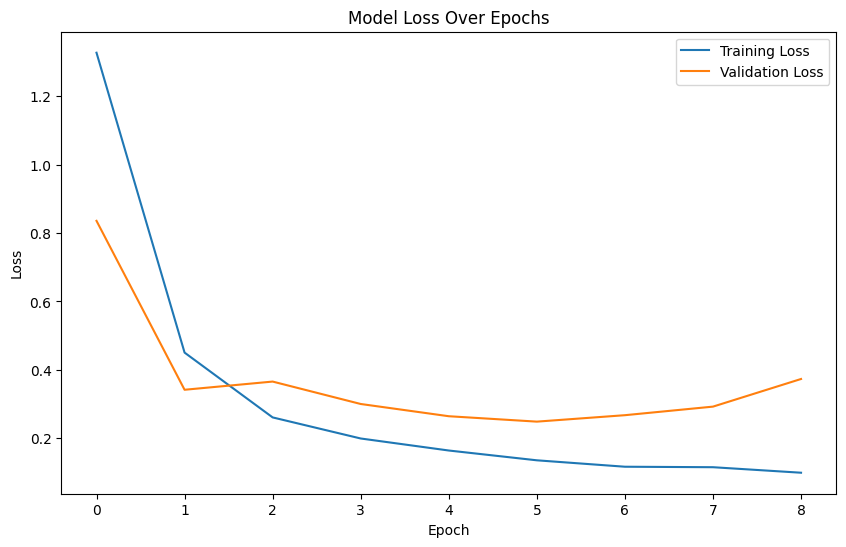

In [28]:
plot_loss(history_LSTM)

#### Evaluation

In [29]:
evaluation(model_LSTM,X_test_padded, df_test.label)


 1/63 [..............................] - ETA: 1:51


 3/63 [>.............................] - ETA: 1s  


 5/63 [=>............................] - ETA: 1s


 7/63 [==>...........................] - ETA: 1s


 9/63 [===>..........................] - ETA: 1s


11/63 [====>.........................] - ETA: 1s


13/63 [=====>........................] - ETA: 1s


15/63 [======>.......................] - ETA: 1s


17/63 [=======>......................] - ETA: 1s


19/63 [========>.....................] - ETA: 1s


21/63 [=========>....................] - ETA: 1s


23/63 [=========>....................] - ETA: 1s


25/63 [==========>...................] - ETA: 1s


27/63 [===========>..................] - ETA: 0s


29/63 [============>.................] - ETA: 0s


31/63 [=============>................] - ETA: 0s


33/63 [==============>...............] - ETA: 0s


35/63 [===============>..............] - ETA: 0s


37/63 [================>.............] - ETA: 0s


39/63 [=================>............] - ETA: 0s


41/63 [==================>...........] - ETA: 0s


43/63 [===================>..........] - ETA: 0s


45/63 [====================>.........] - ETA: 0s


47/63 [=====================>........] - ETA: 0s


49/63 [======================>.......] - ETA: 0s


51/63 [=======================>......] - ETA: 0s


53/63 [========================>.....] - ETA: 0s


55/63 [=========================>....] - ETA: 0s


57/63 [==========================>...] - ETA: 0s


59/63 [===========================>..] - ETA: 0s


61/63 [============================>.] - ETA: 0s


63/63 [==============================] - 3s 26ms/step


              precision    recall  f1-score   support

       anger       0.89      0.93      0.91       275
        fear       0.88      0.93      0.91       224
         joy       0.95      0.90      0.92       695
        love       0.70      0.91      0.79       159
     sadness       0.99      0.91      0.95       581
    surprise       0.75      0.79      0.77        66

    accuracy                           0.91      2000
   macro avg       0.86      0.90      0.88      2000
weighted avg       0.92      0.91      0.91      2000



## Model--Fine tuned Bert

In [30]:
from transformers import TFBertModel, BertTokenizerFast
import tensorflow as tf

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
token_lens = []
for txt in df_train.text.values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len = np.max(token_lens)

def tokenize(data, max_len=max_len):
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

train_input_ids, train_attention_masks = tokenize(df_train.text, max_len)
val_input_ids, val_attention_masks = tokenize(df_validation.text, max_len)
test_input_ids, test_attention_masks = tokenize(df_test.text, max_len)




/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/usr/local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [31]:
def create_model(bert_model, max_len):
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss_function = tf.keras.losses.CategoricalCrossentropy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    embeddings = bert_model([input_ids, attention_masks])[1]

    output = tf.keras.layers.Dense(6, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    model.compile(optimizer, loss=loss_function, metrics=['accuracy'])

    return model



In [32]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
model_BERT = create_model(bert_model, max_len)
model_BERT.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).


All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"


__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     


 input_1 (InputLayer)           [(None, 69)]         0           []                               


 input_2 (InputLayer)           [(None, 69)]         0           []                               


 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                


                                thPoolingAndCrossAt               'input_2[0][0]']                


                                tentions(last_hidde                                               


                                n_state=(None, 69,                                                


                                768),                                                             


                                 pooler_output=(Non                                               


                                e, 768),                                                          


                                 past_key_values=No                                               


                                ne, hidden_states=N                                               


                                one, attentions=Non                                               


                                e, cross_attentions                                               


                                =None)                                                            


 dense_6 (Dense)                (None, 6)            4614        ['tf_bert_model[0][1]']          


Total params: 109,486,854


Trainable params: 109,486,854


Non-trainable params: 0


__________________________________________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping, LearningRateScheduler, CallbackList, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_bert = model_BERT.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=6,
    batch_size=64,callbacks=[early_stopping],class_weight = class_weight_dict
)




Epoch 1/6



  1/250 [..............................] - ETA: 2:05:18 - loss: 1.8881 - accuracy: 0.1875


  2/250 [..............................] - ETA: 16:38 - loss: 1.8650 - accuracy: 0.1484  


  3/250 [..............................] - ETA: 15:57 - loss: 1.7703 - accuracy: 0.1615


  4/250 [..............................] - ETA: 16:09 - loss: 1.7344 - accuracy: 0.1562


  5/250 [..............................] - ETA: 16:08 - loss: 1.7283 - accuracy: 0.1500


  6/250 [..............................] - ETA: 15:59 - loss: 1.7498 - accuracy: 0.1589


  7/250 [..............................] - ETA: 16:02 - loss: 1.7376 - accuracy: 0.1786


  8/250 [..............................] - ETA: 15:59 - loss: 1.7435 - accuracy: 0.1934


  9/250 [>.............................] - ETA: 15:52 - loss: 1.7708 - accuracy: 0.1892


 10/250 [>.............................] - ETA: 15:47 - loss: 1.7678 - accuracy: 0.1797


 11/250 [>.............................] - ETA: 15:39 - loss: 1.7594 - accuracy: 0.1903


 12/250 [>.............................] - ETA: 15:35 - loss: 1.7443 - accuracy: 0.1940


 13/250 [>.............................] - ETA: 15:31 - loss: 1.7413 - accuracy: 0.1899


 14/250 [>.............................] - ETA: 15:24 - loss: 1.7549 - accuracy: 0.1886


 15/250 [>.............................] - ETA: 15:19 - loss: 1.7570 - accuracy: 0.1927


 16/250 [>.............................] - ETA: 15:18 - loss: 1.7764 - accuracy: 0.1914


 17/250 [=>............................] - ETA: 15:10 - loss: 1.7668 - accuracy: 0.1939


 18/250 [=>............................] - ETA: 15:06 - loss: 1.7687 - accuracy: 0.1910


 19/250 [=>............................] - ETA: 14:59 - loss: 1.7686 - accuracy: 0.1867


 20/250 [=>............................] - ETA: 14:56 - loss: 1.7672 - accuracy: 0.1859


 21/250 [=>............................] - ETA: 14:52 - loss: 1.7551 - accuracy: 0.1868


 22/250 [=>............................] - ETA: 14:47 - loss: 1.7530 - accuracy: 0.1868


 23/250 [=>............................] - ETA: 14:43 - loss: 1.7493 - accuracy: 0.1895


 24/250 [=>............................] - ETA: 14:38 - loss: 1.7528 - accuracy: 0.1927


 25/250 [==>...........................] - ETA: 14:32 - loss: 1.7307 - accuracy: 0.2013


 26/250 [==>...........................] - ETA: 14:28 - loss: 1.7306 - accuracy: 0.2133


 27/250 [==>...........................] - ETA: 14:24 - loss: 1.7218 - accuracy: 0.2251


 28/250 [==>...........................] - ETA: 14:20 - loss: 1.7158 - accuracy: 0.2277


 29/250 [==>...........................] - ETA: 14:15 - loss: 1.7077 - accuracy: 0.2301


 30/250 [==>...........................] - ETA: 14:10 - loss: 1.6958 - accuracy: 0.2417


 31/250 [==>...........................] - ETA: 14:04 - loss: 1.6791 - accuracy: 0.2475


 32/250 [==>...........................] - ETA: 14:00 - loss: 1.6684 - accuracy: 0.2554


 33/250 [==>...........................] - ETA: 13:56 - loss: 1.6576 - accuracy: 0.2604


 34/250 [===>..........................] - ETA: 13:53 - loss: 1.6457 - accuracy: 0.2684


 35/250 [===>..........................] - ETA: 13:49 - loss: 1.6299 - accuracy: 0.2763


 36/250 [===>..........................] - ETA: 13:45 - loss: 1.6148 - accuracy: 0.2865


 37/250 [===>..........................] - ETA: 13:41 - loss: 1.5972 - accuracy: 0.2986


 38/250 [===>..........................] - ETA: 13:35 - loss: 1.5893 - accuracy: 0.3055


 39/250 [===>..........................] - ETA: 13:31 - loss: 1.5765 - accuracy: 0.3089


 40/250 [===>..........................] - ETA: 13:27 - loss: 1.5667 - accuracy: 0.3129


 41/250 [===>..........................] - ETA: 13:22 - loss: 1.5519 - accuracy: 0.3175


 42/250 [====>.........................] - ETA: 13:17 - loss: 1.5353 - accuracy: 0.3214


 43/250 [====>.........................] - ETA: 13:12 - loss: 1.5293 - accuracy: 0.3289


 44/250 [====>.........................] - ETA: 13:09 - loss: 1.5179 - accuracy: 0.3377


 45/250 [====>.........................] - ETA: 13:05 - loss: 1.5034 - accuracy: 0.3462


 46/250 [====>.........................] - ETA: 13:01 - loss: 1.4868 - accuracy: 0.3560


 47/250 [====>.........................] - ETA: 12:57 - loss: 1.4695 - accuracy: 0.3654


 48/250 [====>.........................] - ETA: 12:53 - loss: 1.4563 - accuracy: 0.3714


 49/250 [====>.........................] - ETA: 12:49 - loss: 1.4409 - accuracy: 0.3769


 50/250 [=====>........................] - ETA: 12:44 - loss: 1.4303 - accuracy: 0.3819


 51/250 [=====>........................] - ETA: 12:40 - loss: 1.4188 - accuracy: 0.3894


 52/250 [=====>........................] - ETA: 12:36 - loss: 1.4093 - accuracy: 0.3948


 53/250 [=====>........................] - ETA: 12:32 - loss: 1.3937 - accuracy: 0.4012


 54/250 [=====>........................] - ETA: 12:27 - loss: 1.3792 - accuracy: 0.4065


 55/250 [=====>........................] - ETA: 12:22 - loss: 1.3639 - accuracy: 0.4142


 56/250 [=====>........................] - ETA: 12:17 - loss: 1.3568 - accuracy: 0.4182


 57/250 [=====>........................] - ETA: 12:13 - loss: 1.3446 - accuracy: 0.4249


 58/250 [=====>........................] - ETA: 12:09 - loss: 1.3302 - accuracy: 0.4310


 59/250 [======>.......................] - ETA: 12:04 - loss: 1.3170 - accuracy: 0.4375


 60/250 [======>.......................] - ETA: 12:00 - loss: 1.3062 - accuracy: 0.4430


 61/250 [======>.......................] - ETA: 11:55 - loss: 1.3011 - accuracy: 0.4475


 62/250 [======>.......................] - ETA: 11:52 - loss: 1.2938 - accuracy: 0.4514


 63/250 [======>.......................] - ETA: 11:48 - loss: 1.2798 - accuracy: 0.4573


 64/250 [======>.......................] - ETA: 11:45 - loss: 1.2685 - accuracy: 0.4619


 65/250 [======>.......................] - ETA: 11:41 - loss: 1.2554 - accuracy: 0.4678


 66/250 [======>.......................] - ETA: 11:36 - loss: 1.2430 - accuracy: 0.4737


 67/250 [=======>......................] - ETA: 11:32 - loss: 1.2301 - accuracy: 0.4797


 68/250 [=======>......................] - ETA: 11:27 - loss: 1.2226 - accuracy: 0.4841


 69/250 [=======>......................] - ETA: 11:23 - loss: 1.2089 - accuracy: 0.4896


 70/250 [=======>......................] - ETA: 11:19 - loss: 1.2010 - accuracy: 0.4940


 71/250 [=======>......................] - ETA: 11:14 - loss: 1.1924 - accuracy: 0.4978


 72/250 [=======>......................] - ETA: 11:10 - loss: 1.1814 - accuracy: 0.5015


 73/250 [=======>......................] - ETA: 11:06 - loss: 1.1719 - accuracy: 0.5060


 74/250 [=======>......................] - ETA: 11:02 - loss: 1.1642 - accuracy: 0.5103


 75/250 [========>.....................] - ETA: 10:58 - loss: 1.1551 - accuracy: 0.5140


 76/250 [========>.....................] - ETA: 10:54 - loss: 1.1465 - accuracy: 0.5173


 77/250 [========>.....................] - ETA: 10:50 - loss: 1.1400 - accuracy: 0.5203


 78/250 [========>.....................] - ETA: 10:46 - loss: 1.1337 - accuracy: 0.5248


 79/250 [========>.....................] - ETA: 10:42 - loss: 1.1266 - accuracy: 0.5279


 80/250 [========>.....................] - ETA: 10:38 - loss: 1.1178 - accuracy: 0.5318


 81/250 [========>.....................] - ETA: 10:34 - loss: 1.1111 - accuracy: 0.5351


 82/250 [========>.....................] - ETA: 10:30 - loss: 1.1036 - accuracy: 0.5377


 83/250 [========>.....................] - ETA: 10:26 - loss: 1.0973 - accuracy: 0.5403


 84/250 [=========>....................] - ETA: 10:22 - loss: 1.0889 - accuracy: 0.5439


 85/250 [=========>....................] - ETA: 10:18 - loss: 1.0805 - accuracy: 0.5482


 86/250 [=========>....................] - ETA: 10:14 - loss: 1.0749 - accuracy: 0.5503


 87/250 [=========>....................] - ETA: 10:10 - loss: 1.0663 - accuracy: 0.5539


 88/250 [=========>....................] - ETA: 10:06 - loss: 1.0595 - accuracy: 0.5570


 89/250 [=========>....................] - ETA: 10:02 - loss: 1.0505 - accuracy: 0.5613


 90/250 [=========>....................] - ETA: 9:58 - loss: 1.0454 - accuracy: 0.5641 


 91/250 [=========>....................] - ETA: 9:55 - loss: 1.0387 - accuracy: 0.5663


 92/250 [==========>...................] - ETA: 9:50 - loss: 1.0310 - accuracy: 0.5691


 93/250 [==========>...................] - ETA: 9:46 - loss: 1.0255 - accuracy: 0.5722


 94/250 [==========>...................] - ETA: 9:43 - loss: 1.0214 - accuracy: 0.5748


 95/250 [==========>...................] - ETA: 9:39 - loss: 1.0147 - accuracy: 0.5780


 96/250 [==========>...................] - ETA: 9:35 - loss: 1.0090 - accuracy: 0.5802


 97/250 [==========>...................] - ETA: 9:31 - loss: 1.0023 - accuracy: 0.5831


 98/250 [==========>...................] - ETA: 9:27 - loss: 0.9958 - accuracy: 0.5863


 99/250 [==========>...................] - ETA: 9:24 - loss: 0.9890 - accuracy: 0.5893


100/250 [===========>..................] - ETA: 9:20 - loss: 0.9848 - accuracy: 0.5917


101/250 [===========>..................] - ETA: 9:16 - loss: 0.9800 - accuracy: 0.5941


102/250 [===========>..................] - ETA: 9:12 - loss: 0.9751 - accuracy: 0.5965


103/250 [===========>..................] - ETA: 9:08 - loss: 0.9680 - accuracy: 0.5994


104/250 [===========>..................] - ETA: 9:04 - loss: 0.9618 - accuracy: 0.6023


105/250 [===========>..................] - ETA: 9:00 - loss: 0.9560 - accuracy: 0.6048


106/250 [===========>..................] - ETA: 8:57 - loss: 0.9503 - accuracy: 0.6070


107/250 [===========>..................] - ETA: 8:53 - loss: 0.9439 - accuracy: 0.6097


108/250 [===========>..................] - ETA: 8:49 - loss: 0.9374 - accuracy: 0.6120


109/250 [============>.................] - ETA: 8:45 - loss: 0.9321 - accuracy: 0.6145


110/250 [============>.................] - ETA: 8:41 - loss: 0.9264 - accuracy: 0.6172


111/250 [============>.................] - ETA: 8:37 - loss: 0.9215 - accuracy: 0.6194


112/250 [============>.................] - ETA: 8:33 - loss: 0.9167 - accuracy: 0.6215


113/250 [============>.................] - ETA: 8:29 - loss: 0.9121 - accuracy: 0.6238


114/250 [============>.................] - ETA: 8:25 - loss: 0.9065 - accuracy: 0.6258


115/250 [============>.................] - ETA: 8:21 - loss: 0.9017 - accuracy: 0.6281


116/250 [============>.................] - ETA: 8:17 - loss: 0.8956 - accuracy: 0.6305


117/250 [=============>................] - ETA: 8:13 - loss: 0.8902 - accuracy: 0.6330


118/250 [=============>................] - ETA: 8:10 - loss: 0.8851 - accuracy: 0.6353


119/250 [=============>................] - ETA: 8:06 - loss: 0.8814 - accuracy: 0.6372


120/250 [=============>................] - ETA: 8:02 - loss: 0.8763 - accuracy: 0.6395


121/250 [=============>................] - ETA: 7:59 - loss: 0.8720 - accuracy: 0.6417


122/250 [=============>................] - ETA: 7:55 - loss: 0.8673 - accuracy: 0.6437


123/250 [=============>................] - ETA: 7:51 - loss: 0.8628 - accuracy: 0.6457


124/250 [=============>................] - ETA: 7:47 - loss: 0.8592 - accuracy: 0.6477


125/250 [==============>...............] - ETA: 7:43 - loss: 0.8550 - accuracy: 0.6499


126/250 [==============>...............] - ETA: 7:39 - loss: 0.8505 - accuracy: 0.6518


127/250 [==============>...............] - ETA: 7:35 - loss: 0.8456 - accuracy: 0.6540


128/250 [==============>...............] - ETA: 7:31 - loss: 0.8458 - accuracy: 0.6552


129/250 [==============>...............] - ETA: 7:28 - loss: 0.8416 - accuracy: 0.6564


130/250 [==============>...............] - ETA: 7:24 - loss: 0.8374 - accuracy: 0.6584


131/250 [==============>...............] - ETA: 7:20 - loss: 0.8328 - accuracy: 0.6602


132/250 [==============>...............] - ETA: 7:16 - loss: 0.8295 - accuracy: 0.6618


133/250 [==============>...............] - ETA: 7:13 - loss: 0.8274 - accuracy: 0.6633


134/250 [===============>..............] - ETA: 7:09 - loss: 0.8237 - accuracy: 0.6646


135/250 [===============>..............] - ETA: 7:05 - loss: 0.8186 - accuracy: 0.6668


136/250 [===============>..............] - ETA: 7:01 - loss: 0.8160 - accuracy: 0.6682


137/250 [===============>..............] - ETA: 6:57 - loss: 0.8124 - accuracy: 0.6697


138/250 [===============>..............] - ETA: 6:54 - loss: 0.8103 - accuracy: 0.6711


139/250 [===============>..............] - ETA: 6:50 - loss: 0.8074 - accuracy: 0.6728


140/250 [===============>..............] - ETA: 6:46 - loss: 0.8038 - accuracy: 0.6742


141/250 [===============>..............] - ETA: 6:42 - loss: 0.8019 - accuracy: 0.6752


142/250 [================>.............] - ETA: 6:38 - loss: 0.7978 - accuracy: 0.6768


143/250 [================>.............] - ETA: 6:35 - loss: 0.7951 - accuracy: 0.6776


144/250 [================>.............] - ETA: 6:31 - loss: 0.7908 - accuracy: 0.6791


145/250 [================>.............] - ETA: 6:27 - loss: 0.7871 - accuracy: 0.6806


146/250 [================>.............] - ETA: 6:23 - loss: 0.7843 - accuracy: 0.6817


147/250 [================>.............] - ETA: 6:20 - loss: 0.7814 - accuracy: 0.6827


148/250 [================>.............] - ETA: 6:16 - loss: 0.7791 - accuracy: 0.6837


149/250 [================>.............] - ETA: 6:12 - loss: 0.7760 - accuracy: 0.6851


150/250 [=================>............] - ETA: 6:08 - loss: 0.7730 - accuracy: 0.6861


151/250 [=================>............] - ETA: 6:05 - loss: 0.7707 - accuracy: 0.6876


152/250 [=================>............] - ETA: 6:01 - loss: 0.7676 - accuracy: 0.6889


153/250 [=================>............] - ETA: 5:57 - loss: 0.7641 - accuracy: 0.6901


154/250 [=================>............] - ETA: 5:53 - loss: 0.7603 - accuracy: 0.6916


155/250 [=================>............] - ETA: 5:50 - loss: 0.7571 - accuracy: 0.6930


156/250 [=================>............] - ETA: 5:46 - loss: 0.7541 - accuracy: 0.6942


157/250 [=================>............] - ETA: 5:42 - loss: 0.7510 - accuracy: 0.6955


158/250 [=================>............] - ETA: 5:38 - loss: 0.7494 - accuracy: 0.6963


159/250 [==================>...........] - ETA: 5:35 - loss: 0.7464 - accuracy: 0.6975


160/250 [==================>...........] - ETA: 5:31 - loss: 0.7435 - accuracy: 0.6988


161/250 [==================>...........] - ETA: 5:27 - loss: 0.7409 - accuracy: 0.6999


162/250 [==================>...........] - ETA: 5:23 - loss: 0.7378 - accuracy: 0.7013


163/250 [==================>...........] - ETA: 5:20 - loss: 0.7352 - accuracy: 0.7023


164/250 [==================>...........] - ETA: 5:16 - loss: 0.7322 - accuracy: 0.7034


165/250 [==================>...........] - ETA: 5:12 - loss: 0.7309 - accuracy: 0.7038


166/250 [==================>...........] - ETA: 5:08 - loss: 0.7276 - accuracy: 0.7050


167/250 [===================>..........] - ETA: 5:05 - loss: 0.7248 - accuracy: 0.7060


168/250 [===================>..........] - ETA: 5:01 - loss: 0.7238 - accuracy: 0.7068


169/250 [===================>..........] - ETA: 4:57 - loss: 0.7218 - accuracy: 0.7077


170/250 [===================>..........] - ETA: 4:53 - loss: 0.7200 - accuracy: 0.7087


171/250 [===================>..........] - ETA: 4:50 - loss: 0.7175 - accuracy: 0.7098


172/250 [===================>..........] - ETA: 4:46 - loss: 0.7150 - accuracy: 0.7108


173/250 [===================>..........] - ETA: 4:42 - loss: 0.7116 - accuracy: 0.7123


174/250 [===================>..........] - ETA: 4:39 - loss: 0.7091 - accuracy: 0.7132


175/250 [====================>.........] - ETA: 4:35 - loss: 0.7070 - accuracy: 0.7142


176/250 [====================>.........] - ETA: 4:31 - loss: 0.7053 - accuracy: 0.7147


177/250 [====================>.........] - ETA: 4:27 - loss: 0.7023 - accuracy: 0.7159


178/250 [====================>.........] - ETA: 4:24 - loss: 0.7012 - accuracy: 0.7166


179/250 [====================>.........] - ETA: 4:20 - loss: 0.6991 - accuracy: 0.7173


180/250 [====================>.........] - ETA: 4:16 - loss: 0.6966 - accuracy: 0.7185


181/250 [====================>.........] - ETA: 4:13 - loss: 0.6938 - accuracy: 0.7196


182/250 [====================>.........] - ETA: 4:09 - loss: 0.6916 - accuracy: 0.7206


183/250 [====================>.........] - ETA: 4:05 - loss: 0.6896 - accuracy: 0.7216


184/250 [=====================>........] - ETA: 4:01 - loss: 0.6885 - accuracy: 0.7220


185/250 [=====================>........] - ETA: 3:58 - loss: 0.6866 - accuracy: 0.7227


186/250 [=====================>........] - ETA: 3:54 - loss: 0.6847 - accuracy: 0.7236


187/250 [=====================>........] - ETA: 3:50 - loss: 0.6818 - accuracy: 0.7248


188/250 [=====================>........] - ETA: 3:47 - loss: 0.6793 - accuracy: 0.7259


189/250 [=====================>........] - ETA: 3:43 - loss: 0.6775 - accuracy: 0.7264


190/250 [=====================>........] - ETA: 3:39 - loss: 0.6748 - accuracy: 0.7278


191/250 [=====================>........] - ETA: 3:36 - loss: 0.6729 - accuracy: 0.7286


192/250 [======================>.......] - ETA: 3:32 - loss: 0.6714 - accuracy: 0.7292


193/250 [======================>.......] - ETA: 3:28 - loss: 0.6696 - accuracy: 0.7299


194/250 [======================>.......] - ETA: 3:25 - loss: 0.6672 - accuracy: 0.7308


195/250 [======================>.......] - ETA: 3:21 - loss: 0.6648 - accuracy: 0.7317


196/250 [======================>.......] - ETA: 3:17 - loss: 0.6622 - accuracy: 0.7326


197/250 [======================>.......] - ETA: 3:13 - loss: 0.6597 - accuracy: 0.7336


198/250 [======================>.......] - ETA: 3:10 - loss: 0.6579 - accuracy: 0.7345


199/250 [======================>.......] - ETA: 3:06 - loss: 0.6565 - accuracy: 0.7352


200/250 [=======================>......] - ETA: 3:02 - loss: 0.6546 - accuracy: 0.7358


201/250 [=======================>......] - ETA: 2:59 - loss: 0.6521 - accuracy: 0.7366


202/250 [=======================>......] - ETA: 2:55 - loss: 0.6500 - accuracy: 0.7375


203/250 [=======================>......] - ETA: 2:51 - loss: 0.6521 - accuracy: 0.7381


204/250 [=======================>......] - ETA: 2:48 - loss: 0.6511 - accuracy: 0.7385


205/250 [=======================>......] - ETA: 2:44 - loss: 0.6499 - accuracy: 0.7394


206/250 [=======================>......] - ETA: 2:40 - loss: 0.6475 - accuracy: 0.7405


207/250 [=======================>......] - ETA: 2:37 - loss: 0.6460 - accuracy: 0.7412


208/250 [=======================>......] - ETA: 2:33 - loss: 0.6442 - accuracy: 0.7418


209/250 [========================>.....] - ETA: 2:29 - loss: 0.6426 - accuracy: 0.7424


210/250 [========================>.....] - ETA: 2:26 - loss: 0.6409 - accuracy: 0.7430


211/250 [========================>.....] - ETA: 2:22 - loss: 0.6410 - accuracy: 0.7436


212/250 [========================>.....] - ETA: 2:18 - loss: 0.6400 - accuracy: 0.7439


213/250 [========================>.....] - ETA: 2:15 - loss: 0.6381 - accuracy: 0.7447


214/250 [========================>.....] - ETA: 2:11 - loss: 0.6370 - accuracy: 0.7452


215/250 [========================>.....] - ETA: 2:07 - loss: 0.6354 - accuracy: 0.7459


216/250 [========================>.....] - ETA: 2:04 - loss: 0.6335 - accuracy: 0.7465


217/250 [=========================>....] - ETA: 2:00 - loss: 0.6335 - accuracy: 0.7468


218/250 [=========================>....] - ETA: 1:56 - loss: 0.6314 - accuracy: 0.7476


219/250 [=========================>....] - ETA: 1:53 - loss: 0.6296 - accuracy: 0.7483


220/250 [=========================>....] - ETA: 1:49 - loss: 0.6284 - accuracy: 0.7489


221/250 [=========================>....] - ETA: 1:45 - loss: 0.6265 - accuracy: 0.7498


222/250 [=========================>....] - ETA: 1:42 - loss: 0.6257 - accuracy: 0.7501


223/250 [=========================>....] - ETA: 1:38 - loss: 0.6239 - accuracy: 0.7508


224/250 [=========================>....] - ETA: 1:34 - loss: 0.6224 - accuracy: 0.7515


225/250 [==========================>...] - ETA: 1:31 - loss: 0.6211 - accuracy: 0.7521


226/250 [==========================>...] - ETA: 1:27 - loss: 0.6197 - accuracy: 0.7528


227/250 [==========================>...] - ETA: 1:23 - loss: 0.6175 - accuracy: 0.7536


228/250 [==========================>...] - ETA: 1:20 - loss: 0.6157 - accuracy: 0.7542


229/250 [==========================>...] - ETA: 1:16 - loss: 0.6149 - accuracy: 0.7544


230/250 [==========================>...] - ETA: 1:12 - loss: 0.6134 - accuracy: 0.7550


231/250 [==========================>...] - ETA: 1:09 - loss: 0.6113 - accuracy: 0.7560


232/250 [==========================>...] - ETA: 1:05 - loss: 0.6104 - accuracy: 0.7563


233/250 [==========================>...] - ETA: 1:01 - loss: 0.6083 - accuracy: 0.7570


234/250 [===========================>..] - ETA: 58s - loss: 0.6071 - accuracy: 0.7576 


235/250 [===========================>..] - ETA: 54s - loss: 0.6055 - accuracy: 0.7584


236/250 [===========================>..] - ETA: 50s - loss: 0.6042 - accuracy: 0.7589


237/250 [===========================>..] - ETA: 47s - loss: 0.6028 - accuracy: 0.7593


238/250 [===========================>..] - ETA: 43s - loss: 0.6011 - accuracy: 0.7600


239/250 [===========================>..] - ETA: 39s - loss: 0.5997 - accuracy: 0.7605


240/250 [===========================>..] - ETA: 36s - loss: 0.5981 - accuracy: 0.7611


241/250 [===========================>..] - ETA: 32s - loss: 0.5965 - accuracy: 0.7618


242/250 [============================>.] - ETA: 29s - loss: 0.5958 - accuracy: 0.7621


243/250 [============================>.] - ETA: 25s - loss: 0.5949 - accuracy: 0.7627


244/250 [============================>.] - ETA: 21s - loss: 0.5933 - accuracy: 0.7634


245/250 [============================>.] - ETA: 18s - loss: 0.5923 - accuracy: 0.7639


246/250 [============================>.] - ETA: 14s - loss: 0.5921 - accuracy: 0.7644


247/250 [============================>.] - ETA: 10s - loss: 0.5905 - accuracy: 0.7650


248/250 [============================>.] - ETA: 7s - loss: 0.5889 - accuracy: 0.7655 


249/250 [============================>.] - ETA: 3s - loss: 0.5872 - accuracy: 0.7661


250/250 [==============================] - ETA: 0s - loss: 0.5869 - accuracy: 0.7660


250/250 [==============================] - 968s 4s/step - loss: 0.5869 - accuracy: 0.7660 - val_loss: 0.2634 - val_accuracy: 0.9080


Epoch 2/6



  1/250 [..............................] - ETA: 13:54 - loss: 0.2046 - accuracy: 0.8750


  2/250 [..............................] - ETA: 14:27 - loss: 0.1888 - accuracy: 0.8906


  3/250 [..............................] - ETA: 14:09 - loss: 0.2046 - accuracy: 0.8958


  4/250 [..............................] - ETA: 14:20 - loss: 0.2742 - accuracy: 0.9023


  5/250 [..............................] - ETA: 14:15 - loss: 0.2599 - accuracy: 0.9031


  6/250 [..............................] - ETA: 14:16 - loss: 0.2377 - accuracy: 0.9115


  7/250 [..............................] - ETA: 14:16 - loss: 0.2261 - accuracy: 0.9129


  8/250 [..............................] - ETA: 14:09 - loss: 0.2257 - accuracy: 0.9121


  9/250 [>.............................] - ETA: 14:07 - loss: 0.2500 - accuracy: 0.9062


 10/250 [>.............................] - ETA: 14:01 - loss: 0.2343 - accuracy: 0.9141


 11/250 [>.............................] - ETA: 13:56 - loss: 0.2294 - accuracy: 0.9134


 12/250 [>.............................] - ETA: 13:56 - loss: 0.2283 - accuracy: 0.9128


 13/250 [>.............................] - ETA: 13:50 - loss: 0.2285 - accuracy: 0.9123


 14/250 [>.............................] - ETA: 13:41 - loss: 0.2308 - accuracy: 0.9085


 15/250 [>.............................] - ETA: 13:37 - loss: 0.2321 - accuracy: 0.9073


 16/250 [>.............................] - ETA: 13:32 - loss: 0.2233 - accuracy: 0.9102


 17/250 [=>............................] - ETA: 13:30 - loss: 0.2224 - accuracy: 0.9118


 18/250 [=>............................] - ETA: 13:25 - loss: 0.2220 - accuracy: 0.9123


 19/250 [=>............................] - ETA: 13:23 - loss: 0.2199 - accuracy: 0.9137


 20/250 [=>............................] - ETA: 13:20 - loss: 0.2238 - accuracy: 0.9133


 21/250 [=>............................] - ETA: 13:18 - loss: 0.2299 - accuracy: 0.9115


 22/250 [=>............................] - ETA: 13:17 - loss: 0.2268 - accuracy: 0.9126


 23/250 [=>............................] - ETA: 13:11 - loss: 0.2253 - accuracy: 0.9124


 24/250 [=>............................] - ETA: 13:07 - loss: 0.2269 - accuracy: 0.9121


 25/250 [==>...........................] - ETA: 13:05 - loss: 0.2283 - accuracy: 0.9112


 26/250 [==>...........................] - ETA: 13:01 - loss: 0.2276 - accuracy: 0.9099


 27/250 [==>...........................] - ETA: 12:57 - loss: 0.2332 - accuracy: 0.9080


 28/250 [==>...........................] - ETA: 12:53 - loss: 0.2326 - accuracy: 0.9079


 29/250 [==>...........................] - ETA: 12:50 - loss: 0.2262 - accuracy: 0.9106


 30/250 [==>...........................] - ETA: 12:45 - loss: 0.2281 - accuracy: 0.9089


 31/250 [==>...........................] - ETA: 12:40 - loss: 0.2277 - accuracy: 0.9093


 32/250 [==>...........................] - ETA: 12:36 - loss: 0.2296 - accuracy: 0.9082


 33/250 [==>...........................] - ETA: 12:32 - loss: 0.2274 - accuracy: 0.9086


 34/250 [===>..........................] - ETA: 12:29 - loss: 0.2234 - accuracy: 0.9099


 35/250 [===>..........................] - ETA: 12:25 - loss: 0.2213 - accuracy: 0.9112


 36/250 [===>..........................] - ETA: 12:20 - loss: 0.2231 - accuracy: 0.9119


 37/250 [===>..........................] - ETA: 12:18 - loss: 0.2229 - accuracy: 0.9126


 38/250 [===>..........................] - ETA: 12:15 - loss: 0.2222 - accuracy: 0.9124


 39/250 [===>..........................] - ETA: 12:11 - loss: 0.2217 - accuracy: 0.9123


 40/250 [===>..........................] - ETA: 12:07 - loss: 0.2225 - accuracy: 0.9109


 41/250 [===>..........................] - ETA: 12:04 - loss: 0.2209 - accuracy: 0.9116


 42/250 [====>.........................] - ETA: 12:00 - loss: 0.2182 - accuracy: 0.9118


 43/250 [====>.........................] - ETA: 11:57 - loss: 0.2178 - accuracy: 0.9124


 44/250 [====>.........................] - ETA: 11:54 - loss: 0.2164 - accuracy: 0.9130


 45/250 [====>.........................] - ETA: 11:50 - loss: 0.2202 - accuracy: 0.9125


 46/250 [====>.........................] - ETA: 11:45 - loss: 0.2172 - accuracy: 0.9134


 47/250 [====>.........................] - ETA: 11:41 - loss: 0.2149 - accuracy: 0.9142


 48/250 [====>.........................] - ETA: 11:38 - loss: 0.2130 - accuracy: 0.9150


 49/250 [====>.........................] - ETA: 11:35 - loss: 0.2113 - accuracy: 0.9152


 50/250 [=====>........................] - ETA: 11:32 - loss: 0.2102 - accuracy: 0.9156


 51/250 [=====>........................] - ETA: 11:29 - loss: 0.2147 - accuracy: 0.9145


 52/250 [=====>........................] - ETA: 11:25 - loss: 0.2175 - accuracy: 0.9144


 53/250 [=====>........................] - ETA: 11:21 - loss: 0.2183 - accuracy: 0.9139


 54/250 [=====>........................] - ETA: 11:18 - loss: 0.2158 - accuracy: 0.9149


 55/250 [=====>........................] - ETA: 11:15 - loss: 0.2168 - accuracy: 0.9151


 56/250 [=====>........................] - ETA: 11:12 - loss: 0.2146 - accuracy: 0.9157


 57/250 [=====>........................] - ETA: 11:09 - loss: 0.2154 - accuracy: 0.9158


 58/250 [=====>........................] - ETA: 11:05 - loss: 0.2158 - accuracy: 0.9154


 59/250 [======>.......................] - ETA: 11:02 - loss: 0.2191 - accuracy: 0.9142


 60/250 [======>.......................] - ETA: 10:58 - loss: 0.2187 - accuracy: 0.9143


 61/250 [======>.......................] - ETA: 10:54 - loss: 0.2174 - accuracy: 0.9150


 62/250 [======>.......................] - ETA: 10:52 - loss: 0.2185 - accuracy: 0.9156


 63/250 [======>.......................] - ETA: 10:48 - loss: 0.2196 - accuracy: 0.9144


 64/250 [======>.......................] - ETA: 10:45 - loss: 0.2198 - accuracy: 0.9141


 65/250 [======>.......................] - ETA: 10:41 - loss: 0.2189 - accuracy: 0.9137


 66/250 [======>.......................] - ETA: 10:38 - loss: 0.2183 - accuracy: 0.9134


 67/250 [=======>......................] - ETA: 10:34 - loss: 0.2173 - accuracy: 0.9135


 68/250 [=======>......................] - ETA: 10:31 - loss: 0.2168 - accuracy: 0.9136


 69/250 [=======>......................] - ETA: 10:28 - loss: 0.2161 - accuracy: 0.9133


 70/250 [=======>......................] - ETA: 10:24 - loss: 0.2171 - accuracy: 0.9132


 71/250 [=======>......................] - ETA: 10:20 - loss: 0.2152 - accuracy: 0.9137


 72/250 [=======>......................] - ETA: 10:16 - loss: 0.2134 - accuracy: 0.9143


 73/250 [=======>......................] - ETA: 10:13 - loss: 0.2129 - accuracy: 0.9140


 74/250 [=======>......................] - ETA: 10:09 - loss: 0.2141 - accuracy: 0.9136


 75/250 [========>.....................] - ETA: 10:06 - loss: 0.2138 - accuracy: 0.9140


 76/250 [========>.....................] - ETA: 10:02 - loss: 0.2150 - accuracy: 0.9139


 77/250 [========>.....................] - ETA: 9:58 - loss: 0.2147 - accuracy: 0.9144 


 78/250 [========>.....................] - ETA: 9:55 - loss: 0.2135 - accuracy: 0.9143


 79/250 [========>.....................] - ETA: 9:51 - loss: 0.2133 - accuracy: 0.9142


 80/250 [========>.....................] - ETA: 9:47 - loss: 0.2141 - accuracy: 0.9137


 81/250 [========>.....................] - ETA: 9:44 - loss: 0.2149 - accuracy: 0.9136


 82/250 [========>.....................] - ETA: 9:41 - loss: 0.2161 - accuracy: 0.9129


 83/250 [========>.....................] - ETA: 9:37 - loss: 0.2185 - accuracy: 0.9125


 84/250 [=========>....................] - ETA: 9:33 - loss: 0.2178 - accuracy: 0.9131


 85/250 [=========>....................] - ETA: 9:30 - loss: 0.2172 - accuracy: 0.9136


 86/250 [=========>....................] - ETA: 9:26 - loss: 0.2167 - accuracy: 0.9137


 87/250 [=========>....................] - ETA: 9:23 - loss: 0.2166 - accuracy: 0.9136


 88/250 [=========>....................] - ETA: 9:19 - loss: 0.2164 - accuracy: 0.9137


 89/250 [=========>....................] - ETA: 9:16 - loss: 0.2163 - accuracy: 0.9138


 90/250 [=========>....................] - ETA: 9:13 - loss: 0.2152 - accuracy: 0.9141


 91/250 [=========>....................] - ETA: 9:09 - loss: 0.2153 - accuracy: 0.9138


 92/250 [==========>...................] - ETA: 9:05 - loss: 0.2153 - accuracy: 0.9139


 93/250 [==========>...................] - ETA: 9:02 - loss: 0.2142 - accuracy: 0.9140


 94/250 [==========>...................] - ETA: 8:58 - loss: 0.2140 - accuracy: 0.9136


 95/250 [==========>...................] - ETA: 8:55 - loss: 0.2141 - accuracy: 0.9138


 96/250 [==========>...................] - ETA: 8:51 - loss: 0.2156 - accuracy: 0.9132


 97/250 [==========>...................] - ETA: 8:48 - loss: 0.2165 - accuracy: 0.9130


 98/250 [==========>...................] - ETA: 8:45 - loss: 0.2161 - accuracy: 0.9131


 99/250 [==========>...................] - ETA: 8:41 - loss: 0.2159 - accuracy: 0.9129


100/250 [===========>..................] - ETA: 8:37 - loss: 0.2142 - accuracy: 0.9136


101/250 [===========>..................] - ETA: 8:33 - loss: 0.2142 - accuracy: 0.9137


102/250 [===========>..................] - ETA: 8:30 - loss: 0.2139 - accuracy: 0.9138


103/250 [===========>..................] - ETA: 8:26 - loss: 0.2133 - accuracy: 0.9137


104/250 [===========>..................] - ETA: 8:23 - loss: 0.2131 - accuracy: 0.9138


105/250 [===========>..................] - ETA: 8:19 - loss: 0.2123 - accuracy: 0.9140


106/250 [===========>..................] - ETA: 8:16 - loss: 0.2115 - accuracy: 0.9142


107/250 [===========>..................] - ETA: 8:12 - loss: 0.2110 - accuracy: 0.9143


108/250 [===========>..................] - ETA: 8:09 - loss: 0.2111 - accuracy: 0.9142


109/250 [============>.................] - ETA: 8:05 - loss: 0.2105 - accuracy: 0.9143


110/250 [============>.................] - ETA: 8:02 - loss: 0.2102 - accuracy: 0.9143


111/250 [============>.................] - ETA: 7:58 - loss: 0.2093 - accuracy: 0.9148


112/250 [============>.................] - ETA: 7:55 - loss: 0.2092 - accuracy: 0.9149


113/250 [============>.................] - ETA: 7:51 - loss: 0.2094 - accuracy: 0.9150


114/250 [============>.................] - ETA: 7:48 - loss: 0.2086 - accuracy: 0.9153


115/250 [============>.................] - ETA: 7:44 - loss: 0.2082 - accuracy: 0.9154


116/250 [============>.................] - ETA: 7:41 - loss: 0.2077 - accuracy: 0.9153


117/250 [=============>................] - ETA: 7:38 - loss: 0.2067 - accuracy: 0.9157


118/250 [=============>................] - ETA: 7:34 - loss: 0.2073 - accuracy: 0.9158


119/250 [=============>................] - ETA: 7:31 - loss: 0.2068 - accuracy: 0.9157


120/250 [=============>................] - ETA: 7:27 - loss: 0.2063 - accuracy: 0.9158


121/250 [=============>................] - ETA: 7:24 - loss: 0.2071 - accuracy: 0.9159


122/250 [=============>................] - ETA: 7:20 - loss: 0.2066 - accuracy: 0.9161


123/250 [=============>................] - ETA: 7:16 - loss: 0.2068 - accuracy: 0.9158


124/250 [=============>................] - ETA: 7:13 - loss: 0.2072 - accuracy: 0.9153


125/250 [==============>...............] - ETA: 7:10 - loss: 0.2061 - accuracy: 0.9159


126/250 [==============>...............] - ETA: 7:06 - loss: 0.2064 - accuracy: 0.9156


127/250 [==============>...............] - ETA: 7:03 - loss: 0.2062 - accuracy: 0.9156


128/250 [==============>...............] - ETA: 6:59 - loss: 0.2064 - accuracy: 0.9153


129/250 [==============>...............] - ETA: 6:56 - loss: 0.2066 - accuracy: 0.9150


130/250 [==============>...............] - ETA: 6:52 - loss: 0.2069 - accuracy: 0.9148


131/250 [==============>...............] - ETA: 6:49 - loss: 0.2065 - accuracy: 0.9148


132/250 [==============>...............] - ETA: 6:45 - loss: 0.2069 - accuracy: 0.9145


133/250 [==============>...............] - ETA: 6:42 - loss: 0.2076 - accuracy: 0.9142


134/250 [===============>..............] - ETA: 6:39 - loss: 0.2066 - accuracy: 0.9146


135/250 [===============>..............] - ETA: 6:35 - loss: 0.2056 - accuracy: 0.9150


136/250 [===============>..............] - ETA: 6:32 - loss: 0.2079 - accuracy: 0.9150


137/250 [===============>..............] - ETA: 6:28 - loss: 0.2080 - accuracy: 0.9149


138/250 [===============>..............] - ETA: 6:25 - loss: 0.2084 - accuracy: 0.9147


139/250 [===============>..............] - ETA: 6:22 - loss: 0.2083 - accuracy: 0.9149


140/250 [===============>..............] - ETA: 6:18 - loss: 0.2085 - accuracy: 0.9153


141/250 [===============>..............] - ETA: 6:15 - loss: 0.2078 - accuracy: 0.9156


142/250 [================>.............] - ETA: 6:11 - loss: 0.2085 - accuracy: 0.9155


143/250 [================>.............] - ETA: 6:08 - loss: 0.2078 - accuracy: 0.9159


144/250 [================>.............] - ETA: 6:04 - loss: 0.2068 - accuracy: 0.9162


145/250 [================>.............] - ETA: 6:01 - loss: 0.2068 - accuracy: 0.9161


146/250 [================>.............] - ETA: 5:57 - loss: 0.2062 - accuracy: 0.9162


147/250 [================>.............] - ETA: 5:54 - loss: 0.2063 - accuracy: 0.9161


148/250 [================>.............] - ETA: 5:50 - loss: 0.2064 - accuracy: 0.9156


149/250 [================>.............] - ETA: 5:47 - loss: 0.2067 - accuracy: 0.9156


150/250 [=================>............] - ETA: 5:44 - loss: 0.2062 - accuracy: 0.9157


151/250 [=================>............] - ETA: 5:40 - loss: 0.2053 - accuracy: 0.9161


152/250 [=================>............] - ETA: 5:37 - loss: 0.2059 - accuracy: 0.9158


153/250 [=================>............] - ETA: 5:33 - loss: 0.2061 - accuracy: 0.9158


154/250 [=================>............] - ETA: 5:30 - loss: 0.2060 - accuracy: 0.9157


155/250 [=================>............] - ETA: 5:26 - loss: 0.2057 - accuracy: 0.9156


156/250 [=================>............] - ETA: 5:23 - loss: 0.2061 - accuracy: 0.9158


157/250 [=================>............] - ETA: 5:20 - loss: 0.2060 - accuracy: 0.9159


158/250 [=================>............] - ETA: 5:16 - loss: 0.2052 - accuracy: 0.9162


159/250 [==================>...........] - ETA: 5:13 - loss: 0.2062 - accuracy: 0.9157


160/250 [==================>...........] - ETA: 5:09 - loss: 0.2061 - accuracy: 0.9157


161/250 [==================>...........] - ETA: 5:06 - loss: 0.2069 - accuracy: 0.9156


162/250 [==================>...........] - ETA: 5:02 - loss: 0.2072 - accuracy: 0.9156


163/250 [==================>...........] - ETA: 4:59 - loss: 0.2066 - accuracy: 0.9159


164/250 [==================>...........] - ETA: 4:56 - loss: 0.2073 - accuracy: 0.9156


165/250 [==================>...........] - ETA: 4:52 - loss: 0.2064 - accuracy: 0.9159


166/250 [==================>...........] - ETA: 4:49 - loss: 0.2063 - accuracy: 0.9162


167/250 [===================>..........] - ETA: 4:45 - loss: 0.2081 - accuracy: 0.9158


168/250 [===================>..........] - ETA: 4:42 - loss: 0.2080 - accuracy: 0.9159


169/250 [===================>..........] - ETA: 4:38 - loss: 0.2070 - accuracy: 0.9164


170/250 [===================>..........] - ETA: 4:35 - loss: 0.2068 - accuracy: 0.9164


171/250 [===================>..........] - ETA: 4:31 - loss: 0.2071 - accuracy: 0.9162


172/250 [===================>..........] - ETA: 4:28 - loss: 0.2071 - accuracy: 0.9163


173/250 [===================>..........] - ETA: 4:24 - loss: 0.2069 - accuracy: 0.9164


174/250 [===================>..........] - ETA: 4:21 - loss: 0.2063 - accuracy: 0.9166


175/250 [====================>.........] - ETA: 4:18 - loss: 0.2064 - accuracy: 0.9167


176/250 [====================>.........] - ETA: 4:14 - loss: 0.2057 - accuracy: 0.9172


177/250 [====================>.........] - ETA: 4:11 - loss: 0.2051 - accuracy: 0.9175


178/250 [====================>.........] - ETA: 4:07 - loss: 0.2053 - accuracy: 0.9174


179/250 [====================>.........] - ETA: 4:04 - loss: 0.2062 - accuracy: 0.9170


180/250 [====================>.........] - ETA: 4:00 - loss: 0.2060 - accuracy: 0.9170


181/250 [====================>.........] - ETA: 3:57 - loss: 0.2064 - accuracy: 0.9169


182/250 [====================>.........] - ETA: 3:53 - loss: 0.2069 - accuracy: 0.9171


183/250 [====================>.........] - ETA: 3:50 - loss: 0.2073 - accuracy: 0.9168


184/250 [=====================>........] - ETA: 3:47 - loss: 0.2069 - accuracy: 0.9167


185/250 [=====================>........] - ETA: 3:43 - loss: 0.2077 - accuracy: 0.9166


186/250 [=====================>........] - ETA: 3:40 - loss: 0.2078 - accuracy: 0.9162


187/250 [=====================>........] - ETA: 3:36 - loss: 0.2071 - accuracy: 0.9164


188/250 [=====================>........] - ETA: 3:33 - loss: 0.2072 - accuracy: 0.9163


189/250 [=====================>........] - ETA: 3:29 - loss: 0.2074 - accuracy: 0.9161


190/250 [=====================>........] - ETA: 3:26 - loss: 0.2067 - accuracy: 0.9164


191/250 [=====================>........] - ETA: 3:22 - loss: 0.2062 - accuracy: 0.9166


192/250 [======================>.......] - ETA: 3:19 - loss: 0.2066 - accuracy: 0.9165


193/250 [======================>.......] - ETA: 3:16 - loss: 0.2065 - accuracy: 0.9165


194/250 [======================>.......] - ETA: 3:12 - loss: 0.2058 - accuracy: 0.9170


195/250 [======================>.......] - ETA: 3:09 - loss: 0.2059 - accuracy: 0.9170


196/250 [======================>.......] - ETA: 3:05 - loss: 0.2057 - accuracy: 0.9171


197/250 [======================>.......] - ETA: 3:02 - loss: 0.2053 - accuracy: 0.9172


198/250 [======================>.......] - ETA: 2:58 - loss: 0.2050 - accuracy: 0.9172


199/250 [======================>.......] - ETA: 2:55 - loss: 0.2049 - accuracy: 0.9170


200/250 [=======================>......] - ETA: 2:52 - loss: 0.2049 - accuracy: 0.9171


201/250 [=======================>......] - ETA: 2:48 - loss: 0.2046 - accuracy: 0.9170


202/250 [=======================>......] - ETA: 2:45 - loss: 0.2040 - accuracy: 0.9173


203/250 [=======================>......] - ETA: 2:41 - loss: 0.2043 - accuracy: 0.9169


204/250 [=======================>......] - ETA: 2:38 - loss: 0.2050 - accuracy: 0.9167


205/250 [=======================>......] - ETA: 2:35 - loss: 0.2050 - accuracy: 0.9166


206/250 [=======================>......] - ETA: 2:31 - loss: 0.2044 - accuracy: 0.9169


207/250 [=======================>......] - ETA: 2:28 - loss: 0.2043 - accuracy: 0.9170


208/250 [=======================>......] - ETA: 2:24 - loss: 0.2043 - accuracy: 0.9171


209/250 [========================>.....] - ETA: 2:21 - loss: 0.2042 - accuracy: 0.9170


210/250 [========================>.....] - ETA: 2:17 - loss: 0.2041 - accuracy: 0.9169


211/250 [========================>.....] - ETA: 2:14 - loss: 0.2035 - accuracy: 0.9172


212/250 [========================>.....] - ETA: 2:11 - loss: 0.2032 - accuracy: 0.9172


213/250 [========================>.....] - ETA: 2:07 - loss: 0.2028 - accuracy: 0.9173


214/250 [========================>.....] - ETA: 2:04 - loss: 0.2028 - accuracy: 0.9174


215/250 [========================>.....] - ETA: 2:00 - loss: 0.2027 - accuracy: 0.9175


216/250 [========================>.....] - ETA: 1:57 - loss: 0.2027 - accuracy: 0.9173


217/250 [=========================>....] - ETA: 1:53 - loss: 0.2028 - accuracy: 0.9171


218/250 [=========================>....] - ETA: 1:50 - loss: 0.2033 - accuracy: 0.9171


219/250 [=========================>....] - ETA: 1:47 - loss: 0.2026 - accuracy: 0.9175


220/250 [=========================>....] - ETA: 1:43 - loss: 0.2027 - accuracy: 0.9177


221/250 [=========================>....] - ETA: 1:40 - loss: 0.2029 - accuracy: 0.9176


222/250 [=========================>....] - ETA: 1:36 - loss: 0.2030 - accuracy: 0.9174


223/250 [=========================>....] - ETA: 1:33 - loss: 0.2033 - accuracy: 0.9170


224/250 [=========================>....] - ETA: 1:29 - loss: 0.2035 - accuracy: 0.9168


225/250 [==========================>...] - ETA: 1:26 - loss: 0.2034 - accuracy: 0.9167


226/250 [==========================>...] - ETA: 1:22 - loss: 0.2036 - accuracy: 0.9167


227/250 [==========================>...] - ETA: 1:19 - loss: 0.2032 - accuracy: 0.9169


228/250 [==========================>...] - ETA: 1:16 - loss: 0.2029 - accuracy: 0.9169


229/250 [==========================>...] - ETA: 1:12 - loss: 0.2028 - accuracy: 0.9168


230/250 [==========================>...] - ETA: 1:09 - loss: 0.2027 - accuracy: 0.9167


231/250 [==========================>...] - ETA: 1:05 - loss: 0.2030 - accuracy: 0.9166


232/250 [==========================>...] - ETA: 1:02 - loss: 0.2033 - accuracy: 0.9164


233/250 [==========================>...] - ETA: 58s - loss: 0.2032 - accuracy: 0.9165 


234/250 [===========================>..] - ETA: 55s - loss: 0.2034 - accuracy: 0.9165


235/250 [===========================>..] - ETA: 51s - loss: 0.2036 - accuracy: 0.9163


236/250 [===========================>..] - ETA: 48s - loss: 0.2039 - accuracy: 0.9161


237/250 [===========================>..] - ETA: 44s - loss: 0.2042 - accuracy: 0.9161


238/250 [===========================>..] - ETA: 41s - loss: 0.2039 - accuracy: 0.9162


239/250 [===========================>..] - ETA: 38s - loss: 0.2034 - accuracy: 0.9164


240/250 [===========================>..] - ETA: 34s - loss: 0.2036 - accuracy: 0.9162


241/250 [===========================>..] - ETA: 31s - loss: 0.2038 - accuracy: 0.9162


242/250 [============================>.] - ETA: 27s - loss: 0.2033 - accuracy: 0.9163


243/250 [============================>.] - ETA: 24s - loss: 0.2032 - accuracy: 0.9163


244/250 [============================>.] - ETA: 20s - loss: 0.2034 - accuracy: 0.9164


245/250 [============================>.] - ETA: 17s - loss: 0.2033 - accuracy: 0.9164


246/250 [============================>.] - ETA: 13s - loss: 0.2038 - accuracy: 0.9161


247/250 [============================>.] - ETA: 10s - loss: 0.2038 - accuracy: 0.9161


248/250 [============================>.] - ETA: 6s - loss: 0.2038 - accuracy: 0.9161 


249/250 [============================>.] - ETA: 3s - loss: 0.2034 - accuracy: 0.9162


250/250 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9162


250/250 [==============================] - 896s 4s/step - loss: 0.2033 - accuracy: 0.9162 - val_loss: 0.2113 - val_accuracy: 0.9235


Epoch 3/6



  1/250 [..............................] - ETA: 14:15 - loss: 0.1643 - accuracy: 0.9062


  2/250 [..............................] - ETA: 14:54 - loss: 0.1635 - accuracy: 0.9375


  3/250 [..............................] - ETA: 14:28 - loss: 0.1560 - accuracy: 0.9271


  4/250 [..............................] - ETA: 14:27 - loss: 0.1469 - accuracy: 0.9258


  5/250 [..............................] - ETA: 14:12 - loss: 0.1534 - accuracy: 0.9125


  6/250 [..............................] - ETA: 14:12 - loss: 0.1490 - accuracy: 0.9115


  7/250 [..............................] - ETA: 13:59 - loss: 0.1711 - accuracy: 0.9085


  8/250 [..............................] - ETA: 13:59 - loss: 0.1588 - accuracy: 0.9121


  9/250 [>.............................] - ETA: 13:58 - loss: 0.1641 - accuracy: 0.9149


 10/250 [>.............................] - ETA: 14:02 - loss: 0.1638 - accuracy: 0.9156


 11/250 [>.............................] - ETA: 13:57 - loss: 0.1586 - accuracy: 0.9162


 12/250 [>.............................] - ETA: 13:59 - loss: 0.1578 - accuracy: 0.9167


 13/250 [>.............................] - ETA: 13:51 - loss: 0.1500 - accuracy: 0.9207


 14/250 [>.............................] - ETA: 13:46 - loss: 0.1507 - accuracy: 0.9208


 15/250 [>.............................] - ETA: 13:41 - loss: 0.1481 - accuracy: 0.9219


 16/250 [>.............................] - ETA: 13:38 - loss: 0.1519 - accuracy: 0.9219


 17/250 [=>............................] - ETA: 13:38 - loss: 0.1508 - accuracy: 0.9228


 18/250 [=>............................] - ETA: 13:37 - loss: 0.1516 - accuracy: 0.9236


 19/250 [=>............................] - ETA: 13:35 - loss: 0.1499 - accuracy: 0.9235


 20/250 [=>............................] - ETA: 13:32 - loss: 0.1489 - accuracy: 0.9242


 21/250 [=>............................] - ETA: 13:30 - loss: 0.1498 - accuracy: 0.9241


 22/250 [=>............................] - ETA: 13:26 - loss: 0.1503 - accuracy: 0.9233


 23/250 [=>............................] - ETA: 13:23 - loss: 0.1511 - accuracy: 0.9232


 24/250 [=>............................] - ETA: 13:21 - loss: 0.1541 - accuracy: 0.9206


 25/250 [==>...........................] - ETA: 13:16 - loss: 0.1574 - accuracy: 0.9200


 26/250 [==>...........................] - ETA: 13:13 - loss: 0.1596 - accuracy: 0.9195


 27/250 [==>...........................] - ETA: 13:09 - loss: 0.1555 - accuracy: 0.9213


 28/250 [==>...........................] - ETA: 13:07 - loss: 0.1608 - accuracy: 0.9196


 29/250 [==>...........................] - ETA: 13:04 - loss: 0.1635 - accuracy: 0.9192


 30/250 [==>...........................] - ETA: 13:01 - loss: 0.1642 - accuracy: 0.9182


 31/250 [==>...........................] - ETA: 12:56 - loss: 0.1604 - accuracy: 0.9199


 32/250 [==>...........................] - ETA: 12:51 - loss: 0.1575 - accuracy: 0.9219


 33/250 [==>...........................] - ETA: 12:47 - loss: 0.1553 - accuracy: 0.9228


 34/250 [===>..........................] - ETA: 12:44 - loss: 0.1551 - accuracy: 0.9228


 35/250 [===>..........................] - ETA: 12:40 - loss: 0.1548 - accuracy: 0.9237


 36/250 [===>..........................] - ETA: 12:35 - loss: 0.1557 - accuracy: 0.9240


 37/250 [===>..........................] - ETA: 12:31 - loss: 0.1586 - accuracy: 0.9236


 38/250 [===>..........................] - ETA: 12:28 - loss: 0.1567 - accuracy: 0.9239


 39/250 [===>..........................] - ETA: 12:23 - loss: 0.1538 - accuracy: 0.9255


 40/250 [===>..........................] - ETA: 12:19 - loss: 0.1531 - accuracy: 0.9250


 41/250 [===>..........................] - ETA: 12:14 - loss: 0.1513 - accuracy: 0.9257


 42/250 [====>.........................] - ETA: 12:09 - loss: 0.1509 - accuracy: 0.9260


 43/250 [====>.........................] - ETA: 12:05 - loss: 0.1504 - accuracy: 0.9259


 44/250 [====>.........................] - ETA: 12:02 - loss: 0.1497 - accuracy: 0.9272


 45/250 [====>.........................] - ETA: 12:00 - loss: 0.1483 - accuracy: 0.9278


 46/250 [====>.........................] - ETA: 11:56 - loss: 0.1465 - accuracy: 0.9283


 47/250 [====>.........................] - ETA: 11:52 - loss: 0.1468 - accuracy: 0.9289


 48/250 [====>.........................] - ETA: 11:49 - loss: 0.1461 - accuracy: 0.9294


 49/250 [====>.........................] - ETA: 11:47 - loss: 0.1455 - accuracy: 0.9298


 50/250 [=====>........................] - ETA: 11:43 - loss: 0.1466 - accuracy: 0.9291


 51/250 [=====>........................] - ETA: 11:40 - loss: 0.1459 - accuracy: 0.9295


 52/250 [=====>........................] - ETA: 11:37 - loss: 0.1449 - accuracy: 0.9303


 53/250 [=====>........................] - ETA: 11:35 - loss: 0.1443 - accuracy: 0.9295


 54/250 [=====>........................] - ETA: 11:32 - loss: 0.1438 - accuracy: 0.9300


 55/250 [=====>........................] - ETA: 11:28 - loss: 0.1433 - accuracy: 0.9301


 56/250 [=====>........................] - ETA: 11:25 - loss: 0.1442 - accuracy: 0.9302


 57/250 [=====>........................] - ETA: 11:21 - loss: 0.1484 - accuracy: 0.9298


 58/250 [=====>........................] - ETA: 11:18 - loss: 0.1479 - accuracy: 0.9305


 59/250 [======>.......................] - ETA: 11:14 - loss: 0.1508 - accuracy: 0.9296


 60/250 [======>.......................] - ETA: 11:11 - loss: 0.1512 - accuracy: 0.9294


 61/250 [======>.......................] - ETA: 11:07 - loss: 0.1511 - accuracy: 0.9296


 62/250 [======>.......................] - ETA: 11:03 - loss: 0.1510 - accuracy: 0.9302


 63/250 [======>.......................] - ETA: 11:00 - loss: 0.1503 - accuracy: 0.9306


 64/250 [======>.......................] - ETA: 10:56 - loss: 0.1491 - accuracy: 0.9309


 65/250 [======>.......................] - ETA: 10:53 - loss: 0.1476 - accuracy: 0.9317


 66/250 [======>.......................] - ETA: 10:50 - loss: 0.1484 - accuracy: 0.9311


 67/250 [=======>......................] - ETA: 10:46 - loss: 0.1494 - accuracy: 0.9312


 68/250 [=======>......................] - ETA: 10:43 - loss: 0.1495 - accuracy: 0.9318


 69/250 [=======>......................] - ETA: 10:39 - loss: 0.1494 - accuracy: 0.9316


 70/250 [=======>......................] - ETA: 10:35 - loss: 0.1496 - accuracy: 0.9319


 71/250 [=======>......................] - ETA: 10:31 - loss: 0.1491 - accuracy: 0.9320


 72/250 [=======>......................] - ETA: 10:27 - loss: 0.1484 - accuracy: 0.9321


 73/250 [=======>......................] - ETA: 10:24 - loss: 0.1480 - accuracy: 0.9321


 74/250 [=======>......................] - ETA: 10:21 - loss: 0.1467 - accuracy: 0.9329


 75/250 [========>.....................] - ETA: 10:17 - loss: 0.1493 - accuracy: 0.9325


 76/250 [========>.....................] - ETA: 10:14 - loss: 0.1480 - accuracy: 0.9330


 77/250 [========>.....................] - ETA: 10:10 - loss: 0.1482 - accuracy: 0.9326


 78/250 [========>.....................] - ETA: 10:07 - loss: 0.1469 - accuracy: 0.9335


 79/250 [========>.....................] - ETA: 10:03 - loss: 0.1458 - accuracy: 0.9339


 80/250 [========>.....................] - ETA: 10:00 - loss: 0.1456 - accuracy: 0.9340


 81/250 [========>.....................] - ETA: 9:56 - loss: 0.1453 - accuracy: 0.9340 


 82/250 [========>.....................] - ETA: 9:53 - loss: 0.1453 - accuracy: 0.9339


 83/250 [========>.....................] - ETA: 9:49 - loss: 0.1449 - accuracy: 0.9339


 84/250 [=========>....................] - ETA: 9:45 - loss: 0.1454 - accuracy: 0.9334


 85/250 [=========>....................] - ETA: 9:42 - loss: 0.1457 - accuracy: 0.9335


 86/250 [=========>....................] - ETA: 9:38 - loss: 0.1453 - accuracy: 0.9333


 87/250 [=========>....................] - ETA: 9:35 - loss: 0.1453 - accuracy: 0.9339


 88/250 [=========>....................] - ETA: 9:31 - loss: 0.1447 - accuracy: 0.9341


 89/250 [=========>....................] - ETA: 9:28 - loss: 0.1450 - accuracy: 0.9338


 90/250 [=========>....................] - ETA: 9:24 - loss: 0.1440 - accuracy: 0.9342


 91/250 [=========>....................] - ETA: 9:21 - loss: 0.1452 - accuracy: 0.9344


 92/250 [==========>...................] - ETA: 9:18 - loss: 0.1442 - accuracy: 0.9350


 93/250 [==========>...................] - ETA: 9:14 - loss: 0.1448 - accuracy: 0.9346


 94/250 [==========>...................] - ETA: 9:11 - loss: 0.1444 - accuracy: 0.9348


 95/250 [==========>...................] - ETA: 9:08 - loss: 0.1438 - accuracy: 0.9349


 96/250 [==========>...................] - ETA: 9:04 - loss: 0.1432 - accuracy: 0.9349


 97/250 [==========>...................] - ETA: 9:01 - loss: 0.1431 - accuracy: 0.9348


 98/250 [==========>...................] - ETA: 8:58 - loss: 0.1425 - accuracy: 0.9349


 99/250 [==========>...................] - ETA: 8:54 - loss: 0.1428 - accuracy: 0.9348


100/250 [===========>..................] - ETA: 8:50 - loss: 0.1428 - accuracy: 0.9345


101/250 [===========>..................] - ETA: 8:46 - loss: 0.1427 - accuracy: 0.9344


102/250 [===========>..................] - ETA: 8:42 - loss: 0.1420 - accuracy: 0.9346


103/250 [===========>..................] - ETA: 8:39 - loss: 0.1413 - accuracy: 0.9348


104/250 [===========>..................] - ETA: 8:35 - loss: 0.1407 - accuracy: 0.9352


105/250 [===========>..................] - ETA: 8:31 - loss: 0.1414 - accuracy: 0.9347


106/250 [===========>..................] - ETA: 8:27 - loss: 0.1412 - accuracy: 0.9347


107/250 [===========>..................] - ETA: 8:24 - loss: 0.1413 - accuracy: 0.9346


108/250 [===========>..................] - ETA: 8:20 - loss: 0.1419 - accuracy: 0.9343


109/250 [============>.................] - ETA: 8:16 - loss: 0.1426 - accuracy: 0.9345


110/250 [============>.................] - ETA: 8:13 - loss: 0.1430 - accuracy: 0.9344


111/250 [============>.................] - ETA: 8:09 - loss: 0.1429 - accuracy: 0.9344


112/250 [============>.................] - ETA: 8:05 - loss: 0.1424 - accuracy: 0.9347


113/250 [============>.................] - ETA: 8:02 - loss: 0.1423 - accuracy: 0.9349


114/250 [============>.................] - ETA: 7:59 - loss: 0.1420 - accuracy: 0.9349


115/250 [============>.................] - ETA: 7:55 - loss: 0.1431 - accuracy: 0.9348


116/250 [============>.................] - ETA: 7:51 - loss: 0.1427 - accuracy: 0.9347


117/250 [=============>................] - ETA: 7:48 - loss: 0.1427 - accuracy: 0.9347


118/250 [=============>................] - ETA: 7:44 - loss: 0.1421 - accuracy: 0.9349


119/250 [=============>................] - ETA: 7:41 - loss: 0.1421 - accuracy: 0.9349


120/250 [=============>................] - ETA: 7:37 - loss: 0.1415 - accuracy: 0.9353


121/250 [=============>................] - ETA: 7:34 - loss: 0.1418 - accuracy: 0.9356


122/250 [=============>................] - ETA: 7:30 - loss: 0.1416 - accuracy: 0.9355


123/250 [=============>................] - ETA: 7:26 - loss: 0.1408 - accuracy: 0.9360


124/250 [=============>................] - ETA: 7:23 - loss: 0.1420 - accuracy: 0.9361


125/250 [==============>...............] - ETA: 7:19 - loss: 0.1417 - accuracy: 0.9362


126/250 [==============>...............] - ETA: 7:16 - loss: 0.1416 - accuracy: 0.9364


127/250 [==============>...............] - ETA: 7:12 - loss: 0.1408 - accuracy: 0.9368


128/250 [==============>...............] - ETA: 7:09 - loss: 0.1405 - accuracy: 0.9366


129/250 [==============>...............] - ETA: 7:05 - loss: 0.1404 - accuracy: 0.9368


130/250 [==============>...............] - ETA: 7:02 - loss: 0.1400 - accuracy: 0.9369


131/250 [==============>...............] - ETA: 6:58 - loss: 0.1407 - accuracy: 0.9368


132/250 [==============>...............] - ETA: 6:55 - loss: 0.1409 - accuracy: 0.9364


133/250 [==============>...............] - ETA: 6:51 - loss: 0.1411 - accuracy: 0.9363


134/250 [===============>..............] - ETA: 6:47 - loss: 0.1406 - accuracy: 0.9366


135/250 [===============>..............] - ETA: 6:44 - loss: 0.1405 - accuracy: 0.9365


136/250 [===============>..............] - ETA: 6:40 - loss: 0.1409 - accuracy: 0.9362


137/250 [===============>..............] - ETA: 6:37 - loss: 0.1403 - accuracy: 0.9365


138/250 [===============>..............] - ETA: 6:33 - loss: 0.1407 - accuracy: 0.9360


139/250 [===============>..............] - ETA: 6:30 - loss: 0.1403 - accuracy: 0.9359


140/250 [===============>..............] - ETA: 6:27 - loss: 0.1403 - accuracy: 0.9362


141/250 [===============>..............] - ETA: 6:23 - loss: 0.1402 - accuracy: 0.9362


142/250 [================>.............] - ETA: 6:20 - loss: 0.1398 - accuracy: 0.9361


143/250 [================>.............] - ETA: 6:16 - loss: 0.1402 - accuracy: 0.9360


144/250 [================>.............] - ETA: 6:12 - loss: 0.1401 - accuracy: 0.9362


145/250 [================>.............] - ETA: 6:09 - loss: 0.1396 - accuracy: 0.9362


146/250 [================>.............] - ETA: 6:06 - loss: 0.1390 - accuracy: 0.9364


147/250 [================>.............] - ETA: 6:02 - loss: 0.1385 - accuracy: 0.9364


148/250 [================>.............] - ETA: 5:59 - loss: 0.1381 - accuracy: 0.9367


149/250 [================>.............] - ETA: 5:55 - loss: 0.1383 - accuracy: 0.9365


150/250 [=================>............] - ETA: 5:52 - loss: 0.1389 - accuracy: 0.9364


151/250 [=================>............] - ETA: 5:48 - loss: 0.1393 - accuracy: 0.9363


152/250 [=================>............] - ETA: 5:45 - loss: 0.1396 - accuracy: 0.9359


153/250 [=================>............] - ETA: 5:41 - loss: 0.1421 - accuracy: 0.9356


154/250 [=================>............] - ETA: 5:37 - loss: 0.1422 - accuracy: 0.9355


155/250 [=================>............] - ETA: 5:34 - loss: 0.1423 - accuracy: 0.9353


156/250 [=================>............] - ETA: 5:30 - loss: 0.1431 - accuracy: 0.9351


157/250 [=================>............] - ETA: 5:27 - loss: 0.1429 - accuracy: 0.9352


158/250 [=================>............] - ETA: 5:23 - loss: 0.1429 - accuracy: 0.9352


159/250 [==================>...........] - ETA: 5:20 - loss: 0.1428 - accuracy: 0.9353


160/250 [==================>...........] - ETA: 5:16 - loss: 0.1429 - accuracy: 0.9354


161/250 [==================>...........] - ETA: 5:12 - loss: 0.1438 - accuracy: 0.9351


162/250 [==================>...........] - ETA: 5:09 - loss: 0.1436 - accuracy: 0.9353


163/250 [==================>...........] - ETA: 5:06 - loss: 0.1437 - accuracy: 0.9354


164/250 [==================>...........] - ETA: 5:02 - loss: 0.1437 - accuracy: 0.9351


165/250 [==================>...........] - ETA: 4:59 - loss: 0.1436 - accuracy: 0.9354


166/250 [==================>...........] - ETA: 4:55 - loss: 0.1437 - accuracy: 0.9354


167/250 [===================>..........] - ETA: 4:51 - loss: 0.1441 - accuracy: 0.9353


168/250 [===================>..........] - ETA: 4:48 - loss: 0.1448 - accuracy: 0.9352


169/250 [===================>..........] - ETA: 4:44 - loss: 0.1446 - accuracy: 0.9353


170/250 [===================>..........] - ETA: 4:41 - loss: 0.1454 - accuracy: 0.9347


171/250 [===================>..........] - ETA: 4:37 - loss: 0.1448 - accuracy: 0.9350


172/250 [===================>..........] - ETA: 4:34 - loss: 0.1449 - accuracy: 0.9350


173/250 [===================>..........] - ETA: 4:30 - loss: 0.1447 - accuracy: 0.9350


174/250 [===================>..........] - ETA: 4:27 - loss: 0.1448 - accuracy: 0.9348


175/250 [====================>.........] - ETA: 4:23 - loss: 0.1455 - accuracy: 0.9348


176/250 [====================>.........] - ETA: 4:19 - loss: 0.1450 - accuracy: 0.9350


177/250 [====================>.........] - ETA: 4:16 - loss: 0.1450 - accuracy: 0.9349


178/250 [====================>.........] - ETA: 4:12 - loss: 0.1448 - accuracy: 0.9350


179/250 [====================>.........] - ETA: 4:09 - loss: 0.1444 - accuracy: 0.9351


180/250 [====================>.........] - ETA: 4:06 - loss: 0.1443 - accuracy: 0.9350


181/250 [====================>.........] - ETA: 4:02 - loss: 0.1440 - accuracy: 0.9350


182/250 [====================>.........] - ETA: 3:59 - loss: 0.1439 - accuracy: 0.9349


183/250 [====================>.........] - ETA: 3:55 - loss: 0.1445 - accuracy: 0.9350


184/250 [=====================>........] - ETA: 3:51 - loss: 0.1446 - accuracy: 0.9350


185/250 [=====================>........] - ETA: 3:48 - loss: 0.1442 - accuracy: 0.9353


186/250 [=====================>........] - ETA: 3:44 - loss: 0.1440 - accuracy: 0.9356


187/250 [=====================>........] - ETA: 3:41 - loss: 0.1441 - accuracy: 0.9354


188/250 [=====================>........] - ETA: 3:37 - loss: 0.1440 - accuracy: 0.9354


189/250 [=====================>........] - ETA: 3:34 - loss: 0.1440 - accuracy: 0.9355


190/250 [=====================>........] - ETA: 3:30 - loss: 0.1439 - accuracy: 0.9358


191/250 [=====================>........] - ETA: 3:27 - loss: 0.1432 - accuracy: 0.9361


192/250 [======================>.......] - ETA: 3:23 - loss: 0.1436 - accuracy: 0.9361


193/250 [======================>.......] - ETA: 3:20 - loss: 0.1437 - accuracy: 0.9360


194/250 [======================>.......] - ETA: 3:16 - loss: 0.1444 - accuracy: 0.9359


195/250 [======================>.......] - ETA: 3:13 - loss: 0.1447 - accuracy: 0.9357


196/250 [======================>.......] - ETA: 3:09 - loss: 0.1449 - accuracy: 0.9357


197/250 [======================>.......] - ETA: 3:06 - loss: 0.1456 - accuracy: 0.9354


198/250 [======================>.......] - ETA: 3:02 - loss: 0.1458 - accuracy: 0.9354


199/250 [======================>.......] - ETA: 2:59 - loss: 0.1455 - accuracy: 0.9355


200/250 [=======================>......] - ETA: 2:55 - loss: 0.1460 - accuracy: 0.9354


201/250 [=======================>......] - ETA: 2:52 - loss: 0.1454 - accuracy: 0.9356


202/250 [=======================>......] - ETA: 2:48 - loss: 0.1454 - accuracy: 0.9356


203/250 [=======================>......] - ETA: 2:45 - loss: 0.1455 - accuracy: 0.9357


204/250 [=======================>......] - ETA: 2:41 - loss: 0.1457 - accuracy: 0.9356


205/250 [=======================>......] - ETA: 2:38 - loss: 0.1453 - accuracy: 0.9357


206/250 [=======================>......] - ETA: 2:34 - loss: 0.1450 - accuracy: 0.9357


207/250 [=======================>......] - ETA: 2:31 - loss: 0.1453 - accuracy: 0.9357


208/250 [=======================>......] - ETA: 2:27 - loss: 0.1456 - accuracy: 0.9356


209/250 [========================>.....] - ETA: 2:24 - loss: 0.1457 - accuracy: 0.9356


210/250 [========================>.....] - ETA: 2:20 - loss: 0.1453 - accuracy: 0.9358


211/250 [========================>.....] - ETA: 2:17 - loss: 0.1450 - accuracy: 0.9359


212/250 [========================>.....] - ETA: 2:13 - loss: 0.1450 - accuracy: 0.9358


213/250 [========================>.....] - ETA: 2:10 - loss: 0.1449 - accuracy: 0.9357


214/250 [========================>.....] - ETA: 2:06 - loss: 0.1449 - accuracy: 0.9355


215/250 [========================>.....] - ETA: 2:03 - loss: 0.1455 - accuracy: 0.9354


216/250 [========================>.....] - ETA: 1:59 - loss: 0.1454 - accuracy: 0.9354


217/250 [=========================>....] - ETA: 1:56 - loss: 0.1453 - accuracy: 0.9354


218/250 [=========================>....] - ETA: 1:52 - loss: 0.1454 - accuracy: 0.9353


219/250 [=========================>....] - ETA: 1:49 - loss: 0.1452 - accuracy: 0.9353


220/250 [=========================>....] - ETA: 1:45 - loss: 0.1451 - accuracy: 0.9353


221/250 [=========================>....] - ETA: 1:42 - loss: 0.1449 - accuracy: 0.9352


222/250 [=========================>....] - ETA: 1:38 - loss: 0.1447 - accuracy: 0.9353


223/250 [=========================>....] - ETA: 1:34 - loss: 0.1448 - accuracy: 0.9352


224/250 [=========================>....] - ETA: 1:31 - loss: 0.1446 - accuracy: 0.9353


225/250 [==========================>...] - ETA: 1:27 - loss: 0.1446 - accuracy: 0.9352


226/250 [==========================>...] - ETA: 1:24 - loss: 0.1447 - accuracy: 0.9352


227/250 [==========================>...] - ETA: 1:20 - loss: 0.1446 - accuracy: 0.9354


228/250 [==========================>...] - ETA: 1:17 - loss: 0.1448 - accuracy: 0.9352


229/250 [==========================>...] - ETA: 1:13 - loss: 0.1451 - accuracy: 0.9351


230/250 [==========================>...] - ETA: 1:10 - loss: 0.1451 - accuracy: 0.9352


231/250 [==========================>...] - ETA: 1:06 - loss: 0.1449 - accuracy: 0.9351


232/250 [==========================>...] - ETA: 1:03 - loss: 0.1451 - accuracy: 0.9350


233/250 [==========================>...] - ETA: 59s - loss: 0.1455 - accuracy: 0.9349 


234/250 [===========================>..] - ETA: 56s - loss: 0.1455 - accuracy: 0.9350


235/250 [===========================>..] - ETA: 52s - loss: 0.1462 - accuracy: 0.9347


236/250 [===========================>..] - ETA: 49s - loss: 0.1460 - accuracy: 0.9347


237/250 [===========================>..] - ETA: 45s - loss: 0.1460 - accuracy: 0.9346


238/250 [===========================>..] - ETA: 42s - loss: 0.1461 - accuracy: 0.9346


239/250 [===========================>..] - ETA: 38s - loss: 0.1459 - accuracy: 0.9348


240/250 [===========================>..] - ETA: 35s - loss: 0.1456 - accuracy: 0.9349


241/250 [===========================>..] - ETA: 31s - loss: 0.1456 - accuracy: 0.9348


242/250 [============================>.] - ETA: 28s - loss: 0.1451 - accuracy: 0.9349


243/250 [============================>.] - ETA: 24s - loss: 0.1449 - accuracy: 0.9350


244/250 [============================>.] - ETA: 21s - loss: 0.1448 - accuracy: 0.9351


245/250 [============================>.] - ETA: 17s - loss: 0.1448 - accuracy: 0.9351


246/250 [============================>.] - ETA: 14s - loss: 0.1443 - accuracy: 0.9353


247/250 [============================>.] - ETA: 10s - loss: 0.1452 - accuracy: 0.9352


248/250 [============================>.] - ETA: 7s - loss: 0.1447 - accuracy: 0.9354 


249/250 [============================>.] - ETA: 3s - loss: 0.1444 - accuracy: 0.9354


250/250 [==============================] - ETA: 0s - loss: 0.1443 - accuracy: 0.9355


250/250 [==============================] - 909s 4s/step - loss: 0.1443 - accuracy: 0.9355 - val_loss: 0.2083 - val_accuracy: 0.9280


Epoch 4/6



  1/250 [..............................] - ETA: 15:14 - loss: 0.0684 - accuracy: 0.9688


  2/250 [..............................] - ETA: 14:30 - loss: 0.0733 - accuracy: 0.9609


  3/250 [..............................] - ETA: 13:56 - loss: 0.0931 - accuracy: 0.9531


  4/250 [..............................] - ETA: 14:21 - loss: 0.0986 - accuracy: 0.9531


  5/250 [..............................] - ETA: 14:29 - loss: 0.0947 - accuracy: 0.9531


  6/250 [..............................] - ETA: 14:22 - loss: 0.0935 - accuracy: 0.9531


  7/250 [..............................] - ETA: 14:14 - loss: 0.0896 - accuracy: 0.9576


  8/250 [..............................] - ETA: 14:06 - loss: 0.0958 - accuracy: 0.9570


  9/250 [>.............................] - ETA: 14:01 - loss: 0.0958 - accuracy: 0.9566


 10/250 [>.............................] - ETA: 13:59 - loss: 0.0945 - accuracy: 0.9578


 11/250 [>.............................] - ETA: 13:58 - loss: 0.0929 - accuracy: 0.9588


 12/250 [>.............................] - ETA: 13:54 - loss: 0.0918 - accuracy: 0.9570


 13/250 [>.............................] - ETA: 13:46 - loss: 0.0901 - accuracy: 0.9555


 14/250 [>.............................] - ETA: 13:41 - loss: 0.0903 - accuracy: 0.9520


 15/250 [>.............................] - ETA: 13:33 - loss: 0.0946 - accuracy: 0.9521


 16/250 [>.............................] - ETA: 13:34 - loss: 0.0959 - accuracy: 0.9531


 17/250 [=>............................] - ETA: 13:28 - loss: 0.0966 - accuracy: 0.9531


 18/250 [=>............................] - ETA: 13:22 - loss: 0.0980 - accuracy: 0.9540


 19/250 [=>............................] - ETA: 13:16 - loss: 0.0956 - accuracy: 0.9556


 20/250 [=>............................] - ETA: 13:11 - loss: 0.0932 - accuracy: 0.9570


 21/250 [=>............................] - ETA: 13:06 - loss: 0.0922 - accuracy: 0.9568


 22/250 [=>............................] - ETA: 13:01 - loss: 0.0920 - accuracy: 0.9581


 23/250 [=>............................] - ETA: 12:58 - loss: 0.0928 - accuracy: 0.9579


 24/250 [=>............................] - ETA: 12:51 - loss: 0.0952 - accuracy: 0.9564


 25/250 [==>...........................] - ETA: 12:48 - loss: 0.0980 - accuracy: 0.9538


 26/250 [==>...........................] - ETA: 12:42 - loss: 0.1044 - accuracy: 0.9531


 27/250 [==>...........................] - ETA: 12:38 - loss: 0.1039 - accuracy: 0.9531


 28/250 [==>...........................] - ETA: 12:33 - loss: 0.1034 - accuracy: 0.9537


 29/250 [==>...........................] - ETA: 12:31 - loss: 0.1066 - accuracy: 0.9537


 30/250 [==>...........................] - ETA: 12:28 - loss: 0.1049 - accuracy: 0.9542


 31/250 [==>...........................] - ETA: 12:24 - loss: 0.1087 - accuracy: 0.9536


 32/250 [==>...........................] - ETA: 12:22 - loss: 0.1100 - accuracy: 0.9517


 33/250 [==>...........................] - ETA: 12:20 - loss: 0.1090 - accuracy: 0.9512


 34/250 [===>..........................] - ETA: 12:16 - loss: 0.1112 - accuracy: 0.9508


 35/250 [===>..........................] - ETA: 12:12 - loss: 0.1111 - accuracy: 0.9509


 36/250 [===>..........................] - ETA: 12:08 - loss: 0.1103 - accuracy: 0.9514


 37/250 [===>..........................] - ETA: 12:06 - loss: 0.1121 - accuracy: 0.9510


 38/250 [===>..........................] - ETA: 12:02 - loss: 0.1119 - accuracy: 0.9502


 39/250 [===>..........................] - ETA: 11:58 - loss: 0.1108 - accuracy: 0.9507


 40/250 [===>..........................] - ETA: 11:55 - loss: 0.1118 - accuracy: 0.9500


 41/250 [===>..........................] - ETA: 11:52 - loss: 0.1131 - accuracy: 0.9486


 42/250 [====>.........................] - ETA: 11:49 - loss: 0.1129 - accuracy: 0.9483


 43/250 [====>.........................] - ETA: 11:46 - loss: 0.1137 - accuracy: 0.9484


 44/250 [====>.........................] - ETA: 11:42 - loss: 0.1122 - accuracy: 0.9485


 45/250 [====>.........................] - ETA: 11:40 - loss: 0.1138 - accuracy: 0.9472


 46/250 [====>.........................] - ETA: 11:37 - loss: 0.1131 - accuracy: 0.9474


 47/250 [====>.........................] - ETA: 11:32 - loss: 0.1128 - accuracy: 0.9471


 48/250 [====>.........................] - ETA: 11:29 - loss: 0.1139 - accuracy: 0.9463


 49/250 [====>.........................] - ETA: 11:25 - loss: 0.1137 - accuracy: 0.9455


 50/250 [=====>........................] - ETA: 11:21 - loss: 0.1138 - accuracy: 0.9450


 51/250 [=====>........................] - ETA: 11:19 - loss: 0.1143 - accuracy: 0.9445


 52/250 [=====>........................] - ETA: 11:16 - loss: 0.1165 - accuracy: 0.9432


 53/250 [=====>........................] - ETA: 11:13 - loss: 0.1165 - accuracy: 0.9431


 54/250 [=====>........................] - ETA: 11:10 - loss: 0.1168 - accuracy: 0.9430


 55/250 [=====>........................] - ETA: 11:06 - loss: 0.1161 - accuracy: 0.9435


 56/250 [=====>........................] - ETA: 11:03 - loss: 0.1156 - accuracy: 0.9434


 57/250 [=====>........................] - ETA: 11:00 - loss: 0.1149 - accuracy: 0.9435


 58/250 [=====>........................] - ETA: 10:57 - loss: 0.1145 - accuracy: 0.9445


 59/250 [======>.......................] - ETA: 10:54 - loss: 0.1144 - accuracy: 0.9444


 60/250 [======>.......................] - ETA: 10:50 - loss: 0.1155 - accuracy: 0.9445


 61/250 [======>.......................] - ETA: 10:46 - loss: 0.1143 - accuracy: 0.9452


 62/250 [======>.......................] - ETA: 10:43 - loss: 0.1135 - accuracy: 0.9456


 63/250 [======>.......................] - ETA: 10:40 - loss: 0.1127 - accuracy: 0.9462


 64/250 [======>.......................] - ETA: 10:36 - loss: 0.1127 - accuracy: 0.9460


 65/250 [======>.......................] - ETA: 10:34 - loss: 0.1120 - accuracy: 0.9466


 66/250 [======>.......................] - ETA: 10:30 - loss: 0.1126 - accuracy: 0.9465


 67/250 [=======>......................] - ETA: 10:27 - loss: 0.1121 - accuracy: 0.9466


 68/250 [=======>......................] - ETA: 10:24 - loss: 0.1114 - accuracy: 0.9469


 69/250 [=======>......................] - ETA: 10:21 - loss: 0.1114 - accuracy: 0.9470


 70/250 [=======>......................] - ETA: 10:17 - loss: 0.1104 - accuracy: 0.9478


 71/250 [=======>......................] - ETA: 10:14 - loss: 0.1097 - accuracy: 0.9481


 72/250 [=======>......................] - ETA: 10:10 - loss: 0.1095 - accuracy: 0.9484


 73/250 [=======>......................] - ETA: 10:07 - loss: 0.1100 - accuracy: 0.9484


 74/250 [=======>......................] - ETA: 10:04 - loss: 0.1096 - accuracy: 0.9485


 75/250 [========>.....................] - ETA: 10:00 - loss: 0.1095 - accuracy: 0.9483


 76/250 [========>.....................] - ETA: 9:57 - loss: 0.1087 - accuracy: 0.9488 


 77/250 [========>.....................] - ETA: 9:54 - loss: 0.1091 - accuracy: 0.9491


 78/250 [========>.....................] - ETA: 9:51 - loss: 0.1086 - accuracy: 0.9495


 79/250 [========>.....................] - ETA: 9:48 - loss: 0.1081 - accuracy: 0.9500


 80/250 [========>.....................] - ETA: 9:45 - loss: 0.1078 - accuracy: 0.9500


 81/250 [========>.....................] - ETA: 9:42 - loss: 0.1087 - accuracy: 0.9495


 82/250 [========>.....................] - ETA: 9:38 - loss: 0.1085 - accuracy: 0.9499


 83/250 [========>.....................] - ETA: 9:34 - loss: 0.1086 - accuracy: 0.9495


 84/250 [=========>....................] - ETA: 9:31 - loss: 0.1078 - accuracy: 0.9496


 85/250 [=========>....................] - ETA: 9:27 - loss: 0.1074 - accuracy: 0.9496


 86/250 [=========>....................] - ETA: 9:24 - loss: 0.1085 - accuracy: 0.9489


 87/250 [=========>....................] - ETA: 9:21 - loss: 0.1089 - accuracy: 0.9488


 88/250 [=========>....................] - ETA: 9:17 - loss: 0.1092 - accuracy: 0.9487


 89/250 [=========>....................] - ETA: 9:14 - loss: 0.1088 - accuracy: 0.9489


 90/250 [=========>....................] - ETA: 9:10 - loss: 0.1087 - accuracy: 0.9486


 91/250 [=========>....................] - ETA: 9:07 - loss: 0.1081 - accuracy: 0.9490


 92/250 [==========>...................] - ETA: 9:03 - loss: 0.1095 - accuracy: 0.9485


 93/250 [==========>...................] - ETA: 9:01 - loss: 0.1087 - accuracy: 0.9488


 94/250 [==========>...................] - ETA: 8:57 - loss: 0.1084 - accuracy: 0.9488


 95/250 [==========>...................] - ETA: 8:54 - loss: 0.1095 - accuracy: 0.9485


 96/250 [==========>...................] - ETA: 8:50 - loss: 0.1097 - accuracy: 0.9482


 97/250 [==========>...................] - ETA: 8:47 - loss: 0.1092 - accuracy: 0.9486


 98/250 [==========>...................] - ETA: 8:44 - loss: 0.1094 - accuracy: 0.9487


 99/250 [==========>...................] - ETA: 8:40 - loss: 0.1094 - accuracy: 0.9485


100/250 [===========>..................] - ETA: 8:37 - loss: 0.1115 - accuracy: 0.9481


101/250 [===========>..................] - ETA: 8:34 - loss: 0.1116 - accuracy: 0.9480


102/250 [===========>..................] - ETA: 8:31 - loss: 0.1138 - accuracy: 0.9472


103/250 [===========>..................] - ETA: 8:27 - loss: 0.1128 - accuracy: 0.9477


104/250 [===========>..................] - ETA: 8:24 - loss: 0.1132 - accuracy: 0.9476


105/250 [===========>..................] - ETA: 8:21 - loss: 0.1123 - accuracy: 0.9479


106/250 [===========>..................] - ETA: 8:17 - loss: 0.1119 - accuracy: 0.9481


107/250 [===========>..................] - ETA: 8:14 - loss: 0.1117 - accuracy: 0.9483


108/250 [===========>..................] - ETA: 8:11 - loss: 0.1120 - accuracy: 0.9481


109/250 [============>.................] - ETA: 8:07 - loss: 0.1124 - accuracy: 0.9475


110/250 [============>.................] - ETA: 8:04 - loss: 0.1126 - accuracy: 0.9474


111/250 [============>.................] - ETA: 8:00 - loss: 0.1123 - accuracy: 0.9475


112/250 [============>.................] - ETA: 7:56 - loss: 0.1130 - accuracy: 0.9474


113/250 [============>.................] - ETA: 7:53 - loss: 0.1140 - accuracy: 0.9466


114/250 [============>.................] - ETA: 7:49 - loss: 0.1153 - accuracy: 0.9460


115/250 [============>.................] - ETA: 7:46 - loss: 0.1153 - accuracy: 0.9458


116/250 [============>.................] - ETA: 7:42 - loss: 0.1150 - accuracy: 0.9459


117/250 [=============>................] - ETA: 7:39 - loss: 0.1150 - accuracy: 0.9463


118/250 [=============>................] - ETA: 7:35 - loss: 0.1154 - accuracy: 0.9465


119/250 [=============>................] - ETA: 7:32 - loss: 0.1157 - accuracy: 0.9466


120/250 [=============>................] - ETA: 7:28 - loss: 0.1159 - accuracy: 0.9465


121/250 [=============>................] - ETA: 7:25 - loss: 0.1155 - accuracy: 0.9468


122/250 [=============>................] - ETA: 7:21 - loss: 0.1150 - accuracy: 0.9470


123/250 [=============>................] - ETA: 7:18 - loss: 0.1152 - accuracy: 0.9470


124/250 [=============>................] - ETA: 7:15 - loss: 0.1155 - accuracy: 0.9468


125/250 [==============>...............] - ETA: 7:12 - loss: 0.1160 - accuracy: 0.9464


126/250 [==============>...............] - ETA: 7:08 - loss: 0.1158 - accuracy: 0.9464


127/250 [==============>...............] - ETA: 7:05 - loss: 0.1157 - accuracy: 0.9465


128/250 [==============>...............] - ETA: 7:01 - loss: 0.1161 - accuracy: 0.9462


129/250 [==============>...............] - ETA: 6:58 - loss: 0.1159 - accuracy: 0.9461


130/250 [==============>...............] - ETA: 6:54 - loss: 0.1158 - accuracy: 0.9460


131/250 [==============>...............] - ETA: 6:51 - loss: 0.1157 - accuracy: 0.9461


132/250 [==============>...............] - ETA: 6:47 - loss: 0.1153 - accuracy: 0.9461


133/250 [==============>...............] - ETA: 6:44 - loss: 0.1155 - accuracy: 0.9464


134/250 [===============>..............] - ETA: 6:40 - loss: 0.1152 - accuracy: 0.9466


135/250 [===============>..............] - ETA: 6:37 - loss: 0.1150 - accuracy: 0.9469


136/250 [===============>..............] - ETA: 6:34 - loss: 0.1149 - accuracy: 0.9470


137/250 [===============>..............] - ETA: 6:30 - loss: 0.1146 - accuracy: 0.9472


138/250 [===============>..............] - ETA: 6:27 - loss: 0.1146 - accuracy: 0.9468


139/250 [===============>..............] - ETA: 6:23 - loss: 0.1144 - accuracy: 0.9469


140/250 [===============>..............] - ETA: 6:20 - loss: 0.1144 - accuracy: 0.9468


141/250 [===============>..............] - ETA: 6:16 - loss: 0.1142 - accuracy: 0.9466


142/250 [================>.............] - ETA: 6:13 - loss: 0.1143 - accuracy: 0.9464


143/250 [================>.............] - ETA: 6:10 - loss: 0.1141 - accuracy: 0.9466


144/250 [================>.............] - ETA: 6:06 - loss: 0.1141 - accuracy: 0.9464


145/250 [================>.............] - ETA: 6:03 - loss: 0.1144 - accuracy: 0.9463


146/250 [================>.............] - ETA: 5:59 - loss: 0.1146 - accuracy: 0.9462


147/250 [================>.............] - ETA: 5:56 - loss: 0.1143 - accuracy: 0.9461


148/250 [================>.............] - ETA: 5:52 - loss: 0.1140 - accuracy: 0.9462


149/250 [================>.............] - ETA: 5:49 - loss: 0.1138 - accuracy: 0.9461


150/250 [=================>............] - ETA: 5:46 - loss: 0.1135 - accuracy: 0.9461


151/250 [=================>............] - ETA: 5:42 - loss: 0.1133 - accuracy: 0.9462


152/250 [=================>............] - ETA: 5:39 - loss: 0.1132 - accuracy: 0.9463


153/250 [=================>............] - ETA: 5:35 - loss: 0.1129 - accuracy: 0.9465


154/250 [=================>............] - ETA: 5:32 - loss: 0.1126 - accuracy: 0.9466


155/250 [=================>............] - ETA: 5:28 - loss: 0.1128 - accuracy: 0.9466


156/250 [=================>............] - ETA: 5:25 - loss: 0.1132 - accuracy: 0.9465


157/250 [=================>............] - ETA: 5:21 - loss: 0.1136 - accuracy: 0.9465


158/250 [=================>............] - ETA: 5:18 - loss: 0.1135 - accuracy: 0.9467


159/250 [==================>...........] - ETA: 5:14 - loss: 0.1132 - accuracy: 0.9468


160/250 [==================>...........] - ETA: 5:11 - loss: 0.1129 - accuracy: 0.9469


161/250 [==================>...........] - ETA: 5:07 - loss: 0.1131 - accuracy: 0.9466


162/250 [==================>...........] - ETA: 5:04 - loss: 0.1136 - accuracy: 0.9465


163/250 [==================>...........] - ETA: 5:01 - loss: 0.1131 - accuracy: 0.9467


164/250 [==================>...........] - ETA: 4:57 - loss: 0.1132 - accuracy: 0.9466


165/250 [==================>...........] - ETA: 4:54 - loss: 0.1133 - accuracy: 0.9466


166/250 [==================>...........] - ETA: 4:50 - loss: 0.1139 - accuracy: 0.9464


167/250 [===================>..........] - ETA: 4:47 - loss: 0.1138 - accuracy: 0.9464


168/250 [===================>..........] - ETA: 4:43 - loss: 0.1143 - accuracy: 0.9462


169/250 [===================>..........] - ETA: 4:40 - loss: 0.1139 - accuracy: 0.9465


170/250 [===================>..........] - ETA: 4:36 - loss: 0.1137 - accuracy: 0.9464


171/250 [===================>..........] - ETA: 4:33 - loss: 0.1139 - accuracy: 0.9464


172/250 [===================>..........] - ETA: 4:29 - loss: 0.1140 - accuracy: 0.9464


173/250 [===================>..........] - ETA: 4:26 - loss: 0.1138 - accuracy: 0.9465


174/250 [===================>..........] - ETA: 4:22 - loss: 0.1137 - accuracy: 0.9467


175/250 [====================>.........] - ETA: 4:19 - loss: 0.1136 - accuracy: 0.9470


176/250 [====================>.........] - ETA: 4:15 - loss: 0.1139 - accuracy: 0.9467


177/250 [====================>.........] - ETA: 4:12 - loss: 0.1142 - accuracy: 0.9464


178/250 [====================>.........] - ETA: 4:08 - loss: 0.1145 - accuracy: 0.9465


179/250 [====================>.........] - ETA: 4:05 - loss: 0.1143 - accuracy: 0.9466


180/250 [====================>.........] - ETA: 4:01 - loss: 0.1146 - accuracy: 0.9465


181/250 [====================>.........] - ETA: 3:58 - loss: 0.1146 - accuracy: 0.9466


182/250 [====================>.........] - ETA: 3:54 - loss: 0.1146 - accuracy: 0.9465


183/250 [====================>.........] - ETA: 3:51 - loss: 0.1148 - accuracy: 0.9465


184/250 [=====================>........] - ETA: 3:47 - loss: 0.1146 - accuracy: 0.9464


185/250 [=====================>........] - ETA: 3:44 - loss: 0.1144 - accuracy: 0.9463


186/250 [=====================>........] - ETA: 3:40 - loss: 0.1141 - accuracy: 0.9465


187/250 [=====================>........] - ETA: 3:37 - loss: 0.1141 - accuracy: 0.9464


188/250 [=====================>........] - ETA: 3:33 - loss: 0.1136 - accuracy: 0.9466


189/250 [=====================>........] - ETA: 3:30 - loss: 0.1133 - accuracy: 0.9468


190/250 [=====================>........] - ETA: 3:26 - loss: 0.1132 - accuracy: 0.9467


191/250 [=====================>........] - ETA: 3:23 - loss: 0.1129 - accuracy: 0.9469


192/250 [======================>.......] - ETA: 3:20 - loss: 0.1127 - accuracy: 0.9469


193/250 [======================>.......] - ETA: 3:16 - loss: 0.1128 - accuracy: 0.9468


194/250 [======================>.......] - ETA: 3:13 - loss: 0.1128 - accuracy: 0.9468


195/250 [======================>.......] - ETA: 3:09 - loss: 0.1129 - accuracy: 0.9466


196/250 [======================>.......] - ETA: 3:06 - loss: 0.1131 - accuracy: 0.9464


197/250 [======================>.......] - ETA: 3:03 - loss: 0.1133 - accuracy: 0.9463


198/250 [======================>.......] - ETA: 2:59 - loss: 0.1134 - accuracy: 0.9460


199/250 [======================>.......] - ETA: 2:56 - loss: 0.1129 - accuracy: 0.9463


200/250 [=======================>......] - ETA: 2:52 - loss: 0.1131 - accuracy: 0.9461


201/250 [=======================>......] - ETA: 2:49 - loss: 0.1128 - accuracy: 0.9463


202/250 [=======================>......] - ETA: 2:45 - loss: 0.1127 - accuracy: 0.9464


203/250 [=======================>......] - ETA: 2:42 - loss: 0.1124 - accuracy: 0.9465


204/250 [=======================>......] - ETA: 2:38 - loss: 0.1123 - accuracy: 0.9465


205/250 [=======================>......] - ETA: 2:35 - loss: 0.1119 - accuracy: 0.9467


206/250 [=======================>......] - ETA: 2:31 - loss: 0.1117 - accuracy: 0.9468


207/250 [=======================>......] - ETA: 2:28 - loss: 0.1125 - accuracy: 0.9466


208/250 [=======================>......] - ETA: 2:25 - loss: 0.1123 - accuracy: 0.9467


209/250 [========================>.....] - ETA: 2:21 - loss: 0.1125 - accuracy: 0.9468


210/250 [========================>.....] - ETA: 2:18 - loss: 0.1125 - accuracy: 0.9468


211/250 [========================>.....] - ETA: 2:14 - loss: 0.1123 - accuracy: 0.9469


212/250 [========================>.....] - ETA: 2:11 - loss: 0.1123 - accuracy: 0.9469


213/250 [========================>.....] - ETA: 2:07 - loss: 0.1122 - accuracy: 0.9470


214/250 [========================>.....] - ETA: 2:04 - loss: 0.1125 - accuracy: 0.9467


215/250 [========================>.....] - ETA: 2:00 - loss: 0.1132 - accuracy: 0.9464


216/250 [========================>.....] - ETA: 1:57 - loss: 0.1134 - accuracy: 0.9463


217/250 [=========================>....] - ETA: 1:53 - loss: 0.1133 - accuracy: 0.9465


218/250 [=========================>....] - ETA: 1:50 - loss: 0.1136 - accuracy: 0.9462


219/250 [=========================>....] - ETA: 1:47 - loss: 0.1136 - accuracy: 0.9462


220/250 [=========================>....] - ETA: 1:43 - loss: 0.1143 - accuracy: 0.9460


221/250 [=========================>....] - ETA: 1:40 - loss: 0.1141 - accuracy: 0.9461


222/250 [=========================>....] - ETA: 1:36 - loss: 0.1141 - accuracy: 0.9461


223/250 [=========================>....] - ETA: 1:33 - loss: 0.1144 - accuracy: 0.9462


224/250 [=========================>....] - ETA: 1:29 - loss: 0.1142 - accuracy: 0.9461


225/250 [==========================>...] - ETA: 1:26 - loss: 0.1139 - accuracy: 0.9464


226/250 [==========================>...] - ETA: 1:22 - loss: 0.1139 - accuracy: 0.9464


227/250 [==========================>...] - ETA: 1:19 - loss: 0.1139 - accuracy: 0.9464


228/250 [==========================>...] - ETA: 1:15 - loss: 0.1139 - accuracy: 0.9465


229/250 [==========================>...] - ETA: 1:12 - loss: 0.1137 - accuracy: 0.9466


230/250 [==========================>...] - ETA: 1:09 - loss: 0.1135 - accuracy: 0.9468


231/250 [==========================>...] - ETA: 1:05 - loss: 0.1133 - accuracy: 0.9468


232/250 [==========================>...] - ETA: 1:02 - loss: 0.1132 - accuracy: 0.9469


233/250 [==========================>...] - ETA: 58s - loss: 0.1133 - accuracy: 0.9470 


234/250 [===========================>..] - ETA: 55s - loss: 0.1132 - accuracy: 0.9469


235/250 [===========================>..] - ETA: 51s - loss: 0.1130 - accuracy: 0.9470


236/250 [===========================>..] - ETA: 48s - loss: 0.1133 - accuracy: 0.9469


237/250 [===========================>..] - ETA: 44s - loss: 0.1131 - accuracy: 0.9471


238/250 [===========================>..] - ETA: 41s - loss: 0.1130 - accuracy: 0.9470


239/250 [===========================>..] - ETA: 37s - loss: 0.1134 - accuracy: 0.9468


240/250 [===========================>..] - ETA: 34s - loss: 0.1137 - accuracy: 0.9467


241/250 [===========================>..] - ETA: 31s - loss: 0.1136 - accuracy: 0.9468


242/250 [============================>.] - ETA: 27s - loss: 0.1142 - accuracy: 0.9465


243/250 [============================>.] - ETA: 24s - loss: 0.1149 - accuracy: 0.9463


244/250 [============================>.] - ETA: 20s - loss: 0.1146 - accuracy: 0.9464


245/250 [============================>.] - ETA: 17s - loss: 0.1145 - accuracy: 0.9464


246/250 [============================>.] - ETA: 13s - loss: 0.1145 - accuracy: 0.9465


247/250 [============================>.] - ETA: 10s - loss: 0.1146 - accuracy: 0.9463


248/250 [============================>.] - ETA: 6s - loss: 0.1146 - accuracy: 0.9463 


249/250 [============================>.] - ETA: 3s - loss: 0.1148 - accuracy: 0.9460


250/250 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9459


250/250 [==============================] - 893s 4s/step - loss: 0.1149 - accuracy: 0.9459 - val_loss: 0.2784 - val_accuracy: 0.9155


Epoch 5/6



  1/250 [..............................] - ETA: 14:15 - loss: 0.0754 - accuracy: 0.9844


  2/250 [..............................] - ETA: 14:28 - loss: 0.1473 - accuracy: 0.9453


  3/250 [..............................] - ETA: 13:39 - loss: 0.1353 - accuracy: 0.9479


  4/250 [..............................] - ETA: 13:53 - loss: 0.1221 - accuracy: 0.9531


  5/250 [..............................] - ETA: 13:41 - loss: 0.1212 - accuracy: 0.9500


  6/250 [..............................] - ETA: 13:40 - loss: 0.1110 - accuracy: 0.9479


  7/250 [..............................] - ETA: 13:35 - loss: 0.1046 - accuracy: 0.9509


  8/250 [..............................] - ETA: 13:34 - loss: 0.1001 - accuracy: 0.9492


  9/250 [>.............................] - ETA: 13:31 - loss: 0.0939 - accuracy: 0.9514


 10/250 [>.............................] - ETA: 13:29 - loss: 0.0948 - accuracy: 0.9516


 11/250 [>.............................] - ETA: 13:21 - loss: 0.0940 - accuracy: 0.9531


 12/250 [>.............................] - ETA: 13:22 - loss: 0.0892 - accuracy: 0.9557


 13/250 [>.............................] - ETA: 13:24 - loss: 0.0926 - accuracy: 0.9555


 14/250 [>.............................] - ETA: 13:21 - loss: 0.1016 - accuracy: 0.9509


 15/250 [>.............................] - ETA: 13:16 - loss: 0.1059 - accuracy: 0.9510


 16/250 [>.............................] - ETA: 13:10 - loss: 0.1066 - accuracy: 0.9512


 17/250 [=>............................] - ETA: 13:07 - loss: 0.1053 - accuracy: 0.9513


 18/250 [=>............................] - ETA: 13:05 - loss: 0.1059 - accuracy: 0.9497


 19/250 [=>............................] - ETA: 13:03 - loss: 0.1041 - accuracy: 0.9515


 20/250 [=>............................] - ETA: 12:57 - loss: 0.1026 - accuracy: 0.9516


 21/250 [=>............................] - ETA: 12:57 - loss: 0.1051 - accuracy: 0.9501


 22/250 [=>............................] - ETA: 12:55 - loss: 0.1053 - accuracy: 0.9496


 23/250 [=>............................] - ETA: 12:50 - loss: 0.1053 - accuracy: 0.9504


 24/250 [=>............................] - ETA: 12:46 - loss: 0.1049 - accuracy: 0.9518


 25/250 [==>...........................] - ETA: 12:44 - loss: 0.1054 - accuracy: 0.9525


 26/250 [==>...........................] - ETA: 12:42 - loss: 0.1044 - accuracy: 0.9537


 27/250 [==>...........................] - ETA: 12:39 - loss: 0.1044 - accuracy: 0.9543


 28/250 [==>...........................] - ETA: 12:39 - loss: 0.1025 - accuracy: 0.9554


 29/250 [==>...........................] - ETA: 12:35 - loss: 0.1118 - accuracy: 0.9547


 30/250 [==>...........................] - ETA: 12:32 - loss: 0.1094 - accuracy: 0.9552


 31/250 [==>...........................] - ETA: 12:30 - loss: 0.1069 - accuracy: 0.9561


 32/250 [==>...........................] - ETA: 12:27 - loss: 0.1048 - accuracy: 0.9570


 33/250 [==>...........................] - ETA: 12:22 - loss: 0.1053 - accuracy: 0.9564


 34/250 [===>..........................] - ETA: 12:18 - loss: 0.1046 - accuracy: 0.9573


 35/250 [===>..........................] - ETA: 12:14 - loss: 0.1034 - accuracy: 0.9571


 36/250 [===>..........................] - ETA: 12:12 - loss: 0.1050 - accuracy: 0.9566


 37/250 [===>..........................] - ETA: 12:08 - loss: 0.1047 - accuracy: 0.9565


 38/250 [===>..........................] - ETA: 12:05 - loss: 0.1048 - accuracy: 0.9564


 39/250 [===>..........................] - ETA: 12:03 - loss: 0.1065 - accuracy: 0.9555


 40/250 [===>..........................] - ETA: 12:01 - loss: 0.1053 - accuracy: 0.9559


 41/250 [===>..........................] - ETA: 11:58 - loss: 0.1042 - accuracy: 0.9562


 42/250 [====>.........................] - ETA: 11:54 - loss: 0.1027 - accuracy: 0.9568


 43/250 [====>.........................] - ETA: 11:50 - loss: 0.1026 - accuracy: 0.9568


 44/250 [====>.........................] - ETA: 11:47 - loss: 0.1038 - accuracy: 0.9563


 45/250 [====>.........................] - ETA: 11:43 - loss: 0.1023 - accuracy: 0.9569


 46/250 [====>.........................] - ETA: 11:39 - loss: 0.1013 - accuracy: 0.9572


 47/250 [====>.........................] - ETA: 11:37 - loss: 0.1000 - accuracy: 0.9578


 48/250 [====>.........................] - ETA: 11:33 - loss: 0.0993 - accuracy: 0.9577


 49/250 [====>.........................] - ETA: 11:29 - loss: 0.0994 - accuracy: 0.9576


 50/250 [=====>........................] - ETA: 11:25 - loss: 0.0992 - accuracy: 0.9572


 51/250 [=====>........................] - ETA: 11:22 - loss: 0.1009 - accuracy: 0.9565


 52/250 [=====>........................] - ETA: 11:18 - loss: 0.1004 - accuracy: 0.9561


 53/250 [=====>........................] - ETA: 11:14 - loss: 0.0993 - accuracy: 0.9567


 54/250 [=====>........................] - ETA: 11:10 - loss: 0.0990 - accuracy: 0.9566


 55/250 [=====>........................] - ETA: 11:06 - loss: 0.0981 - accuracy: 0.9568


 56/250 [=====>........................] - ETA: 11:02 - loss: 0.0973 - accuracy: 0.9576


 57/250 [=====>........................] - ETA: 10:58 - loss: 0.0997 - accuracy: 0.9578


 58/250 [=====>........................] - ETA: 10:55 - loss: 0.1005 - accuracy: 0.9574


 59/250 [======>.......................] - ETA: 10:51 - loss: 0.0994 - accuracy: 0.9576


 60/250 [======>.......................] - ETA: 10:48 - loss: 0.0993 - accuracy: 0.9576


 61/250 [======>.......................] - ETA: 10:44 - loss: 0.1003 - accuracy: 0.9567


 62/250 [======>.......................] - ETA: 10:40 - loss: 0.1008 - accuracy: 0.9564


 63/250 [======>.......................] - ETA: 10:37 - loss: 0.1010 - accuracy: 0.9561


 64/250 [======>.......................] - ETA: 10:34 - loss: 0.1009 - accuracy: 0.9561


 65/250 [======>.......................] - ETA: 10:31 - loss: 0.1023 - accuracy: 0.9558


 66/250 [======>.......................] - ETA: 10:28 - loss: 0.1024 - accuracy: 0.9555


 67/250 [=======>......................] - ETA: 10:24 - loss: 0.1019 - accuracy: 0.9557


 68/250 [=======>......................] - ETA: 10:21 - loss: 0.1011 - accuracy: 0.9563


 69/250 [=======>......................] - ETA: 10:18 - loss: 0.1009 - accuracy: 0.9565


 70/250 [=======>......................] - ETA: 10:14 - loss: 0.1004 - accuracy: 0.9565


 71/250 [=======>......................] - ETA: 10:10 - loss: 0.1007 - accuracy: 0.9562


 72/250 [=======>......................] - ETA: 10:07 - loss: 0.1009 - accuracy: 0.9555


 73/250 [=======>......................] - ETA: 10:03 - loss: 0.1023 - accuracy: 0.9553


 74/250 [=======>......................] - ETA: 10:00 - loss: 0.1038 - accuracy: 0.9552


 75/250 [========>.....................] - ETA: 9:57 - loss: 0.1027 - accuracy: 0.9556 


 76/250 [========>.....................] - ETA: 9:53 - loss: 0.1018 - accuracy: 0.9560


 77/250 [========>.....................] - ETA: 9:50 - loss: 0.1025 - accuracy: 0.9564


 78/250 [========>.....................] - ETA: 9:47 - loss: 0.1040 - accuracy: 0.9561


 79/250 [========>.....................] - ETA: 9:43 - loss: 0.1034 - accuracy: 0.9561


 80/250 [========>.....................] - ETA: 9:40 - loss: 0.1030 - accuracy: 0.9563


 81/250 [========>.....................] - ETA: 9:36 - loss: 0.1025 - accuracy: 0.9562


 82/250 [========>.....................] - ETA: 9:32 - loss: 0.1016 - accuracy: 0.9566


 83/250 [========>.....................] - ETA: 9:28 - loss: 0.1046 - accuracy: 0.9561


 84/250 [=========>....................] - ETA: 9:25 - loss: 0.1044 - accuracy: 0.9565


 85/250 [=========>....................] - ETA: 9:22 - loss: 0.1050 - accuracy: 0.9563


 86/250 [=========>....................] - ETA: 9:18 - loss: 0.1046 - accuracy: 0.9560


 87/250 [=========>....................] - ETA: 9:14 - loss: 0.1043 - accuracy: 0.9560


 88/250 [=========>....................] - ETA: 9:11 - loss: 0.1042 - accuracy: 0.9563


 89/250 [=========>....................] - ETA: 9:07 - loss: 0.1038 - accuracy: 0.9565


 90/250 [=========>....................] - ETA: 9:04 - loss: 0.1044 - accuracy: 0.9561


 91/250 [=========>....................] - ETA: 9:01 - loss: 0.1043 - accuracy: 0.9560


 92/250 [==========>...................] - ETA: 8:58 - loss: 0.1048 - accuracy: 0.9558


 93/250 [==========>...................] - ETA: 8:54 - loss: 0.1048 - accuracy: 0.9561


 94/250 [==========>...................] - ETA: 8:51 - loss: 0.1049 - accuracy: 0.9561


 95/250 [==========>...................] - ETA: 8:47 - loss: 0.1051 - accuracy: 0.9561


 96/250 [==========>...................] - ETA: 8:44 - loss: 0.1051 - accuracy: 0.9559


 97/250 [==========>...................] - ETA: 8:41 - loss: 0.1042 - accuracy: 0.9563


 98/250 [==========>...................] - ETA: 8:37 - loss: 0.1037 - accuracy: 0.9565


 99/250 [==========>...................] - ETA: 8:33 - loss: 0.1037 - accuracy: 0.9563


100/250 [===========>..................] - ETA: 8:30 - loss: 0.1040 - accuracy: 0.9563


101/250 [===========>..................] - ETA: 8:26 - loss: 0.1053 - accuracy: 0.9554


102/250 [===========>..................] - ETA: 8:22 - loss: 0.1051 - accuracy: 0.9553


103/250 [===========>..................] - ETA: 8:19 - loss: 0.1053 - accuracy: 0.9549


104/250 [===========>..................] - ETA: 8:15 - loss: 0.1055 - accuracy: 0.9548


105/250 [===========>..................] - ETA: 8:12 - loss: 0.1052 - accuracy: 0.9548


106/250 [===========>..................] - ETA: 8:08 - loss: 0.1049 - accuracy: 0.9549


107/250 [===========>..................] - ETA: 8:05 - loss: 0.1050 - accuracy: 0.9549


108/250 [===========>..................] - ETA: 8:01 - loss: 0.1049 - accuracy: 0.9550


109/250 [============>.................] - ETA: 7:58 - loss: 0.1046 - accuracy: 0.9553


110/250 [============>.................] - ETA: 7:54 - loss: 0.1057 - accuracy: 0.9553


111/250 [============>.................] - ETA: 7:51 - loss: 0.1060 - accuracy: 0.9550


112/250 [============>.................] - ETA: 7:48 - loss: 0.1062 - accuracy: 0.9549


113/250 [============>.................] - ETA: 7:44 - loss: 0.1060 - accuracy: 0.9552


114/250 [============>.................] - ETA: 7:41 - loss: 0.1065 - accuracy: 0.9550


115/250 [============>.................] - ETA: 7:38 - loss: 0.1075 - accuracy: 0.9546


116/250 [============>.................] - ETA: 7:34 - loss: 0.1069 - accuracy: 0.9549


117/250 [=============>................] - ETA: 7:31 - loss: 0.1065 - accuracy: 0.9550


118/250 [=============>................] - ETA: 7:27 - loss: 0.1063 - accuracy: 0.9550


119/250 [=============>................] - ETA: 7:24 - loss: 0.1058 - accuracy: 0.9550


120/250 [=============>................] - ETA: 7:21 - loss: 0.1055 - accuracy: 0.9551


121/250 [=============>................] - ETA: 7:17 - loss: 0.1062 - accuracy: 0.9548


122/250 [=============>................] - ETA: 7:14 - loss: 0.1066 - accuracy: 0.9544


123/250 [=============>................] - ETA: 7:10 - loss: 0.1066 - accuracy: 0.9545


124/250 [=============>................] - ETA: 7:06 - loss: 0.1078 - accuracy: 0.9540


125/250 [==============>...............] - ETA: 7:03 - loss: 0.1078 - accuracy: 0.9539


126/250 [==============>...............] - ETA: 7:00 - loss: 0.1082 - accuracy: 0.9534


127/250 [==============>...............] - ETA: 6:57 - loss: 0.1083 - accuracy: 0.9531


128/250 [==============>...............] - ETA: 6:53 - loss: 0.1079 - accuracy: 0.9534


129/250 [==============>...............] - ETA: 6:50 - loss: 0.1080 - accuracy: 0.9534


130/250 [==============>...............] - ETA: 6:46 - loss: 0.1078 - accuracy: 0.9532


131/250 [==============>...............] - ETA: 6:43 - loss: 0.1079 - accuracy: 0.9535


132/250 [==============>...............] - ETA: 6:39 - loss: 0.1076 - accuracy: 0.9536


133/250 [==============>...............] - ETA: 6:36 - loss: 0.1073 - accuracy: 0.9534


134/250 [===============>..............] - ETA: 6:33 - loss: 0.1067 - accuracy: 0.9537


135/250 [===============>..............] - ETA: 6:29 - loss: 0.1068 - accuracy: 0.9538


136/250 [===============>..............] - ETA: 6:26 - loss: 0.1075 - accuracy: 0.9536


137/250 [===============>..............] - ETA: 6:22 - loss: 0.1073 - accuracy: 0.9538


138/250 [===============>..............] - ETA: 6:19 - loss: 0.1074 - accuracy: 0.9536


139/250 [===============>..............] - ETA: 6:16 - loss: 0.1091 - accuracy: 0.9531


140/250 [===============>..............] - ETA: 6:12 - loss: 0.1084 - accuracy: 0.9535


141/250 [===============>..............] - ETA: 6:09 - loss: 0.1089 - accuracy: 0.9533


142/250 [================>.............] - ETA: 6:05 - loss: 0.1095 - accuracy: 0.9531


143/250 [================>.............] - ETA: 6:02 - loss: 0.1094 - accuracy: 0.9532


144/250 [================>.............] - ETA: 5:58 - loss: 0.1099 - accuracy: 0.9527


145/250 [================>.............] - ETA: 5:55 - loss: 0.1102 - accuracy: 0.9525


146/250 [================>.............] - ETA: 5:52 - loss: 0.1103 - accuracy: 0.9523


147/250 [================>.............] - ETA: 5:48 - loss: 0.1103 - accuracy: 0.9521


148/250 [================>.............] - ETA: 5:45 - loss: 0.1106 - accuracy: 0.9515


149/250 [================>.............] - ETA: 5:42 - loss: 0.1101 - accuracy: 0.9519


150/250 [=================>............] - ETA: 5:38 - loss: 0.1101 - accuracy: 0.9518


151/250 [=================>............] - ETA: 5:35 - loss: 0.1103 - accuracy: 0.9517


152/250 [=================>............] - ETA: 5:32 - loss: 0.1102 - accuracy: 0.9518


153/250 [=================>............] - ETA: 5:28 - loss: 0.1105 - accuracy: 0.9519


154/250 [=================>............] - ETA: 5:25 - loss: 0.1102 - accuracy: 0.9518


155/250 [=================>............] - ETA: 5:21 - loss: 0.1105 - accuracy: 0.9518


156/250 [=================>............] - ETA: 5:18 - loss: 0.1104 - accuracy: 0.9520


157/250 [=================>............] - ETA: 5:14 - loss: 0.1103 - accuracy: 0.9520


158/250 [=================>............] - ETA: 5:11 - loss: 0.1105 - accuracy: 0.9521


159/250 [==================>...........] - ETA: 5:08 - loss: 0.1107 - accuracy: 0.9521


160/250 [==================>...........] - ETA: 5:04 - loss: 0.1105 - accuracy: 0.9522


161/250 [==================>...........] - ETA: 5:01 - loss: 0.1105 - accuracy: 0.9523


162/250 [==================>...........] - ETA: 4:58 - loss: 0.1103 - accuracy: 0.9526


163/250 [==================>...........] - ETA: 4:54 - loss: 0.1100 - accuracy: 0.9528


164/250 [==================>...........] - ETA: 4:51 - loss: 0.1100 - accuracy: 0.9526


165/250 [==================>...........] - ETA: 4:47 - loss: 0.1101 - accuracy: 0.9526


166/250 [==================>...........] - ETA: 4:44 - loss: 0.1107 - accuracy: 0.9522


167/250 [===================>..........] - ETA: 4:40 - loss: 0.1119 - accuracy: 0.9517


168/250 [===================>..........] - ETA: 4:37 - loss: 0.1117 - accuracy: 0.9518


169/250 [===================>..........] - ETA: 4:34 - loss: 0.1115 - accuracy: 0.9519


170/250 [===================>..........] - ETA: 4:30 - loss: 0.1115 - accuracy: 0.9518


171/250 [===================>..........] - ETA: 4:27 - loss: 0.1116 - accuracy: 0.9518


172/250 [===================>..........] - ETA: 4:23 - loss: 0.1115 - accuracy: 0.9519


173/250 [===================>..........] - ETA: 4:20 - loss: 0.1112 - accuracy: 0.9520


174/250 [===================>..........] - ETA: 4:17 - loss: 0.1116 - accuracy: 0.9517


175/250 [====================>.........] - ETA: 4:13 - loss: 0.1115 - accuracy: 0.9517


176/250 [====================>.........] - ETA: 4:10 - loss: 0.1116 - accuracy: 0.9516


177/250 [====================>.........] - ETA: 4:07 - loss: 0.1115 - accuracy: 0.9515


178/250 [====================>.........] - ETA: 4:03 - loss: 0.1112 - accuracy: 0.9515


179/250 [====================>.........] - ETA: 4:00 - loss: 0.1113 - accuracy: 0.9514


180/250 [====================>.........] - ETA: 3:56 - loss: 0.1117 - accuracy: 0.9512


181/250 [====================>.........] - ETA: 3:53 - loss: 0.1116 - accuracy: 0.9513


182/250 [====================>.........] - ETA: 3:50 - loss: 0.1119 - accuracy: 0.9512


183/250 [====================>.........] - ETA: 3:46 - loss: 0.1120 - accuracy: 0.9512


184/250 [=====================>........] - ETA: 3:43 - loss: 0.1120 - accuracy: 0.9511


185/250 [=====================>........] - ETA: 3:39 - loss: 0.1116 - accuracy: 0.9514


186/250 [=====================>........] - ETA: 3:36 - loss: 0.1113 - accuracy: 0.9514


187/250 [=====================>........] - ETA: 3:33 - loss: 0.1113 - accuracy: 0.9514


188/250 [=====================>........] - ETA: 3:29 - loss: 0.1113 - accuracy: 0.9514


189/250 [=====================>........] - ETA: 3:26 - loss: 0.1116 - accuracy: 0.9513


190/250 [=====================>........] - ETA: 3:22 - loss: 0.1121 - accuracy: 0.9509


191/250 [=====================>........] - ETA: 3:19 - loss: 0.1123 - accuracy: 0.9508


192/250 [======================>.......] - ETA: 3:16 - loss: 0.1123 - accuracy: 0.9508


193/250 [======================>.......] - ETA: 3:12 - loss: 0.1124 - accuracy: 0.9508


194/250 [======================>.......] - ETA: 3:09 - loss: 0.1121 - accuracy: 0.9510


195/250 [======================>.......] - ETA: 3:05 - loss: 0.1120 - accuracy: 0.9510


196/250 [======================>.......] - ETA: 3:02 - loss: 0.1118 - accuracy: 0.9511


197/250 [======================>.......] - ETA: 2:59 - loss: 0.1119 - accuracy: 0.9511


198/250 [======================>.......] - ETA: 2:55 - loss: 0.1119 - accuracy: 0.9511


199/250 [======================>.......] - ETA: 2:52 - loss: 0.1124 - accuracy: 0.9508


200/250 [=======================>......] - ETA: 2:48 - loss: 0.1121 - accuracy: 0.9510


201/250 [=======================>......] - ETA: 2:45 - loss: 0.1120 - accuracy: 0.9510


202/250 [=======================>......] - ETA: 2:42 - loss: 0.1119 - accuracy: 0.9510


203/250 [=======================>......] - ETA: 2:38 - loss: 0.1121 - accuracy: 0.9509


204/250 [=======================>......] - ETA: 2:35 - loss: 0.1122 - accuracy: 0.9508


205/250 [=======================>......] - ETA: 2:32 - loss: 0.1123 - accuracy: 0.9508


206/250 [=======================>......] - ETA: 2:28 - loss: 0.1121 - accuracy: 0.9508


207/250 [=======================>......] - ETA: 2:25 - loss: 0.1123 - accuracy: 0.9506


208/250 [=======================>......] - ETA: 2:22 - loss: 0.1125 - accuracy: 0.9505


209/250 [========================>.....] - ETA: 2:18 - loss: 0.1126 - accuracy: 0.9503


210/250 [========================>.....] - ETA: 2:15 - loss: 0.1124 - accuracy: 0.9504


211/250 [========================>.....] - ETA: 2:11 - loss: 0.1124 - accuracy: 0.9503


212/250 [========================>.....] - ETA: 2:08 - loss: 0.1123 - accuracy: 0.9502


213/250 [========================>.....] - ETA: 2:05 - loss: 0.1121 - accuracy: 0.9504


214/250 [========================>.....] - ETA: 2:01 - loss: 0.1128 - accuracy: 0.9501


215/250 [========================>.....] - ETA: 1:58 - loss: 0.1125 - accuracy: 0.9502


216/250 [========================>.....] - ETA: 1:55 - loss: 0.1122 - accuracy: 0.9503


217/250 [=========================>....] - ETA: 1:51 - loss: 0.1124 - accuracy: 0.9503


218/250 [=========================>....] - ETA: 1:48 - loss: 0.1124 - accuracy: 0.9504


219/250 [=========================>....] - ETA: 1:44 - loss: 0.1124 - accuracy: 0.9504


220/250 [=========================>....] - ETA: 1:41 - loss: 0.1121 - accuracy: 0.9506


221/250 [=========================>....] - ETA: 1:38 - loss: 0.1119 - accuracy: 0.9506


222/250 [=========================>....] - ETA: 1:34 - loss: 0.1121 - accuracy: 0.9503


223/250 [=========================>....] - ETA: 1:31 - loss: 0.1118 - accuracy: 0.9503


224/250 [=========================>....] - ETA: 1:28 - loss: 0.1117 - accuracy: 0.9503


225/250 [==========================>...] - ETA: 1:24 - loss: 0.1115 - accuracy: 0.9505


226/250 [==========================>...] - ETA: 1:21 - loss: 0.1114 - accuracy: 0.9504


227/250 [==========================>...] - ETA: 1:17 - loss: 0.1112 - accuracy: 0.9506


228/250 [==========================>...] - ETA: 1:14 - loss: 0.1110 - accuracy: 0.9506


229/250 [==========================>...] - ETA: 1:11 - loss: 0.1109 - accuracy: 0.9506


230/250 [==========================>...] - ETA: 1:07 - loss: 0.1105 - accuracy: 0.9507


231/250 [==========================>...] - ETA: 1:04 - loss: 0.1106 - accuracy: 0.9507


232/250 [==========================>...] - ETA: 1:01 - loss: 0.1108 - accuracy: 0.9506


233/250 [==========================>...] - ETA: 57s - loss: 0.1124 - accuracy: 0.9504 


234/250 [===========================>..] - ETA: 54s - loss: 0.1122 - accuracy: 0.9505


235/250 [===========================>..] - ETA: 50s - loss: 0.1121 - accuracy: 0.9505


236/250 [===========================>..] - ETA: 47s - loss: 0.1121 - accuracy: 0.9505


237/250 [===========================>..] - ETA: 44s - loss: 0.1118 - accuracy: 0.9508


238/250 [===========================>..] - ETA: 40s - loss: 0.1120 - accuracy: 0.9507


239/250 [===========================>..] - ETA: 37s - loss: 0.1119 - accuracy: 0.9508


240/250 [===========================>..] - ETA: 33s - loss: 0.1121 - accuracy: 0.9507


241/250 [===========================>..] - ETA: 30s - loss: 0.1122 - accuracy: 0.9505


242/250 [============================>.] - ETA: 27s - loss: 0.1123 - accuracy: 0.9505


243/250 [============================>.] - ETA: 23s - loss: 0.1121 - accuracy: 0.9506


244/250 [============================>.] - ETA: 20s - loss: 0.1117 - accuracy: 0.9508


245/250 [============================>.] - ETA: 16s - loss: 0.1116 - accuracy: 0.9509


246/250 [============================>.] - ETA: 13s - loss: 0.1113 - accuracy: 0.9511


247/250 [============================>.] - ETA: 10s - loss: 0.1113 - accuracy: 0.9511


248/250 [============================>.] - ETA: 6s - loss: 0.1118 - accuracy: 0.9510 


249/250 [============================>.] - ETA: 3s - loss: 0.1116 - accuracy: 0.9510


250/250 [==============================] - ETA: 0s - loss: 0.1119 - accuracy: 0.9508


250/250 [==============================] - 880s 4s/step - loss: 0.1119 - accuracy: 0.9508 - val_loss: 0.2636 - val_accuracy: 0.9205


Epoch 6/6



  1/250 [..............................] - ETA: 13:27 - loss: 0.0538 - accuracy: 1.0000


  2/250 [..............................] - ETA: 13:48 - loss: 0.0845 - accuracy: 0.9531


  3/250 [..............................] - ETA: 13:19 - loss: 0.1027 - accuracy: 0.9479


  4/250 [..............................] - ETA: 13:21 - loss: 0.0820 - accuracy: 0.9531


  5/250 [..............................] - ETA: 13:24 - loss: 0.0860 - accuracy: 0.9500


  6/250 [..............................] - ETA: 13:27 - loss: 0.0821 - accuracy: 0.9557


  7/250 [..............................] - ETA: 13:23 - loss: 0.0811 - accuracy: 0.9554


  8/250 [..............................] - ETA: 13:21 - loss: 0.0868 - accuracy: 0.9531


  9/250 [>.............................] - ETA: 13:21 - loss: 0.0985 - accuracy: 0.9497


 10/250 [>.............................] - ETA: 13:17 - loss: 0.1296 - accuracy: 0.9453


 11/250 [>.............................] - ETA: 13:13 - loss: 0.1242 - accuracy: 0.9446


 12/250 [>.............................] - ETA: 13:10 - loss: 0.1215 - accuracy: 0.9453


 13/250 [>.............................] - ETA: 13:09 - loss: 0.1214 - accuracy: 0.9459


 14/250 [>.............................] - ETA: 13:07 - loss: 0.1184 - accuracy: 0.9498


 15/250 [>.............................] - ETA: 13:04 - loss: 0.1223 - accuracy: 0.9490


 16/250 [>.............................] - ETA: 13:01 - loss: 0.1229 - accuracy: 0.9492


 17/250 [=>............................] - ETA: 12:56 - loss: 0.1250 - accuracy: 0.9494


 18/250 [=>............................] - ETA: 12:54 - loss: 0.1223 - accuracy: 0.9497


 19/250 [=>............................] - ETA: 12:52 - loss: 0.1214 - accuracy: 0.9490


 20/250 [=>............................] - ETA: 12:49 - loss: 0.1184 - accuracy: 0.9500


 21/250 [=>............................] - ETA: 12:48 - loss: 0.1161 - accuracy: 0.9509


 22/250 [=>............................] - ETA: 12:46 - loss: 0.1153 - accuracy: 0.9510


 23/250 [=>............................] - ETA: 12:42 - loss: 0.1175 - accuracy: 0.9504


 24/250 [=>............................] - ETA: 12:39 - loss: 0.1164 - accuracy: 0.9499


 25/250 [==>...........................] - ETA: 12:36 - loss: 0.1142 - accuracy: 0.9500


 26/250 [==>...........................] - ETA: 12:32 - loss: 0.1123 - accuracy: 0.9495


 27/250 [==>...........................] - ETA: 12:28 - loss: 0.1127 - accuracy: 0.9502


 28/250 [==>...........................] - ETA: 12:26 - loss: 0.1098 - accuracy: 0.9515


 29/250 [==>...........................] - ETA: 12:22 - loss: 0.1112 - accuracy: 0.9504


 30/250 [==>...........................] - ETA: 12:19 - loss: 0.1100 - accuracy: 0.9510


 31/250 [==>...........................] - ETA: 12:16 - loss: 0.1077 - accuracy: 0.9511


 32/250 [==>...........................] - ETA: 12:16 - loss: 0.1062 - accuracy: 0.9521


 33/250 [==>...........................] - ETA: 12:12 - loss: 0.1050 - accuracy: 0.9536


 34/250 [===>..........................] - ETA: 12:10 - loss: 0.1029 - accuracy: 0.9550


 35/250 [===>..........................] - ETA: 12:07 - loss: 0.1022 - accuracy: 0.9558


 36/250 [===>..........................] - ETA: 12:05 - loss: 0.1009 - accuracy: 0.9557


 37/250 [===>..........................] - ETA: 12:02 - loss: 0.0995 - accuracy: 0.9561


 38/250 [===>..........................] - ETA: 11:59 - loss: 0.1037 - accuracy: 0.9544


 39/250 [===>..........................] - ETA: 11:56 - loss: 0.1027 - accuracy: 0.9543


 40/250 [===>..........................] - ETA: 11:53 - loss: 0.1024 - accuracy: 0.9543


 41/250 [===>..........................] - ETA: 11:50 - loss: 0.1021 - accuracy: 0.9543


 42/250 [====>.........................] - ETA: 11:47 - loss: 0.1014 - accuracy: 0.9542


 43/250 [====>.........................] - ETA: 11:44 - loss: 0.1004 - accuracy: 0.9542


 44/250 [====>.........................] - ETA: 11:41 - loss: 0.0995 - accuracy: 0.9542


 45/250 [====>.........................] - ETA: 11:37 - loss: 0.0984 - accuracy: 0.9542


 46/250 [====>.........................] - ETA: 11:33 - loss: 0.0987 - accuracy: 0.9541


 47/250 [====>.........................] - ETA: 11:30 - loss: 0.0974 - accuracy: 0.9545


 48/250 [====>.........................] - ETA: 11:27 - loss: 0.0958 - accuracy: 0.9551


 49/250 [====>.........................] - ETA: 11:24 - loss: 0.0974 - accuracy: 0.9547


 50/250 [=====>........................] - ETA: 11:20 - loss: 0.0976 - accuracy: 0.9547


 51/250 [=====>........................] - ETA: 11:17 - loss: 0.0970 - accuracy: 0.9553


 52/250 [=====>........................] - ETA: 11:13 - loss: 0.0962 - accuracy: 0.9552


 53/250 [=====>........................] - ETA: 11:11 - loss: 0.0972 - accuracy: 0.9549


 54/250 [=====>........................] - ETA: 11:07 - loss: 0.0978 - accuracy: 0.9552


 55/250 [=====>........................] - ETA: 11:03 - loss: 0.0962 - accuracy: 0.9560


 56/250 [=====>........................] - ETA: 10:59 - loss: 0.0951 - accuracy: 0.9565


 57/250 [=====>........................] - ETA: 10:55 - loss: 0.0944 - accuracy: 0.9570


 58/250 [=====>........................] - ETA: 10:52 - loss: 0.0942 - accuracy: 0.9572


 59/250 [======>.......................] - ETA: 10:48 - loss: 0.0944 - accuracy: 0.9571


 60/250 [======>.......................] - ETA: 10:45 - loss: 0.0947 - accuracy: 0.9576


 61/250 [======>.......................] - ETA: 10:41 - loss: 0.0941 - accuracy: 0.9577


 62/250 [======>.......................] - ETA: 10:38 - loss: 0.0935 - accuracy: 0.9582


 63/250 [======>.......................] - ETA: 10:34 - loss: 0.0936 - accuracy: 0.9578


 64/250 [======>.......................] - ETA: 10:31 - loss: 0.0937 - accuracy: 0.9578


 65/250 [======>.......................] - ETA: 10:27 - loss: 0.0955 - accuracy: 0.9570


 66/250 [======>.......................] - ETA: 10:23 - loss: 0.0950 - accuracy: 0.9571


 67/250 [=======>......................] - ETA: 10:20 - loss: 0.0938 - accuracy: 0.9578


 68/250 [=======>......................] - ETA: 10:17 - loss: 0.0943 - accuracy: 0.9577


 69/250 [=======>......................] - ETA: 10:14 - loss: 0.0939 - accuracy: 0.9577


 70/250 [=======>......................] - ETA: 10:10 - loss: 0.0930 - accuracy: 0.9578


 71/250 [=======>......................] - ETA: 10:06 - loss: 0.0926 - accuracy: 0.9582


 72/250 [=======>......................] - ETA: 10:03 - loss: 0.0918 - accuracy: 0.9586


 73/250 [=======>......................] - ETA: 9:59 - loss: 0.0914 - accuracy: 0.9587 


 74/250 [=======>......................] - ETA: 9:56 - loss: 0.0920 - accuracy: 0.9588


 75/250 [========>.....................] - ETA: 9:53 - loss: 0.0911 - accuracy: 0.9592


 76/250 [========>.....................] - ETA: 9:49 - loss: 0.0902 - accuracy: 0.9595


 77/250 [========>.....................] - ETA: 9:46 - loss: 0.0895 - accuracy: 0.9596


 78/250 [========>.....................] - ETA: 9:43 - loss: 0.0897 - accuracy: 0.9593


 79/250 [========>.....................] - ETA: 9:40 - loss: 0.0895 - accuracy: 0.9595


 80/250 [========>.....................] - ETA: 9:36 - loss: 0.0894 - accuracy: 0.9596


 81/250 [========>.....................] - ETA: 9:33 - loss: 0.0891 - accuracy: 0.9597


 82/250 [========>.....................] - ETA: 9:30 - loss: 0.0887 - accuracy: 0.9598


 83/250 [========>.....................] - ETA: 9:27 - loss: 0.0889 - accuracy: 0.9593


 84/250 [=========>....................] - ETA: 9:23 - loss: 0.0884 - accuracy: 0.9594


 85/250 [=========>....................] - ETA: 9:20 - loss: 0.0882 - accuracy: 0.9594


 86/250 [=========>....................] - ETA: 9:17 - loss: 0.0878 - accuracy: 0.9595


 87/250 [=========>....................] - ETA: 9:14 - loss: 0.0877 - accuracy: 0.9594


 88/250 [=========>....................] - ETA: 9:10 - loss: 0.0875 - accuracy: 0.9597


 89/250 [=========>....................] - ETA: 9:07 - loss: 0.0873 - accuracy: 0.9594


 90/250 [=========>....................] - ETA: 9:03 - loss: 0.0876 - accuracy: 0.9594


 91/250 [=========>....................] - ETA: 9:00 - loss: 0.0875 - accuracy: 0.9591


 92/250 [==========>...................] - ETA: 8:56 - loss: 0.0875 - accuracy: 0.9594


 93/250 [==========>...................] - ETA: 8:53 - loss: 0.0878 - accuracy: 0.9593


 94/250 [==========>...................] - ETA: 8:50 - loss: 0.0873 - accuracy: 0.9596


 95/250 [==========>...................] - ETA: 8:46 - loss: 0.0866 - accuracy: 0.9599


 96/250 [==========>...................] - ETA: 8:42 - loss: 0.0870 - accuracy: 0.9595


 97/250 [==========>...................] - ETA: 8:39 - loss: 0.0868 - accuracy: 0.9596


 98/250 [==========>...................] - ETA: 8:35 - loss: 0.0867 - accuracy: 0.9598


 99/250 [==========>...................] - ETA: 8:32 - loss: 0.0870 - accuracy: 0.9598


100/250 [===========>..................] - ETA: 8:29 - loss: 0.0874 - accuracy: 0.9595


101/250 [===========>..................] - ETA: 8:26 - loss: 0.0870 - accuracy: 0.9598


102/250 [===========>..................] - ETA: 8:23 - loss: 0.0872 - accuracy: 0.9594


103/250 [===========>..................] - ETA: 8:20 - loss: 0.0870 - accuracy: 0.9592


104/250 [===========>..................] - ETA: 8:17 - loss: 0.0872 - accuracy: 0.9591


105/250 [===========>..................] - ETA: 8:13 - loss: 0.0866 - accuracy: 0.9594


106/250 [===========>..................] - ETA: 8:10 - loss: 0.0864 - accuracy: 0.9595


107/250 [===========>..................] - ETA: 8:06 - loss: 0.0869 - accuracy: 0.9591


108/250 [===========>..................] - ETA: 8:03 - loss: 0.0865 - accuracy: 0.9592


109/250 [============>.................] - ETA: 8:00 - loss: 0.0870 - accuracy: 0.9589


110/250 [============>.................] - ETA: 7:56 - loss: 0.0868 - accuracy: 0.9591


111/250 [============>.................] - ETA: 7:52 - loss: 0.0867 - accuracy: 0.9590


112/250 [============>.................] - ETA: 7:49 - loss: 0.0867 - accuracy: 0.9590


113/250 [============>.................] - ETA: 7:45 - loss: 0.0865 - accuracy: 0.9591


114/250 [============>.................] - ETA: 7:42 - loss: 0.0870 - accuracy: 0.9590


115/250 [============>.................] - ETA: 7:38 - loss: 0.0868 - accuracy: 0.9591


116/250 [============>.................] - ETA: 7:35 - loss: 0.0877 - accuracy: 0.9585


117/250 [=============>................] - ETA: 7:31 - loss: 0.0878 - accuracy: 0.9586


118/250 [=============>................] - ETA: 7:28 - loss: 0.0882 - accuracy: 0.9583


119/250 [=============>................] - ETA: 7:24 - loss: 0.0876 - accuracy: 0.9586


120/250 [=============>................] - ETA: 7:21 - loss: 0.0874 - accuracy: 0.9589


121/250 [=============>................] - ETA: 7:17 - loss: 0.0896 - accuracy: 0.9588


122/250 [=============>................] - ETA: 7:14 - loss: 0.0898 - accuracy: 0.9586


123/250 [=============>................] - ETA: 7:11 - loss: 0.0894 - accuracy: 0.9587


124/250 [=============>................] - ETA: 7:07 - loss: 0.0888 - accuracy: 0.9590


125/250 [==============>...............] - ETA: 7:04 - loss: 0.0887 - accuracy: 0.9590


126/250 [==============>...............] - ETA: 7:01 - loss: 0.0886 - accuracy: 0.9590


127/250 [==============>...............] - ETA: 6:57 - loss: 0.0889 - accuracy: 0.9592


128/250 [==============>...............] - ETA: 6:54 - loss: 0.0884 - accuracy: 0.9594


129/250 [==============>...............] - ETA: 6:50 - loss: 0.0886 - accuracy: 0.9593


130/250 [==============>...............] - ETA: 6:47 - loss: 0.0886 - accuracy: 0.9593


131/250 [==============>...............] - ETA: 6:44 - loss: 0.0883 - accuracy: 0.9594


132/250 [==============>...............] - ETA: 6:40 - loss: 0.0889 - accuracy: 0.9595


133/250 [==============>...............] - ETA: 6:37 - loss: 0.0884 - accuracy: 0.9598


134/250 [===============>..............] - ETA: 6:33 - loss: 0.0882 - accuracy: 0.9598


135/250 [===============>..............] - ETA: 6:30 - loss: 0.0885 - accuracy: 0.9596


136/250 [===============>..............] - ETA: 6:27 - loss: 0.0889 - accuracy: 0.9594


137/250 [===============>..............] - ETA: 6:23 - loss: 0.0885 - accuracy: 0.9597


138/250 [===============>..............] - ETA: 6:20 - loss: 0.0884 - accuracy: 0.9597


139/250 [===============>..............] - ETA: 6:17 - loss: 0.0880 - accuracy: 0.9598


140/250 [===============>..............] - ETA: 6:14 - loss: 0.0885 - accuracy: 0.9596


141/250 [===============>..............] - ETA: 6:10 - loss: 0.0885 - accuracy: 0.9596


142/250 [================>.............] - ETA: 6:07 - loss: 0.0881 - accuracy: 0.9596


143/250 [================>.............] - ETA: 6:04 - loss: 0.0881 - accuracy: 0.9597


144/250 [================>.............] - ETA: 6:01 - loss: 0.0886 - accuracy: 0.9596


145/250 [================>.............] - ETA: 5:57 - loss: 0.0886 - accuracy: 0.9594


146/250 [================>.............] - ETA: 5:54 - loss: 0.0883 - accuracy: 0.9595


147/250 [================>.............] - ETA: 5:50 - loss: 0.0890 - accuracy: 0.9592


148/250 [================>.............] - ETA: 5:47 - loss: 0.0885 - accuracy: 0.9595


149/250 [================>.............] - ETA: 5:44 - loss: 0.0886 - accuracy: 0.9593


150/250 [=================>............] - ETA: 5:40 - loss: 0.0885 - accuracy: 0.9592


151/250 [=================>............] - ETA: 5:37 - loss: 0.0884 - accuracy: 0.9592


152/250 [=================>............] - ETA: 5:34 - loss: 0.0880 - accuracy: 0.9594


153/250 [=================>............] - ETA: 5:30 - loss: 0.0878 - accuracy: 0.9595


154/250 [=================>............] - ETA: 5:27 - loss: 0.0876 - accuracy: 0.9596


155/250 [=================>............] - ETA: 5:24 - loss: 0.0875 - accuracy: 0.9598


156/250 [=================>............] - ETA: 5:20 - loss: 0.0875 - accuracy: 0.9596


157/250 [=================>............] - ETA: 5:17 - loss: 0.0873 - accuracy: 0.9597


158/250 [=================>............] - ETA: 5:13 - loss: 0.0869 - accuracy: 0.9599


159/250 [==================>...........] - ETA: 5:10 - loss: 0.0868 - accuracy: 0.9600


160/250 [==================>...........] - ETA: 5:06 - loss: 0.0865 - accuracy: 0.9602


161/250 [==================>...........] - ETA: 5:03 - loss: 0.0864 - accuracy: 0.9601


162/250 [==================>...........] - ETA: 5:00 - loss: 0.0869 - accuracy: 0.9601


163/250 [==================>...........] - ETA: 4:56 - loss: 0.0871 - accuracy: 0.9600


164/250 [==================>...........] - ETA: 4:53 - loss: 0.0870 - accuracy: 0.9602


165/250 [==================>...........] - ETA: 4:49 - loss: 0.0870 - accuracy: 0.9602


166/250 [==================>...........] - ETA: 4:46 - loss: 0.0875 - accuracy: 0.9599


167/250 [===================>..........] - ETA: 4:43 - loss: 0.0871 - accuracy: 0.9600


168/250 [===================>..........] - ETA: 4:39 - loss: 0.0875 - accuracy: 0.9597


169/250 [===================>..........] - ETA: 4:36 - loss: 0.0876 - accuracy: 0.9597


170/250 [===================>..........] - ETA: 4:32 - loss: 0.0876 - accuracy: 0.9597


171/250 [===================>..........] - ETA: 4:29 - loss: 0.0873 - accuracy: 0.9597


172/250 [===================>..........] - ETA: 4:26 - loss: 0.0873 - accuracy: 0.9596


173/250 [===================>..........] - ETA: 4:22 - loss: 0.0871 - accuracy: 0.9597


174/250 [===================>..........] - ETA: 4:19 - loss: 0.0870 - accuracy: 0.9598


175/250 [====================>.........] - ETA: 4:15 - loss: 0.0874 - accuracy: 0.9596


176/250 [====================>.........] - ETA: 4:12 - loss: 0.0873 - accuracy: 0.9597


177/250 [====================>.........] - ETA: 4:09 - loss: 0.0871 - accuracy: 0.9597


178/250 [====================>.........] - ETA: 4:05 - loss: 0.0872 - accuracy: 0.9599


179/250 [====================>.........] - ETA: 4:02 - loss: 0.0870 - accuracy: 0.9600


180/250 [====================>.........] - ETA: 3:59 - loss: 0.0868 - accuracy: 0.9600


181/250 [====================>.........] - ETA: 3:55 - loss: 0.0866 - accuracy: 0.9599


182/250 [====================>.........] - ETA: 3:52 - loss: 0.0866 - accuracy: 0.9600


183/250 [====================>.........] - ETA: 3:48 - loss: 0.0871 - accuracy: 0.9600


184/250 [=====================>........] - ETA: 3:45 - loss: 0.0869 - accuracy: 0.9600


185/250 [=====================>........] - ETA: 3:41 - loss: 0.0867 - accuracy: 0.9601


186/250 [=====================>........] - ETA: 3:38 - loss: 0.0879 - accuracy: 0.9597


187/250 [=====================>........] - ETA: 3:35 - loss: 0.0876 - accuracy: 0.9598


188/250 [=====================>........] - ETA: 3:31 - loss: 0.0876 - accuracy: 0.9597


189/250 [=====================>........] - ETA: 3:28 - loss: 0.0875 - accuracy: 0.9599


190/250 [=====================>........] - ETA: 3:24 - loss: 0.0872 - accuracy: 0.9600


191/250 [=====================>........] - ETA: 3:21 - loss: 0.0872 - accuracy: 0.9600


192/250 [======================>.......] - ETA: 3:18 - loss: 0.0872 - accuracy: 0.9600


193/250 [======================>.......] - ETA: 3:14 - loss: 0.0874 - accuracy: 0.9599


194/250 [======================>.......] - ETA: 3:11 - loss: 0.0875 - accuracy: 0.9598


195/250 [======================>.......] - ETA: 3:07 - loss: 0.0875 - accuracy: 0.9596


196/250 [======================>.......] - ETA: 3:04 - loss: 0.0883 - accuracy: 0.9590


197/250 [======================>.......] - ETA: 3:01 - loss: 0.0884 - accuracy: 0.9588


198/250 [======================>.......] - ETA: 2:57 - loss: 0.0881 - accuracy: 0.9590


199/250 [======================>.......] - ETA: 2:54 - loss: 0.0880 - accuracy: 0.9589


200/250 [=======================>......] - ETA: 2:50 - loss: 0.0880 - accuracy: 0.9588


201/250 [=======================>......] - ETA: 2:47 - loss: 0.0880 - accuracy: 0.9589


202/250 [=======================>......] - ETA: 2:43 - loss: 0.0881 - accuracy: 0.9588


203/250 [=======================>......] - ETA: 2:40 - loss: 0.0883 - accuracy: 0.9590


204/250 [=======================>......] - ETA: 2:37 - loss: 0.0883 - accuracy: 0.9590


205/250 [=======================>......] - ETA: 2:33 - loss: 0.0880 - accuracy: 0.9591


206/250 [=======================>......] - ETA: 2:30 - loss: 0.0878 - accuracy: 0.9593


207/250 [=======================>......] - ETA: 2:26 - loss: 0.0877 - accuracy: 0.9594


208/250 [=======================>......] - ETA: 2:23 - loss: 0.0875 - accuracy: 0.9596


209/250 [========================>.....] - ETA: 2:19 - loss: 0.0876 - accuracy: 0.9595


210/250 [========================>.....] - ETA: 2:16 - loss: 0.0876 - accuracy: 0.9594


211/250 [========================>.....] - ETA: 2:13 - loss: 0.0874 - accuracy: 0.9596


212/250 [========================>.....] - ETA: 2:09 - loss: 0.0872 - accuracy: 0.9596


213/250 [========================>.....] - ETA: 2:06 - loss: 0.0868 - accuracy: 0.9598


214/250 [========================>.....] - ETA: 2:02 - loss: 0.0867 - accuracy: 0.9598


215/250 [========================>.....] - ETA: 1:59 - loss: 0.0868 - accuracy: 0.9598


216/250 [========================>.....] - ETA: 1:56 - loss: 0.0870 - accuracy: 0.9596


217/250 [=========================>....] - ETA: 1:52 - loss: 0.0867 - accuracy: 0.9597


218/250 [=========================>....] - ETA: 1:49 - loss: 0.0868 - accuracy: 0.9597


219/250 [=========================>....] - ETA: 1:45 - loss: 0.0871 - accuracy: 0.9596


220/250 [=========================>....] - ETA: 1:42 - loss: 0.0869 - accuracy: 0.9598


221/250 [=========================>....] - ETA: 1:38 - loss: 0.0870 - accuracy: 0.9598


222/250 [=========================>....] - ETA: 1:35 - loss: 0.0869 - accuracy: 0.9598


223/250 [=========================>....] - ETA: 1:32 - loss: 0.0868 - accuracy: 0.9599


224/250 [=========================>....] - ETA: 1:28 - loss: 0.0869 - accuracy: 0.9598


225/250 [==========================>...] - ETA: 1:25 - loss: 0.0868 - accuracy: 0.9598


226/250 [==========================>...] - ETA: 1:21 - loss: 0.0866 - accuracy: 0.9599


227/250 [==========================>...] - ETA: 1:18 - loss: 0.0864 - accuracy: 0.9600


228/250 [==========================>...] - ETA: 1:15 - loss: 0.0864 - accuracy: 0.9600


229/250 [==========================>...] - ETA: 1:11 - loss: 0.0864 - accuracy: 0.9601


230/250 [==========================>...] - ETA: 1:08 - loss: 0.0862 - accuracy: 0.9603


231/250 [==========================>...] - ETA: 1:04 - loss: 0.0861 - accuracy: 0.9602


232/250 [==========================>...] - ETA: 1:01 - loss: 0.0860 - accuracy: 0.9603


233/250 [==========================>...] - ETA: 57s - loss: 0.0858 - accuracy: 0.9604 


234/250 [===========================>..] - ETA: 54s - loss: 0.0858 - accuracy: 0.9603


235/250 [===========================>..] - ETA: 51s - loss: 0.0860 - accuracy: 0.9603


236/250 [===========================>..] - ETA: 47s - loss: 0.0858 - accuracy: 0.9604


237/250 [===========================>..] - ETA: 44s - loss: 0.0861 - accuracy: 0.9604


238/250 [===========================>..] - ETA: 40s - loss: 0.0861 - accuracy: 0.9603


239/250 [===========================>..] - ETA: 37s - loss: 0.0859 - accuracy: 0.9603


240/250 [===========================>..] - ETA: 34s - loss: 0.0859 - accuracy: 0.9602


241/250 [===========================>..] - ETA: 30s - loss: 0.0859 - accuracy: 0.9602


242/250 [============================>.] - ETA: 27s - loss: 0.0858 - accuracy: 0.9602


243/250 [============================>.] - ETA: 23s - loss: 0.0860 - accuracy: 0.9602


244/250 [============================>.] - ETA: 20s - loss: 0.0858 - accuracy: 0.9603


245/250 [============================>.] - ETA: 17s - loss: 0.0855 - accuracy: 0.9604


246/250 [============================>.] - ETA: 13s - loss: 0.0853 - accuracy: 0.9604


247/250 [============================>.] - ETA: 10s - loss: 0.0860 - accuracy: 0.9603


248/250 [============================>.] - ETA: 6s - loss: 0.0860 - accuracy: 0.9603 


249/250 [============================>.] - ETA: 3s - loss: 0.0859 - accuracy: 0.9603


250/250 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9602


250/250 [==============================] - 883s 4s/step - loss: 0.0859 - accuracy: 0.9602 - val_loss: 0.2630 - val_accuracy: 0.9250


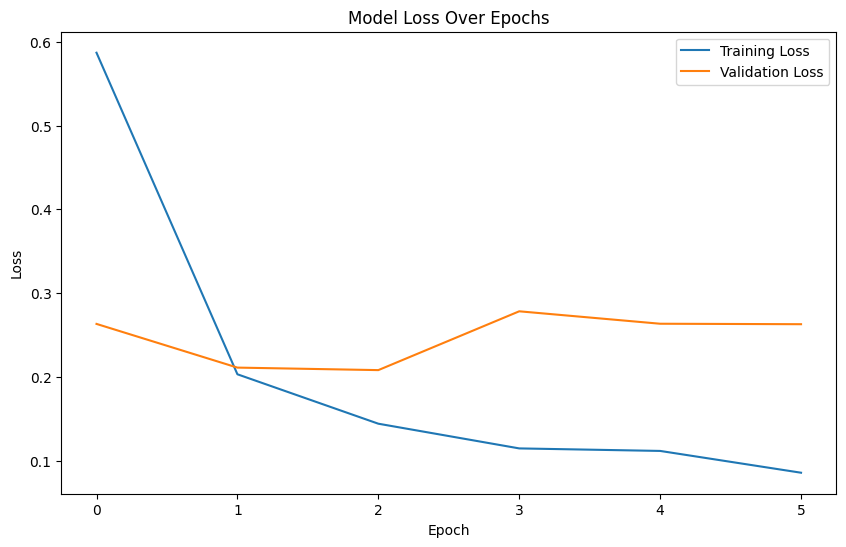

In [34]:
plot_loss(history_bert)

#### Evaluation

In [35]:
evaluation(model_BERT, [test_input_ids, test_attention_masks], df_test.label)


 1/63 [..............................] - ETA: 3:29


 2/63 [..............................] - ETA: 45s 


 3/63 [>.............................] - ETA: 44s


 4/63 [>.............................] - ETA: 43s


 5/63 [=>............................] - ETA: 42s


 6/63 [=>............................] - ETA: 42s


 7/63 [==>...........................] - ETA: 41s


 8/63 [==>...........................] - ETA: 40s


 9/63 [===>..........................] - ETA: 40s


10/63 [===>..........................] - ETA: 39s


11/63 [====>.........................] - ETA: 38s


12/63 [====>.........................] - ETA: 38s


13/63 [=====>........................] - ETA: 37s


14/63 [=====>........................] - ETA: 36s


15/63 [======>.......................] - ETA: 35s


16/63 [======>.......................] - ETA: 35s


17/63 [=======>......................] - ETA: 34s


18/63 [=======>......................] - ETA: 33s


19/63 [========>.....................] - ETA: 32s


20/63 [========>.....................] - ETA: 32s


21/63 [=========>....................] - ETA: 31s


22/63 [=========>....................] - ETA: 30s


23/63 [=========>....................] - ETA: 29s


24/63 [==========>...................] - ETA: 29s


25/63 [==========>...................] - ETA: 28s


26/63 [===========>..................] - ETA: 27s


27/63 [===========>..................] - ETA: 26s


28/63 [============>.................] - ETA: 26s


29/63 [============>.................] - ETA: 25s


30/63 [=============>................] - ETA: 24s


31/63 [=============>................] - ETA: 23s


32/63 [==============>...............] - ETA: 23s


33/63 [==============>...............] - ETA: 22s


34/63 [===============>..............] - ETA: 21s


35/63 [===============>..............] - ETA: 20s


36/63 [================>.............] - ETA: 20s


37/63 [================>.............] - ETA: 19s


38/63 [=================>............] - ETA: 18s


39/63 [=================>............] - ETA: 17s


40/63 [==================>...........] - ETA: 17s


41/63 [==================>...........] - ETA: 16s


42/63 [===================>..........] - ETA: 15s


43/63 [===================>..........] - ETA: 14s


44/63 [===================>..........] - ETA: 14s


45/63 [====================>.........] - ETA: 13s


46/63 [====================>.........] - ETA: 12s


47/63 [=====================>........] - ETA: 11s


48/63 [=====================>........] - ETA: 11s


49/63 [======================>.......] - ETA: 10s


50/63 [======================>.......] - ETA: 9s 


51/63 [=======================>......] - ETA: 8s


52/63 [=======================>......] - ETA: 8s


53/63 [========================>.....] - ETA: 7s


54/63 [========================>.....] - ETA: 6s


55/63 [=========================>....] - ETA: 5s


56/63 [=========================>....] - ETA: 5s


57/63 [==========================>...] - ETA: 4s


58/63 [==========================>...] - ETA: 3s


59/63 [===========================>..] - ETA: 2s


60/63 [===========================>..] - ETA: 2s


61/63 [============================>.] - ETA: 1s


62/63 [============================>.] - ETA: 0s


63/63 [==============================] - ETA: 0s


63/63 [==============================] - 49s 735ms/step


              precision    recall  f1-score   support

       anger       0.90      0.95      0.92       275
        fear       0.90      0.84      0.87       224
         joy       0.98      0.88      0.93       695
        love       0.71      0.95      0.81       159
     sadness       0.97      0.93      0.95       581
    surprise       0.65      1.00      0.79        66

    accuracy                           0.91      2000
   macro avg       0.85      0.93      0.88      2000
weighted avg       0.92      0.91      0.91      2000



## Conclusion
This notebook aims to do the sentiment analysis on a twitter dataset. Generally speaking, the dataset is clean and it is dedived into 3 parts already so I did some simple EDA and preprecossing on it to make the data easilier to be used in the modeling part. The efforts I put on are dropping the duplicates, removing the punctuations, numbers and non-alphas in the twitter text and relabeling the sentiments into numeric.

For the modelling part, I experimented 4 models, CNN, GNU, LSTM and Bert. The general acccuracy of these models doesn't show the significant difference but I am more instered on the precision and recall on the "love" and "surprise" labels which are the 2 most minimal lables of 6. Even I assigned more weights to balance the label "suprise", it still has the poorest f1-score for each model.

In conclusion, The fine tuned Bert is the best model of 4 on "love" and "surprice" sentiments based on F1 score, and CNN is the next. The selection of model needs to respect the use case, for example, if the presion is more important, maybe LSTM will be the first choice. However, Bert doesn't present an overwhelming advantage but an enormous training cost, which frustrates me a lot.


## My ideals

In the exercise, I met a lot of problems and the biggest one is I can't train the model with GPU. So the training process especially, fine tuned Bert took quite a lot of time (Maybe the GPU is used because I tested the train process on CPU, P100 and TPU, the last one shortened the time a lot but the Kaggle rescource console doesn't show any GPU usage). The second difficulity I met is the conflict of dependcies. For deep learning models, I used to use pytorch and I've never met the conclict before. However, with Keras, this annoying experience taught me a deeper undertanding on what is version conctrolling and why requirements.txt is important.

Back to the final question,how to preceed another text classification task, my choice depends on the use case and resource I have. For instance, if it is a emergency task, training any model is not a good ideal, GPTs could do well. if the task is the multiple sentiment analysis, I will choose fine tuned transformer which has been proved better in my notebook but if the task is binary classes, maybe I will consider classic ML and DL models. If it requires Interpretability, SVC and Bayes is better than MLP. Anyway, I will make the decision based on the above considerations, I can't say I know the model selected is the correct one or the best one but the result won't be diverse if following the right process like EDA, data preprocessing, feature engineering and model selection according to my results